In [2]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import sklearn
from torch.utils.data import DataLoader

### Load data
Load the training and test data that was created in the notebook 'create_data_sets.ipynb'

In [3]:
train_big = pd.read_csv('datasets/train_big.csv')
# select only interesting columns to train on
train_big = train_big.drop(['Unnamed: 0','id','type','family'],axis=1)
train_big.index = train_big['date']
train_big = train_big.drop('date',axis=1)
# permute columns (thats just my prefered order without any reason)
col_lst = ['store_nbr','family_id','onpromotion','day','weekday','month','year','holiday','oilprice','sales']
train_big = train_big[col_lst]

# do the same for the test frame

test_big = pd.read_csv('datasets/test_big.csv')
# select only interesting columns to train on
test_big = test_big.drop(['Unnamed: 0','id','type','family'],axis=1)
test_big.index = test_big['date']
test_big = test_big.drop('date',axis=1)
# permute columns (thats just my prefered order without any reason)
col_lst = ['store_nbr','family_id','onpromotion','day','weekday','month','year','holiday','oilprice']
test_big = test_big[col_lst]

In [3]:
train_big

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales
date,,,,,,,,,,
2013-01-01,1,0,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,1,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,2,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,3,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,4,0,1,1,1,2013,2,93.14,0.000
...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,28,0,15,1,8,2017,0,47.57,438.133
2017-08-15,9,29,1,15,1,8,2017,0,47.57,154.553
2017-08-15,9,30,148,15,1,8,2017,0,47.57,2419.729


In [4]:
test_big

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice
date,,,,,,,,,
2017-08-16,1,0,0,16,2,8,2017,0,46.80
2017-08-16,1,1,0,16,2,8,2017,0,46.80
2017-08-16,1,2,2,16,2,8,2017,0,46.80
2017-08-16,1,3,20,16,2,8,2017,0,46.80
2017-08-16,1,4,0,16,2,8,2017,0,46.80
...,...,...,...,...,...,...,...,...,...
2017-08-31,9,28,1,31,3,8,2017,0,47.26
2017-08-31,9,29,0,31,3,8,2017,0,47.26
2017-08-31,9,30,1,31,3,8,2017,0,47.26


In [7]:
#split train_big in train and test set
test_start = "2016-08-16"

df_train = train_big.loc[:test_start].copy()
df_test = train_big.loc[test_start:].copy()

#compte percentage of training test split
p = len(df_train)/len(train_big)
print('Size of training set is %s percent of total data.'%np.round(p,2))

Size of training set is 0.78 percent of total data.


### Standardize data
Hier schon überlegen ob man nur (stor_nbr,family_id) betrachted oder wie man am besten standardisiert.

In [63]:
features = ['onpromotion','day','weekday','month','year','holiday','oilprice']
target = 'sales'

In [180]:
from sklearn import preprocessing
store_nbr = 47
family_id = 32

### Different Standardisations

In [12]:
#standardize features
X = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)][features]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
df_train_scaled = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)].copy()
df_train_scaled[features] = pd.DataFrame(X_scaled,index=X.index,columns = X.columns) 

#standardize test set with same scaler that was used for training data 
X_test = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)][features]
X_test_scaled = scaler.transform(X_test)
df_test_scaled = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)].copy()
df_test_scaled[features]  = pd.DataFrame(X_test_scaled,index=X_test.index,columns = X_test.columns)


In [10]:
#standardize features & targets
X = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
df_train_scaled = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)].copy()
df_train_scaled = pd.DataFrame(X_scaled,index=X.index,columns = X.columns) 

#standardize test set with same scaler that was used for training data 
X_test = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)]
X_test_scaled = scaler.transform(X_test)
df_test_scaled = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)].copy()
df_test_scaled  = pd.DataFrame(X_test_scaled,index=X_test.index,columns = X_test.columns)

In [181]:
#standardize features & targets with MinMaxScaler (prefered version so far)
X = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)]
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
df_train_scaled = df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)].copy()
df_train_scaled = pd.DataFrame(X_scaled,index=X.index,columns = X.columns) 

#standardize test set with same scaler that was used for training data 
X_test = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)]
X_test_scaled = scaler.transform(X_test)
df_test_scaled = df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)].copy()
df_test_scaled  = pd.DataFrame(X_test_scaled,index=X_test.index,columns = X_test.columns)

In [182]:
df_test_scaled

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales
date,,,,,,,,,,
2016-08-16,0.0,0.0,0.285714,0.500000,0.166667,0.636364,1.000000,0.0,0.241383,0.393887
2016-08-17,0.0,0.0,0.285714,0.533333,0.333333,0.636364,1.000000,0.0,0.244226,0.358440
2016-08-18,0.0,0.0,0.285714,0.566667,0.500000,0.636364,1.000000,0.0,0.260689,0.312238
2016-08-19,0.0,0.0,1.000000,0.600000,0.666667,0.636364,1.000000,0.0,0.264006,0.616473
2016-08-20,0.0,0.0,0.285714,0.633333,0.833333,0.636364,1.000000,0.5,0.257373,0.507188
...,...,...,...,...,...,...,...,...,...,...
2017-08-11,0.0,0.0,0.857143,0.333333,0.666667,0.636364,1.333333,1.0,0.267914,0.455117
2017-08-12,0.0,0.0,0.000000,0.366667,0.833333,0.636364,1.333333,0.5,0.263098,0.400428
2017-08-13,0.0,0.0,0.000000,0.400000,1.000000,0.636364,1.333333,0.5,0.258281,0.364986


Create data class such that pytorch dataloader can handle the data

### Datastructures for LSTM

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader

class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=5):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]


In [68]:
train_dataset = SequenceDataset(df_train_scaled,target,features)

In [69]:
torch.manual_seed(99)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)

X, y = next(iter(train_loader))
print(X.shape)
print(X)


torch.Size([3, 5, 6])
tensor([[[0.8333, 0.1667, 0.9091, 0.0000, 0.0000, 0.7962],
         [0.8667, 0.3333, 0.9091, 0.0000, 0.0000, 0.7801],
         [0.9000, 0.5000, 0.9091, 0.0000, 0.0000, 0.7830],
         [0.9333, 0.6667, 0.9091, 0.0000, 0.0000, 0.7860],
         [0.9667, 0.8333, 0.9091, 0.0000, 0.5000, 0.7902]],

        [[0.9667, 0.5000, 0.8182, 0.3333, 0.0000, 0.6499],
         [1.0000, 0.6667, 0.8182, 0.3333, 0.0000, 0.6436],
         [0.0000, 0.8333, 0.9091, 0.3333, 0.5000, 0.6367],
         [0.0333, 1.0000, 0.9091, 0.3333, 1.0000, 0.6297],
         [0.0667, 0.0000, 0.9091, 0.3333, 1.0000, 0.6228]],

        [[0.0000, 0.1667, 0.1818, 1.0000, 0.0000, 0.0971],
         [0.0333, 0.3333, 0.1818, 1.0000, 0.0000, 0.0993],
         [0.0667, 0.5000, 0.1818, 1.0000, 0.0000, 0.0991],
         [0.1000, 0.6667, 0.1818, 1.0000, 0.0000, 0.1151],
         [0.1333, 0.8333, 0.1818, 1.0000, 0.5000, 0.1230]]])


In [70]:
y

tensor([0.3170, 0.2300, 0.3958])

### Prepare train/test set

In [183]:
torch.manual_seed(101)

batch_size = 4
sequence_length = 16

train_dataset = SequenceDataset(
    df_train_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: torch.Size([4, 16, 6])
Target shape: torch.Size([4])


### Build network structure

In [15]:
from torch import nn

class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_features, hidden_units):
        super().__init__()
        self.num_features = num_features  
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out



### Build model and train

In [16]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [184]:
learning_rate = 0.001 #5e-5
num_hidden_units = 16
num_epoch = 50
model = ShallowRegressionLSTM(num_features=len(features), hidden_units=num_hidden_units)
loss_function = RMSLELoss() #nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [185]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    return avg_loss

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")
    return avg_loss


print("Untrained test\n--------")
test_model(test_loader, model, loss_function)
print()

train_loss_lst = []
test_loss_lst =  []
for ix_epoch in range(num_epoch):
    print(f"Epoch {ix_epoch}\n---------")
    train_loss = train_model(train_loader, model, loss_function, optimizer=optimizer)
    test_loss = test_model(test_loader, model, loss_function)
    train_loss_lst.append(train_loss)
    test_loss_lst.append(test_loss)
    print()



Untrained test
--------
Test loss: 0.4302015137541425

Epoch 0
---------
Train loss: 0.09995126477766253
Test loss: 0.08350699951688012

Epoch 1
---------
Train loss: 0.07377680819594158
Test loss: 0.08765308409519904

Epoch 2
---------
Train loss: 0.07226803131806707
Test loss: 0.07743005106573576

Epoch 3
---------
Train loss: 0.07099033356995921
Test loss: 0.07789483124001341

Epoch 4
---------
Train loss: 0.06981495379546257
Test loss: 0.07670075284665102

Epoch 5
---------
Train loss: 0.06882804300455979
Test loss: 0.07527133853144043

Epoch 6
---------
Train loss: 0.06903840919388204
Test loss: 0.08333080683599461

Epoch 7
---------
Train loss: 0.06844179725606456
Test loss: 0.07473066072542589

Epoch 8
---------
Train loss: 0.06830268497283365
Test loss: 0.0777894647607764

Epoch 9
---------
Train loss: 0.06841230801281342
Test loss: 0.08111396792170765

Epoch 10
---------
Train loss: 0.06644404163792324
Test loss: 0.0742613765933029

Epoch 11
---------
Train loss: 0.06726483248

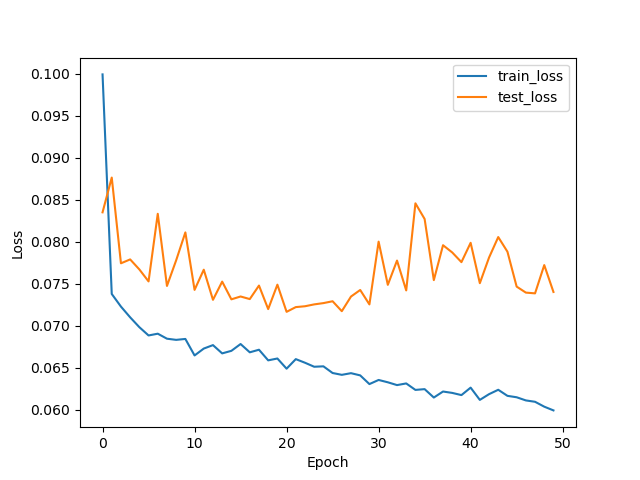

In [186]:
fig = plt.figure()
plt.plot(train_loss_lst,label='train_loss')
plt.plot(test_loss_lst,label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Prediction

In [86]:
def predict(data_loader, model):

    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

In [197]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
df_train_copy = df_train_copy.loc[(df_train_copy['store_nbr']==store_nbr)&(df_train_copy['family_id']==family_id)]
df_test_copy = df_test_copy.loc[(df_test_copy['store_nbr']==store_nbr)&(df_test_copy['family_id']==family_id)]

train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_eval_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
ystar_col = "Model forecast"
df_train_copy[ystar_col] = predict(train_eval_loader, model).numpy()
df_test_copy[ystar_col] = predict(test_eval_loader, model).numpy()

df_out = pd.concat((df_train_copy, df_test_copy))[[target, ystar_col]]
df_out['sales'] = pd.concat((df_train_scaled['sales'],df_test_scaled['sales'])) #overide sales with scaled sales
df_out['date'] = df_out.index #include date column for plots

In [198]:
df_out

,sales,Model forecast
date,,
2013-01-01,0.000000,0.377320
2013-01-02,159.518000,0.382192
2013-01-03,85.157000,0.444577
2013-01-04,103.164000,0.533121
2013-01-05,104.160995,0.605242
...,...,...
2017-08-11,92.123000,0.402358
2017-08-12,81.053000,0.425766
2017-08-13,73.879000,0.469550


<AxesSubplot:xlabel='date'>

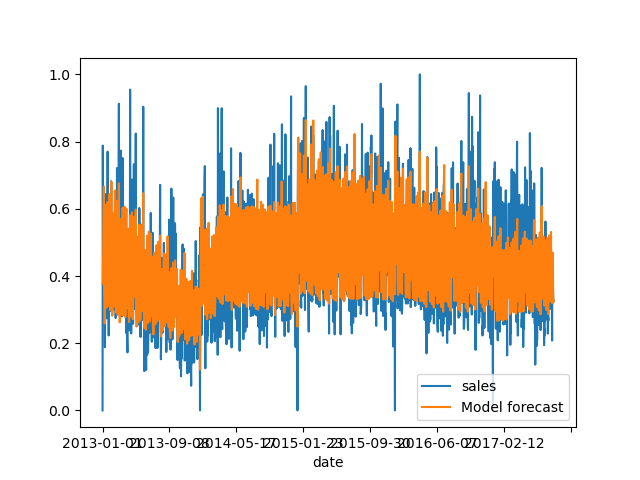

In [188]:
df_out.plot('date',['sales','Model forecast'])


### Scale Back

In [189]:
df_train_predict_scale_back = df_train_scaled.copy()
df_test_predict_scale_back = df_test_scaled.copy()
df_train_predict_scale_back['sales'] = df_train_copy['Model forecast']
df_test_predict_scale_back['sales'] = df_test_copy['Model forecast']

X_train_pred_sb = scaler.inverse_transform(df_train_predict_scale_back)
X_test_pred_sb = scaler.inverse_transform(df_test_predict_scale_back)

#put rescaled values back in dataframe

df_train_predict_scale_back = pd.DataFrame(X_train_pred_sb,index=df_train_scaled.index,columns = df_train_scaled.columns)
df_test_predict_scale_back = pd.DataFrame(X_test_pred_sb,index=df_test_scaled.index,columns = df_test_scaled.columns)

# merge prediction into a single data frame
d1=df_train.loc[(df_train['store_nbr']==store_nbr)&(df_train['family_id']==family_id)]
d2=df_test.loc[(df_test['store_nbr']==store_nbr)&(df_test['family_id']==family_id)]

df_out_scaled_back = pd.DataFrame({'sales':pd.concat((d1['sales'],d2['sales'])),
                                  'predicted sales': pd.concat((df_train_predict_scale_back['sales'],
                                                               df_test_predict_scale_back['sales']))},
                                 index=df_out.index)
#include date colum
df_out_scaled_back['date']=df_out.index
df_out_scaled_back['date'] = pd.to_datetime(df_out_scaled_back['date'])

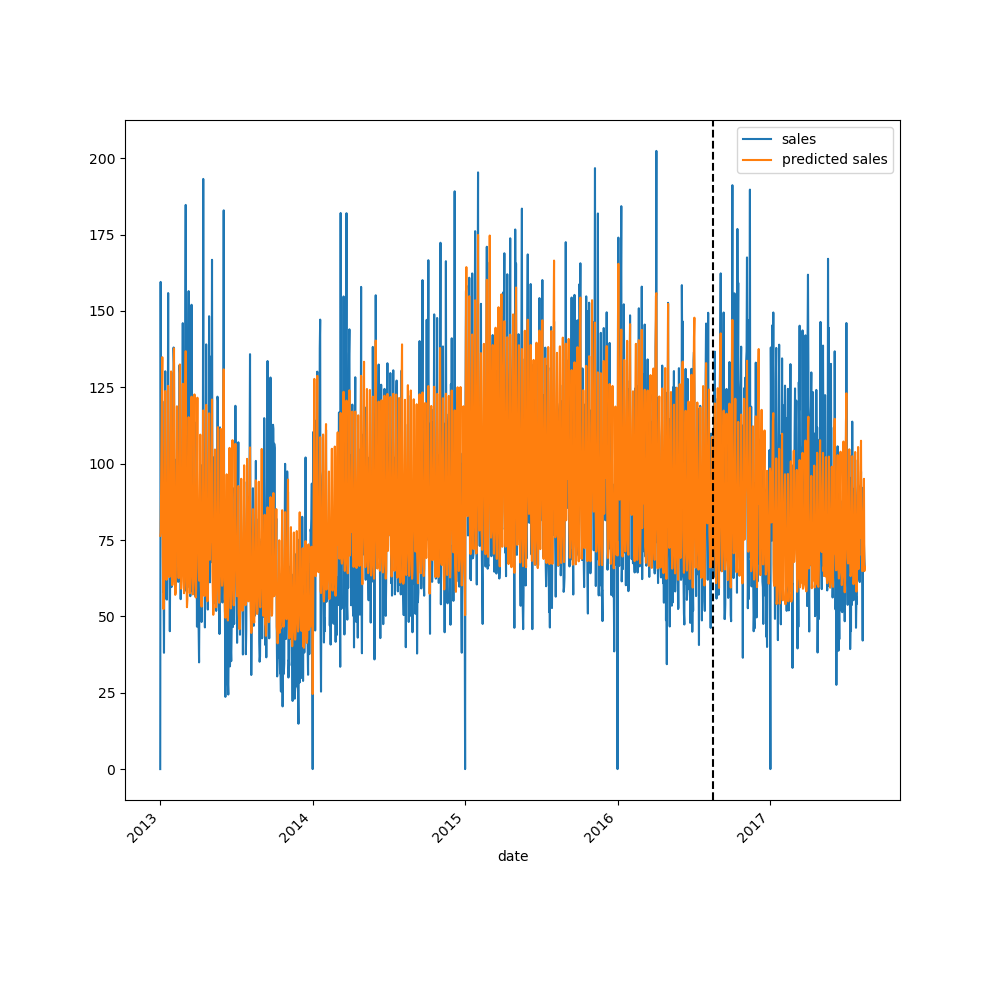

In [190]:
df_out_scaled_back.plot('date',['sales','predicted sales'],rot=45,figsize=(10,10))
plt.axvline(test_start,linestyle='--',color='k')

### Predict future sales

In [191]:
pred_feature_val = test_big.loc[(test_big['store_nbr']==store_nbr)&(test_big['family_id']==family_id)]
pred_feature_val['sales']=0 #include dummy sales that we can use same scaler 
X_pred_scaled = scaler.transform(pred_feature_val)
df_pred_scaled  = pd.DataFrame(X_pred_scaled,index=pred_feature_val.index,columns = pred_feature_val.columns)

C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\1477084761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


In [192]:
# put data into correct format
pred_dataset = SequenceDataset(
    df_pred_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length)

pred_eval_loader = DataLoader(pred_dataset, batch_size=batch_size, shuffle=False)
#make prediction
future_sales_pred = predict(pred_eval_loader, model).numpy()

In [193]:
df_pred_scaled['sales'] = future_sales_pred
X_back_transform = scaler.inverse_transform(df_pred_scaled)
df_pred = pd.DataFrame(X_back_transform,index=df_pred_scaled.index,columns=df_pred_scaled.columns)
df_pred['dates'] = df_pred.index #include date col for plots

<AxesSubplot:title={'center':'Sales prediction of store 47 and product 32'}, xlabel='dates', ylabel='sales'>

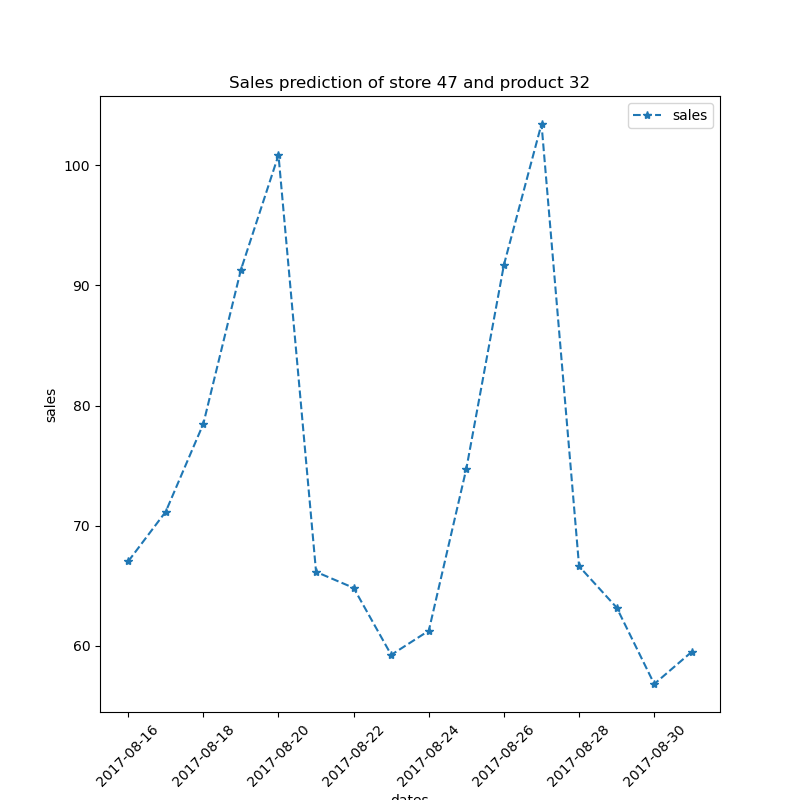

In [195]:
#plot prediction
df_pred.plot('dates','sales',style=['*--'],rot=45,figsize=(8,8),title='Sales prediction of store %s and product %s'%(store_nbr,family_id),ylabel='sales')

In [203]:
df_pred

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales,dates
date,,,,,,,,,,,
2017-08-16,47.0,32.0,0.0,16.0,2.0,8.0,2017.0,0.0,46.800000,67.029195,2017-08-16
2017-08-17,47.0,32.0,0.0,17.0,3.0,8.0,2017.0,0.0,47.070000,71.171286,2017-08-17
2017-08-18,47.0,32.0,6.0,18.0,4.0,8.0,2017.0,0.0,48.590000,78.484035,2017-08-18
2017-08-19,47.0,32.0,0.0,19.0,5.0,8.0,2017.0,1.0,48.190000,91.305820,2017-08-19
2017-08-20,47.0,32.0,0.0,20.0,6.0,8.0,2017.0,1.0,47.790000,100.855245,2017-08-20
2017-08-21,47.0,32.0,0.0,21.0,0.0,8.0,2017.0,0.0,47.390000,66.156387,2017-08-21
2017-08-22,47.0,32.0,0.0,22.0,1.0,8.0,2017.0,0.0,47.650000,64.824750,2017-08-22
2017-08-23,47.0,32.0,0.0,23.0,2.0,8.0,2017.0,0.0,48.450000,59.247548,2017-08-23
2017-08-24,47.0,32.0,1.0,24.0,3.0,8.0,2017.0,0.0,47.240000,61.258253,2017-08-24


### Predict all stores & products

In [225]:
#this function trains the LSTM on the whole training set for a store and family and returns the prediction for the future
# sales of this store and family, with this function we will be training #stores*#families many lstm models later on.

def get_predictions(store_nbr,family_id):
    
    #scaling data
    X = train_big.loc[(train_big['store_nbr']==store_nbr)&(train_big['family_id']==family_id)]
    scaler = preprocessing.MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    df_train_scaled = pd.DataFrame(X_scaled,index=X.index,columns = X.columns) 
    
    #put data into correct format
    torch.manual_seed(101)

    batch_size = 4
    sequence_length = 16

    train_dataset = SequenceDataset(df_train_scaled, target=target, features=features, sequence_length=sequence_length) 
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    #define hyperparameters (those seemed to be very good)
    learning_rate = 0.001 
    num_hidden_units = 16
    num_epoch = 10
    model = ShallowRegressionLSTM(num_features=len(features), hidden_units=num_hidden_units)
    loss_function = RMSLELoss() #nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for ix_epoch in range(num_epoch):
        print(f"Epoch {ix_epoch}\n---------")
        train_loss = train_model(train_loader, model, loss_function, optimizer=optimizer)
        train_loss_lst.append(train_loss)
        test_loss_lst.append(test_loss)
        print()
        
    #evaluate the trained model on the test (more precise the prediction) set. 
    #For this to work we first must scale the test features
    pred_feature_val = test_big.loc[(test_big['store_nbr']==store_nbr)&(test_big['family_id']==family_id)]
    pred_feature_val['sales']=0 #include dummy sales that we can use same scaler 
    X_pred_scaled = scaler.transform(pred_feature_val)
    df_pred_scaled  = pd.DataFrame(X_pred_scaled,index=pred_feature_val.index,columns = pred_feature_val.columns)
    
    # put data into correct format
    pred_dataset = SequenceDataset(df_pred_scaled, target=target, features=features, sequence_length=sequence_length)
    pred_eval_loader = DataLoader(pred_dataset, batch_size=batch_size, shuffle=False)
    
    #make prediction and scale back
    future_sales_pred = predict(pred_eval_loader, model).numpy()
    df_pred_scaled['sales'] = future_sales_pred
    X_back_transform = scaler.inverse_transform(df_pred_scaled)
    df_pred = pd.DataFrame(X_back_transform,index=df_pred_scaled.index,columns=df_pred_scaled.columns)
    return df_pred['sales'].values



In [243]:
#iterate over all combinations of stores&families and write the results row wise in a matrix
import time
t0 = time.time()
num_all_combinations = len(train_big['store_nbr'].unique())*len(train_big['family_id'].unique())
num_pred_days = 16
result_mat = np.zeros((num_all_combinations,num_pred_days))
stores = list(train_big['store_nbr'].unique())
families = list(train_big['family_id'].unique())

ctr = 0
# run two for loops to train lstm model and return prediction for each pair of possible combinations (store_nbr,family_id)
for store in stores:
    for family in families:
        result_mat[ctr,:] = get_predictions(store,family)
        ctr=ctr+1
        print('---------------------')
        print('finished store_%s & family_%s'%(store,family))
        print('---------------------')
        
pred = np.reshape(result_mat.T,(result_mat.size,1)).flatten()    
t1 = time.time()
total = t1-t0
print('Execution time = %s sec.'%total)
df_for_id = pd.read_csv('datasets/test_big.csv')
submission_1782_lstm_models = pd.DataFrame({'id':df_for_id['id'],'sales':pred})
# store submission
submission_1782_lstm_models.to_csv('predicted_data/submission_1782_lstm_models.csv',index=False)

Epoch 0
---------
Train loss: 0.10381356194049049

Epoch 1
---------
Train loss: 0.09981035889787798

Epoch 2
---------
Train loss: 0.09991572082104634

Epoch 3
---------
Train loss: 0.09958350436315118

Epoch 4
---------
Train loss: 0.09871940211682734

Epoch 5
---------
Train loss: 0.09922007968175864

Epoch 6
---------
Train loss: 0.09865852999954425

Epoch 7
---------
Train loss: 0.09880370265337464

Epoch 8
---------
Train loss: 0.10001914174851216

Epoch 9
---------
Train loss: 0.09890950567392089

---------------------
finished store_1 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_1 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11607935222755064

Epoch 1
---------
Train loss: 0.11189610976947033

Epoch 2
---------
Train loss: 0.11176715657610509

Epoch 3
---------
Train loss: 0.11116401115189044

Epoch 4
---------
Train loss: 0.1111769164733217

Epoch 5
---------
Train loss: 0.11116028293489419

Epoch 6
---------
Train loss: 0.11059803165486547

Epoch 7
---------
Train loss: 0.111001099975262

Epoch 8
---------
Train loss: 0.11053875841713574

Epoch 9
---------
Train loss: 0.11027335765331346

---------------------
finished store_1 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07702962632540994

Epoch 1
---------
Train loss: 0.06745861717577219

Epoch 2
---------
Train loss: 0.06547530452254054

Epoch 3
---------
Train loss: 0.06488498069584865

Epoch 4
---------
Train loss: 0.0633853258666828

Epoch 5
---------
Train loss: 0.06213654295901929

Epoch 6
---------
Train loss: 0.06054981413901277

Epoch 7
---------
Train loss: 0.058193691040559575

Epoch 8
---------
Train loss: 0.056079957439539835

Epoch 9
---------
Train loss: 0.05337238443612769

---------------------
finished store_1 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.043981918830075024

Epoch 1
---------
Train loss: 0.027163684336955807

Epoch 2
---------
Train loss: 0.027854421518625792

Epoch 3
---------
Train loss: 0.027771233407697018

Epoch 4
---------
Train loss: 0.02761049321388069

Epoch 5
---------
Train loss: 0.027879021643206638

Epoch 6
---------
Train loss: 0.028002742590822916

Epoch 7
---------
Train loss: 0.027459910662550005

Epoch 8
---------
Train loss: 0.027286587088517326

Epoch 9
---------
Train loss: 0.027330300816740715

---------------------
finished store_1 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08207842524024059

Epoch 1
---------
Train loss: 0.06375250897885713

Epoch 2
---------
Train loss: 0.06137993868944764

Epoch 3
---------
Train loss: 0.05966557246564297

Epoch 4
---------
Train loss: 0.05753777930601511

Epoch 5
---------
Train loss: 0.05563671278353612

Epoch 6
---------
Train loss: 0.05345419587704603

Epoch 7
---------
Train loss: 0.052336380554854234

Epoch 8
---------
Train loss: 0.04918703569139126

Epoch 9
---------
Train loss: 0.047608344723866484

---------------------
finished store_1 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02458556344613185

Epoch 1
---------
Train loss: 0.006935353144768829

Epoch 2
---------
Train loss: 0.006558110768245334

Epoch 3
---------
Train loss: 0.0065092629622535295

Epoch 4
---------
Train loss: 0.006429960063162023

Epoch 5
---------
Train loss: 0.00644240546291318

Epoch 6
---------
Train loss: 0.006294774442121404

Epoch 7
---------
Train loss: 0.006246312113253139

Epoch 8
---------
Train loss: 0.006268895733349397

Epoch 9
---------
Train loss: 0.006260097287722472

---------------------
finished store_1 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07138282023901187

Epoch 1
---------
Train loss: 0.05406232657145505

Epoch 2
---------
Train loss: 0.05180002278438161

Epoch 3
---------
Train loss: 0.05023700243742548

Epoch 4
---------
Train loss: 0.04895780746760887

Epoch 5
---------
Train loss: 0.04784610126866581

Epoch 6
---------
Train loss: 0.047085871029592115

Epoch 7
---------
Train loss: 0.04727331411055866

Epoch 8
---------
Train loss: 0.0455328601516447

Epoch 9
---------
Train loss: 0.045473262068158514

---------------------
finished store_1 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0920350513644428

Epoch 1
---------
Train loss: 0.07342812627323875

Epoch 2
---------
Train loss: 0.06987418959054414

Epoch 3
---------
Train loss: 0.0675992720059148

Epoch 4
---------
Train loss: 0.06586917903884856

Epoch 5
---------
Train loss: 0.06408030150630765

Epoch 6
---------
Train loss: 0.062466656397629945

Epoch 7
---------
Train loss: 0.06207002941386292

Epoch 8
---------
Train loss: 0.05905692318383596

Epoch 9
---------
Train loss: 0.05717166289775644

---------------------
finished store_1 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09110270450311998

Epoch 1
---------
Train loss: 0.07704526705406341

Epoch 2
---------
Train loss: 0.07411651621238637

Epoch 3
---------
Train loss: 0.07192705075462258

Epoch 4
---------
Train loss: 0.06993333732315522

Epoch 5
---------
Train loss: 0.06776216870390604

Epoch 6
---------
Train loss: 0.06538288981262197

Epoch 7
---------
Train loss: 0.06156765436200589

Epoch 8
---------
Train loss: 0.05896302104447559

Epoch 9
---------
Train loss: 0.05803427990357836

---------------------
finished store_1 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09490011179390542

Epoch 1
---------
Train loss: 0.08311008443865668

Epoch 2
---------
Train loss: 0.08035770378511337

Epoch 3
---------
Train loss: 0.0792124616314

Epoch 4
---------
Train loss: 0.07730267997255942

Epoch 5
---------
Train loss: 0.07529188930156537

Epoch 6
---------
Train loss: 0.07357182968717572

Epoch 7
---------
Train loss: 0.06982322721222234

Epoch 8
---------
Train loss: 0.06440843257504447

Epoch 9
---------
Train loss: 0.060814612761865464

---------------------
finished store_1 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026807703101573925

Epoch 1
---------
Train loss: 0.011484854684582957

Epoch 2
---------
Train loss: 0.011141723182247045

Epoch 3
---------
Train loss: 0.011152250246911348

Epoch 4
---------
Train loss: 0.011035680198475648

Epoch 5
---------
Train loss: 0.011080716920224618

Epoch 6
---------
Train loss: 0.01067532283295999

Epoch 7
---------
Train loss: 0.01065398764109677

Epoch 8
---------
Train loss: 0.010502155940988567

Epoch 9
---------
Train loss: 0.010446140643280009

---------------------
finished store_1 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.048673162104079674

Epoch 1
---------
Train loss: 0.040956880653945114

Epoch 2
---------
Train loss: 0.04003030365120593

Epoch 3
---------
Train loss: 0.03980398563460188

Epoch 4
---------
Train loss: 0.03876065669333531

Epoch 5
---------
Train loss: 0.03746718235176738

Epoch 6
---------
Train loss: 0.03436311864628149

Epoch 7
---------
Train loss: 0.03253258374628042

Epoch 8
---------
Train loss: 0.031144450836197744

Epoch 9
---------
Train loss: 0.030249534390486263

---------------------
finished store_1 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06545646171884129

Epoch 1
---------
Train loss: 0.059825065706119895

Epoch 2
---------
Train loss: 0.0595251286353677

Epoch 3
---------
Train loss: 0.05891623514905713

Epoch 4
---------
Train loss: 0.05900937611250441

Epoch 5
---------
Train loss: 0.05899331505872716

Epoch 6
---------
Train loss: 0.059221419943784166

Epoch 7
---------
Train loss: 0.05908198509533445

Epoch 8
---------
Train loss: 0.05898211070838563

Epoch 9
---------
Train loss: 0.05879008519571637

---------------------
finished store_1 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10337624286308071

Epoch 1
---------
Train loss: 0.09824725331167852

Epoch 2
---------
Train loss: 0.09713241080985782

Epoch 3
---------
Train loss: 0.09786766394087934

Epoch 4
---------
Train loss: 0.09698906576707782

Epoch 5
---------
Train loss: 0.09694293669188249

Epoch 6
---------
Train loss: 0.09681871568346108

Epoch 7
---------
Train loss: 0.0968474438391856

Epoch 8
---------
Train loss: 0.09721739966236498

Epoch 9
---------
Train loss: 0.09616959850235252

---------------------
finished store_1 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031928163260717006

Epoch 1
---------
Train loss: 0.016920636989831074

Epoch 2
---------
Train loss: 0.01685651604472184

Epoch 3
---------
Train loss: 0.01661009094406875

Epoch 4
---------
Train loss: 0.01653373681839485

Epoch 5
---------
Train loss: 0.01630661700190777

Epoch 6
---------
Train loss: 0.0162905484444579

Epoch 7
---------
Train loss: 0.0165903908029119

Epoch 8
---------
Train loss: 0.01634156191832167

Epoch 9
---------
Train loss: 0.01629990637811197

---------------------
finished store_1 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04549736164249214

Epoch 1
---------
Train loss: 0.030869321825730475

Epoch 2
---------
Train loss: 0.029730846338591268

Epoch 3
---------
Train loss: 0.02941613811546065

Epoch 4
---------
Train loss: 0.0289130279406653

Epoch 5
---------
Train loss: 0.02871422972828769

Epoch 6
---------
Train loss: 0.02881758859173136

Epoch 7
---------
Train loss: 0.028823828126133516

Epoch 8
---------
Train loss: 0.028394965310039048

Epoch 9
---------
Train loss: 0.02864643059352373

---------------------
finished store_1 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09112874464399565

Epoch 1
---------
Train loss: 0.08190203244817795

Epoch 2
---------
Train loss: 0.08184036282234053

Epoch 3
---------
Train loss: 0.08191278851049069

Epoch 4
---------
Train loss: 0.08144361280942349

Epoch 5
---------
Train loss: 0.08215938631949543

Epoch 6
---------
Train loss: 0.08139495197971154

Epoch 7
---------
Train loss: 0.08073797082913389

Epoch 8
---------
Train loss: 0.08198633012273338

Epoch 9
---------
Train loss: 0.08090636822574213

---------------------
finished store_1 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07319653272460659

Epoch 1
---------
Train loss: 0.06043254732731686

Epoch 2
---------
Train loss: 0.058584856387059646

Epoch 3
---------
Train loss: 0.05677582603390384

Epoch 4
---------
Train loss: 0.053065961577449514

Epoch 5
---------
Train loss: 0.04950970754186643

Epoch 6
---------
Train loss: 0.04742424276429549

Epoch 7
---------
Train loss: 0.046848058720471035

Epoch 8
---------
Train loss: 0.04579730167699593

Epoch 9
---------
Train loss: 0.04544293617104089

---------------------
finished store_1 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12736337223574695

Epoch 1
---------
Train loss: 0.11509199921404523

Epoch 2
---------
Train loss: 0.11051748282300428

Epoch 3
---------
Train loss: 0.10320908428256062

Epoch 4
---------
Train loss: 0.10192585514853941

Epoch 5
---------
Train loss: 0.09857537217367432

Epoch 6
---------
Train loss: 0.09823020653812449

Epoch 7
---------
Train loss: 0.0949003923664449

Epoch 8
---------
Train loss: 0.0935374707151691

Epoch 9
---------
Train loss: 0.09386028963165477

---------------------
finished store_1 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0562920189526755

Epoch 1
---------
Train loss: 0.0466945966918048

Epoch 2
---------
Train loss: 0.04486431487816034

Epoch 3
---------
Train loss: 0.045304478922606646

Epoch 4
---------
Train loss: 0.044658652723561135

Epoch 5
---------
Train loss: 0.04496371839361402

Epoch 6
---------
Train loss: 0.04475809421363749

Epoch 7
---------
Train loss: 0.04444385530104122

Epoch 8
---------
Train loss: 0.04422547384176288

Epoch 9
---------
Train loss: 0.044442644155851946

---------------------
finished store_1 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08667968961713292

Epoch 1
---------
Train loss: 0.08167342625275219

Epoch 2
---------
Train loss: 0.08157852033458456

Epoch 3
---------
Train loss: 0.08158322447256103

Epoch 4
---------
Train loss: 0.08135690609094932

Epoch 5
---------
Train loss: 0.08047946144311276

Epoch 6
---------
Train loss: 0.08081585221045658

Epoch 7
---------
Train loss: 0.0805023651428503

Epoch 8
---------
Train loss: 0.07956400293980741

Epoch 9
---------
Train loss: 0.08013005777662553

---------------------
finished store_1 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07743345374449415

Epoch 1
---------
Train loss: 0.0677136277532174

Epoch 2
---------
Train loss: 0.06408263520158455

Epoch 3
---------
Train loss: 0.05994040815429563

Epoch 4
---------
Train loss: 0.053858446632014174

Epoch 5
---------
Train loss: 0.05078636070231148

Epoch 6
---------
Train loss: 0.049519247377640845

Epoch 7
---------
Train loss: 0.048263670997185336

Epoch 8
---------
Train loss: 0.04747887529906177

Epoch 9
---------
Train loss: 0.04724006253712747

---------------------
finished store_1 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09622357052146964

Epoch 1
---------
Train loss: 0.07941123050462782

Epoch 2
---------
Train loss: 0.07568956485168561

Epoch 3
---------
Train loss: 0.07377997736807143

Epoch 4
---------
Train loss: 0.07317445573956659

Epoch 5
---------
Train loss: 0.07243699693915184

Epoch 6
---------
Train loss: 0.0724338867807774

Epoch 7
---------
Train loss: 0.0716615476614559

Epoch 8
---------
Train loss: 0.07032247900856646

Epoch 9
---------
Train loss: 0.07128254030421907

---------------------
finished store_1 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08891801915469971

Epoch 1
---------
Train loss: 0.08087969098390564

Epoch 2
---------
Train loss: 0.07740837362132559

Epoch 3
---------
Train loss: 0.07478840058257985

Epoch 4
---------
Train loss: 0.06799186819682071

Epoch 5
---------
Train loss: 0.0614893317892882

Epoch 6
---------
Train loss: 0.05620551104447196

Epoch 7
---------
Train loss: 0.053088678571344694

Epoch 8
---------
Train loss: 0.04914290212413336

Epoch 9
---------
Train loss: 0.04632513422293327

---------------------
finished store_1 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04330114965966401

Epoch 1
---------
Train loss: 0.03610784253946145

Epoch 2
---------
Train loss: 0.03488556217101365

Epoch 3
---------
Train loss: 0.03437944383674573

Epoch 4
---------
Train loss: 0.033768932786360915

Epoch 5
---------
Train loss: 0.0331061455662276

Epoch 6
---------
Train loss: 0.03255646256951177

Epoch 7
---------
Train loss: 0.03201595405691841

Epoch 8
---------
Train loss: 0.03103480145673659

Epoch 9
---------
Train loss: 0.03080968630739052

---------------------
finished store_1 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11496519893098119

Epoch 1
---------
Train loss: 0.1051252452621232

Epoch 2
---------
Train loss: 0.10178151526300329

Epoch 3
---------
Train loss: 0.09934032192086523

Epoch 4
---------
Train loss: 0.09587636616549979

Epoch 5
---------
Train loss: 0.09529621916604085

Epoch 6
---------
Train loss: 0.0928432863280885

Epoch 7
---------
Train loss: 0.09319632351531199

Epoch 8
---------
Train loss: 0.09193470913279722

Epoch 9
---------
Train loss: 0.09236117282599175

---------------------
finished store_1 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08278936738338578

Epoch 1
---------
Train loss: 0.0703370984634849

Epoch 2
---------
Train loss: 0.06757947837053455

Epoch 3
---------
Train loss: 0.06555123614908291

Epoch 4
---------
Train loss: 0.06218541401710512

Epoch 5
---------
Train loss: 0.06126563282099479

Epoch 6
---------
Train loss: 0.06103027037581575

Epoch 7
---------
Train loss: 0.061354534749180574

Epoch 8
---------
Train loss: 0.06013523412850683

Epoch 9
---------
Train loss: 0.05938909279244494

---------------------
finished store_1 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08758580522288761

Epoch 1
---------
Train loss: 0.07741123444075539

Epoch 2
---------
Train loss: 0.07215410747041046

Epoch 3
---------
Train loss: 0.06894352210070628

Epoch 4
---------
Train loss: 0.06676291442540366

Epoch 5
---------
Train loss: 0.06552737210313136

Epoch 6
---------
Train loss: 0.06290279384680322

Epoch 7
---------
Train loss: 0.060739332073392466

Epoch 8
---------
Train loss: 0.05754630930274902

Epoch 9
---------
Train loss: 0.055731316183355244

---------------------
finished store_1 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07572772721107386

Epoch 1
---------
Train loss: 0.0690461239178008

Epoch 2
---------
Train loss: 0.06641089575555433

Epoch 3
---------
Train loss: 0.06475034364081052

Epoch 4
---------
Train loss: 0.06335322909950857

Epoch 5
---------
Train loss: 0.06260697698915231

Epoch 6
---------
Train loss: 0.06153290789970363

Epoch 7
---------
Train loss: 0.06107521099381308

Epoch 8
---------
Train loss: 0.05916638579662013

Epoch 9
---------
Train loss: 0.05890740137193308

---------------------
finished store_1 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14961890256001378

Epoch 1
---------
Train loss: 0.12074906332086498

Epoch 2
---------
Train loss: 0.11071582990665334

Epoch 3
---------
Train loss: 0.109310325427587

Epoch 4
---------
Train loss: 0.10882740819963876

Epoch 5
---------
Train loss: 0.10472484215133936

Epoch 6
---------
Train loss: 0.10317081543937714

Epoch 7
---------
Train loss: 0.09944945380905745

Epoch 8
---------
Train loss: 0.09782222870985077

Epoch 9
---------
Train loss: 0.09687658459735667

---------------------
finished store_1 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06928361956936566

Epoch 1
---------
Train loss: 0.055976061157482916

Epoch 2
---------
Train loss: 0.05629702900958606

Epoch 3
---------
Train loss: 0.05504222584939772

Epoch 4
---------
Train loss: 0.055133236785274944

Epoch 5
---------
Train loss: 0.0550274979063219

Epoch 6
---------
Train loss: 0.05507096580994004

Epoch 7
---------
Train loss: 0.05518685037865676

Epoch 8
---------
Train loss: 0.05520737064069617

Epoch 9
---------
Train loss: 0.0554006801670801

---------------------
finished store_1 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08305352098018709

Epoch 1
---------
Train loss: 0.07693209363736053

Epoch 2
---------
Train loss: 0.07547968205268055

Epoch 3
---------
Train loss: 0.07476410344508509

Epoch 4
---------
Train loss: 0.07344175619902775

Epoch 5
---------
Train loss: 0.07281067871406781

Epoch 6
---------
Train loss: 0.07176752298663319

Epoch 7
---------
Train loss: 0.07088622046001875

Epoch 8
---------
Train loss: 0.0690755969192169

Epoch 9
---------
Train loss: 0.06828195175638249

---------------------
finished store_1 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0741333972105221

Epoch 1
---------
Train loss: 0.06869360260585779

Epoch 2
---------
Train loss: 0.06817625650821912

Epoch 3
---------
Train loss: 0.06823018264476732

Epoch 4
---------
Train loss: 0.06786087549329158

Epoch 5
---------
Train loss: 0.06799773136574129

Epoch 6
---------
Train loss: 0.06745454575202811

Epoch 7
---------
Train loss: 0.06820407346545801

Epoch 8
---------
Train loss: 0.06753499245363997

Epoch 9
---------
Train loss: 0.06740156240814373

---------------------
finished store_10 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040572684433536864

Epoch 1
---------
Train loss: 0.02432934701223714

Epoch 2
---------
Train loss: 0.023962231070528275

Epoch 3
---------
Train loss: 0.02330190037201104

Epoch 4
---------
Train loss: 0.023184121874137008

Epoch 5
---------
Train loss: 0.023641495836216785

Epoch 6
---------
Train loss: 0.02348524153514211

Epoch 7
---------
Train loss: 0.02366714502934747

Epoch 8
---------
Train loss: 0.02378406331116348

Epoch 9
---------
Train loss: 0.022997497195233325

---------------------
finished store_10 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10187788886812266

Epoch 1
---------
Train loss: 0.09699051663934335

Epoch 2
---------
Train loss: 0.0957401793078473

Epoch 3
---------
Train loss: 0.09608917572312145

Epoch 4
---------
Train loss: 0.09564202917284043

Epoch 5
---------
Train loss: 0.09572207114289817

Epoch 6
---------
Train loss: 0.09504514268982156

Epoch 7
---------
Train loss: 0.09510304439467801

Epoch 8
---------
Train loss: 0.09429840748408487

Epoch 9
---------
Train loss: 0.09434780825345364

---------------------
finished store_10 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08166862750368419

Epoch 1
---------
Train loss: 0.07124737539105205

Epoch 2
---------
Train loss: 0.06989078546902984

Epoch 3
---------
Train loss: 0.0688073570528145

Epoch 4
---------
Train loss: 0.06769968151179034

Epoch 5
---------
Train loss: 0.06746828348559467

Epoch 6
---------
Train loss: 0.06641222796714787

Epoch 7
---------
Train loss: 0.06451743332151491

Epoch 8
---------
Train loss: 0.0632983753214327

Epoch 9
---------
Train loss: 0.061466293672714695

---------------------
finished store_10 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_10 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05826340963944545

Epoch 1
---------
Train loss: 0.05407519680016504

Epoch 2
---------
Train loss: 0.05255875849516757

Epoch 3
---------
Train loss: 0.05136712082172799

Epoch 4
---------
Train loss: 0.05132379201229777

Epoch 5
---------
Train loss: 0.050273202645045985

Epoch 6
---------
Train loss: 0.05039043563712309

Epoch 7
---------
Train loss: 0.04922416166904561

Epoch 8
---------
Train loss: 0.04911376941382814

Epoch 9
---------
Train loss: 0.0487909843844324

---------------------
finished store_10 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06836049871036956

Epoch 1
---------
Train loss: 0.05824496631119002

Epoch 2
---------
Train loss: 0.056815040735815454

Epoch 3
---------
Train loss: 0.05696150269071768

Epoch 4
---------
Train loss: 0.056488084190938787

Epoch 5
---------
Train loss: 0.056211896341364836

Epoch 6
---------
Train loss: 0.05629501211060976

Epoch 7
---------
Train loss: 0.05615969527194237

Epoch 8
---------
Train loss: 0.055838142572006214

Epoch 9
---------
Train loss: 0.055372449870258925

---------------------
finished store_10 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026104494401158636

Epoch 1
---------
Train loss: 0.01444831355629741

Epoch 2
---------
Train loss: 0.013936966888257026

Epoch 3
---------
Train loss: 0.013499368970988057

Epoch 4
---------
Train loss: 0.013619543665980217

Epoch 5
---------
Train loss: 0.013073616439638098

Epoch 6
---------
Train loss: 0.013208785503571787

Epoch 7
---------
Train loss: 0.012746260033017843

Epoch 8
---------
Train loss: 0.012527756030160288

Epoch 9
---------
Train loss: 0.012611616683256704

---------------------
finished store_10 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09810272671476962

Epoch 1
---------
Train loss: 0.07818809418436892

Epoch 2
---------
Train loss: 0.069271397252618

Epoch 3
---------
Train loss: 0.06438107820196771

Epoch 4
---------
Train loss: 0.0625917855550639

Epoch 5
---------
Train loss: 0.06132345296323052

Epoch 6
---------
Train loss: 0.06116793260659642

Epoch 7
---------
Train loss: 0.06057950381340012

Epoch 8
---------
Train loss: 0.058853291700684825

Epoch 9
---------
Train loss: 0.05854989942871123

---------------------
finished store_10 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0783804693788007

Epoch 1
---------
Train loss: 0.07126747707077556

Epoch 2
---------
Train loss: 0.06908996716902686

Epoch 3
---------
Train loss: 0.06718787724028326

Epoch 4
---------
Train loss: 0.06643089265153343

Epoch 5
---------
Train loss: 0.0666951150135657

Epoch 6
---------
Train loss: 0.06634669755795648

Epoch 7
---------
Train loss: 0.06578563355050998

Epoch 8
---------
Train loss: 0.06605101293151991

Epoch 9
---------
Train loss: 0.06578614757641832

---------------------
finished store_10 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0666222631059711

Epoch 1
---------
Train loss: 0.05954816806707487

Epoch 2
---------
Train loss: 0.058631340613601965

Epoch 3
---------
Train loss: 0.057298561082511364

Epoch 4
---------
Train loss: 0.057271060597974446

Epoch 5
---------
Train loss: 0.056404491017114665

Epoch 6
---------
Train loss: 0.05558516191331904

Epoch 7
---------
Train loss: 0.05579684838440243

Epoch 8
---------
Train loss: 0.05474006452414068

Epoch 9
---------
Train loss: 0.055404823629579325

---------------------
finished store_10 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03707679695916537

Epoch 1
---------
Train loss: 0.022840612100364283

Epoch 2
---------
Train loss: 0.022430003918773735

Epoch 3
---------
Train loss: 0.022548174828450215

Epoch 4
---------
Train loss: 0.022827842083954275

Epoch 5
---------
Train loss: 0.02219314226214807

Epoch 6
---------
Train loss: 0.022040636253802023

Epoch 7
---------
Train loss: 0.021801772569704385

Epoch 8
---------
Train loss: 0.021681361260432352

Epoch 9
---------
Train loss: 0.021469425892284816

---------------------
finished store_10 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.051379059012227134

Epoch 1
---------
Train loss: 0.0436967976254161

Epoch 2
---------
Train loss: 0.04232595455467772

Epoch 3
---------
Train loss: 0.04102477867868585

Epoch 4
---------
Train loss: 0.040134348455294434

Epoch 5
---------
Train loss: 0.03927270997638622

Epoch 6
---------
Train loss: 0.03879393154042917

Epoch 7
---------
Train loss: 0.038287619215097816

Epoch 8
---------
Train loss: 0.03764024845461611

Epoch 9
---------
Train loss: 0.03730017157833395

---------------------
finished store_10 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05821556508355285

Epoch 1
---------
Train loss: 0.04890962631271316

Epoch 2
---------
Train loss: 0.04830384704299855

Epoch 3
---------
Train loss: 0.04823184645161776

Epoch 4
---------
Train loss: 0.04787133721692262

Epoch 5
---------
Train loss: 0.04786187925568457

Epoch 6
---------
Train loss: 0.04790639530009017

Epoch 7
---------
Train loss: 0.04714957449470167

Epoch 8
---------
Train loss: 0.04725546532890133

Epoch 9
---------
Train loss: 0.046695745283529835

---------------------
finished store_10 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11178169441973512

Epoch 1
---------
Train loss: 0.10770911381816638

Epoch 2
---------
Train loss: 0.10783544965884748

Epoch 3
---------
Train loss: 0.10699348479969485

Epoch 4
---------
Train loss: 0.10637219507698492

Epoch 5
---------
Train loss: 0.10667798507542763

Epoch 6
---------
Train loss: 0.10647477414414747

Epoch 7
---------
Train loss: 0.10580777020731193

Epoch 8
---------
Train loss: 0.10537949350447949

Epoch 9
---------
Train loss: 0.10425771944968122

---------------------
finished store_10 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07964230391623855

Epoch 1
---------
Train loss: 0.06904734123825602

Epoch 2
---------
Train loss: 0.06853508494679336

Epoch 3
---------
Train loss: 0.06749635477021619

Epoch 4
---------
Train loss: 0.06761186579275531

Epoch 5
---------
Train loss: 0.0661061538334697

Epoch 6
---------
Train loss: 0.06599753716133198

Epoch 7
---------
Train loss: 0.06505662231925087

Epoch 8
---------
Train loss: 0.06451527414635497

Epoch 9
---------
Train loss: 0.06402372967146532

---------------------
finished store_10 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08061050733821268

Epoch 1
---------
Train loss: 0.06996905812197265

Epoch 2
---------
Train loss: 0.06826552667051129

Epoch 3
---------
Train loss: 0.06744095577356227

Epoch 4
---------
Train loss: 0.06527233421868886

Epoch 5
---------
Train loss: 0.06438721327615499

Epoch 6
---------
Train loss: 0.06399365349516777

Epoch 7
---------
Train loss: 0.06360153860197958

Epoch 8
---------
Train loss: 0.06278174648983868

Epoch 9
---------
Train loss: 0.06308902050821982

---------------------
finished store_10 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10022712747550917

Epoch 1
---------
Train loss: 0.09109210149819726

Epoch 2
---------
Train loss: 0.09109481738428442

Epoch 3
---------
Train loss: 0.08937532066714877

Epoch 4
---------
Train loss: 0.09084582055165076

Epoch 5
---------
Train loss: 0.08773373608399158

Epoch 6
---------
Train loss: 0.08978177383575243

Epoch 7
---------
Train loss: 0.09042646023229145

Epoch 8
---------
Train loss: 0.09051327031153318

Epoch 9
---------
Train loss: 0.0894420833237076

---------------------
finished store_10 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14719585752260655

Epoch 1
---------
Train loss: 0.12583586380036102

Epoch 2
---------
Train loss: 0.11269643405262124

Epoch 3
---------
Train loss: 0.10623255749332615

Epoch 4
---------
Train loss: 0.10667332154289419

Epoch 5
---------
Train loss: 0.10277312616496889

Epoch 6
---------
Train loss: 0.10314533409094018

Epoch 7
---------
Train loss: 0.09642267321189976

Epoch 8
---------
Train loss: 0.0978354303677281

Epoch 9
---------
Train loss: 0.09928613548297567

---------------------
finished store_10 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11545590216608059

Epoch 1
---------
Train loss: 0.10609686392582865

Epoch 2
---------
Train loss: 0.10498624766630402

Epoch 3
---------
Train loss: 0.10408687421879477

Epoch 4
---------
Train loss: 0.10361551817488854

Epoch 5
---------
Train loss: 0.10333958758381936

Epoch 6
---------
Train loss: 0.10144800316506992

Epoch 7
---------
Train loss: 0.10182979196363136

Epoch 8
---------
Train loss: 0.09834004302383036

Epoch 9
---------
Train loss: 0.09497960502250814

---------------------
finished store_10 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0254584884684701

Epoch 1
---------
Train loss: 0.005321240235706836

Epoch 2
---------
Train loss: 0.00490096250934429

Epoch 3
---------
Train loss: 0.004741063305533368

Epoch 4
---------
Train loss: 0.004703934614136931

Epoch 5
---------
Train loss: 0.004665486065118083

Epoch 6
---------
Train loss: 0.004487450158877067

Epoch 7
---------
Train loss: 0.0044544670948796885

Epoch 8
---------
Train loss: 0.004503904431422682

Epoch 9
---------
Train loss: 0.004540098276270101

---------------------
finished store_10 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06288221145973423

Epoch 1
---------
Train loss: 0.054184627228122284

Epoch 2
---------
Train loss: 0.053815074958517756

Epoch 3
---------
Train loss: 0.053412584941878456

Epoch 4
---------
Train loss: 0.05353107044557353

Epoch 5
---------
Train loss: 0.05308824523425088

Epoch 6
---------
Train loss: 0.052540539558136264

Epoch 7
---------
Train loss: 0.05308228802387193

Epoch 8
---------
Train loss: 0.052498847246170044

Epoch 9
---------
Train loss: 0.051877579976961616

---------------------
finished store_10 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04114762460923534

Epoch 1
---------
Train loss: 0.028404268116475638

Epoch 2
---------
Train loss: 0.027416260623773493

Epoch 3
---------
Train loss: 0.02750216036395672

Epoch 4
---------
Train loss: 0.02628204313874457

Epoch 5
---------
Train loss: 0.025330193303724543

Epoch 6
---------
Train loss: 0.024751448349567072

Epoch 7
---------
Train loss: 0.024068039739084144

Epoch 8
---------
Train loss: 0.023857719490565626

Epoch 9
---------
Train loss: 0.023725922599948074

---------------------
finished store_10 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07719952831566865

Epoch 1
---------
Train loss: 0.06409292796022766

Epoch 2
---------
Train loss: 0.0633394983890212

Epoch 3
---------
Train loss: 0.06390655242380047

Epoch 4
---------
Train loss: 0.06378763782539607

Epoch 5
---------
Train loss: 0.06378458793172193

Epoch 6
---------
Train loss: 0.06453938602172325

Epoch 7
---------
Train loss: 0.06368835954351744

Epoch 8
---------
Train loss: 0.06322191096676376

Epoch 9
---------
Train loss: 0.06248907171988378

---------------------
finished store_10 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07094666804905954

Epoch 1
---------
Train loss: 0.06688751448874944

Epoch 2
---------
Train loss: 0.06564668927014299

Epoch 3
---------
Train loss: 0.0643521905954122

Epoch 4
---------
Train loss: 0.0643595082457498

Epoch 5
---------
Train loss: 0.06369214286616254

Epoch 6
---------
Train loss: 0.06348305740205663

Epoch 7
---------
Train loss: 0.06286754444984811

Epoch 8
---------
Train loss: 0.06279334804206874

Epoch 9
---------
Train loss: 0.06257254547149721

---------------------
finished store_10 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07813011419532417

Epoch 1
---------
Train loss: 0.06674567495877556

Epoch 2
---------
Train loss: 0.06326991637544861

Epoch 3
---------
Train loss: 0.06234255631514018

Epoch 4
---------
Train loss: 0.0610620422098529

Epoch 5
---------
Train loss: 0.06040706834147492

Epoch 6
---------
Train loss: 0.05937209354178215

Epoch 7
---------
Train loss: 0.058824965544487406

Epoch 8
---------
Train loss: 0.05827188505979162

Epoch 9
---------
Train loss: 0.0568102781689613

---------------------
finished store_10 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10369915811836082

Epoch 1
---------
Train loss: 0.09089689577139931

Epoch 2
---------
Train loss: 0.089449770045699

Epoch 3
---------
Train loss: 0.0903109120920681

Epoch 4
---------
Train loss: 0.0888867292878375

Epoch 5
---------
Train loss: 0.0879311989926492

Epoch 6
---------
Train loss: 0.08817935384303384

Epoch 7
---------
Train loss: 0.08793083526804654

Epoch 8
---------
Train loss: 0.08698215748895748

Epoch 9
---------
Train loss: 0.08721510377588666

---------------------
finished store_10 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10355171816525295

Epoch 1
---------
Train loss: 0.09135523013164447

Epoch 2
---------
Train loss: 0.09069576380761106

Epoch 3
---------
Train loss: 0.08704069828074823

Epoch 4
---------
Train loss: 0.08580568926010697

Epoch 5
---------
Train loss: 0.08313165509613173

Epoch 6
---------
Train loss: 0.0837463932609597

Epoch 7
---------
Train loss: 0.08269660626737194

Epoch 8
---------
Train loss: 0.08221615354072595

Epoch 9
---------
Train loss: 0.08199209515823852

---------------------
finished store_10 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.049080399690182644

Epoch 1
---------
Train loss: 0.04291736476362247

Epoch 2
---------
Train loss: 0.03874949512299761

Epoch 3
---------
Train loss: 0.03390288813760827

Epoch 4
---------
Train loss: 0.03288326952540074

Epoch 5
---------
Train loss: 0.03237562878455551

Epoch 6
---------
Train loss: 0.03166453009183715

Epoch 7
---------
Train loss: 0.03189003948263842

Epoch 8
---------
Train loss: 0.03124039483559705

Epoch 9
---------
Train loss: 0.03110161707670187

---------------------
finished store_10 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09132706865252409

Epoch 1
---------
Train loss: 0.08360458416709424

Epoch 2
---------
Train loss: 0.08002492417349102

Epoch 3
---------
Train loss: 0.07817360030535847

Epoch 4
---------
Train loss: 0.076144431020861

Epoch 5
---------
Train loss: 0.07707782175984773

Epoch 6
---------
Train loss: 0.07421350160131404

Epoch 7
---------
Train loss: 0.07463080826438875

Epoch 8
---------
Train loss: 0.0749877039453727

Epoch 9
---------
Train loss: 0.07371839151370412

---------------------
finished store_10 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09283288175819747

Epoch 1
---------
Train loss: 0.08004947702871577

Epoch 2
---------
Train loss: 0.07449817784227909

Epoch 3
---------
Train loss: 0.06961542078583655

Epoch 4
---------
Train loss: 0.06619921238814212

Epoch 5
---------
Train loss: 0.06457044836797368

Epoch 6
---------
Train loss: 0.06407145934728042

Epoch 7
---------
Train loss: 0.06068133737785728

Epoch 8
---------
Train loss: 0.05971659173317378

Epoch 9
---------
Train loss: 0.05963133002693307

---------------------
finished store_10 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03853758537880258

Epoch 1
---------
Train loss: 0.02083680553764388

Epoch 2
---------
Train loss: 0.01995035048499272

Epoch 3
---------
Train loss: 0.02029271972489559

Epoch 4
---------
Train loss: 0.020444290410169243

Epoch 5
---------
Train loss: 0.019762938773824866

Epoch 6
---------
Train loss: 0.0199116639198883

Epoch 7
---------
Train loss: 0.019938533479974697

Epoch 8
---------
Train loss: 0.019700659027729196

Epoch 9
---------
Train loss: 0.02024431120781734

---------------------
finished store_10 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11972088905188505

Epoch 1
---------
Train loss: 0.1114404280747413

Epoch 2
---------
Train loss: 0.1109808771616631

Epoch 3
---------
Train loss: 0.10866979624624773

Epoch 4
---------
Train loss: 0.10795916323583228

Epoch 5
---------
Train loss: 0.1073146459830133

Epoch 6
---------
Train loss: 0.10732246235216528

Epoch 7
---------
Train loss: 0.10642479457217767

Epoch 8
---------
Train loss: 0.10542314143236417

Epoch 9
---------
Train loss: 0.10581060448957877

---------------------
finished store_10 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1034382041012802

Epoch 1
---------
Train loss: 0.10017783432367154

Epoch 2
---------
Train loss: 0.09849620811561578

Epoch 3
---------
Train loss: 0.09872675630664386

Epoch 4
---------
Train loss: 0.09891977662003805

Epoch 5
---------
Train loss: 0.09863055518644723

Epoch 6
---------
Train loss: 0.09816856369942498

Epoch 7
---------
Train loss: 0.09827337832125943

Epoch 8
---------
Train loss: 0.09806404096426137

Epoch 9
---------
Train loss: 0.09797922879758328

---------------------
finished store_11 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05957615949659256

Epoch 1
---------
Train loss: 0.04530733525354831

Epoch 2
---------
Train loss: 0.04580738698104684

Epoch 3
---------
Train loss: 0.04576137279221985

Epoch 4
---------
Train loss: 0.04426986635209121

Epoch 5
---------
Train loss: 0.04579689722908318

Epoch 6
---------
Train loss: 0.04389917443725148

Epoch 7
---------
Train loss: 0.044792118712702784

Epoch 8
---------
Train loss: 0.04421830032672844

Epoch 9
---------
Train loss: 0.04351148170484296

---------------------
finished store_11 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10379120711493804

Epoch 1
---------
Train loss: 0.09564264769712352

Epoch 2
---------
Train loss: 0.09327364865814351

Epoch 3
---------
Train loss: 0.09214673330011885

Epoch 4
---------
Train loss: 0.09152220685981798

Epoch 5
---------
Train loss: 0.09169065605875573

Epoch 6
---------
Train loss: 0.09151527175409918

Epoch 7
---------
Train loss: 0.09008203796166352

Epoch 8
---------
Train loss: 0.0899239309472773

Epoch 9
---------
Train loss: 0.08961053399231966

---------------------
finished store_11 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07060124195068013

Epoch 1
---------
Train loss: 0.0591425595964325

Epoch 2
---------
Train loss: 0.0570050083684808

Epoch 3
---------
Train loss: 0.056719030572141296

Epoch 4
---------
Train loss: 0.055832878294934

Epoch 5
---------
Train loss: 0.05524615847866212

Epoch 6
---------
Train loss: 0.05506672736283861

Epoch 7
---------
Train loss: 0.05509879869672153

Epoch 8
---------
Train loss: 0.05538589148749011

Epoch 9
---------
Train loss: 0.054614582658698896

---------------------
finished store_11 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368899212175683

Epoch 1
---------
Train loss: 0.0014133320626984692

Epoch 2
---------
Train loss: 0.0012873026675510391

Epoch 3
---------
Train loss: 0.0011517648611617587

Epoch 4
---------
Train loss: 0.0008555503876013195

Epoch 5
---------
Train loss: 0.0008881189095650273

Epoch 6
---------
Train loss: 0.00076481333966331

Epoch 7
---------
Train loss: 0.0008022969892568446

Epoch 8
---------
Train loss: 0.0006843719554802618

Epoch 9
---------
Train loss: 0.0006271718425274995

---------------------
finished store_11 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.038050301626298105

Epoch 1
---------
Train loss: 0.035531028038921664

Epoch 2
---------
Train loss: 0.034695159262289554

Epoch 3
---------
Train loss: 0.03395702279860822

Epoch 4
---------
Train loss: 0.03333273511866634

Epoch 5
---------
Train loss: 0.03301462789692179

Epoch 6
---------
Train loss: 0.03294355423253852

Epoch 7
---------
Train loss: 0.03220678546804395

Epoch 8
---------
Train loss: 0.03223313191781736

Epoch 9
---------
Train loss: 0.03177787197616633

---------------------
finished store_11 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09275097208597527

Epoch 1
---------
Train loss: 0.08271037415776074

Epoch 2
---------
Train loss: 0.08157474692742785

Epoch 3
---------
Train loss: 0.08033310243253754

Epoch 4
---------
Train loss: 0.07900447648399092

Epoch 5
---------
Train loss: 0.0777161158156756

Epoch 6
---------
Train loss: 0.07598643385829523

Epoch 7
---------
Train loss: 0.07271334967595877

Epoch 8
---------
Train loss: 0.06927806581647053

Epoch 9
---------
Train loss: 0.06768796866927783

---------------------
finished store_11 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.065829965221804

Epoch 1
---------
Train loss: 0.04752428008070893

Epoch 2
---------
Train loss: 0.04630261036897003

Epoch 3
---------
Train loss: 0.04500793851469588

Epoch 4
---------
Train loss: 0.0450298336274798

Epoch 5
---------
Train loss: 0.04446978823474283

Epoch 6
---------
Train loss: 0.0443960284292167

Epoch 7
---------
Train loss: 0.04393810599007049

Epoch 8
---------
Train loss: 0.044079248885228135

Epoch 9
---------
Train loss: 0.04342274630172377

---------------------
finished store_11 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07511646249231986

Epoch 1
---------
Train loss: 0.0551757183182551

Epoch 2
---------
Train loss: 0.04926449260862451

Epoch 3
---------
Train loss: 0.04706609510593205

Epoch 4
---------
Train loss: 0.04562452341255128

Epoch 5
---------
Train loss: 0.0442479683679137

Epoch 6
---------
Train loss: 0.042476640086214004

Epoch 7
---------
Train loss: 0.04150632729105687

Epoch 8
---------
Train loss: 0.03984292374587576

Epoch 9
---------
Train loss: 0.0391440065455957

---------------------
finished store_11 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0700301906014317

Epoch 1
---------
Train loss: 0.056456172270280026

Epoch 2
---------
Train loss: 0.05413997520619645

Epoch 3
---------
Train loss: 0.05349086861694652

Epoch 4
---------
Train loss: 0.052422808545183684

Epoch 5
---------
Train loss: 0.05227601298987158

Epoch 6
---------
Train loss: 0.052227631881567614

Epoch 7
---------
Train loss: 0.05197996169443722

Epoch 8
---------
Train loss: 0.05178716651334332

Epoch 9
---------
Train loss: 0.05085513098475097

---------------------
finished store_11 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07286895945393912

Epoch 1
---------
Train loss: 0.06380444198112377

Epoch 2
---------
Train loss: 0.06166920645910176

Epoch 3
---------
Train loss: 0.05926370514211667

Epoch 4
---------
Train loss: 0.05822700961114675

Epoch 5
---------
Train loss: 0.057757612474864425

Epoch 6
---------
Train loss: 0.05778978604296855

Epoch 7
---------
Train loss: 0.05767002336530462

Epoch 8
---------
Train loss: 0.05723881101204777

Epoch 9
---------
Train loss: 0.05723660836115727

---------------------
finished store_11 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04358956623809178

Epoch 1
---------
Train loss: 0.0321775114765466

Epoch 2
---------
Train loss: 0.031215591848642078

Epoch 3
---------
Train loss: 0.03106832993603942

Epoch 4
---------
Train loss: 0.030719142591341835

Epoch 5
---------
Train loss: 0.030450067495608663

Epoch 6
---------
Train loss: 0.03016318800038439

Epoch 7
---------
Train loss: 0.029661944859402337

Epoch 8
---------
Train loss: 0.029957240098709075

Epoch 9
---------
Train loss: 0.029692789226673066

---------------------
finished store_11 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05185653145409536

Epoch 1
---------
Train loss: 0.03860253651765775

Epoch 2
---------
Train loss: 0.037737139245172226

Epoch 3
---------
Train loss: 0.037115340439642555

Epoch 4
---------
Train loss: 0.03617956502155142

Epoch 5
---------
Train loss: 0.036079064609965135

Epoch 6
---------
Train loss: 0.03594519148277663

Epoch 7
---------
Train loss: 0.035732864043863395

Epoch 8
---------
Train loss: 0.034703158843165126

Epoch 9
---------
Train loss: 0.03433273506025627

---------------------
finished store_11 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07031824373398994

Epoch 1
---------
Train loss: 0.0629551362339186

Epoch 2
---------
Train loss: 0.06287706459290625

Epoch 3
---------
Train loss: 0.06241681978256926

Epoch 4
---------
Train loss: 0.06271931562006403

Epoch 5
---------
Train loss: 0.06201151719277021

Epoch 6
---------
Train loss: 0.0619679975573354

Epoch 7
---------
Train loss: 0.06147220416211317

Epoch 8
---------
Train loss: 0.06123861849458441

Epoch 9
---------
Train loss: 0.06107556003183481

---------------------
finished store_11 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07779545944644196

Epoch 1
---------
Train loss: 0.06976357578673796

Epoch 2
---------
Train loss: 0.06966678722100134

Epoch 3
---------
Train loss: 0.06930198127098576

Epoch 4
---------
Train loss: 0.06938941455988165

Epoch 5
---------
Train loss: 0.06964440430091991

Epoch 6
---------
Train loss: 0.06922777775329961

Epoch 7
---------
Train loss: 0.06977256994048518

Epoch 8
---------
Train loss: 0.06880909703548051

Epoch 9
---------
Train loss: 0.06913818707446305

---------------------
finished store_11 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0664104831221374

Epoch 1
---------
Train loss: 0.05328348308752983

Epoch 2
---------
Train loss: 0.05168664769541623

Epoch 3
---------
Train loss: 0.0503626160695264

Epoch 4
---------
Train loss: 0.05015705727348259

Epoch 5
---------
Train loss: 0.04999709238503969

Epoch 6
---------
Train loss: 0.04896327637074042

Epoch 7
---------
Train loss: 0.04873374936717281

Epoch 8
---------
Train loss: 0.048325072327460604

Epoch 9
---------
Train loss: 0.04812522710803144

---------------------
finished store_11 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06124959480583739

Epoch 1
---------
Train loss: 0.04891818079371846

Epoch 2
---------
Train loss: 0.047124703776427586

Epoch 3
---------
Train loss: 0.045843611245713865

Epoch 4
---------
Train loss: 0.04492855681916102

Epoch 5
---------
Train loss: 0.04485043924248771

Epoch 6
---------
Train loss: 0.04413165715954437

Epoch 7
---------
Train loss: 0.043894455016030974

Epoch 8
---------
Train loss: 0.043297758356904754

Epoch 9
---------
Train loss: 0.04329617943884606

---------------------
finished store_11 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11224350492268659

Epoch 1
---------
Train loss: 0.10611814815073214

Epoch 2
---------
Train loss: 0.10532966940586329

Epoch 3
---------
Train loss: 0.1069277244710724

Epoch 4
---------
Train loss: 0.10625360709683629

Epoch 5
---------
Train loss: 0.10648765116753034

Epoch 6
---------
Train loss: 0.10588031118589668

Epoch 7
---------
Train loss: 0.10563670777695833

Epoch 8
---------
Train loss: 0.10503558417220298

Epoch 9
---------
Train loss: 0.10633331195466804

---------------------
finished store_11 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13387063451801512

Epoch 1
---------
Train loss: 0.1154018793998379

Epoch 2
---------
Train loss: 0.10400670560877638

Epoch 3
---------
Train loss: 0.09465634108536529

Epoch 4
---------
Train loss: 0.09134942997853114

Epoch 5
---------
Train loss: 0.0878252728395341

Epoch 6
---------
Train loss: 0.08571643046946253

Epoch 7
---------
Train loss: 0.0822837467143874

Epoch 8
---------
Train loss: 0.08209610634401547

Epoch 9
---------
Train loss: 0.0828830104104449

---------------------
finished store_11 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1041328929123555

Epoch 1
---------
Train loss: 0.09322632258678311

Epoch 2
---------
Train loss: 0.09234808177870837

Epoch 3
---------
Train loss: 0.08998347544542684

Epoch 4
---------
Train loss: 0.08785581925547639

Epoch 5
---------
Train loss: 0.08499557176392498

Epoch 6
---------
Train loss: 0.08374881630015699

Epoch 7
---------
Train loss: 0.08098114112219519

Epoch 8
---------
Train loss: 0.08082928067635116

Epoch 9
---------
Train loss: 0.079484622675545

---------------------
finished store_11 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.036929145973007636

Epoch 1
---------
Train loss: 0.022445486521131566

Epoch 2
---------
Train loss: 0.022187654196667416

Epoch 3
---------
Train loss: 0.02221885676669386

Epoch 4
---------
Train loss: 0.022081877679548573

Epoch 5
---------
Train loss: 0.021873789178561462

Epoch 6
---------
Train loss: 0.021935698846709026

Epoch 7
---------
Train loss: 0.021841940623785496

Epoch 8
---------
Train loss: 0.021678153906601553

Epoch 9
---------
Train loss: 0.021708144435234316

---------------------
finished store_11 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08369979105066871

Epoch 1
---------
Train loss: 0.08040446010716878

Epoch 2
---------
Train loss: 0.08040403509667396

Epoch 3
---------
Train loss: 0.0800971387754993

Epoch 4
---------
Train loss: 0.07940162333157666

Epoch 5
---------
Train loss: 0.07981474483009614

Epoch 6
---------
Train loss: 0.07887812257874889

Epoch 7
---------
Train loss: 0.07863773154692101

Epoch 8
---------
Train loss: 0.07853269615960518

Epoch 9
---------
Train loss: 0.0787851543081681

---------------------
finished store_11 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044144962575826396

Epoch 1
---------
Train loss: 0.030501839708129825

Epoch 2
---------
Train loss: 0.029768670566220748

Epoch 3
---------
Train loss: 0.029502905806805275

Epoch 4
---------
Train loss: 0.028326852396993306

Epoch 5
---------
Train loss: 0.027841342871924617

Epoch 6
---------
Train loss: 0.027210528320232474

Epoch 7
---------
Train loss: 0.026738970256200385

Epoch 8
---------
Train loss: 0.02658192548323467

Epoch 9
---------
Train loss: 0.02678091194803634

---------------------
finished store_11 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09059298546838788

Epoch 1
---------
Train loss: 0.07524086531714012

Epoch 2
---------
Train loss: 0.06940081194480062

Epoch 3
---------
Train loss: 0.06834998094054236

Epoch 4
---------
Train loss: 0.06723297842736234

Epoch 5
---------
Train loss: 0.06722784612655215

Epoch 6
---------
Train loss: 0.06581485854387681

Epoch 7
---------
Train loss: 0.06648007768589004

Epoch 8
---------
Train loss: 0.06622555951649796

Epoch 9
---------
Train loss: 0.06548230903667802

---------------------
finished store_11 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07938000102994207

Epoch 1
---------
Train loss: 0.07454531561946076

Epoch 2
---------
Train loss: 0.07279265295015094

Epoch 3
---------
Train loss: 0.07102381347760452

Epoch 4
---------
Train loss: 0.06957555097702563

Epoch 5
---------
Train loss: 0.06953125916788633

Epoch 6
---------
Train loss: 0.06889530729652867

Epoch 7
---------
Train loss: 0.06829047589750868

Epoch 8
---------
Train loss: 0.06860536639523336

Epoch 9
---------
Train loss: 0.06850052608792048

---------------------
finished store_11 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06726354088926259

Epoch 1
---------
Train loss: 0.049347677070098864

Epoch 2
---------
Train loss: 0.04839869333993015

Epoch 3
---------
Train loss: 0.04671271833880957

Epoch 4
---------
Train loss: 0.04577554884032654

Epoch 5
---------
Train loss: 0.045514931468704535

Epoch 6
---------
Train loss: 0.044680725238916426

Epoch 7
---------
Train loss: 0.04393761643073621

Epoch 8
---------
Train loss: 0.04335097785521467

Epoch 9
---------
Train loss: 0.04264774681964885

---------------------
finished store_11 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09007035958804102

Epoch 1
---------
Train loss: 0.07518832109240271

Epoch 2
---------
Train loss: 0.0738236919977877

Epoch 3
---------
Train loss: 0.07356564700161052

Epoch 4
---------
Train loss: 0.07272571667635065

Epoch 5
---------
Train loss: 0.07271946941650607

Epoch 6
---------
Train loss: 0.07177982278358448

Epoch 7
---------
Train loss: 0.07163443803596985

Epoch 8
---------
Train loss: 0.07113259953320593

Epoch 9
---------
Train loss: 0.07151931283620547

---------------------
finished store_11 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05932487325849025

Epoch 1
---------
Train loss: 0.044904908513752055

Epoch 2
---------
Train loss: 0.043150273941439575

Epoch 3
---------
Train loss: 0.04290601973379841

Epoch 4
---------
Train loss: 0.04118720068421542

Epoch 5
---------
Train loss: 0.04069672130278341

Epoch 6
---------
Train loss: 0.039351387386323086

Epoch 7
---------
Train loss: 0.03920055364840387

Epoch 8
---------
Train loss: 0.03891715079307061

Epoch 9
---------
Train loss: 0.03837345995234587

---------------------
finished store_11 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.049166214373626366

Epoch 1
---------
Train loss: 0.0421945573297504

Epoch 2
---------
Train loss: 0.038779066098000047

Epoch 3
---------
Train loss: 0.0351697557302736

Epoch 4
---------
Train loss: 0.03408585405397514

Epoch 5
---------
Train loss: 0.033291611684411054

Epoch 6
---------
Train loss: 0.03352254810864703

Epoch 7
---------
Train loss: 0.03265643155427911

Epoch 8
---------
Train loss: 0.03283157730983867

Epoch 9
---------
Train loss: 0.0322249715350294

---------------------
finished store_11 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08731549636033892

Epoch 1
---------
Train loss: 0.07322636141824468

Epoch 2
---------
Train loss: 0.06934781459927772

Epoch 3
---------
Train loss: 0.06846824812651955

Epoch 4
---------
Train loss: 0.06746438813712138

Epoch 5
---------
Train loss: 0.06793323166517988

Epoch 6
---------
Train loss: 0.06726448282581751

Epoch 7
---------
Train loss: 0.06630047997946446

Epoch 8
---------
Train loss: 0.06486912394460123

Epoch 9
---------
Train loss: 0.06514814505773882

---------------------
finished store_11 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05058109958937077

Epoch 1
---------
Train loss: 0.03693007759754314

Epoch 2
---------
Train loss: 0.03595032067991563

Epoch 3
---------
Train loss: 0.03546586104739466

Epoch 4
---------
Train loss: 0.03437986270460409

Epoch 5
---------
Train loss: 0.033901706855575996

Epoch 6
---------
Train loss: 0.031904890201985836

Epoch 7
---------
Train loss: 0.02947988576917177

Epoch 8
---------
Train loss: 0.02832369237138299

Epoch 9
---------
Train loss: 0.027746271842818557

---------------------
finished store_11 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.043091126510789377

Epoch 1
---------
Train loss: 0.02795542200480869

Epoch 2
---------
Train loss: 0.027030443870562026

Epoch 3
---------
Train loss: 0.027108688878045902

Epoch 4
---------
Train loss: 0.027502211057160695

Epoch 5
---------
Train loss: 0.027147425751748215

Epoch 6
---------
Train loss: 0.02718151511592379

Epoch 7
---------
Train loss: 0.027560490239942514

Epoch 8
---------
Train loss: 0.027320225989653987

Epoch 9
---------
Train loss: 0.027364048238284002

---------------------
finished store_11 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11912425457015456

Epoch 1
---------
Train loss: 0.11292082964798829

Epoch 2
---------
Train loss: 0.11127201576591104

Epoch 3
---------
Train loss: 0.10927489165420204

Epoch 4
---------
Train loss: 0.1071475366232231

Epoch 5
---------
Train loss: 0.10689723482820031

Epoch 6
---------
Train loss: 0.1060784576447446

Epoch 7
---------
Train loss: 0.10574156875476559

Epoch 8
---------
Train loss: 0.10521013504933929

Epoch 9
---------
Train loss: 0.10527153234406775

---------------------
finished store_11 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10760979764075007

Epoch 1
---------
Train loss: 0.10218940498727659

Epoch 2
---------
Train loss: 0.10194764637571899

Epoch 3
---------
Train loss: 0.10190310403970103

Epoch 4
---------
Train loss: 0.1018345062344417

Epoch 5
---------
Train loss: 0.1008261994562707

Epoch 6
---------
Train loss: 0.10041594000714621

Epoch 7
---------
Train loss: 0.10080775696863896

Epoch 8
---------
Train loss: 0.10079100046687342

Epoch 9
---------
Train loss: 0.10026771176579871

---------------------
finished store_12 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05327088486363408

Epoch 1
---------
Train loss: 0.03720117744524032

Epoch 2
---------
Train loss: 0.036190401585024644

Epoch 3
---------
Train loss: 0.035997094720673375

Epoch 4
---------
Train loss: 0.03563465095782429

Epoch 5
---------
Train loss: 0.034873462635048334

Epoch 6
---------
Train loss: 0.03660771829206629

Epoch 7
---------
Train loss: 0.03606668377402012

Epoch 8
---------
Train loss: 0.03626408296115442

Epoch 9
---------
Train loss: 0.03477169353586943

---------------------
finished store_12 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07106587464197797

Epoch 1
---------
Train loss: 0.0629936645665779

Epoch 2
---------
Train loss: 0.06249685660491293

Epoch 3
---------
Train loss: 0.062472915748076736

Epoch 4
---------
Train loss: 0.062129797069953134

Epoch 5
---------
Train loss: 0.06250926231492018

Epoch 6
---------
Train loss: 0.06209341517589862

Epoch 7
---------
Train loss: 0.062102662397199034

Epoch 8
---------
Train loss: 0.062436111576660513

Epoch 9
---------
Train loss: 0.062082586122008655

---------------------
finished store_12 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07270325196690132

Epoch 1
---------
Train loss: 0.06588191243061119

Epoch 2
---------
Train loss: 0.06412369928117001

Epoch 3
---------
Train loss: 0.06263353959646191

Epoch 4
---------
Train loss: 0.062203956577670264

Epoch 5
---------
Train loss: 0.06089476445322577

Epoch 6
---------
Train loss: 0.058567471867493594

Epoch 7
---------
Train loss: 0.05591526150044204

Epoch 8
---------
Train loss: 0.055189083500670144

Epoch 9
---------
Train loss: 0.05373556565962325

---------------------
finished store_12 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021401114007480213

Epoch 1
---------
Train loss: 0.0014932040271895103

Epoch 2
---------
Train loss: 0.0013110018461099837

Epoch 3
---------
Train loss: 0.0009299037533407398

Epoch 4
---------
Train loss: 0.0009562585799708174

Epoch 5
---------
Train loss: 0.0009737271264259319

Epoch 6
---------
Train loss: 0.000743877258426355

Epoch 7
---------
Train loss: 0.0007693902119295118

Epoch 8
---------
Train loss: 0.0006836375748278793

Epoch 9
---------
Train loss: 0.0006942318887661339

---------------------
finished store_12 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04701668505541396

Epoch 1
---------
Train loss: 0.04205343635606794

Epoch 2
---------
Train loss: 0.042317478728398784

Epoch 3
---------
Train loss: 0.041126339996096425

Epoch 4
---------
Train loss: 0.040945314036819405

Epoch 5
---------
Train loss: 0.040106945016339525

Epoch 6
---------
Train loss: 0.04025932058422094

Epoch 7
---------
Train loss: 0.04002915444118004

Epoch 8
---------
Train loss: 0.04007753668875033

Epoch 9
---------
Train loss: 0.0404701568396439

---------------------
finished store_12 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04939642765132308

Epoch 1
---------
Train loss: 0.03608813820043999

Epoch 2
---------
Train loss: 0.03555235893060752

Epoch 3
---------
Train loss: 0.03531516512641307

Epoch 4
---------
Train loss: 0.035282134036411866

Epoch 5
---------
Train loss: 0.03515169783683401

Epoch 6
---------
Train loss: 0.034829185501342716

Epoch 7
---------
Train loss: 0.03431696445690004

Epoch 8
---------
Train loss: 0.03408314194032511

Epoch 9
---------
Train loss: 0.03366243427966648

---------------------
finished store_12 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0392772001037352

Epoch 1
---------
Train loss: 0.03271915652676355

Epoch 2
---------
Train loss: 0.03241224171407963

Epoch 3
---------
Train loss: 0.03160534971122654

Epoch 4
---------
Train loss: 0.031804595679053575

Epoch 5
---------
Train loss: 0.031049671444064116

Epoch 6
---------
Train loss: 0.031261808912528596

Epoch 7
---------
Train loss: 0.03075866501738545

Epoch 8
---------
Train loss: 0.030983101307235285

Epoch 9
---------
Train loss: 0.03080945984281228

---------------------
finished store_12 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09559991305601073

Epoch 1
---------
Train loss: 0.08425785740063196

Epoch 2
---------
Train loss: 0.07831136228388393

Epoch 3
---------
Train loss: 0.07651530310396557

Epoch 4
---------
Train loss: 0.07443639997065492

Epoch 5
---------
Train loss: 0.07303312608436847

Epoch 6
---------
Train loss: 0.07226338612707664

Epoch 7
---------
Train loss: 0.07116826974970428

Epoch 8
---------
Train loss: 0.07010332879006438

Epoch 9
---------
Train loss: 0.07012836511895025

---------------------
finished store_12 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06927799672826311

Epoch 1
---------
Train loss: 0.06396312778926236

Epoch 2
---------
Train loss: 0.06314810426273071

Epoch 3
---------
Train loss: 0.06265421634243531

Epoch 4
---------
Train loss: 0.062236837449875126

Epoch 5
---------
Train loss: 0.062022884918328136

Epoch 6
---------
Train loss: 0.062165130815754095

Epoch 7
---------
Train loss: 0.06190760308465171

Epoch 8
---------
Train loss: 0.06251182768608923

Epoch 9
---------
Train loss: 0.061975825075812264

---------------------
finished store_12 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10289699904125121

Epoch 1
---------
Train loss: 0.09845587635753486

Epoch 2
---------
Train loss: 0.09329440989564759

Epoch 3
---------
Train loss: 0.08831851608219453

Epoch 4
---------
Train loss: 0.0869301067147572

Epoch 5
---------
Train loss: 0.08647757473527819

Epoch 6
---------
Train loss: 0.085717246903111

Epoch 7
---------
Train loss: 0.08544406884586585

Epoch 8
---------
Train loss: 0.08539749565147164

Epoch 9
---------
Train loss: 0.08552269057554332

---------------------
finished store_12 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04623270536454355

Epoch 1
---------
Train loss: 0.0345022677805611

Epoch 2
---------
Train loss: 0.03326149680209291

Epoch 3
---------
Train loss: 0.03317721295192608

Epoch 4
---------
Train loss: 0.03299554043024725

Epoch 5
---------
Train loss: 0.03254800865254111

Epoch 6
---------
Train loss: 0.03205075987997396

Epoch 7
---------
Train loss: 0.0314131972386619

Epoch 8
---------
Train loss: 0.03132590117550183

Epoch 9
---------
Train loss: 0.030703124506155696

---------------------
finished store_12 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04988806887204602

Epoch 1
---------
Train loss: 0.04527392492777803

Epoch 2
---------
Train loss: 0.044267600366841305

Epoch 3
---------
Train loss: 0.04377874903349901

Epoch 4
---------
Train loss: 0.04361807583386605

Epoch 5
---------
Train loss: 0.04337208391213679

Epoch 6
---------
Train loss: 0.04358993423107189

Epoch 7
---------
Train loss: 0.042976563504394896

Epoch 8
---------
Train loss: 0.04321969557672987

Epoch 9
---------
Train loss: 0.04316047664218518

---------------------
finished store_12 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058489623736156564

Epoch 1
---------
Train loss: 0.04949320524249606

Epoch 2
---------
Train loss: 0.04881856969453731

Epoch 3
---------
Train loss: 0.049000145637401495

Epoch 4
---------
Train loss: 0.04863629619770124

Epoch 5
---------
Train loss: 0.048497051728398244

Epoch 6
---------
Train loss: 0.048609185200671264

Epoch 7
---------
Train loss: 0.04837762327276329

Epoch 8
---------
Train loss: 0.04824711171569493

Epoch 9
---------
Train loss: 0.048527219489818516

---------------------
finished store_12 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05475004159927262

Epoch 1
---------
Train loss: 0.044539198576364306

Epoch 2
---------
Train loss: 0.04382297531049035

Epoch 3
---------
Train loss: 0.043865427436227435

Epoch 4
---------
Train loss: 0.0434205827531084

Epoch 5
---------
Train loss: 0.04386190718787583

Epoch 6
---------
Train loss: 0.04367837934774699

Epoch 7
---------
Train loss: 0.043375320526861945

Epoch 8
---------
Train loss: 0.04337922827232266

Epoch 9
---------
Train loss: 0.043339470554045856

---------------------
finished store_12 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0650634726801458

Epoch 1
---------
Train loss: 0.055828210521675206

Epoch 2
---------
Train loss: 0.054398252838899576

Epoch 3
---------
Train loss: 0.05459635588174549

Epoch 4
---------
Train loss: 0.05512448133029168

Epoch 5
---------
Train loss: 0.053707760529738635

Epoch 6
---------
Train loss: 0.0534586898878553

Epoch 7
---------
Train loss: 0.05323002292750284

Epoch 8
---------
Train loss: 0.053309683420312656

Epoch 9
---------
Train loss: 0.05257151070971157

---------------------
finished store_12 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10429250426820508

Epoch 1
---------
Train loss: 0.0889318096949199

Epoch 2
---------
Train loss: 0.08824458498189186

Epoch 3
---------
Train loss: 0.08701100025874631

Epoch 4
---------
Train loss: 0.08630554071647467

Epoch 5
---------
Train loss: 0.08642318867801771

Epoch 6
---------
Train loss: 0.08657548022002973

Epoch 7
---------
Train loss: 0.08616388638696308

Epoch 8
---------
Train loss: 0.08629772270810647

Epoch 9
---------
Train loss: 0.08588043069179367

---------------------
finished store_12 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09617959701338885

Epoch 1
---------
Train loss: 0.08481185173219283

Epoch 2
---------
Train loss: 0.0843769418686239

Epoch 3
---------
Train loss: 0.0858389415016128

Epoch 4
---------
Train loss: 0.08371849084215464

Epoch 5
---------
Train loss: 0.08318513068575147

Epoch 6
---------
Train loss: 0.08295604716718193

Epoch 7
---------
Train loss: 0.08234282720664234

Epoch 8
---------
Train loss: 0.0833607739770305

Epoch 9
---------
Train loss: 0.08491367049282417

---------------------
finished store_12 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11390567807405479

Epoch 1
---------
Train loss: 0.0965014394403672

Epoch 2
---------
Train loss: 0.0864075909727065

Epoch 3
---------
Train loss: 0.08399263752796941

Epoch 4
---------
Train loss: 0.08060496869539033

Epoch 5
---------
Train loss: 0.07902581062203277

Epoch 6
---------
Train loss: 0.07691376011115178

Epoch 7
---------
Train loss: 0.0739699416360298

Epoch 8
---------
Train loss: 0.07287640887757237

Epoch 9
---------
Train loss: 0.07334181436861814

---------------------
finished store_12 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08609732459152711

Epoch 1
---------
Train loss: 0.07458931695965214

Epoch 2
---------
Train loss: 0.07469697569020207

Epoch 3
---------
Train loss: 0.07114394258313995

Epoch 4
---------
Train loss: 0.07373541296844652

Epoch 5
---------
Train loss: 0.07357504245736073

Epoch 6
---------
Train loss: 0.07407990390226918

Epoch 7
---------
Train loss: 0.07348058345885793

Epoch 8
---------
Train loss: 0.07274869062236539

Epoch 9
---------
Train loss: 0.0716025402751196

---------------------
finished store_12 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.023826477890574283

Epoch 1
---------
Train loss: 0.004005320285374494

Epoch 2
---------
Train loss: 0.0037171536159393047

Epoch 3
---------
Train loss: 0.0036310632987931754

Epoch 4
---------
Train loss: 0.0034339364471230346

Epoch 5
---------
Train loss: 0.0033519794535933774

Epoch 6
---------
Train loss: 0.0031284474454722822

Epoch 7
---------
Train loss: 0.0031752995989148395

Epoch 8
---------
Train loss: 0.0031781547395288478

Epoch 9
---------
Train loss: 0.0032230404843450436

---------------------
finished store_12 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07757083822546124

Epoch 1
---------
Train loss: 0.07297560898034065

Epoch 2
---------
Train loss: 0.0730925224314393

Epoch 3
---------
Train loss: 0.07180859329236446

Epoch 4
---------
Train loss: 0.07267332929374558

Epoch 5
---------
Train loss: 0.07225931144259747

Epoch 6
---------
Train loss: 0.07247508163486481

Epoch 7
---------
Train loss: 0.07214781633111474

Epoch 8
---------
Train loss: 0.07183159132999083

Epoch 9
---------
Train loss: 0.07199093154155939

---------------------
finished store_12 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06009051055954924

Epoch 1
---------
Train loss: 0.05034954585533173

Epoch 2
---------
Train loss: 0.048442270184232195

Epoch 3
---------
Train loss: 0.047305867235196176

Epoch 4
---------
Train loss: 0.04547099425233989

Epoch 5
---------
Train loss: 0.04241358522589002

Epoch 6
---------
Train loss: 0.041834497848645104

Epoch 7
---------
Train loss: 0.04146331451134203

Epoch 8
---------
Train loss: 0.041010171390689396

Epoch 9
---------
Train loss: 0.04062087283383462

---------------------
finished store_12 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06135819777580876

Epoch 1
---------
Train loss: 0.047076232600271384

Epoch 2
---------
Train loss: 0.046374988272087095

Epoch 3
---------
Train loss: 0.045053468095780196

Epoch 4
---------
Train loss: 0.04500454360665643

Epoch 5
---------
Train loss: 0.044607841922689205

Epoch 6
---------
Train loss: 0.04498898543056871

Epoch 7
---------
Train loss: 0.04447760862644514

Epoch 8
---------
Train loss: 0.044019056978038755

Epoch 9
---------
Train loss: 0.043576268031264076

---------------------
finished store_12 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02257499059926577

Epoch 1
---------
Train loss: 0.005170414670018784

Epoch 2
---------
Train loss: 0.005080777503170666

Epoch 3
---------
Train loss: 0.004732024504730119

Epoch 4
---------
Train loss: 0.0047231420857036565

Epoch 5
---------
Train loss: 0.004734358100597736

Epoch 6
---------
Train loss: 0.004784134732179936

Epoch 7
---------
Train loss: 0.00471869928298038

Epoch 8
---------
Train loss: 0.004489820526311099

Epoch 9
---------
Train loss: 0.004555910716365332

---------------------
finished store_12 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.066590932596059

Epoch 1
---------
Train loss: 0.059498205787619475

Epoch 2
---------
Train loss: 0.057779853382632314

Epoch 3
---------
Train loss: 0.056348739685203146

Epoch 4
---------
Train loss: 0.0562753509774344

Epoch 5
---------
Train loss: 0.05583914719088415

Epoch 6
---------
Train loss: 0.055946722988375504

Epoch 7
---------
Train loss: 0.055324099076394156

Epoch 8
---------
Train loss: 0.05601038751491034

Epoch 9
---------
Train loss: 0.05576572657149117

---------------------
finished store_12 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0790709110072011

Epoch 1
---------
Train loss: 0.065952899640165

Epoch 2
---------
Train loss: 0.06467020278464729

Epoch 3
---------
Train loss: 0.06495605892614592

Epoch 4
---------
Train loss: 0.06402733115614292

Epoch 5
---------
Train loss: 0.064059347648178

Epoch 6
---------
Train loss: 0.06401978819929682

Epoch 7
---------
Train loss: 0.06311388718375754

Epoch 8
---------
Train loss: 0.06327975776561949

Epoch 9
---------
Train loss: 0.06278165189202016

---------------------
finished store_12 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06231027841899818

Epoch 1
---------
Train loss: 0.05005825886993963

Epoch 2
---------
Train loss: 0.04914936788973007

Epoch 3
---------
Train loss: 0.04912536833634392

Epoch 4
---------
Train loss: 0.04884126299279886

Epoch 5
---------
Train loss: 0.04771482501059523

Epoch 6
---------
Train loss: 0.046994044210965306

Epoch 7
---------
Train loss: 0.046510482144999955

Epoch 8
---------
Train loss: 0.04628934241795908

Epoch 9
---------
Train loss: 0.04616852709249264

---------------------
finished store_12 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06070487844069752

Epoch 1
---------
Train loss: 0.051594377516364046

Epoch 2
---------
Train loss: 0.04191676294762915

Epoch 3
---------
Train loss: 0.040822792531714516

Epoch 4
---------
Train loss: 0.039687283080504794

Epoch 5
---------
Train loss: 0.03927146355597183

Epoch 6
---------
Train loss: 0.03865267482482233

Epoch 7
---------
Train loss: 0.03870979794953682

Epoch 8
---------
Train loss: 0.03891863868374935

Epoch 9
---------
Train loss: 0.03899262133972485

---------------------
finished store_12 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07880082811536422

Epoch 1
---------
Train loss: 0.07148642278101623

Epoch 2
---------
Train loss: 0.07037558362348063

Epoch 3
---------
Train loss: 0.0680152901587676

Epoch 4
---------
Train loss: 0.06572627386126906

Epoch 5
---------
Train loss: 0.06559427948270409

Epoch 6
---------
Train loss: 0.06418833715261586

Epoch 7
---------
Train loss: 0.06363428926489133

Epoch 8
---------
Train loss: 0.0638346681050567

Epoch 9
---------
Train loss: 0.06426002175686549

---------------------
finished store_12 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13463185744851192

Epoch 1
---------
Train loss: 0.10403335348408749

Epoch 2
---------
Train loss: 0.09701372663968302

Epoch 3
---------
Train loss: 0.09352100805010018

Epoch 4
---------
Train loss: 0.0959062076388303

Epoch 5
---------
Train loss: 0.09570311245479733

Epoch 6
---------
Train loss: 0.0906982897535285

Epoch 7
---------
Train loss: 0.08813649230922026

Epoch 8
---------
Train loss: 0.08557619774357954

Epoch 9
---------
Train loss: 0.08194053398982805

---------------------
finished store_12 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03405843655780099

Epoch 1
---------
Train loss: 0.016342090913691865

Epoch 2
---------
Train loss: 0.01573802742393933

Epoch 3
---------
Train loss: 0.01568080874398708

Epoch 4
---------
Train loss: 0.015609238203144865

Epoch 5
---------
Train loss: 0.015725688366750323

Epoch 6
---------
Train loss: 0.015394362070490695

Epoch 7
---------
Train loss: 0.015977385302242655

Epoch 8
---------
Train loss: 0.015400409007944375

Epoch 9
---------
Train loss: 0.0158120999632239

---------------------
finished store_12 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1293473134476541

Epoch 1
---------
Train loss: 0.1182959468022095

Epoch 2
---------
Train loss: 0.1136354891154163

Epoch 3
---------
Train loss: 0.11196356902071529

Epoch 4
---------
Train loss: 0.11024375985024802

Epoch 5
---------
Train loss: 0.11026821671730691

Epoch 6
---------
Train loss: 0.10794445090747998

Epoch 7
---------
Train loss: 0.10815944643846034

Epoch 8
---------
Train loss: 0.10748539196057444

Epoch 9
---------
Train loss: 0.10645756636903292

---------------------
finished store_12 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09809495346297703

Epoch 1
---------
Train loss: 0.09446482796602465

Epoch 2
---------
Train loss: 0.09278455823040489

Epoch 3
---------
Train loss: 0.0933891199042494

Epoch 4
---------
Train loss: 0.09287088033864872

Epoch 5
---------
Train loss: 0.09217701514744843

Epoch 6
---------
Train loss: 0.09253448533057954

Epoch 7
---------
Train loss: 0.09215891500603134

Epoch 8
---------
Train loss: 0.09160117245104492

Epoch 9
---------
Train loss: 0.09172116114698227

---------------------
finished store_13 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021401114007480213

Epoch 1
---------
Train loss: 0.0014932040271895103

Epoch 2
---------
Train loss: 0.0013110018461099837

Epoch 3
---------
Train loss: 0.0009299037533407398

Epoch 4
---------
Train loss: 0.0009562585799708174

Epoch 5
---------
Train loss: 0.0009737271264259319

Epoch 6
---------
Train loss: 0.000743877258426355

Epoch 7
---------
Train loss: 0.0007693902119295118

Epoch 8
---------
Train loss: 0.0006836375748278793

Epoch 9
---------
Train loss: 0.0006942318887661339

---------------------
finished store_13 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09096920921195148

Epoch 1
---------
Train loss: 0.08384964505051243

Epoch 2
---------
Train loss: 0.08332735575036523

Epoch 3
---------
Train loss: 0.08300175879044445

Epoch 4
---------
Train loss: 0.08195653283026184

Epoch 5
---------
Train loss: 0.08072650026432691

Epoch 6
---------
Train loss: 0.08051642153916477

Epoch 7
---------
Train loss: 0.07966653900685546

Epoch 8
---------
Train loss: 0.0792019717359911

Epoch 9
---------
Train loss: 0.07921063547816809

---------------------
finished store_13 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06177528072458265

Epoch 1
---------
Train loss: 0.05551967177221512

Epoch 2
---------
Train loss: 0.05461250774611027

Epoch 3
---------
Train loss: 0.05382090444386784

Epoch 4
---------
Train loss: 0.0531340778745587

Epoch 5
---------
Train loss: 0.05264564982069006

Epoch 6
---------
Train loss: 0.05173931205910664

Epoch 7
---------
Train loss: 0.05138348862794261

Epoch 8
---------
Train loss: 0.05089651757404385

Epoch 9
---------
Train loss: 0.050612158157515415

---------------------
finished store_13 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021401114007480213

Epoch 1
---------
Train loss: 0.0014932040271895103

Epoch 2
---------
Train loss: 0.0013110018461099837

Epoch 3
---------
Train loss: 0.0009299037533407398

Epoch 4
---------
Train loss: 0.0009562585799708174

Epoch 5
---------
Train loss: 0.0009737271264259319

Epoch 6
---------
Train loss: 0.000743877258426355

Epoch 7
---------
Train loss: 0.0007693902119295118

Epoch 8
---------
Train loss: 0.0006836375748278793

Epoch 9
---------
Train loss: 0.0006942318887661339

---------------------
finished store_13 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03315438182400694

Epoch 1
---------
Train loss: 0.022774390702638023

Epoch 2
---------
Train loss: 0.022683212886433917

Epoch 3
---------
Train loss: 0.0222153434272183

Epoch 4
---------
Train loss: 0.02232992106378344

Epoch 5
---------
Train loss: 0.022320125660153366

Epoch 6
---------
Train loss: 0.022220447077692405

Epoch 7
---------
Train loss: 0.021979141570052527

Epoch 8
---------
Train loss: 0.021698827207123864

Epoch 9
---------
Train loss: 0.021389289176193312

---------------------
finished store_13 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.046299597811431684

Epoch 1
---------
Train loss: 0.0318604418554403

Epoch 2
---------
Train loss: 0.0315704583671528

Epoch 3
---------
Train loss: 0.030821712254579765

Epoch 4
---------
Train loss: 0.03051166313660559

Epoch 5
---------
Train loss: 0.030291920784427266

Epoch 6
---------
Train loss: 0.029893059268009777

Epoch 7
---------
Train loss: 0.030098368721237657

Epoch 8
---------
Train loss: 0.029585709327758863

Epoch 9
---------
Train loss: 0.029473112789900738

---------------------
finished store_13 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.036559375282266396

Epoch 1
---------
Train loss: 0.027508571325312425

Epoch 2
---------
Train loss: 0.02671408317673447

Epoch 3
---------
Train loss: 0.025842146447477

Epoch 4
---------
Train loss: 0.025722539274690058

Epoch 5
---------
Train loss: 0.024961962331431494

Epoch 6
---------
Train loss: 0.024465398882867462

Epoch 7
---------
Train loss: 0.023586071889422782

Epoch 8
---------
Train loss: 0.02284636491060151

Epoch 9
---------
Train loss: 0.022398129567357927

---------------------
finished store_13 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09330043701273599

Epoch 1
---------
Train loss: 0.07430864514610476

Epoch 2
---------
Train loss: 0.06880421129070806

Epoch 3
---------
Train loss: 0.06606456725205563

Epoch 4
---------
Train loss: 0.06533925360480142

Epoch 5
---------
Train loss: 0.06624033711319723

Epoch 6
---------
Train loss: 0.0643304438261656

Epoch 7
---------
Train loss: 0.06475513162104647

Epoch 8
---------
Train loss: 0.06357446397851595

Epoch 9
---------
Train loss: 0.0627070248697723

---------------------
finished store_13 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06908988182470556

Epoch 1
---------
Train loss: 0.061706324594621845

Epoch 2
---------
Train loss: 0.05947770380399537

Epoch 3
---------
Train loss: 0.058020271250818836

Epoch 4
---------
Train loss: 0.05756626065351476

Epoch 5
---------
Train loss: 0.05677112982654833

Epoch 6
---------
Train loss: 0.05627686834082255

Epoch 7
---------
Train loss: 0.05544684437875616

Epoch 8
---------
Train loss: 0.054822782885212445

Epoch 9
---------
Train loss: 0.05477358872677043

---------------------
finished store_13 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09539463000721575

Epoch 1
---------
Train loss: 0.08902511301488038

Epoch 2
---------
Train loss: 0.08774817591165845

Epoch 3
---------
Train loss: 0.08507440601212289

Epoch 4
---------
Train loss: 0.08454416626997982

Epoch 5
---------
Train loss: 0.08364125031915952

Epoch 6
---------
Train loss: 0.083251762491454

Epoch 7
---------
Train loss: 0.08340912312269211

Epoch 8
---------
Train loss: 0.08255558666903658

Epoch 9
---------
Train loss: 0.08207439631666112

---------------------
finished store_13 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026924026157345286

Epoch 1
---------
Train loss: 0.01057602947419111

Epoch 2
---------
Train loss: 0.010273389867783441

Epoch 3
---------
Train loss: 0.009842390806199607

Epoch 4
---------
Train loss: 0.010161714793145303

Epoch 5
---------
Train loss: 0.010102286214238993

Epoch 6
---------
Train loss: 0.009967891270440789

Epoch 7
---------
Train loss: 0.0097121765080512

Epoch 8
---------
Train loss: 0.009719450291242857

Epoch 9
---------
Train loss: 0.009605132867117587

---------------------
finished store_13 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06721122502935542

Epoch 1
---------
Train loss: 0.062189194528638185

Epoch 2
---------
Train loss: 0.06010322817855663

Epoch 3
---------
Train loss: 0.059545040768825594

Epoch 4
---------
Train loss: 0.05841390312717887

Epoch 5
---------
Train loss: 0.05726284445031168

Epoch 6
---------
Train loss: 0.05671474726366282

Epoch 7
---------
Train loss: 0.054988940124733994

Epoch 8
---------
Train loss: 0.05281210634768929

Epoch 9
---------
Train loss: 0.05182612357072691

---------------------
finished store_13 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07079975532186428

Epoch 1
---------
Train loss: 0.06224392858641377

Epoch 2
---------
Train loss: 0.06254551761215132

Epoch 3
---------
Train loss: 0.0617905544723227

Epoch 4
---------
Train loss: 0.06189942823152219

Epoch 5
---------
Train loss: 0.061363007598987954

Epoch 6
---------
Train loss: 0.06212857478428765

Epoch 7
---------
Train loss: 0.06136559652753015

Epoch 8
---------
Train loss: 0.06042063641063249

Epoch 9
---------
Train loss: 0.06099044148657568

---------------------
finished store_13 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0324348514101019

Epoch 1
---------
Train loss: 0.017175418496211535

Epoch 2
---------
Train loss: 0.0168814794257208

Epoch 3
---------
Train loss: 0.01705543449006957

Epoch 4
---------
Train loss: 0.01684099876387111

Epoch 5
---------
Train loss: 0.01649871642572469

Epoch 6
---------
Train loss: 0.016684946223027172

Epoch 7
---------
Train loss: 0.01670265266331103

Epoch 8
---------
Train loss: 0.01663434508504377

Epoch 9
---------
Train loss: 0.016575057166540053

---------------------
finished store_13 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.043238843295108215

Epoch 1
---------
Train loss: 0.03066065036216109

Epoch 2
---------
Train loss: 0.029711429876963343

Epoch 3
---------
Train loss: 0.029598437753758193

Epoch 4
---------
Train loss: 0.029796024594752387

Epoch 5
---------
Train loss: 0.029398996039512713

Epoch 6
---------
Train loss: 0.029165544476351234

Epoch 7
---------
Train loss: 0.029121887453139324

Epoch 8
---------
Train loss: 0.028804313258717008

Epoch 9
---------
Train loss: 0.02879528924513104

---------------------
finished store_13 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047366997735871275

Epoch 1
---------
Train loss: 0.035004145800934625

Epoch 2
---------
Train loss: 0.035041633331949096

Epoch 3
---------
Train loss: 0.03433502388392484

Epoch 4
---------
Train loss: 0.03418532483149187

Epoch 5
---------
Train loss: 0.034274778379162776

Epoch 6
---------
Train loss: 0.033822653608865626

Epoch 7
---------
Train loss: 0.0339027996542211

Epoch 8
---------
Train loss: 0.03359349435881099

Epoch 9
---------
Train loss: 0.033498806483499406

---------------------
finished store_13 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07704680745773053

Epoch 1
---------
Train loss: 0.06149678606199291

Epoch 2
---------
Train loss: 0.06207937914853243

Epoch 3
---------
Train loss: 0.06149511333772605

Epoch 4
---------
Train loss: 0.06246949211911922

Epoch 5
---------
Train loss: 0.06198080212358693

Epoch 6
---------
Train loss: 0.06134756085068273

Epoch 7
---------
Train loss: 0.06134579716602311

Epoch 8
---------
Train loss: 0.06138538547823064

Epoch 9
---------
Train loss: 0.0627420305277123

---------------------
finished store_13 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13683190232257839

Epoch 1
---------
Train loss: 0.11966824716934824

Epoch 2
---------
Train loss: 0.11035395849212969

Epoch 3
---------
Train loss: 0.10397719530136526

Epoch 4
---------
Train loss: 0.10086510856270861

Epoch 5
---------
Train loss: 0.09655815073938248

Epoch 6
---------
Train loss: 0.09372644944474845

Epoch 7
---------
Train loss: 0.0896565563967916

Epoch 8
---------
Train loss: 0.09165418765677975

Epoch 9
---------
Train loss: 0.08968122710082282

---------------------
finished store_13 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0954501964439441

Epoch 1
---------
Train loss: 0.0855849948258199

Epoch 2
---------
Train loss: 0.08475584912638129

Epoch 3
---------
Train loss: 0.08438963199702408

Epoch 4
---------
Train loss: 0.08389996136748841

Epoch 5
---------
Train loss: 0.08323545004584054

Epoch 6
---------
Train loss: 0.08255214918174753

Epoch 7
---------
Train loss: 0.08128833724324085

Epoch 8
---------
Train loss: 0.08132229578148158

Epoch 9
---------
Train loss: 0.07939279040281888

---------------------
finished store_13 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02344375482960571

Epoch 1
---------
Train loss: 0.004017125297851546

Epoch 2
---------
Train loss: 0.0038510414086413047

Epoch 3
---------
Train loss: 0.0036184276039230986

Epoch 4
---------
Train loss: 0.0036473646800082417

Epoch 5
---------
Train loss: 0.0034499711669283817

Epoch 6
---------
Train loss: 0.0032965013040778574

Epoch 7
---------
Train loss: 0.003394224451292243

Epoch 8
---------
Train loss: 0.00347320037317785

Epoch 9
---------
Train loss: 0.003244977866018367

---------------------
finished store_13 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11176489720966074

Epoch 1
---------
Train loss: 0.10767003074907776

Epoch 2
---------
Train loss: 0.10700804494197465

Epoch 3
---------
Train loss: 0.10595399388189554

Epoch 4
---------
Train loss: 0.10542277856829473

Epoch 5
---------
Train loss: 0.10526764053506268

Epoch 6
---------
Train loss: 0.10534308772896928

Epoch 7
---------
Train loss: 0.10446279347739282

Epoch 8
---------
Train loss: 0.10434019018734436

Epoch 9
---------
Train loss: 0.1042542324186858

---------------------
finished store_13 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05516395133072754

Epoch 1
---------
Train loss: 0.04514606771968535

Epoch 2
---------
Train loss: 0.04391952028891819

Epoch 3
---------
Train loss: 0.04363360857223813

Epoch 4
---------
Train loss: 0.04158754002594891

Epoch 5
---------
Train loss: 0.03989866720744787

Epoch 6
---------
Train loss: 0.03803982039705591

Epoch 7
---------
Train loss: 0.03801954288318789

Epoch 8
---------
Train loss: 0.03770280341150996

Epoch 9
---------
Train loss: 0.037143287617235385

---------------------
finished store_13 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06169378189502766

Epoch 1
---------
Train loss: 0.04828428277179528

Epoch 2
---------
Train loss: 0.04825069259734926

Epoch 3
---------
Train loss: 0.048378808812112185

Epoch 4
---------
Train loss: 0.0480826460433385

Epoch 5
---------
Train loss: 0.04783812242354357

Epoch 6
---------
Train loss: 0.04754367044373612

Epoch 7
---------
Train loss: 0.04680631539094175

Epoch 8
---------
Train loss: 0.04657461651202154

Epoch 9
---------
Train loss: 0.04676865741462312

---------------------
finished store_13 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08156108350499651

Epoch 1
---------
Train loss: 0.0779361124692436

Epoch 2
---------
Train loss: 0.07671279472579866

Epoch 3
---------
Train loss: 0.07535433114203237

Epoch 4
---------
Train loss: 0.07411514592606955

Epoch 5
---------
Train loss: 0.07050202863242239

Epoch 6
---------
Train loss: 0.06767787150773187

Epoch 7
---------
Train loss: 0.06532405757714692

Epoch 8
---------
Train loss: 0.0640531413018208

Epoch 9
---------
Train loss: 0.06345625096520591

---------------------
finished store_13 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08037474780230652

Epoch 1
---------
Train loss: 0.07312290504742901

Epoch 2
---------
Train loss: 0.06987794034067993

Epoch 3
---------
Train loss: 0.06939454244631132

Epoch 4
---------
Train loss: 0.06870672850031184

Epoch 5
---------
Train loss: 0.0682905650755165

Epoch 6
---------
Train loss: 0.06705780597868201

Epoch 7
---------
Train loss: 0.06580030524576716

Epoch 8
---------
Train loss: 0.06384693527695968

Epoch 9
---------
Train loss: 0.06224537253017026

---------------------
finished store_13 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08624564467723572

Epoch 1
---------
Train loss: 0.07358529307075384

Epoch 2
---------
Train loss: 0.07262312751976804

Epoch 3
---------
Train loss: 0.07268064296937099

Epoch 4
---------
Train loss: 0.0711935086665518

Epoch 5
---------
Train loss: 0.07165018626325045

Epoch 6
---------
Train loss: 0.07155521693108537

Epoch 7
---------
Train loss: 0.07194606082944195

Epoch 8
---------
Train loss: 0.07100412881719678

Epoch 9
---------
Train loss: 0.06999853430116756

---------------------
finished store_13 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05563925463936321

Epoch 1
---------
Train loss: 0.04194948139806187

Epoch 2
---------
Train loss: 0.04078195858060995

Epoch 3
---------
Train loss: 0.0408315139467609

Epoch 4
---------
Train loss: 0.04088810080830495

Epoch 5
---------
Train loss: 0.03985684958503376

Epoch 6
---------
Train loss: 0.04018982396861472

Epoch 7
---------
Train loss: 0.039769043936891894

Epoch 8
---------
Train loss: 0.03995956553117485

Epoch 9
---------
Train loss: 0.039887029708599815

---------------------
finished store_13 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09522035441443218

Epoch 1
---------
Train loss: 0.09039145513855788

Epoch 2
---------
Train loss: 0.08241488475290586

Epoch 3
---------
Train loss: 0.07848169476085845

Epoch 4
---------
Train loss: 0.07713003514551352

Epoch 5
---------
Train loss: 0.07387118600308895

Epoch 6
---------
Train loss: 0.07086998528873906

Epoch 7
---------
Train loss: 0.06755377227471447

Epoch 8
---------
Train loss: 0.06513013330126743

Epoch 9
---------
Train loss: 0.06356367721021033

---------------------
finished store_13 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09287464343046774

Epoch 1
---------
Train loss: 0.08621436676492741

Epoch 2
---------
Train loss: 0.08544674113109672

Epoch 3
---------
Train loss: 0.08550200223338718

Epoch 4
---------
Train loss: 0.08411888389974266

Epoch 5
---------
Train loss: 0.0844914380664497

Epoch 6
---------
Train loss: 0.08269304995405136

Epoch 7
---------
Train loss: 0.08346265307550192

Epoch 8
---------
Train loss: 0.082577333765684

Epoch 9
---------
Train loss: 0.0821656041962234

---------------------
finished store_13 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11496907835737791

Epoch 1
---------
Train loss: 0.09677492586271992

Epoch 2
---------
Train loss: 0.0877883279421798

Epoch 3
---------
Train loss: 0.08542060257862555

Epoch 4
---------
Train loss: 0.0819650134868088

Epoch 5
---------
Train loss: 0.08241187298400526

Epoch 6
---------
Train loss: 0.08259926272905709

Epoch 7
---------
Train loss: 0.07831839524926242

Epoch 8
---------
Train loss: 0.07672377030482413

Epoch 9
---------
Train loss: 0.0764149952593598

---------------------
finished store_13 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03482505487778054

Epoch 1
---------
Train loss: 0.01690200954103138

Epoch 2
---------
Train loss: 0.016666032816304143

Epoch 3
---------
Train loss: 0.01621760575807567

Epoch 4
---------
Train loss: 0.016415012337271825

Epoch 5
---------
Train loss: 0.01605416620434334

Epoch 6
---------
Train loss: 0.016305350354918823

Epoch 7
---------
Train loss: 0.01631240293926893

Epoch 8
---------
Train loss: 0.01633105960017432

Epoch 9
---------
Train loss: 0.016238911870545974

---------------------
finished store_13 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12464055778224224

Epoch 1
---------
Train loss: 0.11896508414023987

Epoch 2
---------
Train loss: 0.1187077280257844

Epoch 3
---------
Train loss: 0.11526564832537871

Epoch 4
---------
Train loss: 0.11269246903192827

Epoch 5
---------
Train loss: 0.11104886201066529

Epoch 6
---------
Train loss: 0.10930400257244388

Epoch 7
---------
Train loss: 0.1076773461750808

Epoch 8
---------
Train loss: 0.10711516893409069

Epoch 9
---------
Train loss: 0.1063132919172033

---------------------
finished store_13 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0695585943603636

Epoch 1
---------
Train loss: 0.05982442188016946

Epoch 2
---------
Train loss: 0.05912236356775934

Epoch 3
---------
Train loss: 0.058361246362284284

Epoch 4
---------
Train loss: 0.05852585445620526

Epoch 5
---------
Train loss: 0.05873905755844932

Epoch 6
---------
Train loss: 0.05730913586764112

Epoch 7
---------
Train loss: 0.05797975414350735

Epoch 8
---------
Train loss: 0.05786418344940539

Epoch 9
---------
Train loss: 0.05696324433803983

---------------------
finished store_14 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.024166173113188142

Epoch 1
---------
Train loss: 0.00422810857355536

Epoch 2
---------
Train loss: 0.004000837194446846

Epoch 3
---------
Train loss: 0.0037308686737160834

Epoch 4
---------
Train loss: 0.0036534610389633107

Epoch 5
---------
Train loss: 0.003463418851599635

Epoch 6
---------
Train loss: 0.0035358123804319257

Epoch 7
---------
Train loss: 0.0034476387947005543

Epoch 8
---------
Train loss: 0.003320933227460348

Epoch 9
---------
Train loss: 0.0034404594273766283

---------------------
finished store_14 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12470117779426507

Epoch 1
---------
Train loss: 0.11883507275206176

Epoch 2
---------
Train loss: 0.11578816410835452

Epoch 3
---------
Train loss: 0.11453603203640697

Epoch 4
---------
Train loss: 0.11425323223345636

Epoch 5
---------
Train loss: 0.11425176659275971

Epoch 6
---------
Train loss: 0.1128968189906267

Epoch 7
---------
Train loss: 0.11306590264809104

Epoch 8
---------
Train loss: 0.1110430051641198

Epoch 9
---------
Train loss: 0.11062673865120655

---------------------
finished store_14 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06820722283118552

Epoch 1
---------
Train loss: 0.05966788475709191

Epoch 2
---------
Train loss: 0.05883609145357674

Epoch 3
---------
Train loss: 0.05781895220014233

Epoch 4
---------
Train loss: 0.05512551387944513

Epoch 5
---------
Train loss: 0.053116353223157824

Epoch 6
---------
Train loss: 0.05207011944032551

Epoch 7
---------
Train loss: 0.0493086151106199

Epoch 8
---------
Train loss: 0.048958610040921

Epoch 9
---------
Train loss: 0.048835826568712534

---------------------
finished store_14 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021447678102053714

Epoch 1
---------
Train loss: 0.001371331260844594

Epoch 2
---------
Train loss: 0.0012565498014789234

Epoch 3
---------
Train loss: 0.00099938084922909

Epoch 4
---------
Train loss: 0.0009201824043208518

Epoch 5
---------
Train loss: 0.0007809977102674231

Epoch 6
---------
Train loss: 0.0008807522260305757

Epoch 7
---------
Train loss: 0.0008014165364966823

Epoch 8
---------
Train loss: 0.0007283434078524291

Epoch 9
---------
Train loss: 0.0007348162867865086

---------------------
finished store_14 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07790243223468793

Epoch 1
---------
Train loss: 0.07446362015143072

Epoch 2
---------
Train loss: 0.07266500709034202

Epoch 3
---------
Train loss: 0.0716877832783125

Epoch 4
---------
Train loss: 0.07082820097935738

Epoch 5
---------
Train loss: 0.0703325455835766

Epoch 6
---------
Train loss: 0.06915033195884522

Epoch 7
---------
Train loss: 0.06870315741137059

Epoch 8
---------
Train loss: 0.06774797723484789

Epoch 9
---------
Train loss: 0.06694163555266101

---------------------
finished store_14 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07818507495161474

Epoch 1
---------
Train loss: 0.06829880886531994

Epoch 2
---------
Train loss: 0.06753418796182546

Epoch 3
---------
Train loss: 0.06764953265148005

Epoch 4
---------
Train loss: 0.06745641895142912

Epoch 5
---------
Train loss: 0.06730695362612074

Epoch 6
---------
Train loss: 0.06627198607901956

Epoch 7
---------
Train loss: 0.06478959034504524

Epoch 8
---------
Train loss: 0.06402703546509678

Epoch 9
---------
Train loss: 0.061795162805466694

---------------------
finished store_14 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05895957283259783

Epoch 1
---------
Train loss: 0.05560391122638967

Epoch 2
---------
Train loss: 0.0545916118948873

Epoch 3
---------
Train loss: 0.0534801405839038

Epoch 4
---------
Train loss: 0.05251779568972256

Epoch 5
---------
Train loss: 0.05011448283920909

Epoch 6
---------
Train loss: 0.046727211785894285

Epoch 7
---------
Train loss: 0.045159488835652975

Epoch 8
---------
Train loss: 0.04398105458429442

Epoch 9
---------
Train loss: 0.04355376444518071

---------------------
finished store_14 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10326278407011633

Epoch 1
---------
Train loss: 0.08912666608090568

Epoch 2
---------
Train loss: 0.08110006988455593

Epoch 3
---------
Train loss: 0.0776709458202283

Epoch 4
---------
Train loss: 0.07600544619146124

Epoch 5
---------
Train loss: 0.07582422769174971

Epoch 6
---------
Train loss: 0.07556949175602254

Epoch 7
---------
Train loss: 0.07367646561010859

Epoch 8
---------
Train loss: 0.0722638588861038

Epoch 9
---------
Train loss: 0.07306210628562472

---------------------
finished store_14 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09816347409898057

Epoch 1
---------
Train loss: 0.08584945835394346

Epoch 2
---------
Train loss: 0.08582959613473001

Epoch 3
---------
Train loss: 0.08431993610714507

Epoch 4
---------
Train loss: 0.08364548947166589

Epoch 5
---------
Train loss: 0.08206218838328916

Epoch 6
---------
Train loss: 0.08210611435741788

Epoch 7
---------
Train loss: 0.08080721160312872

Epoch 8
---------
Train loss: 0.08122910226688602

Epoch 9
---------
Train loss: 0.08130604977500482

---------------------
finished store_14 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.088586843612376

Epoch 1
---------
Train loss: 0.08480163523816722

Epoch 2
---------
Train loss: 0.08492980449241443

Epoch 3
---------
Train loss: 0.08419259245819334

Epoch 4
---------
Train loss: 0.08388676185098935

Epoch 5
---------
Train loss: 0.0832434692519613

Epoch 6
---------
Train loss: 0.08370493658577179

Epoch 7
---------
Train loss: 0.08337442503441257

Epoch 8
---------
Train loss: 0.0827950564370161

Epoch 9
---------
Train loss: 0.08323241984847747

---------------------
finished store_14 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03335008910948946

Epoch 1
---------
Train loss: 0.017787871406150367

Epoch 2
---------
Train loss: 0.017433586937702767

Epoch 3
---------
Train loss: 0.01739963242947843

Epoch 4
---------
Train loss: 0.01758043248482345

Epoch 5
---------
Train loss: 0.01704990023950606

Epoch 6
---------
Train loss: 0.017113771105009282

Epoch 7
---------
Train loss: 0.016977832593176416

Epoch 8
---------
Train loss: 0.016731712518502116

Epoch 9
---------
Train loss: 0.016439267000594927

---------------------
finished store_14 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06556918159140508

Epoch 1
---------
Train loss: 0.06233754400340862

Epoch 2
---------
Train loss: 0.06018278686519969

Epoch 3
---------
Train loss: 0.05753188562577241

Epoch 4
---------
Train loss: 0.05374081953784845

Epoch 5
---------
Train loss: 0.05120961451869803

Epoch 6
---------
Train loss: 0.048462373358274934

Epoch 7
---------
Train loss: 0.04800474723566527

Epoch 8
---------
Train loss: 0.04677590991607082

Epoch 9
---------
Train loss: 0.04630298363243953

---------------------
finished store_14 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08446232795454296

Epoch 1
---------
Train loss: 0.07833926072189332

Epoch 2
---------
Train loss: 0.07845605627772997

Epoch 3
---------
Train loss: 0.07788603096943782

Epoch 4
---------
Train loss: 0.0783549111221437

Epoch 5
---------
Train loss: 0.0772953376819926

Epoch 6
---------
Train loss: 0.07692954941230191

Epoch 7
---------
Train loss: 0.07717224351968838

Epoch 8
---------
Train loss: 0.0768927746450179

Epoch 9
---------
Train loss: 0.07673150681030014

---------------------
finished store_14 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09191533410258043

Epoch 1
---------
Train loss: 0.0822773423895346

Epoch 2
---------
Train loss: 0.08189335859916007

Epoch 3
---------
Train loss: 0.08117184424806041

Epoch 4
---------
Train loss: 0.0823036903645976

Epoch 5
---------
Train loss: 0.08235686573403447

Epoch 6
---------
Train loss: 0.0823284378496492

Epoch 7
---------
Train loss: 0.08220795530609061

Epoch 8
---------
Train loss: 0.08196091396908879

Epoch 9
---------
Train loss: 0.08113592538834415

---------------------
finished store_14 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035657404549751706

Epoch 1
---------
Train loss: 0.02113696155907042

Epoch 2
---------
Train loss: 0.020844971926190455

Epoch 3
---------
Train loss: 0.020446054729790098

Epoch 4
---------
Train loss: 0.020469770674989726

Epoch 5
---------
Train loss: 0.02021019548153385

Epoch 6
---------
Train loss: 0.020084836321159524

Epoch 7
---------
Train loss: 0.01990213482408406

Epoch 8
---------
Train loss: 0.01988028373067088

Epoch 9
---------
Train loss: 0.019919168591751517

---------------------
finished store_14 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09693573054474847

Epoch 1
---------
Train loss: 0.07982268240612504

Epoch 2
---------
Train loss: 0.07883913999405687

Epoch 3
---------
Train loss: 0.07832480700921064

Epoch 4
---------
Train loss: 0.07845861878248281

Epoch 5
---------
Train loss: 0.07784590842932321

Epoch 6
---------
Train loss: 0.07813237231742423

Epoch 7
---------
Train loss: 0.07837148507583594

Epoch 8
---------
Train loss: 0.07662668317388256

Epoch 9
---------
Train loss: 0.07622007462096504

---------------------
finished store_14 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1063213134068341

Epoch 1
---------
Train loss: 0.09826237242364694

Epoch 2
---------
Train loss: 0.09740608394939028

Epoch 3
---------
Train loss: 0.0952990786930117

Epoch 4
---------
Train loss: 0.09490814645422928

Epoch 5
---------
Train loss: 0.0967170478669775

Epoch 6
---------
Train loss: 0.09617581223085138

Epoch 7
---------
Train loss: 0.09461271929811253

Epoch 8
---------
Train loss: 0.09418358679458769

Epoch 9
---------
Train loss: 0.0946751690209476

---------------------
finished store_14 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13557238008322597

Epoch 1
---------
Train loss: 0.11768950245535607

Epoch 2
---------
Train loss: 0.10958803725824857

Epoch 3
---------
Train loss: 0.10389819709615088

Epoch 4
---------
Train loss: 0.10073538215149574

Epoch 5
---------
Train loss: 0.10293794253447276

Epoch 6
---------
Train loss: 0.0989824859801494

Epoch 7
---------
Train loss: 0.09247571029512304

Epoch 8
---------
Train loss: 0.09464351309025372

Epoch 9
---------
Train loss: 0.0956467357165492

---------------------
finished store_14 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05695147784935607

Epoch 1
---------
Train loss: 0.03995804652172658

Epoch 2
---------
Train loss: 0.040631668910284906

Epoch 3
---------
Train loss: 0.03985294773658979

Epoch 4
---------
Train loss: 0.039997709131623496

Epoch 5
---------
Train loss: 0.0398955547312748

Epoch 6
---------
Train loss: 0.039933901360563184

Epoch 7
---------
Train loss: 0.038698056886056126

Epoch 8
---------
Train loss: 0.03954458704858138

Epoch 9
---------
Train loss: 0.038694696896875415

---------------------
finished store_14 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021447678102053714

Epoch 1
---------
Train loss: 0.001371331260844594

Epoch 2
---------
Train loss: 0.0012565498014789234

Epoch 3
---------
Train loss: 0.00099938084922909

Epoch 4
---------
Train loss: 0.0009201824043208518

Epoch 5
---------
Train loss: 0.0007809977102674231

Epoch 6
---------
Train loss: 0.0008807522260305757

Epoch 7
---------
Train loss: 0.0008014165364966823

Epoch 8
---------
Train loss: 0.0007283434078524291

Epoch 9
---------
Train loss: 0.0007348162867865086

---------------------
finished store_14 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0831724903734308

Epoch 1
---------
Train loss: 0.07798534415600349

Epoch 2
---------
Train loss: 0.07603776075538787

Epoch 3
---------
Train loss: 0.07439372280608164

Epoch 4
---------
Train loss: 0.07382364597861742

Epoch 5
---------
Train loss: 0.0726285148633206

Epoch 6
---------
Train loss: 0.07312658249739018

Epoch 7
---------
Train loss: 0.07298639149022357

Epoch 8
---------
Train loss: 0.07269239544673799

Epoch 9
---------
Train loss: 0.07234541285393711

---------------------
finished store_14 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06654953523904014

Epoch 1
---------
Train loss: 0.05768277584364961

Epoch 2
---------
Train loss: 0.056836531238714474

Epoch 3
---------
Train loss: 0.05566384547418802

Epoch 4
---------
Train loss: 0.05357162378321351

Epoch 5
---------
Train loss: 0.052335281804372115

Epoch 6
---------
Train loss: 0.05062583061665155

Epoch 7
---------
Train loss: 0.050563193389796375

Epoch 8
---------
Train loss: 0.04998421456859471

Epoch 9
---------
Train loss: 0.04997482042839295

---------------------
finished store_14 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08590176168634532

Epoch 1
---------
Train loss: 0.07070636308106047

Epoch 2
---------
Train loss: 0.06865993745552018

Epoch 3
---------
Train loss: 0.06730782373469862

Epoch 4
---------
Train loss: 0.06690636827447839

Epoch 5
---------
Train loss: 0.06629713369459311

Epoch 6
---------
Train loss: 0.06608492783862531

Epoch 7
---------
Train loss: 0.06710467248908387

Epoch 8
---------
Train loss: 0.06601744951573013

Epoch 9
---------
Train loss: 0.06574187069664535

---------------------
finished store_14 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11422897725766458

Epoch 1
---------
Train loss: 0.11037384510712782

Epoch 2
---------
Train loss: 0.10985114201106963

Epoch 3
---------
Train loss: 0.10888715763963458

Epoch 4
---------
Train loss: 0.10736919231181898

Epoch 5
---------
Train loss: 0.10659608498410346

Epoch 6
---------
Train loss: 0.1059434068944491

Epoch 7
---------
Train loss: 0.10531043219700845

Epoch 8
---------
Train loss: 0.10383850134325141

Epoch 9
---------
Train loss: 0.10314599624138122

---------------------
finished store_14 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07983155720679182

Epoch 1
---------
Train loss: 0.0769371413747446

Epoch 2
---------
Train loss: 0.07478256637314577

Epoch 3
---------
Train loss: 0.07382835737139765

Epoch 4
---------
Train loss: 0.0727959043366255

Epoch 5
---------
Train loss: 0.07247285260608742

Epoch 6
---------
Train loss: 0.07093815235620157

Epoch 7
---------
Train loss: 0.06851741276911488

Epoch 8
---------
Train loss: 0.06461745498352407

Epoch 9
---------
Train loss: 0.06219579398658596

---------------------
finished store_14 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10108783388302403

Epoch 1
---------
Train loss: 0.09031625865292768

Epoch 2
---------
Train loss: 0.09013411382129173

Epoch 3
---------
Train loss: 0.08839898394982633

Epoch 4
---------
Train loss: 0.08940634560426189

Epoch 5
---------
Train loss: 0.08788811107721366

Epoch 6
---------
Train loss: 0.08810038110152807

Epoch 7
---------
Train loss: 0.0866368119582764

Epoch 8
---------
Train loss: 0.08750416431686622

Epoch 9
---------
Train loss: 0.08699339255303445

---------------------
finished store_14 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08690497924124649

Epoch 1
---------
Train loss: 0.07341826025002819

Epoch 2
---------
Train loss: 0.07149493490785998

Epoch 3
---------
Train loss: 0.07066701012420205

Epoch 4
---------
Train loss: 0.0693448814297993

Epoch 5
---------
Train loss: 0.06785390624940182

Epoch 6
---------
Train loss: 0.0671708472349599

Epoch 7
---------
Train loss: 0.06551059439663295

Epoch 8
---------
Train loss: 0.06577336792159393

Epoch 9
---------
Train loss: 0.06546892865058787

---------------------
finished store_14 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08888628260141809

Epoch 1
---------
Train loss: 0.08521511485344441

Epoch 2
---------
Train loss: 0.08324843123687914

Epoch 3
---------
Train loss: 0.08008528683077977

Epoch 4
---------
Train loss: 0.07843960665891969

Epoch 5
---------
Train loss: 0.07547576347644709

Epoch 6
---------
Train loss: 0.07461806982888392

Epoch 7
---------
Train loss: 0.07394096286051559

Epoch 8
---------
Train loss: 0.07385046700692588

Epoch 9
---------
Train loss: 0.07343112397496533

---------------------
finished store_14 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0905597075474871

Epoch 1
---------
Train loss: 0.07940367180101945

Epoch 2
---------
Train loss: 0.07895190633320186

Epoch 3
---------
Train loss: 0.07861835244963401

Epoch 4
---------
Train loss: 0.0779251409517579

Epoch 5
---------
Train loss: 0.07755786886177692

Epoch 6
---------
Train loss: 0.07749884856108248

Epoch 7
---------
Train loss: 0.07633473986047463

Epoch 8
---------
Train loss: 0.076268256175157

Epoch 9
---------
Train loss: 0.07586308429128272

---------------------
finished store_14 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09598261050685285

Epoch 1
---------
Train loss: 0.08016736174086352

Epoch 2
---------
Train loss: 0.07063830130503485

Epoch 3
---------
Train loss: 0.06754988105801728

Epoch 4
---------
Train loss: 0.06448001121369915

Epoch 5
---------
Train loss: 0.06962334493732615

Epoch 6
---------
Train loss: 0.06545373376662403

Epoch 7
---------
Train loss: 0.062107825005258875

Epoch 8
---------
Train loss: 0.0625323344225555

Epoch 9
---------
Train loss: 0.06002859191719062

---------------------
finished store_14 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04038234248399544

Epoch 1
---------
Train loss: 0.02341728240974367

Epoch 2
---------
Train loss: 0.02323024461012402

Epoch 3
---------
Train loss: 0.022818827114677424

Epoch 4
---------
Train loss: 0.022729195291493056

Epoch 5
---------
Train loss: 0.023259439651691603

Epoch 6
---------
Train loss: 0.022554850761655323

Epoch 7
---------
Train loss: 0.023215346185865453

Epoch 8
---------
Train loss: 0.0225396875171154

Epoch 9
---------
Train loss: 0.02324236749557058

---------------------
finished store_14 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09668185877792909

Epoch 1
---------
Train loss: 0.09124141011272077

Epoch 2
---------
Train loss: 0.08749440892415913

Epoch 3
---------
Train loss: 0.0827582022706113

Epoch 4
---------
Train loss: 0.08056269347614602

Epoch 5
---------
Train loss: 0.07924638501857352

Epoch 6
---------
Train loss: 0.07680138876559899

Epoch 7
---------
Train loss: 0.07884110390007354

Epoch 8
---------
Train loss: 0.07657595130564057

Epoch 9
---------
Train loss: 0.07588597906049951

---------------------
finished store_14 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07011205924679292

Epoch 1
---------
Train loss: 0.06239025606475151

Epoch 2
---------
Train loss: 0.06266041488260597

Epoch 3
---------
Train loss: 0.06235252097116301

Epoch 4
---------
Train loss: 0.06187992521302858

Epoch 5
---------
Train loss: 0.0626476797034119

Epoch 6
---------
Train loss: 0.06218215042499564

Epoch 7
---------
Train loss: 0.06214847962312276

Epoch 8
---------
Train loss: 0.062028781402493315

Epoch 9
---------
Train loss: 0.06183992412312934

---------------------
finished store_15 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02913481813928471

Epoch 1
---------
Train loss: 0.01252321581567213

Epoch 2
---------
Train loss: 0.011711738534817016

Epoch 3
---------
Train loss: 0.011756938878024294

Epoch 4
---------
Train loss: 0.011929027041704603

Epoch 5
---------
Train loss: 0.011778816341858294

Epoch 6
---------
Train loss: 0.011612139858478003

Epoch 7
---------
Train loss: 0.011439057971536671

Epoch 8
---------
Train loss: 0.011402311029035439

Epoch 9
---------
Train loss: 0.011661298863778905

---------------------
finished store_15 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10797216832159959

Epoch 1
---------
Train loss: 0.10492765061964332

Epoch 2
---------
Train loss: 0.10369330196864815

Epoch 3
---------
Train loss: 0.10179434185781275

Epoch 4
---------
Train loss: 0.1004122632230475

Epoch 5
---------
Train loss: 0.0992149572682317

Epoch 6
---------
Train loss: 0.10031729336659868

Epoch 7
---------
Train loss: 0.09901836029565815

Epoch 8
---------
Train loss: 0.0985755306223934

Epoch 9
---------
Train loss: 0.09900798668947752

---------------------
finished store_15 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07417279903748185

Epoch 1
---------
Train loss: 0.06488708563529469

Epoch 2
---------
Train loss: 0.06292328619201294

Epoch 3
---------
Train loss: 0.060618640593918936

Epoch 4
---------
Train loss: 0.05660999433144113

Epoch 5
---------
Train loss: 0.05640066285880897

Epoch 6
---------
Train loss: 0.05517894698798019

Epoch 7
---------
Train loss: 0.053438666741188946

Epoch 8
---------
Train loss: 0.05264359071956961

Epoch 9
---------
Train loss: 0.052118479252091635

---------------------
finished store_15 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021343111176076377

Epoch 1
---------
Train loss: 0.0014262528925655176

Epoch 2
---------
Train loss: 0.0012178702196001237

Epoch 3
---------
Train loss: 0.0010734268438846377

Epoch 4
---------
Train loss: 0.0008254767788181163

Epoch 5
---------
Train loss: 0.0009065414845598906

Epoch 6
---------
Train loss: 0.0008483200869495337

Epoch 7
---------
Train loss: 0.0006872063798097409

Epoch 8
---------
Train loss: 0.0007587854818098364

Epoch 9
---------
Train loss: 0.0007367122938346025

---------------------
finished store_15 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06423745693908806

Epoch 1
---------
Train loss: 0.06062591337154215

Epoch 2
---------
Train loss: 0.059714794610217746

Epoch 3
---------
Train loss: 0.05988468923063998

Epoch 4
---------
Train loss: 0.05907733488226234

Epoch 5
---------
Train loss: 0.05834844694506032

Epoch 6
---------
Train loss: 0.05741286012089663

Epoch 7
---------
Train loss: 0.057637451588222643

Epoch 8
---------
Train loss: 0.05660273556568773

Epoch 9
---------
Train loss: 0.05651174653808182

---------------------
finished store_15 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09036527784218273

Epoch 1
---------
Train loss: 0.0824456067751394

Epoch 2
---------
Train loss: 0.08130640027526934

Epoch 3
---------
Train loss: 0.08103182865859777

Epoch 4
---------
Train loss: 0.07944621867776766

Epoch 5
---------
Train loss: 0.07800013013405287

Epoch 6
---------
Train loss: 0.07824201439673219

Epoch 7
---------
Train loss: 0.07669628665820118

Epoch 8
---------
Train loss: 0.07603596149105357

Epoch 9
---------
Train loss: 0.07532926007879637

---------------------
finished store_15 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037536721359142

Epoch 1
---------
Train loss: 0.03137564324307081

Epoch 2
---------
Train loss: 0.030529485818556114

Epoch 3
---------
Train loss: 0.03026744586801612

Epoch 4
---------
Train loss: 0.030041177626566478

Epoch 5
---------
Train loss: 0.029254157737676152

Epoch 6
---------
Train loss: 0.029463708415105407

Epoch 7
---------
Train loss: 0.029196524356586987

Epoch 8
---------
Train loss: 0.028929732707295912

Epoch 9
---------
Train loss: 0.02867611090380548

---------------------
finished store_15 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08021265391764759

Epoch 1
---------
Train loss: 0.05615320657722811

Epoch 2
---------
Train loss: 0.051967576294341025

Epoch 3
---------
Train loss: 0.04966268355509094

Epoch 4
---------
Train loss: 0.04924521040649213

Epoch 5
---------
Train loss: 0.04821382984607492

Epoch 6
---------
Train loss: 0.04904200178582106

Epoch 7
---------
Train loss: 0.04932876879729844

Epoch 8
---------
Train loss: 0.048117942878016386

Epoch 9
---------
Train loss: 0.047638757393259616

---------------------
finished store_15 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07448143899582343

Epoch 1
---------
Train loss: 0.0676248556195433

Epoch 2
---------
Train loss: 0.06343450791682526

Epoch 3
---------
Train loss: 0.0607113296966867

Epoch 4
---------
Train loss: 0.0604578400331587

Epoch 5
---------
Train loss: 0.0587908113795618

Epoch 6
---------
Train loss: 0.05868185874994959

Epoch 7
---------
Train loss: 0.05813163511163053

Epoch 8
---------
Train loss: 0.05761457418894612

Epoch 9
---------
Train loss: 0.05709783124323766

---------------------
finished store_15 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09468109171169493

Epoch 1
---------
Train loss: 0.08663346658011725

Epoch 2
---------
Train loss: 0.08407313328771686

Epoch 3
---------
Train loss: 0.08332020416855812

Epoch 4
---------
Train loss: 0.08283308616036332

Epoch 5
---------
Train loss: 0.08187539065632783

Epoch 6
---------
Train loss: 0.0819088450838721

Epoch 7
---------
Train loss: 0.08189637250667371

Epoch 8
---------
Train loss: 0.08189613367663143

Epoch 9
---------
Train loss: 0.08152674549124303

---------------------
finished store_15 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047318687677414394

Epoch 1
---------
Train loss: 0.03721774149367546

Epoch 2
---------
Train loss: 0.036253622838134505

Epoch 3
---------
Train loss: 0.03595226136480863

Epoch 4
---------
Train loss: 0.03557200070952824

Epoch 5
---------
Train loss: 0.035706884300694616

Epoch 6
---------
Train loss: 0.035589481841091446

Epoch 7
---------
Train loss: 0.0356235873809133

Epoch 8
---------
Train loss: 0.03552448621678947

Epoch 9
---------
Train loss: 0.03481879387042018

---------------------
finished store_15 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035571050688606685

Epoch 1
---------
Train loss: 0.030430470636410908

Epoch 2
---------
Train loss: 0.029673404456282172

Epoch 3
---------
Train loss: 0.029463331489392387

Epoch 4
---------
Train loss: 0.029146882291162062

Epoch 5
---------
Train loss: 0.028961172455704978

Epoch 6
---------
Train loss: 0.028677428976329588

Epoch 7
---------
Train loss: 0.028464824894792677

Epoch 8
---------
Train loss: 0.02792306083161605

Epoch 9
---------
Train loss: 0.028017156714277073

---------------------
finished store_15 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05581820298278275

Epoch 1
---------
Train loss: 0.049578979860265646

Epoch 2
---------
Train loss: 0.04987958402012314

Epoch 3
---------
Train loss: 0.0494903330680098

Epoch 4
---------
Train loss: 0.049981594218423415

Epoch 5
---------
Train loss: 0.04953738898171594

Epoch 6
---------
Train loss: 0.04932959661586763

Epoch 7
---------
Train loss: 0.048710343773054256

Epoch 8
---------
Train loss: 0.04901697516282069

Epoch 9
---------
Train loss: 0.049151284491860105

---------------------
finished store_15 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08933844018700995

Epoch 1
---------
Train loss: 0.08293764139669384

Epoch 2
---------
Train loss: 0.08260649631149412

Epoch 3
---------
Train loss: 0.08318769908565453

Epoch 4
---------
Train loss: 0.08232458162778489

Epoch 5
---------
Train loss: 0.08248934486655257

Epoch 6
---------
Train loss: 0.08241286703701753

Epoch 7
---------
Train loss: 0.08207238280610347

Epoch 8
---------
Train loss: 0.08263849512167327

Epoch 9
---------
Train loss: 0.08208486882443242

---------------------
finished store_15 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044885272053988415

Epoch 1
---------
Train loss: 0.030233567444048492

Epoch 2
---------
Train loss: 0.029971284930778982

Epoch 3
---------
Train loss: 0.029908322102297318

Epoch 4
---------
Train loss: 0.030688194375382317

Epoch 5
---------
Train loss: 0.029580143364389692

Epoch 6
---------
Train loss: 0.030094739887669832

Epoch 7
---------
Train loss: 0.02985041624547874

Epoch 8
---------
Train loss: 0.029756086347973075

Epoch 9
---------
Train loss: 0.02949060039882904

---------------------
finished store_15 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0445255259988772

Epoch 1
---------
Train loss: 0.030575631038703893

Epoch 2
---------
Train loss: 0.030016586664542023

Epoch 3
---------
Train loss: 0.03020738068339802

Epoch 4
---------
Train loss: 0.029922006897862796

Epoch 5
---------
Train loss: 0.02968317386196515

Epoch 6
---------
Train loss: 0.02965927998769825

Epoch 7
---------
Train loss: 0.02931503918754145

Epoch 8
---------
Train loss: 0.029461222983379085

Epoch 9
---------
Train loss: 0.029437553993926214

---------------------
finished store_15 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07424588414985298

Epoch 1
---------
Train loss: 0.06260194263821678

Epoch 2
---------
Train loss: 0.06064982748610596

Epoch 3
---------
Train loss: 0.06185649432740484

Epoch 4
---------
Train loss: 0.060988603237038315

Epoch 5
---------
Train loss: 0.05975146521490984

Epoch 6
---------
Train loss: 0.05919430519194528

Epoch 7
---------
Train loss: 0.060907979945308194

Epoch 8
---------
Train loss: 0.06028074252917188

Epoch 9
---------
Train loss: 0.06005835881254319

---------------------
finished store_15 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12495474454077433

Epoch 1
---------
Train loss: 0.10524146778911635

Epoch 2
---------
Train loss: 0.09476428660796402

Epoch 3
---------
Train loss: 0.09125171220781737

Epoch 4
---------
Train loss: 0.09179262222054098

Epoch 5
---------
Train loss: 0.08656823442089692

Epoch 6
---------
Train loss: 0.08473271446528174

Epoch 7
---------
Train loss: 0.07995001966025317

Epoch 8
---------
Train loss: 0.08010699457407104

Epoch 9
---------
Train loss: 0.08139930118976997

---------------------
finished store_15 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10591594548895955

Epoch 1
---------
Train loss: 0.09618264383408562

Epoch 2
---------
Train loss: 0.09452835815093721

Epoch 3
---------
Train loss: 0.09339252929479733

Epoch 4
---------
Train loss: 0.09216111055586372

Epoch 5
---------
Train loss: 0.08755554431151254

Epoch 6
---------
Train loss: 0.08632641867900405

Epoch 7
---------
Train loss: 0.08340335873258688

Epoch 8
---------
Train loss: 0.08358740328308947

Epoch 9
---------
Train loss: 0.08190876604035727

---------------------
finished store_15 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.023312327653933384

Epoch 1
---------
Train loss: 0.0033097241838150734

Epoch 2
---------
Train loss: 0.003187603754830113

Epoch 3
---------
Train loss: 0.0029416937269591183

Epoch 4
---------
Train loss: 0.0028575898379947706

Epoch 5
---------
Train loss: 0.0027264368135268874

Epoch 6
---------
Train loss: 0.0025646619783131507

Epoch 7
---------
Train loss: 0.0027734794202497097

Epoch 8
---------
Train loss: 0.002632520838371437

Epoch 9
---------
Train loss: 0.0024804760169098486

---------------------
finished store_15 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10093161080368837

Epoch 1
---------
Train loss: 0.09742842482805535

Epoch 2
---------
Train loss: 0.0962679299466188

Epoch 3
---------
Train loss: 0.09613585857245319

Epoch 4
---------
Train loss: 0.09643155331292019

Epoch 5
---------
Train loss: 0.0959823120854388

Epoch 6
---------
Train loss: 0.09582016894907963

Epoch 7
---------
Train loss: 0.0952909066653733

Epoch 8
---------
Train loss: 0.09597899613463963

Epoch 9
---------
Train loss: 0.09520312056007336

---------------------
finished store_15 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0659743732620128

Epoch 1
---------
Train loss: 0.05669517880372013

Epoch 2
---------
Train loss: 0.05551057081722661

Epoch 3
---------
Train loss: 0.054709263540795534

Epoch 4
---------
Train loss: 0.05188851809735253

Epoch 5
---------
Train loss: 0.04963572667756797

Epoch 6
---------
Train loss: 0.04905272812987379

Epoch 7
---------
Train loss: 0.048597919158504796

Epoch 8
---------
Train loss: 0.04836772111379442

Epoch 9
---------
Train loss: 0.048621577083524714

---------------------
finished store_15 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08018519436595453

Epoch 1
---------
Train loss: 0.06451369065049187

Epoch 2
---------
Train loss: 0.06268912567004933

Epoch 3
---------
Train loss: 0.06206724308115914

Epoch 4
---------
Train loss: 0.060524039818836715

Epoch 5
---------
Train loss: 0.061080353400081555

Epoch 6
---------
Train loss: 0.06055552260330801

Epoch 7
---------
Train loss: 0.059986836744268864

Epoch 8
---------
Train loss: 0.06051413025601928

Epoch 9
---------
Train loss: 0.05979646008996505

---------------------
finished store_15 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.057554414489189264

Epoch 1
---------
Train loss: 0.053570168895863725

Epoch 2
---------
Train loss: 0.053372049083681046

Epoch 3
---------
Train loss: 0.05256900636616413

Epoch 4
---------
Train loss: 0.05287433615078234

Epoch 5
---------
Train loss: 0.05245177141189434

Epoch 6
---------
Train loss: 0.052357031241492887

Epoch 7
---------
Train loss: 0.05262910990562122

Epoch 8
---------
Train loss: 0.05242210084842319

Epoch 9
---------
Train loss: 0.05209231712676213

---------------------
finished store_15 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054715286374021316

Epoch 1
---------
Train loss: 0.04738628775248583

Epoch 2
---------
Train loss: 0.0464189551149068

Epoch 3
---------
Train loss: 0.04574350253490824

Epoch 4
---------
Train loss: 0.04521155017129457

Epoch 5
---------
Train loss: 0.04500935423451159

Epoch 6
---------
Train loss: 0.044869340396532675

Epoch 7
---------
Train loss: 0.04447847112986721

Epoch 8
---------
Train loss: 0.044400833186532

Epoch 9
---------
Train loss: 0.04374766697213408

---------------------
finished store_15 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07297554025824697

Epoch 1
---------
Train loss: 0.05902919847785878

Epoch 2
---------
Train loss: 0.05775900324087616

Epoch 3
---------
Train loss: 0.05636873232690737

Epoch 4
---------
Train loss: 0.055672184092428474

Epoch 5
---------
Train loss: 0.05646109068766236

Epoch 6
---------
Train loss: 0.05617416305843555

Epoch 7
---------
Train loss: 0.05533665933894025

Epoch 8
---------
Train loss: 0.055079577207529914

Epoch 9
---------
Train loss: 0.055427854703717166

---------------------
finished store_15 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07300698921093253

Epoch 1
---------
Train loss: 0.05911597684291225

Epoch 2
---------
Train loss: 0.05797393761592919

Epoch 3
---------
Train loss: 0.05635262447057597

Epoch 4
---------
Train loss: 0.055092569730397216

Epoch 5
---------
Train loss: 0.05501243346558791

Epoch 6
---------
Train loss: 0.05494912371101331

Epoch 7
---------
Train loss: 0.05427144403788405

Epoch 8
---------
Train loss: 0.05406558234465802

Epoch 9
---------
Train loss: 0.053888911290665

---------------------
finished store_15 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07960439557674166

Epoch 1
---------
Train loss: 0.0630510590479415

Epoch 2
---------
Train loss: 0.06049845710113609

Epoch 3
---------
Train loss: 0.05942146964548178

Epoch 4
---------
Train loss: 0.0581085555888093

Epoch 5
---------
Train loss: 0.05831054859128814

Epoch 6
---------
Train loss: 0.05787765426946154

Epoch 7
---------
Train loss: 0.05711893547622757

Epoch 8
---------
Train loss: 0.057587466459287744

Epoch 9
---------
Train loss: 0.05722307148135119

---------------------
finished store_15 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08351765888479855

Epoch 1
---------
Train loss: 0.07548404279034453

Epoch 2
---------
Train loss: 0.07584008187798875

Epoch 3
---------
Train loss: 0.07477466438646979

Epoch 4
---------
Train loss: 0.07441784992522057

Epoch 5
---------
Train loss: 0.07384124616130018

Epoch 6
---------
Train loss: 0.07358574302260922

Epoch 7
---------
Train loss: 0.07405074962775385

Epoch 8
---------
Train loss: 0.07381828065581106

Epoch 9
---------
Train loss: 0.07425033030566934

---------------------
finished store_15 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13256696055282677

Epoch 1
---------
Train loss: 0.10563080285669187

Epoch 2
---------
Train loss: 0.09874189183538483

Epoch 3
---------
Train loss: 0.09432211474486739

Epoch 4
---------
Train loss: 0.09358870602409729

Epoch 5
---------
Train loss: 0.09304122496042357

Epoch 6
---------
Train loss: 0.08579808528614706

Epoch 7
---------
Train loss: 0.0822963987348818

Epoch 8
---------
Train loss: 0.08019553264381803

Epoch 9
---------
Train loss: 0.0782896083013117

---------------------
finished store_15 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03754516425274308

Epoch 1
---------
Train loss: 0.0195665230158196

Epoch 2
---------
Train loss: 0.019507182815948373

Epoch 3
---------
Train loss: 0.01881738240535276

Epoch 4
---------
Train loss: 0.018844763139759704

Epoch 5
---------
Train loss: 0.019011062128865327

Epoch 6
---------
Train loss: 0.01871516472301081

Epoch 7
---------
Train loss: 0.018965838380129465

Epoch 8
---------
Train loss: 0.018469299588213074

Epoch 9
---------
Train loss: 0.018970057195763994

---------------------
finished store_15 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09498427817575864

Epoch 1
---------
Train loss: 0.0903994499787582

Epoch 2
---------
Train loss: 0.08869041682103751

Epoch 3
---------
Train loss: 0.08779622199381049

Epoch 4
---------
Train loss: 0.08758692444919336

Epoch 5
---------
Train loss: 0.08680158757965242

Epoch 6
---------
Train loss: 0.08732860688686442

Epoch 7
---------
Train loss: 0.08667153200563796

Epoch 8
---------
Train loss: 0.08621162665463683

Epoch 9
---------
Train loss: 0.08559322206307901

---------------------
finished store_15 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11302776588237626

Epoch 1
---------
Train loss: 0.107358888311493

Epoch 2
---------
Train loss: 0.10756719154869859

Epoch 3
---------
Train loss: 0.10664321070718369

Epoch 4
---------
Train loss: 0.10604624142273021

Epoch 5
---------
Train loss: 0.10497959585962131

Epoch 6
---------
Train loss: 0.1062002482817391

Epoch 7
---------
Train loss: 0.10538261896552355

Epoch 8
---------
Train loss: 0.10495484064193775

Epoch 9
---------
Train loss: 0.1041736407714261

---------------------
finished store_16 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05611781932351637

Epoch 1
---------
Train loss: 0.039149114308800526

Epoch 2
---------
Train loss: 0.03857616761929108

Epoch 3
---------
Train loss: 0.037501585454129197

Epoch 4
---------
Train loss: 0.038248077436873466

Epoch 5
---------
Train loss: 0.038861572788848546

Epoch 6
---------
Train loss: 0.038183638322225995

Epoch 7
---------
Train loss: 0.03861931745917481

Epoch 8
---------
Train loss: 0.0382755139899731

Epoch 9
---------
Train loss: 0.03722692927223411

---------------------
finished store_16 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11785186608178173

Epoch 1
---------
Train loss: 0.11342813991753477

Epoch 2
---------
Train loss: 0.11247116265345072

Epoch 3
---------
Train loss: 0.11157721004973115

Epoch 4
---------
Train loss: 0.111717706382487

Epoch 5
---------
Train loss: 0.11078367590231737

Epoch 6
---------
Train loss: 0.11176638067600421

Epoch 7
---------
Train loss: 0.11034630860628963

Epoch 8
---------
Train loss: 0.11063643079472267

Epoch 9
---------
Train loss: 0.11018057397153061

---------------------
finished store_16 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06031795735017456

Epoch 1
---------
Train loss: 0.05181903502242441

Epoch 2
---------
Train loss: 0.05131759316242364

Epoch 3
---------
Train loss: 0.049346762809973216

Epoch 4
---------
Train loss: 0.048365568377148366

Epoch 5
---------
Train loss: 0.0471368690547832

Epoch 6
---------
Train loss: 0.04576531414887171

Epoch 7
---------
Train loss: 0.043789020829088546

Epoch 8
---------
Train loss: 0.042261149776289836

Epoch 9
---------
Train loss: 0.04116180496657546

---------------------
finished store_16 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137536032606777

Epoch 1
---------
Train loss: 0.0015767053717920432

Epoch 2
---------
Train loss: 0.0012370899152422696

Epoch 3
---------
Train loss: 0.001011085041993322

Epoch 4
---------
Train loss: 0.0008458425511408048

Epoch 5
---------
Train loss: 0.0007681434775774275

Epoch 6
---------
Train loss: 0.0006885483676633762

Epoch 7
---------
Train loss: 0.0008611684587865408

Epoch 8
---------
Train loss: 0.0007109402247551511

Epoch 9
---------
Train loss: 0.0007512960142784779

---------------------
finished store_16 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06982072686993311

Epoch 1
---------
Train loss: 0.060960522422018396

Epoch 2
---------
Train loss: 0.05789518021401062

Epoch 3
---------
Train loss: 0.05401658184932558

Epoch 4
---------
Train loss: 0.0519261189394646

Epoch 5
---------
Train loss: 0.05004203622837743

Epoch 6
---------
Train loss: 0.04897693527150112

Epoch 7
---------
Train loss: 0.04689771712662524

Epoch 8
---------
Train loss: 0.04627915854939656

Epoch 9
---------
Train loss: 0.04543540424682784

---------------------
finished store_16 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0618757996000261

Epoch 1
---------
Train loss: 0.0488956906825012

Epoch 2
---------
Train loss: 0.048356945843230095

Epoch 3
---------
Train loss: 0.048011913192137684

Epoch 4
---------
Train loss: 0.04739057890752291

Epoch 5
---------
Train loss: 0.0470462709619949

Epoch 6
---------
Train loss: 0.04690247656658044

Epoch 7
---------
Train loss: 0.046180306105363465

Epoch 8
---------
Train loss: 0.04634278287089069

Epoch 9
---------
Train loss: 0.045678762851765205

---------------------
finished store_16 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0316176980517079

Epoch 1
---------
Train loss: 0.021722563889182908

Epoch 2
---------
Train loss: 0.020799308693403656

Epoch 3
---------
Train loss: 0.019585380028720917

Epoch 4
---------
Train loss: 0.01923917000449645

Epoch 5
---------
Train loss: 0.018979766975752037

Epoch 6
---------
Train loss: 0.01885090630519206

Epoch 7
---------
Train loss: 0.018226565169878393

Epoch 8
---------
Train loss: 0.017894138974157515

Epoch 9
---------
Train loss: 0.018002704427424916

---------------------
finished store_16 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09550286076892159

Epoch 1
---------
Train loss: 0.06473001259248572

Epoch 2
---------
Train loss: 0.056387218549369775

Epoch 3
---------
Train loss: 0.05403973107423076

Epoch 4
---------
Train loss: 0.051693215775978255

Epoch 5
---------
Train loss: 0.04985843274981279

Epoch 6
---------
Train loss: 0.048557866745210315

Epoch 7
---------
Train loss: 0.047439741079127

Epoch 8
---------
Train loss: 0.04718924185146098

Epoch 9
---------
Train loss: 0.04583040456068558

---------------------
finished store_16 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07350765020009174

Epoch 1
---------
Train loss: 0.06044214655758012

Epoch 2
---------
Train loss: 0.053830876884508584

Epoch 3
---------
Train loss: 0.05121541446110238

Epoch 4
---------
Train loss: 0.05002334104870798

Epoch 5
---------
Train loss: 0.04911118888267429

Epoch 6
---------
Train loss: 0.04905423572432967

Epoch 7
---------
Train loss: 0.04812085747745357

Epoch 8
---------
Train loss: 0.04769141425991391

Epoch 9
---------
Train loss: 0.04719711977307134

---------------------
finished store_16 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09510069280296493

Epoch 1
---------
Train loss: 0.0865519864223632

Epoch 2
---------
Train loss: 0.07601799820759943

Epoch 3
---------
Train loss: 0.07239131420195952

Epoch 4
---------
Train loss: 0.07055120658784256

Epoch 5
---------
Train loss: 0.07128144294076606

Epoch 6
---------
Train loss: 0.06997399676299151

Epoch 7
---------
Train loss: 0.06879219238042407

Epoch 8
---------
Train loss: 0.06885882483622736

Epoch 9
---------
Train loss: 0.06817559191775718

---------------------
finished store_16 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04330296979801212

Epoch 1
---------
Train loss: 0.029824516526921134

Epoch 2
---------
Train loss: 0.029300540498725523

Epoch 3
---------
Train loss: 0.02940716212195059

Epoch 4
---------
Train loss: 0.02963432872605968

Epoch 5
---------
Train loss: 0.02915339431484316

Epoch 6
---------
Train loss: 0.02920715887964462

Epoch 7
---------
Train loss: 0.028935053869705834

Epoch 8
---------
Train loss: 0.028886496930022564

Epoch 9
---------
Train loss: 0.028281019181521906

---------------------
finished store_16 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050326225265966744

Epoch 1
---------
Train loss: 0.04367848274556836

Epoch 2
---------
Train loss: 0.04202466824748985

Epoch 3
---------
Train loss: 0.04068459283932158

Epoch 4
---------
Train loss: 0.03913405908032756

Epoch 5
---------
Train loss: 0.03858651458495905

Epoch 6
---------
Train loss: 0.038653813269334425

Epoch 7
---------
Train loss: 0.037853700243768384

Epoch 8
---------
Train loss: 0.03678215476031683

Epoch 9
---------
Train loss: 0.036177868558859315

---------------------
finished store_16 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04651300439770353

Epoch 1
---------
Train loss: 0.03468981823793252

Epoch 2
---------
Train loss: 0.03511304454214322

Epoch 3
---------
Train loss: 0.03500432822291436

Epoch 4
---------
Train loss: 0.034973806395215336

Epoch 5
---------
Train loss: 0.03471288216497192

Epoch 6
---------
Train loss: 0.03491163779837644

Epoch 7
---------
Train loss: 0.03447260337299944

Epoch 8
---------
Train loss: 0.03463828883348409

Epoch 9
---------
Train loss: 0.03463497393567672

---------------------
finished store_16 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09792951908130686

Epoch 1
---------
Train loss: 0.09131035555569973

Epoch 2
---------
Train loss: 0.09094179926922372

Epoch 3
---------
Train loss: 0.09032511981889924

Epoch 4
---------
Train loss: 0.0897904398791368

Epoch 5
---------
Train loss: 0.08980365859393269

Epoch 6
---------
Train loss: 0.08893993922073457

Epoch 7
---------
Train loss: 0.08892730543403189

Epoch 8
---------
Train loss: 0.08938744892045467

Epoch 9
---------
Train loss: 0.08859921082624206

---------------------
finished store_16 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09241220942143165

Epoch 1
---------
Train loss: 0.0791704816314571

Epoch 2
---------
Train loss: 0.07591899078684436

Epoch 3
---------
Train loss: 0.07203443493968376

Epoch 4
---------
Train loss: 0.07150784064517876

Epoch 5
---------
Train loss: 0.07116280213516038

Epoch 6
---------
Train loss: 0.07093262579070843

Epoch 7
---------
Train loss: 0.07017670665378738

Epoch 8
---------
Train loss: 0.07071869939370988

Epoch 9
---------
Train loss: 0.0701263810346465

---------------------
finished store_16 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.038676770344805725

Epoch 1
---------
Train loss: 0.024064970424790333

Epoch 2
---------
Train loss: 0.02329502457082537

Epoch 3
---------
Train loss: 0.023358948240631797

Epoch 4
---------
Train loss: 0.022749719288500996

Epoch 5
---------
Train loss: 0.02273399644750314

Epoch 6
---------
Train loss: 0.022653259137853307

Epoch 7
---------
Train loss: 0.022633624852097408

Epoch 8
---------
Train loss: 0.022756054607549606

Epoch 9
---------
Train loss: 0.02261118629765907

---------------------
finished store_16 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10474849782935

Epoch 1
---------
Train loss: 0.09136914988595886

Epoch 2
---------
Train loss: 0.0900996936872439

Epoch 3
---------
Train loss: 0.09255298033548572

Epoch 4
---------
Train loss: 0.09180659288028918

Epoch 5
---------
Train loss: 0.09129029045472112

Epoch 6
---------
Train loss: 0.09319477760355484

Epoch 7
---------
Train loss: 0.0886607272877104

Epoch 8
---------
Train loss: 0.09108549018406792

Epoch 9
---------
Train loss: 0.08988677285340778

---------------------
finished store_16 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11186737665849032

Epoch 1
---------
Train loss: 0.09968395963435077

Epoch 2
---------
Train loss: 0.09692054395862543

Epoch 3
---------
Train loss: 0.09242255488662779

Epoch 4
---------
Train loss: 0.08774831464056218

Epoch 5
---------
Train loss: 0.08101316827245393

Epoch 6
---------
Train loss: 0.0757861525747226

Epoch 7
---------
Train loss: 0.07397094876074062

Epoch 8
---------
Train loss: 0.07279548435549378

Epoch 9
---------
Train loss: 0.07288583967560402

---------------------
finished store_16 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137536032606777

Epoch 1
---------
Train loss: 0.0015767053717920432

Epoch 2
---------
Train loss: 0.0012370899152422696

Epoch 3
---------
Train loss: 0.001011085041993322

Epoch 4
---------
Train loss: 0.0008458425511408048

Epoch 5
---------
Train loss: 0.0007681434775774275

Epoch 6
---------
Train loss: 0.0006885483676633762

Epoch 7
---------
Train loss: 0.0008611684587865408

Epoch 8
---------
Train loss: 0.0007109402247551511

Epoch 9
---------
Train loss: 0.0007512960142784779

---------------------
finished store_16 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02648439114988558

Epoch 1
---------
Train loss: 0.0065272199894556545

Epoch 2
---------
Train loss: 0.00634235298941841

Epoch 3
---------
Train loss: 0.006025676916823076

Epoch 4
---------
Train loss: 0.005767326477293291

Epoch 5
---------
Train loss: 0.006001351282513212

Epoch 6
---------
Train loss: 0.0059710109439504834

Epoch 7
---------
Train loss: 0.005847366766207337

Epoch 8
---------
Train loss: 0.005804517323013247

Epoch 9
---------
Train loss: 0.005640914314875828

---------------------
finished store_16 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07686330872696256

Epoch 1
---------
Train loss: 0.07179315679323928

Epoch 2
---------
Train loss: 0.07140949317818229

Epoch 3
---------
Train loss: 0.07132334935074039

Epoch 4
---------
Train loss: 0.07130343033191074

Epoch 5
---------
Train loss: 0.07053061133591268

Epoch 6
---------
Train loss: 0.07091066105879684

Epoch 7
---------
Train loss: 0.07100742360280557

Epoch 8
---------
Train loss: 0.07058279335967789

Epoch 9
---------
Train loss: 0.06982054497666143

---------------------
finished store_16 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05384101934239906

Epoch 1
---------
Train loss: 0.040427921254701044

Epoch 2
---------
Train loss: 0.03961062218746139

Epoch 3
---------
Train loss: 0.038172305502979675

Epoch 4
---------
Train loss: 0.03569514060950442

Epoch 5
---------
Train loss: 0.03445913741418167

Epoch 6
---------
Train loss: 0.03309540777531344

Epoch 7
---------
Train loss: 0.03356808399109086

Epoch 8
---------
Train loss: 0.032719106684967594

Epoch 9
---------
Train loss: 0.03299164616407698

---------------------
finished store_16 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09353594878586695

Epoch 1
---------
Train loss: 0.08124571537981673

Epoch 2
---------
Train loss: 0.07931585230857947

Epoch 3
---------
Train loss: 0.07905221216584116

Epoch 4
---------
Train loss: 0.07724936874561242

Epoch 5
---------
Train loss: 0.07669976436933436

Epoch 6
---------
Train loss: 0.0758312448597626

Epoch 7
---------
Train loss: 0.07582277325955342

Epoch 8
---------
Train loss: 0.07473528576680767

Epoch 9
---------
Train loss: 0.07493948286264857

---------------------
finished store_16 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.077161651531637

Epoch 1
---------
Train loss: 0.07117205965078288

Epoch 2
---------
Train loss: 0.06983172579838799

Epoch 3
---------
Train loss: 0.06740600825010881

Epoch 4
---------
Train loss: 0.065936732979717

Epoch 5
---------
Train loss: 0.06422710529309554

Epoch 6
---------
Train loss: 0.06368928888011856

Epoch 7
---------
Train loss: 0.0620792563164036

Epoch 8
---------
Train loss: 0.06179933379362216

Epoch 9
---------
Train loss: 0.06137720322028475

---------------------
finished store_16 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06903531667920197

Epoch 1
---------
Train loss: 0.06019091815189978

Epoch 2
---------
Train loss: 0.056912550614204374

Epoch 3
---------
Train loss: 0.05258361287105324

Epoch 4
---------
Train loss: 0.05067522394207623

Epoch 5
---------
Train loss: 0.04998937257147458

Epoch 6
---------
Train loss: 0.0491654287228436

Epoch 7
---------
Train loss: 0.04897076629695091

Epoch 8
---------
Train loss: 0.04816287188987622

Epoch 9
---------
Train loss: 0.04758616282124594

---------------------
finished store_16 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07122974630529304

Epoch 1
---------
Train loss: 0.05691083889557469

Epoch 2
---------
Train loss: 0.05656358259707919

Epoch 3
---------
Train loss: 0.05440303987868776

Epoch 4
---------
Train loss: 0.05343002129778611

Epoch 5
---------
Train loss: 0.0524860198960436

Epoch 6
---------
Train loss: 0.05314427284433146

Epoch 7
---------
Train loss: 0.05182076072471876

Epoch 8
---------
Train loss: 0.05068247463950122

Epoch 9
---------
Train loss: 0.04993516998877085

---------------------
finished store_16 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1097943919341383

Epoch 1
---------
Train loss: 0.09956704681593208

Epoch 2
---------
Train loss: 0.09882715214132343

Epoch 3
---------
Train loss: 0.09914157959917945

Epoch 4
---------
Train loss: 0.0976506694952234

Epoch 5
---------
Train loss: 0.09741771233549028

Epoch 6
---------
Train loss: 0.09494252649695566

Epoch 7
---------
Train loss: 0.0918458830299754

Epoch 8
---------
Train loss: 0.09194476250116658

Epoch 9
---------
Train loss: 0.09105992952617208

---------------------
finished store_16 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06491670818145513

Epoch 1
---------
Train loss: 0.05911654750141813

Epoch 2
---------
Train loss: 0.05490943872217186

Epoch 3
---------
Train loss: 0.05374428430227054

Epoch 4
---------
Train loss: 0.05299823487624349

Epoch 5
---------
Train loss: 0.05287525422800324

Epoch 6
---------
Train loss: 0.05233861687604223

Epoch 7
---------
Train loss: 0.052277315632526425

Epoch 8
---------
Train loss: 0.052465036763608315

Epoch 9
---------
Train loss: 0.05170109918265827

---------------------
finished store_16 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0829657163701049

Epoch 1
---------
Train loss: 0.08153755463341211

Epoch 2
---------
Train loss: 0.07949877137012974

Epoch 3
---------
Train loss: 0.0790552135884337

Epoch 4
---------
Train loss: 0.07789442816089989

Epoch 5
---------
Train loss: 0.07800842729350663

Epoch 6
---------
Train loss: 0.07760429278573557

Epoch 7
---------
Train loss: 0.07823723293575426

Epoch 8
---------
Train loss: 0.07755280478089835

Epoch 9
---------
Train loss: 0.0770329109430667

---------------------
finished store_16 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15441950823837391

Epoch 1
---------
Train loss: 0.13189652446998093

Epoch 2
---------
Train loss: 0.12236436765371089

Epoch 3
---------
Train loss: 0.11808710062827676

Epoch 4
---------
Train loss: 0.11995510694365108

Epoch 5
---------
Train loss: 0.11544675679740246

Epoch 6
---------
Train loss: 0.11262165919839982

Epoch 7
---------
Train loss: 0.10844131081858362

Epoch 8
---------
Train loss: 0.10517272796711913

Epoch 9
---------
Train loss: 0.10267949980327466

---------------------
finished store_16 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0432485273599264

Epoch 1
---------
Train loss: 0.026978457907826978

Epoch 2
---------
Train loss: 0.02726544994645754

Epoch 3
---------
Train loss: 0.026818942523137233

Epoch 4
---------
Train loss: 0.027262618675227376

Epoch 5
---------
Train loss: 0.02761752991491902

Epoch 6
---------
Train loss: 0.026263843238711962

Epoch 7
---------
Train loss: 0.027597764723832196

Epoch 8
---------
Train loss: 0.02679773991868191

Epoch 9
---------
Train loss: 0.0265841101549401

---------------------
finished store_16 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09663875373146738

Epoch 1
---------
Train loss: 0.09008628993368134

Epoch 2
---------
Train loss: 0.08822144340555628

Epoch 3
---------
Train loss: 0.08653355262191378

Epoch 4
---------
Train loss: 0.08586237668513261

Epoch 5
---------
Train loss: 0.08631997823609026

Epoch 6
---------
Train loss: 0.08455784372640265

Epoch 7
---------
Train loss: 0.08513115402178356

Epoch 8
---------
Train loss: 0.08443490114514307

Epoch 9
---------
Train loss: 0.08411317735450284

---------------------
finished store_16 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0942193824629744

Epoch 1
---------
Train loss: 0.0869304928906492

Epoch 2
---------
Train loss: 0.08632147159082307

Epoch 3
---------
Train loss: 0.08534129343112828

Epoch 4
---------
Train loss: 0.0849172355144809

Epoch 5
---------
Train loss: 0.08517873596461963

Epoch 6
---------
Train loss: 0.08502248794751821

Epoch 7
---------
Train loss: 0.0844473460437

Epoch 8
---------
Train loss: 0.0837750749445726

Epoch 9
---------
Train loss: 0.08420778364562508

---------------------
finished store_17 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.052407481286421996

Epoch 1
---------
Train loss: 0.03866986716930719

Epoch 2
---------
Train loss: 0.03822404950663045

Epoch 3
---------
Train loss: 0.037177392421718886

Epoch 4
---------
Train loss: 0.03698778302143156

Epoch 5
---------
Train loss: 0.035940932229754675

Epoch 6
---------
Train loss: 0.03712433139701493

Epoch 7
---------
Train loss: 0.03760259335280192

Epoch 8
---------
Train loss: 0.03624016360942199

Epoch 9
---------
Train loss: 0.037125106171813776

---------------------
finished store_17 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10046191355589591

Epoch 1
---------
Train loss: 0.09061977209306528

Epoch 2
---------
Train loss: 0.08933978036240699

Epoch 3
---------
Train loss: 0.08841496239573365

Epoch 4
---------
Train loss: 0.08706598850564408

Epoch 5
---------
Train loss: 0.08692647387094424

Epoch 6
---------
Train loss: 0.08645841703836468

Epoch 7
---------
Train loss: 0.08689625324092964

Epoch 8
---------
Train loss: 0.08617626547353284

Epoch 9
---------
Train loss: 0.08533658564860563

---------------------
finished store_17 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07238353420969214

Epoch 1
---------
Train loss: 0.06122089124278048

Epoch 2
---------
Train loss: 0.05884372089456351

Epoch 3
---------
Train loss: 0.053251649739747234

Epoch 4
---------
Train loss: 0.05057975416781819

Epoch 5
---------
Train loss: 0.04974723983259602

Epoch 6
---------
Train loss: 0.04829647818319234

Epoch 7
---------
Train loss: 0.04789389037989487

Epoch 8
---------
Train loss: 0.047495604116655446

Epoch 9
---------
Train loss: 0.0465762101361559

---------------------
finished store_17 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_17 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0624239833521128

Epoch 1
---------
Train loss: 0.049625452731751486

Epoch 2
---------
Train loss: 0.04732018771787083

Epoch 3
---------
Train loss: 0.04506009971090281

Epoch 4
---------
Train loss: 0.043172086794769964

Epoch 5
---------
Train loss: 0.0425214303531319

Epoch 6
---------
Train loss: 0.04229803241661035

Epoch 7
---------
Train loss: 0.04092135687962599

Epoch 8
---------
Train loss: 0.04043409501306376

Epoch 9
---------
Train loss: 0.040438925106335

---------------------
finished store_17 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06988288318149904

Epoch 1
---------
Train loss: 0.05700146492057416

Epoch 2
---------
Train loss: 0.05608359417898001

Epoch 3
---------
Train loss: 0.05593047721694155

Epoch 4
---------
Train loss: 0.05571150363062347

Epoch 5
---------
Train loss: 0.05448334680587018

Epoch 6
---------
Train loss: 0.05423461355162771

Epoch 7
---------
Train loss: 0.05279037572837251

Epoch 8
---------
Train loss: 0.053208293269372896

Epoch 9
---------
Train loss: 0.05270748850590861

---------------------
finished store_17 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0585793257755119

Epoch 1
---------
Train loss: 0.04794149355179765

Epoch 2
---------
Train loss: 0.045090852659239906

Epoch 3
---------
Train loss: 0.04359252227474703

Epoch 4
---------
Train loss: 0.04244036243171066

Epoch 5
---------
Train loss: 0.04190796836126693

Epoch 6
---------
Train loss: 0.041225012636250176

Epoch 7
---------
Train loss: 0.041325014691817576

Epoch 8
---------
Train loss: 0.04071051598749966

Epoch 9
---------
Train loss: 0.04054806992796531

---------------------
finished store_17 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0795036935802735

Epoch 1
---------
Train loss: 0.0607189768527119

Epoch 2
---------
Train loss: 0.05480126205681339

Epoch 3
---------
Train loss: 0.05235561155857885

Epoch 4
---------
Train loss: 0.04985771089296726

Epoch 5
---------
Train loss: 0.04907582429704431

Epoch 6
---------
Train loss: 0.04674177100293497

Epoch 7
---------
Train loss: 0.045385874703862746

Epoch 8
---------
Train loss: 0.04441903143094724

Epoch 9
---------
Train loss: 0.043796298076396456

---------------------
finished store_17 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06860453789863478

Epoch 1
---------
Train loss: 0.05590705872643872

Epoch 2
---------
Train loss: 0.0538226826859731

Epoch 3
---------
Train loss: 0.05205334237646179

Epoch 4
---------
Train loss: 0.05114001180919113

Epoch 5
---------
Train loss: 0.05060626872352849

Epoch 6
---------
Train loss: 0.05061337592704067

Epoch 7
---------
Train loss: 0.050155898910060066

Epoch 8
---------
Train loss: 0.050233799192143026

Epoch 9
---------
Train loss: 0.05008211941734806

---------------------
finished store_17 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05756017597914273

Epoch 1
---------
Train loss: 0.04651449274961923

Epoch 2
---------
Train loss: 0.043796722755066145

Epoch 3
---------
Train loss: 0.04339722018343819

Epoch 4
---------
Train loss: 0.042844024991213994

Epoch 5
---------
Train loss: 0.04200728316935146

Epoch 6
---------
Train loss: 0.04156441509119742

Epoch 7
---------
Train loss: 0.04155361546522046

Epoch 8
---------
Train loss: 0.04136326244861914

Epoch 9
---------
Train loss: 0.04089906178149361

---------------------
finished store_17 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0419227936362622

Epoch 1
---------
Train loss: 0.02876492640149565

Epoch 2
---------
Train loss: 0.02828200089008572

Epoch 3
---------
Train loss: 0.02778109967555948

Epoch 4
---------
Train loss: 0.027425808925513454

Epoch 5
---------
Train loss: 0.027173312967134343

Epoch 6
---------
Train loss: 0.02678697339575428

Epoch 7
---------
Train loss: 0.026344984843928783

Epoch 8
---------
Train loss: 0.026292193281428886

Epoch 9
---------
Train loss: 0.02570065691615864

---------------------
finished store_17 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05536145376563603

Epoch 1
---------
Train loss: 0.04394896998293609

Epoch 2
---------
Train loss: 0.04185332775872528

Epoch 3
---------
Train loss: 0.040401669684797525

Epoch 4
---------
Train loss: 0.039490218487769506

Epoch 5
---------
Train loss: 0.03995053391713392

Epoch 6
---------
Train loss: 0.03905825840083621

Epoch 7
---------
Train loss: 0.0394003111714245

Epoch 8
---------
Train loss: 0.038248231388947035

Epoch 9
---------
Train loss: 0.03826414360753272

---------------------
finished store_17 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05047207273932223

Epoch 1
---------
Train loss: 0.03928994396789942

Epoch 2
---------
Train loss: 0.038726836340081595

Epoch 3
---------
Train loss: 0.038268587492282485

Epoch 4
---------
Train loss: 0.03815788010383056

Epoch 5
---------
Train loss: 0.03754099728340491

Epoch 6
---------
Train loss: 0.0376615655949149

Epoch 7
---------
Train loss: 0.03755508078540943

Epoch 8
---------
Train loss: 0.037127451858352735

Epoch 9
---------
Train loss: 0.036904807262246514

---------------------
finished store_17 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06482855968548963

Epoch 1
---------
Train loss: 0.053181675997741894

Epoch 2
---------
Train loss: 0.05200442406536918

Epoch 3
---------
Train loss: 0.05132010505886443

Epoch 4
---------
Train loss: 0.051054954699145505

Epoch 5
---------
Train loss: 0.05133377894153044

Epoch 6
---------
Train loss: 0.05113517608705934

Epoch 7
---------
Train loss: 0.05107206770942287

Epoch 8
---------
Train loss: 0.05051494392427016

Epoch 9
---------
Train loss: 0.05058494086970183

---------------------
finished store_17 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07245992969349911

Epoch 1
---------
Train loss: 0.06146980491809706

Epoch 2
---------
Train loss: 0.06014079001849416

Epoch 3
---------
Train loss: 0.05881228897003833

Epoch 4
---------
Train loss: 0.057770828318266715

Epoch 5
---------
Train loss: 0.057972201438191526

Epoch 6
---------
Train loss: 0.05624833038505919

Epoch 7
---------
Train loss: 0.056131281088064304

Epoch 8
---------
Train loss: 0.05560729818666385

Epoch 9
---------
Train loss: 0.05577579720804109

---------------------
finished store_17 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05534511778808936

Epoch 1
---------
Train loss: 0.03975812955748405

Epoch 2
---------
Train loss: 0.03927109254504202

Epoch 3
---------
Train loss: 0.03731844431417607

Epoch 4
---------
Train loss: 0.03697328506515421

Epoch 5
---------
Train loss: 0.036522330834603295

Epoch 6
---------
Train loss: 0.0360028059365595

Epoch 7
---------
Train loss: 0.03561470493997255

Epoch 8
---------
Train loss: 0.03429454978944783

Epoch 9
---------
Train loss: 0.034161678218667675

---------------------
finished store_17 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1011775198180755

Epoch 1
---------
Train loss: 0.08670091007658083

Epoch 2
---------
Train loss: 0.08433562685885398

Epoch 3
---------
Train loss: 0.0860725389203143

Epoch 4
---------
Train loss: 0.08721075275406294

Epoch 5
---------
Train loss: 0.08627587860617997

Epoch 6
---------
Train loss: 0.0864503588527441

Epoch 7
---------
Train loss: 0.08499606757235631

Epoch 8
---------
Train loss: 0.08724302687555564

Epoch 9
---------
Train loss: 0.08593461676246339

---------------------
finished store_17 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0740227647205359

Epoch 1
---------
Train loss: 0.05986318203914831

Epoch 2
---------
Train loss: 0.0576807268078919

Epoch 3
---------
Train loss: 0.05444892679148679

Epoch 4
---------
Train loss: 0.04938378121544587

Epoch 5
---------
Train loss: 0.04700151720303255

Epoch 6
---------
Train loss: 0.044747921119437435

Epoch 7
---------
Train loss: 0.04260404981261301

Epoch 8
---------
Train loss: 0.04260756298258122

Epoch 9
---------
Train loss: 0.04216434378199049

---------------------
finished store_17 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07961180812243435

Epoch 1
---------
Train loss: 0.06992069686123673

Epoch 2
---------
Train loss: 0.0693037352633094

Epoch 3
---------
Train loss: 0.06859832786625326

Epoch 4
---------
Train loss: 0.06848576738921629

Epoch 5
---------
Train loss: 0.06831963359369429

Epoch 6
---------
Train loss: 0.06784199598641301

Epoch 7
---------
Train loss: 0.06744759249934515

Epoch 8
---------
Train loss: 0.06730408657390863

Epoch 9
---------
Train loss: 0.06733345042890924

---------------------
finished store_17 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.033167001074417814

Epoch 1
---------
Train loss: 0.015738285995918633

Epoch 2
---------
Train loss: 0.014927474525674177

Epoch 3
---------
Train loss: 0.014331463515756994

Epoch 4
---------
Train loss: 0.014516556055185212

Epoch 5
---------
Train loss: 0.01418656117645465

Epoch 6
---------
Train loss: 0.01444282399570252

Epoch 7
---------
Train loss: 0.014433630195312476

Epoch 8
---------
Train loss: 0.014308185970421489

Epoch 9
---------
Train loss: 0.014342261089464554

---------------------
finished store_17 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05285709018701789

Epoch 1
---------
Train loss: 0.04194395276972241

Epoch 2
---------
Train loss: 0.04190606602651206

Epoch 3
---------
Train loss: 0.04185753817296191

Epoch 4
---------
Train loss: 0.0408518647458714

Epoch 5
---------
Train loss: 0.04130493902718547

Epoch 6
---------
Train loss: 0.04104643306891808

Epoch 7
---------
Train loss: 0.040548839000210765

Epoch 8
---------
Train loss: 0.04050184549728404

Epoch 9
---------
Train loss: 0.040566571599929956

---------------------
finished store_17 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07740100739510496

Epoch 1
---------
Train loss: 0.06522107720950225

Epoch 2
---------
Train loss: 0.06295199615929514

Epoch 3
---------
Train loss: 0.05745447199181111

Epoch 4
---------
Train loss: 0.053182488362661026

Epoch 5
---------
Train loss: 0.05232408037962228

Epoch 6
---------
Train loss: 0.051023808390902016

Epoch 7
---------
Train loss: 0.051061238035019885

Epoch 8
---------
Train loss: 0.049757432532131746

Epoch 9
---------
Train loss: 0.049776472086020505

---------------------
finished store_17 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1063917415900125

Epoch 1
---------
Train loss: 0.08593435888455167

Epoch 2
---------
Train loss: 0.08162595719738361

Epoch 3
---------
Train loss: 0.08111857304033201

Epoch 4
---------
Train loss: 0.07985024687899343

Epoch 5
---------
Train loss: 0.0778104770846218

Epoch 6
---------
Train loss: 0.07984519083740858

Epoch 7
---------
Train loss: 0.07918232079593115

Epoch 8
---------
Train loss: 0.07840570541637376

Epoch 9
---------
Train loss: 0.07863704224709961

---------------------
finished store_17 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02364821931084003

Epoch 1
---------
Train loss: 0.010105136865716773

Epoch 2
---------
Train loss: 0.010004275929428319

Epoch 3
---------
Train loss: 0.009807070742931986

Epoch 4
---------
Train loss: 0.009783472581832911

Epoch 5
---------
Train loss: 0.009750821865484509

Epoch 6
---------
Train loss: 0.009462850395647582

Epoch 7
---------
Train loss: 0.009662873766190348

Epoch 8
---------
Train loss: 0.009242183600182948

Epoch 9
---------
Train loss: 0.009336225711408729

---------------------
finished store_17 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05083158904478626

Epoch 1
---------
Train loss: 0.038594004733492386

Epoch 2
---------
Train loss: 0.03729704992000606

Epoch 3
---------
Train loss: 0.036511537168758997

Epoch 4
---------
Train loss: 0.035398330925488206

Epoch 5
---------
Train loss: 0.03555502002171712

Epoch 6
---------
Train loss: 0.03509891021005685

Epoch 7
---------
Train loss: 0.03471733505932743

Epoch 8
---------
Train loss: 0.033868471682879125

Epoch 9
---------
Train loss: 0.03387110094449122

---------------------
finished store_17 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08788699304990276

Epoch 1
---------
Train loss: 0.07180997860925427

Epoch 2
---------
Train loss: 0.07042157372035034

Epoch 3
---------
Train loss: 0.06839766493620188

Epoch 4
---------
Train loss: 0.06796934335623069

Epoch 5
---------
Train loss: 0.06832780597749169

Epoch 6
---------
Train loss: 0.06814104735280549

Epoch 7
---------
Train loss: 0.06654142161705166

Epoch 8
---------
Train loss: 0.06668563030334963

Epoch 9
---------
Train loss: 0.06638059844074863

---------------------
finished store_17 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06752724224710373

Epoch 1
---------
Train loss: 0.053447774476471255

Epoch 2
---------
Train loss: 0.05197320957258875

Epoch 3
---------
Train loss: 0.050967900309769214

Epoch 4
---------
Train loss: 0.049158110408302653

Epoch 5
---------
Train loss: 0.048246704840550374

Epoch 6
---------
Train loss: 0.046618144954787014

Epoch 7
---------
Train loss: 0.04717826291049373

Epoch 8
---------
Train loss: 0.04565578430665396

Epoch 9
---------
Train loss: 0.04621861735580051

---------------------
finished store_17 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06726222581533171

Epoch 1
---------
Train loss: 0.054369719652569634

Epoch 2
---------
Train loss: 0.05234716809631244

Epoch 3
---------
Train loss: 0.05091382637221782

Epoch 4
---------
Train loss: 0.0491197548868608

Epoch 5
---------
Train loss: 0.04868107608955292

Epoch 6
---------
Train loss: 0.04792695375703576

Epoch 7
---------
Train loss: 0.04753665379834784

Epoch 8
---------
Train loss: 0.04750580188647939

Epoch 9
---------
Train loss: 0.046623241828838605

---------------------
finished store_17 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07326517673983568

Epoch 1
---------
Train loss: 0.06415169544057862

Epoch 2
---------
Train loss: 0.063256308664247

Epoch 3
---------
Train loss: 0.06289172273642447

Epoch 4
---------
Train loss: 0.061790826068992

Epoch 5
---------
Train loss: 0.06140969001473483

Epoch 6
---------
Train loss: 0.06037978729069445

Epoch 7
---------
Train loss: 0.06037239774490868

Epoch 8
---------
Train loss: 0.0584887849308568

Epoch 9
---------
Train loss: 0.058406640998930656

---------------------
finished store_17 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12091388134396416

Epoch 1
---------
Train loss: 0.09044367405574884

Epoch 2
---------
Train loss: 0.08375291999389645

Epoch 3
---------
Train loss: 0.07954853776490621

Epoch 4
---------
Train loss: 0.07590931301578135

Epoch 5
---------
Train loss: 0.07749253321182416

Epoch 6
---------
Train loss: 0.07372313065812736

Epoch 7
---------
Train loss: 0.07002142142955736

Epoch 8
---------
Train loss: 0.06871470477157704

Epoch 9
---------
Train loss: 0.06986588921681082

---------------------
finished store_17 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035489749215928186

Epoch 1
---------
Train loss: 0.019046991569863305

Epoch 2
---------
Train loss: 0.019097407668388744

Epoch 3
---------
Train loss: 0.018843836690694084

Epoch 4
---------
Train loss: 0.018408778753610563

Epoch 5
---------
Train loss: 0.018345884483781418

Epoch 6
---------
Train loss: 0.018148035206375732

Epoch 7
---------
Train loss: 0.018639161894465697

Epoch 8
---------
Train loss: 0.018110494718453052

Epoch 9
---------
Train loss: 0.01833762052628508

---------------------
finished store_17 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1150841808384572

Epoch 1
---------
Train loss: 0.10919794709711489

Epoch 2
---------
Train loss: 0.1068779873770093

Epoch 3
---------
Train loss: 0.1038606328062377

Epoch 4
---------
Train loss: 0.1037008908097223

Epoch 5
---------
Train loss: 0.10188930585644165

Epoch 6
---------
Train loss: 0.10049017178306174

Epoch 7
---------
Train loss: 0.09952186608594132

Epoch 8
---------
Train loss: 0.09990353049210443

Epoch 9
---------
Train loss: 0.10007065036853957

---------------------
finished store_17 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11226269230246544

Epoch 1
---------
Train loss: 0.1071869829302375

Epoch 2
---------
Train loss: 0.1065462879358731

Epoch 3
---------
Train loss: 0.10519149097793176

Epoch 4
---------
Train loss: 0.10480817154297636

Epoch 5
---------
Train loss: 0.1025477492619934

Epoch 6
---------
Train loss: 0.10098261363149538

Epoch 7
---------
Train loss: 0.1007479756999752

Epoch 8
---------
Train loss: 0.10073116885812294

Epoch 9
---------
Train loss: 0.0991296587233164

---------------------
finished store_18 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050961095796186795

Epoch 1
---------
Train loss: 0.03385550577549934

Epoch 2
---------
Train loss: 0.03337620879666418

Epoch 3
---------
Train loss: 0.03314369198009803

Epoch 4
---------
Train loss: 0.03361177059298883

Epoch 5
---------
Train loss: 0.03264377595885268

Epoch 6
---------
Train loss: 0.03363612368653806

Epoch 7
---------
Train loss: 0.033107677894480464

Epoch 8
---------
Train loss: 0.03251587410721233

Epoch 9
---------
Train loss: 0.03326547622569088

---------------------
finished store_18 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07739633281943067

Epoch 1
---------
Train loss: 0.06916898814297665

Epoch 2
---------
Train loss: 0.06667178150956606

Epoch 3
---------
Train loss: 0.06617083649577976

Epoch 4
---------
Train loss: 0.06562299884395616

Epoch 5
---------
Train loss: 0.06522644456750282

Epoch 6
---------
Train loss: 0.06478125280136521

Epoch 7
---------
Train loss: 0.06455461871799197

Epoch 8
---------
Train loss: 0.0644695453219682

Epoch 9
---------
Train loss: 0.06399665473166172

---------------------
finished store_18 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06392087107480032

Epoch 1
---------
Train loss: 0.05513030824620905

Epoch 2
---------
Train loss: 0.05452559384154576

Epoch 3
---------
Train loss: 0.05352196133874729

Epoch 4
---------
Train loss: 0.05222514505175135

Epoch 5
---------
Train loss: 0.05274409298108108

Epoch 6
---------
Train loss: 0.05109271132486769

Epoch 7
---------
Train loss: 0.048749847389589505

Epoch 8
---------
Train loss: 0.04569620987059739

Epoch 9
---------
Train loss: 0.04354442159297949

---------------------
finished store_18 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_18 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08821350187859597

Epoch 1
---------
Train loss: 0.0807404124715549

Epoch 2
---------
Train loss: 0.07439639770498857

Epoch 3
---------
Train loss: 0.06840030947421409

Epoch 4
---------
Train loss: 0.0631146017802689

Epoch 5
---------
Train loss: 0.06109967572291574

Epoch 6
---------
Train loss: 0.06001284204958772

Epoch 7
---------
Train loss: 0.056087401965433936

Epoch 8
---------
Train loss: 0.05504561513618095

Epoch 9
---------
Train loss: 0.05392878334703822

---------------------
finished store_18 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02318931839095911

Epoch 1
---------
Train loss: 0.0040662990981295945

Epoch 2
---------
Train loss: 0.003624559686222775

Epoch 3
---------
Train loss: 0.0037729466959475727

Epoch 4
---------
Train loss: 0.003560036280798845

Epoch 5
---------
Train loss: 0.003609018129113544

Epoch 6
---------
Train loss: 0.0036542857246365038

Epoch 7
---------
Train loss: 0.00351943948322458

Epoch 8
---------
Train loss: 0.003412959526108817

Epoch 9
---------
Train loss: 0.0034683771582011734

---------------------
finished store_18 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035745279412194554

Epoch 1
---------
Train loss: 0.0253633275642469

Epoch 2
---------
Train loss: 0.025530610431534307

Epoch 3
---------
Train loss: 0.024781863700107376

Epoch 4
---------
Train loss: 0.02396028407079537

Epoch 5
---------
Train loss: 0.0245282387315581

Epoch 6
---------
Train loss: 0.02411113784818815

Epoch 7
---------
Train loss: 0.023821610659847562

Epoch 8
---------
Train loss: 0.023103061148171223

Epoch 9
---------
Train loss: 0.02285266557908584

---------------------
finished store_18 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09030751621620531

Epoch 1
---------
Train loss: 0.08085815378436

Epoch 2
---------
Train loss: 0.07426291461724284

Epoch 3
---------
Train loss: 0.07081469799880814

Epoch 4
---------
Train loss: 0.0675471801987701

Epoch 5
---------
Train loss: 0.06527967504590679

Epoch 6
---------
Train loss: 0.060554218325861275

Epoch 7
---------
Train loss: 0.05747358029544566

Epoch 8
---------
Train loss: 0.05609524969095608

Epoch 9
---------
Train loss: 0.05358749679721131

---------------------
finished store_18 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10164233900588934

Epoch 1
---------
Train loss: 0.09133987091127739

Epoch 2
---------
Train loss: 0.08840038031428132

Epoch 3
---------
Train loss: 0.08203740805086643

Epoch 4
---------
Train loss: 0.07690011485614714

Epoch 5
---------
Train loss: 0.07168918824146309

Epoch 6
---------
Train loss: 0.07006147743873033

Epoch 7
---------
Train loss: 0.06775232604007965

Epoch 8
---------
Train loss: 0.06588369739881214

Epoch 9
---------
Train loss: 0.0654972686615912

---------------------
finished store_18 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10161871125041164

Epoch 1
---------
Train loss: 0.09097920790659772

Epoch 2
---------
Train loss: 0.09036782048554148

Epoch 3
---------
Train loss: 0.08855342363049398

Epoch 4
---------
Train loss: 0.08712879065291473

Epoch 5
---------
Train loss: 0.08601695203140484

Epoch 6
---------
Train loss: 0.08542998074918914

Epoch 7
---------
Train loss: 0.08050591790730094

Epoch 8
---------
Train loss: 0.07837695871743057

Epoch 9
---------
Train loss: 0.07561929714412488

---------------------
finished store_18 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04845124903309763

Epoch 1
---------
Train loss: 0.036466098771565494

Epoch 2
---------
Train loss: 0.036513591538605915

Epoch 3
---------
Train loss: 0.03651959579515397

Epoch 4
---------
Train loss: 0.036082579476665926

Epoch 5
---------
Train loss: 0.03520479133781798

Epoch 6
---------
Train loss: 0.034504887534829734

Epoch 7
---------
Train loss: 0.03447863709451432

Epoch 8
---------
Train loss: 0.0335138273633344

Epoch 9
---------
Train loss: 0.032943110773671694

---------------------
finished store_18 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06485478043657973

Epoch 1
---------
Train loss: 0.05784122537348128

Epoch 2
---------
Train loss: 0.05697044819558035

Epoch 3
---------
Train loss: 0.056112869324675824

Epoch 4
---------
Train loss: 0.05494644919481137

Epoch 5
---------
Train loss: 0.05458178633443498

Epoch 6
---------
Train loss: 0.052877073793399926

Epoch 7
---------
Train loss: 0.049587262068784436

Epoch 8
---------
Train loss: 0.04723967703815877

Epoch 9
---------
Train loss: 0.0453023368552451

---------------------
finished store_18 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10997713916003704

Epoch 1
---------
Train loss: 0.10085271684244948

Epoch 2
---------
Train loss: 0.09439501220541796

Epoch 3
---------
Train loss: 0.09283186714640529

Epoch 4
---------
Train loss: 0.0917425031957356

Epoch 5
---------
Train loss: 0.09101001114856602

Epoch 6
---------
Train loss: 0.09049545381120859

Epoch 7
---------
Train loss: 0.08948688225426894

Epoch 8
---------
Train loss: 0.08905798018270675

Epoch 9
---------
Train loss: 0.08844904577018883

---------------------
finished store_18 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12523044710824013

Epoch 1
---------
Train loss: 0.11893998273601866

Epoch 2
---------
Train loss: 0.11757112055521396

Epoch 3
---------
Train loss: 0.11637473164343069

Epoch 4
---------
Train loss: 0.11578691053489608

Epoch 5
---------
Train loss: 0.11580511144939766

Epoch 6
---------
Train loss: 0.11642884170180828

Epoch 7
---------
Train loss: 0.11552699815012922

Epoch 8
---------
Train loss: 0.11517812255902699

Epoch 9
---------
Train loss: 0.11603959291872532

---------------------
finished store_18 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045879450757742246

Epoch 1
---------
Train loss: 0.031137137969119603

Epoch 2
---------
Train loss: 0.030868152017658686

Epoch 3
---------
Train loss: 0.030457529181840158

Epoch 4
---------
Train loss: 0.030076755778178255

Epoch 5
---------
Train loss: 0.02995368408430766

Epoch 6
---------
Train loss: 0.030216098054601962

Epoch 7
---------
Train loss: 0.02990262471073066

Epoch 8
---------
Train loss: 0.029565448382749906

Epoch 9
---------
Train loss: 0.02961358179132545

---------------------
finished store_18 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07173584485669883

Epoch 1
---------
Train loss: 0.05870087170196949

Epoch 2
---------
Train loss: 0.05816832229145526

Epoch 3
---------
Train loss: 0.05726997004799775

Epoch 4
---------
Train loss: 0.056371416587984266

Epoch 5
---------
Train loss: 0.055919641631073595

Epoch 6
---------
Train loss: 0.05605748965738965

Epoch 7
---------
Train loss: 0.05529459901353136

Epoch 8
---------
Train loss: 0.055147698034052325

Epoch 9
---------
Train loss: 0.0549654734880617

---------------------
finished store_18 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08166948392502786

Epoch 1
---------
Train loss: 0.06792653296635023

Epoch 2
---------
Train loss: 0.06780707787262218

Epoch 3
---------
Train loss: 0.06856907010224986

Epoch 4
---------
Train loss: 0.06614037587848269

Epoch 5
---------
Train loss: 0.06683996357170272

Epoch 6
---------
Train loss: 0.06507584767952847

Epoch 7
---------
Train loss: 0.06714529764384745

Epoch 8
---------
Train loss: 0.06691832429767562

Epoch 9
---------
Train loss: 0.06695353759855315

---------------------
finished store_18 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07569291088907071

Epoch 1
---------
Train loss: 0.0645590063622509

Epoch 2
---------
Train loss: 0.0636856133226668

Epoch 3
---------
Train loss: 0.06288581138870496

Epoch 4
---------
Train loss: 0.06148956281590915

Epoch 5
---------
Train loss: 0.060663414366914935

Epoch 6
---------
Train loss: 0.05707817881272977

Epoch 7
---------
Train loss: 0.052982643882648894

Epoch 8
---------
Train loss: 0.05045306623853619

Epoch 9
---------
Train loss: 0.049691647000283425

---------------------
finished store_18 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1259687596516166

Epoch 1
---------
Train loss: 0.11519920529085355

Epoch 2
---------
Train loss: 0.11273742249708915

Epoch 3
---------
Train loss: 0.11162809191399968

Epoch 4
---------
Train loss: 0.10634432768674829

Epoch 5
---------
Train loss: 0.1037092700914752

Epoch 6
---------
Train loss: 0.09925189622038547

Epoch 7
---------
Train loss: 0.09689314057939905

Epoch 8
---------
Train loss: 0.09526892989484545

Epoch 9
---------
Train loss: 0.09469867257662383

---------------------
finished store_18 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035921875655655515

Epoch 1
---------
Train loss: 0.019301516150739353

Epoch 2
---------
Train loss: 0.01915743805146212

Epoch 3
---------
Train loss: 0.019253562499864155

Epoch 4
---------
Train loss: 0.018774355386191374

Epoch 5
---------
Train loss: 0.01896300037129342

Epoch 6
---------
Train loss: 0.01913547104848394

Epoch 7
---------
Train loss: 0.018856668681671705

Epoch 8
---------
Train loss: 0.018322581497757673

Epoch 9
---------
Train loss: 0.018587694035493492

---------------------
finished store_18 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05275405574625362

Epoch 1
---------
Train loss: 0.04338894892072487

Epoch 2
---------
Train loss: 0.042496596743969904

Epoch 3
---------
Train loss: 0.04255171829608939

Epoch 4
---------
Train loss: 0.042120771035729

Epoch 5
---------
Train loss: 0.04235111371748981

Epoch 6
---------
Train loss: 0.04220884238013604

Epoch 7
---------
Train loss: 0.04146159134778656

Epoch 8
---------
Train loss: 0.041507696535995765

Epoch 9
---------
Train loss: 0.041201358025057366

---------------------
finished store_18 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05164079043700088

Epoch 1
---------
Train loss: 0.039615987982565534

Epoch 2
---------
Train loss: 0.03878127963496748

Epoch 3
---------
Train loss: 0.03766543659074077

Epoch 4
---------
Train loss: 0.036339730941281255

Epoch 5
---------
Train loss: 0.03508605630714402

Epoch 6
---------
Train loss: 0.03468376801254099

Epoch 7
---------
Train loss: 0.03434679848020299

Epoch 8
---------
Train loss: 0.033726204056160045

Epoch 9
---------
Train loss: 0.03320155949431368

---------------------
finished store_18 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09873564751717016

Epoch 1
---------
Train loss: 0.08615932134123887

Epoch 2
---------
Train loss: 0.08509382414421389

Epoch 3
---------
Train loss: 0.08272658903240238

Epoch 4
---------
Train loss: 0.08198643482186237

Epoch 5
---------
Train loss: 0.08216702970543394

Epoch 6
---------
Train loss: 0.07944036955224028

Epoch 7
---------
Train loss: 0.07945065675253567

Epoch 8
---------
Train loss: 0.07975693848293779

Epoch 9
---------
Train loss: 0.07871601595366351

---------------------
finished store_18 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10841941036673311

Epoch 1
---------
Train loss: 0.10575561576264063

Epoch 2
---------
Train loss: 0.10661627571242298

Epoch 3
---------
Train loss: 0.10490922544222334

Epoch 4
---------
Train loss: 0.10400219245055013

Epoch 5
---------
Train loss: 0.10145901428035631

Epoch 6
---------
Train loss: 0.09810686690595682

Epoch 7
---------
Train loss: 0.09567700945849657

Epoch 8
---------
Train loss: 0.0951544858732055

Epoch 9
---------
Train loss: 0.09386190759226007

---------------------
finished store_18 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026755608756243388

Epoch 1
---------
Train loss: 0.011419330212572975

Epoch 2
---------
Train loss: 0.011021412609282199

Epoch 3
---------
Train loss: 0.010588480546493128

Epoch 4
---------
Train loss: 0.010490230810574108

Epoch 5
---------
Train loss: 0.010542242570432908

Epoch 6
---------
Train loss: 0.010656878544070764

Epoch 7
---------
Train loss: 0.010457456118544461

Epoch 8
---------
Train loss: 0.010044190186770488

Epoch 9
---------
Train loss: 0.010290648909468169

---------------------
finished store_18 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10404860714313324

Epoch 1
---------
Train loss: 0.09068316268356354

Epoch 2
---------
Train loss: 0.08830148769396572

Epoch 3
---------
Train loss: 0.08563150722984747

Epoch 4
---------
Train loss: 0.08284806760775718

Epoch 5
---------
Train loss: 0.08045525396145402

Epoch 6
---------
Train loss: 0.0786043142506105

Epoch 7
---------
Train loss: 0.07675671911048493

Epoch 8
---------
Train loss: 0.07591724014374253

Epoch 9
---------
Train loss: 0.07583428864232364

---------------------
finished store_18 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09744680484849738

Epoch 1
---------
Train loss: 0.08713349667012762

Epoch 2
---------
Train loss: 0.08565735218564222

Epoch 3
---------
Train loss: 0.08496228909903071

Epoch 4
---------
Train loss: 0.08281635799535911

Epoch 5
---------
Train loss: 0.07979656463918097

Epoch 6
---------
Train loss: 0.07530443422991845

Epoch 7
---------
Train loss: 0.07182726078288466

Epoch 8
---------
Train loss: 0.07148691780661673

Epoch 9
---------
Train loss: 0.0704246941630921

---------------------
finished store_18 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03641969331865356

Epoch 1
---------
Train loss: 0.025015957532959356

Epoch 2
---------
Train loss: 0.023768833458463434

Epoch 3
---------
Train loss: 0.02280788638296088

Epoch 4
---------
Train loss: 0.021618936347472095

Epoch 5
---------
Train loss: 0.02185463264248292

Epoch 6
---------
Train loss: 0.021623533335237845

Epoch 7
---------
Train loss: 0.021579794162351222

Epoch 8
---------
Train loss: 0.021214797106491858

Epoch 9
---------
Train loss: 0.02122035995236379

---------------------
finished store_18 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06499087318087841

Epoch 1
---------
Train loss: 0.058969675459303934

Epoch 2
---------
Train loss: 0.057572236034638666

Epoch 3
---------
Train loss: 0.05678460482207089

Epoch 4
---------
Train loss: 0.05549679594357761

Epoch 5
---------
Train loss: 0.05333058290612705

Epoch 6
---------
Train loss: 0.05104275008844933

Epoch 7
---------
Train loss: 0.0496579264213205

Epoch 8
---------
Train loss: 0.049492830276763565

Epoch 9
---------
Train loss: 0.0485965781734544

---------------------
finished store_18 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1431139429562201

Epoch 1
---------
Train loss: 0.13094701791390104

Epoch 2
---------
Train loss: 0.12693914508716936

Epoch 3
---------
Train loss: 0.11847500019483356

Epoch 4
---------
Train loss: 0.11115413300931949

Epoch 5
---------
Train loss: 0.10925489446842897

Epoch 6
---------
Train loss: 0.10317729946420552

Epoch 7
---------
Train loss: 0.09947268148516958

Epoch 8
---------
Train loss: 0.09692129365117633

Epoch 9
---------
Train loss: 0.09498607754959523

---------------------
finished store_18 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037716036611026474

Epoch 1
---------
Train loss: 0.020870666861348298

Epoch 2
---------
Train loss: 0.020334402638052827

Epoch 3
---------
Train loss: 0.019621825868799184

Epoch 4
---------
Train loss: 0.019947311904966045

Epoch 5
---------
Train loss: 0.019953337772317992

Epoch 6
---------
Train loss: 0.01991827683904896

Epoch 7
---------
Train loss: 0.01993596462495271

Epoch 8
---------
Train loss: 0.019985579571276328

Epoch 9
---------
Train loss: 0.020033513460443256

---------------------
finished store_18 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08763075462429654

Epoch 1
---------
Train loss: 0.0813355902408973

Epoch 2
---------
Train loss: 0.07931562896481673

Epoch 3
---------
Train loss: 0.07866732910222367

Epoch 4
---------
Train loss: 0.07765487618213453

Epoch 5
---------
Train loss: 0.07694841302807427

Epoch 6
---------
Train loss: 0.07650220690564985

Epoch 7
---------
Train loss: 0.0748539735583009

Epoch 8
---------
Train loss: 0.07453992273525784

Epoch 9
---------
Train loss: 0.07385476267146668

---------------------
finished store_18 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10253610352669221

Epoch 1
---------
Train loss: 0.09685174875722362

Epoch 2
---------
Train loss: 0.09608237770100671

Epoch 3
---------
Train loss: 0.0957252364207475

Epoch 4
---------
Train loss: 0.09529273766325233

Epoch 5
---------
Train loss: 0.09532727300567716

Epoch 6
---------
Train loss: 0.09443209853660395

Epoch 7
---------
Train loss: 0.09483627990914636

Epoch 8
---------
Train loss: 0.09493049285031696

Epoch 9
---------
Train loss: 0.09430637261929818

---------------------
finished store_19 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.062236667737351495

Epoch 1
---------
Train loss: 0.0484778198167862

Epoch 2
---------
Train loss: 0.0491415630005529

Epoch 3
---------
Train loss: 0.04820710010417337

Epoch 4
---------
Train loss: 0.04738307797346256

Epoch 5
---------
Train loss: 0.04729963008274552

Epoch 6
---------
Train loss: 0.04754929269011124

Epoch 7
---------
Train loss: 0.04649824767135418

Epoch 8
---------
Train loss: 0.04699917756773989

Epoch 9
---------
Train loss: 0.04813233492597318

---------------------
finished store_19 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10656072764774682

Epoch 1
---------
Train loss: 0.09947027469544965

Epoch 2
---------
Train loss: 0.0977714126022652

Epoch 3
---------
Train loss: 0.09745832929507146

Epoch 4
---------
Train loss: 0.09731630189897329

Epoch 5
---------
Train loss: 0.09667653077217858

Epoch 6
---------
Train loss: 0.09625820343044195

Epoch 7
---------
Train loss: 0.09623881623219707

Epoch 8
---------
Train loss: 0.09580623892947783

Epoch 9
---------
Train loss: 0.09491104695441605

---------------------
finished store_19 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0748318759304186

Epoch 1
---------
Train loss: 0.06624909065168288

Epoch 2
---------
Train loss: 0.06312645144424359

Epoch 3
---------
Train loss: 0.06274775885080923

Epoch 4
---------
Train loss: 0.061047591052223835

Epoch 5
---------
Train loss: 0.05968336950027497

Epoch 6
---------
Train loss: 0.05908933075503258

Epoch 7
---------
Train loss: 0.05879026221779492

Epoch 8
---------
Train loss: 0.058222913205393564

Epoch 9
---------
Train loss: 0.05704960212191111

---------------------
finished store_19 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02139489732933233

Epoch 1
---------
Train loss: 0.0014877298250523421

Epoch 2
---------
Train loss: 0.0011179844857867687

Epoch 3
---------
Train loss: 0.0009784397592643916

Epoch 4
---------
Train loss: 0.0008433906580015935

Epoch 5
---------
Train loss: 0.0008587645211555959

Epoch 6
---------
Train loss: 0.0008431258200747437

Epoch 7
---------
Train loss: 0.0008355957030816691

Epoch 8
---------
Train loss: 0.0006708882534362137

Epoch 9
---------
Train loss: 0.000682838963266023

---------------------
finished store_19 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0608548238638992

Epoch 1
---------
Train loss: 0.055148829681679355

Epoch 2
---------
Train loss: 0.054472140380515406

Epoch 3
---------
Train loss: 0.05445400936719287

Epoch 4
---------
Train loss: 0.05370990345320906

Epoch 5
---------
Train loss: 0.05299017511777173

Epoch 6
---------
Train loss: 0.052977391396983216

Epoch 7
---------
Train loss: 0.05266363035794569

Epoch 8
---------
Train loss: 0.052026206780127704

Epoch 9
---------
Train loss: 0.05198274881329007

---------------------
finished store_19 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05505720022020556

Epoch 1
---------
Train loss: 0.04330589441525044

Epoch 2
---------
Train loss: 0.04232131036755025

Epoch 3
---------
Train loss: 0.04182810168835

Epoch 4
---------
Train loss: 0.04192481219388031

Epoch 5
---------
Train loss: 0.04215158980932626

Epoch 6
---------
Train loss: 0.04222146215386282

Epoch 7
---------
Train loss: 0.04148844486398892

Epoch 8
---------
Train loss: 0.041592682736666955

Epoch 9
---------
Train loss: 0.04140823299724458

---------------------
finished store_19 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.083075687725035

Epoch 1
---------
Train loss: 0.07905337447853596

Epoch 2
---------
Train loss: 0.07710123147744677

Epoch 3
---------
Train loss: 0.07507074846401633

Epoch 4
---------
Train loss: 0.07321671288540131

Epoch 5
---------
Train loss: 0.07011993810746846

Epoch 6
---------
Train loss: 0.06423517550405938

Epoch 7
---------
Train loss: 0.059583573633110294

Epoch 8
---------
Train loss: 0.05664398398520226

Epoch 9
---------
Train loss: 0.05520047838722229

---------------------
finished store_19 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09089437199451224

Epoch 1
---------
Train loss: 0.06666669232722133

Epoch 2
---------
Train loss: 0.059767020311020755

Epoch 3
---------
Train loss: 0.05662978723680605

Epoch 4
---------
Train loss: 0.05553047727315627

Epoch 5
---------
Train loss: 0.05466454773212201

Epoch 6
---------
Train loss: 0.05440666775646091

Epoch 7
---------
Train loss: 0.054341372810392655

Epoch 8
---------
Train loss: 0.053253308978294535

Epoch 9
---------
Train loss: 0.05201679983147533

---------------------
finished store_19 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07567268956647279

Epoch 1
---------
Train loss: 0.06384748044355182

Epoch 2
---------
Train loss: 0.06223222871052185

Epoch 3
---------
Train loss: 0.06020069268206909

Epoch 4
---------
Train loss: 0.06004115594263385

Epoch 5
---------
Train loss: 0.05945978323749826

Epoch 6
---------
Train loss: 0.059268595648579954

Epoch 7
---------
Train loss: 0.058653322942201006

Epoch 8
---------
Train loss: 0.05876801695205678

Epoch 9
---------
Train loss: 0.05758554188837684

---------------------
finished store_19 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0846515207356749

Epoch 1
---------
Train loss: 0.07875624813046528

Epoch 2
---------
Train loss: 0.07504685878346623

Epoch 3
---------
Train loss: 0.07393248184117314

Epoch 4
---------
Train loss: 0.07207998104012989

Epoch 5
---------
Train loss: 0.07186605814278055

Epoch 6
---------
Train loss: 0.0715408216754855

Epoch 7
---------
Train loss: 0.07137551683613991

Epoch 8
---------
Train loss: 0.07177731578930717

Epoch 9
---------
Train loss: 0.07053154958035983

---------------------
finished store_19 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0386347365156347

Epoch 1
---------
Train loss: 0.024535193232733163

Epoch 2
---------
Train loss: 0.023935918796878317

Epoch 3
---------
Train loss: 0.024107229043375658

Epoch 4
---------
Train loss: 0.024036842763076608

Epoch 5
---------
Train loss: 0.023890072087184338

Epoch 6
---------
Train loss: 0.023568245202342752

Epoch 7
---------
Train loss: 0.023147234994024393

Epoch 8
---------
Train loss: 0.022863247348581864

Epoch 9
---------
Train loss: 0.021689280165213376

---------------------
finished store_19 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06513061041439355

Epoch 1
---------
Train loss: 0.060061738180381526

Epoch 2
---------
Train loss: 0.058415151754230475

Epoch 3
---------
Train loss: 0.057757139648366145

Epoch 4
---------
Train loss: 0.056854613673941824

Epoch 5
---------
Train loss: 0.054540525957048294

Epoch 6
---------
Train loss: 0.05081912136532703

Epoch 7
---------
Train loss: 0.047561014700468605

Epoch 8
---------
Train loss: 0.045206031263219704

Epoch 9
---------
Train loss: 0.04440425932318892

---------------------
finished store_19 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05438844222717005

Epoch 1
---------
Train loss: 0.04500185203077073

Epoch 2
---------
Train loss: 0.04521446970607776

Epoch 3
---------
Train loss: 0.04464616878909411

Epoch 4
---------
Train loss: 0.04457561064162015

Epoch 5
---------
Train loss: 0.044805200906545634

Epoch 6
---------
Train loss: 0.04422406761767674

Epoch 7
---------
Train loss: 0.04454072481662814

Epoch 8
---------
Train loss: 0.0446075704302683

Epoch 9
---------
Train loss: 0.04347364669179017

---------------------
finished store_19 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1133383615384865

Epoch 1
---------
Train loss: 0.10866293144542856

Epoch 2
---------
Train loss: 0.10871607560726355

Epoch 3
---------
Train loss: 0.10874385832235961

Epoch 4
---------
Train loss: 0.10821306438245003

Epoch 5
---------
Train loss: 0.10731014316003425

Epoch 6
---------
Train loss: 0.10749203087474417

Epoch 7
---------
Train loss: 0.10813567387670137

Epoch 8
---------
Train loss: 0.10768506853374478

Epoch 9
---------
Train loss: 0.10760543957317244

---------------------
finished store_19 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04715185108287105

Epoch 1
---------
Train loss: 0.03366488327146143

Epoch 2
---------
Train loss: 0.03362240176316077

Epoch 3
---------
Train loss: 0.03267986518872853

Epoch 4
---------
Train loss: 0.03274875051937024

Epoch 5
---------
Train loss: 0.032519018872599

Epoch 6
---------
Train loss: 0.032781470147782224

Epoch 7
---------
Train loss: 0.032580733265519815

Epoch 8
---------
Train loss: 0.03204712742992683

Epoch 9
---------
Train loss: 0.032266849098890805

---------------------
finished store_19 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05290189794222703

Epoch 1
---------
Train loss: 0.04077570128747906

Epoch 2
---------
Train loss: 0.04006876127745717

Epoch 3
---------
Train loss: 0.040223951200399365

Epoch 4
---------
Train loss: 0.039733046621544345

Epoch 5
---------
Train loss: 0.03924120787416105

Epoch 6
---------
Train loss: 0.03934588707483544

Epoch 7
---------
Train loss: 0.038784301897285246

Epoch 8
---------
Train loss: 0.03884075372977594

Epoch 9
---------
Train loss: 0.03904820839053732

---------------------
finished store_19 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07738461352955558

Epoch 1
---------
Train loss: 0.0651419877393764

Epoch 2
---------
Train loss: 0.06493297168576312

Epoch 3
---------
Train loss: 0.06441700581094524

Epoch 4
---------
Train loss: 0.06445401660424536

Epoch 5
---------
Train loss: 0.06552316211072745

Epoch 6
---------
Train loss: 0.06384673076339252

Epoch 7
---------
Train loss: 0.06570896583922028

Epoch 8
---------
Train loss: 0.06261137791160182

Epoch 9
---------
Train loss: 0.06439334286202349

---------------------
finished store_19 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12292332091255914

Epoch 1
---------
Train loss: 0.10767536218368809

Epoch 2
---------
Train loss: 0.10185973499757801

Epoch 3
---------
Train loss: 0.0965110638074913

Epoch 4
---------
Train loss: 0.09154150328176393

Epoch 5
---------
Train loss: 0.08859175339013763

Epoch 6
---------
Train loss: 0.08784547633316696

Epoch 7
---------
Train loss: 0.08370693455917004

Epoch 8
---------
Train loss: 0.0818746285955477

Epoch 9
---------
Train loss: 0.08248437153985126

---------------------
finished store_19 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09548170445155078

Epoch 1
---------
Train loss: 0.08607503529770782

Epoch 2
---------
Train loss: 0.08569095764671963

Epoch 3
---------
Train loss: 0.08545601947095927

Epoch 4
---------
Train loss: 0.08402073080264333

Epoch 5
---------
Train loss: 0.08305094774144385

Epoch 6
---------
Train loss: 0.0822119965658229

Epoch 7
---------
Train loss: 0.07998240323551442

Epoch 8
---------
Train loss: 0.07844231515954693

Epoch 9
---------
Train loss: 0.07655654512257304

---------------------
finished store_19 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02284430148427855

Epoch 1
---------
Train loss: 0.0031074647383607873

Epoch 2
---------
Train loss: 0.0024565515172559407

Epoch 3
---------
Train loss: 0.0022757812432177152

Epoch 4
---------
Train loss: 0.0023245325847190135

Epoch 5
---------
Train loss: 0.0022960762403477614

Epoch 6
---------
Train loss: 0.0020941594160736247

Epoch 7
---------
Train loss: 0.002115666411028021

Epoch 8
---------
Train loss: 0.002150872904633674

Epoch 9
---------
Train loss: 0.0021699120845624096

---------------------
finished store_19 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09756354417766924

Epoch 1
---------
Train loss: 0.09224215264469739

Epoch 2
---------
Train loss: 0.09201834240215974

Epoch 3
---------
Train loss: 0.09190900639504761

Epoch 4
---------
Train loss: 0.09146040787747807

Epoch 5
---------
Train loss: 0.09054133991518383

Epoch 6
---------
Train loss: 0.0914240446065568

Epoch 7
---------
Train loss: 0.09117347341818367

Epoch 8
---------
Train loss: 0.09058759600862047

Epoch 9
---------
Train loss: 0.09039477774798162

---------------------
finished store_19 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05816073204454857

Epoch 1
---------
Train loss: 0.04723789192174258

Epoch 2
---------
Train loss: 0.046550187801017544

Epoch 3
---------
Train loss: 0.04594178463723909

Epoch 4
---------
Train loss: 0.04526852511949041

Epoch 5
---------
Train loss: 0.04422398644329144

Epoch 6
---------
Train loss: 0.0438087695353441

Epoch 7
---------
Train loss: 0.04310315715330443

Epoch 8
---------
Train loss: 0.04206286486671826

Epoch 9
---------
Train loss: 0.0425326718269646

---------------------
finished store_19 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09277110124082082

Epoch 1
---------
Train loss: 0.07827477968096591

Epoch 2
---------
Train loss: 0.07575998232797267

Epoch 3
---------
Train loss: 0.07485262803554163

Epoch 4
---------
Train loss: 0.07403247939442636

Epoch 5
---------
Train loss: 0.07396563587709155

Epoch 6
---------
Train loss: 0.07402741005135403

Epoch 7
---------
Train loss: 0.07332218576039048

Epoch 8
---------
Train loss: 0.07413298262569681

Epoch 9
---------
Train loss: 0.07303921701170885

---------------------
finished store_19 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06886372338502608

Epoch 1
---------
Train loss: 0.06717299129769666

Epoch 2
---------
Train loss: 0.06697317425630579

Epoch 3
---------
Train loss: 0.0662368654611912

Epoch 4
---------
Train loss: 0.0653061847403787

Epoch 5
---------
Train loss: 0.06525534448477123

Epoch 6
---------
Train loss: 0.06433478820263773

Epoch 7
---------
Train loss: 0.06422215762532664

Epoch 8
---------
Train loss: 0.06294288285045647

Epoch 9
---------
Train loss: 0.0618814145548893

---------------------
finished store_19 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0705620314607357

Epoch 1
---------
Train loss: 0.06419425375865785

Epoch 2
---------
Train loss: 0.062140392221404224

Epoch 3
---------
Train loss: 0.06085251915465483

Epoch 4
---------
Train loss: 0.060258664054720884

Epoch 5
---------
Train loss: 0.05868875576988429

Epoch 6
---------
Train loss: 0.05800524643111328

Epoch 7
---------
Train loss: 0.05640802865808126

Epoch 8
---------
Train loss: 0.05368722026897793

Epoch 9
---------
Train loss: 0.05208572849737494

---------------------
finished store_19 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10159670232934545

Epoch 1
---------
Train loss: 0.08772515393616609

Epoch 2
---------
Train loss: 0.08695937879715389

Epoch 3
---------
Train loss: 0.0862357099994026

Epoch 4
---------
Train loss: 0.08562674667606586

Epoch 5
---------
Train loss: 0.08548584872980618

Epoch 6
---------
Train loss: 0.08401751873247112

Epoch 7
---------
Train loss: 0.08500796897478419

Epoch 8
---------
Train loss: 0.0840551739828462

Epoch 9
---------
Train loss: 0.08461035460769033

---------------------
finished store_19 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08712758930652201

Epoch 1
---------
Train loss: 0.07169868894067379

Epoch 2
---------
Train loss: 0.06836852416199259

Epoch 3
---------
Train loss: 0.06835334224575543

Epoch 4
---------
Train loss: 0.0672241836098286

Epoch 5
---------
Train loss: 0.06630993334049992

Epoch 6
---------
Train loss: 0.06584485684302492

Epoch 7
---------
Train loss: 0.06431392665992264

Epoch 8
---------
Train loss: 0.06515285878103766

Epoch 9
---------
Train loss: 0.0641477710518747

---------------------
finished store_19 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09908333733996416

Epoch 1
---------
Train loss: 0.09330243165792805

Epoch 2
---------
Train loss: 0.09026157427490678

Epoch 3
---------
Train loss: 0.08585087338688113

Epoch 4
---------
Train loss: 0.08120664816809876

Epoch 5
---------
Train loss: 0.0765330385916696

Epoch 6
---------
Train loss: 0.07341583178217154

Epoch 7
---------
Train loss: 0.07103925611107055

Epoch 8
---------
Train loss: 0.06977192380392566

Epoch 9
---------
Train loss: 0.06746221951600562

---------------------
finished store_19 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09598518911563303

Epoch 1
---------
Train loss: 0.09059206346125119

Epoch 2
---------
Train loss: 0.09139669288365689

Epoch 3
---------
Train loss: 0.08961503446818884

Epoch 4
---------
Train loss: 0.08883089989627271

Epoch 5
---------
Train loss: 0.08898390647722962

Epoch 6
---------
Train loss: 0.0887554273310155

Epoch 7
---------
Train loss: 0.08923817797167992

Epoch 8
---------
Train loss: 0.08810831775840133

Epoch 9
---------
Train loss: 0.08779211896261523

---------------------
finished store_19 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09611134414921677

Epoch 1
---------
Train loss: 0.08039753240115073

Epoch 2
---------
Train loss: 0.07211704502289235

Epoch 3
---------
Train loss: 0.0686579113737669

Epoch 4
---------
Train loss: 0.06701194824243845

Epoch 5
---------
Train loss: 0.06851993846063305

Epoch 6
---------
Train loss: 0.06442142273974107

Epoch 7
---------
Train loss: 0.06308882558472773

Epoch 8
---------
Train loss: 0.06198687699231852

Epoch 9
---------
Train loss: 0.061461231388669296

---------------------
finished store_19 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.032018232261629295

Epoch 1
---------
Train loss: 0.014182964746960309

Epoch 2
---------
Train loss: 0.013848562667786748

Epoch 3
---------
Train loss: 0.01376491009771095

Epoch 4
---------
Train loss: 0.01349926499897092

Epoch 5
---------
Train loss: 0.013691200202730796

Epoch 6
---------
Train loss: 0.013472379093246995

Epoch 7
---------
Train loss: 0.013588473194438053

Epoch 8
---------
Train loss: 0.013377860834575402

Epoch 9
---------
Train loss: 0.013403545096439184

---------------------
finished store_19 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09082908081134113

Epoch 1
---------
Train loss: 0.08620556723105229

Epoch 2
---------
Train loss: 0.08554568192025651

Epoch 3
---------
Train loss: 0.08502269069931853

Epoch 4
---------
Train loss: 0.08397168257536981

Epoch 5
---------
Train loss: 0.08297118754734478

Epoch 6
---------
Train loss: 0.08236935875221485

Epoch 7
---------
Train loss: 0.08233229620404311

Epoch 8
---------
Train loss: 0.08224570431974396

Epoch 9
---------
Train loss: 0.0812722401861588

---------------------
finished store_19 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1051283366668465

Epoch 1
---------
Train loss: 0.1005732168193526

Epoch 2
---------
Train loss: 0.10106174208029149

Epoch 3
---------
Train loss: 0.10021629682000983

Epoch 4
---------
Train loss: 0.10028451552388928

Epoch 5
---------
Train loss: 0.09998365181040311

Epoch 6
---------
Train loss: 0.09993157013056185

Epoch 7
---------
Train loss: 0.09921019265512247

Epoch 8
---------
Train loss: 0.09979330683724331

Epoch 9
---------
Train loss: 0.0995829131171072

---------------------
finished store_2 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035915788842739556

Epoch 1
---------
Train loss: 0.018872167322936197

Epoch 2
---------
Train loss: 0.017584471300870926

Epoch 3
---------
Train loss: 0.017436096305255736

Epoch 4
---------
Train loss: 0.0177132685706719

Epoch 5
---------
Train loss: 0.017751777232840278

Epoch 6
---------
Train loss: 0.016590020770589752

Epoch 7
---------
Train loss: 0.0176108520197134

Epoch 8
---------
Train loss: 0.017342104038089928

Epoch 9
---------
Train loss: 0.017046465276784183

---------------------
finished store_2 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.036545246095681945

Epoch 1
---------
Train loss: 0.02341882333451453

Epoch 2
---------
Train loss: 0.02258761452329555

Epoch 3
---------
Train loss: 0.022457223742837505

Epoch 4
---------
Train loss: 0.022301407614413144

Epoch 5
---------
Train loss: 0.022089845532962872

Epoch 6
---------
Train loss: 0.022105452682017714

Epoch 7
---------
Train loss: 0.021991501760286348

Epoch 8
---------
Train loss: 0.02194300235853024

Epoch 9
---------
Train loss: 0.02172245488738787

---------------------
finished store_2 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06547913999869676

Epoch 1
---------
Train loss: 0.056573631724170154

Epoch 2
---------
Train loss: 0.05478456556341321

Epoch 3
---------
Train loss: 0.0531935670784721

Epoch 4
---------
Train loss: 0.051543714598069

Epoch 5
---------
Train loss: 0.049900842382574806

Epoch 6
---------
Train loss: 0.04774923444196865

Epoch 7
---------
Train loss: 0.04516066986439205

Epoch 8
---------
Train loss: 0.04432051827591311

Epoch 9
---------
Train loss: 0.04395362021591771

---------------------
finished store_2 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0457805515360419

Epoch 1
---------
Train loss: 0.027976351007644968

Epoch 2
---------
Train loss: 0.028080808500385447

Epoch 3
---------
Train loss: 0.02778867869851519

Epoch 4
---------
Train loss: 0.02731116359934931

Epoch 5
---------
Train loss: 0.02718697616039895

Epoch 6
---------
Train loss: 0.02724515797766401

Epoch 7
---------
Train loss: 0.02747091261908216

Epoch 8
---------
Train loss: 0.027000030957968716

Epoch 9
---------
Train loss: 0.026892401675414127

---------------------
finished store_2 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.060893876728050925

Epoch 1
---------
Train loss: 0.04900426333084384

Epoch 2
---------
Train loss: 0.048214138301881364

Epoch 3
---------
Train loss: 0.04749452877754341

Epoch 4
---------
Train loss: 0.04650410236635925

Epoch 5
---------
Train loss: 0.04550328148825364

Epoch 6
---------
Train loss: 0.04497923267974282

Epoch 7
---------
Train loss: 0.043910585359322914

Epoch 8
---------
Train loss: 0.04396079924630085

Epoch 9
---------
Train loss: 0.043238113431874975

---------------------
finished store_2 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0848925913841134

Epoch 1
---------
Train loss: 0.07331019341658067

Epoch 2
---------
Train loss: 0.07224147109593533

Epoch 3
---------
Train loss: 0.07216184427231692

Epoch 4
---------
Train loss: 0.07072113382999483

Epoch 5
---------
Train loss: 0.06972812149273298

Epoch 6
---------
Train loss: 0.06782656109774587

Epoch 7
---------
Train loss: 0.06497645069515408

Epoch 8
---------
Train loss: 0.06441191315093474

Epoch 9
---------
Train loss: 0.06249255199104795

---------------------
finished store_2 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05841302842061055

Epoch 1
---------
Train loss: 0.052466759849737914

Epoch 2
---------
Train loss: 0.05096924644751107

Epoch 3
---------
Train loss: 0.049125534280993026

Epoch 4
---------
Train loss: 0.047975683489686095

Epoch 5
---------
Train loss: 0.0477953114659656

Epoch 6
---------
Train loss: 0.04756565813656516

Epoch 7
---------
Train loss: 0.047260760500000665

Epoch 8
---------
Train loss: 0.0460185370255359

Epoch 9
---------
Train loss: 0.04589539472425175

---------------------
finished store_2 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05502047904517121

Epoch 1
---------
Train loss: 0.04296687485389146

Epoch 2
---------
Train loss: 0.03815870973858938

Epoch 3
---------
Train loss: 0.03668896419675291

Epoch 4
---------
Train loss: 0.036080894808145574

Epoch 5
---------
Train loss: 0.03580219278249208

Epoch 6
---------
Train loss: 0.03508251355053976

Epoch 7
---------
Train loss: 0.035443901690497395

Epoch 8
---------
Train loss: 0.034883839413390946

Epoch 9
---------
Train loss: 0.034284303729110475

---------------------
finished store_2 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06831974930609985

Epoch 1
---------
Train loss: 0.0590945858211918

Epoch 2
---------
Train loss: 0.055861408359895406

Epoch 3
---------
Train loss: 0.05365022906984895

Epoch 4
---------
Train loss: 0.0528940916782568

Epoch 5
---------
Train loss: 0.05216462629783076

Epoch 6
---------
Train loss: 0.05178917994315685

Epoch 7
---------
Train loss: 0.05119261147693295

Epoch 8
---------
Train loss: 0.05101725576786134

Epoch 9
---------
Train loss: 0.05109971642025222

---------------------
finished store_2 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.062104968705840605

Epoch 1
---------
Train loss: 0.05176016079115896

Epoch 2
---------
Train loss: 0.05099437997461852

Epoch 3
---------
Train loss: 0.04980358303106454

Epoch 4
---------
Train loss: 0.04846774747776589

Epoch 5
---------
Train loss: 0.04760977152664206

Epoch 6
---------
Train loss: 0.046306101306653503

Epoch 7
---------
Train loss: 0.0463473609794648

Epoch 8
---------
Train loss: 0.045658924327079305

Epoch 9
---------
Train loss: 0.04518954743102476

---------------------
finished store_2 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.033255206492913095

Epoch 1
---------
Train loss: 0.01954577227218205

Epoch 2
---------
Train loss: 0.01897376346304535

Epoch 3
---------
Train loss: 0.019336227403075442

Epoch 4
---------
Train loss: 0.019271764659263068

Epoch 5
---------
Train loss: 0.018804912571518763

Epoch 6
---------
Train loss: 0.018858957774395172

Epoch 7
---------
Train loss: 0.018437276007148555

Epoch 8
---------
Train loss: 0.017969571095459925

Epoch 9
---------
Train loss: 0.01734708387691156

---------------------
finished store_2 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02331943140335319

Epoch 1
---------
Train loss: 0.007567515990789759

Epoch 2
---------
Train loss: 0.007163310116140345

Epoch 3
---------
Train loss: 0.006959677823750643

Epoch 4
---------
Train loss: 0.006990026298251154

Epoch 5
---------
Train loss: 0.0070267701871314855

Epoch 6
---------
Train loss: 0.00662441422688308

Epoch 7
---------
Train loss: 0.0065852534955017925

Epoch 8
---------
Train loss: 0.006419597564828129

Epoch 9
---------
Train loss: 0.006622687317574764

---------------------
finished store_2 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06928294472122065

Epoch 1
---------
Train loss: 0.06473922099466844

Epoch 2
---------
Train loss: 0.06426205715903406

Epoch 3
---------
Train loss: 0.06412303742826551

Epoch 4
---------
Train loss: 0.06382990886640874

Epoch 5
---------
Train loss: 0.06347751296003683

Epoch 6
---------
Train loss: 0.06346060370145953

Epoch 7
---------
Train loss: 0.06308582362070715

Epoch 8
---------
Train loss: 0.06250246583689845

Epoch 9
---------
Train loss: 0.06288261092190504

---------------------
finished store_2 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10089357318290268

Epoch 1
---------
Train loss: 0.09396310107264835

Epoch 2
---------
Train loss: 0.0931948548682795

Epoch 3
---------
Train loss: 0.09320892688249749

Epoch 4
---------
Train loss: 0.09358569913745068

Epoch 5
---------
Train loss: 0.09318052954538206

Epoch 6
---------
Train loss: 0.09298468639547638

Epoch 7
---------
Train loss: 0.09288072179020726

Epoch 8
---------
Train loss: 0.09287174315924032

Epoch 9
---------
Train loss: 0.09344632771848357

---------------------
finished store_2 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04260427406668274

Epoch 1
---------
Train loss: 0.029474232617916093

Epoch 2
---------
Train loss: 0.02862928734402086

Epoch 3
---------
Train loss: 0.028326980282957367

Epoch 4
---------
Train loss: 0.028021842772207463

Epoch 5
---------
Train loss: 0.028043628227288644

Epoch 6
---------
Train loss: 0.027963507311051433

Epoch 7
---------
Train loss: 0.027468466766249398

Epoch 8
---------
Train loss: 0.02714318357963301

Epoch 9
---------
Train loss: 0.02772363261518792

---------------------
finished store_2 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04672639921192531

Epoch 1
---------
Train loss: 0.032456368882642646

Epoch 2
---------
Train loss: 0.032712260672088156

Epoch 3
---------
Train loss: 0.032355045147611804

Epoch 4
---------
Train loss: 0.03219888843171522

Epoch 5
---------
Train loss: 0.03227602744435188

Epoch 6
---------
Train loss: 0.03191175365504187

Epoch 7
---------
Train loss: 0.031064646549449876

Epoch 8
---------
Train loss: 0.03200620896019254

Epoch 9
---------
Train loss: 0.0316608974554149

---------------------
finished store_2 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14588744144647817

Epoch 1
---------
Train loss: 0.14141424010881617

Epoch 2
---------
Train loss: 0.14031611205987862

Epoch 3
---------
Train loss: 0.14152325841104899

Epoch 4
---------
Train loss: 0.14088337900307285

Epoch 5
---------
Train loss: 0.14164344381514468

Epoch 6
---------
Train loss: 0.1399503634919605

Epoch 7
---------
Train loss: 0.1401044764863482

Epoch 8
---------
Train loss: 0.14114329101177123

Epoch 9
---------
Train loss: 0.14005932167632562

---------------------
finished store_2 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05019439874336371

Epoch 1
---------
Train loss: 0.03707710084684565

Epoch 2
---------
Train loss: 0.03650228946852429

Epoch 3
---------
Train loss: 0.03527523134447935

Epoch 4
---------
Train loss: 0.034374935588978604

Epoch 5
---------
Train loss: 0.03384296658875823

Epoch 6
---------
Train loss: 0.03417085650910108

Epoch 7
---------
Train loss: 0.03307533984663155

Epoch 8
---------
Train loss: 0.03154248252816304

Epoch 9
---------
Train loss: 0.029773659869196722

---------------------
finished store_2 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1293819084157393

Epoch 1
---------
Train loss: 0.11514726113041336

Epoch 2
---------
Train loss: 0.11067433901918684

Epoch 3
---------
Train loss: 0.10092475124791866

Epoch 4
---------
Train loss: 0.0990768623020668

Epoch 5
---------
Train loss: 0.0955385349042749

Epoch 6
---------
Train loss: 0.09349842301974706

Epoch 7
---------
Train loss: 0.0900851175500934

Epoch 8
---------
Train loss: 0.0892383906096574

Epoch 9
---------
Train loss: 0.08808767217855167

---------------------
finished store_2 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03852553284702703

Epoch 1
---------
Train loss: 0.025212538854446874

Epoch 2
---------
Train loss: 0.025225371474094885

Epoch 3
---------
Train loss: 0.0244007833288748

Epoch 4
---------
Train loss: 0.02466858540177168

Epoch 5
---------
Train loss: 0.02454355939494937

Epoch 6
---------
Train loss: 0.024469657692695455

Epoch 7
---------
Train loss: 0.02415686505879862

Epoch 8
---------
Train loss: 0.024240637312017185

Epoch 9
---------
Train loss: 0.024033486963672267

---------------------
finished store_2 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07692180504256997

Epoch 1
---------
Train loss: 0.07200465248256144

Epoch 2
---------
Train loss: 0.07165329583484742

Epoch 3
---------
Train loss: 0.07110832280516978

Epoch 4
---------
Train loss: 0.07047388517472565

Epoch 5
---------
Train loss: 0.07087898791508833

Epoch 6
---------
Train loss: 0.06962118773431364

Epoch 7
---------
Train loss: 0.07028249889886506

Epoch 8
---------
Train loss: 0.07022121918527077

Epoch 9
---------
Train loss: 0.06908532918924178

---------------------
finished store_2 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06210287949048213

Epoch 1
---------
Train loss: 0.05051980247818411

Epoch 2
---------
Train loss: 0.04848716705661453

Epoch 3
---------
Train loss: 0.04516406456504079

Epoch 4
---------
Train loss: 0.04001307544561718

Epoch 5
---------
Train loss: 0.038640191024191445

Epoch 6
---------
Train loss: 0.03759027809798363

Epoch 7
---------
Train loss: 0.03691332691709672

Epoch 8
---------
Train loss: 0.036263198434151794

Epoch 9
---------
Train loss: 0.036125971375458

---------------------
finished store_2 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09201524987476137

Epoch 1
---------
Train loss: 0.06936710400892877

Epoch 2
---------
Train loss: 0.06600467802352779

Epoch 3
---------
Train loss: 0.06454562523508457

Epoch 4
---------
Train loss: 0.0636077744818808

Epoch 5
---------
Train loss: 0.06396585402151928

Epoch 6
---------
Train loss: 0.0629352992295449

Epoch 7
---------
Train loss: 0.06423798726037623

Epoch 8
---------
Train loss: 0.06364283904172215

Epoch 9
---------
Train loss: 0.06254678052925282

---------------------
finished store_2 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06505423398011512

Epoch 1
---------
Train loss: 0.06244401966449484

Epoch 2
---------
Train loss: 0.061049811480093454

Epoch 3
---------
Train loss: 0.06032038205070974

Epoch 4
---------
Train loss: 0.06001460589822426

Epoch 5
---------
Train loss: 0.058686931846517354

Epoch 6
---------
Train loss: 0.0575032564711861

Epoch 7
---------
Train loss: 0.05702291226518869

Epoch 8
---------
Train loss: 0.0564546550484706

Epoch 9
---------
Train loss: 0.05470259651771776

---------------------
finished store_2 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02713068432203381

Epoch 1
---------
Train loss: 0.013813626721850873

Epoch 2
---------
Train loss: 0.013215672651708409

Epoch 3
---------
Train loss: 0.012559497880753829

Epoch 4
---------
Train loss: 0.012444649853703794

Epoch 5
---------
Train loss: 0.012203696208747188

Epoch 6
---------
Train loss: 0.011988437195051896

Epoch 7
---------
Train loss: 0.011907262479855442

Epoch 8
---------
Train loss: 0.011429994738154167

Epoch 9
---------
Train loss: 0.011335647597493087

---------------------
finished store_2 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13792442897170995

Epoch 1
---------
Train loss: 0.12145817355471807

Epoch 2
---------
Train loss: 0.1137179998335851

Epoch 3
---------
Train loss: 0.11203347817793347

Epoch 4
---------
Train loss: 0.10838385740618028

Epoch 5
---------
Train loss: 0.1096078778590538

Epoch 6
---------
Train loss: 0.10798836616697476

Epoch 7
---------
Train loss: 0.10538864873500094

Epoch 8
---------
Train loss: 0.10364310767926328

Epoch 9
---------
Train loss: 0.10243272057661429

---------------------
finished store_2 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11595162251995182

Epoch 1
---------
Train loss: 0.10510862387734468

Epoch 2
---------
Train loss: 0.10160348211766847

Epoch 3
---------
Train loss: 0.09776417082153491

Epoch 4
---------
Train loss: 0.0957733079328726

Epoch 5
---------
Train loss: 0.09325244975875789

Epoch 6
---------
Train loss: 0.09361817714074658

Epoch 7
---------
Train loss: 0.09166900028260049

Epoch 8
---------
Train loss: 0.0912823403263

Epoch 9
---------
Train loss: 0.09057362303314753

---------------------
finished store_2 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08987815440975289

Epoch 1
---------
Train loss: 0.07131139871237396

Epoch 2
---------
Train loss: 0.06141000698959884

Epoch 3
---------
Train loss: 0.05852481371097072

Epoch 4
---------
Train loss: 0.05725024993400888

Epoch 5
---------
Train loss: 0.057073260082325716

Epoch 6
---------
Train loss: 0.056167953930830586

Epoch 7
---------
Train loss: 0.055855770015783804

Epoch 8
---------
Train loss: 0.05586977246617832

Epoch 9
---------
Train loss: 0.05452094917493096

---------------------
finished store_2 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07536399528835491

Epoch 1
---------
Train loss: 0.06845778967043707

Epoch 2
---------
Train loss: 0.06857027161441691

Epoch 3
---------
Train loss: 0.06737454034467703

Epoch 4
---------
Train loss: 0.066732033888086

Epoch 5
---------
Train loss: 0.06593464521554049

Epoch 6
---------
Train loss: 0.0654575947756191

Epoch 7
---------
Train loss: 0.06487489529750409

Epoch 8
---------
Train loss: 0.06426006607764408

Epoch 9
---------
Train loss: 0.06414208481433378

---------------------
finished store_2 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15225233097346125

Epoch 1
---------
Train loss: 0.12274324178425794

Epoch 2
---------
Train loss: 0.11508147617483472

Epoch 3
---------
Train loss: 0.11175294136827604

Epoch 4
---------
Train loss: 0.11526263097407309

Epoch 5
---------
Train loss: 0.11178006812921258

Epoch 6
---------
Train loss: 0.10867838769257422

Epoch 7
---------
Train loss: 0.10516336107418614

Epoch 8
---------
Train loss: 0.10770038825475263

Epoch 9
---------
Train loss: 0.10145517349112647

---------------------
finished store_2 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06695743047824736

Epoch 1
---------
Train loss: 0.0551586778858796

Epoch 2
---------
Train loss: 0.054267925190387596

Epoch 3
---------
Train loss: 0.054590821522785764

Epoch 4
---------
Train loss: 0.05431491841126295

Epoch 5
---------
Train loss: 0.05471239714261649

Epoch 6
---------
Train loss: 0.05422209686491276

Epoch 7
---------
Train loss: 0.05318594142416328

Epoch 8
---------
Train loss: 0.053433369186478986

Epoch 9
---------
Train loss: 0.052562318402154466

---------------------
finished store_2 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0866437962283148

Epoch 1
---------
Train loss: 0.08026017049093002

Epoch 2
---------
Train loss: 0.07955570916275796

Epoch 3
---------
Train loss: 0.0780864754678447

Epoch 4
---------
Train loss: 0.07822782124642663

Epoch 5
---------
Train loss: 0.07782488768685812

Epoch 6
---------
Train loss: 0.07744373486215811

Epoch 7
---------
Train loss: 0.07712700513950295

Epoch 8
---------
Train loss: 0.07668969545716911

Epoch 9
---------
Train loss: 0.07631147907706168

---------------------
finished store_2 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0770839053723793

Epoch 1
---------
Train loss: 0.061438295072179086

Epoch 2
---------
Train loss: 0.05871866811940672

Epoch 3
---------
Train loss: 0.05667845539819458

Epoch 4
---------
Train loss: 0.05379934553963944

Epoch 5
---------
Train loss: 0.05330571988370765

Epoch 6
---------
Train loss: 0.052183657428752986

Epoch 7
---------
Train loss: 0.052967048982089725

Epoch 8
---------
Train loss: 0.051787108417949916

Epoch 9
---------
Train loss: 0.0504203230190155

---------------------
finished store_20 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08102028170764233

Epoch 1
---------
Train loss: 0.06858016337730398

Epoch 2
---------
Train loss: 0.06906292816339782

Epoch 3
---------
Train loss: 0.06847887561004498

Epoch 4
---------
Train loss: 0.0675203401131905

Epoch 5
---------
Train loss: 0.06688138866280549

Epoch 6
---------
Train loss: 0.06788974795921876

Epoch 7
---------
Train loss: 0.0671285715648482

Epoch 8
---------
Train loss: 0.06856098933454555

Epoch 9
---------
Train loss: 0.06693039194546914

---------------------
finished store_20 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08771319690905954

Epoch 1
---------
Train loss: 0.06778726725111275

Epoch 2
---------
Train loss: 0.06411580836086261

Epoch 3
---------
Train loss: 0.06069368946104976

Epoch 4
---------
Train loss: 0.059301363167656045

Epoch 5
---------
Train loss: 0.0594174455278365

Epoch 6
---------
Train loss: 0.057907342675170746

Epoch 7
---------
Train loss: 0.05804973200733404

Epoch 8
---------
Train loss: 0.05702645542579006

Epoch 9
---------
Train loss: 0.05665652656616895

---------------------
finished store_20 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050452330482088366

Epoch 1
---------
Train loss: 0.0309207299193301

Epoch 2
---------
Train loss: 0.027475914859263813

Epoch 3
---------
Train loss: 0.02626023651874954

Epoch 4
---------
Train loss: 0.024600677496937243

Epoch 5
---------
Train loss: 0.0247355776096776

Epoch 6
---------
Train loss: 0.02326377056015881

Epoch 7
---------
Train loss: 0.022307889387254868

Epoch 8
---------
Train loss: 0.021682291476093588

Epoch 9
---------
Train loss: 0.021224447007837426

---------------------
finished store_20 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_20 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09757370797744698

Epoch 1
---------
Train loss: 0.0701775168557596

Epoch 2
---------
Train loss: 0.05388571607776323

Epoch 3
---------
Train loss: 0.05132101839375096

Epoch 4
---------
Train loss: 0.04835876199082779

Epoch 5
---------
Train loss: 0.048827581266615974

Epoch 6
---------
Train loss: 0.047184642581567786

Epoch 7
---------
Train loss: 0.04706142211582892

Epoch 8
---------
Train loss: 0.04552709675424969

Epoch 9
---------
Train loss: 0.046658032226449236

---------------------
finished store_20 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09400635317295365

Epoch 1
---------
Train loss: 0.07699755723024065

Epoch 2
---------
Train loss: 0.07187052100903472

Epoch 3
---------
Train loss: 0.06883736749980467

Epoch 4
---------
Train loss: 0.0668808301726042

Epoch 5
---------
Train loss: 0.0673691480646724

Epoch 6
---------
Train loss: 0.0654993751196903

Epoch 7
---------
Train loss: 0.06717617728751851

Epoch 8
---------
Train loss: 0.06359335630836248

Epoch 9
---------
Train loss: 0.0631317751639193

---------------------
finished store_20 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07108674138660527

Epoch 1
---------
Train loss: 0.049742664613112844

Epoch 2
---------
Train loss: 0.038556713044572616

Epoch 3
---------
Train loss: 0.03643864830883967

Epoch 4
---------
Train loss: 0.03441688325504978

Epoch 5
---------
Train loss: 0.034643674734703346

Epoch 6
---------
Train loss: 0.03421791263158055

Epoch 7
---------
Train loss: 0.033983129764920336

Epoch 8
---------
Train loss: 0.03355227473687995

Epoch 9
---------
Train loss: 0.033443016449715104

---------------------
finished store_20 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08626502498568449

Epoch 1
---------
Train loss: 0.05955750172329522

Epoch 2
---------
Train loss: 0.049394357857690356

Epoch 3
---------
Train loss: 0.04695597368916342

Epoch 4
---------
Train loss: 0.04476126902758845

Epoch 5
---------
Train loss: 0.04518906865656075

Epoch 6
---------
Train loss: 0.04491310625396793

Epoch 7
---------
Train loss: 0.04418028476415755

Epoch 8
---------
Train loss: 0.043289259825213734

Epoch 9
---------
Train loss: 0.041541784717906004

---------------------
finished store_20 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09840624962409078

Epoch 1
---------
Train loss: 0.06416477795608448

Epoch 2
---------
Train loss: 0.05114873305168843

Epoch 3
---------
Train loss: 0.049015404557258405

Epoch 4
---------
Train loss: 0.047083574041089316

Epoch 5
---------
Train loss: 0.04715538239206084

Epoch 6
---------
Train loss: 0.045693099864586

Epoch 7
---------
Train loss: 0.04675750862923174

Epoch 8
---------
Train loss: 0.04550176938567665

Epoch 9
---------
Train loss: 0.043939802181080755

---------------------
finished store_20 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08688703134231217

Epoch 1
---------
Train loss: 0.06869490827254579

Epoch 2
---------
Train loss: 0.06061786011352498

Epoch 3
---------
Train loss: 0.05614138399405657

Epoch 4
---------
Train loss: 0.05509449217900979

Epoch 5
---------
Train loss: 0.0548183244994273

Epoch 6
---------
Train loss: 0.05426280151564858

Epoch 7
---------
Train loss: 0.05427821634603872

Epoch 8
---------
Train loss: 0.05378118419252124

Epoch 9
---------
Train loss: 0.053291810394957166

---------------------
finished store_20 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04204915585123542

Epoch 1
---------
Train loss: 0.026812619850152302

Epoch 2
---------
Train loss: 0.025260497271160722

Epoch 3
---------
Train loss: 0.02481221820470034

Epoch 4
---------
Train loss: 0.02449196764912828

Epoch 5
---------
Train loss: 0.024116415425365228

Epoch 6
---------
Train loss: 0.023949611788524887

Epoch 7
---------
Train loss: 0.023263958666787203

Epoch 8
---------
Train loss: 0.023079733490515855

Epoch 9
---------
Train loss: 0.022470937373316815

---------------------
finished store_20 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03444981175218211

Epoch 1
---------
Train loss: 0.016415225642770884

Epoch 2
---------
Train loss: 0.015069041911605524

Epoch 3
---------
Train loss: 0.014507428337841997

Epoch 4
---------
Train loss: 0.013754229141496599

Epoch 5
---------
Train loss: 0.0135703842388466

Epoch 6
---------
Train loss: 0.012819878479925974

Epoch 7
---------
Train loss: 0.012711388227983872

Epoch 8
---------
Train loss: 0.01184722133513956

Epoch 9
---------
Train loss: 0.011649620789490339

---------------------
finished store_20 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04412374538070834

Epoch 1
---------
Train loss: 0.029742043308311997

Epoch 2
---------
Train loss: 0.02919419131389954

Epoch 3
---------
Train loss: 0.028245124671687848

Epoch 4
---------
Train loss: 0.027913453272541636

Epoch 5
---------
Train loss: 0.027861469804647772

Epoch 6
---------
Train loss: 0.027822717795294494

Epoch 7
---------
Train loss: 0.027769736732154944

Epoch 8
---------
Train loss: 0.027322752458334296

Epoch 9
---------
Train loss: 0.027169574009787707

---------------------
finished store_20 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07561511544714242

Epoch 1
---------
Train loss: 0.06349991187740851

Epoch 2
---------
Train loss: 0.06295046038956618

Epoch 3
---------
Train loss: 0.06281227364499042

Epoch 4
---------
Train loss: 0.06212656659122796

Epoch 5
---------
Train loss: 0.062187173659304894

Epoch 6
---------
Train loss: 0.06204007885218631

Epoch 7
---------
Train loss: 0.0620031579598926

Epoch 8
---------
Train loss: 0.0611292665703731

Epoch 9
---------
Train loss: 0.06201630745319796

---------------------
finished store_20 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03886818134717006

Epoch 1
---------
Train loss: 0.022903053760263106

Epoch 2
---------
Train loss: 0.0221426885916836

Epoch 3
---------
Train loss: 0.021658752427155467

Epoch 4
---------
Train loss: 0.021369535933058452

Epoch 5
---------
Train loss: 0.021094572941900945

Epoch 6
---------
Train loss: 0.020677873412934696

Epoch 7
---------
Train loss: 0.020510216146367968

Epoch 8
---------
Train loss: 0.020247555595563807

Epoch 9
---------
Train loss: 0.019803459753311128

---------------------
finished store_20 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07288232728210665

Epoch 1
---------
Train loss: 0.056122995217302

Epoch 2
---------
Train loss: 0.05184509941971819

Epoch 3
---------
Train loss: 0.04915813701680802

Epoch 4
---------
Train loss: 0.048230842448552

Epoch 5
---------
Train loss: 0.047175189501754144

Epoch 6
---------
Train loss: 0.04739179468471468

Epoch 7
---------
Train loss: 0.04672729218090528

Epoch 8
---------
Train loss: 0.04652897743956184

Epoch 9
---------
Train loss: 0.045674993610949725

---------------------
finished store_20 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.051452884090524564

Epoch 1
---------
Train loss: 0.03468249713993164

Epoch 2
---------
Train loss: 0.03394624401650429

Epoch 3
---------
Train loss: 0.03401291465549619

Epoch 4
---------
Train loss: 0.03341649516974106

Epoch 5
---------
Train loss: 0.033599568490475976

Epoch 6
---------
Train loss: 0.033385014608532805

Epoch 7
---------
Train loss: 0.03348388318939554

Epoch 8
---------
Train loss: 0.0342794898625382

Epoch 9
---------
Train loss: 0.033225807648713725

---------------------
finished store_20 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0946827841781062

Epoch 1
---------
Train loss: 0.06602541519873145

Epoch 2
---------
Train loss: 0.0579192840976468

Epoch 3
---------
Train loss: 0.05499099390393216

Epoch 4
---------
Train loss: 0.05191306359601382

Epoch 5
---------
Train loss: 0.050085048930666405

Epoch 6
---------
Train loss: 0.04414892711592595

Epoch 7
---------
Train loss: 0.043428616083919507

Epoch 8
---------
Train loss: 0.04172344062800327

Epoch 9
---------
Train loss: 0.04125577267181933

---------------------
finished store_20 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07397376840675333

Epoch 1
---------
Train loss: 0.059491931262808787

Epoch 2
---------
Train loss: 0.055791156161012406

Epoch 3
---------
Train loss: 0.05197957115891586

Epoch 4
---------
Train loss: 0.050882000823985266

Epoch 5
---------
Train loss: 0.050114790313919196

Epoch 6
---------
Train loss: 0.04963306242084648

Epoch 7
---------
Train loss: 0.04963704046899466

Epoch 8
---------
Train loss: 0.04795280157454586

Epoch 9
---------
Train loss: 0.04793757070455979

---------------------
finished store_20 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05625617592274754

Epoch 1
---------
Train loss: 0.043830839360703554

Epoch 2
---------
Train loss: 0.04320644170229462

Epoch 3
---------
Train loss: 0.042661416405179224

Epoch 4
---------
Train loss: 0.04164488155023149

Epoch 5
---------
Train loss: 0.04171443346947556

Epoch 6
---------
Train loss: 0.04169825232375387

Epoch 7
---------
Train loss: 0.04146550260174515

Epoch 8
---------
Train loss: 0.04027781875100597

Epoch 9
---------
Train loss: 0.039356623471254425

---------------------
finished store_20 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08640618828587641

Epoch 1
---------
Train loss: 0.07298596266429261

Epoch 2
---------
Train loss: 0.06939592709678563

Epoch 3
---------
Train loss: 0.06846532245297117

Epoch 4
---------
Train loss: 0.06707503497124939

Epoch 5
---------
Train loss: 0.06752747834899027

Epoch 6
---------
Train loss: 0.06647796052698303

Epoch 7
---------
Train loss: 0.06635658198336002

Epoch 8
---------
Train loss: 0.06521486230025891

Epoch 9
---------
Train loss: 0.06408906399273488

---------------------
finished store_20 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055239878483713915

Epoch 1
---------
Train loss: 0.04166363154299062

Epoch 2
---------
Train loss: 0.03999747096056521

Epoch 3
---------
Train loss: 0.0382852819869892

Epoch 4
---------
Train loss: 0.0368000012462972

Epoch 5
---------
Train loss: 0.0357228797681258

Epoch 6
---------
Train loss: 0.03500261381014102

Epoch 7
---------
Train loss: 0.03434360763771491

Epoch 8
---------
Train loss: 0.03243270224970135

Epoch 9
---------
Train loss: 0.03181219946276706

---------------------
finished store_20 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08461182564496994

Epoch 1
---------
Train loss: 0.07071064027787281

Epoch 2
---------
Train loss: 0.06766697532893325

Epoch 3
---------
Train loss: 0.06666481981691053

Epoch 4
---------
Train loss: 0.0642929496915542

Epoch 5
---------
Train loss: 0.06357144435061332

Epoch 6
---------
Train loss: 0.06456192990257836

Epoch 7
---------
Train loss: 0.06309628503473427

Epoch 8
---------
Train loss: 0.06203582503217894

Epoch 9
---------
Train loss: 0.06187236760098669

---------------------
finished store_20 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09611351513956405

Epoch 1
---------
Train loss: 0.07416149674065305

Epoch 2
---------
Train loss: 0.06474762157848958

Epoch 3
---------
Train loss: 0.06235737270772935

Epoch 4
---------
Train loss: 0.062301024581933935

Epoch 5
---------
Train loss: 0.06094863269734694

Epoch 6
---------
Train loss: 0.06230110310365373

Epoch 7
---------
Train loss: 0.06122094585622203

Epoch 8
---------
Train loss: 0.060095707909701805

Epoch 9
---------
Train loss: 0.059047316875051034

---------------------
finished store_20 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0743993662381788

Epoch 1
---------
Train loss: 0.05254243110967999

Epoch 2
---------
Train loss: 0.04245018833892026

Epoch 3
---------
Train loss: 0.03886518198797687

Epoch 4
---------
Train loss: 0.03750153797216307

Epoch 5
---------
Train loss: 0.03724608988962368

Epoch 6
---------
Train loss: 0.03706635642896856

Epoch 7
---------
Train loss: 0.036718406041723516

Epoch 8
---------
Train loss: 0.03655266350537822

Epoch 9
---------
Train loss: 0.03509292881239002

---------------------
finished store_20 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08555143005092962

Epoch 1
---------
Train loss: 0.06325392220434765

Epoch 2
---------
Train loss: 0.061038621572994424

Epoch 3
---------
Train loss: 0.06004874272971036

Epoch 4
---------
Train loss: 0.057731528048051824

Epoch 5
---------
Train loss: 0.0583718631492879

Epoch 6
---------
Train loss: 0.05858668478757736

Epoch 7
---------
Train loss: 0.057607124404729544

Epoch 8
---------
Train loss: 0.05702196536010525

Epoch 9
---------
Train loss: 0.057536515699823404

---------------------
finished store_20 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07441796422792231

Epoch 1
---------
Train loss: 0.056520348402058745

Epoch 2
---------
Train loss: 0.052855173073324095

Epoch 3
---------
Train loss: 0.051249439585312424

Epoch 4
---------
Train loss: 0.050257190527735085

Epoch 5
---------
Train loss: 0.04969477119513803

Epoch 6
---------
Train loss: 0.049917028083149656

Epoch 7
---------
Train loss: 0.04931274396666014

Epoch 8
---------
Train loss: 0.04874548006298423

Epoch 9
---------
Train loss: 0.04893344161355085

---------------------
finished store_20 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03861326204044324

Epoch 1
---------
Train loss: 0.021531182423127803

Epoch 2
---------
Train loss: 0.02001470941475055

Epoch 3
---------
Train loss: 0.018803933676279142

Epoch 4
---------
Train loss: 0.01829413943835523

Epoch 5
---------
Train loss: 0.018053106142643778

Epoch 6
---------
Train loss: 0.017017274486501602

Epoch 7
---------
Train loss: 0.016785925275794367

Epoch 8
---------
Train loss: 0.016645401628575158

Epoch 9
---------
Train loss: 0.016407833074472817

---------------------
finished store_20 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08842057229689988

Epoch 1
---------
Train loss: 0.06173455936617424

Epoch 2
---------
Train loss: 0.05199804301611469

Epoch 3
---------
Train loss: 0.04947740674425899

Epoch 4
---------
Train loss: 0.04832788389975276

Epoch 5
---------
Train loss: 0.04887295169081105

Epoch 6
---------
Train loss: 0.04727459232092806

Epoch 7
---------
Train loss: 0.04643314702114457

Epoch 8
---------
Train loss: 0.045033825733400264

Epoch 9
---------
Train loss: 0.04437090716802575

---------------------
finished store_20 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09691718054355748

Epoch 1
---------
Train loss: 0.06551137736350333

Epoch 2
---------
Train loss: 0.059706126283046806

Epoch 3
---------
Train loss: 0.05504116994846444

Epoch 4
---------
Train loss: 0.05274922375452778

Epoch 5
---------
Train loss: 0.05551161832256893

Epoch 6
---------
Train loss: 0.05190729225997873

Epoch 7
---------
Train loss: 0.048882589355827864

Epoch 8
---------
Train loss: 0.04940204024718601

Epoch 9
---------
Train loss: 0.04692416670627122

---------------------
finished store_20 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03183415436117872

Epoch 1
---------
Train loss: 0.014298920477618797

Epoch 2
---------
Train loss: 0.013353473388516918

Epoch 3
---------
Train loss: 0.013484360426752839

Epoch 4
---------
Train loss: 0.013092301743707317

Epoch 5
---------
Train loss: 0.013178564592197121

Epoch 6
---------
Train loss: 0.013482511637446465

Epoch 7
---------
Train loss: 0.013402256317300647

Epoch 8
---------
Train loss: 0.013125299529455637

Epoch 9
---------
Train loss: 0.013128708308062686

---------------------
finished store_20 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09748993470220696

Epoch 1
---------
Train loss: 0.07732457592486096

Epoch 2
---------
Train loss: 0.07030003580912912

Epoch 3
---------
Train loss: 0.06586474927104656

Epoch 4
---------
Train loss: 0.06424881325705052

Epoch 5
---------
Train loss: 0.0645631506719412

Epoch 6
---------
Train loss: 0.06339900190178792

Epoch 7
---------
Train loss: 0.06329759220413492

Epoch 8
---------
Train loss: 0.06186925013734342

Epoch 9
---------
Train loss: 0.061576821814753525

---------------------
finished store_20 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09918345585067241

Epoch 1
---------
Train loss: 0.06516762858427035

Epoch 2
---------
Train loss: 0.060309414437423395

Epoch 3
---------
Train loss: 0.058976583792816964

Epoch 4
---------
Train loss: 0.05833569261651362

Epoch 5
---------
Train loss: 0.05709093749039804

Epoch 6
---------
Train loss: 0.05798257834865931

Epoch 7
---------
Train loss: 0.05697174930326738

Epoch 8
---------
Train loss: 0.05840352328973678

Epoch 9
---------
Train loss: 0.0571341516225789

---------------------
finished store_21 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07179867464942845

Epoch 1
---------
Train loss: 0.05736361771417978

Epoch 2
---------
Train loss: 0.056680576243402434

Epoch 3
---------
Train loss: 0.05698701194039548

Epoch 4
---------
Train loss: 0.05692669477992893

Epoch 5
---------
Train loss: 0.05581893980853711

Epoch 6
---------
Train loss: 0.056338204466350676

Epoch 7
---------
Train loss: 0.05581544402565347

Epoch 8
---------
Train loss: 0.05514725396559505

Epoch 9
---------
Train loss: 0.054042509390730326

---------------------
finished store_21 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10381344209741492

Epoch 1
---------
Train loss: 0.07970765529691536

Epoch 2
---------
Train loss: 0.07338262646101779

Epoch 3
---------
Train loss: 0.0702458911007403

Epoch 4
---------
Train loss: 0.06942128953471395

Epoch 5
---------
Train loss: 0.0674941003634517

Epoch 6
---------
Train loss: 0.06777029024351902

Epoch 7
---------
Train loss: 0.06879004857208659

Epoch 8
---------
Train loss: 0.06830496026419829

Epoch 9
---------
Train loss: 0.06725411860074852

---------------------
finished store_21 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08423375718366363

Epoch 1
---------
Train loss: 0.0468513046439976

Epoch 2
---------
Train loss: 0.042118878838508844

Epoch 3
---------
Train loss: 0.03920208862092293

Epoch 4
---------
Train loss: 0.03894898948503543

Epoch 5
---------
Train loss: 0.03702600837910256

Epoch 6
---------
Train loss: 0.03830039309851511

Epoch 7
---------
Train loss: 0.037326994422279

Epoch 8
---------
Train loss: 0.03523693641126731

Epoch 9
---------
Train loss: 0.03635914604297912

---------------------
finished store_21 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137536032606777

Epoch 1
---------
Train loss: 0.0015767053717920432

Epoch 2
---------
Train loss: 0.0012370899152422696

Epoch 3
---------
Train loss: 0.001011085041993322

Epoch 4
---------
Train loss: 0.0008458425511408048

Epoch 5
---------
Train loss: 0.0007681434775774275

Epoch 6
---------
Train loss: 0.0006885483676633762

Epoch 7
---------
Train loss: 0.0008611684587865408

Epoch 8
---------
Train loss: 0.0007109402247551511

Epoch 9
---------
Train loss: 0.0007512960142784779

---------------------
finished store_21 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08648399607059402

Epoch 1
---------
Train loss: 0.04593313636972775

Epoch 2
---------
Train loss: 0.03810320978634714

Epoch 3
---------
Train loss: 0.03725306186166917

Epoch 4
---------
Train loss: 0.035158359371247366

Epoch 5
---------
Train loss: 0.036620281875075995

Epoch 6
---------
Train loss: 0.033868290976158864

Epoch 7
---------
Train loss: 0.03374703590246028

Epoch 8
---------
Train loss: 0.033516493832361785

Epoch 9
---------
Train loss: 0.031148191579869748

---------------------
finished store_21 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07365661891920584

Epoch 1
---------
Train loss: 0.060605354088351944

Epoch 2
---------
Train loss: 0.058305989724148126

Epoch 3
---------
Train loss: 0.05280370524207312

Epoch 4
---------
Train loss: 0.05032153615165024

Epoch 5
---------
Train loss: 0.054275635482783205

Epoch 6
---------
Train loss: 0.049145170841133776

Epoch 7
---------
Train loss: 0.04962339792223625

Epoch 8
---------
Train loss: 0.048365457073039866

Epoch 9
---------
Train loss: 0.0479063125492589

---------------------
finished store_21 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06620967928806847

Epoch 1
---------
Train loss: 0.03925793208491562

Epoch 2
---------
Train loss: 0.033072090458020904

Epoch 3
---------
Train loss: 0.030815086633878407

Epoch 4
---------
Train loss: 0.028829518051496143

Epoch 5
---------
Train loss: 0.028828229898124526

Epoch 6
---------
Train loss: 0.02925120152466966

Epoch 7
---------
Train loss: 0.028936150964242218

Epoch 8
---------
Train loss: 0.026548573441168562

Epoch 9
---------
Train loss: 0.028429401847932072

---------------------
finished store_21 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09532586115162439

Epoch 1
---------
Train loss: 0.054478563978878736

Epoch 2
---------
Train loss: 0.04804145756167649

Epoch 3
---------
Train loss: 0.04427349220075359

Epoch 4
---------
Train loss: 0.04301883860432041

Epoch 5
---------
Train loss: 0.04030862815552026

Epoch 6
---------
Train loss: 0.041470980346634226

Epoch 7
---------
Train loss: 0.04025033748301626

Epoch 8
---------
Train loss: 0.03888000266138694

Epoch 9
---------
Train loss: 0.03751460987534772

---------------------
finished store_21 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0875264735297342

Epoch 1
---------
Train loss: 0.046646287063614525

Epoch 2
---------
Train loss: 0.041994337022366476

Epoch 3
---------
Train loss: 0.03801117355771022

Epoch 4
---------
Train loss: 0.03726598111865047

Epoch 5
---------
Train loss: 0.03666602498287614

Epoch 6
---------
Train loss: 0.03704355456056117

Epoch 7
---------
Train loss: 0.0367214069698966

Epoch 8
---------
Train loss: 0.034790651822427285

Epoch 9
---------
Train loss: 0.034238681896764454

---------------------
finished store_21 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0838262373824867

Epoch 1
---------
Train loss: 0.055914428137074666

Epoch 2
---------
Train loss: 0.05029935581164961

Epoch 3
---------
Train loss: 0.04598222659057949

Epoch 4
---------
Train loss: 0.04512715463486728

Epoch 5
---------
Train loss: 0.04350942772516711

Epoch 6
---------
Train loss: 0.04330551164913834

Epoch 7
---------
Train loss: 0.04314538852628011

Epoch 8
---------
Train loss: 0.04188603393342501

Epoch 9
---------
Train loss: 0.041578056016022165

---------------------
finished store_21 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.039856785501855604

Epoch 1
---------
Train loss: 0.02279612685458606

Epoch 2
---------
Train loss: 0.021314629681813232

Epoch 3
---------
Train loss: 0.020714928267463916

Epoch 4
---------
Train loss: 0.020272029603880137

Epoch 5
---------
Train loss: 0.019805098608116266

Epoch 6
---------
Train loss: 0.019831146228330702

Epoch 7
---------
Train loss: 0.01949813311854311

Epoch 8
---------
Train loss: 0.019300239202826374

Epoch 9
---------
Train loss: 0.019157348516880536

---------------------
finished store_21 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08410067548156847

Epoch 1
---------
Train loss: 0.045290788709166106

Epoch 2
---------
Train loss: 0.0392719679821787

Epoch 3
---------
Train loss: 0.03602385756005522

Epoch 4
---------
Train loss: 0.035455160256090294

Epoch 5
---------
Train loss: 0.033971737820136357

Epoch 6
---------
Train loss: 0.03422695833339628

Epoch 7
---------
Train loss: 0.03763865944243649

Epoch 8
---------
Train loss: 0.033046239450979856

Epoch 9
---------
Train loss: 0.03179866068976026

---------------------
finished store_21 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05032335917383539

Epoch 1
---------
Train loss: 0.03525114991545075

Epoch 2
---------
Train loss: 0.03293231249269266

Epoch 3
---------
Train loss: 0.0317122298785023

Epoch 4
---------
Train loss: 0.030432539026699783

Epoch 5
---------
Train loss: 0.0306887850361697

Epoch 6
---------
Train loss: 0.030070514753881197

Epoch 7
---------
Train loss: 0.03014928236025255

Epoch 8
---------
Train loss: 0.02952104444394879

Epoch 9
---------
Train loss: 0.02985079909592973

---------------------
finished store_21 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07603104162359535

Epoch 1
---------
Train loss: 0.06267432493739485

Epoch 2
---------
Train loss: 0.06240931463664544

Epoch 3
---------
Train loss: 0.06159640595675258

Epoch 4
---------
Train loss: 0.0599816845715568

Epoch 5
---------
Train loss: 0.05963253224879114

Epoch 6
---------
Train loss: 0.059058081250551495

Epoch 7
---------
Train loss: 0.05891420705782608

Epoch 8
---------
Train loss: 0.058713905496695334

Epoch 9
---------
Train loss: 0.05811410296333383

---------------------
finished store_21 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047450904078524994

Epoch 1
---------
Train loss: 0.030587077473186293

Epoch 2
---------
Train loss: 0.02817620223691143

Epoch 3
---------
Train loss: 0.026603033844682426

Epoch 4
---------
Train loss: 0.025640078937256543

Epoch 5
---------
Train loss: 0.02373006252761081

Epoch 6
---------
Train loss: 0.023374620512168803

Epoch 7
---------
Train loss: 0.02296301912206099

Epoch 8
---------
Train loss: 0.022608289223013892

Epoch 9
---------
Train loss: 0.0225810573115279

---------------------
finished store_21 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03608894241960485

Epoch 1
---------
Train loss: 0.01879105177893792

Epoch 2
---------
Train loss: 0.017088550012425967

Epoch 3
---------
Train loss: 0.015888694523349227

Epoch 4
---------
Train loss: 0.015487230286630415

Epoch 5
---------
Train loss: 0.015276718937522

Epoch 6
---------
Train loss: 0.014230894339060733

Epoch 7
---------
Train loss: 0.014338749050657152

Epoch 8
---------
Train loss: 0.01359402707218239

Epoch 9
---------
Train loss: 0.013628812617679831

---------------------
finished store_21 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06947713600130942

Epoch 1
---------
Train loss: 0.05804986444213693

Epoch 2
---------
Train loss: 0.05774717435074556

Epoch 3
---------
Train loss: 0.05610218983675318

Epoch 4
---------
Train loss: 0.05672414683107223

Epoch 5
---------
Train loss: 0.05710002432235532

Epoch 6
---------
Train loss: 0.05802343719729583

Epoch 7
---------
Train loss: 0.05604816839629021

Epoch 8
---------
Train loss: 0.05704749226412512

Epoch 9
---------
Train loss: 0.05538694641185508

---------------------
finished store_21 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07824544111187094

Epoch 1
---------
Train loss: 0.04442806635051966

Epoch 2
---------
Train loss: 0.03700202595300955

Epoch 3
---------
Train loss: 0.035084321270331814

Epoch 4
---------
Train loss: 0.034424123551000815

Epoch 5
---------
Train loss: 0.03365699265698621

Epoch 6
---------
Train loss: 0.03294652160295814

Epoch 7
---------
Train loss: 0.03326789022704272

Epoch 8
---------
Train loss: 0.030501320359193125

Epoch 9
---------
Train loss: 0.030812742984814973

---------------------
finished store_21 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07482617198226359

Epoch 1
---------
Train loss: 0.05957665652005697

Epoch 2
---------
Train loss: 0.05468840207605934

Epoch 3
---------
Train loss: 0.050767871527434845

Epoch 4
---------
Train loss: 0.04907115577856154

Epoch 5
---------
Train loss: 0.04731711343726068

Epoch 6
---------
Train loss: 0.04744825934888375

Epoch 7
---------
Train loss: 0.04778882334835057

Epoch 8
---------
Train loss: 0.045913141213756746

Epoch 9
---------
Train loss: 0.04601959185826873

---------------------
finished store_21 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03517856084544769

Epoch 1
---------
Train loss: 0.019034603532655896

Epoch 2
---------
Train loss: 0.018100151025929052

Epoch 3
---------
Train loss: 0.01811509877564983

Epoch 4
---------
Train loss: 0.01789985273327599

Epoch 5
---------
Train loss: 0.0177253662042249

Epoch 6
---------
Train loss: 0.017540262804107823

Epoch 7
---------
Train loss: 0.017404669351021886

Epoch 8
---------
Train loss: 0.017286846418217965

Epoch 9
---------
Train loss: 0.017521865198868735

---------------------
finished store_21 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08337075235720308

Epoch 1
---------
Train loss: 0.06404282743522716

Epoch 2
---------
Train loss: 0.06037054668432831

Epoch 3
---------
Train loss: 0.0580182358425668

Epoch 4
---------
Train loss: 0.05706285672359646

Epoch 5
---------
Train loss: 0.05715958724288389

Epoch 6
---------
Train loss: 0.055789469415543164

Epoch 7
---------
Train loss: 0.056009042589021556

Epoch 8
---------
Train loss: 0.05538826426914219

Epoch 9
---------
Train loss: 0.05499340103971805

---------------------
finished store_21 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.079035841422974

Epoch 1
---------
Train loss: 0.05850232471966333

Epoch 2
---------
Train loss: 0.05607943857893914

Epoch 3
---------
Train loss: 0.05479991506462178

Epoch 4
---------
Train loss: 0.05334771452847682

Epoch 5
---------
Train loss: 0.051986394460023226

Epoch 6
---------
Train loss: 0.051942007165433145

Epoch 7
---------
Train loss: 0.05106474048454721

Epoch 8
---------
Train loss: 0.05068491375396767

Epoch 9
---------
Train loss: 0.05048208760961474

---------------------
finished store_21 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0868874238914591

Epoch 1
---------
Train loss: 0.07054597646940385

Epoch 2
---------
Train loss: 0.06546128009287795

Epoch 3
---------
Train loss: 0.06358875721032707

Epoch 4
---------
Train loss: 0.061488521424859915

Epoch 5
---------
Train loss: 0.062488988341349944

Epoch 6
---------
Train loss: 0.06122353924076115

Epoch 7
---------
Train loss: 0.06064385462208317

Epoch 8
---------
Train loss: 0.060565215779491643

Epoch 9
---------
Train loss: 0.06117879152391991

---------------------
finished store_21 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08490258774492279

Epoch 1
---------
Train loss: 0.0445188178836795

Epoch 2
---------
Train loss: 0.04208208629645788

Epoch 3
---------
Train loss: 0.03916332411448164

Epoch 4
---------
Train loss: 0.04008039470453417

Epoch 5
---------
Train loss: 0.03715029801255879

Epoch 6
---------
Train loss: 0.03891055698444593

Epoch 7
---------
Train loss: 0.036474803000834555

Epoch 8
---------
Train loss: 0.03856365974536807

Epoch 9
---------
Train loss: 0.03824772545846617

---------------------
finished store_21 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07520007986283359

Epoch 1
---------
Train loss: 0.04285523584588141

Epoch 2
---------
Train loss: 0.03472917673986564

Epoch 3
---------
Train loss: 0.03102009932868926

Epoch 4
---------
Train loss: 0.031084438475654095

Epoch 5
---------
Train loss: 0.028742744889046174

Epoch 6
---------
Train loss: 0.03255112743138716

Epoch 7
---------
Train loss: 0.028146594165931644

Epoch 8
---------
Train loss: 0.02798010047520743

Epoch 9
---------
Train loss: 0.02737971422733405

---------------------
finished store_21 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09687636198471533

Epoch 1
---------
Train loss: 0.07598509302588441

Epoch 2
---------
Train loss: 0.07260891895867318

Epoch 3
---------
Train loss: 0.07164469203245859

Epoch 4
---------
Train loss: 0.07119387739742808

Epoch 5
---------
Train loss: 0.06956454932041502

Epoch 6
---------
Train loss: 0.07011240733745386

Epoch 7
---------
Train loss: 0.06978508402624405

Epoch 8
---------
Train loss: 0.06996551011755373

Epoch 9
---------
Train loss: 0.06956770390381643

---------------------
finished store_21 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07862386762688817

Epoch 1
---------
Train loss: 0.05744785860826808

Epoch 2
---------
Train loss: 0.05160889546652358

Epoch 3
---------
Train loss: 0.050135313014216684

Epoch 4
---------
Train loss: 0.048822918410729305

Epoch 5
---------
Train loss: 0.048985497438544606

Epoch 6
---------
Train loss: 0.04932236378280238

Epoch 7
---------
Train loss: 0.048193700498494266

Epoch 8
---------
Train loss: 0.0493154962614318

Epoch 9
---------
Train loss: 0.04795175670887257

---------------------
finished store_21 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08874589167955617

Epoch 1
---------
Train loss: 0.046017744653081775

Epoch 2
---------
Train loss: 0.04217203194745584

Epoch 3
---------
Train loss: 0.04081017356874718

Epoch 4
---------
Train loss: 0.04013065832325273

Epoch 5
---------
Train loss: 0.040187702966619485

Epoch 6
---------
Train loss: 0.04036355768485247

Epoch 7
---------
Train loss: 0.03831571094277525

Epoch 8
---------
Train loss: 0.03648107490021704

Epoch 9
---------
Train loss: 0.038647079646737796

---------------------
finished store_21 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08386803992012971

Epoch 1
---------
Train loss: 0.05192766198556596

Epoch 2
---------
Train loss: 0.04708489222394528

Epoch 3
---------
Train loss: 0.04322862079435619

Epoch 4
---------
Train loss: 0.04147614890183023

Epoch 5
---------
Train loss: 0.040171418498290125

Epoch 6
---------
Train loss: 0.03865002544686384

Epoch 7
---------
Train loss: 0.036835589344229445

Epoch 8
---------
Train loss: 0.035409786602683506

Epoch 9
---------
Train loss: 0.035277827921314626

---------------------
finished store_21 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1047453358891086

Epoch 1
---------
Train loss: 0.06060803349123219

Epoch 2
---------
Train loss: 0.056068937807131534

Epoch 3
---------
Train loss: 0.05254790734199944

Epoch 4
---------
Train loss: 0.05284630712354003

Epoch 5
---------
Train loss: 0.050841659159679406

Epoch 6
---------
Train loss: 0.04933495491960433

Epoch 7
---------
Train loss: 0.04888885612021623

Epoch 8
---------
Train loss: 0.04570662836000022

Epoch 9
---------
Train loss: 0.04608343249643686

---------------------
finished store_21 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03803237718989024

Epoch 1
---------
Train loss: 0.02225223610912076

Epoch 2
---------
Train loss: 0.021985495093581654

Epoch 3
---------
Train loss: 0.022393433659198093

Epoch 4
---------
Train loss: 0.021895186075522627

Epoch 5
---------
Train loss: 0.022566024403307905

Epoch 6
---------
Train loss: 0.02169128977737861

Epoch 7
---------
Train loss: 0.022172050309453753

Epoch 8
---------
Train loss: 0.0222415505715418

Epoch 9
---------
Train loss: 0.021715602312804446

---------------------
finished store_21 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07907738618446501

Epoch 1
---------
Train loss: 0.06263930901593026

Epoch 2
---------
Train loss: 0.05618078482554088

Epoch 3
---------
Train loss: 0.05462444220247044

Epoch 4
---------
Train loss: 0.05485217528491814

Epoch 5
---------
Train loss: 0.05334946944230654

Epoch 6
---------
Train loss: 0.05364709992748143

Epoch 7
---------
Train loss: 0.052331908986485626

Epoch 8
---------
Train loss: 0.05218884249238824

Epoch 9
---------
Train loss: 0.05239752637714064

---------------------
finished store_21 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06870365453189385

Epoch 1
---------
Train loss: 0.04928815633837231

Epoch 2
---------
Train loss: 0.04475196468811969

Epoch 3
---------
Train loss: 0.04341011209747447

Epoch 4
---------
Train loss: 0.04233115537903955

Epoch 5
---------
Train loss: 0.042676778969099424

Epoch 6
---------
Train loss: 0.04117801496172833

Epoch 7
---------
Train loss: 0.0413615638289599

Epoch 8
---------
Train loss: 0.04193794745451388

Epoch 9
---------
Train loss: 0.040732448096713385

---------------------
finished store_22 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05687207687063244

Epoch 1
---------
Train loss: 0.03946934704795466

Epoch 2
---------
Train loss: 0.03849294856310968

Epoch 3
---------
Train loss: 0.038875166770784765

Epoch 4
---------
Train loss: 0.038853649794633696

Epoch 5
---------
Train loss: 0.03935129324934401

Epoch 6
---------
Train loss: 0.0386855795280524

Epoch 7
---------
Train loss: 0.03862900051766412

Epoch 8
---------
Train loss: 0.039330540662054846

Epoch 9
---------
Train loss: 0.038956488183389294

---------------------
finished store_22 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0704592464651001

Epoch 1
---------
Train loss: 0.05562552290132398

Epoch 2
---------
Train loss: 0.05387980017021316

Epoch 3
---------
Train loss: 0.05321376289864847

Epoch 4
---------
Train loss: 0.05306794616723358

Epoch 5
---------
Train loss: 0.052145493787275336

Epoch 6
---------
Train loss: 0.05186564280350655

Epoch 7
---------
Train loss: 0.052558717827230796

Epoch 8
---------
Train loss: 0.051502803458905205

Epoch 9
---------
Train loss: 0.05205212476510652

---------------------
finished store_22 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0760509476492584

Epoch 1
---------
Train loss: 0.04066939200435028

Epoch 2
---------
Train loss: 0.038859330749829384

Epoch 3
---------
Train loss: 0.037580402461522104

Epoch 4
---------
Train loss: 0.03667957580334788

Epoch 5
---------
Train loss: 0.03569028832238486

Epoch 6
---------
Train loss: 0.03546084925303382

Epoch 7
---------
Train loss: 0.03440031046661683

Epoch 8
---------
Train loss: 0.03486644692919184

Epoch 9
---------
Train loss: 0.03355246926964794

---------------------
finished store_22 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021385372667023117

Epoch 1
---------
Train loss: 0.0015352936477122181

Epoch 2
---------
Train loss: 0.0014559415028138239

Epoch 3
---------
Train loss: 0.0010344334858325322

Epoch 4
---------
Train loss: 0.0009040279244826255

Epoch 5
---------
Train loss: 0.0009007244740897345

Epoch 6
---------
Train loss: 0.0008775809652529018

Epoch 7
---------
Train loss: 0.0007218666575990635

Epoch 8
---------
Train loss: 0.0005896393249843203

Epoch 9
---------
Train loss: 0.0007109416715387086

---------------------
finished store_22 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08649962703473954

Epoch 1
---------
Train loss: 0.04816595677838322

Epoch 2
---------
Train loss: 0.0480513668034531

Epoch 3
---------
Train loss: 0.04365982615149463

Epoch 4
---------
Train loss: 0.044097070683832465

Epoch 5
---------
Train loss: 0.043159495597548184

Epoch 6
---------
Train loss: 0.039736339404864894

Epoch 7
---------
Train loss: 0.046056883479164354

Epoch 8
---------
Train loss: 0.039920760927121254

Epoch 9
---------
Train loss: 0.038779126449942705

---------------------
finished store_22 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058486634623170816

Epoch 1
---------
Train loss: 0.04221081858469868

Epoch 2
---------
Train loss: 0.04013588137796365

Epoch 3
---------
Train loss: 0.03864940162125926

Epoch 4
---------
Train loss: 0.03853868355674806

Epoch 5
---------
Train loss: 0.03780460606922004

Epoch 6
---------
Train loss: 0.03651673150386533

Epoch 7
---------
Train loss: 0.03693914390141432

Epoch 8
---------
Train loss: 0.036593514858222966

Epoch 9
---------
Train loss: 0.036589918382860714

---------------------
finished store_22 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06677726042211374

Epoch 1
---------
Train loss: 0.03485762240805369

Epoch 2
---------
Train loss: 0.031866862971060235

Epoch 3
---------
Train loss: 0.03193538147826721

Epoch 4
---------
Train loss: 0.03152061527127051

Epoch 5
---------
Train loss: 0.029403925698716193

Epoch 6
---------
Train loss: 0.02851256133278947

Epoch 7
---------
Train loss: 0.028112845377268762

Epoch 8
---------
Train loss: 0.028225440810702194

Epoch 9
---------
Train loss: 0.026969876190682876

---------------------
finished store_22 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0788075577903477

Epoch 1
---------
Train loss: 0.04091101123607383

Epoch 2
---------
Train loss: 0.04042298809349794

Epoch 3
---------
Train loss: 0.03853657085204059

Epoch 4
---------
Train loss: 0.03802984880892927

Epoch 5
---------
Train loss: 0.03734402008553206

Epoch 6
---------
Train loss: 0.03522078686919464

Epoch 7
---------
Train loss: 0.03400055810794203

Epoch 8
---------
Train loss: 0.03476217110615584

Epoch 9
---------
Train loss: 0.034436146620574745

---------------------
finished store_22 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07402310772321127

Epoch 1
---------
Train loss: 0.03808405948249787

Epoch 2
---------
Train loss: 0.03476886031126068

Epoch 3
---------
Train loss: 0.033827189493796074

Epoch 4
---------
Train loss: 0.03386681842561833

Epoch 5
---------
Train loss: 0.03077056761244821

Epoch 6
---------
Train loss: 0.03135060250063398

Epoch 7
---------
Train loss: 0.03125956930419775

Epoch 8
---------
Train loss: 0.030699035945025464

Epoch 9
---------
Train loss: 0.02988813482302367

---------------------
finished store_22 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0679876777805795

Epoch 1
---------
Train loss: 0.04515999026713791

Epoch 2
---------
Train loss: 0.04169518367670512

Epoch 3
---------
Train loss: 0.040066472321611576

Epoch 4
---------
Train loss: 0.039153699219479025

Epoch 5
---------
Train loss: 0.03829908586740981

Epoch 6
---------
Train loss: 0.03833346527980667

Epoch 7
---------
Train loss: 0.038138926319137546

Epoch 8
---------
Train loss: 0.03698280229796755

Epoch 9
---------
Train loss: 0.03849054181272487

---------------------
finished store_22 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.033586758212684135

Epoch 1
---------
Train loss: 0.016686288149216636

Epoch 2
---------
Train loss: 0.016233925120169496

Epoch 3
---------
Train loss: 0.015652239023604943

Epoch 4
---------
Train loss: 0.015468874949554862

Epoch 5
---------
Train loss: 0.015378441087815317

Epoch 6
---------
Train loss: 0.015114588232853643

Epoch 7
---------
Train loss: 0.014530837364829944

Epoch 8
---------
Train loss: 0.014871379193399686

Epoch 9
---------
Train loss: 0.014716827717660584

---------------------
finished store_22 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06950989810334

Epoch 1
---------
Train loss: 0.03455360346521315

Epoch 2
---------
Train loss: 0.03251399917858752

Epoch 3
---------
Train loss: 0.03123186933744429

Epoch 4
---------
Train loss: 0.03078111904234163

Epoch 5
---------
Train loss: 0.02957981885253228

Epoch 6
---------
Train loss: 0.029264873977653205

Epoch 7
---------
Train loss: 0.029824483537418223

Epoch 8
---------
Train loss: 0.028986465280727347

Epoch 9
---------
Train loss: 0.027160204630585678

---------------------
finished store_22 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06065617238017653

Epoch 1
---------
Train loss: 0.04675491410031065

Epoch 2
---------
Train loss: 0.0442581156151471

Epoch 3
---------
Train loss: 0.04299152936927992

Epoch 4
---------
Train loss: 0.043199256707631015

Epoch 5
---------
Train loss: 0.04304095168958579

Epoch 6
---------
Train loss: 0.04162843788353474

Epoch 7
---------
Train loss: 0.04223788302831989

Epoch 8
---------
Train loss: 0.041458808784063404

Epoch 9
---------
Train loss: 0.041545161618762635

---------------------
finished store_22 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06779738194629939

Epoch 1
---------
Train loss: 0.05488225093969717

Epoch 2
---------
Train loss: 0.054518988341615136

Epoch 3
---------
Train loss: 0.054086000091703765

Epoch 4
---------
Train loss: 0.053176498596640545

Epoch 5
---------
Train loss: 0.05414908584328965

Epoch 6
---------
Train loss: 0.05143316478093515

Epoch 7
---------
Train loss: 0.052418337019675826

Epoch 8
---------
Train loss: 0.05194821223232789

Epoch 9
---------
Train loss: 0.0515006702440855

---------------------
finished store_22 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.043388314176275616

Epoch 1
---------
Train loss: 0.026787663876873192

Epoch 2
---------
Train loss: 0.025185585647186533

Epoch 3
---------
Train loss: 0.023880794411801652

Epoch 4
---------
Train loss: 0.023583416861449887

Epoch 5
---------
Train loss: 0.022617626182000528

Epoch 6
---------
Train loss: 0.022351433501154132

Epoch 7
---------
Train loss: 0.021673449422973882

Epoch 8
---------
Train loss: 0.021443092135652774

Epoch 9
---------
Train loss: 0.021011682433123763

---------------------
finished store_22 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07848267935574799

Epoch 1
---------
Train loss: 0.050143747029144696

Epoch 2
---------
Train loss: 0.047238209250829936

Epoch 3
---------
Train loss: 0.04826468898529837

Epoch 4
---------
Train loss: 0.04592175637770028

Epoch 5
---------
Train loss: 0.045774715014339606

Epoch 6
---------
Train loss: 0.045494172858426045

Epoch 7
---------
Train loss: 0.04496801918264116

Epoch 8
---------
Train loss: 0.045071408037824064

Epoch 9
---------
Train loss: 0.04345449272918846

---------------------
finished store_22 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06847486433997803

Epoch 1
---------
Train loss: 0.055273398070241106

Epoch 2
---------
Train loss: 0.0541316151387786

Epoch 3
---------
Train loss: 0.0542885037982447

Epoch 4
---------
Train loss: 0.05422585933386832

Epoch 5
---------
Train loss: 0.055049703709685496

Epoch 6
---------
Train loss: 0.05472442243659411

Epoch 7
---------
Train loss: 0.054050831199676734

Epoch 8
---------
Train loss: 0.05474854655395983

Epoch 9
---------
Train loss: 0.05446307675834444

---------------------
finished store_22 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06786656404005899

Epoch 1
---------
Train loss: 0.034250630883471224

Epoch 2
---------
Train loss: 0.03252125721902646

Epoch 3
---------
Train loss: 0.03174755933491022

Epoch 4
---------
Train loss: 0.03009251658177012

Epoch 5
---------
Train loss: 0.02895137023970467

Epoch 6
---------
Train loss: 0.028515588731622223

Epoch 7
---------
Train loss: 0.027785735796155925

Epoch 8
---------
Train loss: 0.027828253456114872

Epoch 9
---------
Train loss: 0.026352967769809006

---------------------
finished store_22 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03207036593141954

Epoch 1
---------
Train loss: 0.015256642300642213

Epoch 2
---------
Train loss: 0.014765062079906067

Epoch 3
---------
Train loss: 0.014542763154124708

Epoch 4
---------
Train loss: 0.014737121960078531

Epoch 5
---------
Train loss: 0.014573196768251882

Epoch 6
---------
Train loss: 0.014059399743578253

Epoch 7
---------
Train loss: 0.014551992833419678

Epoch 8
---------
Train loss: 0.013383266682806535

Epoch 9
---------
Train loss: 0.014144508579659544

---------------------
finished store_22 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.022154530166452552

Epoch 1
---------
Train loss: 0.003347049411892285

Epoch 2
---------
Train loss: 0.003026960282323129

Epoch 3
---------
Train loss: 0.0028239031760378757

Epoch 4
---------
Train loss: 0.0027580900910367688

Epoch 5
---------
Train loss: 0.0028299687572601725

Epoch 6
---------
Train loss: 0.0026175604751991714

Epoch 7
---------
Train loss: 0.002701016354554741

Epoch 8
---------
Train loss: 0.0027762267935878405

Epoch 9
---------
Train loss: 0.0025514259574360505

---------------------
finished store_22 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05104806913049657

Epoch 1
---------
Train loss: 0.035622835419231454

Epoch 2
---------
Train loss: 0.033529498653636795

Epoch 3
---------
Train loss: 0.03317269021971483

Epoch 4
---------
Train loss: 0.03237179787514284

Epoch 5
---------
Train loss: 0.03152151946548036

Epoch 6
---------
Train loss: 0.030895515594182365

Epoch 7
---------
Train loss: 0.030176754863910606

Epoch 8
---------
Train loss: 0.02969147753984736

Epoch 9
---------
Train loss: 0.029425476616466387

---------------------
finished store_22 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04113374889834901

Epoch 1
---------
Train loss: 0.024706947376106528

Epoch 2
---------
Train loss: 0.022982179641009102

Epoch 3
---------
Train loss: 0.022553430920778696

Epoch 4
---------
Train loss: 0.02190730037060378

Epoch 5
---------
Train loss: 0.02212177384896381

Epoch 6
---------
Train loss: 0.021776886062913368

Epoch 7
---------
Train loss: 0.02112913242889117

Epoch 8
---------
Train loss: 0.021360479069750915

Epoch 9
---------
Train loss: 0.021287718447530312

---------------------
finished store_22 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06675731477099792

Epoch 1
---------
Train loss: 0.05104565776435486

Epoch 2
---------
Train loss: 0.04792384965281111

Epoch 3
---------
Train loss: 0.04701169218863593

Epoch 4
---------
Train loss: 0.0464238150616568

Epoch 5
---------
Train loss: 0.04503665386279934

Epoch 6
---------
Train loss: 0.04524810229579646

Epoch 7
---------
Train loss: 0.04542764169252489

Epoch 8
---------
Train loss: 0.04492059197222079

Epoch 9
---------
Train loss: 0.044454889215618555

---------------------
finished store_22 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02587699479392493

Epoch 1
---------
Train loss: 0.007338047411398975

Epoch 2
---------
Train loss: 0.006453689860125822

Epoch 3
---------
Train loss: 0.006187669482113099

Epoch 4
---------
Train loss: 0.0060649525877165735

Epoch 5
---------
Train loss: 0.006203936748765188

Epoch 6
---------
Train loss: 0.005881969170200234

Epoch 7
---------
Train loss: 0.005631906948991965

Epoch 8
---------
Train loss: 0.0057644635712536555

Epoch 9
---------
Train loss: 0.005569858375451176

---------------------
finished store_22 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06341487268702682

Epoch 1
---------
Train loss: 0.03472957349351371

Epoch 2
---------
Train loss: 0.031215250578923527

Epoch 3
---------
Train loss: 0.030225783835094413

Epoch 4
---------
Train loss: 0.028914812451500595

Epoch 5
---------
Train loss: 0.028285149768306796

Epoch 6
---------
Train loss: 0.026521245641479018

Epoch 7
---------
Train loss: 0.026759382981487334

Epoch 8
---------
Train loss: 0.02662364001068698

Epoch 9
---------
Train loss: 0.026045406502981244

---------------------
finished store_22 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08644332553010053

Epoch 1
---------
Train loss: 0.07229289417144026

Epoch 2
---------
Train loss: 0.06889414719904324

Epoch 3
---------
Train loss: 0.0682187384415325

Epoch 4
---------
Train loss: 0.06703491436927016

Epoch 5
---------
Train loss: 0.06741596442080963

Epoch 6
---------
Train loss: 0.06683230427986414

Epoch 7
---------
Train loss: 0.06640743261624588

Epoch 8
---------
Train loss: 0.06646497052902856

Epoch 9
---------
Train loss: 0.06562337368276554

---------------------
finished store_22 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09552947883527381

Epoch 1
---------
Train loss: 0.06835693391283305

Epoch 2
---------
Train loss: 0.06575485638363814

Epoch 3
---------
Train loss: 0.06456394118423886

Epoch 4
---------
Train loss: 0.06469527001627068

Epoch 5
---------
Train loss: 0.06435853490000923

Epoch 6
---------
Train loss: 0.06298292179261787

Epoch 7
---------
Train loss: 0.06275891803670675

Epoch 8
---------
Train loss: 0.06251646430400862

Epoch 9
---------
Train loss: 0.06175875361824094

---------------------
finished store_22 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07870577300252778

Epoch 1
---------
Train loss: 0.049069547143072385

Epoch 2
---------
Train loss: 0.0479301583467631

Epoch 3
---------
Train loss: 0.04737217756233791

Epoch 4
---------
Train loss: 0.04614913742933997

Epoch 5
---------
Train loss: 0.04632016382375931

Epoch 6
---------
Train loss: 0.04530450331756177

Epoch 7
---------
Train loss: 0.044833364078803804

Epoch 8
---------
Train loss: 0.04563949025244919

Epoch 9
---------
Train loss: 0.04467001767105129

---------------------
finished store_22 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0896227198084396

Epoch 1
---------
Train loss: 0.05302870250279371

Epoch 2
---------
Train loss: 0.05478784774215516

Epoch 3
---------
Train loss: 0.05095478537135189

Epoch 4
---------
Train loss: 0.05560036013323168

Epoch 5
---------
Train loss: 0.05022718269068797

Epoch 6
---------
Train loss: 0.04882692881680653

Epoch 7
---------
Train loss: 0.04901369472021556

Epoch 8
---------
Train loss: 0.048957290514726234

Epoch 9
---------
Train loss: 0.049128430075207924

---------------------
finished store_22 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.086985136794298

Epoch 1
---------
Train loss: 0.0453312664058816

Epoch 2
---------
Train loss: 0.04629481260165917

Epoch 3
---------
Train loss: 0.04355070324677691

Epoch 4
---------
Train loss: 0.04329927753620602

Epoch 5
---------
Train loss: 0.04204824799077249

Epoch 6
---------
Train loss: 0.04141094529381323

Epoch 7
---------
Train loss: 0.03973695307662003

Epoch 8
---------
Train loss: 0.042116355779539295

Epoch 9
---------
Train loss: 0.04021530135340033

---------------------
finished store_22 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.033200627060124825

Epoch 1
---------
Train loss: 0.01611966365161479

Epoch 2
---------
Train loss: 0.01615095869595165

Epoch 3
---------
Train loss: 0.01564425902908879

Epoch 4
---------
Train loss: 0.015634900861878208

Epoch 5
---------
Train loss: 0.015839296624717312

Epoch 6
---------
Train loss: 0.015284694371084243

Epoch 7
---------
Train loss: 0.01556488442842488

Epoch 8
---------
Train loss: 0.014986936405134904

Epoch 9
---------
Train loss: 0.015454192175554785

---------------------
finished store_22 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06271135549209216

Epoch 1
---------
Train loss: 0.04758296728564422

Epoch 2
---------
Train loss: 0.046425446976339026

Epoch 3
---------
Train loss: 0.04596563686855633

Epoch 4
---------
Train loss: 0.04449411835703963

Epoch 5
---------
Train loss: 0.04418830581356698

Epoch 6
---------
Train loss: 0.044610948479931245

Epoch 7
---------
Train loss: 0.043871239537534676

Epoch 8
---------
Train loss: 0.04357783368433606

Epoch 9
---------
Train loss: 0.04418595013044987

---------------------
finished store_22 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10287580009098574

Epoch 1
---------
Train loss: 0.09897565155902838

Epoch 2
---------
Train loss: 0.09862682566648424

Epoch 3
---------
Train loss: 0.09868197835928753

Epoch 4
---------
Train loss: 0.09857086080287952

Epoch 5
---------
Train loss: 0.09883168230669445

Epoch 6
---------
Train loss: 0.09848600072065046

Epoch 7
---------
Train loss: 0.09853523441827071

Epoch 8
---------
Train loss: 0.0982409254813704

Epoch 9
---------
Train loss: 0.09816971638034189

---------------------
finished store_23 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021386547467196825

Epoch 1
---------
Train loss: 0.0015734466219792637

Epoch 2
---------
Train loss: 0.0011852489184447721

Epoch 3
---------
Train loss: 0.0010141164577422849

Epoch 4
---------
Train loss: 0.0009451141186585846

Epoch 5
---------
Train loss: 0.000983850136321152

Epoch 6
---------
Train loss: 0.0007988028347186938

Epoch 7
---------
Train loss: 0.000791518770166863

Epoch 8
---------
Train loss: 0.0007336412687747764

Epoch 9
---------
Train loss: 0.0007981608782227388

---------------------
finished store_23 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11432317812924855

Epoch 1
---------
Train loss: 0.10559246902555369

Epoch 2
---------
Train loss: 0.10523976816081236

Epoch 3
---------
Train loss: 0.10463843734452674

Epoch 4
---------
Train loss: 0.10336719312198513

Epoch 5
---------
Train loss: 0.10438239828831651

Epoch 6
---------
Train loss: 0.10251918470491422

Epoch 7
---------
Train loss: 0.10269966693661417

Epoch 8
---------
Train loss: 0.10325365206293072

Epoch 9
---------
Train loss: 0.10319681282458283

---------------------
finished store_23 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08990982066034704

Epoch 1
---------
Train loss: 0.07827503682996839

Epoch 2
---------
Train loss: 0.07473911732798022

Epoch 3
---------
Train loss: 0.07129829401933453

Epoch 4
---------
Train loss: 0.06969080564196524

Epoch 5
---------
Train loss: 0.06799995114323362

Epoch 6
---------
Train loss: 0.06639365793920328

Epoch 7
---------
Train loss: 0.063941095073015

Epoch 8
---------
Train loss: 0.06278361884806297

Epoch 9
---------
Train loss: 0.062222049385751654

---------------------
finished store_23 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04078579571685973

Epoch 1
---------
Train loss: 0.022297801818220817

Epoch 2
---------
Train loss: 0.022697938305530154

Epoch 3
---------
Train loss: 0.021409727479011813

Epoch 4
---------
Train loss: 0.02178967684020555

Epoch 5
---------
Train loss: 0.021806087069711957

Epoch 6
---------
Train loss: 0.021632716163060384

Epoch 7
---------
Train loss: 0.022086451889592004

Epoch 8
---------
Train loss: 0.021562307214498106

Epoch 9
---------
Train loss: 0.021937900042926478

---------------------
finished store_23 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047665774954965164

Epoch 1
---------
Train loss: 0.045653815288317884

Epoch 2
---------
Train loss: 0.0451563182231614

Epoch 3
---------
Train loss: 0.044509466135799175

Epoch 4
---------
Train loss: 0.044356737249351665

Epoch 5
---------
Train loss: 0.044469817430931285

Epoch 6
---------
Train loss: 0.04393555629542739

Epoch 7
---------
Train loss: 0.04376031969720387

Epoch 8
---------
Train loss: 0.043736702508144876

Epoch 9
---------
Train loss: 0.043618989387204134

---------------------
finished store_23 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03934661791308157

Epoch 1
---------
Train loss: 0.024541717329595654

Epoch 2
---------
Train loss: 0.02422374375540577

Epoch 3
---------
Train loss: 0.02395752076537408

Epoch 4
---------
Train loss: 0.024163444216237038

Epoch 5
---------
Train loss: 0.023363144256422327

Epoch 6
---------
Train loss: 0.023591798769460545

Epoch 7
---------
Train loss: 0.023115360991024986

Epoch 8
---------
Train loss: 0.023164778713340432

Epoch 9
---------
Train loss: 0.022970622128335817

---------------------
finished store_23 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06202555394282392

Epoch 1
---------
Train loss: 0.05711279810912854

Epoch 2
---------
Train loss: 0.055535054135173914

Epoch 3
---------
Train loss: 0.053952550269981886

Epoch 4
---------
Train loss: 0.053884402086688404

Epoch 5
---------
Train loss: 0.0528715439804447

Epoch 6
---------
Train loss: 0.05257798239119758

Epoch 7
---------
Train loss: 0.05184092717532803

Epoch 8
---------
Train loss: 0.05120066015576311

Epoch 9
---------
Train loss: 0.05112833637222117

---------------------
finished store_23 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0626192229518981

Epoch 1
---------
Train loss: 0.05495856247063629

Epoch 2
---------
Train loss: 0.04937222887565008

Epoch 3
---------
Train loss: 0.047268662311915406

Epoch 4
---------
Train loss: 0.047133394439578626

Epoch 5
---------
Train loss: 0.046104345497212894

Epoch 6
---------
Train loss: 0.045151157432950305

Epoch 7
---------
Train loss: 0.045118310820585615

Epoch 8
---------
Train loss: 0.04428331400079746

Epoch 9
---------
Train loss: 0.043323118336976565

---------------------
finished store_23 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0703045450208483

Epoch 1
---------
Train loss: 0.06608411759102713

Epoch 2
---------
Train loss: 0.06484129381279799

Epoch 3
---------
Train loss: 0.06398806011972334

Epoch 4
---------
Train loss: 0.06311486727688594

Epoch 5
---------
Train loss: 0.062435017489427765

Epoch 6
---------
Train loss: 0.06301674508819281

Epoch 7
---------
Train loss: 0.062280816598983386

Epoch 8
---------
Train loss: 0.06213595010251727

Epoch 9
---------
Train loss: 0.061770465090039084

---------------------
finished store_23 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06239363455352973

Epoch 1
---------
Train loss: 0.058885390651268514

Epoch 2
---------
Train loss: 0.05831039618178671

Epoch 3
---------
Train loss: 0.05737731763716973

Epoch 4
---------
Train loss: 0.056992564589280696

Epoch 5
---------
Train loss: 0.056468462337011964

Epoch 6
---------
Train loss: 0.056182075825004424

Epoch 7
---------
Train loss: 0.05647048901217921

Epoch 8
---------
Train loss: 0.05586764656423177

Epoch 9
---------
Train loss: 0.05537411668990471

---------------------
finished store_23 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03451907227309133

Epoch 1
---------
Train loss: 0.020695517274867434

Epoch 2
---------
Train loss: 0.020128596436360634

Epoch 3
---------
Train loss: 0.020258166139553835

Epoch 4
---------
Train loss: 0.019700730500705185

Epoch 5
---------
Train loss: 0.01788652808551462

Epoch 6
---------
Train loss: 0.017680895896938203

Epoch 7
---------
Train loss: 0.016574756158548993

Epoch 8
---------
Train loss: 0.01694677943405817

Epoch 9
---------
Train loss: 0.016455947992506915

---------------------
finished store_23 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04966792861561594

Epoch 1
---------
Train loss: 0.04615093683359388

Epoch 2
---------
Train loss: 0.044950889894681274

Epoch 3
---------
Train loss: 0.04380919452592943

Epoch 4
---------
Train loss: 0.04334966357434589

Epoch 5
---------
Train loss: 0.04259250574521809

Epoch 6
---------
Train loss: 0.04212618127659919

Epoch 7
---------
Train loss: 0.04162951266822226

Epoch 8
---------
Train loss: 0.0408707434032776

Epoch 9
---------
Train loss: 0.04061340996132823

---------------------
finished store_23 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04941368803842051

Epoch 1
---------
Train loss: 0.04284549701180212

Epoch 2
---------
Train loss: 0.04199738738142538

Epoch 3
---------
Train loss: 0.0420721161053151

Epoch 4
---------
Train loss: 0.04187647233033584

Epoch 5
---------
Train loss: 0.04138757688968914

Epoch 6
---------
Train loss: 0.0417461946380995

Epoch 7
---------
Train loss: 0.04093753222946848

Epoch 8
---------
Train loss: 0.0415415685621672

Epoch 9
---------
Train loss: 0.04113070631616543

---------------------
finished store_23 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08145764651525801

Epoch 1
---------
Train loss: 0.06880712513773174

Epoch 2
---------
Train loss: 0.06743326197439725

Epoch 3
---------
Train loss: 0.0678323004477726

Epoch 4
---------
Train loss: 0.06937938827148588

Epoch 5
---------
Train loss: 0.06796236560666008

Epoch 6
---------
Train loss: 0.06830124235051106

Epoch 7
---------
Train loss: 0.06664766076461533

Epoch 8
---------
Train loss: 0.06742419045395827

Epoch 9
---------
Train loss: 0.06633038161829337

---------------------
finished store_23 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07760205370210324

Epoch 1
---------
Train loss: 0.06649055782176837

Epoch 2
---------
Train loss: 0.06636133071172301

Epoch 3
---------
Train loss: 0.06629853599512343

Epoch 4
---------
Train loss: 0.06640910305250923

Epoch 5
---------
Train loss: 0.06531335347754584

Epoch 6
---------
Train loss: 0.06567449497353206

Epoch 7
---------
Train loss: 0.06608585491909197

Epoch 8
---------
Train loss: 0.06604291507952145

Epoch 9
---------
Train loss: 0.06532707114398674

---------------------
finished store_23 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04803192633095766

Epoch 1
---------
Train loss: 0.034364654053768005

Epoch 2
---------
Train loss: 0.03391312584037629

Epoch 3
---------
Train loss: 0.033407462705778414

Epoch 4
---------
Train loss: 0.03309923509299543

Epoch 5
---------
Train loss: 0.03293679417896299

Epoch 6
---------
Train loss: 0.03253352307413667

Epoch 7
---------
Train loss: 0.03229031485069605

Epoch 8
---------
Train loss: 0.03249398876930589

Epoch 9
---------
Train loss: 0.032009917683567576

---------------------
finished store_23 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11392175521471509

Epoch 1
---------
Train loss: 0.10402373272334967

Epoch 2
---------
Train loss: 0.10293883776622371

Epoch 3
---------
Train loss: 0.1031705973213074

Epoch 4
---------
Train loss: 0.10269478346429092

Epoch 5
---------
Train loss: 0.10412418540700442

Epoch 6
---------
Train loss: 0.10191194692666967

Epoch 7
---------
Train loss: 0.10228413246080363

Epoch 8
---------
Train loss: 0.10252885465879898

Epoch 9
---------
Train loss: 0.10310347701050673

---------------------
finished store_23 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13046756365077655

Epoch 1
---------
Train loss: 0.1111816409864682

Epoch 2
---------
Train loss: 0.0985451087293673

Epoch 3
---------
Train loss: 0.09221051076776625

Epoch 4
---------
Train loss: 0.09171608881361235

Epoch 5
---------
Train loss: 0.0949382317040089

Epoch 6
---------
Train loss: 0.08966678351544358

Epoch 7
---------
Train loss: 0.08383829178589433

Epoch 8
---------
Train loss: 0.08403571813440308

Epoch 9
---------
Train loss: 0.08662282402523198

---------------------
finished store_23 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11245821576317741

Epoch 1
---------
Train loss: 0.09840407212112197

Epoch 2
---------
Train loss: 0.09273615622596545

Epoch 3
---------
Train loss: 0.09106154368323166

Epoch 4
---------
Train loss: 0.08976243813677012

Epoch 5
---------
Train loss: 0.08816126961650375

Epoch 6
---------
Train loss: 0.08821335110831077

Epoch 7
---------
Train loss: 0.08658448433737999

Epoch 8
---------
Train loss: 0.08585848046727744

Epoch 9
---------
Train loss: 0.08404637052458568

---------------------
finished store_23 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029959710994281866

Epoch 1
---------
Train loss: 0.013219012507191038

Epoch 2
---------
Train loss: 0.013156896543903653

Epoch 3
---------
Train loss: 0.012778553170718323

Epoch 4
---------
Train loss: 0.012643140425182206

Epoch 5
---------
Train loss: 0.01268063669287624

Epoch 6
---------
Train loss: 0.012703484085896175

Epoch 7
---------
Train loss: 0.01261191373858811

Epoch 8
---------
Train loss: 0.012560757890375742

Epoch 9
---------
Train loss: 0.01250560297351441

---------------------
finished store_23 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09828375691366592

Epoch 1
---------
Train loss: 0.09640633662600699

Epoch 2
---------
Train loss: 0.09580284711017745

Epoch 3
---------
Train loss: 0.09596397827054216

Epoch 4
---------
Train loss: 0.09633133210454163

Epoch 5
---------
Train loss: 0.09581342627097479

Epoch 6
---------
Train loss: 0.09546120155540753

Epoch 7
---------
Train loss: 0.09503993691960592

Epoch 8
---------
Train loss: 0.09508965632296444

Epoch 9
---------
Train loss: 0.09523175401068923

---------------------
finished store_23 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.060066476743004665

Epoch 1
---------
Train loss: 0.04843548634874849

Epoch 2
---------
Train loss: 0.04611058669571816

Epoch 3
---------
Train loss: 0.04333164487166812

Epoch 4
---------
Train loss: 0.0397814820905497

Epoch 5
---------
Train loss: 0.03856211001686132

Epoch 6
---------
Train loss: 0.03757096475184919

Epoch 7
---------
Train loss: 0.03689780114041619

Epoch 8
---------
Train loss: 0.036690118815528666

Epoch 9
---------
Train loss: 0.036389796140176775

---------------------
finished store_23 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10464157578767655

Epoch 1
---------
Train loss: 0.0851012950878139

Epoch 2
---------
Train loss: 0.08233237454215299

Epoch 3
---------
Train loss: 0.08220022062122857

Epoch 4
---------
Train loss: 0.08242961662797138

Epoch 5
---------
Train loss: 0.08084295510321042

Epoch 6
---------
Train loss: 0.0808480120255145

Epoch 7
---------
Train loss: 0.07951908653287876

Epoch 8
---------
Train loss: 0.07981165154724251

Epoch 9
---------
Train loss: 0.08045856955609419

---------------------
finished store_23 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058150002336894956

Epoch 1
---------
Train loss: 0.05190557591294131

Epoch 2
---------
Train loss: 0.05106663513893257

Epoch 3
---------
Train loss: 0.05014978145578801

Epoch 4
---------
Train loss: 0.04787039411676751

Epoch 5
---------
Train loss: 0.04744811756912433

Epoch 6
---------
Train loss: 0.04645448725564392

Epoch 7
---------
Train loss: 0.04635800573103254

Epoch 8
---------
Train loss: 0.04646851872967782

Epoch 9
---------
Train loss: 0.0459947333452148

---------------------
finished store_23 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06456429287879739

Epoch 1
---------
Train loss: 0.05839009262232061

Epoch 2
---------
Train loss: 0.0557318846905281

Epoch 3
---------
Train loss: 0.054652083891879706

Epoch 4
---------
Train loss: 0.05350666967244938

Epoch 5
---------
Train loss: 0.0530454509553108

Epoch 6
---------
Train loss: 0.05229148891314227

Epoch 7
---------
Train loss: 0.05201737232497426

Epoch 8
---------
Train loss: 0.05136468581359772

Epoch 9
---------
Train loss: 0.05135635486328333

---------------------
finished store_23 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09010902285628959

Epoch 1
---------
Train loss: 0.0768337262011268

Epoch 2
---------
Train loss: 0.07637084087671053

Epoch 3
---------
Train loss: 0.07627549429585595

Epoch 4
---------
Train loss: 0.07552124578461511

Epoch 5
---------
Train loss: 0.07391466647762619

Epoch 6
---------
Train loss: 0.07431056576331904

Epoch 7
---------
Train loss: 0.07350961384507264

Epoch 8
---------
Train loss: 0.07333836997604781

Epoch 9
---------
Train loss: 0.07316227657101039

---------------------
finished store_23 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.129915533065265

Epoch 1
---------
Train loss: 0.11681800023508822

Epoch 2
---------
Train loss: 0.1154248777228339

Epoch 3
---------
Train loss: 0.11338672287664829

Epoch 4
---------
Train loss: 0.11163353684055231

Epoch 5
---------
Train loss: 0.11044377500009933

Epoch 6
---------
Train loss: 0.10939597921731335

Epoch 7
---------
Train loss: 0.10797668092789

Epoch 8
---------
Train loss: 0.10759143458542164

Epoch 9
---------
Train loss: 0.10784751345069456

---------------------
finished store_23 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09348152703528166

Epoch 1
---------
Train loss: 0.08378691342161557

Epoch 2
---------
Train loss: 0.07121893765090692

Epoch 3
---------
Train loss: 0.06848569187798013

Epoch 4
---------
Train loss: 0.06858943539921575

Epoch 5
---------
Train loss: 0.06960153406720405

Epoch 6
---------
Train loss: 0.07010620961191394

Epoch 7
---------
Train loss: 0.06809342032267475

Epoch 8
---------
Train loss: 0.06852731769218723

Epoch 9
---------
Train loss: 0.06867673389410109

---------------------
finished store_23 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09016000438313444

Epoch 1
---------
Train loss: 0.08652339537236442

Epoch 2
---------
Train loss: 0.08299769278429892

Epoch 3
---------
Train loss: 0.080205499347202

Epoch 4
---------
Train loss: 0.07954856722378957

Epoch 5
---------
Train loss: 0.07950391863736007

Epoch 6
---------
Train loss: 0.07873416603974237

Epoch 7
---------
Train loss: 0.07907301312834555

Epoch 8
---------
Train loss: 0.07844488682654507

Epoch 9
---------
Train loss: 0.07882564281049292

---------------------
finished store_23 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1445881503716005

Epoch 1
---------
Train loss: 0.11300701395146141

Epoch 2
---------
Train loss: 0.10321046625188775

Epoch 3
---------
Train loss: 0.10378638204771166

Epoch 4
---------
Train loss: 0.10033471892408655

Epoch 5
---------
Train loss: 0.10113235903492379

Epoch 6
---------
Train loss: 0.10287922255544439

Epoch 7
---------
Train loss: 0.09787782381018822

Epoch 8
---------
Train loss: 0.09436078319345953

Epoch 9
---------
Train loss: 0.09161890391149777

---------------------
finished store_23 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03960190412744375

Epoch 1
---------
Train loss: 0.023061684078250454

Epoch 2
---------
Train loss: 0.02227323924871123

Epoch 3
---------
Train loss: 0.02189567160338878

Epoch 4
---------
Train loss: 0.022263538233469618

Epoch 5
---------
Train loss: 0.021838432688981124

Epoch 6
---------
Train loss: 0.022118027528590024

Epoch 7
---------
Train loss: 0.021825807011324576

Epoch 8
---------
Train loss: 0.022907564519531805

Epoch 9
---------
Train loss: 0.021880968203552446

---------------------
finished store_23 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08210037596028236

Epoch 1
---------
Train loss: 0.07724278054538575

Epoch 2
---------
Train loss: 0.07634085767864827

Epoch 3
---------
Train loss: 0.07551633118654019

Epoch 4
---------
Train loss: 0.07544665890270202

Epoch 5
---------
Train loss: 0.07560472270018131

Epoch 6
---------
Train loss: 0.0749157048173408

Epoch 7
---------
Train loss: 0.07427737890187465

Epoch 8
---------
Train loss: 0.0741790069904258

Epoch 9
---------
Train loss: 0.07361352610271292

---------------------
finished store_23 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.062187778473679074

Epoch 1
---------
Train loss: 0.053592994391051016

Epoch 2
---------
Train loss: 0.05349265534105554

Epoch 3
---------
Train loss: 0.054103850486584344

Epoch 4
---------
Train loss: 0.05346075534563945

Epoch 5
---------
Train loss: 0.05317263360048983

Epoch 6
---------
Train loss: 0.05330731375076567

Epoch 7
---------
Train loss: 0.05295686742109457

Epoch 8
---------
Train loss: 0.05311464850133785

Epoch 9
---------
Train loss: 0.053316826363605165

---------------------
finished store_24 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04171497642134223

Epoch 1
---------
Train loss: 0.02409204640438185

Epoch 2
---------
Train loss: 0.023973569145642946

Epoch 3
---------
Train loss: 0.02408628635098931

Epoch 4
---------
Train loss: 0.02381604145888464

Epoch 5
---------
Train loss: 0.022831119195933645

Epoch 6
---------
Train loss: 0.0236990433196835

Epoch 7
---------
Train loss: 0.023562502813713672

Epoch 8
---------
Train loss: 0.02242030511521585

Epoch 9
---------
Train loss: 0.023346315938673833

---------------------
finished store_24 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11705027706036233

Epoch 1
---------
Train loss: 0.11078392266076846

Epoch 2
---------
Train loss: 0.10949530413776919

Epoch 3
---------
Train loss: 0.10950543032848495

Epoch 4
---------
Train loss: 0.10923811477429793

Epoch 5
---------
Train loss: 0.10762125956261809

Epoch 6
---------
Train loss: 0.10792041134593605

Epoch 7
---------
Train loss: 0.10796811136985618

Epoch 8
---------
Train loss: 0.10721176888820252

Epoch 9
---------
Train loss: 0.10701282175961271

---------------------
finished store_24 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054990214950486914

Epoch 1
---------
Train loss: 0.04882316120331687

Epoch 2
---------
Train loss: 0.048433467282331825

Epoch 3
---------
Train loss: 0.04731094155398655

Epoch 4
---------
Train loss: 0.04455381862027239

Epoch 5
---------
Train loss: 0.04145974405065639

Epoch 6
---------
Train loss: 0.038704939711962844

Epoch 7
---------
Train loss: 0.037333206487089536

Epoch 8
---------
Train loss: 0.03654613256047429

Epoch 9
---------
Train loss: 0.035589569946751

---------------------
finished store_24 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05041004607267014

Epoch 1
---------
Train loss: 0.03394251360593645

Epoch 2
---------
Train loss: 0.03425360749411505

Epoch 3
---------
Train loss: 0.0332690366920451

Epoch 4
---------
Train loss: 0.03353501743437377

Epoch 5
---------
Train loss: 0.032776353554883106

Epoch 6
---------
Train loss: 0.03287255404544154

Epoch 7
---------
Train loss: 0.031404959913918354

Epoch 8
---------
Train loss: 0.03270477815421968

Epoch 9
---------
Train loss: 0.0326674224265725

---------------------
finished store_24 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09335783429691599

Epoch 1
---------
Train loss: 0.08867062554604013

Epoch 2
---------
Train loss: 0.0888606808867279

Epoch 3
---------
Train loss: 0.08826345336488547

Epoch 4
---------
Train loss: 0.08726678829365841

Epoch 5
---------
Train loss: 0.08547170089464856

Epoch 6
---------
Train loss: 0.08333344482805695

Epoch 7
---------
Train loss: 0.07325898138739859

Epoch 8
---------
Train loss: 0.06426113129608917

Epoch 9
---------
Train loss: 0.05984621026471364

---------------------
finished store_24 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12127797848228675

Epoch 1
---------
Train loss: 0.10565871697786372

Epoch 2
---------
Train loss: 0.09739856342862487

Epoch 3
---------
Train loss: 0.09472561357410142

Epoch 4
---------
Train loss: 0.09308769583874636

Epoch 5
---------
Train loss: 0.09019638787879831

Epoch 6
---------
Train loss: 0.08957472895415867

Epoch 7
---------
Train loss: 0.08915754083229888

Epoch 8
---------
Train loss: 0.08660780723403581

Epoch 9
---------
Train loss: 0.08717229851851165

---------------------
finished store_24 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10322242634339952

Epoch 1
---------
Train loss: 0.09778328405387894

Epoch 2
---------
Train loss: 0.09758053037211865

Epoch 3
---------
Train loss: 0.09570707624110077

Epoch 4
---------
Train loss: 0.0947239757659281

Epoch 5
---------
Train loss: 0.08853854019982373

Epoch 6
---------
Train loss: 0.07639902806453708

Epoch 7
---------
Train loss: 0.06717427788112056

Epoch 8
---------
Train loss: 0.0647141899130442

Epoch 9
---------
Train loss: 0.06288321971486271

---------------------
finished store_24 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08336992376879955

Epoch 1
---------
Train loss: 0.07666794430340625

Epoch 2
---------
Train loss: 0.0755045516383248

Epoch 3
---------
Train loss: 0.07491638785728083

Epoch 4
---------
Train loss: 0.0738477679411936

Epoch 5
---------
Train loss: 0.0722405415032758

Epoch 6
---------
Train loss: 0.07109962445141796

Epoch 7
---------
Train loss: 0.06916268899895234

Epoch 8
---------
Train loss: 0.06215201488158482

Epoch 9
---------
Train loss: 0.05686258427210311

---------------------
finished store_24 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08986650977168684

Epoch 1
---------
Train loss: 0.08505303494747277

Epoch 2
---------
Train loss: 0.08177626939963842

Epoch 3
---------
Train loss: 0.07801647662160799

Epoch 4
---------
Train loss: 0.0740800232155306

Epoch 5
---------
Train loss: 0.07063068364771202

Epoch 6
---------
Train loss: 0.06784938259665232

Epoch 7
---------
Train loss: 0.06464887032564066

Epoch 8
---------
Train loss: 0.06407699737512018

Epoch 9
---------
Train loss: 0.06109264867176742

---------------------
finished store_24 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10103401163429235

Epoch 1
---------
Train loss: 0.09727317838312399

Epoch 2
---------
Train loss: 0.09744619192984708

Epoch 3
---------
Train loss: 0.0954712504728956

Epoch 4
---------
Train loss: 0.09391647656481368

Epoch 5
---------
Train loss: 0.0900053382251686

Epoch 6
---------
Train loss: 0.08372208271219866

Epoch 7
---------
Train loss: 0.07608873334728765

Epoch 8
---------
Train loss: 0.06572802655726247

Epoch 9
---------
Train loss: 0.06702543704409922

---------------------
finished store_24 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031771011469441064

Epoch 1
---------
Train loss: 0.018716005651300195

Epoch 2
---------
Train loss: 0.018083080957143737

Epoch 3
---------
Train loss: 0.018410614346023518

Epoch 4
---------
Train loss: 0.017873093226179037

Epoch 5
---------
Train loss: 0.01699279150217683

Epoch 6
---------
Train loss: 0.016742590294416437

Epoch 7
---------
Train loss: 0.01584639777114168

Epoch 8
---------
Train loss: 0.015931353042391072

Epoch 9
---------
Train loss: 0.01454242214564933

---------------------
finished store_24 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.033474926708482934

Epoch 1
---------
Train loss: 0.025773433043738726

Epoch 2
---------
Train loss: 0.02552120579127886

Epoch 3
---------
Train loss: 0.02516495908838376

Epoch 4
---------
Train loss: 0.025383307828043638

Epoch 5
---------
Train loss: 0.0247746473792144

Epoch 6
---------
Train loss: 0.024346150893656063

Epoch 7
---------
Train loss: 0.02446944157995567

Epoch 8
---------
Train loss: 0.023769144438906195

Epoch 9
---------
Train loss: 0.02285169754863104

---------------------
finished store_24 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.024681196863002047

Epoch 1
---------
Train loss: 0.006868853310350939

Epoch 2
---------
Train loss: 0.006563457091849943

Epoch 3
---------
Train loss: 0.006649730173481579

Epoch 4
---------
Train loss: 0.0064164974122261735

Epoch 5
---------
Train loss: 0.006523575784606448

Epoch 6
---------
Train loss: 0.006450828687993549

Epoch 7
---------
Train loss: 0.006351403942090546

Epoch 8
---------
Train loss: 0.006400024011645979

Epoch 9
---------
Train loss: 0.006328624035115631

---------------------
finished store_24 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09410005814734307

Epoch 1
---------
Train loss: 0.08704834735361669

Epoch 2
---------
Train loss: 0.08797364672668048

Epoch 3
---------
Train loss: 0.08789851101040132

Epoch 4
---------
Train loss: 0.08754706609498647

Epoch 5
---------
Train loss: 0.0869786409846996

Epoch 6
---------
Train loss: 0.08656037803031416

Epoch 7
---------
Train loss: 0.08702417571460408

Epoch 8
---------
Train loss: 0.08740268786594874

Epoch 9
---------
Train loss: 0.08739449818410652

---------------------
finished store_24 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08223880338316646

Epoch 1
---------
Train loss: 0.07064298127895119

Epoch 2
---------
Train loss: 0.07061645622208113

Epoch 3
---------
Train loss: 0.06918563143374518

Epoch 4
---------
Train loss: 0.06936312400273571

Epoch 5
---------
Train loss: 0.06789726403159158

Epoch 6
---------
Train loss: 0.06830895895629484

Epoch 7
---------
Train loss: 0.06722737442604719

Epoch 8
---------
Train loss: 0.06714244570689289

Epoch 9
---------
Train loss: 0.06668733446106687

---------------------
finished store_24 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05372614766727699

Epoch 1
---------
Train loss: 0.04071913186113423

Epoch 2
---------
Train loss: 0.04036534133294239

Epoch 3
---------
Train loss: 0.03985060451357601

Epoch 4
---------
Train loss: 0.04012467743189576

Epoch 5
---------
Train loss: 0.03988552188960893

Epoch 6
---------
Train loss: 0.03963602913074602

Epoch 7
---------
Train loss: 0.039184383173072775

Epoch 8
---------
Train loss: 0.03955552457486702

Epoch 9
---------
Train loss: 0.038891048938801374

---------------------
finished store_24 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08533210638410582

Epoch 1
---------
Train loss: 0.07337424581297486

Epoch 2
---------
Train loss: 0.07431604885971815

Epoch 3
---------
Train loss: 0.07518650557195454

Epoch 4
---------
Train loss: 0.07433097099530292

Epoch 5
---------
Train loss: 0.07333065837957939

Epoch 6
---------
Train loss: 0.07504819921713385

Epoch 7
---------
Train loss: 0.0725206154132607

Epoch 8
---------
Train loss: 0.07404337060414343

Epoch 9
---------
Train loss: 0.07414648627349112

---------------------
finished store_24 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1052715720591133

Epoch 1
---------
Train loss: 0.08752935223785757

Epoch 2
---------
Train loss: 0.07531578269413276

Epoch 3
---------
Train loss: 0.07341280396620692

Epoch 4
---------
Train loss: 0.07011858428852752

Epoch 5
---------
Train loss: 0.06752324793288692

Epoch 6
---------
Train loss: 0.06666162175860814

Epoch 7
---------
Train loss: 0.062432654266690306

Epoch 8
---------
Train loss: 0.0622963478214676

Epoch 9
---------
Train loss: 0.06190293653803986

---------------------
finished store_24 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12119243173658706

Epoch 1
---------
Train loss: 0.10826405596249071

Epoch 2
---------
Train loss: 0.10377845430587399

Epoch 3
---------
Train loss: 0.0971317293217534

Epoch 4
---------
Train loss: 0.09406450350941413

Epoch 5
---------
Train loss: 0.09454973431131548

Epoch 6
---------
Train loss: 0.09308839741775726

Epoch 7
---------
Train loss: 0.09170461537851786

Epoch 8
---------
Train loss: 0.09099186318340288

Epoch 9
---------
Train loss: 0.0911866035588935

---------------------
finished store_24 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054801022302085035

Epoch 1
---------
Train loss: 0.038802862717082054

Epoch 2
---------
Train loss: 0.035852867125526884

Epoch 3
---------
Train loss: 0.035071147298285484

Epoch 4
---------
Train loss: 0.03463555490177771

Epoch 5
---------
Train loss: 0.03398943174466703

Epoch 6
---------
Train loss: 0.03425627019512965

Epoch 7
---------
Train loss: 0.033672291096388376

Epoch 8
---------
Train loss: 0.03354653103648731

Epoch 9
---------
Train loss: 0.03356343931618043

---------------------
finished store_24 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12379528654655199

Epoch 1
---------
Train loss: 0.12069057594683916

Epoch 2
---------
Train loss: 0.11817706638234811

Epoch 3
---------
Train loss: 0.11521021584646153

Epoch 4
---------
Train loss: 0.11519421189757963

Epoch 5
---------
Train loss: 0.10968125520844782

Epoch 6
---------
Train loss: 0.10977869734362723

Epoch 7
---------
Train loss: 0.10588536396702296

Epoch 8
---------
Train loss: 0.10724233835050725

Epoch 9
---------
Train loss: 0.10681383517037661

---------------------
finished store_24 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0362137625781452

Epoch 1
---------
Train loss: 0.02212016648477974

Epoch 2
---------
Train loss: 0.02152608131388127

Epoch 3
---------
Train loss: 0.021190684829891667

Epoch 4
---------
Train loss: 0.020515276831430947

Epoch 5
---------
Train loss: 0.01940835220905158

Epoch 6
---------
Train loss: 0.01854190547594407

Epoch 7
---------
Train loss: 0.018414002496443885

Epoch 8
---------
Train loss: 0.017869869285238787

Epoch 9
---------
Train loss: 0.017664520854723247

---------------------
finished store_24 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09850609706020129

Epoch 1
---------
Train loss: 0.08331043158399025

Epoch 2
---------
Train loss: 0.08195319645120065

Epoch 3
---------
Train loss: 0.07909132793076744

Epoch 4
---------
Train loss: 0.07833633227428674

Epoch 5
---------
Train loss: 0.07665751223184716

Epoch 6
---------
Train loss: 0.07462875041093084

Epoch 7
---------
Train loss: 0.07502808448728042

Epoch 8
---------
Train loss: 0.07411182929392275

Epoch 9
---------
Train loss: 0.07380018129363002

---------------------
finished store_24 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09551658174200006

Epoch 1
---------
Train loss: 0.09204873562438719

Epoch 2
---------
Train loss: 0.08957680500933188

Epoch 3
---------
Train loss: 0.08760693894960252

Epoch 4
---------
Train loss: 0.08539898223697148

Epoch 5
---------
Train loss: 0.08361702704815428

Epoch 6
---------
Train loss: 0.08185983915324378

Epoch 7
---------
Train loss: 0.07880955419974343

Epoch 8
---------
Train loss: 0.07686366554517786

Epoch 9
---------
Train loss: 0.07212878676295068

---------------------
finished store_24 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08178988300184244

Epoch 1
---------
Train loss: 0.07583168810211352

Epoch 2
---------
Train loss: 0.07315093218271494

Epoch 3
---------
Train loss: 0.07160143714150383

Epoch 4
---------
Train loss: 0.06761203871292201

Epoch 5
---------
Train loss: 0.06340713068984466

Epoch 6
---------
Train loss: 0.062414794144908636

Epoch 7
---------
Train loss: 0.05870127782110576

Epoch 8
---------
Train loss: 0.05728271051427248

Epoch 9
---------
Train loss: 0.05550427750779444

---------------------
finished store_24 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1125890967279071

Epoch 1
---------
Train loss: 0.09417264069587594

Epoch 2
---------
Train loss: 0.08740297113069623

Epoch 3
---------
Train loss: 0.08512614698275357

Epoch 4
---------
Train loss: 0.08348952764158542

Epoch 5
---------
Train loss: 0.08375227305653224

Epoch 6
---------
Train loss: 0.08266984381670942

Epoch 7
---------
Train loss: 0.08165634875661404

Epoch 8
---------
Train loss: 0.07987194568263875

Epoch 9
---------
Train loss: 0.07961697464879611

---------------------
finished store_24 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09965465559829867

Epoch 1
---------
Train loss: 0.08733856641618876

Epoch 2
---------
Train loss: 0.08411940064219285

Epoch 3
---------
Train loss: 0.07872777569357686

Epoch 4
---------
Train loss: 0.0773172500247972

Epoch 5
---------
Train loss: 0.07753022864124695

Epoch 6
---------
Train loss: 0.07676896293738286

Epoch 7
---------
Train loss: 0.07543584353549322

Epoch 8
---------
Train loss: 0.07558970581939237

Epoch 9
---------
Train loss: 0.07476606857166526

---------------------
finished store_24 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09712718374974087

Epoch 1
---------
Train loss: 0.09153988885288425

Epoch 2
---------
Train loss: 0.08807120246109232

Epoch 3
---------
Train loss: 0.08513902461337647

Epoch 4
---------
Train loss: 0.08213340760498461

Epoch 5
---------
Train loss: 0.0796233520360836

Epoch 6
---------
Train loss: 0.07865755289854955

Epoch 7
---------
Train loss: 0.07395367214849967

Epoch 8
---------
Train loss: 0.07051436496885259

Epoch 9
---------
Train loss: 0.06673253502811785

---------------------
finished store_24 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10933862566160406

Epoch 1
---------
Train loss: 0.1029692508474948

Epoch 2
---------
Train loss: 0.10188698444754381

Epoch 3
---------
Train loss: 0.09958878710131534

Epoch 4
---------
Train loss: 0.09820816907898972

Epoch 5
---------
Train loss: 0.09462416323008029

Epoch 6
---------
Train loss: 0.08997276373375694

Epoch 7
---------
Train loss: 0.08707491248058523

Epoch 8
---------
Train loss: 0.07664666577925874

Epoch 9
---------
Train loss: 0.07279993115975178

---------------------
finished store_24 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14985666862930086

Epoch 1
---------
Train loss: 0.11855237963089538

Epoch 2
---------
Train loss: 0.10657821178564585

Epoch 3
---------
Train loss: 0.11044436133734334

Epoch 4
---------
Train loss: 0.10403960105861292

Epoch 5
---------
Train loss: 0.10498592805453619

Epoch 6
---------
Train loss: 0.10551082301937982

Epoch 7
---------
Train loss: 0.10183792309105538

Epoch 8
---------
Train loss: 0.10006314433885477

Epoch 9
---------
Train loss: 0.0958268058977384

---------------------
finished store_24 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029205379708152433

Epoch 1
---------
Train loss: 0.012486567126527305

Epoch 2
---------
Train loss: 0.012445123378832265

Epoch 3
---------
Train loss: 0.012313926531841997

Epoch 4
---------
Train loss: 0.012039663763221844

Epoch 5
---------
Train loss: 0.01244214369880584

Epoch 6
---------
Train loss: 0.012250622009666031

Epoch 7
---------
Train loss: 0.012176110474735657

Epoch 8
---------
Train loss: 0.011899642157216275

Epoch 9
---------
Train loss: 0.011945191217542709

---------------------
finished store_24 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12253976665490314

Epoch 1
---------
Train loss: 0.11213310064655019

Epoch 2
---------
Train loss: 0.10921641826771217

Epoch 3
---------
Train loss: 0.10560273367141743

Epoch 4
---------
Train loss: 0.10465852974199484

Epoch 5
---------
Train loss: 0.10241549155473567

Epoch 6
---------
Train loss: 0.09995223645058919

Epoch 7
---------
Train loss: 0.10005310082237398

Epoch 8
---------
Train loss: 0.09573013244325078

Epoch 9
---------
Train loss: 0.09260776073997067

---------------------
finished store_24 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09203577978700186

Epoch 1
---------
Train loss: 0.08387244306615335

Epoch 2
---------
Train loss: 0.08285821080119338

Epoch 3
---------
Train loss: 0.08229050478254248

Epoch 4
---------
Train loss: 0.08150671451460934

Epoch 5
---------
Train loss: 0.08176291181159487

Epoch 6
---------
Train loss: 0.08127521900371637

Epoch 7
---------
Train loss: 0.08054961710770099

Epoch 8
---------
Train loss: 0.08074312483130859

Epoch 9
---------
Train loss: 0.0804844741309128

---------------------
finished store_25 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029005058615240588

Epoch 1
---------
Train loss: 0.009417296237726486

Epoch 2
---------
Train loss: 0.009200742542189949

Epoch 3
---------
Train loss: 0.008836976865474069

Epoch 4
---------
Train loss: 0.00884522745987061

Epoch 5
---------
Train loss: 0.008817618519874929

Epoch 6
---------
Train loss: 0.00868702506234636

Epoch 7
---------
Train loss: 0.008690931427967513

Epoch 8
---------
Train loss: 0.008813630902961079

Epoch 9
---------
Train loss: 0.008581318131293642

---------------------
finished store_25 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06737507669467506

Epoch 1
---------
Train loss: 0.0574339626339262

Epoch 2
---------
Train loss: 0.0567357635430797

Epoch 3
---------
Train loss: 0.056309203369511986

Epoch 4
---------
Train loss: 0.05610762763494126

Epoch 5
---------
Train loss: 0.05573320213147835

Epoch 6
---------
Train loss: 0.0558682426261647

Epoch 7
---------
Train loss: 0.055623418233421526

Epoch 8
---------
Train loss: 0.0547034757747149

Epoch 9
---------
Train loss: 0.05507102747936678

---------------------
finished store_25 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07910697866947945

Epoch 1
---------
Train loss: 0.07100806737677007

Epoch 2
---------
Train loss: 0.06986738202071388

Epoch 3
---------
Train loss: 0.06785997106625108

Epoch 4
---------
Train loss: 0.06695377933759587

Epoch 5
---------
Train loss: 0.06602203611598623

Epoch 6
---------
Train loss: 0.06581390014409381

Epoch 7
---------
Train loss: 0.06389000150651589

Epoch 8
---------
Train loss: 0.06299418710711946

Epoch 9
---------
Train loss: 0.06296093819216071

---------------------
finished store_25 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040699107438738454

Epoch 1
---------
Train loss: 0.022249489180169085

Epoch 2
---------
Train loss: 0.021179987658073766

Epoch 3
---------
Train loss: 0.021180161811800446

Epoch 4
---------
Train loss: 0.02162478544479435

Epoch 5
---------
Train loss: 0.021340268128371805

Epoch 6
---------
Train loss: 0.021442905215126453

Epoch 7
---------
Train loss: 0.021336595242872895

Epoch 8
---------
Train loss: 0.021541318825555017

Epoch 9
---------
Train loss: 0.021234238305235017

---------------------
finished store_25 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0724882358251551

Epoch 1
---------
Train loss: 0.06687333167922149

Epoch 2
---------
Train loss: 0.06641960782142724

Epoch 3
---------
Train loss: 0.06606140536656536

Epoch 4
---------
Train loss: 0.0651054709094561

Epoch 5
---------
Train loss: 0.06522425047880716

Epoch 6
---------
Train loss: 0.06512147002806998

Epoch 7
---------
Train loss: 0.06380589203709944

Epoch 8
---------
Train loss: 0.06273937004788684

Epoch 9
---------
Train loss: 0.06250018140880696

---------------------
finished store_25 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08994255859112796

Epoch 1
---------
Train loss: 0.08048182758425236

Epoch 2
---------
Train loss: 0.07969507939379104

Epoch 3
---------
Train loss: 0.07856958277850919

Epoch 4
---------
Train loss: 0.07839614761033208

Epoch 5
---------
Train loss: 0.07801740009983617

Epoch 6
---------
Train loss: 0.07708727154933855

Epoch 7
---------
Train loss: 0.07482489379844019

Epoch 8
---------
Train loss: 0.07537204203485665

Epoch 9
---------
Train loss: 0.07307736630022808

---------------------
finished store_25 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07054058823849554

Epoch 1
---------
Train loss: 0.06485776561411925

Epoch 2
---------
Train loss: 0.06397542601225636

Epoch 3
---------
Train loss: 0.06244962430512643

Epoch 4
---------
Train loss: 0.060738205630995884

Epoch 5
---------
Train loss: 0.06013495389995942

Epoch 6
---------
Train loss: 0.06021711014038629

Epoch 7
---------
Train loss: 0.05917629059581108

Epoch 8
---------
Train loss: 0.05874571506810018

Epoch 9
---------
Train loss: 0.058281502272765594

---------------------
finished store_25 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07143485492577603

Epoch 1
---------
Train loss: 0.0643191208759867

Epoch 2
---------
Train loss: 0.0634625308213406

Epoch 3
---------
Train loss: 0.06236216584950544

Epoch 4
---------
Train loss: 0.061222903992352466

Epoch 5
---------
Train loss: 0.060281299068725216

Epoch 6
---------
Train loss: 0.060234866580636086

Epoch 7
---------
Train loss: 0.058836175049179526

Epoch 8
---------
Train loss: 0.05818027851886322

Epoch 9
---------
Train loss: 0.05728944449413417

---------------------
finished store_25 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0802701167372938

Epoch 1
---------
Train loss: 0.07519900273629011

Epoch 2
---------
Train loss: 0.0748516773603715

Epoch 3
---------
Train loss: 0.07353835086605895

Epoch 4
---------
Train loss: 0.07287070968115344

Epoch 5
---------
Train loss: 0.07175483769845581

Epoch 6
---------
Train loss: 0.07125468393278943

Epoch 7
---------
Train loss: 0.06951968190580995

Epoch 8
---------
Train loss: 0.068360914465155

Epoch 9
---------
Train loss: 0.0675569425354714

---------------------
finished store_25 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07334992190438042

Epoch 1
---------
Train loss: 0.06735008884765509

Epoch 2
---------
Train loss: 0.06622299481616875

Epoch 3
---------
Train loss: 0.0656384881408863

Epoch 4
---------
Train loss: 0.06443142314660506

Epoch 5
---------
Train loss: 0.06364846435948462

Epoch 6
---------
Train loss: 0.06287620440258196

Epoch 7
---------
Train loss: 0.061183405154099306

Epoch 8
---------
Train loss: 0.05980439088915667

Epoch 9
---------
Train loss: 0.059205370304791914

---------------------
finished store_25 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06451068448252321

Epoch 1
---------
Train loss: 0.053028910011584

Epoch 2
---------
Train loss: 0.051528151995433834

Epoch 3
---------
Train loss: 0.050293508136751146

Epoch 4
---------
Train loss: 0.04926844651981162

Epoch 5
---------
Train loss: 0.04802740085648811

Epoch 6
---------
Train loss: 0.0477482045241886

Epoch 7
---------
Train loss: 0.04577263886431971

Epoch 8
---------
Train loss: 0.0448629786194061

Epoch 9
---------
Train loss: 0.043748784309248674

---------------------
finished store_25 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07340443971170878

Epoch 1
---------
Train loss: 0.06816809065639973

Epoch 2
---------
Train loss: 0.06756307901161991

Epoch 3
---------
Train loss: 0.06608812860047307

Epoch 4
---------
Train loss: 0.06418530602558933

Epoch 5
---------
Train loss: 0.06339599471207434

Epoch 6
---------
Train loss: 0.06392466291594993

Epoch 7
---------
Train loss: 0.06264691542825195

Epoch 8
---------
Train loss: 0.06164934260067209

Epoch 9
---------
Train loss: 0.061435249729210294

---------------------
finished store_25 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07458118398866291

Epoch 1
---------
Train loss: 0.0671700203056821

Epoch 2
---------
Train loss: 0.0673278521219901

Epoch 3
---------
Train loss: 0.06643497116748695

Epoch 4
---------
Train loss: 0.06633663726550242

Epoch 5
---------
Train loss: 0.06567663459810749

Epoch 6
---------
Train loss: 0.06557760353370475

Epoch 7
---------
Train loss: 0.0648847446177429

Epoch 8
---------
Train loss: 0.06512842287758538

Epoch 9
---------
Train loss: 0.06531724729298696

---------------------
finished store_25 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07892361167827157

Epoch 1
---------
Train loss: 0.06841181253355147

Epoch 2
---------
Train loss: 0.0679511338441396

Epoch 3
---------
Train loss: 0.06735015809182034

Epoch 4
---------
Train loss: 0.06662208935790065

Epoch 5
---------
Train loss: 0.06686899800189813

Epoch 6
---------
Train loss: 0.06691791598116559

Epoch 7
---------
Train loss: 0.06638707903892935

Epoch 8
---------
Train loss: 0.06610495074831321

Epoch 9
---------
Train loss: 0.06567429971489658

---------------------
finished store_25 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.030956405050988418

Epoch 1
---------
Train loss: 0.014228149331584042

Epoch 2
---------
Train loss: 0.014030305768259206

Epoch 3
---------
Train loss: 0.014032997087809985

Epoch 4
---------
Train loss: 0.01416402921327246

Epoch 5
---------
Train loss: 0.013743333607406583

Epoch 6
---------
Train loss: 0.01389212801420924

Epoch 7
---------
Train loss: 0.0137807978336498

Epoch 8
---------
Train loss: 0.013604062524759111

Epoch 9
---------
Train loss: 0.013514695023496209

---------------------
finished store_25 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05585125883855368

Epoch 1
---------
Train loss: 0.043536228811337375

Epoch 2
---------
Train loss: 0.042622030176766516

Epoch 3
---------
Train loss: 0.04234160439856793

Epoch 4
---------
Train loss: 0.04186168824839063

Epoch 5
---------
Train loss: 0.04054732415869372

Epoch 6
---------
Train loss: 0.04064270142341948

Epoch 7
---------
Train loss: 0.0398087091478486

Epoch 8
---------
Train loss: 0.03936768077024106

Epoch 9
---------
Train loss: 0.039491644772344806

---------------------
finished store_25 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06861825939157265

Epoch 1
---------
Train loss: 0.05501891618897041

Epoch 2
---------
Train loss: 0.05311541426189923

Epoch 3
---------
Train loss: 0.05357627867045757

Epoch 4
---------
Train loss: 0.05392274237576609

Epoch 5
---------
Train loss: 0.054472540054570404

Epoch 6
---------
Train loss: 0.053620967227749075

Epoch 7
---------
Train loss: 0.05408907764639115

Epoch 8
---------
Train loss: 0.053819838433155645

Epoch 9
---------
Train loss: 0.0537444680365496

---------------------
finished store_25 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08901108571520681

Epoch 1
---------
Train loss: 0.07770264973629469

Epoch 2
---------
Train loss: 0.07666914228066767

Epoch 3
---------
Train loss: 0.07574065240330091

Epoch 4
---------
Train loss: 0.07572003609042907

Epoch 5
---------
Train loss: 0.07523804597087612

Epoch 6
---------
Train loss: 0.07367067747127769

Epoch 7
---------
Train loss: 0.07168692119216055

Epoch 8
---------
Train loss: 0.06797985418206369

Epoch 9
---------
Train loss: 0.06574437003737568

---------------------
finished store_25 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02136886852747493

Epoch 1
---------
Train loss: 0.0014418560004740015

Epoch 2
---------
Train loss: 0.001141333705664755

Epoch 3
---------
Train loss: 0.0009312934002376133

Epoch 4
---------
Train loss: 0.0009036951565995703

Epoch 5
---------
Train loss: 0.0007764672747440692

Epoch 6
---------
Train loss: 0.0008037101365981188

Epoch 7
---------
Train loss: 0.0007478676145222157

Epoch 8
---------
Train loss: 0.0007021193453720483

Epoch 9
---------
Train loss: 0.0006726580272946338

---------------------
finished store_25 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050824688949385514

Epoch 1
---------
Train loss: 0.03595705097873038

Epoch 2
---------
Train loss: 0.03524470337690905

Epoch 3
---------
Train loss: 0.03504712241336774

Epoch 4
---------
Train loss: 0.03411518246811458

Epoch 5
---------
Train loss: 0.03377451703191299

Epoch 6
---------
Train loss: 0.03389178019685056

Epoch 7
---------
Train loss: 0.03316745698350236

Epoch 8
---------
Train loss: 0.03310139102954196

Epoch 9
---------
Train loss: 0.032429736869679565

---------------------
finished store_25 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05602561040049211

Epoch 1
---------
Train loss: 0.0461037198245866

Epoch 2
---------
Train loss: 0.04551883703186188

Epoch 3
---------
Train loss: 0.044875586423093805

Epoch 4
---------
Train loss: 0.04440907308070825

Epoch 5
---------
Train loss: 0.04370805067994638

Epoch 6
---------
Train loss: 0.04383689454909317

Epoch 7
---------
Train loss: 0.043275907425532854

Epoch 8
---------
Train loss: 0.04311484708218457

Epoch 9
---------
Train loss: 0.042701923319375286

---------------------
finished store_25 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06312530022778165

Epoch 1
---------
Train loss: 0.0508213769699803

Epoch 2
---------
Train loss: 0.04930710371344786

Epoch 3
---------
Train loss: 0.0470477128722163

Epoch 4
---------
Train loss: 0.04371016194563881

Epoch 5
---------
Train loss: 0.042614405616927635

Epoch 6
---------
Train loss: 0.042147634761638034

Epoch 7
---------
Train loss: 0.04192521301045076

Epoch 8
---------
Train loss: 0.04147592812971236

Epoch 9
---------
Train loss: 0.04119544006627487

---------------------
finished store_25 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07568792913843504

Epoch 1
---------
Train loss: 0.06336354862925134

Epoch 2
---------
Train loss: 0.06208573431528733

Epoch 3
---------
Train loss: 0.06180362678365229

Epoch 4
---------
Train loss: 0.06164945806586792

Epoch 5
---------
Train loss: 0.06078074284665499

Epoch 6
---------
Train loss: 0.06093684082348652

Epoch 7
---------
Train loss: 0.05907430855342742

Epoch 8
---------
Train loss: 0.059393411394398916

Epoch 9
---------
Train loss: 0.05857569941003185

---------------------
finished store_25 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07290767314633677

Epoch 1
---------
Train loss: 0.06837774129394185

Epoch 2
---------
Train loss: 0.06724914564859485

Epoch 3
---------
Train loss: 0.06539098525556986

Epoch 4
---------
Train loss: 0.06418468487048588

Epoch 5
---------
Train loss: 0.0628267644667852

Epoch 6
---------
Train loss: 0.06108634308812312

Epoch 7
---------
Train loss: 0.0593520898610849

Epoch 8
---------
Train loss: 0.05840027117504431

Epoch 9
---------
Train loss: 0.05623533460256287

---------------------
finished store_25 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07378930816395902

Epoch 1
---------
Train loss: 0.0677770580056692

Epoch 2
---------
Train loss: 0.06665919868788746

Epoch 3
---------
Train loss: 0.06401346063997924

Epoch 4
---------
Train loss: 0.06348996537332721

Epoch 5
---------
Train loss: 0.06194244339097636

Epoch 6
---------
Train loss: 0.06207282837223695

Epoch 7
---------
Train loss: 0.0612916999989833

Epoch 8
---------
Train loss: 0.061011936011195464

Epoch 9
---------
Train loss: 0.060932157747005056

---------------------
finished store_25 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10595811304421719

Epoch 1
---------
Train loss: 0.09657422320656213

Epoch 2
---------
Train loss: 0.09451188587953034

Epoch 3
---------
Train loss: 0.09358026557369711

Epoch 4
---------
Train loss: 0.09376791954005133

Epoch 5
---------
Train loss: 0.0923612424594985

Epoch 6
---------
Train loss: 0.09159872285809341

Epoch 7
---------
Train loss: 0.09023521922201343

Epoch 8
---------
Train loss: 0.09102130063417901

Epoch 9
---------
Train loss: 0.0892710635115585

---------------------
finished store_25 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06445953081695986

Epoch 1
---------
Train loss: 0.05089199758353787

Epoch 2
---------
Train loss: 0.04971191013506182

Epoch 3
---------
Train loss: 0.04938214310420558

Epoch 4
---------
Train loss: 0.048944066760889

Epoch 5
---------
Train loss: 0.04874664705773183

Epoch 6
---------
Train loss: 0.0483476003784589

Epoch 7
---------
Train loss: 0.04744151934335393

Epoch 8
---------
Train loss: 0.04772384140105153

Epoch 9
---------
Train loss: 0.04725703420427201

---------------------
finished store_25 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08167248277210425

Epoch 1
---------
Train loss: 0.07680137703668619

Epoch 2
---------
Train loss: 0.07567849304668622

Epoch 3
---------
Train loss: 0.07282372500477557

Epoch 4
---------
Train loss: 0.07162430021257057

Epoch 5
---------
Train loss: 0.0706609985846451

Epoch 6
---------
Train loss: 0.06984427295660604

Epoch 7
---------
Train loss: 0.06814472552061505

Epoch 8
---------
Train loss: 0.06758724500130942

Epoch 9
---------
Train loss: 0.06650819775655052

---------------------
finished store_25 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07228654885173481

Epoch 1
---------
Train loss: 0.0678176789006966

Epoch 2
---------
Train loss: 0.06635155627004041

Epoch 3
---------
Train loss: 0.06506612491207706

Epoch 4
---------
Train loss: 0.06438543932676102

Epoch 5
---------
Train loss: 0.06379476882243029

Epoch 6
---------
Train loss: 0.06332179694270577

Epoch 7
---------
Train loss: 0.06317235822424364

Epoch 8
---------
Train loss: 0.061841303951631246

Epoch 9
---------
Train loss: 0.06152280815600499

---------------------
finished store_25 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09227061455056178

Epoch 1
---------
Train loss: 0.08073429721285923

Epoch 2
---------
Train loss: 0.07920026004031265

Epoch 3
---------
Train loss: 0.07850745892165463

Epoch 4
---------
Train loss: 0.0770625048195346

Epoch 5
---------
Train loss: 0.07401048331665243

Epoch 6
---------
Train loss: 0.07110413853211811

Epoch 7
---------
Train loss: 0.0696098966603643

Epoch 8
---------
Train loss: 0.06914074322974172

Epoch 9
---------
Train loss: 0.06815809648010587

---------------------
finished store_25 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03220741855585616

Epoch 1
---------
Train loss: 0.015132902442276336

Epoch 2
---------
Train loss: 0.01478319426752669

Epoch 3
---------
Train loss: 0.014708911050832775

Epoch 4
---------
Train loss: 0.014756941601701497

Epoch 5
---------
Train loss: 0.014445967886142318

Epoch 6
---------
Train loss: 0.014308431956031074

Epoch 7
---------
Train loss: 0.014566939957995706

Epoch 8
---------
Train loss: 0.014448648542768571

Epoch 9
---------
Train loss: 0.014313103560591393

---------------------
finished store_25 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08189142175956747

Epoch 1
---------
Train loss: 0.07346032430681083

Epoch 2
---------
Train loss: 0.07319229583072337

Epoch 3
---------
Train loss: 0.07263978479115951

Epoch 4
---------
Train loss: 0.07157335874586944

Epoch 5
---------
Train loss: 0.07128356748665385

Epoch 6
---------
Train loss: 0.07042608875338864

Epoch 7
---------
Train loss: 0.06962366664954715

Epoch 8
---------
Train loss: 0.06893604848701994

Epoch 9
---------
Train loss: 0.06919214024812408

---------------------
finished store_25 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11574773711203254

Epoch 1
---------
Train loss: 0.10974192732586713

Epoch 2
---------
Train loss: 0.10802480076702926

Epoch 3
---------
Train loss: 0.10696439264948322

Epoch 4
---------
Train loss: 0.10712131254392679

Epoch 5
---------
Train loss: 0.10598395328145838

Epoch 6
---------
Train loss: 0.10560119176402936

Epoch 7
---------
Train loss: 0.10569190868395524

Epoch 8
---------
Train loss: 0.10534972866506022

Epoch 9
---------
Train loss: 0.10428391975481195

---------------------
finished store_26 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02928702931462913

Epoch 1
---------
Train loss: 0.010027201770164123

Epoch 2
---------
Train loss: 0.009970245657158538

Epoch 3
---------
Train loss: 0.01001359897865051

Epoch 4
---------
Train loss: 0.009941259011097535

Epoch 5
---------
Train loss: 0.009758622353796122

Epoch 6
---------
Train loss: 0.009851406120643742

Epoch 7
---------
Train loss: 0.009952393660478481

Epoch 8
---------
Train loss: 0.009456154719969693

Epoch 9
---------
Train loss: 0.009614268172662423

---------------------
finished store_26 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10164117416247477

Epoch 1
---------
Train loss: 0.09534265553565462

Epoch 2
---------
Train loss: 0.09440076967475675

Epoch 3
---------
Train loss: 0.09428660490609829

Epoch 4
---------
Train loss: 0.09383530728076529

Epoch 5
---------
Train loss: 0.09393953774434087

Epoch 6
---------
Train loss: 0.09330858456992905

Epoch 7
---------
Train loss: 0.09237820503352798

Epoch 8
---------
Train loss: 0.0922210462647988

Epoch 9
---------
Train loss: 0.09248096385258393

---------------------
finished store_26 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035428550729258185

Epoch 1
---------
Train loss: 0.022523089955757747

Epoch 2
---------
Train loss: 0.022211032303497018

Epoch 3
---------
Train loss: 0.02199967958878133

Epoch 4
---------
Train loss: 0.02160184786792163

Epoch 5
---------
Train loss: 0.021280685757704948

Epoch 6
---------
Train loss: 0.02101919303134951

Epoch 7
---------
Train loss: 0.0208401982467887

Epoch 8
---------
Train loss: 0.02082842483899762

Epoch 9
---------
Train loss: 0.020875260512612213

---------------------
finished store_26 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03226159819091544

Epoch 1
---------
Train loss: 0.013042269742258463

Epoch 2
---------
Train loss: 0.01264841895953657

Epoch 3
---------
Train loss: 0.01201673105539058

Epoch 4
---------
Train loss: 0.012582187461407178

Epoch 5
---------
Train loss: 0.012446640403568661

Epoch 6
---------
Train loss: 0.01242595954305851

Epoch 7
---------
Train loss: 0.012268466287315491

Epoch 8
---------
Train loss: 0.01198684807177998

Epoch 9
---------
Train loss: 0.012339866801661815

---------------------
finished store_26 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0601512884484458

Epoch 1
---------
Train loss: 0.05568654026676881

Epoch 2
---------
Train loss: 0.053918284610701354

Epoch 3
---------
Train loss: 0.05283944014650095

Epoch 4
---------
Train loss: 0.052411103187540366

Epoch 5
---------
Train loss: 0.05221594247586512

Epoch 6
---------
Train loss: 0.051821059149174536

Epoch 7
---------
Train loss: 0.05171110069118175

Epoch 8
---------
Train loss: 0.051303127289455464

Epoch 9
---------
Train loss: 0.051340818962617614

---------------------
finished store_26 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06703585954029069

Epoch 1
---------
Train loss: 0.05554237562251629

Epoch 2
---------
Train loss: 0.05459987542275649

Epoch 3
---------
Train loss: 0.053708652611777645

Epoch 4
---------
Train loss: 0.053895821261735116

Epoch 5
---------
Train loss: 0.053483701021257886

Epoch 6
---------
Train loss: 0.05318353490598694

Epoch 7
---------
Train loss: 0.051663525419137185

Epoch 8
---------
Train loss: 0.05161536808928691

Epoch 9
---------
Train loss: 0.05071763568524616

---------------------
finished store_26 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06414169008288347

Epoch 1
---------
Train loss: 0.056564074217600666

Epoch 2
---------
Train loss: 0.05446948391891963

Epoch 3
---------
Train loss: 0.053041152316510604

Epoch 4
---------
Train loss: 0.05269937651428768

Epoch 5
---------
Train loss: 0.05207040826867461

Epoch 6
---------
Train loss: 0.05138267800565853

Epoch 7
---------
Train loss: 0.05182608242772714

Epoch 8
---------
Train loss: 0.050401417445612634

Epoch 9
---------
Train loss: 0.050357820013772495

---------------------
finished store_26 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03658831254590188

Epoch 1
---------
Train loss: 0.024884238467505312

Epoch 2
---------
Train loss: 0.024032276597719046

Epoch 3
---------
Train loss: 0.023508840928522255

Epoch 4
---------
Train loss: 0.022965170996652965

Epoch 5
---------
Train loss: 0.02252963486386379

Epoch 6
---------
Train loss: 0.02190092955538981

Epoch 7
---------
Train loss: 0.021520396967190637

Epoch 8
---------
Train loss: 0.021503917590301316

Epoch 9
---------
Train loss: 0.021187031410430997

---------------------
finished store_26 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07151217358031989

Epoch 1
---------
Train loss: 0.06392669717774609

Epoch 2
---------
Train loss: 0.06240799545029493

Epoch 3
---------
Train loss: 0.06101585690578061

Epoch 4
---------
Train loss: 0.06126609343964598

Epoch 5
---------
Train loss: 0.06051339221246665

Epoch 6
---------
Train loss: 0.05990623230238461

Epoch 7
---------
Train loss: 0.05992514995809405

Epoch 8
---------
Train loss: 0.059696158184061564

Epoch 9
---------
Train loss: 0.05949330610619093

---------------------
finished store_26 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06921309032178796

Epoch 1
---------
Train loss: 0.06054654797747059

Epoch 2
---------
Train loss: 0.05899970902289284

Epoch 3
---------
Train loss: 0.05742208882635393

Epoch 4
---------
Train loss: 0.057902853186032124

Epoch 5
---------
Train loss: 0.05700416863185847

Epoch 6
---------
Train loss: 0.05621008930015522

Epoch 7
---------
Train loss: 0.056182491329814926

Epoch 8
---------
Train loss: 0.055862495299614526

Epoch 9
---------
Train loss: 0.05609729228598771

---------------------
finished store_26 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037973111151660084

Epoch 1
---------
Train loss: 0.02262588260494031

Epoch 2
---------
Train loss: 0.02245060192609666

Epoch 3
---------
Train loss: 0.022714268604477075

Epoch 4
---------
Train loss: 0.022548853370776917

Epoch 5
---------
Train loss: 0.02207936163667607

Epoch 6
---------
Train loss: 0.022162281861639363

Epoch 7
---------
Train loss: 0.0213871430843458

Epoch 8
---------
Train loss: 0.021080674193086072

Epoch 9
---------
Train loss: 0.019436021106740163

---------------------
finished store_26 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02949543383344123

Epoch 1
---------
Train loss: 0.015467404108605129

Epoch 2
---------
Train loss: 0.015484236731059017

Epoch 3
---------
Train loss: 0.015291482115036094

Epoch 4
---------
Train loss: 0.014917490967093678

Epoch 5
---------
Train loss: 0.014747236079963326

Epoch 6
---------
Train loss: 0.014627869003408117

Epoch 7
---------
Train loss: 0.014473918392909181

Epoch 8
---------
Train loss: 0.01434638464133169

Epoch 9
---------
Train loss: 0.014397230072858392

---------------------
finished store_26 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05997983396336472

Epoch 1
---------
Train loss: 0.051598648416794256

Epoch 2
---------
Train loss: 0.05067304906605648

Epoch 3
---------
Train loss: 0.050471089656449274

Epoch 4
---------
Train loss: 0.0492763368118634

Epoch 5
---------
Train loss: 0.04938592804228608

Epoch 6
---------
Train loss: 0.04910936791808156

Epoch 7
---------
Train loss: 0.049145846246053726

Epoch 8
---------
Train loss: 0.048890056292086204

Epoch 9
---------
Train loss: 0.04848341885047153

---------------------
finished store_26 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07308922412931353

Epoch 1
---------
Train loss: 0.06449076589727841

Epoch 2
---------
Train loss: 0.06428745315540714

Epoch 3
---------
Train loss: 0.06359960148973731

Epoch 4
---------
Train loss: 0.06417323418864161

Epoch 5
---------
Train loss: 0.06338022853692467

Epoch 6
---------
Train loss: 0.06357802511270284

Epoch 7
---------
Train loss: 0.06320884351280126

Epoch 8
---------
Train loss: 0.06285503437640831

Epoch 9
---------
Train loss: 0.06321228392236378

---------------------
finished store_26 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06653512800068123

Epoch 1
---------
Train loss: 0.05241880337779594

Epoch 2
---------
Train loss: 0.052402351376757625

Epoch 3
---------
Train loss: 0.050731630883049085

Epoch 4
---------
Train loss: 0.05108633920585741

Epoch 5
---------
Train loss: 0.05127835504914194

Epoch 6
---------
Train loss: 0.05014159140783205

Epoch 7
---------
Train loss: 0.05042895234097017

Epoch 8
---------
Train loss: 0.05081862158246002

Epoch 9
---------
Train loss: 0.05046120050668522

---------------------
finished store_26 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06944101331302024

Epoch 1
---------
Train loss: 0.057657115162524995

Epoch 2
---------
Train loss: 0.056369013395248926

Epoch 3
---------
Train loss: 0.05667836414406744

Epoch 4
---------
Train loss: 0.05589154951225727

Epoch 5
---------
Train loss: 0.055982286107202114

Epoch 6
---------
Train loss: 0.055576789914022005

Epoch 7
---------
Train loss: 0.05522537186427701

Epoch 8
---------
Train loss: 0.055236850385144885

Epoch 9
---------
Train loss: 0.05435002953004349

---------------------
finished store_26 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07580558517853776

Epoch 1
---------
Train loss: 0.06539475255672911

Epoch 2
---------
Train loss: 0.06399848496053598

Epoch 3
---------
Train loss: 0.0639849779637964

Epoch 4
---------
Train loss: 0.06254471840693354

Epoch 5
---------
Train loss: 0.06357221757786265

Epoch 6
---------
Train loss: 0.061988753431853824

Epoch 7
---------
Train loss: 0.06385065703352774

Epoch 8
---------
Train loss: 0.06352540999220965

Epoch 9
---------
Train loss: 0.06161443627255

---------------------
finished store_26 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11778438562690999

Epoch 1
---------
Train loss: 0.10382787968228945

Epoch 2
---------
Train loss: 0.10177810547647737

Epoch 3
---------
Train loss: 0.09653153251015942

Epoch 4
---------
Train loss: 0.09088094276431373

Epoch 5
---------
Train loss: 0.08435222012324882

Epoch 6
---------
Train loss: 0.0806122670943391

Epoch 7
---------
Train loss: 0.07844659601804975

Epoch 8
---------
Train loss: 0.077300739361221

Epoch 9
---------
Train loss: 0.07650720038298615

---------------------
finished store_26 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08630039947961331

Epoch 1
---------
Train loss: 0.07500162723887879

Epoch 2
---------
Train loss: 0.0754033770443177

Epoch 3
---------
Train loss: 0.07246508330854448

Epoch 4
---------
Train loss: 0.07152127616346378

Epoch 5
---------
Train loss: 0.07078854350213873

Epoch 6
---------
Train loss: 0.06899740768656258

Epoch 7
---------
Train loss: 0.06877968294408854

Epoch 8
---------
Train loss: 0.0681175637576561

Epoch 9
---------
Train loss: 0.0691911841802423

---------------------
finished store_26 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.030141618926268328

Epoch 1
---------
Train loss: 0.012713406838210092

Epoch 2
---------
Train loss: 0.012481759817200113

Epoch 3
---------
Train loss: 0.011725132575650166

Epoch 4
---------
Train loss: 0.011730618402002393

Epoch 5
---------
Train loss: 0.011857529583933482

Epoch 6
---------
Train loss: 0.01210864714674227

Epoch 7
---------
Train loss: 0.011685827891815192

Epoch 8
---------
Train loss: 0.011757713500874874

Epoch 9
---------
Train loss: 0.01133995096300421

---------------------
finished store_26 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.098897779630298

Epoch 1
---------
Train loss: 0.09044772117993752

Epoch 2
---------
Train loss: 0.08809073865767612

Epoch 3
---------
Train loss: 0.08707019046940033

Epoch 4
---------
Train loss: 0.08664999143917317

Epoch 5
---------
Train loss: 0.08617026263277208

Epoch 6
---------
Train loss: 0.08628594473384835

Epoch 7
---------
Train loss: 0.08551557174045371

Epoch 8
---------
Train loss: 0.08485664464223626

Epoch 9
---------
Train loss: 0.08565728301116024

---------------------
finished store_26 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026280788482430074

Epoch 1
---------
Train loss: 0.009167956880729583

Epoch 2
---------
Train loss: 0.008546073820647693

Epoch 3
---------
Train loss: 0.008490625027823759

Epoch 4
---------
Train loss: 0.008529154681423658

Epoch 5
---------
Train loss: 0.008295459660503464

Epoch 6
---------
Train loss: 0.00819907617211041

Epoch 7
---------
Train loss: 0.008173109721856949

Epoch 8
---------
Train loss: 0.008135535940362003

Epoch 9
---------
Train loss: 0.008110423934603919

---------------------
finished store_26 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09399323024944073

Epoch 1
---------
Train loss: 0.08617280943500599

Epoch 2
---------
Train loss: 0.0840888697999107

Epoch 3
---------
Train loss: 0.08270158871041607

Epoch 4
---------
Train loss: 0.08315466070794357

Epoch 5
---------
Train loss: 0.08385864122839304

Epoch 6
---------
Train loss: 0.0846514858301583

Epoch 7
---------
Train loss: 0.0830200861744315

Epoch 8
---------
Train loss: 0.08389135236456999

Epoch 9
---------
Train loss: 0.08382786584369874

---------------------
finished store_26 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09373986996232472

Epoch 1
---------
Train loss: 0.09117420176774121

Epoch 2
---------
Train loss: 0.08933320972900351

Epoch 3
---------
Train loss: 0.0872888553007163

Epoch 4
---------
Train loss: 0.08657261661105654

Epoch 5
---------
Train loss: 0.08536202055700742

Epoch 6
---------
Train loss: 0.08556387693380092

Epoch 7
---------
Train loss: 0.08550236897981082

Epoch 8
---------
Train loss: 0.08509937886838888

Epoch 9
---------
Train loss: 0.08509047768541088

---------------------
finished store_26 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0390781667205171

Epoch 1
---------
Train loss: 0.027741499362411663

Epoch 2
---------
Train loss: 0.026868675661222422

Epoch 3
---------
Train loss: 0.02607229061595069

Epoch 4
---------
Train loss: 0.026322417911319083

Epoch 5
---------
Train loss: 0.025417364132756505

Epoch 6
---------
Train loss: 0.02554183452160069

Epoch 7
---------
Train loss: 0.025223464092279557

Epoch 8
---------
Train loss: 0.024516498506281553

Epoch 9
---------
Train loss: 0.02432375664451113

---------------------
finished store_26 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09835909638496342

Epoch 1
---------
Train loss: 0.07858458176618022

Epoch 2
---------
Train loss: 0.07805395369791822

Epoch 3
---------
Train loss: 0.0769934525520866

Epoch 4
---------
Train loss: 0.07540583658538706

Epoch 5
---------
Train loss: 0.07696302417187892

Epoch 6
---------
Train loss: 0.07526985148516552

Epoch 7
---------
Train loss: 0.07453216540056443

Epoch 8
---------
Train loss: 0.0755289345957569

Epoch 9
---------
Train loss: 0.074868371931398

---------------------
finished store_26 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06743875323881057

Epoch 1
---------
Train loss: 0.05468354440535332

Epoch 2
---------
Train loss: 0.05441924455772528

Epoch 3
---------
Train loss: 0.05427441315951087

Epoch 4
---------
Train loss: 0.053514895153800444

Epoch 5
---------
Train loss: 0.053395168852468075

Epoch 6
---------
Train loss: 0.053426931762620984

Epoch 7
---------
Train loss: 0.05271816851721629

Epoch 8
---------
Train loss: 0.05262871298965536

Epoch 9
---------
Train loss: 0.05261234338052412

---------------------
finished store_26 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04581985182644282

Epoch 1
---------
Train loss: 0.038002873206789876

Epoch 2
---------
Train loss: 0.03681226082991216

Epoch 3
---------
Train loss: 0.03599531007344412

Epoch 4
---------
Train loss: 0.03585164781190862

Epoch 5
---------
Train loss: 0.035504784877467326

Epoch 6
---------
Train loss: 0.03510696349130178

Epoch 7
---------
Train loss: 0.034968885451537556

Epoch 8
---------
Train loss: 0.034559699072947196

Epoch 9
---------
Train loss: 0.034935415909910957

---------------------
finished store_26 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0923321882435375

Epoch 1
---------
Train loss: 0.08833200180341187

Epoch 2
---------
Train loss: 0.08396473946381634

Epoch 3
---------
Train loss: 0.08268344536813024

Epoch 4
---------
Train loss: 0.08270257657433633

Epoch 5
---------
Train loss: 0.08229346923760167

Epoch 6
---------
Train loss: 0.08204070956948392

Epoch 7
---------
Train loss: 0.08162456951734573

Epoch 8
---------
Train loss: 0.08121818777908198

Epoch 9
---------
Train loss: 0.08196412351628381

---------------------
finished store_26 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08218374942604124

Epoch 1
---------
Train loss: 0.07134763592734684

Epoch 2
---------
Train loss: 0.07079876884552617

Epoch 3
---------
Train loss: 0.06931071078864916

Epoch 4
---------
Train loss: 0.06733099191124393

Epoch 5
---------
Train loss: 0.0644688829292948

Epoch 6
---------
Train loss: 0.06191380274086093

Epoch 7
---------
Train loss: 0.060525819957875725

Epoch 8
---------
Train loss: 0.06006361241009962

Epoch 9
---------
Train loss: 0.05855124058741678

---------------------
finished store_26 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.039717837084182084

Epoch 1
---------
Train loss: 0.02282762781173796

Epoch 2
---------
Train loss: 0.022643648786470294

Epoch 3
---------
Train loss: 0.022390372955905066

Epoch 4
---------
Train loss: 0.022541140638982587

Epoch 5
---------
Train loss: 0.022851643414400307

Epoch 6
---------
Train loss: 0.02242046412309486

Epoch 7
---------
Train loss: 0.022978328923017866

Epoch 8
---------
Train loss: 0.022850161823560207

Epoch 9
---------
Train loss: 0.022084630674678685

---------------------
finished store_26 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10041350130912031

Epoch 1
---------
Train loss: 0.09610289469308213

Epoch 2
---------
Train loss: 0.09454318913332499

Epoch 3
---------
Train loss: 0.09491415378015992

Epoch 4
---------
Train loss: 0.09462574511908012

Epoch 5
---------
Train loss: 0.09454656567097135

Epoch 6
---------
Train loss: 0.09372742655919311

Epoch 7
---------
Train loss: 0.09361602219967548

Epoch 8
---------
Train loss: 0.09382420400878737

Epoch 9
---------
Train loss: 0.09351206436363932

---------------------
finished store_26 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09915488989992761

Epoch 1
---------
Train loss: 0.08993883715442552

Epoch 2
---------
Train loss: 0.08858442786337715

Epoch 3
---------
Train loss: 0.08858483502389133

Epoch 4
---------
Train loss: 0.0882542393260996

Epoch 5
---------
Train loss: 0.08787099135521967

Epoch 6
---------
Train loss: 0.08671604287799563

Epoch 7
---------
Train loss: 0.08775932830703088

Epoch 8
---------
Train loss: 0.08718530362529454

Epoch 9
---------
Train loss: 0.08758389370210663

---------------------
finished store_27 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.039699065308553896

Epoch 1
---------
Train loss: 0.022905745236877786

Epoch 2
---------
Train loss: 0.022971750902218827

Epoch 3
---------
Train loss: 0.023053919903396444

Epoch 4
---------
Train loss: 0.022597241980575895

Epoch 5
---------
Train loss: 0.023000030156038038

Epoch 6
---------
Train loss: 0.02241320080774219

Epoch 7
---------
Train loss: 0.02190969528991858

Epoch 8
---------
Train loss: 0.022835323030889924

Epoch 9
---------
Train loss: 0.02263016204101934

---------------------
finished store_27 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09628309666083998

Epoch 1
---------
Train loss: 0.08865818357860532

Epoch 2
---------
Train loss: 0.08787207439488724

Epoch 3
---------
Train loss: 0.08859848192585477

Epoch 4
---------
Train loss: 0.08769069859346557

Epoch 5
---------
Train loss: 0.08811606968489792

Epoch 6
---------
Train loss: 0.08689453459019615

Epoch 7
---------
Train loss: 0.08651560024887041

Epoch 8
---------
Train loss: 0.08647806288546168

Epoch 9
---------
Train loss: 0.08648869624879044

---------------------
finished store_27 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06897512757420682

Epoch 1
---------
Train loss: 0.055149826619358217

Epoch 2
---------
Train loss: 0.05401836600897927

Epoch 3
---------
Train loss: 0.05245349392286035

Epoch 4
---------
Train loss: 0.05147641878840547

Epoch 5
---------
Train loss: 0.050109226716739834

Epoch 6
---------
Train loss: 0.049296260161011206

Epoch 7
---------
Train loss: 0.04818024019757175

Epoch 8
---------
Train loss: 0.048021382505113966

Epoch 9
---------
Train loss: 0.047185409332972876

---------------------
finished store_27 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050163910207404995

Epoch 1
---------
Train loss: 0.03301849421069486

Epoch 2
---------
Train loss: 0.03354410006279776

Epoch 3
---------
Train loss: 0.03361834274469974

Epoch 4
---------
Train loss: 0.03272383294503521

Epoch 5
---------
Train loss: 0.03162379972223301

Epoch 6
---------
Train loss: 0.03264005100421609

Epoch 7
---------
Train loss: 0.032445582896545686

Epoch 8
---------
Train loss: 0.03275010951424768

Epoch 9
---------
Train loss: 0.03182726771974947

---------------------
finished store_27 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06368279972527344

Epoch 1
---------
Train loss: 0.05426512905916381

Epoch 2
---------
Train loss: 0.054199816335010344

Epoch 3
---------
Train loss: 0.05203711235289619

Epoch 4
---------
Train loss: 0.05109194192964575

Epoch 5
---------
Train loss: 0.050116475434827834

Epoch 6
---------
Train loss: 0.049124839605051235

Epoch 7
---------
Train loss: 0.04784784753831223

Epoch 8
---------
Train loss: 0.04650271366595903

Epoch 9
---------
Train loss: 0.0461234226347237

---------------------
finished store_27 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1119683146733357

Epoch 1
---------
Train loss: 0.09748911716911118

Epoch 2
---------
Train loss: 0.09342646118222499

Epoch 3
---------
Train loss: 0.08692724979759112

Epoch 4
---------
Train loss: 0.08485692415514744

Epoch 5
---------
Train loss: 0.08467386647032446

Epoch 6
---------
Train loss: 0.08255212561995004

Epoch 7
---------
Train loss: 0.08076889856857847

Epoch 8
---------
Train loss: 0.07828533059017038

Epoch 9
---------
Train loss: 0.07745206288190341

---------------------
finished store_27 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05721908905864151

Epoch 1
---------
Train loss: 0.04815544633387263

Epoch 2
---------
Train loss: 0.047891470767345255

Epoch 3
---------
Train loss: 0.046700608560421686

Epoch 4
---------
Train loss: 0.04554485912808613

Epoch 5
---------
Train loss: 0.04509874816647689

Epoch 6
---------
Train loss: 0.04389473523351756

Epoch 7
---------
Train loss: 0.04407339837543684

Epoch 8
---------
Train loss: 0.042967616876857156

Epoch 9
---------
Train loss: 0.04314046681719232

---------------------
finished store_27 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05911717273631175

Epoch 1
---------
Train loss: 0.044716262121434876

Epoch 2
---------
Train loss: 0.04296176024157368

Epoch 3
---------
Train loss: 0.04171937539279815

Epoch 4
---------
Train loss: 0.0407303755145051

Epoch 5
---------
Train loss: 0.04007717498053848

Epoch 6
---------
Train loss: 0.039018452250467274

Epoch 7
---------
Train loss: 0.03755607949282239

Epoch 8
---------
Train loss: 0.036663754560017955

Epoch 9
---------
Train loss: 0.03653486061624457

---------------------
finished store_27 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06509399866671998

Epoch 1
---------
Train loss: 0.05390226634798877

Epoch 2
---------
Train loss: 0.053232639463897134

Epoch 3
---------
Train loss: 0.05320755937722934

Epoch 4
---------
Train loss: 0.05240187108751183

Epoch 5
---------
Train loss: 0.052580876101135786

Epoch 6
---------
Train loss: 0.05202586721681996

Epoch 7
---------
Train loss: 0.051888886051619704

Epoch 8
---------
Train loss: 0.05111072416861946

Epoch 9
---------
Train loss: 0.05120226524376494

---------------------
finished store_27 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04669123802515468

Epoch 1
---------
Train loss: 0.03842016477735089

Epoch 2
---------
Train loss: 0.03778254354788508

Epoch 3
---------
Train loss: 0.036774666644765544

Epoch 4
---------
Train loss: 0.03633729793073835

Epoch 5
---------
Train loss: 0.03591321415495738

Epoch 6
---------
Train loss: 0.035482532352501095

Epoch 7
---------
Train loss: 0.03484806625588383

Epoch 8
---------
Train loss: 0.03478311748584542

Epoch 9
---------
Train loss: 0.03399546630569953

---------------------
finished store_27 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04265083050058885

Epoch 1
---------
Train loss: 0.029706510786529004

Epoch 2
---------
Train loss: 0.028757219356009094

Epoch 3
---------
Train loss: 0.02872682639979481

Epoch 4
---------
Train loss: 0.028268324711189702

Epoch 5
---------
Train loss: 0.02774102210272944

Epoch 6
---------
Train loss: 0.027248216900507743

Epoch 7
---------
Train loss: 0.026437372509544966

Epoch 8
---------
Train loss: 0.025114659631996463

Epoch 9
---------
Train loss: 0.024453026317767888

---------------------
finished store_27 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0394271706726464

Epoch 1
---------
Train loss: 0.0306647723029653

Epoch 2
---------
Train loss: 0.030400135835871596

Epoch 3
---------
Train loss: 0.029254934991623613

Epoch 4
---------
Train loss: 0.028638636903514345

Epoch 5
---------
Train loss: 0.028273744381424437

Epoch 6
---------
Train loss: 0.02740533448282337

Epoch 7
---------
Train loss: 0.027051684032957515

Epoch 8
---------
Train loss: 0.026738273461001997

Epoch 9
---------
Train loss: 0.026547135220566266

---------------------
finished store_27 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07451854424104272

Epoch 1
---------
Train loss: 0.06737531201068905

Epoch 2
---------
Train loss: 0.06781773971760924

Epoch 3
---------
Train loss: 0.0667250687013117

Epoch 4
---------
Train loss: 0.06745899524849412

Epoch 5
---------
Train loss: 0.06701182207698776

Epoch 6
---------
Train loss: 0.06655942002696266

Epoch 7
---------
Train loss: 0.06653225554635575

Epoch 8
---------
Train loss: 0.06588060963421069

Epoch 9
---------
Train loss: 0.06585479172437746

---------------------
finished store_27 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09283087783517435

Epoch 1
---------
Train loss: 0.08415039688915085

Epoch 2
---------
Train loss: 0.08452423447809423

Epoch 3
---------
Train loss: 0.08420291326656902

Epoch 4
---------
Train loss: 0.08405184707296857

Epoch 5
---------
Train loss: 0.08438991464125856

Epoch 6
---------
Train loss: 0.08384326125568137

Epoch 7
---------
Train loss: 0.08326171192997567

Epoch 8
---------
Train loss: 0.08397997828585377

Epoch 9
---------
Train loss: 0.08309628284865915

---------------------
finished store_27 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058567054724019914

Epoch 1
---------
Train loss: 0.043699638567413615

Epoch 2
---------
Train loss: 0.042545341360084095

Epoch 3
---------
Train loss: 0.042415867932362045

Epoch 4
---------
Train loss: 0.04212816155155028

Epoch 5
---------
Train loss: 0.042136348289550415

Epoch 6
---------
Train loss: 0.04159656385039455

Epoch 7
---------
Train loss: 0.04157784294266245

Epoch 8
---------
Train loss: 0.04084348716140413

Epoch 9
---------
Train loss: 0.040937871775631914

---------------------
finished store_27 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03767411341180587

Epoch 1
---------
Train loss: 0.023213993681090356

Epoch 2
---------
Train loss: 0.02253680061018028

Epoch 3
---------
Train loss: 0.022508050080592305

Epoch 4
---------
Train loss: 0.022343674591673877

Epoch 5
---------
Train loss: 0.022416876047747895

Epoch 6
---------
Train loss: 0.022197892895187397

Epoch 7
---------
Train loss: 0.021975230712071945

Epoch 8
---------
Train loss: 0.021732675204177404

Epoch 9
---------
Train loss: 0.02172365950225828

---------------------
finished store_27 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11829252460542314

Epoch 1
---------
Train loss: 0.11352556182797158

Epoch 2
---------
Train loss: 0.11259285600373695

Epoch 3
---------
Train loss: 0.11269718617357916

Epoch 4
---------
Train loss: 0.11314453796490213

Epoch 5
---------
Train loss: 0.11434687090033308

Epoch 6
---------
Train loss: 0.11220040466556781

Epoch 7
---------
Train loss: 0.11177862496082085

Epoch 8
---------
Train loss: 0.11214295068906173

Epoch 9
---------
Train loss: 0.11268405962045218

---------------------
finished store_27 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09722583905977336

Epoch 1
---------
Train loss: 0.08103832918177237

Epoch 2
---------
Train loss: 0.07653398889906687

Epoch 3
---------
Train loss: 0.06580769523951688

Epoch 4
---------
Train loss: 0.0643946473810804

Epoch 5
---------
Train loss: 0.0633225779385348

Epoch 6
---------
Train loss: 0.05982291775936982

Epoch 7
---------
Train loss: 0.05951226862134178

Epoch 8
---------
Train loss: 0.058814166400209957

Epoch 9
---------
Train loss: 0.05818484548143069

---------------------
finished store_27 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10523061415030137

Epoch 1
---------
Train loss: 0.09120038594285164

Epoch 2
---------
Train loss: 0.0892262277160185

Epoch 3
---------
Train loss: 0.08519478242030265

Epoch 4
---------
Train loss: 0.08084437806234472

Epoch 5
---------
Train loss: 0.08086169007258609

Epoch 6
---------
Train loss: 0.07811658450948725

Epoch 7
---------
Train loss: 0.07691465402154735

Epoch 8
---------
Train loss: 0.07587457918385021

Epoch 9
---------
Train loss: 0.07606995128418126

---------------------
finished store_27 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04032457946255502

Epoch 1
---------
Train loss: 0.02508087575351576

Epoch 2
---------
Train loss: 0.024612713096366926

Epoch 3
---------
Train loss: 0.023571925238880933

Epoch 4
---------
Train loss: 0.023231034518845575

Epoch 5
---------
Train loss: 0.02324695949997939

Epoch 6
---------
Train loss: 0.02292415888199136

Epoch 7
---------
Train loss: 0.022507780268036202

Epoch 8
---------
Train loss: 0.022693248523173594

Epoch 9
---------
Train loss: 0.022488686673104268

---------------------
finished store_27 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08421755791807685

Epoch 1
---------
Train loss: 0.07852960447393659

Epoch 2
---------
Train loss: 0.07788321247098706

Epoch 3
---------
Train loss: 0.07755477456132619

Epoch 4
---------
Train loss: 0.0767583348998477

Epoch 5
---------
Train loss: 0.07643669250370347

Epoch 6
---------
Train loss: 0.07549120906758125

Epoch 7
---------
Train loss: 0.07513025418286723

Epoch 8
---------
Train loss: 0.0749612179609135

Epoch 9
---------
Train loss: 0.07365832614962392

---------------------
finished store_27 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07913354280788558

Epoch 1
---------
Train loss: 0.06478516492028134

Epoch 2
---------
Train loss: 0.05809885125182516

Epoch 3
---------
Train loss: 0.04827348386753802

Epoch 4
---------
Train loss: 0.04539306699287261

Epoch 5
---------
Train loss: 0.044703555579856925

Epoch 6
---------
Train loss: 0.043434524351195596

Epoch 7
---------
Train loss: 0.043613477469578985

Epoch 8
---------
Train loss: 0.04288243154404495

Epoch 9
---------
Train loss: 0.042588021756634294

---------------------
finished store_27 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09420339410766215

Epoch 1
---------
Train loss: 0.07727987994937638

Epoch 2
---------
Train loss: 0.0738188893624942

Epoch 3
---------
Train loss: 0.07139426948958366

Epoch 4
---------
Train loss: 0.07015115489316065

Epoch 5
---------
Train loss: 0.07031652325047556

Epoch 6
---------
Train loss: 0.06948849010102079

Epoch 7
---------
Train loss: 0.06859116591269819

Epoch 8
---------
Train loss: 0.06951180376408891

Epoch 9
---------
Train loss: 0.06837845654193657

---------------------
finished store_27 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06032448797542027

Epoch 1
---------
Train loss: 0.0544252602312705

Epoch 2
---------
Train loss: 0.053889979767633024

Epoch 3
---------
Train loss: 0.05274961753847905

Epoch 4
---------
Train loss: 0.05250685597878312

Epoch 5
---------
Train loss: 0.05236869747363332

Epoch 6
---------
Train loss: 0.05193493649089209

Epoch 7
---------
Train loss: 0.05167146290336114

Epoch 8
---------
Train loss: 0.05108755012872383

Epoch 9
---------
Train loss: 0.051112690027980155

---------------------
finished store_27 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05357605535227301

Epoch 1
---------
Train loss: 0.0433031656412129

Epoch 2
---------
Train loss: 0.04187964421261164

Epoch 3
---------
Train loss: 0.04093580324791213

Epoch 4
---------
Train loss: 0.03943407889942234

Epoch 5
---------
Train loss: 0.03857990394118563

Epoch 6
---------
Train loss: 0.03766960899551308

Epoch 7
---------
Train loss: 0.036715220893354925

Epoch 8
---------
Train loss: 0.03642126084736719

Epoch 9
---------
Train loss: 0.03617441298046333

---------------------
finished store_27 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09988127498845448

Epoch 1
---------
Train loss: 0.08389913782061491

Epoch 2
---------
Train loss: 0.07908777039798945

Epoch 3
---------
Train loss: 0.07556700860006367

Epoch 4
---------
Train loss: 0.07429602198665541

Epoch 5
---------
Train loss: 0.07419935680456867

Epoch 6
---------
Train loss: 0.07221179897177991

Epoch 7
---------
Train loss: 0.07069423728713195

Epoch 8
---------
Train loss: 0.0712944860415281

Epoch 9
---------
Train loss: 0.07095456444448182

---------------------
finished store_27 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055470456338250866

Epoch 1
---------
Train loss: 0.04078232032532257

Epoch 2
---------
Train loss: 0.03994557417701319

Epoch 3
---------
Train loss: 0.039130615359150106

Epoch 4
---------
Train loss: 0.0386588982850614

Epoch 5
---------
Train loss: 0.03860067091594647

Epoch 6
---------
Train loss: 0.0372258709110939

Epoch 7
---------
Train loss: 0.03605106658238095

Epoch 8
---------
Train loss: 0.03585349006750875

Epoch 9
---------
Train loss: 0.03552195614600895

---------------------
finished store_27 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05707127477690542

Epoch 1
---------
Train loss: 0.04740319732076659

Epoch 2
---------
Train loss: 0.04388946221893622

Epoch 3
---------
Train loss: 0.04310263525760974

Epoch 4
---------
Train loss: 0.04258687568124994

Epoch 5
---------
Train loss: 0.04283833831787605

Epoch 6
---------
Train loss: 0.042177236728556014

Epoch 7
---------
Train loss: 0.04173297751053389

Epoch 8
---------
Train loss: 0.04160923484686293

Epoch 9
---------
Train loss: 0.04155813225250771

---------------------
finished store_27 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07003217255099368

Epoch 1
---------
Train loss: 0.06342518261928032

Epoch 2
---------
Train loss: 0.06290391686144606

Epoch 3
---------
Train loss: 0.06196126018400855

Epoch 4
---------
Train loss: 0.061378791262428865

Epoch 5
---------
Train loss: 0.06130188184673068

Epoch 6
---------
Train loss: 0.06135179311691865

Epoch 7
---------
Train loss: 0.06107298499902361

Epoch 8
---------
Train loss: 0.06076186926562047

Epoch 9
---------
Train loss: 0.06119887215569792

---------------------
finished store_27 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13307332185554957

Epoch 1
---------
Train loss: 0.10569887664478776

Epoch 2
---------
Train loss: 0.097744140528461

Epoch 3
---------
Train loss: 0.09458296204919345

Epoch 4
---------
Train loss: 0.09484088748047513

Epoch 5
---------
Train loss: 0.09273396590127302

Epoch 6
---------
Train loss: 0.09233089749460195

Epoch 7
---------
Train loss: 0.08741424517206087

Epoch 8
---------
Train loss: 0.08619245253237863

Epoch 9
---------
Train loss: 0.08554791236592726

---------------------
finished store_27 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03512840927053119

Epoch 1
---------
Train loss: 0.018879840982803577

Epoch 2
---------
Train loss: 0.018400157358543837

Epoch 3
---------
Train loss: 0.018149252769408965

Epoch 4
---------
Train loss: 0.018296903075256016

Epoch 5
---------
Train loss: 0.018220948851836023

Epoch 6
---------
Train loss: 0.01815913124691591

Epoch 7
---------
Train loss: 0.0179305542499599

Epoch 8
---------
Train loss: 0.018091023844863663

Epoch 9
---------
Train loss: 0.017749031006459217

---------------------
finished store_27 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0850758080408331

Epoch 1
---------
Train loss: 0.07799647034382594

Epoch 2
---------
Train loss: 0.07573747022559693

Epoch 3
---------
Train loss: 0.07428516450641133

Epoch 4
---------
Train loss: 0.07379517931438044

Epoch 5
---------
Train loss: 0.07327097182155469

Epoch 6
---------
Train loss: 0.07310514909938651

Epoch 7
---------
Train loss: 0.07234933023338788

Epoch 8
---------
Train loss: 0.07185843804820204

Epoch 9
---------
Train loss: 0.07214780068002871

---------------------
finished store_27 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0894854374256454

Epoch 1
---------
Train loss: 0.08280730255018928

Epoch 2
---------
Train loss: 0.08282884395506561

Epoch 3
---------
Train loss: 0.08288136295169025

Epoch 4
---------
Train loss: 0.08219325280529304

Epoch 5
---------
Train loss: 0.08265808229544809

Epoch 6
---------
Train loss: 0.08209659239485187

Epoch 7
---------
Train loss: 0.08182386750014689

Epoch 8
---------
Train loss: 0.08141051956857256

Epoch 9
---------
Train loss: 0.08187709221806634

---------------------
finished store_28 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029419651712791997

Epoch 1
---------
Train loss: 0.01019456942088464

Epoch 2
---------
Train loss: 0.010163477881349216

Epoch 3
---------
Train loss: 0.009816358655189537

Epoch 4
---------
Train loss: 0.00972196795356033

Epoch 5
---------
Train loss: 0.009674975006786372

Epoch 6
---------
Train loss: 0.009726543107196952

Epoch 7
---------
Train loss: 0.009454289109617136

Epoch 8
---------
Train loss: 0.009225144916646942

Epoch 9
---------
Train loss: 0.009475962206906713

---------------------
finished store_28 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10157017097443413

Epoch 1
---------
Train loss: 0.09335123855319769

Epoch 2
---------
Train loss: 0.09212134533833863

Epoch 3
---------
Train loss: 0.09150583553183249

Epoch 4
---------
Train loss: 0.09038803075614989

Epoch 5
---------
Train loss: 0.08992846864286695

Epoch 6
---------
Train loss: 0.08958491097887947

Epoch 7
---------
Train loss: 0.08999057480901693

Epoch 8
---------
Train loss: 0.08977008364085913

Epoch 9
---------
Train loss: 0.08900221538975517

---------------------
finished store_28 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0757504133529731

Epoch 1
---------
Train loss: 0.06078929139517973

Epoch 2
---------
Train loss: 0.05933571499141902

Epoch 3
---------
Train loss: 0.057636363948352476

Epoch 4
---------
Train loss: 0.05610724413798427

Epoch 5
---------
Train loss: 0.055054838357674676

Epoch 6
---------
Train loss: 0.05467748162148613

Epoch 7
---------
Train loss: 0.052669414493859236

Epoch 8
---------
Train loss: 0.05280397900749626

Epoch 9
---------
Train loss: 0.05193115305708557

---------------------
finished store_28 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_28 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07197051851251417

Epoch 1
---------
Train loss: 0.06075494005090409

Epoch 2
---------
Train loss: 0.05905782815064536

Epoch 3
---------
Train loss: 0.056570521631054665

Epoch 4
---------
Train loss: 0.05444123018356018

Epoch 5
---------
Train loss: 0.052312146538244716

Epoch 6
---------
Train loss: 0.05149191158277264

Epoch 7
---------
Train loss: 0.04989702100511596

Epoch 8
---------
Train loss: 0.04924639421260767

Epoch 9
---------
Train loss: 0.048776464804458367

---------------------
finished store_28 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10897952107150737

Epoch 1
---------
Train loss: 0.0961045307082936

Epoch 2
---------
Train loss: 0.09276341961258734

Epoch 3
---------
Train loss: 0.08658765495208373

Epoch 4
---------
Train loss: 0.08369308007624433

Epoch 5
---------
Train loss: 0.08430681169705549

Epoch 6
---------
Train loss: 0.08247716114093105

Epoch 7
---------
Train loss: 0.08078274154933855

Epoch 8
---------
Train loss: 0.07907345116518952

Epoch 9
---------
Train loss: 0.0787909662056794

---------------------
finished store_28 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05847320977748856

Epoch 1
---------
Train loss: 0.047416793195765264

Epoch 2
---------
Train loss: 0.0461901721639687

Epoch 3
---------
Train loss: 0.044514112362545204

Epoch 4
---------
Train loss: 0.043283055315232195

Epoch 5
---------
Train loss: 0.042340891625988794

Epoch 6
---------
Train loss: 0.041202420367684546

Epoch 7
---------
Train loss: 0.041102384016882286

Epoch 8
---------
Train loss: 0.04086513246239258

Epoch 9
---------
Train loss: 0.04007139479223807

---------------------
finished store_28 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07984764983483773

Epoch 1
---------
Train loss: 0.06056876639523621

Epoch 2
---------
Train loss: 0.055928527702734473

Epoch 3
---------
Train loss: 0.053832637480152615

Epoch 4
---------
Train loss: 0.05166583607247599

Epoch 5
---------
Train loss: 0.048786270629057125

Epoch 6
---------
Train loss: 0.0464288802726765

Epoch 7
---------
Train loss: 0.04432619065422379

Epoch 8
---------
Train loss: 0.04383533071912383

Epoch 9
---------
Train loss: 0.04263343132430612

---------------------
finished store_28 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07019750763288303

Epoch 1
---------
Train loss: 0.060727026262663464

Epoch 2
---------
Train loss: 0.05952603666271103

Epoch 3
---------
Train loss: 0.057420449371221795

Epoch 4
---------
Train loss: 0.05634900477422831

Epoch 5
---------
Train loss: 0.05561605278809606

Epoch 6
---------
Train loss: 0.05450257172060338

Epoch 7
---------
Train loss: 0.05372559813663116

Epoch 8
---------
Train loss: 0.05224258511165719

Epoch 9
---------
Train loss: 0.051753477386979836

---------------------
finished store_28 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0636082981511809

Epoch 1
---------
Train loss: 0.05481011378235956

Epoch 2
---------
Train loss: 0.05202513640511985

Epoch 3
---------
Train loss: 0.051116609452579904

Epoch 4
---------
Train loss: 0.04963691079117482

Epoch 5
---------
Train loss: 0.049055921358461194

Epoch 6
---------
Train loss: 0.04864223110832433

Epoch 7
---------
Train loss: 0.047826633744401915

Epoch 8
---------
Train loss: 0.04751146828530095

Epoch 9
---------
Train loss: 0.047539511062824245

---------------------
finished store_28 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04700621142773281

Epoch 1
---------
Train loss: 0.03354212383611344

Epoch 2
---------
Train loss: 0.03283569975584666

Epoch 3
---------
Train loss: 0.032808581664118555

Epoch 4
---------
Train loss: 0.03266674911187444

Epoch 5
---------
Train loss: 0.032250998230350165

Epoch 6
---------
Train loss: 0.03164685728839176

Epoch 7
---------
Train loss: 0.030918344808853013

Epoch 8
---------
Train loss: 0.030494895916887848

Epoch 9
---------
Train loss: 0.02915670653703377

---------------------
finished store_28 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05110016688173571

Epoch 1
---------
Train loss: 0.041102758450588465

Epoch 2
---------
Train loss: 0.03934909494188913

Epoch 3
---------
Train loss: 0.03827381618940349

Epoch 4
---------
Train loss: 0.03653119172184173

Epoch 5
---------
Train loss: 0.036247720435314816

Epoch 6
---------
Train loss: 0.035053089732246696

Epoch 7
---------
Train loss: 0.03494640258351018

Epoch 8
---------
Train loss: 0.03463152158040898

Epoch 9
---------
Train loss: 0.03455781111838805

---------------------
finished store_28 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0737064912508191

Epoch 1
---------
Train loss: 0.06556535625029487

Epoch 2
---------
Train loss: 0.06516226022028654

Epoch 3
---------
Train loss: 0.06466839207234547

Epoch 4
---------
Train loss: 0.06445296459793691

Epoch 5
---------
Train loss: 0.06325499263134146

Epoch 6
---------
Train loss: 0.06333574709082089

Epoch 7
---------
Train loss: 0.06315388812544157

Epoch 8
---------
Train loss: 0.06328954702716613

Epoch 9
---------
Train loss: 0.06271460670712371

---------------------
finished store_28 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08142667853510153

Epoch 1
---------
Train loss: 0.07266477280187988

Epoch 2
---------
Train loss: 0.07294523066922916

Epoch 3
---------
Train loss: 0.07261636068562219

Epoch 4
---------
Train loss: 0.07201808180014056

Epoch 5
---------
Train loss: 0.07229879116108574

Epoch 6
---------
Train loss: 0.07235381018365966

Epoch 7
---------
Train loss: 0.07162719613467641

Epoch 8
---------
Train loss: 0.07223341322001822

Epoch 9
---------
Train loss: 0.07202268780525464

---------------------
finished store_28 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03078405582401326

Epoch 1
---------
Train loss: 0.014230194005085434

Epoch 2
---------
Train loss: 0.013861120196231895

Epoch 3
---------
Train loss: 0.013468358961029107

Epoch 4
---------
Train loss: 0.013645511514876666

Epoch 5
---------
Train loss: 0.013287759529240871

Epoch 6
---------
Train loss: 0.013532224825236088

Epoch 7
---------
Train loss: 0.013361133153759377

Epoch 8
---------
Train loss: 0.013254583631299277

Epoch 9
---------
Train loss: 0.013471689687863726

---------------------
finished store_28 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06569756923858386

Epoch 1
---------
Train loss: 0.052585803390969466

Epoch 2
---------
Train loss: 0.051593389720467946

Epoch 3
---------
Train loss: 0.05062020059029025

Epoch 4
---------
Train loss: 0.04980199592245517

Epoch 5
---------
Train loss: 0.049289161951619594

Epoch 6
---------
Train loss: 0.049506949150222496

Epoch 7
---------
Train loss: 0.04917164352963592

Epoch 8
---------
Train loss: 0.049132601234668116

Epoch 9
---------
Train loss: 0.048930833266601144

---------------------
finished store_28 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11283497911636804

Epoch 1
---------
Train loss: 0.10462821614342319

Epoch 2
---------
Train loss: 0.10452671987258977

Epoch 3
---------
Train loss: 0.10422703898965321

Epoch 4
---------
Train loss: 0.10358938081920005

Epoch 5
---------
Train loss: 0.10416045324819388

Epoch 6
---------
Train loss: 0.1040846059616487

Epoch 7
---------
Train loss: 0.10200767250036967

Epoch 8
---------
Train loss: 0.10250466769547899

Epoch 9
---------
Train loss: 0.10340355993901111

---------------------
finished store_28 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10353066149276113

Epoch 1
---------
Train loss: 0.08794284459190209

Epoch 2
---------
Train loss: 0.08434170389087813

Epoch 3
---------
Train loss: 0.07560604880840435

Epoch 4
---------
Train loss: 0.07105170397835645

Epoch 5
---------
Train loss: 0.06816977333175704

Epoch 6
---------
Train loss: 0.06543306399229692

Epoch 7
---------
Train loss: 0.06278299321387308

Epoch 8
---------
Train loss: 0.06192225402756428

Epoch 9
---------
Train loss: 0.06122045975616489

---------------------
finished store_28 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_28 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03469703083021695

Epoch 1
---------
Train loss: 0.019754367084695898

Epoch 2
---------
Train loss: 0.019571823106399537

Epoch 3
---------
Train loss: 0.01950397697772893

Epoch 4
---------
Train loss: 0.018961650903409705

Epoch 5
---------
Train loss: 0.01933420883909735

Epoch 6
---------
Train loss: 0.01889380263778516

Epoch 7
---------
Train loss: 0.01879383571171633

Epoch 8
---------
Train loss: 0.018901964776481185

Epoch 9
---------
Train loss: 0.018849835176111558

---------------------
finished store_28 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09368159067805971

Epoch 1
---------
Train loss: 0.08781047940758585

Epoch 2
---------
Train loss: 0.08600475146233894

Epoch 3
---------
Train loss: 0.0843145401635143

Epoch 4
---------
Train loss: 0.08441959074620962

Epoch 5
---------
Train loss: 0.08395492125107883

Epoch 6
---------
Train loss: 0.08367946280626638

Epoch 7
---------
Train loss: 0.08272931908839105

Epoch 8
---------
Train loss: 0.0828128013950098

Epoch 9
---------
Train loss: 0.08287952181102261

---------------------
finished store_28 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04005427811252763

Epoch 1
---------
Train loss: 0.02520980827749271

Epoch 2
---------
Train loss: 0.02471998338189392

Epoch 3
---------
Train loss: 0.02394499969967329

Epoch 4
---------
Train loss: 0.02299015921642318

Epoch 5
---------
Train loss: 0.022101339577164085

Epoch 6
---------
Train loss: 0.020919414747599292

Epoch 7
---------
Train loss: 0.020553904069552195

Epoch 8
---------
Train loss: 0.02012523792428573

Epoch 9
---------
Train loss: 0.020208506561780346

---------------------
finished store_28 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08870849707838581

Epoch 1
---------
Train loss: 0.07443298130670027

Epoch 2
---------
Train loss: 0.0721632895356314

Epoch 3
---------
Train loss: 0.07047053475558952

Epoch 4
---------
Train loss: 0.06960993882566203

Epoch 5
---------
Train loss: 0.0683656064469938

Epoch 6
---------
Train loss: 0.06698802354272163

Epoch 7
---------
Train loss: 0.06895331904400503

Epoch 8
---------
Train loss: 0.06715497896025475

Epoch 9
---------
Train loss: 0.0678167663671678

---------------------
finished store_28 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07254555784033129

Epoch 1
---------
Train loss: 0.06680036583061456

Epoch 2
---------
Train loss: 0.06609210125978089

Epoch 3
---------
Train loss: 0.06506378063821452

Epoch 4
---------
Train loss: 0.0644959949638314

Epoch 5
---------
Train loss: 0.06347271046798118

Epoch 6
---------
Train loss: 0.06261932791704024

Epoch 7
---------
Train loss: 0.06170754307425291

Epoch 8
---------
Train loss: 0.06112580426090403

Epoch 9
---------
Train loss: 0.060047160575250405

---------------------
finished store_28 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05939244723827921

Epoch 1
---------
Train loss: 0.05019391989423905

Epoch 2
---------
Train loss: 0.04849232506723698

Epoch 3
---------
Train loss: 0.04769751802529264

Epoch 4
---------
Train loss: 0.04643439277541998

Epoch 5
---------
Train loss: 0.0464641953289792

Epoch 6
---------
Train loss: 0.045336877440507226

Epoch 7
---------
Train loss: 0.04497629977351236

Epoch 8
---------
Train loss: 0.04424264813793244

Epoch 9
---------
Train loss: 0.0439723458200817

---------------------
finished store_28 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0857392688925575

Epoch 1
---------
Train loss: 0.0705761563512906

Epoch 2
---------
Train loss: 0.06864968329477798

Epoch 3
---------
Train loss: 0.06774478841400451

Epoch 4
---------
Train loss: 0.06544976176101175

Epoch 5
---------
Train loss: 0.06458925117678817

Epoch 6
---------
Train loss: 0.06457325955742257

Epoch 7
---------
Train loss: 0.06300181906997733

Epoch 8
---------
Train loss: 0.06320507180680147

Epoch 9
---------
Train loss: 0.06202429390541165

---------------------
finished store_28 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0660788048912645

Epoch 1
---------
Train loss: 0.05244494529746278

Epoch 2
---------
Train loss: 0.050908566317620585

Epoch 3
---------
Train loss: 0.05065370573398974

Epoch 4
---------
Train loss: 0.04994152328043716

Epoch 5
---------
Train loss: 0.049631626705800555

Epoch 6
---------
Train loss: 0.048061109163451084

Epoch 7
---------
Train loss: 0.04721787281117608

Epoch 8
---------
Train loss: 0.04588438230544559

Epoch 9
---------
Train loss: 0.04605865097912183

---------------------
finished store_28 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07500071597070988

Epoch 1
---------
Train loss: 0.06426332716889803

Epoch 2
---------
Train loss: 0.06178599351136602

Epoch 3
---------
Train loss: 0.05952470798063094

Epoch 4
---------
Train loss: 0.058672370336011866

Epoch 5
---------
Train loss: 0.057152813734075235

Epoch 6
---------
Train loss: 0.05617194762785262

Epoch 7
---------
Train loss: 0.05527288777722741

Epoch 8
---------
Train loss: 0.05447151381832121

Epoch 9
---------
Train loss: 0.053202757092011374

---------------------
finished store_28 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06943312123630223

Epoch 1
---------
Train loss: 0.06101846067243723

Epoch 2
---------
Train loss: 0.05936633200869141

Epoch 3
---------
Train loss: 0.05955788804519028

Epoch 4
---------
Train loss: 0.05784721299563479

Epoch 5
---------
Train loss: 0.05703237930848097

Epoch 6
---------
Train loss: 0.05586584558436147

Epoch 7
---------
Train loss: 0.05563381619888608

Epoch 8
---------
Train loss: 0.055787024240843475

Epoch 9
---------
Train loss: 0.05499867986193073

---------------------
finished store_28 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12690324403097822

Epoch 1
---------
Train loss: 0.11080608086222495

Epoch 2
---------
Train loss: 0.10034745090780448

Epoch 3
---------
Train loss: 0.09566395622766588

Epoch 4
---------
Train loss: 0.09268377520666057

Epoch 5
---------
Train loss: 0.09269945936680123

Epoch 6
---------
Train loss: 0.09080023689509642

Epoch 7
---------
Train loss: 0.08629605053612109

Epoch 8
---------
Train loss: 0.0858649834747163

Epoch 9
---------
Train loss: 0.0853385499848889

---------------------
finished store_28 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040745070852303875

Epoch 1
---------
Train loss: 0.025129073368874322

Epoch 2
---------
Train loss: 0.02508287514297783

Epoch 3
---------
Train loss: 0.025490304459170648

Epoch 4
---------
Train loss: 0.02526547974794041

Epoch 5
---------
Train loss: 0.025618055646502436

Epoch 6
---------
Train loss: 0.02458578224140142

Epoch 7
---------
Train loss: 0.025072051470738675

Epoch 8
---------
Train loss: 0.025083223939596756

Epoch 9
---------
Train loss: 0.024907601340519014

---------------------
finished store_28 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1356518512277592

Epoch 1
---------
Train loss: 0.12800523971435293

Epoch 2
---------
Train loss: 0.12575474842905007

Epoch 3
---------
Train loss: 0.12500776715948292

Epoch 4
---------
Train loss: 0.12352562160397086

Epoch 5
---------
Train loss: 0.12258530970034577

Epoch 6
---------
Train loss: 0.12095533448963862

Epoch 7
---------
Train loss: 0.11956356818436019

Epoch 8
---------
Train loss: 0.11957161467425047

Epoch 9
---------
Train loss: 0.11891658550389377

---------------------
finished store_28 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0970571521191798

Epoch 1
---------
Train loss: 0.07985463240814358

Epoch 2
---------
Train loss: 0.07796250377735234

Epoch 3
---------
Train loss: 0.07676402264719302

Epoch 4
---------
Train loss: 0.07642952137739528

Epoch 5
---------
Train loss: 0.07486324117080952

Epoch 6
---------
Train loss: 0.07428789405802579

Epoch 7
---------
Train loss: 0.07477288542319788

Epoch 8
---------
Train loss: 0.07287214228727427

Epoch 9
---------
Train loss: 0.0725056389877639

---------------------
finished store_29 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05647876617170189

Epoch 1
---------
Train loss: 0.042499836209349585

Epoch 2
---------
Train loss: 0.04201326189568762

Epoch 3
---------
Train loss: 0.041738614077583586

Epoch 4
---------
Train loss: 0.040728260827349774

Epoch 5
---------
Train loss: 0.04213783469289207

Epoch 6
---------
Train loss: 0.04216652775444356

Epoch 7
---------
Train loss: 0.0407189217999864

Epoch 8
---------
Train loss: 0.0409624939164655

Epoch 9
---------
Train loss: 0.040983013444963946

---------------------
finished store_29 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08555162442193284

Epoch 1
---------
Train loss: 0.06948004294996483

Epoch 2
---------
Train loss: 0.06685827762212587

Epoch 3
---------
Train loss: 0.06498048954417668

Epoch 4
---------
Train loss: 0.06340623475918701

Epoch 5
---------
Train loss: 0.06305810736355122

Epoch 6
---------
Train loss: 0.06310234537830403

Epoch 7
---------
Train loss: 0.0625555733019141

Epoch 8
---------
Train loss: 0.06247332321276397

Epoch 9
---------
Train loss: 0.06182161834856358

---------------------
finished store_29 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08010245318305535

Epoch 1
---------
Train loss: 0.05279967876819279

Epoch 2
---------
Train loss: 0.04616473620036294

Epoch 3
---------
Train loss: 0.044162891158112935

Epoch 4
---------
Train loss: 0.040098145190458255

Epoch 5
---------
Train loss: 0.03806767385174253

Epoch 6
---------
Train loss: 0.03766702353316105

Epoch 7
---------
Train loss: 0.03766227968373378

Epoch 8
---------
Train loss: 0.03570374995945663

Epoch 9
---------
Train loss: 0.03654949710872511

---------------------
finished store_29 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_29 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0995893853555064

Epoch 1
---------
Train loss: 0.06939061433784752

Epoch 2
---------
Train loss: 0.059802668299658704

Epoch 3
---------
Train loss: 0.05826573891923575

Epoch 4
---------
Train loss: 0.055380544207123

Epoch 5
---------
Train loss: 0.04627817471272748

Epoch 6
---------
Train loss: 0.0410976130218077

Epoch 7
---------
Train loss: 0.041771776265478

Epoch 8
---------
Train loss: 0.04120506160403657

Epoch 9
---------
Train loss: 0.04097727046573796

---------------------
finished store_29 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08689349729483704

Epoch 1
---------
Train loss: 0.06873584424771563

Epoch 2
---------
Train loss: 0.06297723281986994

Epoch 3
---------
Train loss: 0.06077811927446153

Epoch 4
---------
Train loss: 0.059942178978449764

Epoch 5
---------
Train loss: 0.059373435837541864

Epoch 6
---------
Train loss: 0.05874378705560949

Epoch 7
---------
Train loss: 0.05793506566146411

Epoch 8
---------
Train loss: 0.0571045940957583

Epoch 9
---------
Train loss: 0.05671276361487956

---------------------
finished store_29 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08418789193821703

Epoch 1
---------
Train loss: 0.058815163895908094

Epoch 2
---------
Train loss: 0.05214574065052787

Epoch 3
---------
Train loss: 0.05017686181319015

Epoch 4
---------
Train loss: 0.04775017253239362

Epoch 5
---------
Train loss: 0.04769290793292233

Epoch 6
---------
Train loss: 0.047131957571440314

Epoch 7
---------
Train loss: 0.0441326074862981

Epoch 8
---------
Train loss: 0.03966382128682049

Epoch 9
---------
Train loss: 0.03901417026099375

---------------------
finished store_29 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10103397692316997

Epoch 1
---------
Train loss: 0.07041427680576605

Epoch 2
---------
Train loss: 0.06273579830635613

Epoch 3
---------
Train loss: 0.05516307156493184

Epoch 4
---------
Train loss: 0.050539212205144186

Epoch 5
---------
Train loss: 0.04778392825412814

Epoch 6
---------
Train loss: 0.04750797522836088

Epoch 7
---------
Train loss: 0.047914925367613444

Epoch 8
---------
Train loss: 0.04413764033883571

Epoch 9
---------
Train loss: 0.045493369809774385

---------------------
finished store_29 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0756005510646903

Epoch 1
---------
Train loss: 0.05442687552731989

Epoch 2
---------
Train loss: 0.04850267170045764

Epoch 3
---------
Train loss: 0.045859997895725445

Epoch 4
---------
Train loss: 0.04493533139893533

Epoch 5
---------
Train loss: 0.04392298210452083

Epoch 6
---------
Train loss: 0.04460206721116282

Epoch 7
---------
Train loss: 0.035951864639089184

Epoch 8
---------
Train loss: 0.034635600252873364

Epoch 9
---------
Train loss: 0.03557378490651225

---------------------
finished store_29 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07401664913443941

Epoch 1
---------
Train loss: 0.05591445281933506

Epoch 2
---------
Train loss: 0.049243087447281585

Epoch 3
---------
Train loss: 0.044731980932416336

Epoch 4
---------
Train loss: 0.04190118684717664

Epoch 5
---------
Train loss: 0.03993694000488098

Epoch 6
---------
Train loss: 0.03777183594199831

Epoch 7
---------
Train loss: 0.036707497306799654

Epoch 8
---------
Train loss: 0.036173652916441

Epoch 9
---------
Train loss: 0.036178332670799715

---------------------
finished store_29 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04450650495585417

Epoch 1
---------
Train loss: 0.029221423199254304

Epoch 2
---------
Train loss: 0.027578134004263354

Epoch 3
---------
Train loss: 0.027459109570906273

Epoch 4
---------
Train loss: 0.02702112684624752

Epoch 5
---------
Train loss: 0.026736262885990802

Epoch 6
---------
Train loss: 0.026670492035469524

Epoch 7
---------
Train loss: 0.02573056368770038

Epoch 8
---------
Train loss: 0.025540138343033866

Epoch 9
---------
Train loss: 0.02502071460658649

---------------------
finished store_29 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0676465216048522

Epoch 1
---------
Train loss: 0.04600439248872023

Epoch 2
---------
Train loss: 0.04088411487820348

Epoch 3
---------
Train loss: 0.03907475426611701

Epoch 4
---------
Train loss: 0.03663552859787013

Epoch 5
---------
Train loss: 0.036013636396282

Epoch 6
---------
Train loss: 0.03391692690674886

Epoch 7
---------
Train loss: 0.03148549159512039

Epoch 8
---------
Train loss: 0.03138330352195094

Epoch 9
---------
Train loss: 0.03123955132639934

---------------------
finished store_29 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08698290663344382

Epoch 1
---------
Train loss: 0.07090330322443412

Epoch 2
---------
Train loss: 0.06766793730551479

Epoch 3
---------
Train loss: 0.06791894262625599

Epoch 4
---------
Train loss: 0.06551256636821282

Epoch 5
---------
Train loss: 0.06464891587472532

Epoch 6
---------
Train loss: 0.06358743343566436

Epoch 7
---------
Train loss: 0.06274791393869263

Epoch 8
---------
Train loss: 0.06179030180876663

Epoch 9
---------
Train loss: 0.06072343975394597

---------------------
finished store_29 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09520646471600988

Epoch 1
---------
Train loss: 0.08107374529763525

Epoch 2
---------
Train loss: 0.08175285671109825

Epoch 3
---------
Train loss: 0.080921362460571

Epoch 4
---------
Train loss: 0.07981126305078667

Epoch 5
---------
Train loss: 0.08028848025828351

Epoch 6
---------
Train loss: 0.07991521949509287

Epoch 7
---------
Train loss: 0.079275976738731

Epoch 8
---------
Train loss: 0.07742992228045263

Epoch 9
---------
Train loss: 0.0789868618298605

---------------------
finished store_29 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08660574273301416

Epoch 1
---------
Train loss: 0.07010146226698528

Epoch 2
---------
Train loss: 0.06641419321788594

Epoch 3
---------
Train loss: 0.06490193657198758

Epoch 4
---------
Train loss: 0.06473935167902457

Epoch 5
---------
Train loss: 0.06371954592877242

Epoch 6
---------
Train loss: 0.06295559549540494

Epoch 7
---------
Train loss: 0.06133147840600487

Epoch 8
---------
Train loss: 0.05993547043630371

Epoch 9
---------
Train loss: 0.0593615592614418

---------------------
finished store_29 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06854473495294038

Epoch 1
---------
Train loss: 0.05331559486979189

Epoch 2
---------
Train loss: 0.051307223262176835

Epoch 3
---------
Train loss: 0.05024827265671748

Epoch 4
---------
Train loss: 0.048873909677471745

Epoch 5
---------
Train loss: 0.04840684665318339

Epoch 6
---------
Train loss: 0.048287550153347916

Epoch 7
---------
Train loss: 0.04832680177053043

Epoch 8
---------
Train loss: 0.04677176833951364

Epoch 9
---------
Train loss: 0.04723687562496996

---------------------
finished store_29 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05688204523950213

Epoch 1
---------
Train loss: 0.04193170513153616

Epoch 2
---------
Train loss: 0.03992951962790749

Epoch 3
---------
Train loss: 0.0408045018836054

Epoch 4
---------
Train loss: 0.040938280062139426

Epoch 5
---------
Train loss: 0.0396308499093418

Epoch 6
---------
Train loss: 0.03961360832349167

Epoch 7
---------
Train loss: 0.03920109134554286

Epoch 8
---------
Train loss: 0.04105038386018838

Epoch 9
---------
Train loss: 0.04028531473264515

---------------------
finished store_29 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0715612659558229

Epoch 1
---------
Train loss: 0.04845505484297978

Epoch 2
---------
Train loss: 0.042445223780145376

Epoch 3
---------
Train loss: 0.04083359941111263

Epoch 4
---------
Train loss: 0.03827936727732792

Epoch 5
---------
Train loss: 0.03577950901411044

Epoch 6
---------
Train loss: 0.032976568734047675

Epoch 7
---------
Train loss: 0.032301654603947266

Epoch 8
---------
Train loss: 0.031026112206607632

Epoch 9
---------
Train loss: 0.03125201782207237

---------------------
finished store_29 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_29 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03629859843603258

Epoch 1
---------
Train loss: 0.020408953118332684

Epoch 2
---------
Train loss: 0.020362875658123933

Epoch 3
---------
Train loss: 0.019684728766064825

Epoch 4
---------
Train loss: 0.019276826087614374

Epoch 5
---------
Train loss: 0.019115370571073542

Epoch 6
---------
Train loss: 0.018783965256151405

Epoch 7
---------
Train loss: 0.018959572986144386

Epoch 8
---------
Train loss: 0.018651363824775127

Epoch 9
---------
Train loss: 0.018524941958701614

---------------------
finished store_29 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06962676128624737

Epoch 1
---------
Train loss: 0.05585902688843408

Epoch 2
---------
Train loss: 0.054831358589201

Epoch 3
---------
Train loss: 0.0539132771248135

Epoch 4
---------
Train loss: 0.053662173626413505

Epoch 5
---------
Train loss: 0.05331521512909556

Epoch 6
---------
Train loss: 0.05172127726401541

Epoch 7
---------
Train loss: 0.05147964163819403

Epoch 8
---------
Train loss: 0.05043056831449589

Epoch 9
---------
Train loss: 0.051319047072271855

---------------------
finished store_29 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0374983535446846

Epoch 1
---------
Train loss: 0.02147287286866695

Epoch 2
---------
Train loss: 0.020687854244327283

Epoch 3
---------
Train loss: 0.019826777674801947

Epoch 4
---------
Train loss: 0.01970103119180323

Epoch 5
---------
Train loss: 0.01916015568032259

Epoch 6
---------
Train loss: 0.018697784123267544

Epoch 7
---------
Train loss: 0.018841990240409334

Epoch 8
---------
Train loss: 0.018661985948771425

Epoch 9
---------
Train loss: 0.01811609587758213

---------------------
finished store_29 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09393193137460341

Epoch 1
---------
Train loss: 0.0792981926119508

Epoch 2
---------
Train loss: 0.07622751962966473

Epoch 3
---------
Train loss: 0.07634621039099301

Epoch 4
---------
Train loss: 0.07410604696783886

Epoch 5
---------
Train loss: 0.07413077222862482

Epoch 6
---------
Train loss: 0.07354261659319687

Epoch 7
---------
Train loss: 0.07348153698302345

Epoch 8
---------
Train loss: 0.07436264576080683

Epoch 9
---------
Train loss: 0.07363314586503523

---------------------
finished store_29 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10096020163025822

Epoch 1
---------
Train loss: 0.07094387656670603

Epoch 2
---------
Train loss: 0.06661203905338346

Epoch 3
---------
Train loss: 0.06566688632747411

Epoch 4
---------
Train loss: 0.061022365040747525

Epoch 5
---------
Train loss: 0.05689552088927327

Epoch 6
---------
Train loss: 0.05159655078635009

Epoch 7
---------
Train loss: 0.052034170074817546

Epoch 8
---------
Train loss: 0.050508610877117714

Epoch 9
---------
Train loss: 0.05125728411535841

---------------------
finished store_29 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06499899575827453

Epoch 1
---------
Train loss: 0.047063614606786514

Epoch 2
---------
Train loss: 0.04345136609607578

Epoch 3
---------
Train loss: 0.04018904143643528

Epoch 4
---------
Train loss: 0.03773773564141898

Epoch 5
---------
Train loss: 0.03743969940280679

Epoch 6
---------
Train loss: 0.03733472490651121

Epoch 7
---------
Train loss: 0.03588661288863575

Epoch 8
---------
Train loss: 0.0324003094922853

Epoch 9
---------
Train loss: 0.032137667703013115

---------------------
finished store_29 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0975877452938156

Epoch 1
---------
Train loss: 0.07252302775026748

Epoch 2
---------
Train loss: 0.07059544079545488

Epoch 3
---------
Train loss: 0.07011915129142639

Epoch 4
---------
Train loss: 0.06945015505346692

Epoch 5
---------
Train loss: 0.06908692651039217

Epoch 6
---------
Train loss: 0.0685469910083228

Epoch 7
---------
Train loss: 0.06942531595384313

Epoch 8
---------
Train loss: 0.06910688851156986

Epoch 9
---------
Train loss: 0.06790379157252256

---------------------
finished store_29 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07305256208081923

Epoch 1
---------
Train loss: 0.05663578407263777

Epoch 2
---------
Train loss: 0.053953853962310276

Epoch 3
---------
Train loss: 0.05116810125626199

Epoch 4
---------
Train loss: 0.050521630499591595

Epoch 5
---------
Train loss: 0.050148364726670815

Epoch 6
---------
Train loss: 0.04931399556817852

Epoch 7
---------
Train loss: 0.04869396783491141

Epoch 8
---------
Train loss: 0.04948742661695383

Epoch 9
---------
Train loss: 0.04846184916635024

---------------------
finished store_29 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10550429611831832

Epoch 1
---------
Train loss: 0.0689751213414245

Epoch 2
---------
Train loss: 0.0627968425875211

Epoch 3
---------
Train loss: 0.05736163837352387

Epoch 4
---------
Train loss: 0.05545233317757039

Epoch 5
---------
Train loss: 0.05285974840756347

Epoch 6
---------
Train loss: 0.046899566089932426

Epoch 7
---------
Train loss: 0.04589851805000099

Epoch 8
---------
Train loss: 0.044430542959291885

Epoch 9
---------
Train loss: 0.044537781826784556

---------------------
finished store_29 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09712418032734878

Epoch 1
---------
Train loss: 0.06671950080810278

Epoch 2
---------
Train loss: 0.05863883134504148

Epoch 3
---------
Train loss: 0.05441404904533098

Epoch 4
---------
Train loss: 0.04857744926734962

Epoch 5
---------
Train loss: 0.047478587304146835

Epoch 6
---------
Train loss: 0.047228373525190805

Epoch 7
---------
Train loss: 0.047103362482023424

Epoch 8
---------
Train loss: 0.045981711567121816

Epoch 9
---------
Train loss: 0.04612269223282764

---------------------
finished store_29 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10966755436277659

Epoch 1
---------
Train loss: 0.07735354250192979

Epoch 2
---------
Train loss: 0.07401089043209369

Epoch 3
---------
Train loss: 0.07225137467442452

Epoch 4
---------
Train loss: 0.06903180960181994

Epoch 5
---------
Train loss: 0.06892605849116988

Epoch 6
---------
Train loss: 0.06732056455326105

Epoch 7
---------
Train loss: 0.06461759581122184

Epoch 8
---------
Train loss: 0.06549639211007506

Epoch 9
---------
Train loss: 0.06158290492180478

---------------------
finished store_29 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042845537308094726

Epoch 1
---------
Train loss: 0.027691916493210067

Epoch 2
---------
Train loss: 0.027693378422442478

Epoch 3
---------
Train loss: 0.02784773701776456

Epoch 4
---------
Train loss: 0.027666393303557912

Epoch 5
---------
Train loss: 0.027983630322154406

Epoch 6
---------
Train loss: 0.02730586634345481

Epoch 7
---------
Train loss: 0.02730692639911543

Epoch 8
---------
Train loss: 0.027135305975883484

Epoch 9
---------
Train loss: 0.026839894637318368

---------------------
finished store_29 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10513448384933333

Epoch 1
---------
Train loss: 0.08949810578189171

Epoch 2
---------
Train loss: 0.08669620884788132

Epoch 3
---------
Train loss: 0.08572524375638386

Epoch 4
---------
Train loss: 0.08406586060023949

Epoch 5
---------
Train loss: 0.08289925074105255

Epoch 6
---------
Train loss: 0.08169249255257723

Epoch 7
---------
Train loss: 0.08197522178157332

Epoch 8
---------
Train loss: 0.081186537135607

Epoch 9
---------
Train loss: 0.0816527971032246

---------------------
finished store_29 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07831544442336803

Epoch 1
---------
Train loss: 0.07111197397457944

Epoch 2
---------
Train loss: 0.07061310119555285

Epoch 3
---------
Train loss: 0.07044311794684646

Epoch 4
---------
Train loss: 0.07061008170839939

Epoch 5
---------
Train loss: 0.07021987362103338

Epoch 6
---------
Train loss: 0.07021887818099201

Epoch 7
---------
Train loss: 0.0703998545733349

Epoch 8
---------
Train loss: 0.06932162455860481

Epoch 9
---------
Train loss: 0.06891225026522248

---------------------
finished store_3 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06747230863023877

Epoch 1
---------
Train loss: 0.04840119729634826

Epoch 2
---------
Train loss: 0.04690487633764549

Epoch 3
---------
Train loss: 0.04580692613315979

Epoch 4
---------
Train loss: 0.04400673682119525

Epoch 5
---------
Train loss: 0.04302553960532525

Epoch 6
---------
Train loss: 0.04401604026155612

Epoch 7
---------
Train loss: 0.04247011460508762

Epoch 8
---------
Train loss: 0.04286190722983291

Epoch 9
---------
Train loss: 0.040705593679674884

---------------------
finished store_3 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.051729293991402324

Epoch 1
---------
Train loss: 0.0388513643177328

Epoch 2
---------
Train loss: 0.03761384405877061

Epoch 3
---------
Train loss: 0.03753763238286639

Epoch 4
---------
Train loss: 0.03653996501056004

Epoch 5
---------
Train loss: 0.036740512847059766

Epoch 6
---------
Train loss: 0.03666949013774582

Epoch 7
---------
Train loss: 0.036668277504873815

Epoch 8
---------
Train loss: 0.03633120587215075

Epoch 9
---------
Train loss: 0.03629546963129714

---------------------
finished store_3 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07511243478322044

Epoch 1
---------
Train loss: 0.062392077822406335

Epoch 2
---------
Train loss: 0.06074147289198538

Epoch 3
---------
Train loss: 0.058418209107057355

Epoch 4
---------
Train loss: 0.05542168950312494

Epoch 5
---------
Train loss: 0.0529546780078152

Epoch 6
---------
Train loss: 0.05153189825929365

Epoch 7
---------
Train loss: 0.05042295735506363

Epoch 8
---------
Train loss: 0.049654916519489396

Epoch 9
---------
Train loss: 0.04951851248891577

---------------------
finished store_3 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06330468872218611

Epoch 1
---------
Train loss: 0.046981222740365654

Epoch 2
---------
Train loss: 0.04839079311884046

Epoch 3
---------
Train loss: 0.046243702699131646

Epoch 4
---------
Train loss: 0.047052124733627375

Epoch 5
---------
Train loss: 0.04464978457764764

Epoch 6
---------
Train loss: 0.04539746880661829

Epoch 7
---------
Train loss: 0.04432768354440139

Epoch 8
---------
Train loss: 0.04361464359079689

Epoch 9
---------
Train loss: 0.04431741540490278

---------------------
finished store_3 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.056561134507848644

Epoch 1
---------
Train loss: 0.046907113062001037

Epoch 2
---------
Train loss: 0.04642779039188052

Epoch 3
---------
Train loss: 0.04591639779260351

Epoch 4
---------
Train loss: 0.04518548183966065

Epoch 5
---------
Train loss: 0.045304174913257146

Epoch 6
---------
Train loss: 0.04436452882010446

Epoch 7
---------
Train loss: 0.04435407400193166

Epoch 8
---------
Train loss: 0.0431453596619168

Epoch 9
---------
Train loss: 0.04294847338869637

---------------------
finished store_3 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05720319746796599

Epoch 1
---------
Train loss: 0.04431548694285814

Epoch 2
---------
Train loss: 0.043880276018067876

Epoch 3
---------
Train loss: 0.04334303922508788

Epoch 4
---------
Train loss: 0.042321943008504594

Epoch 5
---------
Train loss: 0.042112402630098286

Epoch 6
---------
Train loss: 0.041589788615818614

Epoch 7
---------
Train loss: 0.04112029982943114

Epoch 8
---------
Train loss: 0.04124494858535179

Epoch 9
---------
Train loss: 0.04048915675204168

---------------------
finished store_3 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0601102151994255

Epoch 1
---------
Train loss: 0.051916846594023305

Epoch 2
---------
Train loss: 0.05117035984734157

Epoch 3
---------
Train loss: 0.04911391256430193

Epoch 4
---------
Train loss: 0.04767859999572686

Epoch 5
---------
Train loss: 0.04739253699885695

Epoch 6
---------
Train loss: 0.046216473371595714

Epoch 7
---------
Train loss: 0.04609758334871461

Epoch 8
---------
Train loss: 0.04528321341042918

Epoch 9
---------
Train loss: 0.04486166326618906

---------------------
finished store_3 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06413636154400057

Epoch 1
---------
Train loss: 0.0519861798432618

Epoch 2
---------
Train loss: 0.04802335615130473

Epoch 3
---------
Train loss: 0.046279949149351365

Epoch 4
---------
Train loss: 0.04532616967092005

Epoch 5
---------
Train loss: 0.04480840796228684

Epoch 6
---------
Train loss: 0.04430992639183361

Epoch 7
---------
Train loss: 0.04504381403362383

Epoch 8
---------
Train loss: 0.04376861903121841

Epoch 9
---------
Train loss: 0.04345198734851461

---------------------
finished store_3 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0644321828846092

Epoch 1
---------
Train loss: 0.05430449306579957

Epoch 2
---------
Train loss: 0.053295110867772416

Epoch 3
---------
Train loss: 0.05239665497430642

Epoch 4
---------
Train loss: 0.05130261502222041

Epoch 5
---------
Train loss: 0.0514007482385692

Epoch 6
---------
Train loss: 0.05059722325302254

Epoch 7
---------
Train loss: 0.05017842994914379

Epoch 8
---------
Train loss: 0.04929789933409197

Epoch 9
---------
Train loss: 0.04891228178768217

---------------------
finished store_3 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059190081888168274

Epoch 1
---------
Train loss: 0.0486281227166687

Epoch 2
---------
Train loss: 0.04832204093497397

Epoch 3
---------
Train loss: 0.04750843511367849

Epoch 4
---------
Train loss: 0.04678280046209693

Epoch 5
---------
Train loss: 0.04660055741243011

Epoch 6
---------
Train loss: 0.04553363931248066

Epoch 7
---------
Train loss: 0.04542250861579689

Epoch 8
---------
Train loss: 0.04485882530674657

Epoch 9
---------
Train loss: 0.044531692571566396

---------------------
finished store_3 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042221088854445595

Epoch 1
---------
Train loss: 0.031116396046327672

Epoch 2
---------
Train loss: 0.03022695707064343

Epoch 3
---------
Train loss: 0.03034102140467906

Epoch 4
---------
Train loss: 0.029648443145042554

Epoch 5
---------
Train loss: 0.028061674430528368

Epoch 6
---------
Train loss: 0.027072283632349835

Epoch 7
---------
Train loss: 0.026260561013600907

Epoch 8
---------
Train loss: 0.026653819907436725

Epoch 9
---------
Train loss: 0.02464114247617752

---------------------
finished store_3 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04902808257155209

Epoch 1
---------
Train loss: 0.04156555561127579

Epoch 2
---------
Train loss: 0.04062166707612344

Epoch 3
---------
Train loss: 0.039773561085315504

Epoch 4
---------
Train loss: 0.038632054546639996

Epoch 5
---------
Train loss: 0.038584945373891934

Epoch 6
---------
Train loss: 0.037332267436307284

Epoch 7
---------
Train loss: 0.037879495366062804

Epoch 8
---------
Train loss: 0.03664792024015035

Epoch 9
---------
Train loss: 0.0362914382732272

---------------------
finished store_3 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.051052672150290426

Epoch 1
---------
Train loss: 0.04614042821439811

Epoch 2
---------
Train loss: 0.04639872149155075

Epoch 3
---------
Train loss: 0.046019918809593996

Epoch 4
---------
Train loss: 0.04571836975551345

Epoch 5
---------
Train loss: 0.04606901290284519

Epoch 6
---------
Train loss: 0.045738086935061956

Epoch 7
---------
Train loss: 0.04570587230249001

Epoch 8
---------
Train loss: 0.045360362093072745

Epoch 9
---------
Train loss: 0.04527745459830464

---------------------
finished store_3 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10979173486640859

Epoch 1
---------
Train loss: 0.10644853476771196

Epoch 2
---------
Train loss: 0.10596102869443401

Epoch 3
---------
Train loss: 0.10604493287248169

Epoch 4
---------
Train loss: 0.10587719239896239

Epoch 5
---------
Train loss: 0.10496101297455843

Epoch 6
---------
Train loss: 0.10517118649774025

Epoch 7
---------
Train loss: 0.10525980572749345

Epoch 8
---------
Train loss: 0.10543032768547464

Epoch 9
---------
Train loss: 0.10485877720484257

---------------------
finished store_3 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06175777293971769

Epoch 1
---------
Train loss: 0.048144524566377925

Epoch 2
---------
Train loss: 0.04642746299991911

Epoch 3
---------
Train loss: 0.04555101647437716

Epoch 4
---------
Train loss: 0.044646716464284336

Epoch 5
---------
Train loss: 0.04397054639425916

Epoch 6
---------
Train loss: 0.04386877296315484

Epoch 7
---------
Train loss: 0.04367485949371426

Epoch 8
---------
Train loss: 0.042836384502109005

Epoch 9
---------
Train loss: 0.04355819027366519

---------------------
finished store_3 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0511578320372947

Epoch 1
---------
Train loss: 0.03742912258165324

Epoch 2
---------
Train loss: 0.036479244587142155

Epoch 3
---------
Train loss: 0.03639654244236524

Epoch 4
---------
Train loss: 0.036101433800228136

Epoch 5
---------
Train loss: 0.03593492114721773

Epoch 6
---------
Train loss: 0.03555029245135496

Epoch 7
---------
Train loss: 0.03557221077807301

Epoch 8
---------
Train loss: 0.03495852686348648

Epoch 9
---------
Train loss: 0.03525761106370057

---------------------
finished store_3 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14621329771668923

Epoch 1
---------
Train loss: 0.14279835065937382

Epoch 2
---------
Train loss: 0.14241433880267546

Epoch 3
---------
Train loss: 0.14226271613830627

Epoch 4
---------
Train loss: 0.14207617465557085

Epoch 5
---------
Train loss: 0.14154635401632892

Epoch 6
---------
Train loss: 0.14237558723133137

Epoch 7
---------
Train loss: 0.14180669109746283

Epoch 8
---------
Train loss: 0.1413916957934084

Epoch 9
---------
Train loss: 0.14231797650173272

---------------------
finished store_3 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11514639403370172

Epoch 1
---------
Train loss: 0.09703306234364271

Epoch 2
---------
Train loss: 0.08617851147516642

Epoch 3
---------
Train loss: 0.07837902043886359

Epoch 4
---------
Train loss: 0.08082617975045836

Epoch 5
---------
Train loss: 0.07894631557392218

Epoch 6
---------
Train loss: 0.07373403053401113

Epoch 7
---------
Train loss: 0.07363070696791427

Epoch 8
---------
Train loss: 0.07321708398924216

Epoch 9
---------
Train loss: 0.07115805998606045

---------------------
finished store_3 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13294542055010725

Epoch 1
---------
Train loss: 0.11515576348168834

Epoch 2
---------
Train loss: 0.10479222367918052

Epoch 3
---------
Train loss: 0.09455461243129913

Epoch 4
---------
Train loss: 0.09283429329591027

Epoch 5
---------
Train loss: 0.08985384799995749

Epoch 6
---------
Train loss: 0.08877417543845477

Epoch 7
---------
Train loss: 0.08443360724497471

Epoch 8
---------
Train loss: 0.0840201402501139

Epoch 9
---------
Train loss: 0.08656723237421692

---------------------
finished store_3 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059436468484937575

Epoch 1
---------
Train loss: 0.04369747948848295

Epoch 2
---------
Train loss: 0.04180450324464651

Epoch 3
---------
Train loss: 0.04135708947889418

Epoch 4
---------
Train loss: 0.0406086393543508

Epoch 5
---------
Train loss: 0.03975588192216468

Epoch 6
---------
Train loss: 0.03949494234500829

Epoch 7
---------
Train loss: 0.039563661635877684

Epoch 8
---------
Train loss: 0.038925468275708426

Epoch 9
---------
Train loss: 0.03913963787952292

---------------------
finished store_3 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.062493488647158736

Epoch 1
---------
Train loss: 0.06037044307247972

Epoch 2
---------
Train loss: 0.05978103693256115

Epoch 3
---------
Train loss: 0.06019643008169185

Epoch 4
---------
Train loss: 0.059833758765048484

Epoch 5
---------
Train loss: 0.059486807434600636

Epoch 6
---------
Train loss: 0.059542429175519884

Epoch 7
---------
Train loss: 0.05937246207342507

Epoch 8
---------
Train loss: 0.05956918763045461

Epoch 9
---------
Train loss: 0.0590405346219585

---------------------
finished store_3 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08271501766354059

Epoch 1
---------
Train loss: 0.07156501861727153

Epoch 2
---------
Train loss: 0.06586547661130261

Epoch 3
---------
Train loss: 0.055721273209961605

Epoch 4
---------
Train loss: 0.05025948455884628

Epoch 5
---------
Train loss: 0.0487453946047363

Epoch 6
---------
Train loss: 0.04660900956409101

Epoch 7
---------
Train loss: 0.04684296115732922

Epoch 8
---------
Train loss: 0.044627691444336946

Epoch 9
---------
Train loss: 0.044179270469811426

---------------------
finished store_3 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10140653195041022

Epoch 1
---------
Train loss: 0.07599054003851112

Epoch 2
---------
Train loss: 0.07125384491733375

Epoch 3
---------
Train loss: 0.06851241950193451

Epoch 4
---------
Train loss: 0.06740394772214023

Epoch 5
---------
Train loss: 0.06661993320787994

Epoch 6
---------
Train loss: 0.06568219286894023

Epoch 7
---------
Train loss: 0.06469507779563266

Epoch 8
---------
Train loss: 0.06516007863033801

Epoch 9
---------
Train loss: 0.06497522368816981

---------------------
finished store_3 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07243363657466306

Epoch 1
---------
Train loss: 0.06547007333451878

Epoch 2
---------
Train loss: 0.06388388001061357

Epoch 3
---------
Train loss: 0.06230038855304486

Epoch 4
---------
Train loss: 0.06079848518599524

Epoch 5
---------
Train loss: 0.06032045188552375

Epoch 6
---------
Train loss: 0.05818651454642663

Epoch 7
---------
Train loss: 0.05610594315334907

Epoch 8
---------
Train loss: 0.05366874019883024

Epoch 9
---------
Train loss: 0.04795497259669307

---------------------
finished store_3 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0667206615678559

Epoch 1
---------
Train loss: 0.053033413480516

Epoch 2
---------
Train loss: 0.051190852356804734

Epoch 3
---------
Train loss: 0.049261798780199116

Epoch 4
---------
Train loss: 0.0482671236311862

Epoch 5
---------
Train loss: 0.04799052916307914

Epoch 6
---------
Train loss: 0.04655549418172332

Epoch 7
---------
Train loss: 0.04512730692214644

Epoch 8
---------
Train loss: 0.04413124698495178

Epoch 9
---------
Train loss: 0.04399617529759568

---------------------
finished store_3 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1300560081213925

Epoch 1
---------
Train loss: 0.11209115967809305

Epoch 2
---------
Train loss: 0.1028367721358416

Epoch 3
---------
Train loss: 0.098278040826241

Epoch 4
---------
Train loss: 0.09564036700095883

Epoch 5
---------
Train loss: 0.09441287840789542

Epoch 6
---------
Train loss: 0.09504598487531346

Epoch 7
---------
Train loss: 0.08879742987515878

Epoch 8
---------
Train loss: 0.08863413873440508

Epoch 9
---------
Train loss: 0.0892311517755344

---------------------
finished store_3 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1089706280204576

Epoch 1
---------
Train loss: 0.0947606082864088

Epoch 2
---------
Train loss: 0.09047815434838205

Epoch 3
---------
Train loss: 0.08467246103045174

Epoch 4
---------
Train loss: 0.08108863805259209

Epoch 5
---------
Train loss: 0.08131465265823798

Epoch 6
---------
Train loss: 0.07851328450916534

Epoch 7
---------
Train loss: 0.07533213433825063

Epoch 8
---------
Train loss: 0.07507453952537686

Epoch 9
---------
Train loss: 0.07450278852833989

---------------------
finished store_3 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09678690564639494

Epoch 1
---------
Train loss: 0.06686033923046181

Epoch 2
---------
Train loss: 0.05909953981354797

Epoch 3
---------
Train loss: 0.055958988212464894

Epoch 4
---------
Train loss: 0.05501373127908081

Epoch 5
---------
Train loss: 0.054467294417153554

Epoch 6
---------
Train loss: 0.05352793081670185

Epoch 7
---------
Train loss: 0.05410169731524735

Epoch 8
---------
Train loss: 0.054217057647692336

Epoch 9
---------
Train loss: 0.05295757858542783

---------------------
finished store_3 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.057455663938703556

Epoch 1
---------
Train loss: 0.05263587404396429

Epoch 2
---------
Train loss: 0.051762417261875866

Epoch 3
---------
Train loss: 0.0510541756843126

Epoch 4
---------
Train loss: 0.049800628751976474

Epoch 5
---------
Train loss: 0.049057792631064204

Epoch 6
---------
Train loss: 0.04864695489477375

Epoch 7
---------
Train loss: 0.047908596225489916

Epoch 8
---------
Train loss: 0.04725123447147054

Epoch 9
---------
Train loss: 0.04742606497433859

---------------------
finished store_3 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1657386160679073

Epoch 1
---------
Train loss: 0.1278358645219524

Epoch 2
---------
Train loss: 0.12368283234979081

Epoch 3
---------
Train loss: 0.12042793651684375

Epoch 4
---------
Train loss: 0.11442282120310071

Epoch 5
---------
Train loss: 0.11372093309044413

Epoch 6
---------
Train loss: 0.11444850818579243

Epoch 7
---------
Train loss: 0.11000878191851698

Epoch 8
---------
Train loss: 0.10765424811540088

Epoch 9
---------
Train loss: 0.10432559521061384

---------------------
finished store_3 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1027807969900817

Epoch 1
---------
Train loss: 0.08612319360091185

Epoch 2
---------
Train loss: 0.08497504975354728

Epoch 3
---------
Train loss: 0.08325664257528946

Epoch 4
---------
Train loss: 0.08207747213721647

Epoch 5
---------
Train loss: 0.0812787239908765

Epoch 6
---------
Train loss: 0.08219998723159781

Epoch 7
---------
Train loss: 0.08205414792763914

Epoch 8
---------
Train loss: 0.08064460363172685

Epoch 9
---------
Train loss: 0.08140934774853431

---------------------
finished store_3 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08022107637427624

Epoch 1
---------
Train loss: 0.07415046640660729

Epoch 2
---------
Train loss: 0.07101801037124741

Epoch 3
---------
Train loss: 0.07072014706441579

Epoch 4
---------
Train loss: 0.06974977296013872

Epoch 5
---------
Train loss: 0.06957266613787964

Epoch 6
---------
Train loss: 0.06843454960729228

Epoch 7
---------
Train loss: 0.06859693663402719

Epoch 8
---------
Train loss: 0.06842637215375971

Epoch 9
---------
Train loss: 0.06768420520692073

---------------------
finished store_3 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11915883620108109

Epoch 1
---------
Train loss: 0.11713543818763628

Epoch 2
---------
Train loss: 0.11645916721511482

Epoch 3
---------
Train loss: 0.11679725191443097

Epoch 4
---------
Train loss: 0.11674657254756346

Epoch 5
---------
Train loss: 0.1164647875366967

Epoch 6
---------
Train loss: 0.11579218130523335

Epoch 7
---------
Train loss: 0.11565338145065478

Epoch 8
---------
Train loss: 0.11615662582023976

Epoch 9
---------
Train loss: 0.11572067761205296

---------------------
finished store_30 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04521361408318833

Epoch 1
---------
Train loss: 0.028316936302612672

Epoch 2
---------
Train loss: 0.028063206833234496

Epoch 3
---------
Train loss: 0.028069606915806507

Epoch 4
---------
Train loss: 0.02744976643850292

Epoch 5
---------
Train loss: 0.02747407874733712

Epoch 6
---------
Train loss: 0.027584588464923013

Epoch 7
---------
Train loss: 0.0283889220721765

Epoch 8
---------
Train loss: 0.027900613372788197

Epoch 9
---------
Train loss: 0.028492200746323477

---------------------
finished store_30 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09497412252560647

Epoch 1
---------
Train loss: 0.08938033808898756

Epoch 2
---------
Train loss: 0.08895895763736156

Epoch 3
---------
Train loss: 0.08857484992743954

Epoch 4
---------
Train loss: 0.08955865160887287

Epoch 5
---------
Train loss: 0.08879617706489817

Epoch 6
---------
Train loss: 0.0885980198372182

Epoch 7
---------
Train loss: 0.08786069111336652

Epoch 8
---------
Train loss: 0.088398189489639

Epoch 9
---------
Train loss: 0.08783952099206965

---------------------
finished store_30 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06060942715352441

Epoch 1
---------
Train loss: 0.05274262160036244

Epoch 2
---------
Train loss: 0.05219625772780024

Epoch 3
---------
Train loss: 0.05164781167236048

Epoch 4
---------
Train loss: 0.05029669510877543

Epoch 5
---------
Train loss: 0.049869152834537196

Epoch 6
---------
Train loss: 0.049021444772314855

Epoch 7
---------
Train loss: 0.0479639132369991

Epoch 8
---------
Train loss: 0.048240037316416615

Epoch 9
---------
Train loss: 0.04667355944933436

---------------------
finished store_30 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_30 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08015330352172291

Epoch 1
---------
Train loss: 0.07584669931201074

Epoch 2
---------
Train loss: 0.07469499989516697

Epoch 3
---------
Train loss: 0.07350381203615185

Epoch 4
---------
Train loss: 0.07238955859585959

Epoch 5
---------
Train loss: 0.07089683741127581

Epoch 6
---------
Train loss: 0.07046733974897239

Epoch 7
---------
Train loss: 0.07017699051692622

Epoch 8
---------
Train loss: 0.07019974731103541

Epoch 9
---------
Train loss: 0.06984465045527048

---------------------
finished store_30 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10996485784464027

Epoch 1
---------
Train loss: 0.10113375318057463

Epoch 2
---------
Train loss: 0.1006961888799581

Epoch 3
---------
Train loss: 0.1002674813375691

Epoch 4
---------
Train loss: 0.09761078826941533

Epoch 5
---------
Train loss: 0.09523506872267451

Epoch 6
---------
Train loss: 0.09421942101884412

Epoch 7
---------
Train loss: 0.09156883136875875

Epoch 8
---------
Train loss: 0.09061846381933772

Epoch 9
---------
Train loss: 0.08928550838331323

---------------------
finished store_30 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.026471604783897623

Epoch 1
---------
Train loss: 0.01336659763863912

Epoch 2
---------
Train loss: 0.013317779200970065

Epoch 3
---------
Train loss: 0.013232806162419784

Epoch 4
---------
Train loss: 0.012702572611788279

Epoch 5
---------
Train loss: 0.012812976626404992

Epoch 6
---------
Train loss: 0.013022469421638498

Epoch 7
---------
Train loss: 0.012576572416458641

Epoch 8
---------
Train loss: 0.012513020623092608

Epoch 9
---------
Train loss: 0.012556804021911125

---------------------
finished store_30 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08145884061873737

Epoch 1
---------
Train loss: 0.06995311468804251

Epoch 2
---------
Train loss: 0.06666161799294577

Epoch 3
---------
Train loss: 0.06434473582718193

Epoch 4
---------
Train loss: 0.06253004484453777

Epoch 5
---------
Train loss: 0.06099508292840312

Epoch 6
---------
Train loss: 0.05899278586730361

Epoch 7
---------
Train loss: 0.059210112948864344

Epoch 8
---------
Train loss: 0.058066571195501474

Epoch 9
---------
Train loss: 0.057096089202149675

---------------------
finished store_30 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07623252889690058

Epoch 1
---------
Train loss: 0.07297491947202246

Epoch 2
---------
Train loss: 0.07257853533780631

Epoch 3
---------
Train loss: 0.07156430105203121

Epoch 4
---------
Train loss: 0.07173043576615581

Epoch 5
---------
Train loss: 0.07135191061390196

Epoch 6
---------
Train loss: 0.07065712024331659

Epoch 7
---------
Train loss: 0.07088958079796152

Epoch 8
---------
Train loss: 0.07069797582278413

Epoch 9
---------
Train loss: 0.07024905472250563

---------------------
finished store_30 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08317676524138366

Epoch 1
---------
Train loss: 0.07607805093577809

Epoch 2
---------
Train loss: 0.0718526378419967

Epoch 3
---------
Train loss: 0.07159357360672569

Epoch 4
---------
Train loss: 0.07164345534779397

Epoch 5
---------
Train loss: 0.07119452217571667

Epoch 6
---------
Train loss: 0.07113912759565542

Epoch 7
---------
Train loss: 0.07160010536349513

Epoch 8
---------
Train loss: 0.07082849066270927

Epoch 9
---------
Train loss: 0.07051183916008953

---------------------
finished store_30 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028723073620963047

Epoch 1
---------
Train loss: 0.011730811094938204

Epoch 2
---------
Train loss: 0.011255778964733894

Epoch 3
---------
Train loss: 0.011296313200168082

Epoch 4
---------
Train loss: 0.011260595081668268

Epoch 5
---------
Train loss: 0.011308845102586817

Epoch 6
---------
Train loss: 0.01128599114703333

Epoch 7
---------
Train loss: 0.011037194277347903

Epoch 8
---------
Train loss: 0.011184377990239422

Epoch 9
---------
Train loss: 0.010834164728605213

---------------------
finished store_30 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04023321789817668

Epoch 1
---------
Train loss: 0.0353044187274016

Epoch 2
---------
Train loss: 0.03501029522987768

Epoch 3
---------
Train loss: 0.03505395848144757

Epoch 4
---------
Train loss: 0.03426713079784836

Epoch 5
---------
Train loss: 0.034343410865680234

Epoch 6
---------
Train loss: 0.03367071156224099

Epoch 7
---------
Train loss: 0.03395350329741623

Epoch 8
---------
Train loss: 0.033352869052347016

Epoch 9
---------
Train loss: 0.03303909639666419

---------------------
finished store_30 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028443915570915773

Epoch 1
---------
Train loss: 0.013517559192977369

Epoch 2
---------
Train loss: 0.013742605253009927

Epoch 3
---------
Train loss: 0.013173502875987503

Epoch 4
---------
Train loss: 0.01294762358863588

Epoch 5
---------
Train loss: 0.013462067189883006

Epoch 6
---------
Train loss: 0.013061632710285574

Epoch 7
---------
Train loss: 0.013100453209454932

Epoch 8
---------
Train loss: 0.012912349994991178

Epoch 9
---------
Train loss: 0.013101931446787157

---------------------
finished store_30 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09985287652977005

Epoch 1
---------
Train loss: 0.09489520409115702

Epoch 2
---------
Train loss: 0.09501213660892852

Epoch 3
---------
Train loss: 0.09434897651245504

Epoch 4
---------
Train loss: 0.0938839084178988

Epoch 5
---------
Train loss: 0.09402907326941394

Epoch 6
---------
Train loss: 0.09403108559867407

Epoch 7
---------
Train loss: 0.0940105201203084

Epoch 8
---------
Train loss: 0.09400347395492563

Epoch 9
---------
Train loss: 0.09425032474189077

---------------------
finished store_30 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05319695831431328

Epoch 1
---------
Train loss: 0.040544040444707434

Epoch 2
---------
Train loss: 0.04033858217343228

Epoch 3
---------
Train loss: 0.040067204296358835

Epoch 4
---------
Train loss: 0.040104631397590004

Epoch 5
---------
Train loss: 0.03967815639579452

Epoch 6
---------
Train loss: 0.03964859156066335

Epoch 7
---------
Train loss: 0.039151350442196226

Epoch 8
---------
Train loss: 0.039373586466148795

Epoch 9
---------
Train loss: 0.03914561831489683

---------------------
finished store_30 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0666608612391558

Epoch 1
---------
Train loss: 0.05612416573050222

Epoch 2
---------
Train loss: 0.05499487442148057

Epoch 3
---------
Train loss: 0.05508655138234132

Epoch 4
---------
Train loss: 0.055113044904761745

Epoch 5
---------
Train loss: 0.05493591713880558

Epoch 6
---------
Train loss: 0.05458113593060408

Epoch 7
---------
Train loss: 0.054583143340003394

Epoch 8
---------
Train loss: 0.05453339778550518

Epoch 9
---------
Train loss: 0.054584755722628

---------------------
finished store_30 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.093085299059085

Epoch 1
---------
Train loss: 0.0854420049664633

Epoch 2
---------
Train loss: 0.08532274665859596

Epoch 3
---------
Train loss: 0.08561999395250779

Epoch 4
---------
Train loss: 0.08627834164862679

Epoch 5
---------
Train loss: 0.08469887489990514

Epoch 6
---------
Train loss: 0.08457057483963261

Epoch 7
---------
Train loss: 0.0853174377958381

Epoch 8
---------
Train loss: 0.0850835459001557

Epoch 9
---------
Train loss: 0.08521080352122633

---------------------
finished store_30 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08040660764079656

Epoch 1
---------
Train loss: 0.06979396472620886

Epoch 2
---------
Train loss: 0.0689145204193023

Epoch 3
---------
Train loss: 0.06763719534059

Epoch 4
---------
Train loss: 0.06413807597059995

Epoch 5
---------
Train loss: 0.0594090537384878

Epoch 6
---------
Train loss: 0.05726297243748241

Epoch 7
---------
Train loss: 0.054715447118417346

Epoch 8
---------
Train loss: 0.0538156354355221

Epoch 9
---------
Train loss: 0.05299745586583492

---------------------
finished store_30 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07917641893841078

Epoch 1
---------
Train loss: 0.06624484420870154

Epoch 2
---------
Train loss: 0.06593849992483518

Epoch 3
---------
Train loss: 0.06638099943263337

Epoch 4
---------
Train loss: 0.06598613124435895

Epoch 5
---------
Train loss: 0.06732020640000258

Epoch 6
---------
Train loss: 0.06614973575469646

Epoch 7
---------
Train loss: 0.0655921089397677

Epoch 8
---------
Train loss: 0.06674161782839962

Epoch 9
---------
Train loss: 0.06642470354293949

---------------------
finished store_30 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_30 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11236064985500661

Epoch 1
---------
Train loss: 0.10956457229839935

Epoch 2
---------
Train loss: 0.10810746927247902

Epoch 3
---------
Train loss: 0.10793314733478349

Epoch 4
---------
Train loss: 0.10773389992213447

Epoch 5
---------
Train loss: 0.10856606749786758

Epoch 6
---------
Train loss: 0.10738409854772538

Epoch 7
---------
Train loss: 0.10777384432523805

Epoch 8
---------
Train loss: 0.10744554331335913

Epoch 9
---------
Train loss: 0.10651273768607554

---------------------
finished store_30 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06709781203489759

Epoch 1
---------
Train loss: 0.055299061225536954

Epoch 2
---------
Train loss: 0.05422712051953386

Epoch 3
---------
Train loss: 0.05361259915155852

Epoch 4
---------
Train loss: 0.05059090445499487

Epoch 5
---------
Train loss: 0.04941619030750775

Epoch 6
---------
Train loss: 0.048708688940038804

Epoch 7
---------
Train loss: 0.048653192528370866

Epoch 8
---------
Train loss: 0.04805884201238883

Epoch 9
---------
Train loss: 0.048318534631574095

---------------------
finished store_30 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09130331665839371

Epoch 1
---------
Train loss: 0.08032371219681164

Epoch 2
---------
Train loss: 0.07949535492829748

Epoch 3
---------
Train loss: 0.08047329947228528

Epoch 4
---------
Train loss: 0.07878914838070558

Epoch 5
---------
Train loss: 0.07864312371825291

Epoch 6
---------
Train loss: 0.07782235864722424

Epoch 7
---------
Train loss: 0.07744211781185979

Epoch 8
---------
Train loss: 0.07808586873275597

Epoch 9
---------
Train loss: 0.07776999115532446

---------------------
finished store_30 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08552031824033433

Epoch 1
---------
Train loss: 0.08458020053626947

Epoch 2
---------
Train loss: 0.08407047024824062

Epoch 3
---------
Train loss: 0.08426711264325222

Epoch 4
---------
Train loss: 0.0831174671388897

Epoch 5
---------
Train loss: 0.08323169697403483

Epoch 6
---------
Train loss: 0.08352309678661285

Epoch 7
---------
Train loss: 0.08318055871732516

Epoch 8
---------
Train loss: 0.08208524885049838

Epoch 9
---------
Train loss: 0.08295178508514321

---------------------
finished store_30 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04206837790093502

Epoch 1
---------
Train loss: 0.03313205948468926

Epoch 2
---------
Train loss: 0.03300013085229946

Epoch 3
---------
Train loss: 0.03310424119904372

Epoch 4
---------
Train loss: 0.03280167096248007

Epoch 5
---------
Train loss: 0.03262675402745729

Epoch 6
---------
Train loss: 0.03218628169145798

Epoch 7
---------
Train loss: 0.032137758434239126

Epoch 8
---------
Train loss: 0.032270191660407496

Epoch 9
---------
Train loss: 0.03225239248163202

---------------------
finished store_30 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1027053433853133

Epoch 1
---------
Train loss: 0.08794447909730914

Epoch 2
---------
Train loss: 0.08808062760482349

Epoch 3
---------
Train loss: 0.08584517518814981

Epoch 4
---------
Train loss: 0.08665738945424274

Epoch 5
---------
Train loss: 0.08591839098736573

Epoch 6
---------
Train loss: 0.08542273945624182

Epoch 7
---------
Train loss: 0.08514066603070129

Epoch 8
---------
Train loss: 0.08371455412614658

Epoch 9
---------
Train loss: 0.0840032896067894

---------------------
finished store_30 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10484221201133416

Epoch 1
---------
Train loss: 0.09247781024170672

Epoch 2
---------
Train loss: 0.09195685907180759

Epoch 3
---------
Train loss: 0.0898555472577234

Epoch 4
---------
Train loss: 0.08795409448856306

Epoch 5
---------
Train loss: 0.08763334268345685

Epoch 6
---------
Train loss: 0.08552417022368546

Epoch 7
---------
Train loss: 0.08577421508594515

Epoch 8
---------
Train loss: 0.08570606942839407

Epoch 9
---------
Train loss: 0.0838485412247647

---------------------
finished store_30 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05198212155094481

Epoch 1
---------
Train loss: 0.04946111703475145

Epoch 2
---------
Train loss: 0.04889174874633055

Epoch 3
---------
Train loss: 0.04846308379701721

Epoch 4
---------
Train loss: 0.04813357932612548

Epoch 5
---------
Train loss: 0.04736490834132722

Epoch 6
---------
Train loss: 0.04708738576492511

Epoch 7
---------
Train loss: 0.046751544132802164

Epoch 8
---------
Train loss: 0.046780772457416936

Epoch 9
---------
Train loss: 0.04632061976948289

---------------------
finished store_30 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08902887941167785

Epoch 1
---------
Train loss: 0.08789283071031834

Epoch 2
---------
Train loss: 0.08749265747140395

Epoch 3
---------
Train loss: 0.08777424399331743

Epoch 4
---------
Train loss: 0.08640696032242651

Epoch 5
---------
Train loss: 0.08552464327361267

Epoch 6
---------
Train loss: 0.08545924099759507

Epoch 7
---------
Train loss: 0.08530877610212834

Epoch 8
---------
Train loss: 0.08472439436786178

Epoch 9
---------
Train loss: 0.08454001329910019

---------------------
finished store_30 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11544907089729844

Epoch 1
---------
Train loss: 0.10130448200941228

Epoch 2
---------
Train loss: 0.09237685823102974

Epoch 3
---------
Train loss: 0.08995833512143434

Epoch 4
---------
Train loss: 0.0877957010205897

Epoch 5
---------
Train loss: 0.08912074165429805

Epoch 6
---------
Train loss: 0.08735954924431273

Epoch 7
---------
Train loss: 0.08341325664308781

Epoch 8
---------
Train loss: 0.08188023412657676

Epoch 9
---------
Train loss: 0.08207611864069897

---------------------
finished store_30 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.041141009387242744

Epoch 1
---------
Train loss: 0.02515738510713092

Epoch 2
---------
Train loss: 0.02489109264933222

Epoch 3
---------
Train loss: 0.025093935617600233

Epoch 4
---------
Train loss: 0.024687427082018137

Epoch 5
---------
Train loss: 0.025233107268393555

Epoch 6
---------
Train loss: 0.024911952915661163

Epoch 7
---------
Train loss: 0.025003454136083427

Epoch 8
---------
Train loss: 0.024697315642395058

Epoch 9
---------
Train loss: 0.024348535515192254

---------------------
finished store_30 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1342551856436667

Epoch 1
---------
Train loss: 0.13030280583845608

Epoch 2
---------
Train loss: 0.12758438983786136

Epoch 3
---------
Train loss: 0.12365179739432351

Epoch 4
---------
Train loss: 0.11868294717350227

Epoch 5
---------
Train loss: 0.11818922885788732

Epoch 6
---------
Train loss: 0.11555528364668549

Epoch 7
---------
Train loss: 0.11392780208424831

Epoch 8
---------
Train loss: 0.11312766881513624

Epoch 9
---------
Train loss: 0.11232400996579552

---------------------
finished store_30 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09463499731996988

Epoch 1
---------
Train loss: 0.09049427484531584

Epoch 2
---------
Train loss: 0.0903732290230426

Epoch 3
---------
Train loss: 0.08986819331089561

Epoch 4
---------
Train loss: 0.08980015914161599

Epoch 5
---------
Train loss: 0.0892288437458264

Epoch 6
---------
Train loss: 0.08934653527379885

Epoch 7
---------
Train loss: 0.08860256181777657

Epoch 8
---------
Train loss: 0.08921439233601022

Epoch 9
---------
Train loss: 0.08823644098186437

---------------------
finished store_31 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09068719787476695

Epoch 1
---------
Train loss: 0.08002909859133588

Epoch 2
---------
Train loss: 0.07907142506518584

Epoch 3
---------
Train loss: 0.0773934625280521

Epoch 4
---------
Train loss: 0.07951921814689833

Epoch 5
---------
Train loss: 0.07770210340167805

Epoch 6
---------
Train loss: 0.07737522091049559

Epoch 7
---------
Train loss: 0.07933736571958046

Epoch 8
---------
Train loss: 0.07871740468116278

Epoch 9
---------
Train loss: 0.07910089061049094

---------------------
finished store_31 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07765165790738515

Epoch 1
---------
Train loss: 0.066980631544195

Epoch 2
---------
Train loss: 0.0663696374045132

Epoch 3
---------
Train loss: 0.06605531840038767

Epoch 4
---------
Train loss: 0.06549366167248746

Epoch 5
---------
Train loss: 0.06505650831187351

Epoch 6
---------
Train loss: 0.06399763081523627

Epoch 7
---------
Train loss: 0.06491524643196134

Epoch 8
---------
Train loss: 0.06440490358365332

Epoch 9
---------
Train loss: 0.0652672619008041

---------------------
finished store_31 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0673709517220951

Epoch 1
---------
Train loss: 0.05677880589007411

Epoch 2
---------
Train loss: 0.05467108080070687

Epoch 3
---------
Train loss: 0.053232326839260775

Epoch 4
---------
Train loss: 0.05189621680352014

Epoch 5
---------
Train loss: 0.049757420472499876

Epoch 6
---------
Train loss: 0.048908518702499654

Epoch 7
---------
Train loss: 0.047316062341570285

Epoch 8
---------
Train loss: 0.04656661284043323

Epoch 9
---------
Train loss: 0.045759778091520285

---------------------
finished store_31 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021381547660848918

Epoch 1
---------
Train loss: 0.0014036072811894086

Epoch 2
---------
Train loss: 0.0011068508368932018

Epoch 3
---------
Train loss: 0.0011889879095269647

Epoch 4
---------
Train loss: 0.0010824034157555578

Epoch 5
---------
Train loss: 0.0009138603150370894

Epoch 6
---------
Train loss: 0.0007379919312595148

Epoch 7
---------
Train loss: 0.0007442365113395264

Epoch 8
---------
Train loss: 0.0006227458799821977

Epoch 9
---------
Train loss: 0.0007092636749332255

---------------------
finished store_31 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06191681085636667

Epoch 1
---------
Train loss: 0.05464574296443309

Epoch 2
---------
Train loss: 0.05317288718347807

Epoch 3
---------
Train loss: 0.0518643205472204

Epoch 4
---------
Train loss: 0.050819963505469495

Epoch 5
---------
Train loss: 0.04946335127152449

Epoch 6
---------
Train loss: 0.049280357945294534

Epoch 7
---------
Train loss: 0.04928617161917644

Epoch 8
---------
Train loss: 0.047749530549455355

Epoch 9
---------
Train loss: 0.04772811994673308

---------------------
finished store_31 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1098359988276756

Epoch 1
---------
Train loss: 0.09379290223050854

Epoch 2
---------
Train loss: 0.08972877892942085

Epoch 3
---------
Train loss: 0.08637528981340965

Epoch 4
---------
Train loss: 0.08599917210346517

Epoch 5
---------
Train loss: 0.08484864128850879

Epoch 6
---------
Train loss: 0.08419933466953082

Epoch 7
---------
Train loss: 0.08358339775097058

Epoch 8
---------
Train loss: 0.08321645713108204

Epoch 9
---------
Train loss: 0.08293425455919495

---------------------
finished store_31 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06420241125401402

Epoch 1
---------
Train loss: 0.052982685349731225

Epoch 2
---------
Train loss: 0.051148189178661325

Epoch 3
---------
Train loss: 0.04955374354478901

Epoch 4
---------
Train loss: 0.04912732372551519

Epoch 5
---------
Train loss: 0.04848794743082444

Epoch 6
---------
Train loss: 0.04789409797744839

Epoch 7
---------
Train loss: 0.04695726163694171

Epoch 8
---------
Train loss: 0.04594758509010112

Epoch 9
---------
Train loss: 0.04562914862370477

---------------------
finished store_31 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0745412393754034

Epoch 1
---------
Train loss: 0.058743304250023005

Epoch 2
---------
Train loss: 0.053918893251019465

Epoch 3
---------
Train loss: 0.05238774180912242

Epoch 4
---------
Train loss: 0.049741128709547736

Epoch 5
---------
Train loss: 0.0491666067457999

Epoch 6
---------
Train loss: 0.04742880164139026

Epoch 7
---------
Train loss: 0.04634386199723372

Epoch 8
---------
Train loss: 0.04459955234018612

Epoch 9
---------
Train loss: 0.04314776670714208

---------------------
finished store_31 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05806879455338712

Epoch 1
---------
Train loss: 0.049111477942194906

Epoch 2
---------
Train loss: 0.047146987237452115

Epoch 3
---------
Train loss: 0.045164752649276066

Epoch 4
---------
Train loss: 0.044687491380377295

Epoch 5
---------
Train loss: 0.0444956420469507

Epoch 6
---------
Train loss: 0.04466064388680133

Epoch 7
---------
Train loss: 0.04440912024965266

Epoch 8
---------
Train loss: 0.04424711268488096

Epoch 9
---------
Train loss: 0.04399392146599477

---------------------
finished store_31 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06221852827631379

Epoch 1
---------
Train loss: 0.05305283665966747

Epoch 2
---------
Train loss: 0.04935529959253135

Epoch 3
---------
Train loss: 0.0476753783706496

Epoch 4
---------
Train loss: 0.04742005274513838

Epoch 5
---------
Train loss: 0.04661625816382804

Epoch 6
---------
Train loss: 0.04670768411389846

Epoch 7
---------
Train loss: 0.04608133751146867

Epoch 8
---------
Train loss: 0.04545221462483007

Epoch 9
---------
Train loss: 0.045837957856650166

---------------------
finished store_31 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037660224013132286

Epoch 1
---------
Train loss: 0.022612103232848426

Epoch 2
---------
Train loss: 0.022183911595880686

Epoch 3
---------
Train loss: 0.022244951935792498

Epoch 4
---------
Train loss: 0.02223096362073439

Epoch 5
---------
Train loss: 0.021794923771429373

Epoch 6
---------
Train loss: 0.02182926043907884

Epoch 7
---------
Train loss: 0.021374612032090737

Epoch 8
---------
Train loss: 0.02156855989493111

Epoch 9
---------
Train loss: 0.020648357454264833

---------------------
finished store_31 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03208808281631463

Epoch 1
---------
Train loss: 0.02171252366274843

Epoch 2
---------
Train loss: 0.021258834620601456

Epoch 3
---------
Train loss: 0.020983235003546128

Epoch 4
---------
Train loss: 0.020747965537984976

Epoch 5
---------
Train loss: 0.020412953203818328

Epoch 6
---------
Train loss: 0.020180384367991973

Epoch 7
---------
Train loss: 0.019722731212140757

Epoch 8
---------
Train loss: 0.019393652207450388

Epoch 9
---------
Train loss: 0.0193202391520116

---------------------
finished store_31 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06535862558333295

Epoch 1
---------
Train loss: 0.058274110148698446

Epoch 2
---------
Train loss: 0.05830836538977549

Epoch 3
---------
Train loss: 0.057691946796046445

Epoch 4
---------
Train loss: 0.05731160982319479

Epoch 5
---------
Train loss: 0.057544161232670595

Epoch 6
---------
Train loss: 0.05765533091880894

Epoch 7
---------
Train loss: 0.05709380457385702

Epoch 8
---------
Train loss: 0.05683404607631956

Epoch 9
---------
Train loss: 0.05598304076496326

---------------------
finished store_31 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07626112525499561

Epoch 1
---------
Train loss: 0.0678130818791953

Epoch 2
---------
Train loss: 0.06736177126843827

Epoch 3
---------
Train loss: 0.0673205655448652

Epoch 4
---------
Train loss: 0.06715745111648656

Epoch 5
---------
Train loss: 0.06707607967571097

Epoch 6
---------
Train loss: 0.06613712956257288

Epoch 7
---------
Train loss: 0.06651502922000341

Epoch 8
---------
Train loss: 0.06649091004918278

Epoch 9
---------
Train loss: 0.0659419948682012

---------------------
finished store_31 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06328271920494116

Epoch 1
---------
Train loss: 0.04998077024902591

Epoch 2
---------
Train loss: 0.04832225552187113

Epoch 3
---------
Train loss: 0.047901327759381426

Epoch 4
---------
Train loss: 0.04722535758746031

Epoch 5
---------
Train loss: 0.04680380604789546

Epoch 6
---------
Train loss: 0.04736524082238027

Epoch 7
---------
Train loss: 0.04664086105883776

Epoch 8
---------
Train loss: 0.04670336362828374

Epoch 9
---------
Train loss: 0.046827097890695064

---------------------
finished store_31 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04707764961033387

Epoch 1
---------
Train loss: 0.03317929729664446

Epoch 2
---------
Train loss: 0.032523023720051995

Epoch 3
---------
Train loss: 0.03190397084613204

Epoch 4
---------
Train loss: 0.031466522603572265

Epoch 5
---------
Train loss: 0.031189652416421514

Epoch 6
---------
Train loss: 0.03094634140737691

Epoch 7
---------
Train loss: 0.03114151892157143

Epoch 8
---------
Train loss: 0.030771729684569774

Epoch 9
---------
Train loss: 0.03082947680315184

---------------------
finished store_31 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09695232593213295

Epoch 1
---------
Train loss: 0.08874656791486855

Epoch 2
---------
Train loss: 0.08877581528956491

Epoch 3
---------
Train loss: 0.08927079397441727

Epoch 4
---------
Train loss: 0.08961452603021597

Epoch 5
---------
Train loss: 0.08867418780622036

Epoch 6
---------
Train loss: 0.0892823208698609

Epoch 7
---------
Train loss: 0.08830924626360172

Epoch 8
---------
Train loss: 0.08803356770921561

Epoch 9
---------
Train loss: 0.08828004012481618

---------------------
finished store_31 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11025687560412564

Epoch 1
---------
Train loss: 0.09473367879773333

Epoch 2
---------
Train loss: 0.09068054029156151

Epoch 3
---------
Train loss: 0.08309686632888864

Epoch 4
---------
Train loss: 0.07893373257416408

Epoch 5
---------
Train loss: 0.07532154200178286

Epoch 6
---------
Train loss: 0.0707077829050002

Epoch 7
---------
Train loss: 0.0711562436952249

Epoch 8
---------
Train loss: 0.06912077716474295

Epoch 9
---------
Train loss: 0.06768971018386992

---------------------
finished store_31 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09838782935768295

Epoch 1
---------
Train loss: 0.08815300172402782

Epoch 2
---------
Train loss: 0.0881643666301781

Epoch 3
---------
Train loss: 0.08723008208366159

Epoch 4
---------
Train loss: 0.08563406199809703

Epoch 5
---------
Train loss: 0.08460929421287676

Epoch 6
---------
Train loss: 0.08355258620231282

Epoch 7
---------
Train loss: 0.08341326112936377

Epoch 8
---------
Train loss: 0.08423060928902759

Epoch 9
---------
Train loss: 0.08423914598420511

---------------------
finished store_31 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03446596938643313

Epoch 1
---------
Train loss: 0.01926994497551541

Epoch 2
---------
Train loss: 0.018843276958498936

Epoch 3
---------
Train loss: 0.01875729781006974

Epoch 4
---------
Train loss: 0.018912955611997292

Epoch 5
---------
Train loss: 0.018564675892028523

Epoch 6
---------
Train loss: 0.018495608582946688

Epoch 7
---------
Train loss: 0.018393340002360474

Epoch 8
---------
Train loss: 0.018582556512308553

Epoch 9
---------
Train loss: 0.018406202975160612

---------------------
finished store_31 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09845596002613918

Epoch 1
---------
Train loss: 0.0924468259028471

Epoch 2
---------
Train loss: 0.08517036635225148

Epoch 3
---------
Train loss: 0.08234687985281622

Epoch 4
---------
Train loss: 0.08150340603430027

Epoch 5
---------
Train loss: 0.07958080029367268

Epoch 6
---------
Train loss: 0.07962103489335104

Epoch 7
---------
Train loss: 0.07951234076216357

Epoch 8
---------
Train loss: 0.07915640390099794

Epoch 9
---------
Train loss: 0.07872400130864206

---------------------
finished store_31 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06569046133602671

Epoch 1
---------
Train loss: 0.054308185656389084

Epoch 2
---------
Train loss: 0.055109068404024825

Epoch 3
---------
Train loss: 0.05422619600932948

Epoch 4
---------
Train loss: 0.05323935334732194

Epoch 5
---------
Train loss: 0.05211383383057463

Epoch 6
---------
Train loss: 0.05083733803267434

Epoch 7
---------
Train loss: 0.05018707754581529

Epoch 8
---------
Train loss: 0.04934597022293883

Epoch 9
---------
Train loss: 0.04981587152494529

---------------------
finished store_31 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09099184018017772

Epoch 1
---------
Train loss: 0.07750099894840651

Epoch 2
---------
Train loss: 0.07626322361987943

Epoch 3
---------
Train loss: 0.07500938492032949

Epoch 4
---------
Train loss: 0.07343924900012494

Epoch 5
---------
Train loss: 0.0730655492878477

Epoch 6
---------
Train loss: 0.07287104832475248

Epoch 7
---------
Train loss: 0.07270352915427128

Epoch 8
---------
Train loss: 0.07257954878544527

Epoch 9
---------
Train loss: 0.07239284574755439

---------------------
finished store_31 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07915934421688389

Epoch 1
---------
Train loss: 0.07515480052547047

Epoch 2
---------
Train loss: 0.07460297182901385

Epoch 3
---------
Train loss: 0.073453423339263

Epoch 4
---------
Train loss: 0.07231029354903024

Epoch 5
---------
Train loss: 0.07195436764915525

Epoch 6
---------
Train loss: 0.07250107749367482

Epoch 7
---------
Train loss: 0.0714863468505743

Epoch 8
---------
Train loss: 0.07146525268405322

Epoch 9
---------
Train loss: 0.07197215631294492

---------------------
finished store_31 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.057549254231004494

Epoch 1
---------
Train loss: 0.047633801996177

Epoch 2
---------
Train loss: 0.045937743907873994

Epoch 3
---------
Train loss: 0.04498369298928424

Epoch 4
---------
Train loss: 0.04431552724191596

Epoch 5
---------
Train loss: 0.043803118599574316

Epoch 6
---------
Train loss: 0.043548063807534565

Epoch 7
---------
Train loss: 0.04242914952912905

Epoch 8
---------
Train loss: 0.04232494595555717

Epoch 9
---------
Train loss: 0.04143716345791154

---------------------
finished store_31 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09920650554462523

Epoch 1
---------
Train loss: 0.08011538586623507

Epoch 2
---------
Train loss: 0.0787210412049166

Epoch 3
---------
Train loss: 0.07784042113422994

Epoch 4
---------
Train loss: 0.07692498175068946

Epoch 5
---------
Train loss: 0.07561610158612496

Epoch 6
---------
Train loss: 0.0750759601440378

Epoch 7
---------
Train loss: 0.07432573386180412

Epoch 8
---------
Train loss: 0.0746675085933379

Epoch 9
---------
Train loss: 0.07483324366942437

---------------------
finished store_31 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09014590449781641

Epoch 1
---------
Train loss: 0.07605435221617479

Epoch 2
---------
Train loss: 0.07474390905784031

Epoch 3
---------
Train loss: 0.07243493697528601

Epoch 4
---------
Train loss: 0.06866418113467458

Epoch 5
---------
Train loss: 0.06763051852535218

Epoch 6
---------
Train loss: 0.06645314983643077

Epoch 7
---------
Train loss: 0.06509071080160113

Epoch 8
---------
Train loss: 0.06507901562545935

Epoch 9
---------
Train loss: 0.06406894697301142

---------------------
finished store_31 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05368452523381509

Epoch 1
---------
Train loss: 0.04663799844699914

Epoch 2
---------
Train loss: 0.04266266848210626

Epoch 3
---------
Train loss: 0.04089071596098838

Epoch 4
---------
Train loss: 0.03993787002061757

Epoch 5
---------
Train loss: 0.03989398044660121

Epoch 6
---------
Train loss: 0.03924013098100125

Epoch 7
---------
Train loss: 0.03897436556457199

Epoch 8
---------
Train loss: 0.03866699478431934

Epoch 9
---------
Train loss: 0.03839959926801488

---------------------
finished store_31 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06349166593074161

Epoch 1
---------
Train loss: 0.05818409841029845

Epoch 2
---------
Train loss: 0.05606214683768373

Epoch 3
---------
Train loss: 0.054434476377146046

Epoch 4
---------
Train loss: 0.05364680995682427

Epoch 5
---------
Train loss: 0.05263615639619264

Epoch 6
---------
Train loss: 0.05239835675947386

Epoch 7
---------
Train loss: 0.051814546463502274

Epoch 8
---------
Train loss: 0.05200403604010505

Epoch 9
---------
Train loss: 0.05151723184116238

---------------------
finished store_31 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1014108548002791

Epoch 1
---------
Train loss: 0.0894109549934394

Epoch 2
---------
Train loss: 0.08427987601431064

Epoch 3
---------
Train loss: 0.07916131872858524

Epoch 4
---------
Train loss: 0.0765941154771438

Epoch 5
---------
Train loss: 0.0772881749995283

Epoch 6
---------
Train loss: 0.07413490484369091

Epoch 7
---------
Train loss: 0.0732167024218484

Epoch 8
---------
Train loss: 0.07228346422951748

Epoch 9
---------
Train loss: 0.07284924313824208

---------------------
finished store_31 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0330113018531078

Epoch 1
---------
Train loss: 0.016804736820873616

Epoch 2
---------
Train loss: 0.01665631048572128

Epoch 3
---------
Train loss: 0.01597097160419363

Epoch 4
---------
Train loss: 0.016125208660606252

Epoch 5
---------
Train loss: 0.016263933796181195

Epoch 6
---------
Train loss: 0.015753274933919488

Epoch 7
---------
Train loss: 0.016270971108054314

Epoch 8
---------
Train loss: 0.01636437613491053

Epoch 9
---------
Train loss: 0.016140490775870386

---------------------
finished store_31 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10289998166263103

Epoch 1
---------
Train loss: 0.09925215209517937

Epoch 2
---------
Train loss: 0.09866825804875327

Epoch 3
---------
Train loss: 0.09844222252485021

Epoch 4
---------
Train loss: 0.09704038145954139

Epoch 5
---------
Train loss: 0.09569352276340092

Epoch 6
---------
Train loss: 0.09518057606105566

Epoch 7
---------
Train loss: 0.09343011543429025

Epoch 8
---------
Train loss: 0.0927590628723103

Epoch 9
---------
Train loss: 0.0926716645312387

---------------------
finished store_31 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11774324419556491

Epoch 1
---------
Train loss: 0.11243839001818394

Epoch 2
---------
Train loss: 0.11256529924386754

Epoch 3
---------
Train loss: 0.11227490114946263

Epoch 4
---------
Train loss: 0.11175381912099919

Epoch 5
---------
Train loss: 0.1113911903554003

Epoch 6
---------
Train loss: 0.11110640235130195

Epoch 7
---------
Train loss: 0.1113102174543216

Epoch 8
---------
Train loss: 0.11124873183437595

Epoch 9
---------
Train loss: 0.11112680465354631

---------------------
finished store_32 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03200858003391294

Epoch 1
---------
Train loss: 0.01281026608332485

Epoch 2
---------
Train loss: 0.012043052085016073

Epoch 3
---------
Train loss: 0.011940397467731604

Epoch 4
---------
Train loss: 0.011508950785744267

Epoch 5
---------
Train loss: 0.011983307292870874

Epoch 6
---------
Train loss: 0.011698450737240428

Epoch 7
---------
Train loss: 0.011608051277714783

Epoch 8
---------
Train loss: 0.011148255147841664

Epoch 9
---------
Train loss: 0.011985842562435447

---------------------
finished store_32 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12895075503002296

Epoch 1
---------
Train loss: 0.12117649785424373

Epoch 2
---------
Train loss: 0.12188095145586728

Epoch 3
---------
Train loss: 0.12359149903479318

Epoch 4
---------
Train loss: 0.12002828300846498

Epoch 5
---------
Train loss: 0.12001660123474082

Epoch 6
---------
Train loss: 0.11955080276870582

Epoch 7
---------
Train loss: 0.12224304197398136

Epoch 8
---------
Train loss: 0.11929271808071085

Epoch 9
---------
Train loss: 0.12049718899154624

---------------------
finished store_32 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0582964980362023

Epoch 1
---------
Train loss: 0.04727434064759353

Epoch 2
---------
Train loss: 0.04660751995234584

Epoch 3
---------
Train loss: 0.04619855302742145

Epoch 4
---------
Train loss: 0.045798969452851175

Epoch 5
---------
Train loss: 0.0453373259198885

Epoch 6
---------
Train loss: 0.044786175188106306

Epoch 7
---------
Train loss: 0.044107192893890826

Epoch 8
---------
Train loss: 0.04463026279278294

Epoch 9
---------
Train loss: 0.043815201189315874

---------------------
finished store_32 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_32 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.053467191909517285

Epoch 1
---------
Train loss: 0.04828542862706895

Epoch 2
---------
Train loss: 0.04768403019587954

Epoch 3
---------
Train loss: 0.0478056108030422

Epoch 4
---------
Train loss: 0.04720508882603354

Epoch 5
---------
Train loss: 0.04706879059016492

Epoch 6
---------
Train loss: 0.04700544288696062

Epoch 7
---------
Train loss: 0.046273379837718044

Epoch 8
---------
Train loss: 0.046255414097651736

Epoch 9
---------
Train loss: 0.04615586466596168

---------------------
finished store_32 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0368422453196038

Epoch 1
---------
Train loss: 0.021735975494488826

Epoch 2
---------
Train loss: 0.02133414357891771

Epoch 3
---------
Train loss: 0.021219908698924293

Epoch 4
---------
Train loss: 0.020977584229264577

Epoch 5
---------
Train loss: 0.020843192122571366

Epoch 6
---------
Train loss: 0.020730228276399015

Epoch 7
---------
Train loss: 0.020569955912969493

Epoch 8
---------
Train loss: 0.020546631337278423

Epoch 9
---------
Train loss: 0.020706597373283283

---------------------
finished store_32 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.030713956976185536

Epoch 1
---------
Train loss: 0.01837040671017994

Epoch 2
---------
Train loss: 0.01803542429032667

Epoch 3
---------
Train loss: 0.01781056464413035

Epoch 4
---------
Train loss: 0.0175409153506996

Epoch 5
---------
Train loss: 0.017340260036864855

Epoch 6
---------
Train loss: 0.017262928604287697

Epoch 7
---------
Train loss: 0.017263228505641895

Epoch 8
---------
Train loss: 0.017108378491658638

Epoch 9
---------
Train loss: 0.017006168578311165

---------------------
finished store_32 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0644479197750837

Epoch 1
---------
Train loss: 0.05446235426964853

Epoch 2
---------
Train loss: 0.05130640500293704

Epoch 3
---------
Train loss: 0.04968029044285381

Epoch 4
---------
Train loss: 0.04802713746696073

Epoch 5
---------
Train loss: 0.047502691616390494

Epoch 6
---------
Train loss: 0.046729300542781016

Epoch 7
---------
Train loss: 0.04657573085123421

Epoch 8
---------
Train loss: 0.04573896872830929

Epoch 9
---------
Train loss: 0.04467127214002284

---------------------
finished store_32 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07039625587432939

Epoch 1
---------
Train loss: 0.06733027508707978

Epoch 2
---------
Train loss: 0.06668336309200582

Epoch 3
---------
Train loss: 0.06632700394905414

Epoch 4
---------
Train loss: 0.06602348195225213

Epoch 5
---------
Train loss: 0.06577712791195392

Epoch 6
---------
Train loss: 0.0656392784200768

Epoch 7
---------
Train loss: 0.06520219232705632

Epoch 8
---------
Train loss: 0.06555524667517024

Epoch 9
---------
Train loss: 0.06518551259967466

---------------------
finished store_32 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06681056307173044

Epoch 1
---------
Train loss: 0.0543943223567799

Epoch 2
---------
Train loss: 0.05055513018808569

Epoch 3
---------
Train loss: 0.04899725925195033

Epoch 4
---------
Train loss: 0.0476203981782542

Epoch 5
---------
Train loss: 0.04605350252727573

Epoch 6
---------
Train loss: 0.044499240200656896

Epoch 7
---------
Train loss: 0.0427756281713391

Epoch 8
---------
Train loss: 0.04158323417216398

Epoch 9
---------
Train loss: 0.04125366200230609

---------------------
finished store_32 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031567157149113574

Epoch 1
---------
Train loss: 0.01580100651053964

Epoch 2
---------
Train loss: 0.015280707993692853

Epoch 3
---------
Train loss: 0.015070001370740297

Epoch 4
---------
Train loss: 0.01525717828148476

Epoch 5
---------
Train loss: 0.014988649793432675

Epoch 6
---------
Train loss: 0.01485810805396387

Epoch 7
---------
Train loss: 0.01483205643415035

Epoch 8
---------
Train loss: 0.014720100817943076

Epoch 9
---------
Train loss: 0.014591782473275468

---------------------
finished store_32 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02992574443693346

Epoch 1
---------
Train loss: 0.018141608201896423

Epoch 2
---------
Train loss: 0.017653572563891634

Epoch 3
---------
Train loss: 0.01775865713488355

Epoch 4
---------
Train loss: 0.01755670552095509

Epoch 5
---------
Train loss: 0.01748578618236346

Epoch 6
---------
Train loss: 0.017438166268222973

Epoch 7
---------
Train loss: 0.01725802877630304

Epoch 8
---------
Train loss: 0.017036744311558095

Epoch 9
---------
Train loss: 0.017060848160352637

---------------------
finished store_32 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11294417945787559

Epoch 1
---------
Train loss: 0.10799998484746577

Epoch 2
---------
Train loss: 0.10736491185150633

Epoch 3
---------
Train loss: 0.10630151511760619

Epoch 4
---------
Train loss: 0.10711522080942175

Epoch 5
---------
Train loss: 0.10651421406684607

Epoch 6
---------
Train loss: 0.10569198596381943

Epoch 7
---------
Train loss: 0.10580052980476207

Epoch 8
---------
Train loss: 0.10631706253260445

Epoch 9
---------
Train loss: 0.10612815358917142

---------------------
finished store_32 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08631863476898778

Epoch 1
---------
Train loss: 0.07823300632845052

Epoch 2
---------
Train loss: 0.07816712627952781

Epoch 3
---------
Train loss: 0.07858221524012343

Epoch 4
---------
Train loss: 0.07864238070921349

Epoch 5
---------
Train loss: 0.07845741221482141

Epoch 6
---------
Train loss: 0.07764738363229322

Epoch 7
---------
Train loss: 0.0779551109896349

Epoch 8
---------
Train loss: 0.07845356144595032

Epoch 9
---------
Train loss: 0.0783893203898167

---------------------
finished store_32 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.051919085319284485

Epoch 1
---------
Train loss: 0.039703413428774106

Epoch 2
---------
Train loss: 0.03897247470488369

Epoch 3
---------
Train loss: 0.038480963033674875

Epoch 4
---------
Train loss: 0.038322486937369026

Epoch 5
---------
Train loss: 0.03846534057199566

Epoch 6
---------
Train loss: 0.038164807080939375

Epoch 7
---------
Train loss: 0.03778868333675463

Epoch 8
---------
Train loss: 0.037591476825722926

Epoch 9
---------
Train loss: 0.03738502131370195

---------------------
finished store_32 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08691050707652387

Epoch 1
---------
Train loss: 0.07685331990964481

Epoch 2
---------
Train loss: 0.07565489976065158

Epoch 3
---------
Train loss: 0.07566327745904548

Epoch 4
---------
Train loss: 0.0759413378897196

Epoch 5
---------
Train loss: 0.07483073531577006

Epoch 6
---------
Train loss: 0.07515131741222392

Epoch 7
---------
Train loss: 0.07544142835842105

Epoch 8
---------
Train loss: 0.07481898612291896

Epoch 9
---------
Train loss: 0.07504622821227123

---------------------
finished store_32 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0989757699232699

Epoch 1
---------
Train loss: 0.0881322949456666

Epoch 2
---------
Train loss: 0.08676142879441544

Epoch 3
---------
Train loss: 0.08711263756314735

Epoch 4
---------
Train loss: 0.08627810540101369

Epoch 5
---------
Train loss: 0.08622249739005113

Epoch 6
---------
Train loss: 0.08747638050384372

Epoch 7
---------
Train loss: 0.0853069074862004

Epoch 8
---------
Train loss: 0.08854465100286814

Epoch 9
---------
Train loss: 0.08714577942896377

---------------------
finished store_32 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1087668510264498

Epoch 1
---------
Train loss: 0.09697169563876833

Epoch 2
---------
Train loss: 0.0950299179238973

Epoch 3
---------
Train loss: 0.09255382483227802

Epoch 4
---------
Train loss: 0.08875592705526006

Epoch 5
---------
Train loss: 0.08208937079517388

Epoch 6
---------
Train loss: 0.07990139835091604

Epoch 7
---------
Train loss: 0.07446422985275973

Epoch 8
---------
Train loss: 0.07285726399242771

Epoch 9
---------
Train loss: 0.07478124301685928

---------------------
finished store_32 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_32 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.024026554391714975

Epoch 1
---------
Train loss: 0.0043186625271010816

Epoch 2
---------
Train loss: 0.003853721280069026

Epoch 3
---------
Train loss: 0.003820190281729433

Epoch 4
---------
Train loss: 0.0036168738908876584

Epoch 5
---------
Train loss: 0.0035054268321794437

Epoch 6
---------
Train loss: 0.003594256437640342

Epoch 7
---------
Train loss: 0.0035122275561113086

Epoch 8
---------
Train loss: 0.0034427442145478554

Epoch 9
---------
Train loss: 0.0034492534177584244

---------------------
finished store_32 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09567265158116535

Epoch 1
---------
Train loss: 0.09023750376956197

Epoch 2
---------
Train loss: 0.09062302630226572

Epoch 3
---------
Train loss: 0.0896722129269585

Epoch 4
---------
Train loss: 0.08969565379630216

Epoch 5
---------
Train loss: 0.08909846425959021

Epoch 6
---------
Train loss: 0.08925409109780738

Epoch 7
---------
Train loss: 0.08897779949646523

Epoch 8
---------
Train loss: 0.08870564411104503

Epoch 9
---------
Train loss: 0.08910825534894036

---------------------
finished store_32 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0782105983024786

Epoch 1
---------
Train loss: 0.06507323201272344

Epoch 2
---------
Train loss: 0.0640071989899842

Epoch 3
---------
Train loss: 0.06185166448168899

Epoch 4
---------
Train loss: 0.05898763372888014

Epoch 5
---------
Train loss: 0.057357999556996546

Epoch 6
---------
Train loss: 0.05568821534664854

Epoch 7
---------
Train loss: 0.055034655178377224

Epoch 8
---------
Train loss: 0.05406440353417004

Epoch 9
---------
Train loss: 0.05352474779671505

---------------------
finished store_32 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05637748123988876

Epoch 1
---------
Train loss: 0.04113612552958755

Epoch 2
---------
Train loss: 0.04168023158214885

Epoch 3
---------
Train loss: 0.04023218781192623

Epoch 4
---------
Train loss: 0.04059308745148658

Epoch 5
---------
Train loss: 0.04066409828522792

Epoch 6
---------
Train loss: 0.04019290890278225

Epoch 7
---------
Train loss: 0.04167834256495423

Epoch 8
---------
Train loss: 0.04109417797263846

Epoch 9
---------
Train loss: 0.04162447434295474

---------------------
finished store_32 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08735803106795298

Epoch 1
---------
Train loss: 0.08552862505811198

Epoch 2
---------
Train loss: 0.08489492921614378

Epoch 3
---------
Train loss: 0.08265380042487858

Epoch 4
---------
Train loss: 0.08179825869103509

Epoch 5
---------
Train loss: 0.08090953711384903

Epoch 6
---------
Train loss: 0.08172086071922066

Epoch 7
---------
Train loss: 0.08030070303419423

Epoch 8
---------
Train loss: 0.07975532324661694

Epoch 9
---------
Train loss: 0.07904665511889016

---------------------
finished store_32 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04710591231935133

Epoch 1
---------
Train loss: 0.04081404101736224

Epoch 2
---------
Train loss: 0.03984621126479038

Epoch 3
---------
Train loss: 0.03916467077512462

Epoch 4
---------
Train loss: 0.03838140205889409

Epoch 5
---------
Train loss: 0.0384636455206665

Epoch 6
---------
Train loss: 0.037945211890447805

Epoch 7
---------
Train loss: 0.03768295138154064

Epoch 8
---------
Train loss: 0.03729012719468344

Epoch 9
---------
Train loss: 0.037119281836597344

---------------------
finished store_32 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06727900224222941

Epoch 1
---------
Train loss: 0.05152591557691046

Epoch 2
---------
Train loss: 0.051598842833216044

Epoch 3
---------
Train loss: 0.05174946598743195

Epoch 4
---------
Train loss: 0.05111250784961538

Epoch 5
---------
Train loss: 0.05287538261837608

Epoch 6
---------
Train loss: 0.05064864233725858

Epoch 7
---------
Train loss: 0.051817644853421406

Epoch 8
---------
Train loss: 0.051553924012086645

Epoch 9
---------
Train loss: 0.051948610664838364

---------------------
finished store_32 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06727013965922622

Epoch 1
---------
Train loss: 0.05534531620514718

Epoch 2
---------
Train loss: 0.05513185993359024

Epoch 3
---------
Train loss: 0.054155991515565015

Epoch 4
---------
Train loss: 0.05449385831083863

Epoch 5
---------
Train loss: 0.05346553454799423

Epoch 6
---------
Train loss: 0.05412747282888784

Epoch 7
---------
Train loss: 0.053560758062091936

Epoch 8
---------
Train loss: 0.053273864083806154

Epoch 9
---------
Train loss: 0.05330482746680176

---------------------
finished store_32 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05290652619068668

Epoch 1
---------
Train loss: 0.04818144434678087

Epoch 2
---------
Train loss: 0.04814396389359674

Epoch 3
---------
Train loss: 0.04803396111040104

Epoch 4
---------
Train loss: 0.047104251845308406

Epoch 5
---------
Train loss: 0.04735811056476308

Epoch 6
---------
Train loss: 0.047009250135857814

Epoch 7
---------
Train loss: 0.046561406867804266

Epoch 8
---------
Train loss: 0.04668129115938397

Epoch 9
---------
Train loss: 0.04672104336936336

---------------------
finished store_32 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10409802974880875

Epoch 1
---------
Train loss: 0.10126994890238285

Epoch 2
---------
Train loss: 0.10033582569920677

Epoch 3
---------
Train loss: 0.09922059829791481

Epoch 4
---------
Train loss: 0.09700250232508163

Epoch 5
---------
Train loss: 0.09559613496569513

Epoch 6
---------
Train loss: 0.09562063292819219

Epoch 7
---------
Train loss: 0.09586883907487302

Epoch 8
---------
Train loss: 0.09439950648721776

Epoch 9
---------
Train loss: 0.09523713002490176

---------------------
finished store_32 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08945509415969359

Epoch 1
---------
Train loss: 0.07782199408974047

Epoch 2
---------
Train loss: 0.07494804860732016

Epoch 3
---------
Train loss: 0.07123734476155383

Epoch 4
---------
Train loss: 0.06790153544192642

Epoch 5
---------
Train loss: 0.06670979868328628

Epoch 6
---------
Train loss: 0.066511253032152

Epoch 7
---------
Train loss: 0.06431948017182974

Epoch 8
---------
Train loss: 0.06255213161731346

Epoch 9
---------
Train loss: 0.06328589048329519

---------------------
finished store_32 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03565599309997257

Epoch 1
---------
Train loss: 0.019204089435128795

Epoch 2
---------
Train loss: 0.018744896262325016

Epoch 3
---------
Train loss: 0.018797615191584283

Epoch 4
---------
Train loss: 0.018792611704085735

Epoch 5
---------
Train loss: 0.019222524051729816

Epoch 6
---------
Train loss: 0.0189334472410523

Epoch 7
---------
Train loss: 0.018840640895439183

Epoch 8
---------
Train loss: 0.01890088535533226

Epoch 9
---------
Train loss: 0.018480839080741628

---------------------
finished store_32 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07423378351960783

Epoch 1
---------
Train loss: 0.06472870471252398

Epoch 2
---------
Train loss: 0.06135590597677471

Epoch 3
---------
Train loss: 0.059546071471925165

Epoch 4
---------
Train loss: 0.05842949157125027

Epoch 5
---------
Train loss: 0.05870666200042904

Epoch 6
---------
Train loss: 0.0583762936283018

Epoch 7
---------
Train loss: 0.05827429468772261

Epoch 8
---------
Train loss: 0.057355394635588426

Epoch 9
---------
Train loss: 0.05693774358446836

---------------------
finished store_32 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0820211508043659

Epoch 1
---------
Train loss: 0.07540533749161027

Epoch 2
---------
Train loss: 0.0752935845519896

Epoch 3
---------
Train loss: 0.07523173580030222

Epoch 4
---------
Train loss: 0.07473933823061599

Epoch 5
---------
Train loss: 0.07370993640326902

Epoch 6
---------
Train loss: 0.07389932937893548

Epoch 7
---------
Train loss: 0.07377260558820393

Epoch 8
---------
Train loss: 0.07409699185974808

Epoch 9
---------
Train loss: 0.0738018951699527

---------------------
finished store_33 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05276481922513489

Epoch 1
---------
Train loss: 0.03630392654050106

Epoch 2
---------
Train loss: 0.036726468953709374

Epoch 3
---------
Train loss: 0.03579066616315461

Epoch 4
---------
Train loss: 0.03660377810205634

Epoch 5
---------
Train loss: 0.03403620704414816

Epoch 6
---------
Train loss: 0.03510790372013243

Epoch 7
---------
Train loss: 0.03483552104133157

Epoch 8
---------
Train loss: 0.03500907404746168

Epoch 9
---------
Train loss: 0.03511530281705566

---------------------
finished store_33 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09909463715861218

Epoch 1
---------
Train loss: 0.09176989332629

Epoch 2
---------
Train loss: 0.09128270172591448

Epoch 3
---------
Train loss: 0.08991103762685544

Epoch 4
---------
Train loss: 0.09049027444100154

Epoch 5
---------
Train loss: 0.09116481489229797

Epoch 6
---------
Train loss: 0.09027599579612602

Epoch 7
---------
Train loss: 0.08914272804830817

Epoch 8
---------
Train loss: 0.08919733966702945

Epoch 9
---------
Train loss: 0.09020478064260687

---------------------
finished store_33 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0583667808279811

Epoch 1
---------
Train loss: 0.04910697214606256

Epoch 2
---------
Train loss: 0.048644618831371396

Epoch 3
---------
Train loss: 0.04693955294964857

Epoch 4
---------
Train loss: 0.046178529339880106

Epoch 5
---------
Train loss: 0.04521421276723121

Epoch 6
---------
Train loss: 0.044205686198038684

Epoch 7
---------
Train loss: 0.042712190947241005

Epoch 8
---------
Train loss: 0.042135219288228914

Epoch 9
---------
Train loss: 0.040984890200286186

---------------------
finished store_33 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021403394550590548

Epoch 1
---------
Train loss: 0.0014984007113067889

Epoch 2
---------
Train loss: 0.0010962008641777791

Epoch 3
---------
Train loss: 0.0009793157277879307

Epoch 4
---------
Train loss: 0.0009222826262675513

Epoch 5
---------
Train loss: 0.0009025243699201244

Epoch 6
---------
Train loss: 0.0007723337451540511

Epoch 7
---------
Train loss: 0.0007600131621053376

Epoch 8
---------
Train loss: 0.0007940218978171014

Epoch 9
---------
Train loss: 0.0007429741791144208

---------------------
finished store_33 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05065189403948549

Epoch 1
---------
Train loss: 0.043978546212942754

Epoch 2
---------
Train loss: 0.04175302997727009

Epoch 3
---------
Train loss: 0.04043604416724055

Epoch 4
---------
Train loss: 0.03913230869494325

Epoch 5
---------
Train loss: 0.03792066913487439

Epoch 6
---------
Train loss: 0.038208199082044196

Epoch 7
---------
Train loss: 0.037750388115131234

Epoch 8
---------
Train loss: 0.03714056261107237

Epoch 9
---------
Train loss: 0.036799963069261185

---------------------
finished store_33 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06327642042260626

Epoch 1
---------
Train loss: 0.050892180979977455

Epoch 2
---------
Train loss: 0.05034062990502868

Epoch 3
---------
Train loss: 0.049121543509562694

Epoch 4
---------
Train loss: 0.049872083258162524

Epoch 5
---------
Train loss: 0.04901834542701583

Epoch 6
---------
Train loss: 0.04897319473494331

Epoch 7
---------
Train loss: 0.04813075068433307

Epoch 8
---------
Train loss: 0.04856160164184674

Epoch 9
---------
Train loss: 0.048141074252387867

---------------------
finished store_33 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07086228343908124

Epoch 1
---------
Train loss: 0.05990577401978245

Epoch 2
---------
Train loss: 0.056640346713735766

Epoch 3
---------
Train loss: 0.054678092819070025

Epoch 4
---------
Train loss: 0.0530981219289581

Epoch 5
---------
Train loss: 0.05172644215558529

Epoch 6
---------
Train loss: 0.051237526341980755

Epoch 7
---------
Train loss: 0.0509692762913116

Epoch 8
---------
Train loss: 0.050199277128254435

Epoch 9
---------
Train loss: 0.04924126076368248

---------------------
finished store_33 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09240052685353932

Epoch 1
---------
Train loss: 0.06649067233849733

Epoch 2
---------
Train loss: 0.057657818823185644

Epoch 3
---------
Train loss: 0.054431568152069905

Epoch 4
---------
Train loss: 0.05285921666080977

Epoch 5
---------
Train loss: 0.05219997971422634

Epoch 6
---------
Train loss: 0.05148966187575828

Epoch 7
---------
Train loss: 0.049691255011920975

Epoch 8
---------
Train loss: 0.048938301034634514

Epoch 9
---------
Train loss: 0.04818661691678462

---------------------
finished store_33 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07655089513803534

Epoch 1
---------
Train loss: 0.0691996598571999

Epoch 2
---------
Train loss: 0.06483622697224031

Epoch 3
---------
Train loss: 0.062381999839247686

Epoch 4
---------
Train loss: 0.06168679970663899

Epoch 5
---------
Train loss: 0.06081510568590671

Epoch 6
---------
Train loss: 0.06113822939153097

Epoch 7
---------
Train loss: 0.06074427285247135

Epoch 8
---------
Train loss: 0.06060831727694516

Epoch 9
---------
Train loss: 0.06046568895878177

---------------------
finished store_33 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03584959128685738

Epoch 1
---------
Train loss: 0.023165562541850107

Epoch 2
---------
Train loss: 0.022115855139288654

Epoch 3
---------
Train loss: 0.021736360637851573

Epoch 4
---------
Train loss: 0.02081247657535248

Epoch 5
---------
Train loss: 0.020460569197721247

Epoch 6
---------
Train loss: 0.020303179284849707

Epoch 7
---------
Train loss: 0.020303525635640793

Epoch 8
---------
Train loss: 0.020081151786731498

Epoch 9
---------
Train loss: 0.02008514002301772

---------------------
finished store_33 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035520910400445985

Epoch 1
---------
Train loss: 0.02130479463088523

Epoch 2
---------
Train loss: 0.02054252392101387

Epoch 3
---------
Train loss: 0.02083794714002527

Epoch 4
---------
Train loss: 0.02099279153344361

Epoch 5
---------
Train loss: 0.020306148864395225

Epoch 6
---------
Train loss: 0.02027712480940429

Epoch 7
---------
Train loss: 0.01994097623791581

Epoch 8
---------
Train loss: 0.019887842465526117

Epoch 9
---------
Train loss: 0.019764898214909534

---------------------
finished store_33 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05824548460990014

Epoch 1
---------
Train loss: 0.049432407684110974

Epoch 2
---------
Train loss: 0.04837151374579396

Epoch 3
---------
Train loss: 0.04751857000153131

Epoch 4
---------
Train loss: 0.046212193612540205

Epoch 5
---------
Train loss: 0.04558375305794799

Epoch 6
---------
Train loss: 0.04432874128793205

Epoch 7
---------
Train loss: 0.04434422130481895

Epoch 8
---------
Train loss: 0.04385873512420228

Epoch 9
---------
Train loss: 0.042989238235002246

---------------------
finished store_33 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0728615078955641

Epoch 1
---------
Train loss: 0.06745663037050223

Epoch 2
---------
Train loss: 0.06733692720457203

Epoch 3
---------
Train loss: 0.06709346098874003

Epoch 4
---------
Train loss: 0.06683478958356126

Epoch 5
---------
Train loss: 0.06616599057555517

Epoch 6
---------
Train loss: 0.0663272527592907

Epoch 7
---------
Train loss: 0.06595515597593968

Epoch 8
---------
Train loss: 0.06566747422650845

Epoch 9
---------
Train loss: 0.06551431532177163

---------------------
finished store_33 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10496918565533932

Epoch 1
---------
Train loss: 0.09973585930367547

Epoch 2
---------
Train loss: 0.09842617624835277

Epoch 3
---------
Train loss: 0.098648160700454

Epoch 4
---------
Train loss: 0.09854123515304788

Epoch 5
---------
Train loss: 0.09822209707667029

Epoch 6
---------
Train loss: 0.09755894624475488

Epoch 7
---------
Train loss: 0.0991128961557872

Epoch 8
---------
Train loss: 0.09853364550674472

Epoch 9
---------
Train loss: 0.0978031383778661

---------------------
finished store_33 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0729635537860831

Epoch 1
---------
Train loss: 0.06291151343294002

Epoch 2
---------
Train loss: 0.06039416975388193

Epoch 3
---------
Train loss: 0.05776779292120362

Epoch 4
---------
Train loss: 0.057016927529913934

Epoch 5
---------
Train loss: 0.05675075607896382

Epoch 6
---------
Train loss: 0.05614219563117255

Epoch 7
---------
Train loss: 0.05585025382203862

Epoch 8
---------
Train loss: 0.05589894415266511

Epoch 9
---------
Train loss: 0.05599606054947842

---------------------
finished store_33 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04345097402309791

Epoch 1
---------
Train loss: 0.031013187125541995

Epoch 2
---------
Train loss: 0.030273329671206852

Epoch 3
---------
Train loss: 0.03026165385485014

Epoch 4
---------
Train loss: 0.029828066553814325

Epoch 5
---------
Train loss: 0.029701057578726823

Epoch 6
---------
Train loss: 0.029408143786271046

Epoch 7
---------
Train loss: 0.02948717554287892

Epoch 8
---------
Train loss: 0.028994700421784914

Epoch 9
---------
Train loss: 0.028933696185555

---------------------
finished store_33 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09740417287104283

Epoch 1
---------
Train loss: 0.08981277759716738

Epoch 2
---------
Train loss: 0.08700869448102497

Epoch 3
---------
Train loss: 0.08799468574676587

Epoch 4
---------
Train loss: 0.08598993709139446

Epoch 5
---------
Train loss: 0.08834882649718043

Epoch 6
---------
Train loss: 0.0867303822955809

Epoch 7
---------
Train loss: 0.08854671116956209

Epoch 8
---------
Train loss: 0.08777277626274452

Epoch 9
---------
Train loss: 0.08780069471941929

---------------------
finished store_33 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07618553826757961

Epoch 1
---------
Train loss: 0.06407691475950765

Epoch 2
---------
Train loss: 0.06260668726155708

Epoch 3
---------
Train loss: 0.060019547230345055

Epoch 4
---------
Train loss: 0.05744948187254528

Epoch 5
---------
Train loss: 0.054179706151161404

Epoch 6
---------
Train loss: 0.05204550501936936

Epoch 7
---------
Train loss: 0.04835425254683101

Epoch 8
---------
Train loss: 0.048178135459432975

Epoch 9
---------
Train loss: 0.04700209941900824

---------------------
finished store_33 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021403394550590548

Epoch 1
---------
Train loss: 0.0014984007113067889

Epoch 2
---------
Train loss: 0.0010962008641777791

Epoch 3
---------
Train loss: 0.0009793157277879307

Epoch 4
---------
Train loss: 0.0009222826262675513

Epoch 5
---------
Train loss: 0.0009025243699201244

Epoch 6
---------
Train loss: 0.0007723337451540511

Epoch 7
---------
Train loss: 0.0007600131621053376

Epoch 8
---------
Train loss: 0.0007940218978171014

Epoch 9
---------
Train loss: 0.0007429741791144208

---------------------
finished store_33 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.025223339442716746

Epoch 1
---------
Train loss: 0.0050242952337938435

Epoch 2
---------
Train loss: 0.004744323564165453

Epoch 3
---------
Train loss: 0.004731132310181646

Epoch 4
---------
Train loss: 0.004718295881768574

Epoch 5
---------
Train loss: 0.004528216090130193

Epoch 6
---------
Train loss: 0.004494771917538348

Epoch 7
---------
Train loss: 0.004389430549434158

Epoch 8
---------
Train loss: 0.004513421154625184

Epoch 9
---------
Train loss: 0.004351244793538831

---------------------
finished store_33 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09723161550287396

Epoch 1
---------
Train loss: 0.09386005842806042

Epoch 2
---------
Train loss: 0.09153981664773263

Epoch 3
---------
Train loss: 0.09076527123739876

Epoch 4
---------
Train loss: 0.09143819129028116

Epoch 5
---------
Train loss: 0.08996345524868603

Epoch 6
---------
Train loss: 0.08885302048645506

Epoch 7
---------
Train loss: 0.08884693160564627

Epoch 8
---------
Train loss: 0.08828511408965972

Epoch 9
---------
Train loss: 0.08688448226154559

---------------------
finished store_33 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06515009655460113

Epoch 1
---------
Train loss: 0.053856010573104275

Epoch 2
---------
Train loss: 0.05269213758338234

Epoch 3
---------
Train loss: 0.05202694505125709

Epoch 4
---------
Train loss: 0.050689850526810964

Epoch 5
---------
Train loss: 0.04886469636289425

Epoch 6
---------
Train loss: 0.04843238752773319

Epoch 7
---------
Train loss: 0.047842209507222344

Epoch 8
---------
Train loss: 0.0477997826449927

Epoch 9
---------
Train loss: 0.04759151869809649

---------------------
finished store_33 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0716993603202782

Epoch 1
---------
Train loss: 0.05992361033864036

Epoch 2
---------
Train loss: 0.05923279796864156

Epoch 3
---------
Train loss: 0.057976029046773556

Epoch 4
---------
Train loss: 0.05784307644456944

Epoch 5
---------
Train loss: 0.05671705533761416

Epoch 6
---------
Train loss: 0.056237538658732864

Epoch 7
---------
Train loss: 0.055433321610367424

Epoch 8
---------
Train loss: 0.05509171298939531

Epoch 9
---------
Train loss: 0.05464756830192819

---------------------
finished store_33 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08503477351912551

Epoch 1
---------
Train loss: 0.08216389891030068

Epoch 2
---------
Train loss: 0.08132194661404805

Epoch 3
---------
Train loss: 0.08032453583106576

Epoch 4
---------
Train loss: 0.07548892882491093

Epoch 5
---------
Train loss: 0.0680226538100251

Epoch 6
---------
Train loss: 0.06434842254170117

Epoch 7
---------
Train loss: 0.06057144820716701

Epoch 8
---------
Train loss: 0.05699955341970269

Epoch 9
---------
Train loss: 0.05462874327907936

---------------------
finished store_33 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06892612138254271

Epoch 1
---------
Train loss: 0.058949330363714636

Epoch 2
---------
Train loss: 0.05740716926656186

Epoch 3
---------
Train loss: 0.05598550067214636

Epoch 4
---------
Train loss: 0.05515578689469542

Epoch 5
---------
Train loss: 0.05427746519428676

Epoch 6
---------
Train loss: 0.053652733628529695

Epoch 7
---------
Train loss: 0.053239163715887876

Epoch 8
---------
Train loss: 0.05253952822809477

Epoch 9
---------
Train loss: 0.051836562511066504

---------------------
finished store_33 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07240353289033749

Epoch 1
---------
Train loss: 0.055975254046323655

Epoch 2
---------
Train loss: 0.05527995260943373

Epoch 3
---------
Train loss: 0.05548334368692618

Epoch 4
---------
Train loss: 0.053873896815884864

Epoch 5
---------
Train loss: 0.054960654020384664

Epoch 6
---------
Train loss: 0.05409926137800667

Epoch 7
---------
Train loss: 0.05410296270278705

Epoch 8
---------
Train loss: 0.05434320118685304

Epoch 9
---------
Train loss: 0.0532385620250944

---------------------
finished store_33 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08787509119868137

Epoch 1
---------
Train loss: 0.07522897615878359

Epoch 2
---------
Train loss: 0.07488190316796445

Epoch 3
---------
Train loss: 0.07411295740761199

Epoch 4
---------
Train loss: 0.0728289888676194

Epoch 5
---------
Train loss: 0.07199319165129206

Epoch 6
---------
Train loss: 0.07052253737090036

Epoch 7
---------
Train loss: 0.06896633156873905

Epoch 8
---------
Train loss: 0.06864755472385119

Epoch 9
---------
Train loss: 0.06849694155121218

---------------------
finished store_33 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06459651082519645

Epoch 1
---------
Train loss: 0.058011481062798916

Epoch 2
---------
Train loss: 0.052635448307878474

Epoch 3
---------
Train loss: 0.05064502277028816

Epoch 4
---------
Train loss: 0.05001609031810047

Epoch 5
---------
Train loss: 0.04983450792787371

Epoch 6
---------
Train loss: 0.049092006150659645

Epoch 7
---------
Train loss: 0.048979105091611734

Epoch 8
---------
Train loss: 0.04906256019962938

Epoch 9
---------
Train loss: 0.04885954768983138

---------------------
finished store_33 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08421298937712776

Epoch 1
---------
Train loss: 0.081205586028991

Epoch 2
---------
Train loss: 0.08098437430031792

Epoch 3
---------
Train loss: 0.08001511532264693

Epoch 4
---------
Train loss: 0.08046610195039287

Epoch 5
---------
Train loss: 0.07961968911232122

Epoch 6
---------
Train loss: 0.07915123227780194

Epoch 7
---------
Train loss: 0.07939015527315561

Epoch 8
---------
Train loss: 0.07864107512769393

Epoch 9
---------
Train loss: 0.0784717404201733

---------------------
finished store_33 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09306339873111588

Epoch 1
---------
Train loss: 0.08057538556120847

Epoch 2
---------
Train loss: 0.07608774192675488

Epoch 3
---------
Train loss: 0.07051923121502646

Epoch 4
---------
Train loss: 0.06740544285877406

Epoch 5
---------
Train loss: 0.06762745430153261

Epoch 6
---------
Train loss: 0.06500003968515917

Epoch 7
---------
Train loss: 0.06362321962560405

Epoch 8
---------
Train loss: 0.06206179774231377

Epoch 9
---------
Train loss: 0.06272396201825305

---------------------
finished store_33 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03570795435397034

Epoch 1
---------
Train loss: 0.019923926674265353

Epoch 2
---------
Train loss: 0.019942311234887652

Epoch 3
---------
Train loss: 0.019735672574621933

Epoch 4
---------
Train loss: 0.019179480619528917

Epoch 5
---------
Train loss: 0.019970446226981773

Epoch 6
---------
Train loss: 0.019345901867742828

Epoch 7
---------
Train loss: 0.019779639566659256

Epoch 8
---------
Train loss: 0.019556730507778706

Epoch 9
---------
Train loss: 0.01902646185765115

---------------------
finished store_33 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06925239395173244

Epoch 1
---------
Train loss: 0.060064697941221

Epoch 2
---------
Train loss: 0.05974952721937323

Epoch 3
---------
Train loss: 0.0599477736881078

Epoch 4
---------
Train loss: 0.058590137367656635

Epoch 5
---------
Train loss: 0.05859388795298593

Epoch 6
---------
Train loss: 0.057769377337604975

Epoch 7
---------
Train loss: 0.057093824209056954

Epoch 8
---------
Train loss: 0.05658099631338674

Epoch 9
---------
Train loss: 0.05628210890622292

---------------------
finished store_33 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05982312462524889

Epoch 1
---------
Train loss: 0.051804141444541214

Epoch 2
---------
Train loss: 0.05187340215459077

Epoch 3
---------
Train loss: 0.051598937927597066

Epoch 4
---------
Train loss: 0.05163862775997956

Epoch 5
---------
Train loss: 0.051191485595320864

Epoch 6
---------
Train loss: 0.05107951819047225

Epoch 7
---------
Train loss: 0.05098184867653633

Epoch 8
---------
Train loss: 0.05107075703328126

Epoch 9
---------
Train loss: 0.05089250514217411

---------------------
finished store_34 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04977388764790208

Epoch 1
---------
Train loss: 0.03509493519285486

Epoch 2
---------
Train loss: 0.036221217774015116

Epoch 3
---------
Train loss: 0.035353803469062806

Epoch 4
---------
Train loss: 0.035469134580708966

Epoch 5
---------
Train loss: 0.03568762820117251

Epoch 6
---------
Train loss: 0.03519351446646876

Epoch 7
---------
Train loss: 0.0344542369983826

Epoch 8
---------
Train loss: 0.034632820123018514

Epoch 9
---------
Train loss: 0.03522880420720895

---------------------
finished store_34 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05482511582171584

Epoch 1
---------
Train loss: 0.0443374141099511

Epoch 2
---------
Train loss: 0.044340733109117264

Epoch 3
---------
Train loss: 0.044050728739626406

Epoch 4
---------
Train loss: 0.04428490478713552

Epoch 5
---------
Train loss: 0.043796278752006076

Epoch 6
---------
Train loss: 0.043970549753435714

Epoch 7
---------
Train loss: 0.0436014918457814

Epoch 8
---------
Train loss: 0.043669624992971466

Epoch 9
---------
Train loss: 0.043424062855594796

---------------------
finished store_34 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0797104482536786

Epoch 1
---------
Train loss: 0.07052807117903034

Epoch 2
---------
Train loss: 0.06735150224911912

Epoch 3
---------
Train loss: 0.06597152619120486

Epoch 4
---------
Train loss: 0.06423185986738802

Epoch 5
---------
Train loss: 0.06375934076971085

Epoch 6
---------
Train loss: 0.06292576188854254

Epoch 7
---------
Train loss: 0.06256707823855223

Epoch 8
---------
Train loss: 0.062311063794919117

Epoch 9
---------
Train loss: 0.062077073948878146

---------------------
finished store_34 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_34 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05506676006641885

Epoch 1
---------
Train loss: 0.052846979772375624

Epoch 2
---------
Train loss: 0.051989295851713545

Epoch 3
---------
Train loss: 0.051775400245876325

Epoch 4
---------
Train loss: 0.051567954840824326

Epoch 5
---------
Train loss: 0.05073730483863529

Epoch 6
---------
Train loss: 0.05074544431809823

Epoch 7
---------
Train loss: 0.050021818520461434

Epoch 8
---------
Train loss: 0.05018152558021336

Epoch 9
---------
Train loss: 0.04968072159653817

---------------------
finished store_34 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0732726931987848

Epoch 1
---------
Train loss: 0.06372861284320187

Epoch 2
---------
Train loss: 0.06252369845414317

Epoch 3
---------
Train loss: 0.06211814503108025

Epoch 4
---------
Train loss: 0.06068055762637256

Epoch 5
---------
Train loss: 0.059426003960879284

Epoch 6
---------
Train loss: 0.058620945897811666

Epoch 7
---------
Train loss: 0.05723668998129436

Epoch 8
---------
Train loss: 0.056438672739012506

Epoch 9
---------
Train loss: 0.05535630300207475

---------------------
finished store_34 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055893283631572956

Epoch 1
---------
Train loss: 0.05310209109193497

Epoch 2
---------
Train loss: 0.05124556069481331

Epoch 3
---------
Train loss: 0.04948125204133343

Epoch 4
---------
Train loss: 0.048847815687734976

Epoch 5
---------
Train loss: 0.04696696348966159

Epoch 6
---------
Train loss: 0.04645302554596915

Epoch 7
---------
Train loss: 0.04660328608802619

Epoch 8
---------
Train loss: 0.046086948905295015

Epoch 9
---------
Train loss: 0.04589025335797858

---------------------
finished store_34 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07940749347988614

Epoch 1
---------
Train loss: 0.059870779954534104

Epoch 2
---------
Train loss: 0.054150443838250045

Epoch 3
---------
Train loss: 0.05125111597203019

Epoch 4
---------
Train loss: 0.04934444132973296

Epoch 5
---------
Train loss: 0.0474696941375113

Epoch 6
---------
Train loss: 0.04740634550740876

Epoch 7
---------
Train loss: 0.04715673951653326

Epoch 8
---------
Train loss: 0.04597234084976576

Epoch 9
---------
Train loss: 0.046495207814353734

---------------------
finished store_34 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05316061958352064

Epoch 1
---------
Train loss: 0.05019983983291158

Epoch 2
---------
Train loss: 0.047914226619071035

Epoch 3
---------
Train loss: 0.04636343870524343

Epoch 4
---------
Train loss: 0.04556732735377592

Epoch 5
---------
Train loss: 0.044812795979296015

Epoch 6
---------
Train loss: 0.04496319517670221

Epoch 7
---------
Train loss: 0.04478391726897264

Epoch 8
---------
Train loss: 0.04455457947652725

Epoch 9
---------
Train loss: 0.04430340336317157

---------------------
finished store_34 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03997521443765902

Epoch 1
---------
Train loss: 0.027956446378896646

Epoch 2
---------
Train loss: 0.02736929743196771

Epoch 3
---------
Train loss: 0.027533396926427575

Epoch 4
---------
Train loss: 0.027121430506814724

Epoch 5
---------
Train loss: 0.0274480948835222

Epoch 6
---------
Train loss: 0.027117961250586246

Epoch 7
---------
Train loss: 0.026880791028098795

Epoch 8
---------
Train loss: 0.026682702828897717

Epoch 9
---------
Train loss: 0.026757347391975817

---------------------
finished store_34 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04069643141923034

Epoch 1
---------
Train loss: 0.029415983336174643

Epoch 2
---------
Train loss: 0.027888344045542624

Epoch 3
---------
Train loss: 0.02713167252220355

Epoch 4
---------
Train loss: 0.026692987947819883

Epoch 5
---------
Train loss: 0.025825851650536944

Epoch 6
---------
Train loss: 0.02588392364252757

Epoch 7
---------
Train loss: 0.02584687656535758

Epoch 8
---------
Train loss: 0.025025638678407566

Epoch 9
---------
Train loss: 0.02476756769285544

---------------------
finished store_34 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03214712811948072

Epoch 1
---------
Train loss: 0.02590555596638763

Epoch 2
---------
Train loss: 0.025224059942950475

Epoch 3
---------
Train loss: 0.025101105044341498

Epoch 4
---------
Train loss: 0.02428536064316676

Epoch 5
---------
Train loss: 0.02421031172570912

Epoch 6
---------
Train loss: 0.023970610034074677

Epoch 7
---------
Train loss: 0.023621305893562435

Epoch 8
---------
Train loss: 0.02294571525715911

Epoch 9
---------
Train loss: 0.022852341821439335

---------------------
finished store_34 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05238175732935303

Epoch 1
---------
Train loss: 0.04288820125551943

Epoch 2
---------
Train loss: 0.04193035484515042

Epoch 3
---------
Train loss: 0.041904628734743654

Epoch 4
---------
Train loss: 0.0412330006461064

Epoch 5
---------
Train loss: 0.04082275826523784

Epoch 6
---------
Train loss: 0.0407360858337029

Epoch 7
---------
Train loss: 0.04081212938154855

Epoch 8
---------
Train loss: 0.04043171292330158

Epoch 9
---------
Train loss: 0.04057560186510167

---------------------
finished store_34 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09500725276662024

Epoch 1
---------
Train loss: 0.08977030938814201

Epoch 2
---------
Train loss: 0.0886301416372814

Epoch 3
---------
Train loss: 0.08790384592253918

Epoch 4
---------
Train loss: 0.08764860030891918

Epoch 5
---------
Train loss: 0.08779400563190498

Epoch 6
---------
Train loss: 0.08708323571928324

Epoch 7
---------
Train loss: 0.08698706000804406

Epoch 8
---------
Train loss: 0.0862820072634911

Epoch 9
---------
Train loss: 0.0862347120529753

---------------------
finished store_34 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047893677354788056

Epoch 1
---------
Train loss: 0.03442277091238957

Epoch 2
---------
Train loss: 0.03430989270171509

Epoch 3
---------
Train loss: 0.032630019208456165

Epoch 4
---------
Train loss: 0.03249318327980377

Epoch 5
---------
Train loss: 0.03258259381076892

Epoch 6
---------
Train loss: 0.03224625582132055

Epoch 7
---------
Train loss: 0.03195348745344689

Epoch 8
---------
Train loss: 0.03165982732540461

Epoch 9
---------
Train loss: 0.03165770376393142

---------------------
finished store_34 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10736643883561153

Epoch 1
---------
Train loss: 0.09359985853007811

Epoch 2
---------
Train loss: 0.0907142242226493

Epoch 3
---------
Train loss: 0.0871038538693603

Epoch 4
---------
Train loss: 0.08358908132616776

Epoch 5
---------
Train loss: 0.08197457758563785

Epoch 6
---------
Train loss: 0.07995618267909506

Epoch 7
---------
Train loss: 0.07930533608284529

Epoch 8
---------
Train loss: 0.07960145642666805

Epoch 9
---------
Train loss: 0.07903094055139927

---------------------
finished store_34 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11085468693912878

Epoch 1
---------
Train loss: 0.10512939796311839

Epoch 2
---------
Train loss: 0.10390139797662612

Epoch 3
---------
Train loss: 0.10423405656055713

Epoch 4
---------
Train loss: 0.10411480854922406

Epoch 5
---------
Train loss: 0.10329048544380841

Epoch 6
---------
Train loss: 0.10300419379618558

Epoch 7
---------
Train loss: 0.10292572496268641

Epoch 8
---------
Train loss: 0.1028286718062154

Epoch 9
---------
Train loss: 0.10291079637061389

---------------------
finished store_34 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13930635638933214

Epoch 1
---------
Train loss: 0.11951269489224124

Epoch 2
---------
Train loss: 0.10960879944698473

Epoch 3
---------
Train loss: 0.10364509082228972

Epoch 4
---------
Train loss: 0.10397394978377145

Epoch 5
---------
Train loss: 0.09904445684349027

Epoch 6
---------
Train loss: 0.10026752755306927

Epoch 7
---------
Train loss: 0.09434144246456105

Epoch 8
---------
Train loss: 0.09511448343167184

Epoch 9
---------
Train loss: 0.09356836868547382

---------------------
finished store_34 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11065555442867893

Epoch 1
---------
Train loss: 0.0997319392176376

Epoch 2
---------
Train loss: 0.09776100935082609

Epoch 3
---------
Train loss: 0.09279726548319475

Epoch 4
---------
Train loss: 0.09085223869522348

Epoch 5
---------
Train loss: 0.08962994045965073

Epoch 6
---------
Train loss: 0.0881272858426842

Epoch 7
---------
Train loss: 0.08696573633355512

Epoch 8
---------
Train loss: 0.08628485245838088

Epoch 9
---------
Train loss: 0.08487636021464497

---------------------
finished store_34 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03833148416990056

Epoch 1
---------
Train loss: 0.020534621155654874

Epoch 2
---------
Train loss: 0.01996534848983915

Epoch 3
---------
Train loss: 0.01996564390408782

Epoch 4
---------
Train loss: 0.019696295176767645

Epoch 5
---------
Train loss: 0.019726266591718992

Epoch 6
---------
Train loss: 0.01972408836315919

Epoch 7
---------
Train loss: 0.019508543501457646

Epoch 8
---------
Train loss: 0.019466504824044727

Epoch 9
---------
Train loss: 0.01896963633885585

---------------------
finished store_34 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.048786187107561954

Epoch 1
---------
Train loss: 0.04123761127492736

Epoch 2
---------
Train loss: 0.0406722500488923

Epoch 3
---------
Train loss: 0.040316139996016395

Epoch 4
---------
Train loss: 0.040462547272771175

Epoch 5
---------
Train loss: 0.039852389356789496

Epoch 6
---------
Train loss: 0.040175587938757806

Epoch 7
---------
Train loss: 0.04004025896856309

Epoch 8
---------
Train loss: 0.03948265549366201

Epoch 9
---------
Train loss: 0.03901954126851788

---------------------
finished store_34 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06549540968200374

Epoch 1
---------
Train loss: 0.05556765507802704

Epoch 2
---------
Train loss: 0.053337449460089066

Epoch 3
---------
Train loss: 0.051466535706064194

Epoch 4
---------
Train loss: 0.04850002864459773

Epoch 5
---------
Train loss: 0.046893193514800834

Epoch 6
---------
Train loss: 0.04582888384807563

Epoch 7
---------
Train loss: 0.04591834605638283

Epoch 8
---------
Train loss: 0.04500682197949205

Epoch 9
---------
Train loss: 0.044993282653028564

---------------------
finished store_34 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08422490588727799

Epoch 1
---------
Train loss: 0.06895242667714943

Epoch 2
---------
Train loss: 0.06561810211190011

Epoch 3
---------
Train loss: 0.06424031677908063

Epoch 4
---------
Train loss: 0.06311526398601414

Epoch 5
---------
Train loss: 0.06371557170518556

Epoch 6
---------
Train loss: 0.0625596708242589

Epoch 7
---------
Train loss: 0.062193790724724446

Epoch 8
---------
Train loss: 0.062224207416391376

Epoch 9
---------
Train loss: 0.06161586549675043

---------------------
finished store_34 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07593307879503436

Epoch 1
---------
Train loss: 0.07296538644640611

Epoch 2
---------
Train loss: 0.07263743456214171

Epoch 3
---------
Train loss: 0.07216668278509818

Epoch 4
---------
Train loss: 0.07074959260674808

Epoch 5
---------
Train loss: 0.07058480087304908

Epoch 6
---------
Train loss: 0.07036851920107835

Epoch 7
---------
Train loss: 0.06995803529436473

Epoch 8
---------
Train loss: 0.06883099233629868

Epoch 9
---------
Train loss: 0.06927498452798983

---------------------
finished store_34 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06482709279270608

Epoch 1
---------
Train loss: 0.0622048645906345

Epoch 2
---------
Train loss: 0.060078014679376984

Epoch 3
---------
Train loss: 0.058786167967799084

Epoch 4
---------
Train loss: 0.057009835313837486

Epoch 5
---------
Train loss: 0.05654560745917172

Epoch 6
---------
Train loss: 0.055465635724117945

Epoch 7
---------
Train loss: 0.056002862267019206

Epoch 8
---------
Train loss: 0.05611999937269014

Epoch 9
---------
Train loss: 0.05518283193041692

---------------------
finished store_34 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08972546683442989

Epoch 1
---------
Train loss: 0.07961566665490775

Epoch 2
---------
Train loss: 0.07813554799356752

Epoch 3
---------
Train loss: 0.07738795207764715

Epoch 4
---------
Train loss: 0.07654665923409712

Epoch 5
---------
Train loss: 0.07573939322752794

Epoch 6
---------
Train loss: 0.07586110359159544

Epoch 7
---------
Train loss: 0.07393917373012122

Epoch 8
---------
Train loss: 0.07263074574810663

Epoch 9
---------
Train loss: 0.07231734315212153

---------------------
finished store_34 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08183914966739697

Epoch 1
---------
Train loss: 0.0698743221148707

Epoch 2
---------
Train loss: 0.06761364009333089

Epoch 3
---------
Train loss: 0.06678067345057134

Epoch 4
---------
Train loss: 0.06713168982265964

Epoch 5
---------
Train loss: 0.06598166792571651

Epoch 6
---------
Train loss: 0.06493011222501903

Epoch 7
---------
Train loss: 0.06431212896512127

Epoch 8
---------
Train loss: 0.06425360390239543

Epoch 9
---------
Train loss: 0.0641749139273464

---------------------
finished store_34 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05144052641276013

Epoch 1
---------
Train loss: 0.04821158139004136

Epoch 2
---------
Train loss: 0.04658986648794644

Epoch 3
---------
Train loss: 0.04551130405908136

Epoch 4
---------
Train loss: 0.044518742166158705

Epoch 5
---------
Train loss: 0.04280156546411704

Epoch 6
---------
Train loss: 0.04232872616125806

Epoch 7
---------
Train loss: 0.0423526814950723

Epoch 8
---------
Train loss: 0.04176182273638185

Epoch 9
---------
Train loss: 0.04150182024670893

---------------------
finished store_34 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09695247646571621

Epoch 1
---------
Train loss: 0.09550378448163953

Epoch 2
---------
Train loss: 0.09557434754565607

Epoch 3
---------
Train loss: 0.09494630024810444

Epoch 4
---------
Train loss: 0.09520856902498814

Epoch 5
---------
Train loss: 0.09428611950121484

Epoch 6
---------
Train loss: 0.094653411797135

Epoch 7
---------
Train loss: 0.0937583299791728

Epoch 8
---------
Train loss: 0.09383492477043508

Epoch 9
---------
Train loss: 0.09327799216744594

---------------------
finished store_34 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13970696368650698

Epoch 1
---------
Train loss: 0.11543471991325642

Epoch 2
---------
Train loss: 0.10822922708090581

Epoch 3
---------
Train loss: 0.10685311215918626

Epoch 4
---------
Train loss: 0.10753258231434432

Epoch 5
---------
Train loss: 0.10287459377634102

Epoch 6
---------
Train loss: 0.09853649483921754

Epoch 7
---------
Train loss: 0.09555293546631188

Epoch 8
---------
Train loss: 0.09563726639583034

Epoch 9
---------
Train loss: 0.0911272455298844

---------------------
finished store_34 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03987323232213557

Epoch 1
---------
Train loss: 0.02412997702393247

Epoch 2
---------
Train loss: 0.024321994041601493

Epoch 3
---------
Train loss: 0.02418793151470348

Epoch 4
---------
Train loss: 0.023871067652009834

Epoch 5
---------
Train loss: 0.024576788707890696

Epoch 6
---------
Train loss: 0.023549180244197384

Epoch 7
---------
Train loss: 0.023979129356270182

Epoch 8
---------
Train loss: 0.024108797447831145

Epoch 9
---------
Train loss: 0.02360533664612467

---------------------
finished store_34 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10620556242383503

Epoch 1
---------
Train loss: 0.10169962585202447

Epoch 2
---------
Train loss: 0.10125985323736829

Epoch 3
---------
Train loss: 0.10095278635806892

Epoch 4
---------
Train loss: 0.09967782076740209

Epoch 5
---------
Train loss: 0.09871188384832509

Epoch 6
---------
Train loss: 0.09868071193313514

Epoch 7
---------
Train loss: 0.09921031033801636

Epoch 8
---------
Train loss: 0.09785956555796066

Epoch 9
---------
Train loss: 0.09810727059557998

---------------------
finished store_34 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07914768030641339

Epoch 1
---------
Train loss: 0.07413198668598209

Epoch 2
---------
Train loss: 0.07417579613749885

Epoch 3
---------
Train loss: 0.07322883272804585

Epoch 4
---------
Train loss: 0.07421979101290684

Epoch 5
---------
Train loss: 0.07354565367828214

Epoch 6
---------
Train loss: 0.07317036822340904

Epoch 7
---------
Train loss: 0.07300289028994474

Epoch 8
---------
Train loss: 0.07334835024997415

Epoch 9
---------
Train loss: 0.07307489789057868

---------------------
finished store_35 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035218390763069186

Epoch 1
---------
Train loss: 0.01657620436211079

Epoch 2
---------
Train loss: 0.01656589033593

Epoch 3
---------
Train loss: 0.016176467234244728

Epoch 4
---------
Train loss: 0.016172264466037162

Epoch 5
---------
Train loss: 0.01557922654323011

Epoch 6
---------
Train loss: 0.015701288184516892

Epoch 7
---------
Train loss: 0.015727015568181676

Epoch 8
---------
Train loss: 0.016154366242104805

Epoch 9
---------
Train loss: 0.01574033813536482

---------------------
finished store_35 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13004787481387728

Epoch 1
---------
Train loss: 0.1229115814488213

Epoch 2
---------
Train loss: 0.12340550993197551

Epoch 3
---------
Train loss: 0.12263017912359904

Epoch 4
---------
Train loss: 0.12462112586198688

Epoch 5
---------
Train loss: 0.1220417727568052

Epoch 6
---------
Train loss: 0.12280981608300366

Epoch 7
---------
Train loss: 0.12323014955716584

Epoch 8
---------
Train loss: 0.12187169580344297

Epoch 9
---------
Train loss: 0.12307905469497891

---------------------
finished store_35 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07031238721484526

Epoch 1
---------
Train loss: 0.060778462595689045

Epoch 2
---------
Train loss: 0.05967165598968783

Epoch 3
---------
Train loss: 0.05810099848127988

Epoch 4
---------
Train loss: 0.05707371819348488

Epoch 5
---------
Train loss: 0.05607701082782479

Epoch 6
---------
Train loss: 0.05585422559647938

Epoch 7
---------
Train loss: 0.054854718647507905

Epoch 8
---------
Train loss: 0.05511513502821503

Epoch 9
---------
Train loss: 0.05475807077452682

---------------------
finished store_35 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021381547660848918

Epoch 1
---------
Train loss: 0.0014036072811894086

Epoch 2
---------
Train loss: 0.0011068508368932018

Epoch 3
---------
Train loss: 0.0011889879095269647

Epoch 4
---------
Train loss: 0.0010824034157555578

Epoch 5
---------
Train loss: 0.0009138603150370894

Epoch 6
---------
Train loss: 0.0007379919312595148

Epoch 7
---------
Train loss: 0.0007442365113395264

Epoch 8
---------
Train loss: 0.0006227458799821977

Epoch 9
---------
Train loss: 0.0007092636749332255

---------------------
finished store_35 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07046297999351084

Epoch 1
---------
Train loss: 0.06551013048074592

Epoch 2
---------
Train loss: 0.06447674866739192

Epoch 3
---------
Train loss: 0.06444499680591026

Epoch 4
---------
Train loss: 0.0636621522507022

Epoch 5
---------
Train loss: 0.06378300667401943

Epoch 6
---------
Train loss: 0.06386543691352965

Epoch 7
---------
Train loss: 0.06295754278914875

Epoch 8
---------
Train loss: 0.06303759839279564

Epoch 9
---------
Train loss: 0.06298572851252032

---------------------
finished store_35 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08449238520491682

Epoch 1
---------
Train loss: 0.07336883987753592

Epoch 2
---------
Train loss: 0.07161224816180323

Epoch 3
---------
Train loss: 0.0708700673358245

Epoch 4
---------
Train loss: 0.07052280810814253

Epoch 5
---------
Train loss: 0.06971180201297948

Epoch 6
---------
Train loss: 0.0699816645563286

Epoch 7
---------
Train loss: 0.06882859731641666

Epoch 8
---------
Train loss: 0.06836602088913428

Epoch 9
---------
Train loss: 0.06814145146827091

---------------------
finished store_35 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06690668355399243

Epoch 1
---------
Train loss: 0.06156437611539191

Epoch 2
---------
Train loss: 0.06061619099211877

Epoch 3
---------
Train loss: 0.05843733143583471

Epoch 4
---------
Train loss: 0.0576596588489208

Epoch 5
---------
Train loss: 0.0567653739532885

Epoch 6
---------
Train loss: 0.056549460638199454

Epoch 7
---------
Train loss: 0.05614881271235379

Epoch 8
---------
Train loss: 0.05552265863653246

Epoch 9
---------
Train loss: 0.05496330962089419

---------------------
finished store_35 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08987809156870687

Epoch 1
---------
Train loss: 0.07312462618463891

Epoch 2
---------
Train loss: 0.06715673624566644

Epoch 3
---------
Train loss: 0.06449865841587692

Epoch 4
---------
Train loss: 0.06193176366061397

Epoch 5
---------
Train loss: 0.06055935670460205

Epoch 6
---------
Train loss: 0.059451959033954595

Epoch 7
---------
Train loss: 0.0597903815390113

Epoch 8
---------
Train loss: 0.05877613440386049

Epoch 9
---------
Train loss: 0.058443290378340916

---------------------
finished store_35 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07936912399192392

Epoch 1
---------
Train loss: 0.07374832599983504

Epoch 2
---------
Train loss: 0.07206797670139412

Epoch 3
---------
Train loss: 0.07203697134915411

Epoch 4
---------
Train loss: 0.07113268871010765

Epoch 5
---------
Train loss: 0.07151047027760546

Epoch 6
---------
Train loss: 0.07049660730195584

Epoch 7
---------
Train loss: 0.07087071533502919

Epoch 8
---------
Train loss: 0.07103704629939342

Epoch 9
---------
Train loss: 0.0704541542056302

---------------------
finished store_35 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07109740983048839

Epoch 1
---------
Train loss: 0.06097952784603183

Epoch 2
---------
Train loss: 0.05855841881478307

Epoch 3
---------
Train loss: 0.057344850253384566

Epoch 4
---------
Train loss: 0.0545586811692726

Epoch 5
---------
Train loss: 0.05355515636087809

Epoch 6
---------
Train loss: 0.05254760508219802

Epoch 7
---------
Train loss: 0.052273941933091136

Epoch 8
---------
Train loss: 0.0526690086838734

Epoch 9
---------
Train loss: 0.052072792565074

---------------------
finished store_35 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05613502312557785

Epoch 1
---------
Train loss: 0.0441173069956635

Epoch 2
---------
Train loss: 0.042893806811435384

Epoch 3
---------
Train loss: 0.04271068991518042

Epoch 4
---------
Train loss: 0.041738227934459325

Epoch 5
---------
Train loss: 0.04147144779673558

Epoch 6
---------
Train loss: 0.041098184332211726

Epoch 7
---------
Train loss: 0.0399649281092342

Epoch 8
---------
Train loss: 0.040051986919074474

Epoch 9
---------
Train loss: 0.04026550889311628

---------------------
finished store_35 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02485306708572428

Epoch 1
---------
Train loss: 0.009870856728530854

Epoch 2
---------
Train loss: 0.009487992702295335

Epoch 3
---------
Train loss: 0.009279328233046974

Epoch 4
---------
Train loss: 0.009335184461799961

Epoch 5
---------
Train loss: 0.009262388877929

Epoch 6
---------
Train loss: 0.009107304587927061

Epoch 7
---------
Train loss: 0.00900642235593034

Epoch 8
---------
Train loss: 0.008966384892741267

Epoch 9
---------
Train loss: 0.00899729787177382

---------------------
finished store_35 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08019431943246418

Epoch 1
---------
Train loss: 0.0727297562636842

Epoch 2
---------
Train loss: 0.07240771554684766

Epoch 3
---------
Train loss: 0.07368769669228381

Epoch 4
---------
Train loss: 0.07244803731477954

Epoch 5
---------
Train loss: 0.07295088113823157

Epoch 6
---------
Train loss: 0.07212327414296231

Epoch 7
---------
Train loss: 0.07277792038267696

Epoch 8
---------
Train loss: 0.0724219396343176

Epoch 9
---------
Train loss: 0.07263128607447597

---------------------
finished store_35 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09217158911170133

Epoch 1
---------
Train loss: 0.08554720963216486

Epoch 2
---------
Train loss: 0.08536008935235884

Epoch 3
---------
Train loss: 0.08549192271719636

Epoch 4
---------
Train loss: 0.08549798699870104

Epoch 5
---------
Train loss: 0.08455090794154839

Epoch 6
---------
Train loss: 0.08475276235836135

Epoch 7
---------
Train loss: 0.08415619633437052

Epoch 8
---------
Train loss: 0.08469088808600204

Epoch 9
---------
Train loss: 0.08452113411630417

---------------------
finished store_35 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06325700632882728

Epoch 1
---------
Train loss: 0.0519590229426473

Epoch 2
---------
Train loss: 0.0513589999521253

Epoch 3
---------
Train loss: 0.05100469989038455

Epoch 4
---------
Train loss: 0.05068484033986643

Epoch 5
---------
Train loss: 0.05165947358192535

Epoch 6
---------
Train loss: 0.051418014680369446

Epoch 7
---------
Train loss: 0.050784362017701326

Epoch 8
---------
Train loss: 0.049981172797723614

Epoch 9
---------
Train loss: 0.05040681582760517

---------------------
finished store_35 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06585062739954743

Epoch 1
---------
Train loss: 0.05552243356285462

Epoch 2
---------
Train loss: 0.05481830857264988

Epoch 3
---------
Train loss: 0.053211653370613725

Epoch 4
---------
Train loss: 0.05388594417713335

Epoch 5
---------
Train loss: 0.05332771069182176

Epoch 6
---------
Train loss: 0.052890632820322296

Epoch 7
---------
Train loss: 0.05264012796490181

Epoch 8
---------
Train loss: 0.052024787544071534

Epoch 9
---------
Train loss: 0.05217594395650467

---------------------
finished store_35 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10672863147159566

Epoch 1
---------
Train loss: 0.09860983548930354

Epoch 2
---------
Train loss: 0.09818322175500954

Epoch 3
---------
Train loss: 0.09772999029199542

Epoch 4
---------
Train loss: 0.09884498221371124

Epoch 5
---------
Train loss: 0.09731055803398155

Epoch 6
---------
Train loss: 0.09744751102715783

Epoch 7
---------
Train loss: 0.09740376701612233

Epoch 8
---------
Train loss: 0.09830519173036036

Epoch 9
---------
Train loss: 0.09690638912181898

---------------------
finished store_35 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11258099553332335

Epoch 1
---------
Train loss: 0.09756085671475621

Epoch 2
---------
Train loss: 0.09337418158748796

Epoch 3
---------
Train loss: 0.0854807578142281

Epoch 4
---------
Train loss: 0.08321775184311592

Epoch 5
---------
Train loss: 0.08057556141747467

Epoch 6
---------
Train loss: 0.07780840214244543

Epoch 7
---------
Train loss: 0.07590792595017304

Epoch 8
---------
Train loss: 0.07423148409523193

Epoch 9
---------
Train loss: 0.0750749478942876

---------------------
finished store_35 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021381547660848918

Epoch 1
---------
Train loss: 0.0014036072811894086

Epoch 2
---------
Train loss: 0.0011068508368932018

Epoch 3
---------
Train loss: 0.0011889879095269647

Epoch 4
---------
Train loss: 0.0010824034157555578

Epoch 5
---------
Train loss: 0.0009138603150370894

Epoch 6
---------
Train loss: 0.0007379919312595148

Epoch 7
---------
Train loss: 0.0007442365113395264

Epoch 8
---------
Train loss: 0.0006227458799821977

Epoch 9
---------
Train loss: 0.0007092636749332255

---------------------
finished store_35 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02455385762697911

Epoch 1
---------
Train loss: 0.004581009893452211

Epoch 2
---------
Train loss: 0.004218608321340792

Epoch 3
---------
Train loss: 0.0041511078698562255

Epoch 4
---------
Train loss: 0.0039867562727457645

Epoch 5
---------
Train loss: 0.003920910748760404

Epoch 6
---------
Train loss: 0.0038145025832073336

Epoch 7
---------
Train loss: 0.003787299888648868

Epoch 8
---------
Train loss: 0.003771703790339189

Epoch 9
---------
Train loss: 0.0036873084041751086

---------------------
finished store_35 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08578320570520154

Epoch 1
---------
Train loss: 0.07831595039698616

Epoch 2
---------
Train loss: 0.07750471486464461

Epoch 3
---------
Train loss: 0.07759209904563115

Epoch 4
---------
Train loss: 0.0770290801887823

Epoch 5
---------
Train loss: 0.07609468550950006

Epoch 6
---------
Train loss: 0.07698538820004874

Epoch 7
---------
Train loss: 0.0769131881806495

Epoch 8
---------
Train loss: 0.07693168999861723

Epoch 9
---------
Train loss: 0.07654353653605045

---------------------
finished store_35 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06783756404792152

Epoch 1
---------
Train loss: 0.05464148208678141

Epoch 2
---------
Train loss: 0.05412628227676709

Epoch 3
---------
Train loss: 0.052521819207870406

Epoch 4
---------
Train loss: 0.050063990766620554

Epoch 5
---------
Train loss: 0.049194214615590356

Epoch 6
---------
Train loss: 0.04840247469761734

Epoch 7
---------
Train loss: 0.04771546031527593

Epoch 8
---------
Train loss: 0.04757325351127643

Epoch 9
---------
Train loss: 0.04706135116552938

---------------------
finished store_35 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09095421157591488

Epoch 1
---------
Train loss: 0.08076111491793886

Epoch 2
---------
Train loss: 0.07927882083804477

Epoch 3
---------
Train loss: 0.07968481645848594

Epoch 4
---------
Train loss: 0.07969734560965944

Epoch 5
---------
Train loss: 0.07893757389099591

Epoch 6
---------
Train loss: 0.07947980016586094

Epoch 7
---------
Train loss: 0.0781945103869028

Epoch 8
---------
Train loss: 0.07772607683828223

Epoch 9
---------
Train loss: 0.07739110558897681

---------------------
finished store_35 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0842816326302651

Epoch 1
---------
Train loss: 0.08182411359273552

Epoch 2
---------
Train loss: 0.0810133690111817

Epoch 3
---------
Train loss: 0.07993012287094305

Epoch 4
---------
Train loss: 0.08015453191628932

Epoch 5
---------
Train loss: 0.07977208142078121

Epoch 6
---------
Train loss: 0.07968873520450326

Epoch 7
---------
Train loss: 0.07988574100998971

Epoch 8
---------
Train loss: 0.07924470573778744

Epoch 9
---------
Train loss: 0.07916506099782336

---------------------
finished store_35 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08561384608867333

Epoch 1
---------
Train loss: 0.07759586861246484

Epoch 2
---------
Train loss: 0.07445972867646297

Epoch 3
---------
Train loss: 0.07251434629194597

Epoch 4
---------
Train loss: 0.0724881843966819

Epoch 5
---------
Train loss: 0.0715250062961972

Epoch 6
---------
Train loss: 0.07083557426902928

Epoch 7
---------
Train loss: 0.07053064522410869

Epoch 8
---------
Train loss: 0.07037892579289061

Epoch 9
---------
Train loss: 0.069832278656687

---------------------
finished store_35 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07476637828564205

Epoch 1
---------
Train loss: 0.05824866263730111

Epoch 2
---------
Train loss: 0.05806047794151379

Epoch 3
---------
Train loss: 0.05736415319030246

Epoch 4
---------
Train loss: 0.05590842363414644

Epoch 5
---------
Train loss: 0.05560448871441009

Epoch 6
---------
Train loss: 0.055372000239444386

Epoch 7
---------
Train loss: 0.05483118727098931

Epoch 8
---------
Train loss: 0.05413853216223914

Epoch 9
---------
Train loss: 0.05405483518134263

---------------------
finished store_35 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07066784865463997

Epoch 1
---------
Train loss: 0.05859286379347823

Epoch 2
---------
Train loss: 0.058867351065728275

Epoch 3
---------
Train loss: 0.05855442784315157

Epoch 4
---------
Train loss: 0.05797150278587841

Epoch 5
---------
Train loss: 0.05784457567260731

Epoch 6
---------
Train loss: 0.05847054037249994

Epoch 7
---------
Train loss: 0.05722437979821603

Epoch 8
---------
Train loss: 0.05734024901438566

Epoch 9
---------
Train loss: 0.05792706404179954

---------------------
finished store_35 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07489374627728644

Epoch 1
---------
Train loss: 0.07144950753223868

Epoch 2
---------
Train loss: 0.06691452094316129

Epoch 3
---------
Train loss: 0.06271049969181454

Epoch 4
---------
Train loss: 0.06237916366447144

Epoch 5
---------
Train loss: 0.061783582615862975

Epoch 6
---------
Train loss: 0.06082912286712552

Epoch 7
---------
Train loss: 0.06115493575894139

Epoch 8
---------
Train loss: 0.06097368976641048

Epoch 9
---------
Train loss: 0.060325673133170235

---------------------
finished store_35 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10118681354771175

Epoch 1
---------
Train loss: 0.09694820490716613

Epoch 2
---------
Train loss: 0.0964303423745686

Epoch 3
---------
Train loss: 0.09643489604864508

Epoch 4
---------
Train loss: 0.09587453814962273

Epoch 5
---------
Train loss: 0.09541425620141547

Epoch 6
---------
Train loss: 0.09618961054946776

Epoch 7
---------
Train loss: 0.09577411688607619

Epoch 8
---------
Train loss: 0.09519508152518802

Epoch 9
---------
Train loss: 0.09506663199151355

---------------------
finished store_35 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10338967123163992

Epoch 1
---------
Train loss: 0.09079655273120647

Epoch 2
---------
Train loss: 0.08613852802398582

Epoch 3
---------
Train loss: 0.08111117941282044

Epoch 4
---------
Train loss: 0.07744491338008692

Epoch 5
---------
Train loss: 0.07904253982122536

Epoch 6
---------
Train loss: 0.07513041306461811

Epoch 7
---------
Train loss: 0.07378461383362776

Epoch 8
---------
Train loss: 0.07287538953174144

Epoch 9
---------
Train loss: 0.07419648518201823

---------------------
finished store_35 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042480035407790544

Epoch 1
---------
Train loss: 0.02651246155129918

Epoch 2
---------
Train loss: 0.025618554223081343

Epoch 3
---------
Train loss: 0.02601168954741064

Epoch 4
---------
Train loss: 0.025899613304329137

Epoch 5
---------
Train loss: 0.026029227930667254

Epoch 6
---------
Train loss: 0.025158068055024033

Epoch 7
---------
Train loss: 0.02626666585772244

Epoch 8
---------
Train loss: 0.025748963766834186

Epoch 9
---------
Train loss: 0.025544082911234656

---------------------
finished store_35 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0763464382431534

Epoch 1
---------
Train loss: 0.06419331612200377

Epoch 2
---------
Train loss: 0.0643045532963993

Epoch 3
---------
Train loss: 0.06359275611783345

Epoch 4
---------
Train loss: 0.06311797207877297

Epoch 5
---------
Train loss: 0.06365410293587384

Epoch 6
---------
Train loss: 0.0626263290194622

Epoch 7
---------
Train loss: 0.0634483432827513

Epoch 8
---------
Train loss: 0.0641199986830867

Epoch 9
---------
Train loss: 0.0624855881575672

---------------------
finished store_35 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11326394044747687

Epoch 1
---------
Train loss: 0.10559101806258929

Epoch 2
---------
Train loss: 0.1048603513435131

Epoch 3
---------
Train loss: 0.10417745323882675

Epoch 4
---------
Train loss: 0.10303117877266187

Epoch 5
---------
Train loss: 0.10399529435218371

Epoch 6
---------
Train loss: 0.10371309842232995

Epoch 7
---------
Train loss: 0.10329139348553082

Epoch 8
---------
Train loss: 0.10299468549707298

Epoch 9
---------
Train loss: 0.10248729186641349

---------------------
finished store_36 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03119255468578934

Epoch 1
---------
Train loss: 0.013052211479740682

Epoch 2
---------
Train loss: 0.012459816339518653

Epoch 3
---------
Train loss: 0.012405021885729886

Epoch 4
---------
Train loss: 0.012483216544209245

Epoch 5
---------
Train loss: 0.012105432454874903

Epoch 6
---------
Train loss: 0.011983104552390638

Epoch 7
---------
Train loss: 0.012027923192916274

Epoch 8
---------
Train loss: 0.01214447872566099

Epoch 9
---------
Train loss: 0.011679362064537027

---------------------
finished store_36 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1091915912873105

Epoch 1
---------
Train loss: 0.10011689538786502

Epoch 2
---------
Train loss: 0.09995886758235316

Epoch 3
---------
Train loss: 0.09846957410174707

Epoch 4
---------
Train loss: 0.09844916223187769

Epoch 5
---------
Train loss: 0.0992474796785807

Epoch 6
---------
Train loss: 0.09769831472375118

Epoch 7
---------
Train loss: 0.09765611930071175

Epoch 8
---------
Train loss: 0.09798988726016603

Epoch 9
---------
Train loss: 0.09737573306113835

---------------------
finished store_36 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07930717188334026

Epoch 1
---------
Train loss: 0.06592112400451777

Epoch 2
---------
Train loss: 0.06348976284938017

Epoch 3
---------
Train loss: 0.06318098353111404

Epoch 4
---------
Train loss: 0.06285266093732766

Epoch 5
---------
Train loss: 0.061180026115597426

Epoch 6
---------
Train loss: 0.060743931397760284

Epoch 7
---------
Train loss: 0.059737296252911846

Epoch 8
---------
Train loss: 0.05959819441975366

Epoch 9
---------
Train loss: 0.05886440451374176

---------------------
finished store_36 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02143224309565778

Epoch 1
---------
Train loss: 0.0014089319127448116

Epoch 2
---------
Train loss: 0.001313927210058581

Epoch 3
---------
Train loss: 0.001163377721681682

Epoch 4
---------
Train loss: 0.000855232396332692

Epoch 5
---------
Train loss: 0.0008020633542310168

Epoch 6
---------
Train loss: 0.0008140656080160837

Epoch 7
---------
Train loss: 0.0007998557785196029

Epoch 8
---------
Train loss: 0.0008470859683475196

Epoch 9
---------
Train loss: 0.0007698846267470747

---------------------
finished store_36 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07550666337244372

Epoch 1
---------
Train loss: 0.06117055532157492

Epoch 2
---------
Train loss: 0.051186493314767254

Epoch 3
---------
Train loss: 0.04876796687751867

Epoch 4
---------
Train loss: 0.04748958205215792

Epoch 5
---------
Train loss: 0.0460781414645797

Epoch 6
---------
Train loss: 0.04606523122771194

Epoch 7
---------
Train loss: 0.04509475995894884

Epoch 8
---------
Train loss: 0.044291882960439934

Epoch 9
---------
Train loss: 0.04472190748033005

---------------------
finished store_36 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07049173286799651

Epoch 1
---------
Train loss: 0.05980604218712824

Epoch 2
---------
Train loss: 0.05858917043692567

Epoch 3
---------
Train loss: 0.05834747236575975

Epoch 4
---------
Train loss: 0.05862893317129259

Epoch 5
---------
Train loss: 0.057366717175410226

Epoch 6
---------
Train loss: 0.05679297162498615

Epoch 7
---------
Train loss: 0.05461746567280658

Epoch 8
---------
Train loss: 0.054324963409896065

Epoch 9
---------
Train loss: 0.05375731350177116

---------------------
finished store_36 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08657197594961191

Epoch 1
---------
Train loss: 0.07078869820233974

Epoch 2
---------
Train loss: 0.06186607431823879

Epoch 3
---------
Train loss: 0.05871218041408444

Epoch 4
---------
Train loss: 0.05856351072583657

Epoch 5
---------
Train loss: 0.05558387778761339

Epoch 6
---------
Train loss: 0.05541861605346026

Epoch 7
---------
Train loss: 0.05626735784723966

Epoch 8
---------
Train loss: 0.054642303324704926

Epoch 9
---------
Train loss: 0.05280566406978245

---------------------
finished store_36 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09113947661359066

Epoch 1
---------
Train loss: 0.0635080595352552

Epoch 2
---------
Train loss: 0.060894681620820824

Epoch 3
---------
Train loss: 0.05827576183490544

Epoch 4
---------
Train loss: 0.056548654798621804

Epoch 5
---------
Train loss: 0.0551942087159074

Epoch 6
---------
Train loss: 0.053942497310863535

Epoch 7
---------
Train loss: 0.053663704378393226

Epoch 8
---------
Train loss: 0.05251124068307126

Epoch 9
---------
Train loss: 0.05107357475194293

---------------------
finished store_36 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09739150305117111

Epoch 1
---------
Train loss: 0.07825626771357308

Epoch 2
---------
Train loss: 0.07243945590726979

Epoch 3
---------
Train loss: 0.0699119739822884

Epoch 4
---------
Train loss: 0.06801618748917432

Epoch 5
---------
Train loss: 0.06558987070007732

Epoch 6
---------
Train loss: 0.06524509041528095

Epoch 7
---------
Train loss: 0.06508202210174886

Epoch 8
---------
Train loss: 0.06456062881576866

Epoch 9
---------
Train loss: 0.06389223848139942

---------------------
finished store_36 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09797845649004265

Epoch 1
---------
Train loss: 0.08753492742015885

Epoch 2
---------
Train loss: 0.08371033532779461

Epoch 3
---------
Train loss: 0.08314342558552067

Epoch 4
---------
Train loss: 0.08301157656074845

Epoch 5
---------
Train loss: 0.0820198167854314

Epoch 6
---------
Train loss: 0.082077472869997

Epoch 7
---------
Train loss: 0.08123587461237103

Epoch 8
---------
Train loss: 0.08084480608470579

Epoch 9
---------
Train loss: 0.08059400491053659

---------------------
finished store_36 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031945587394675

Epoch 1
---------
Train loss: 0.015585820867531798

Epoch 2
---------
Train loss: 0.015093965151993172

Epoch 3
---------
Train loss: 0.015378716119427916

Epoch 4
---------
Train loss: 0.015136165047759045

Epoch 5
---------
Train loss: 0.014794238864315891

Epoch 6
---------
Train loss: 0.014662126471861454

Epoch 7
---------
Train loss: 0.014463708276148098

Epoch 8
---------
Train loss: 0.014194895871450368

Epoch 9
---------
Train loss: 0.01431466404496827

---------------------
finished store_36 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06334307702864363

Epoch 1
---------
Train loss: 0.054370155626567274

Epoch 2
---------
Train loss: 0.04863497123980536

Epoch 3
---------
Train loss: 0.04650894376491318

Epoch 4
---------
Train loss: 0.04491260150036025

Epoch 5
---------
Train loss: 0.04317814268220455

Epoch 6
---------
Train loss: 0.04306603480581716

Epoch 7
---------
Train loss: 0.042195690855507756

Epoch 8
---------
Train loss: 0.04066379252940664

Epoch 9
---------
Train loss: 0.041181761772546586

---------------------
finished store_36 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06556845811414676

Epoch 1
---------
Train loss: 0.056840326681273

Epoch 2
---------
Train loss: 0.05648331907566752

Epoch 3
---------
Train loss: 0.05685845015663432

Epoch 4
---------
Train loss: 0.05635204576973465

Epoch 5
---------
Train loss: 0.05634217023696848

Epoch 6
---------
Train loss: 0.0562376724379115

Epoch 7
---------
Train loss: 0.056239339673444806

Epoch 8
---------
Train loss: 0.05582843253039478

Epoch 9
---------
Train loss: 0.055727622883212966

---------------------
finished store_36 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08823511158193588

Epoch 1
---------
Train loss: 0.08051309939429624

Epoch 2
---------
Train loss: 0.08056221013963931

Epoch 3
---------
Train loss: 0.07934710109106435

Epoch 4
---------
Train loss: 0.07919463892566868

Epoch 5
---------
Train loss: 0.07909394800939515

Epoch 6
---------
Train loss: 0.08024244815622171

Epoch 7
---------
Train loss: 0.08035449531026663

Epoch 8
---------
Train loss: 0.0794471534778698

Epoch 9
---------
Train loss: 0.08012057318752565

---------------------
finished store_36 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03163951705873561

Epoch 1
---------
Train loss: 0.016608151686300397

Epoch 2
---------
Train loss: 0.016014670163134195

Epoch 3
---------
Train loss: 0.016058654134214864

Epoch 4
---------
Train loss: 0.0158138214134901

Epoch 5
---------
Train loss: 0.01584061066622264

Epoch 6
---------
Train loss: 0.015938508280081733

Epoch 7
---------
Train loss: 0.015551773006939319

Epoch 8
---------
Train loss: 0.015602220744646714

Epoch 9
---------
Train loss: 0.015742938887856616

---------------------
finished store_36 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055734509127679105

Epoch 1
---------
Train loss: 0.04320968060937849

Epoch 2
---------
Train loss: 0.0424221487341984

Epoch 3
---------
Train loss: 0.042077808812340266

Epoch 4
---------
Train loss: 0.04152479894556583

Epoch 5
---------
Train loss: 0.040716511508197724

Epoch 6
---------
Train loss: 0.03915925026592531

Epoch 7
---------
Train loss: 0.038401118254028

Epoch 8
---------
Train loss: 0.03792187754416533

Epoch 9
---------
Train loss: 0.03787634452647859

---------------------
finished store_36 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08328894660819207

Epoch 1
---------
Train loss: 0.07236904177467411

Epoch 2
---------
Train loss: 0.07168030287465413

Epoch 3
---------
Train loss: 0.07222767367611574

Epoch 4
---------
Train loss: 0.07089380173077874

Epoch 5
---------
Train loss: 0.07265366165983908

Epoch 6
---------
Train loss: 0.0723254625119198

Epoch 7
---------
Train loss: 0.0732502919561484

Epoch 8
---------
Train loss: 0.07180516524093819

Epoch 9
---------
Train loss: 0.0708334239661824

---------------------
finished store_36 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08839839105461138

Epoch 1
---------
Train loss: 0.07419266379626376

Epoch 2
---------
Train loss: 0.0716055491397206

Epoch 3
---------
Train loss: 0.06739381060608156

Epoch 4
---------
Train loss: 0.063177809600371

Epoch 5
---------
Train loss: 0.0601541236012006

Epoch 6
---------
Train loss: 0.05695123700292299

Epoch 7
---------
Train loss: 0.05563533694301942

Epoch 8
---------
Train loss: 0.05477113808746363

Epoch 9
---------
Train loss: 0.05576270971349894

---------------------
finished store_36 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03450908286602351

Epoch 1
---------
Train loss: 0.014994664149977723

Epoch 2
---------
Train loss: 0.01482567988859264

Epoch 3
---------
Train loss: 0.014602920394435065

Epoch 4
---------
Train loss: 0.014365046050412953

Epoch 5
---------
Train loss: 0.014522187465447473

Epoch 6
---------
Train loss: 0.014336384488642299

Epoch 7
---------
Train loss: 0.014248873227525606

Epoch 8
---------
Train loss: 0.014456388672622006

Epoch 9
---------
Train loss: 0.014584220069436514

---------------------
finished store_36 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.049004454759664105

Epoch 1
---------
Train loss: 0.033228560014585844

Epoch 2
---------
Train loss: 0.033417337476729356

Epoch 3
---------
Train loss: 0.03263155798175574

Epoch 4
---------
Train loss: 0.032403254478610165

Epoch 5
---------
Train loss: 0.031811086899510226

Epoch 6
---------
Train loss: 0.03130170789153499

Epoch 7
---------
Train loss: 0.030562988487946096

Epoch 8
---------
Train loss: 0.03046514498038912

Epoch 9
---------
Train loss: 0.029903995020275232

---------------------
finished store_36 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06163455401226489

Epoch 1
---------
Train loss: 0.05162886761553639

Epoch 2
---------
Train loss: 0.051244836776227536

Epoch 3
---------
Train loss: 0.05148283634976331

Epoch 4
---------
Train loss: 0.05115863319813781

Epoch 5
---------
Train loss: 0.050544800650496526

Epoch 6
---------
Train loss: 0.050327860128638865

Epoch 7
---------
Train loss: 0.05004955865022441

Epoch 8
---------
Train loss: 0.04960382770251421

Epoch 9
---------
Train loss: 0.049937860682969494

---------------------
finished store_36 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.049658301492684

Epoch 1
---------
Train loss: 0.03555961826654713

Epoch 2
---------
Train loss: 0.03490820819469979

Epoch 3
---------
Train loss: 0.03425566338150897

Epoch 4
---------
Train loss: 0.032948470569377206

Epoch 5
---------
Train loss: 0.03244000833067875

Epoch 6
---------
Train loss: 0.032288267055411345

Epoch 7
---------
Train loss: 0.031105857830264576

Epoch 8
---------
Train loss: 0.03032287845284083

Epoch 9
---------
Train loss: 0.02920220878733999

---------------------
finished store_36 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09416602203188876

Epoch 1
---------
Train loss: 0.08263940333483868

Epoch 2
---------
Train loss: 0.08092585788053104

Epoch 3
---------
Train loss: 0.07949039671401938

Epoch 4
---------
Train loss: 0.08017301352002222

Epoch 5
---------
Train loss: 0.07856599002940505

Epoch 6
---------
Train loss: 0.07812030174694247

Epoch 7
---------
Train loss: 0.07691085488356278

Epoch 8
---------
Train loss: 0.07593573733606772

Epoch 9
---------
Train loss: 0.07674795576131233

---------------------
finished store_36 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07552222389232305

Epoch 1
---------
Train loss: 0.06672182392036971

Epoch 2
---------
Train loss: 0.06360777272376057

Epoch 3
---------
Train loss: 0.06222823038564513

Epoch 4
---------
Train loss: 0.05993314483590123

Epoch 5
---------
Train loss: 0.058742751671563204

Epoch 6
---------
Train loss: 0.05865535289801285

Epoch 7
---------
Train loss: 0.0572220832540824

Epoch 8
---------
Train loss: 0.05691549594065002

Epoch 9
---------
Train loss: 0.056192046936132424

---------------------
finished store_36 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07054482681583835

Epoch 1
---------
Train loss: 0.061517566141634825

Epoch 2
---------
Train loss: 0.05297961274069024

Epoch 3
---------
Train loss: 0.049205973350626556

Epoch 4
---------
Train loss: 0.04768475711858895

Epoch 5
---------
Train loss: 0.04634972027505166

Epoch 6
---------
Train loss: 0.04557035579467789

Epoch 7
---------
Train loss: 0.04516492120483603

Epoch 8
---------
Train loss: 0.04458971266721037

Epoch 9
---------
Train loss: 0.04325519374963294

---------------------
finished store_36 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06459542455023372

Epoch 1
---------
Train loss: 0.04846246174543282

Epoch 2
---------
Train loss: 0.04813078661325372

Epoch 3
---------
Train loss: 0.04685186225624485

Epoch 4
---------
Train loss: 0.04676815206428322

Epoch 5
---------
Train loss: 0.04646799183393123

Epoch 6
---------
Train loss: 0.046595317825913925

Epoch 7
---------
Train loss: 0.046063891521847485

Epoch 8
---------
Train loss: 0.04648374142611926

Epoch 9
---------
Train loss: 0.045897208630923635

---------------------
finished store_36 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06992978101370595

Epoch 1
---------
Train loss: 0.05499752592394956

Epoch 2
---------
Train loss: 0.05474542864518696

Epoch 3
---------
Train loss: 0.05300576534319112

Epoch 4
---------
Train loss: 0.051813374595349376

Epoch 5
---------
Train loss: 0.051375047194233914

Epoch 6
---------
Train loss: 0.0507804257087321

Epoch 7
---------
Train loss: 0.04986235425163795

Epoch 8
---------
Train loss: 0.04988866705102337

Epoch 9
---------
Train loss: 0.0496023482302394

---------------------
finished store_36 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04149834248027156

Epoch 1
---------
Train loss: 0.03119129243786856

Epoch 2
---------
Train loss: 0.02876787870511802

Epoch 3
---------
Train loss: 0.027519663880997275

Epoch 4
---------
Train loss: 0.026826941039891042

Epoch 5
---------
Train loss: 0.026443673536676975

Epoch 6
---------
Train loss: 0.026212893485040748

Epoch 7
---------
Train loss: 0.026252978309909338

Epoch 8
---------
Train loss: 0.025961275313120345

Epoch 9
---------
Train loss: 0.025798479624362464

---------------------
finished store_36 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0672042424062758

Epoch 1
---------
Train loss: 0.06207079310279844

Epoch 2
---------
Train loss: 0.05742885101577731

Epoch 3
---------
Train loss: 0.05456016245663095

Epoch 4
---------
Train loss: 0.05309921110628478

Epoch 5
---------
Train loss: 0.051949216316137775

Epoch 6
---------
Train loss: 0.05199002379920962

Epoch 7
---------
Train loss: 0.05061214443986391

Epoch 8
---------
Train loss: 0.05020714998289483

Epoch 9
---------
Train loss: 0.051929317870467125

---------------------
finished store_36 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12345428127273386

Epoch 1
---------
Train loss: 0.10791012752057892

Epoch 2
---------
Train loss: 0.09953525537213492

Epoch 3
---------
Train loss: 0.09635582856608294

Epoch 4
---------
Train loss: 0.09428761293226742

Epoch 5
---------
Train loss: 0.09639652180894678

Epoch 6
---------
Train loss: 0.09218610991057972

Epoch 7
---------
Train loss: 0.09045292822104345

Epoch 8
---------
Train loss: 0.08778853655290611

Epoch 9
---------
Train loss: 0.08524069028758309

---------------------
finished store_36 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03896933190348711

Epoch 1
---------
Train loss: 0.02351937680397373

Epoch 2
---------
Train loss: 0.023426158209688047

Epoch 3
---------
Train loss: 0.023132124424064777

Epoch 4
---------
Train loss: 0.023201811324247555

Epoch 5
---------
Train loss: 0.02384158294165956

Epoch 6
---------
Train loss: 0.02310296557921111

Epoch 7
---------
Train loss: 0.023455606129893152

Epoch 8
---------
Train loss: 0.0234665204443877

Epoch 9
---------
Train loss: 0.02294323984281914

---------------------
finished store_36 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10045950803817238

Epoch 1
---------
Train loss: 0.09332098546625954

Epoch 2
---------
Train loss: 0.09344190072418675

Epoch 3
---------
Train loss: 0.09309952566289562

Epoch 4
---------
Train loss: 0.09272582411230708

Epoch 5
---------
Train loss: 0.09302435457626813

Epoch 6
---------
Train loss: 0.0925663577375

Epoch 7
---------
Train loss: 0.09176706366468831

Epoch 8
---------
Train loss: 0.09270545505341186

Epoch 9
---------
Train loss: 0.09345067652813967

---------------------
finished store_36 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05497339487102352

Epoch 1
---------
Train loss: 0.045993617034545985

Epoch 2
---------
Train loss: 0.046144981379676035

Epoch 3
---------
Train loss: 0.046182324908532184

Epoch 4
---------
Train loss: 0.045808102566120605

Epoch 5
---------
Train loss: 0.04602559261032847

Epoch 6
---------
Train loss: 0.04574252729859389

Epoch 7
---------
Train loss: 0.045540249729506904

Epoch 8
---------
Train loss: 0.04538749781550039

Epoch 9
---------
Train loss: 0.04574239715345363

---------------------
finished store_37 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02912986445234593

Epoch 1
---------
Train loss: 0.010186243552230398

Epoch 2
---------
Train loss: 0.010208106602893561

Epoch 3
---------
Train loss: 0.009750061542552153

Epoch 4
---------
Train loss: 0.009627210908467635

Epoch 5
---------
Train loss: 0.009700026871345333

Epoch 6
---------
Train loss: 0.009797243645498426

Epoch 7
---------
Train loss: 0.009459681539323304

Epoch 8
---------
Train loss: 0.009587212742829332

Epoch 9
---------
Train loss: 0.009524372499958073

---------------------
finished store_37 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10599900878780033

Epoch 1
---------
Train loss: 0.10288884440290956

Epoch 2
---------
Train loss: 0.10206561453525428

Epoch 3
---------
Train loss: 0.10195550485348191

Epoch 4
---------
Train loss: 0.10102667599792577

Epoch 5
---------
Train loss: 0.1010452770271876

Epoch 6
---------
Train loss: 0.10051253937945796

Epoch 7
---------
Train loss: 0.10106572409264407

Epoch 8
---------
Train loss: 0.10034630194111703

Epoch 9
---------
Train loss: 0.09925072346404726

---------------------
finished store_37 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09983227265259857

Epoch 1
---------
Train loss: 0.08777366240117301

Epoch 2
---------
Train loss: 0.08332715001213863

Epoch 3
---------
Train loss: 0.08132631190103476

Epoch 4
---------
Train loss: 0.0774416275689657

Epoch 5
---------
Train loss: 0.07460263457742128

Epoch 6
---------
Train loss: 0.07493120673911163

Epoch 7
---------
Train loss: 0.07138394107577566

Epoch 8
---------
Train loss: 0.0706932502809797

Epoch 9
---------
Train loss: 0.07004529476661298

---------------------
finished store_37 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03885262927307024

Epoch 1
---------
Train loss: 0.021213435482263072

Epoch 2
---------
Train loss: 0.021244727490019637

Epoch 3
---------
Train loss: 0.020607607917748988

Epoch 4
---------
Train loss: 0.020528249457716884

Epoch 5
---------
Train loss: 0.020113126758523087

Epoch 6
---------
Train loss: 0.02057836923251623

Epoch 7
---------
Train loss: 0.020395846392069237

Epoch 8
---------
Train loss: 0.019672582433162195

Epoch 9
---------
Train loss: 0.020060043690640163

---------------------
finished store_37 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06284167769314133

Epoch 1
---------
Train loss: 0.05632734400023332

Epoch 2
---------
Train loss: 0.05105981915180445

Epoch 3
---------
Train loss: 0.049928284652814306

Epoch 4
---------
Train loss: 0.04916352899899958

Epoch 5
---------
Train loss: 0.04843342775753268

Epoch 6
---------
Train loss: 0.04711150004132485

Epoch 7
---------
Train loss: 0.04737023448000823

Epoch 8
---------
Train loss: 0.047256170061910234

Epoch 9
---------
Train loss: 0.04708384815382278

---------------------
finished store_37 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08143294310626395

Epoch 1
---------
Train loss: 0.07138070624073936

Epoch 2
---------
Train loss: 0.07080666854482082

Epoch 3
---------
Train loss: 0.0697576971746751

Epoch 4
---------
Train loss: 0.06887166051862147

Epoch 5
---------
Train loss: 0.0682544007370881

Epoch 6
---------
Train loss: 0.06638439073760478

Epoch 7
---------
Train loss: 0.06417024927545613

Epoch 8
---------
Train loss: 0.06306822652842256

Epoch 9
---------
Train loss: 0.06163576646152698

---------------------
finished store_37 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06958867877836819

Epoch 1
---------
Train loss: 0.06468275065075899

Epoch 2
---------
Train loss: 0.061119196381787116

Epoch 3
---------
Train loss: 0.05858063054516593

Epoch 4
---------
Train loss: 0.057730908501194236

Epoch 5
---------
Train loss: 0.0569322462129515

Epoch 6
---------
Train loss: 0.056117862049322086

Epoch 7
---------
Train loss: 0.056883449900691836

Epoch 8
---------
Train loss: 0.05589178732138419

Epoch 9
---------
Train loss: 0.055511712654097774

---------------------
finished store_37 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058561527684569854

Epoch 1
---------
Train loss: 0.04513192130142111

Epoch 2
---------
Train loss: 0.04264000518747435

Epoch 3
---------
Train loss: 0.04159030281095777

Epoch 4
---------
Train loss: 0.04163252462515709

Epoch 5
---------
Train loss: 0.04122392008094351

Epoch 6
---------
Train loss: 0.0410033889422348

Epoch 7
---------
Train loss: 0.04071646051330939

Epoch 8
---------
Train loss: 0.0402820788980893

Epoch 9
---------
Train loss: 0.03982735565264052

---------------------
finished store_37 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05856060557235519

Epoch 1
---------
Train loss: 0.05530681044655252

Epoch 2
---------
Train loss: 0.05403530766696375

Epoch 3
---------
Train loss: 0.05338579947305865

Epoch 4
---------
Train loss: 0.052350452824577585

Epoch 5
---------
Train loss: 0.051350285529187766

Epoch 6
---------
Train loss: 0.050617528734219895

Epoch 7
---------
Train loss: 0.050231192586169246

Epoch 8
---------
Train loss: 0.049097999099712825

Epoch 9
---------
Train loss: 0.048865304708994056

---------------------
finished store_37 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07127725387394711

Epoch 1
---------
Train loss: 0.06422124913895852

Epoch 2
---------
Train loss: 0.06062693422496531

Epoch 3
---------
Train loss: 0.057447390812239

Epoch 4
---------
Train loss: 0.05654004673891637

Epoch 5
---------
Train loss: 0.055680974938568266

Epoch 6
---------
Train loss: 0.05522798424732657

Epoch 7
---------
Train loss: 0.05532205331575064

Epoch 8
---------
Train loss: 0.05514547137450648

Epoch 9
---------
Train loss: 0.054834228508935406

---------------------
finished store_37 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02654478459280524

Epoch 1
---------
Train loss: 0.011605486587616847

Epoch 2
---------
Train loss: 0.011446669062178122

Epoch 3
---------
Train loss: 0.011372718208462813

Epoch 4
---------
Train loss: 0.011391476649628408

Epoch 5
---------
Train loss: 0.011301862183768045

Epoch 6
---------
Train loss: 0.011011068181592679

Epoch 7
---------
Train loss: 0.011140893370929592

Epoch 8
---------
Train loss: 0.010774052606214219

Epoch 9
---------
Train loss: 0.01071624235015566

---------------------
finished store_37 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04362689586789867

Epoch 1
---------
Train loss: 0.04105341722834811

Epoch 2
---------
Train loss: 0.039979074963295474

Epoch 3
---------
Train loss: 0.03887492728877521

Epoch 4
---------
Train loss: 0.03843020727734066

Epoch 5
---------
Train loss: 0.038049510402512025

Epoch 6
---------
Train loss: 0.03729592412688068

Epoch 7
---------
Train loss: 0.03733239400769073

Epoch 8
---------
Train loss: 0.036711867696289285

Epoch 9
---------
Train loss: 0.0367858466192319

---------------------
finished store_37 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0766749363082888

Epoch 1
---------
Train loss: 0.07544545767576635

Epoch 2
---------
Train loss: 0.07451561105276089

Epoch 3
---------
Train loss: 0.07506767662591578

Epoch 4
---------
Train loss: 0.07474698693294636

Epoch 5
---------
Train loss: 0.07447319357454635

Epoch 6
---------
Train loss: 0.07372074772884755

Epoch 7
---------
Train loss: 0.07395066385933877

Epoch 8
---------
Train loss: 0.07402260424325911

Epoch 9
---------
Train loss: 0.07342755128220255

---------------------
finished store_37 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10689304875665634

Epoch 1
---------
Train loss: 0.10374111646339475

Epoch 2
---------
Train loss: 0.10322024897979727

Epoch 3
---------
Train loss: 0.10364248137257445

Epoch 4
---------
Train loss: 0.10339543345492697

Epoch 5
---------
Train loss: 0.10371238768383896

Epoch 6
---------
Train loss: 0.10331139957527863

Epoch 7
---------
Train loss: 0.10239016522615794

Epoch 8
---------
Train loss: 0.1028862601884966

Epoch 9
---------
Train loss: 0.10358632247532207

---------------------
finished store_37 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0794972625567695

Epoch 1
---------
Train loss: 0.06883707364485765

Epoch 2
---------
Train loss: 0.06835793198314175

Epoch 3
---------
Train loss: 0.06826870184117428

Epoch 4
---------
Train loss: 0.06782032675032378

Epoch 5
---------
Train loss: 0.0675833487392109

Epoch 6
---------
Train loss: 0.06753871340919596

Epoch 7
---------
Train loss: 0.0669165480784594

Epoch 8
---------
Train loss: 0.06700694238138773

Epoch 9
---------
Train loss: 0.06638104910409241

---------------------
finished store_37 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03259887794727313

Epoch 1
---------
Train loss: 0.01787181518891176

Epoch 2
---------
Train loss: 0.01740772314115279

Epoch 3
---------
Train loss: 0.017578687293193968

Epoch 4
---------
Train loss: 0.017299646129383707

Epoch 5
---------
Train loss: 0.01718987477058434

Epoch 6
---------
Train loss: 0.017221356009580017

Epoch 7
---------
Train loss: 0.016959317980584136

Epoch 8
---------
Train loss: 0.01691282935265779

Epoch 9
---------
Train loss: 0.017296928729067806

---------------------
finished store_37 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08671315507675718

Epoch 1
---------
Train loss: 0.08057372831914246

Epoch 2
---------
Train loss: 0.08016444698270331

Epoch 3
---------
Train loss: 0.08017865915156706

Epoch 4
---------
Train loss: 0.0801154181843451

Epoch 5
---------
Train loss: 0.07958255934577674

Epoch 6
---------
Train loss: 0.07894469632251706

Epoch 7
---------
Train loss: 0.07910591348781164

Epoch 8
---------
Train loss: 0.0803755409816488

Epoch 9
---------
Train loss: 0.07973329005088224

---------------------
finished store_37 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13295060414776666

Epoch 1
---------
Train loss: 0.11294891752939751

Epoch 2
---------
Train loss: 0.10078552687726472

Epoch 3
---------
Train loss: 0.09696497960511657

Epoch 4
---------
Train loss: 0.09501248392477774

Epoch 5
---------
Train loss: 0.09275564939810091

Epoch 6
---------
Train loss: 0.09242505176245033

Epoch 7
---------
Train loss: 0.08997815439694355

Epoch 8
---------
Train loss: 0.08758044897107466

Epoch 9
---------
Train loss: 0.08864727641833003

---------------------
finished store_37 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12865546624665095

Epoch 1
---------
Train loss: 0.11547639270284325

Epoch 2
---------
Train loss: 0.10934855900218184

Epoch 3
---------
Train loss: 0.10389435426674942

Epoch 4
---------
Train loss: 0.10176324827990312

Epoch 5
---------
Train loss: 0.09846854464077964

Epoch 6
---------
Train loss: 0.09588969336278436

Epoch 7
---------
Train loss: 0.09431814801195668

Epoch 8
---------
Train loss: 0.09207156062073067

Epoch 9
---------
Train loss: 0.09091646872093623

---------------------
finished store_37 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05598899777403495

Epoch 1
---------
Train loss: 0.04424664725034084

Epoch 2
---------
Train loss: 0.04400085863455989

Epoch 3
---------
Train loss: 0.04255495379920031

Epoch 4
---------
Train loss: 0.04251397522100006

Epoch 5
---------
Train loss: 0.04127011228034233

Epoch 6
---------
Train loss: 0.04060658200858537

Epoch 7
---------
Train loss: 0.04109922886080598

Epoch 8
---------
Train loss: 0.040569081629301264

Epoch 9
---------
Train loss: 0.0403886046968489

---------------------
finished store_37 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05477896786788191

Epoch 1
---------
Train loss: 0.04765115079476615

Epoch 2
---------
Train loss: 0.047301608290425956

Epoch 3
---------
Train loss: 0.04701698117949193

Epoch 4
---------
Train loss: 0.046314526348200026

Epoch 5
---------
Train loss: 0.045982635865372885

Epoch 6
---------
Train loss: 0.04552871458931448

Epoch 7
---------
Train loss: 0.04583369771509725

Epoch 8
---------
Train loss: 0.04566935254504236

Epoch 9
---------
Train loss: 0.045668643349538296

---------------------
finished store_37 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04988334054622861

Epoch 1
---------
Train loss: 0.04050798199942552

Epoch 2
---------
Train loss: 0.03842660820613794

Epoch 3
---------
Train loss: 0.036383571336598905

Epoch 4
---------
Train loss: 0.03246104241638597

Epoch 5
---------
Train loss: 0.030502875851502645

Epoch 6
---------
Train loss: 0.028660928108231683

Epoch 7
---------
Train loss: 0.028359910286852377

Epoch 8
---------
Train loss: 0.028111588295035933

Epoch 9
---------
Train loss: 0.027602773116605087

---------------------
finished store_37 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11576037956158368

Epoch 1
---------
Train loss: 0.09363532322956661

Epoch 2
---------
Train loss: 0.08983193757897354

Epoch 3
---------
Train loss: 0.08836169354728204

Epoch 4
---------
Train loss: 0.08809740035385424

Epoch 5
---------
Train loss: 0.08730821468482444

Epoch 6
---------
Train loss: 0.08619514532882783

Epoch 7
---------
Train loss: 0.08594166929335853

Epoch 8
---------
Train loss: 0.08639494045869825

Epoch 9
---------
Train loss: 0.08469425178533353

---------------------
finished store_37 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06474636981015994

Epoch 1
---------
Train loss: 0.06047099415487178

Epoch 2
---------
Train loss: 0.05799630970302571

Epoch 3
---------
Train loss: 0.056413415142483214

Epoch 4
---------
Train loss: 0.054487596502673596

Epoch 5
---------
Train loss: 0.05290180475024104

Epoch 6
---------
Train loss: 0.05100321020674394

Epoch 7
---------
Train loss: 0.04911311549486287

Epoch 8
---------
Train loss: 0.04798441127079789

Epoch 9
---------
Train loss: 0.0462739762878864

---------------------
finished store_37 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0743382432013573

Epoch 1
---------
Train loss: 0.06731750305538506

Epoch 2
---------
Train loss: 0.06375054250340777

Epoch 3
---------
Train loss: 0.06221793423851425

Epoch 4
---------
Train loss: 0.060904544065850226

Epoch 5
---------
Train loss: 0.060027295031149

Epoch 6
---------
Train loss: 0.05950594031320544

Epoch 7
---------
Train loss: 0.05965506468596481

Epoch 8
---------
Train loss: 0.0585973176611875

Epoch 9
---------
Train loss: 0.058781905690398324

---------------------
finished store_37 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11394920212718837

Epoch 1
---------
Train loss: 0.09977813858556564

Epoch 2
---------
Train loss: 0.09519696376239992

Epoch 3
---------
Train loss: 0.09237699490482974

Epoch 4
---------
Train loss: 0.08968668288801246

Epoch 5
---------
Train loss: 0.08962781374805083

Epoch 6
---------
Train loss: 0.0883059417043598

Epoch 7
---------
Train loss: 0.08655042568500422

Epoch 8
---------
Train loss: 0.08480674765933296

Epoch 9
---------
Train loss: 0.08445327952968713

---------------------
finished store_37 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12823668606313843

Epoch 1
---------
Train loss: 0.11247983616456

Epoch 2
---------
Train loss: 0.10727094122011772

Epoch 3
---------
Train loss: 0.1049627898694536

Epoch 4
---------
Train loss: 0.10392860657670436

Epoch 5
---------
Train loss: 0.10204769548187984

Epoch 6
---------
Train loss: 0.10231646640788135

Epoch 7
---------
Train loss: 0.09923960629080791

Epoch 8
---------
Train loss: 0.09795225588184496

Epoch 9
---------
Train loss: 0.09832712886036504

---------------------
finished store_37 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09932585517187865

Epoch 1
---------
Train loss: 0.06816374367178195

Epoch 2
---------
Train loss: 0.0637976850876297

Epoch 3
---------
Train loss: 0.06231982796729461

Epoch 4
---------
Train loss: 0.06210151238305021

Epoch 5
---------
Train loss: 0.061704397491332046

Epoch 6
---------
Train loss: 0.06074699055571596

Epoch 7
---------
Train loss: 0.061438774457754405

Epoch 8
---------
Train loss: 0.06070938161319905

Epoch 9
---------
Train loss: 0.060152042195899966

---------------------
finished store_37 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0727107199528332

Epoch 1
---------
Train loss: 0.06608681628069091

Epoch 2
---------
Train loss: 0.06373939377138493

Epoch 3
---------
Train loss: 0.06354475612895931

Epoch 4
---------
Train loss: 0.06229022245703712

Epoch 5
---------
Train loss: 0.06246678952366609

Epoch 6
---------
Train loss: 0.06112078545646047

Epoch 7
---------
Train loss: 0.060948275790644935

Epoch 8
---------
Train loss: 0.060397482804529314

Epoch 9
---------
Train loss: 0.06020898866354357

---------------------
finished store_37 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15195358693245753

Epoch 1
---------
Train loss: 0.1250493694008317

Epoch 2
---------
Train loss: 0.11483890963430714

Epoch 3
---------
Train loss: 0.11146820489219843

Epoch 4
---------
Train loss: 0.10698517358855227

Epoch 5
---------
Train loss: 0.10520412992119718

Epoch 6
---------
Train loss: 0.10232286267823179

Epoch 7
---------
Train loss: 0.09594714751847602

Epoch 8
---------
Train loss: 0.09855386442029207

Epoch 9
---------
Train loss: 0.09482030200134883

---------------------
finished store_37 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06797050709217885

Epoch 1
---------
Train loss: 0.057040755339453526

Epoch 2
---------
Train loss: 0.05600294726790148

Epoch 3
---------
Train loss: 0.056482955645283155

Epoch 4
---------
Train loss: 0.056200509247726224

Epoch 5
---------
Train loss: 0.05609769243614266

Epoch 6
---------
Train loss: 0.056099522133267125

Epoch 7
---------
Train loss: 0.057033133047086466

Epoch 8
---------
Train loss: 0.05651280652834523

Epoch 9
---------
Train loss: 0.05619740432499954

---------------------
finished store_37 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0494156639930082

Epoch 1
---------
Train loss: 0.04436536584792752

Epoch 2
---------
Train loss: 0.04351502844528461

Epoch 3
---------
Train loss: 0.04178356979874066

Epoch 4
---------
Train loss: 0.041403295407005346

Epoch 5
---------
Train loss: 0.04051538792299438

Epoch 6
---------
Train loss: 0.04066048957619842

Epoch 7
---------
Train loss: 0.040508408785184885

Epoch 8
---------
Train loss: 0.04020033119414489

Epoch 9
---------
Train loss: 0.04013300839935445

---------------------
finished store_37 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07708812539295389

Epoch 1
---------
Train loss: 0.06987661373029483

Epoch 2
---------
Train loss: 0.06969848731333597

Epoch 3
---------
Train loss: 0.06923858962749571

Epoch 4
---------
Train loss: 0.0688906628019099

Epoch 5
---------
Train loss: 0.06914605617284279

Epoch 6
---------
Train loss: 0.06886255531184676

Epoch 7
---------
Train loss: 0.06889517755289684

Epoch 8
---------
Train loss: 0.06861375096627907

Epoch 9
---------
Train loss: 0.06803439974767153

---------------------
finished store_38 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02318141329508151

Epoch 1
---------
Train loss: 0.003413351223916877

Epoch 2
---------
Train loss: 0.0033030091031582254

Epoch 3
---------
Train loss: 0.0029736752590720904

Epoch 4
---------
Train loss: 0.0029786461292649344

Epoch 5
---------
Train loss: 0.002797251979727381

Epoch 6
---------
Train loss: 0.0027208617428363846

Epoch 7
---------
Train loss: 0.002724892132996577

Epoch 8
---------
Train loss: 0.002802466774308051

Epoch 9
---------
Train loss: 0.002786988071500569

---------------------
finished store_38 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09658860806773932

Epoch 1
---------
Train loss: 0.08625196156063229

Epoch 2
---------
Train loss: 0.08486645417442798

Epoch 3
---------
Train loss: 0.08378102331844793

Epoch 4
---------
Train loss: 0.08322616893302587

Epoch 5
---------
Train loss: 0.08340433336608555

Epoch 6
---------
Train loss: 0.0827378346263973

Epoch 7
---------
Train loss: 0.08268923493159709

Epoch 8
---------
Train loss: 0.08138626593556653

Epoch 9
---------
Train loss: 0.08174430497539298

---------------------
finished store_38 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05949148222540822

Epoch 1
---------
Train loss: 0.04928826266178538

Epoch 2
---------
Train loss: 0.04815912145386824

Epoch 3
---------
Train loss: 0.0462179252924287

Epoch 4
---------
Train loss: 0.045064556021951224

Epoch 5
---------
Train loss: 0.04414464364540619

Epoch 6
---------
Train loss: 0.043615003044533404

Epoch 7
---------
Train loss: 0.04211216289417336

Epoch 8
---------
Train loss: 0.041767803058382166

Epoch 9
---------
Train loss: 0.04070929246523247

---------------------
finished store_38 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042459120851998926

Epoch 1
---------
Train loss: 0.024385049268523133

Epoch 2
---------
Train loss: 0.024640316085424274

Epoch 3
---------
Train loss: 0.02452401304804176

Epoch 4
---------
Train loss: 0.02404168400394447

Epoch 5
---------
Train loss: 0.024037155246652713

Epoch 6
---------
Train loss: 0.023614205085219497

Epoch 7
---------
Train loss: 0.023607419212761466

Epoch 8
---------
Train loss: 0.02397370523093722

Epoch 9
---------
Train loss: 0.02394315756764346

---------------------
finished store_38 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06293592471939084

Epoch 1
---------
Train loss: 0.0509471758921363

Epoch 2
---------
Train loss: 0.04710096261528212

Epoch 3
---------
Train loss: 0.045696919076056206

Epoch 4
---------
Train loss: 0.04499238560135496

Epoch 5
---------
Train loss: 0.04473980776456819

Epoch 6
---------
Train loss: 0.045087936425010834

Epoch 7
---------
Train loss: 0.04446409761821608

Epoch 8
---------
Train loss: 0.043879148324690496

Epoch 9
---------
Train loss: 0.043200845162067875

---------------------
finished store_38 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06968222288392714

Epoch 1
---------
Train loss: 0.05882242354265726

Epoch 2
---------
Train loss: 0.058495650516995484

Epoch 3
---------
Train loss: 0.05775365996508552

Epoch 4
---------
Train loss: 0.057516611869183686

Epoch 5
---------
Train loss: 0.0566037858918203

Epoch 6
---------
Train loss: 0.05608609042765303

Epoch 7
---------
Train loss: 0.055199905704583024

Epoch 8
---------
Train loss: 0.05422791806127071

Epoch 9
---------
Train loss: 0.051906956858034835

---------------------
finished store_38 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04556753878999333

Epoch 1
---------
Train loss: 0.03880172058931085

Epoch 2
---------
Train loss: 0.03786417355510957

Epoch 3
---------
Train loss: 0.036875506625189985

Epoch 4
---------
Train loss: 0.03661464339712825

Epoch 5
---------
Train loss: 0.03631429476751957

Epoch 6
---------
Train loss: 0.03537032072711072

Epoch 7
---------
Train loss: 0.035312611653940694

Epoch 8
---------
Train loss: 0.03503361216363566

Epoch 9
---------
Train loss: 0.03417345878475671

---------------------
finished store_38 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08376546031983477

Epoch 1
---------
Train loss: 0.06929624504509278

Epoch 2
---------
Train loss: 0.058962868117326935

Epoch 3
---------
Train loss: 0.05545324235136959

Epoch 4
---------
Train loss: 0.05476932506123447

Epoch 5
---------
Train loss: 0.05347971340216643

Epoch 6
---------
Train loss: 0.05354434477094552

Epoch 7
---------
Train loss: 0.05369024914014651

Epoch 8
---------
Train loss: 0.05276025069828837

Epoch 9
---------
Train loss: 0.051937188238631096

---------------------
finished store_38 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06821226208269454

Epoch 1
---------
Train loss: 0.0616693136662758

Epoch 2
---------
Train loss: 0.06014633950536226

Epoch 3
---------
Train loss: 0.058121030544640934

Epoch 4
---------
Train loss: 0.05619389198348811

Epoch 5
---------
Train loss: 0.05448404093430048

Epoch 6
---------
Train loss: 0.053920611871888686

Epoch 7
---------
Train loss: 0.05375601347500454

Epoch 8
---------
Train loss: 0.053394705265087924

Epoch 9
---------
Train loss: 0.05217999944158093

---------------------
finished store_38 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0713838261249088

Epoch 1
---------
Train loss: 0.0574612678791841

Epoch 2
---------
Train loss: 0.05655567586032625

Epoch 3
---------
Train loss: 0.05485483120591546

Epoch 4
---------
Train loss: 0.05415136315096657

Epoch 5
---------
Train loss: 0.05328433533949056

Epoch 6
---------
Train loss: 0.05212357425907375

Epoch 7
---------
Train loss: 0.05210755836559269

Epoch 8
---------
Train loss: 0.05160251738516848

Epoch 9
---------
Train loss: 0.05115679754917631

---------------------
finished store_38 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02769890214834194

Epoch 1
---------
Train loss: 0.011498554043124503

Epoch 2
---------
Train loss: 0.011111613661117162

Epoch 3
---------
Train loss: 0.011430922940328072

Epoch 4
---------
Train loss: 0.011606791411054203

Epoch 5
---------
Train loss: 0.011245624801434904

Epoch 6
---------
Train loss: 0.01101507264081026

Epoch 7
---------
Train loss: 0.01087480910786598

Epoch 8
---------
Train loss: 0.011002015551337042

Epoch 9
---------
Train loss: 0.01094500879859972

---------------------
finished store_38 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047799878786904226

Epoch 1
---------
Train loss: 0.04132627334883724

Epoch 2
---------
Train loss: 0.04025596202043662

Epoch 3
---------
Train loss: 0.03942500649245717

Epoch 4
---------
Train loss: 0.03908947656692101

Epoch 5
---------
Train loss: 0.038454767679375314

Epoch 6
---------
Train loss: 0.037262581034415265

Epoch 7
---------
Train loss: 0.037509549275314934

Epoch 8
---------
Train loss: 0.036662723957572016

Epoch 9
---------
Train loss: 0.03610452425261327

---------------------
finished store_38 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05973736236132947

Epoch 1
---------
Train loss: 0.0560747620731486

Epoch 2
---------
Train loss: 0.05552024625666493

Epoch 3
---------
Train loss: 0.0562169485152511

Epoch 4
---------
Train loss: 0.05570403750180632

Epoch 5
---------
Train loss: 0.055347841356896445

Epoch 6
---------
Train loss: 0.05546266668323525

Epoch 7
---------
Train loss: 0.05536422715024611

Epoch 8
---------
Train loss: 0.055151488578871706

Epoch 9
---------
Train loss: 0.054802054273862734

---------------------
finished store_38 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12267869902053526

Epoch 1
---------
Train loss: 0.11961520962293244

Epoch 2
---------
Train loss: 0.11915678954340359

Epoch 3
---------
Train loss: 0.11882423125472884

Epoch 4
---------
Train loss: 0.11758416726070317

Epoch 5
---------
Train loss: 0.1171251280352721

Epoch 6
---------
Train loss: 0.11769823736628415

Epoch 7
---------
Train loss: 0.11670646501921843

Epoch 8
---------
Train loss: 0.11718030519686161

Epoch 9
---------
Train loss: 0.1165296966187886

---------------------
finished store_38 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045696068552904485

Epoch 1
---------
Train loss: 0.03272377071468571

Epoch 2
---------
Train loss: 0.03165334534489565

Epoch 3
---------
Train loss: 0.031171369501290014

Epoch 4
---------
Train loss: 0.030661194395017313

Epoch 5
---------
Train loss: 0.03043488448379548

Epoch 6
---------
Train loss: 0.030479874904322794

Epoch 7
---------
Train loss: 0.030308515440690333

Epoch 8
---------
Train loss: 0.029922353509136624

Epoch 9
---------
Train loss: 0.02997120862800159

---------------------
finished store_38 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05219524538403293

Epoch 1
---------
Train loss: 0.04008128748257642

Epoch 2
---------
Train loss: 0.039264215355531054

Epoch 3
---------
Train loss: 0.039678044416421844

Epoch 4
---------
Train loss: 0.039267709490902844

Epoch 5
---------
Train loss: 0.03940122117533961

Epoch 6
---------
Train loss: 0.038391273618054146

Epoch 7
---------
Train loss: 0.03836670684304106

Epoch 8
---------
Train loss: 0.03808253787008873

Epoch 9
---------
Train loss: 0.03901857570214131

---------------------
finished store_38 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06838264983924959

Epoch 1
---------
Train loss: 0.056813969113559834

Epoch 2
---------
Train loss: 0.05577452741386347

Epoch 3
---------
Train loss: 0.054352850616039075

Epoch 4
---------
Train loss: 0.05586926661125681

Epoch 5
---------
Train loss: 0.05528879078234227

Epoch 6
---------
Train loss: 0.05472963399166267

Epoch 7
---------
Train loss: 0.05452611305159981

Epoch 8
---------
Train loss: 0.05442610548700913

Epoch 9
---------
Train loss: 0.05398582366969593

---------------------
finished store_38 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13648676243112942

Epoch 1
---------
Train loss: 0.1157952571495695

Epoch 2
---------
Train loss: 0.1034799094838389

Epoch 3
---------
Train loss: 0.09421001697476786

Epoch 4
---------
Train loss: 0.09318688640707215

Epoch 5
---------
Train loss: 0.09103676745659205

Epoch 6
---------
Train loss: 0.08761499745377523

Epoch 7
---------
Train loss: 0.08223823487488752

Epoch 8
---------
Train loss: 0.08503167177528373

Epoch 9
---------
Train loss: 0.08404533889790612

---------------------
finished store_38 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12793146657166812

Epoch 1
---------
Train loss: 0.1119157519288839

Epoch 2
---------
Train loss: 0.10395857669643155

Epoch 3
---------
Train loss: 0.09514937739191033

Epoch 4
---------
Train loss: 0.09226021774150785

Epoch 5
---------
Train loss: 0.09056930409107278

Epoch 6
---------
Train loss: 0.0872080908599365

Epoch 7
---------
Train loss: 0.08338463224908625

Epoch 8
---------
Train loss: 0.08665909047068192

Epoch 9
---------
Train loss: 0.08145541315588596

---------------------
finished store_38 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0380478887387381

Epoch 1
---------
Train loss: 0.02411807575063988

Epoch 2
---------
Train loss: 0.023473452405026293

Epoch 3
---------
Train loss: 0.023137003843143867

Epoch 4
---------
Train loss: 0.022794320707092162

Epoch 5
---------
Train loss: 0.02260190232893598

Epoch 6
---------
Train loss: 0.022614280745218953

Epoch 7
---------
Train loss: 0.02234753305225184

Epoch 8
---------
Train loss: 0.022699598081392235

Epoch 9
---------
Train loss: 0.0221258959010677

---------------------
finished store_38 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07750460344218514

Epoch 1
---------
Train loss: 0.07390316330878652

Epoch 2
---------
Train loss: 0.07352449386568648

Epoch 3
---------
Train loss: 0.07188685283489578

Epoch 4
---------
Train loss: 0.0703992105272738

Epoch 5
---------
Train loss: 0.07025146169583546

Epoch 6
---------
Train loss: 0.06924026536217708

Epoch 7
---------
Train loss: 0.0693084176435111

Epoch 8
---------
Train loss: 0.0681704659868837

Epoch 9
---------
Train loss: 0.06884584809053963

---------------------
finished store_38 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05356879380582489

Epoch 1
---------
Train loss: 0.0434822178835098

Epoch 2
---------
Train loss: 0.04213872786186582

Epoch 3
---------
Train loss: 0.039574622809267525

Epoch 4
---------
Train loss: 0.03582493247765154

Epoch 5
---------
Train loss: 0.0337269193837928

Epoch 6
---------
Train loss: 0.0330102206606002

Epoch 7
---------
Train loss: 0.032507720925997845

Epoch 8
---------
Train loss: 0.03237548137565902

Epoch 9
---------
Train loss: 0.031713162075436174

---------------------
finished store_38 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09235471997724187

Epoch 1
---------
Train loss: 0.07275569499437111

Epoch 2
---------
Train loss: 0.06762340129850844

Epoch 3
---------
Train loss: 0.06408325274698348

Epoch 4
---------
Train loss: 0.06388207817242222

Epoch 5
---------
Train loss: 0.06329278488844775

Epoch 6
---------
Train loss: 0.06265442385316125

Epoch 7
---------
Train loss: 0.0623748902510188

Epoch 8
---------
Train loss: 0.06245217767749822

Epoch 9
---------
Train loss: 0.06309083441267954

---------------------
finished store_38 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05555871357774083

Epoch 1
---------
Train loss: 0.05228231389146307

Epoch 2
---------
Train loss: 0.05151115436407775

Epoch 3
---------
Train loss: 0.050131250890148825

Epoch 4
---------
Train loss: 0.048734250522689836

Epoch 5
---------
Train loss: 0.048928493928084606

Epoch 6
---------
Train loss: 0.04780365725107615

Epoch 7
---------
Train loss: 0.04764212324834847

Epoch 8
---------
Train loss: 0.047431448199111534

Epoch 9
---------
Train loss: 0.04691747736159243

---------------------
finished store_38 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06415236307608932

Epoch 1
---------
Train loss: 0.05353778830868792

Epoch 2
---------
Train loss: 0.05048683377739369

Epoch 3
---------
Train loss: 0.0482149575394523

Epoch 4
---------
Train loss: 0.04812870589649026

Epoch 5
---------
Train loss: 0.04738575032295

Epoch 6
---------
Train loss: 0.04636844473884324

Epoch 7
---------
Train loss: 0.046476346679527374

Epoch 8
---------
Train loss: 0.045596553990506786

Epoch 9
---------
Train loss: 0.04526931797806837

---------------------
finished store_38 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1176877124168669

Epoch 1
---------
Train loss: 0.10272642301346868

Epoch 2
---------
Train loss: 0.09890422931786033

Epoch 3
---------
Train loss: 0.09629637370828424

Epoch 4
---------
Train loss: 0.09493944047996664

Epoch 5
---------
Train loss: 0.09390116977171349

Epoch 6
---------
Train loss: 0.09184437326980742

Epoch 7
---------
Train loss: 0.08933028583846225

Epoch 8
---------
Train loss: 0.0902084744935789

Epoch 9
---------
Train loss: 0.08909229262380235

---------------------
finished store_38 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0938845656230391

Epoch 1
---------
Train loss: 0.08338400241288393

Epoch 2
---------
Train loss: 0.08203656664848186

Epoch 3
---------
Train loss: 0.08038315657667833

Epoch 4
---------
Train loss: 0.0780198181118825

Epoch 5
---------
Train loss: 0.0750079428148843

Epoch 6
---------
Train loss: 0.07382075846827901

Epoch 7
---------
Train loss: 0.07181045862419128

Epoch 8
---------
Train loss: 0.07091993756477241

Epoch 9
---------
Train loss: 0.07092398522430567

---------------------
finished store_38 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07765808820529817

Epoch 1
---------
Train loss: 0.06301312553618908

Epoch 2
---------
Train loss: 0.05261294968036886

Epoch 3
---------
Train loss: 0.05090623217106149

Epoch 4
---------
Train loss: 0.04969309095841901

Epoch 5
---------
Train loss: 0.048983675527282396

Epoch 6
---------
Train loss: 0.04859416833868573

Epoch 7
---------
Train loss: 0.04836111565312977

Epoch 8
---------
Train loss: 0.0487222944169511

Epoch 9
---------
Train loss: 0.04774919258333265

---------------------
finished store_38 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07153739330343319

Epoch 1
---------
Train loss: 0.0651385653863557

Epoch 2
---------
Train loss: 0.06299501576741844

Epoch 3
---------
Train loss: 0.061240540974443855

Epoch 4
---------
Train loss: 0.060746611978619795

Epoch 5
---------
Train loss: 0.05992520557641275

Epoch 6
---------
Train loss: 0.06019777402883471

Epoch 7
---------
Train loss: 0.059607225527761244

Epoch 8
---------
Train loss: 0.059282781749813336

Epoch 9
---------
Train loss: 0.05937804923572018

---------------------
finished store_38 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15892505123901607

Epoch 1
---------
Train loss: 0.13292948692603448

Epoch 2
---------
Train loss: 0.12491367037702272

Epoch 3
---------
Train loss: 0.12213419742147812

Epoch 4
---------
Train loss: 0.12040908016804208

Epoch 5
---------
Train loss: 0.1205906784803454

Epoch 6
---------
Train loss: 0.11551559113204975

Epoch 7
---------
Train loss: 0.10928266509734713

Epoch 8
---------
Train loss: 0.10797689441644594

Epoch 9
---------
Train loss: 0.10607354881157856

---------------------
finished store_38 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029929936483542207

Epoch 1
---------
Train loss: 0.013262559438009266

Epoch 2
---------
Train loss: 0.013389308937585243

Epoch 3
---------
Train loss: 0.013011374752020083

Epoch 4
---------
Train loss: 0.01298083337601783

Epoch 5
---------
Train loss: 0.012845996960294112

Epoch 6
---------
Train loss: 0.01297845234671351

Epoch 7
---------
Train loss: 0.012842761568482877

Epoch 8
---------
Train loss: 0.012647917203969076

Epoch 9
---------
Train loss: 0.01274563171263428

---------------------
finished store_38 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09578915511981326

Epoch 1
---------
Train loss: 0.08954319395478859

Epoch 2
---------
Train loss: 0.0894168954466485

Epoch 3
---------
Train loss: 0.08841791274933025

Epoch 4
---------
Train loss: 0.08823513617460348

Epoch 5
---------
Train loss: 0.08816444695066669

Epoch 6
---------
Train loss: 0.08798467240909075

Epoch 7
---------
Train loss: 0.08787654150241982

Epoch 8
---------
Train loss: 0.08747806657114533

Epoch 9
---------
Train loss: 0.08653761814138243

---------------------
finished store_38 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.032511953208064596

Epoch 1
---------
Train loss: 0.018675294964664975

Epoch 2
---------
Train loss: 0.018352964478202005

Epoch 3
---------
Train loss: 0.01844417536465314

Epoch 4
---------
Train loss: 0.018221856135268853

Epoch 5
---------
Train loss: 0.017960437909188966

Epoch 6
---------
Train loss: 0.017947623190954505

Epoch 7
---------
Train loss: 0.018009209009374087

Epoch 8
---------
Train loss: 0.017932353650757297

Epoch 9
---------
Train loss: 0.017771743663261487

---------------------
finished store_39 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.060678051417138244

Epoch 1
---------
Train loss: 0.04760076597718978

Epoch 2
---------
Train loss: 0.04811686521336312

Epoch 3
---------
Train loss: 0.04742724812869425

Epoch 4
---------
Train loss: 0.047088688665988795

Epoch 5
---------
Train loss: 0.04702571309970763

Epoch 6
---------
Train loss: 0.04816189690298377

Epoch 7
---------
Train loss: 0.04652709707287594

Epoch 8
---------
Train loss: 0.046483917232749944

Epoch 9
---------
Train loss: 0.04702689324261183

---------------------
finished store_39 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08238784347676324

Epoch 1
---------
Train loss: 0.07509033919053236

Epoch 2
---------
Train loss: 0.07429156098028118

Epoch 3
---------
Train loss: 0.07405561972586461

Epoch 4
---------
Train loss: 0.07374400665625186

Epoch 5
---------
Train loss: 0.07285295933431939

Epoch 6
---------
Train loss: 0.07361384699090147

Epoch 7
---------
Train loss: 0.07355610402455806

Epoch 8
---------
Train loss: 0.07292580661848365

Epoch 9
---------
Train loss: 0.0732009610395675

---------------------
finished store_39 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08777707532897698

Epoch 1
---------
Train loss: 0.07459730956694575

Epoch 2
---------
Train loss: 0.07252013499709178

Epoch 3
---------
Train loss: 0.07058428916770461

Epoch 4
---------
Train loss: 0.0690888974499267

Epoch 5
---------
Train loss: 0.0672301105986794

Epoch 6
---------
Train loss: 0.06523851983718167

Epoch 7
---------
Train loss: 0.061739583869161625

Epoch 8
---------
Train loss: 0.061219847466876275

Epoch 9
---------
Train loss: 0.06022540958832746

---------------------
finished store_39 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021423609775763155

Epoch 1
---------
Train loss: 0.0014192324721822936

Epoch 2
---------
Train loss: 0.000984444599669159

Epoch 3
---------
Train loss: 0.001030161203160487

Epoch 4
---------
Train loss: 0.00082768880302582

Epoch 5
---------
Train loss: 0.000713693537253548

Epoch 6
---------
Train loss: 0.0008504125025109394

Epoch 7
---------
Train loss: 0.0007535882917801891

Epoch 8
---------
Train loss: 0.0007622798789778422

Epoch 9
---------
Train loss: 0.0007455827419232962

---------------------
finished store_39 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06630530893236328

Epoch 1
---------
Train loss: 0.05663539745763051

Epoch 2
---------
Train loss: 0.055221581363700985

Epoch 3
---------
Train loss: 0.05339098142154709

Epoch 4
---------
Train loss: 0.05221788594255892

Epoch 5
---------
Train loss: 0.051962410708150504

Epoch 6
---------
Train loss: 0.05144746517629812

Epoch 7
---------
Train loss: 0.05008450618805695

Epoch 8
---------
Train loss: 0.04983892927561265

Epoch 9
---------
Train loss: 0.0495521017436531

---------------------
finished store_39 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1033068700868309

Epoch 1
---------
Train loss: 0.09407347357099669

Epoch 2
---------
Train loss: 0.09288408365233353

Epoch 3
---------
Train loss: 0.09156180360308028

Epoch 4
---------
Train loss: 0.08955735482293184

Epoch 5
---------
Train loss: 0.08684287936981953

Epoch 6
---------
Train loss: 0.08499534274595226

Epoch 7
---------
Train loss: 0.0817365806423694

Epoch 8
---------
Train loss: 0.07978620283602075

Epoch 9
---------
Train loss: 0.07988585117483189

---------------------
finished store_39 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04660105570872047

Epoch 1
---------
Train loss: 0.03968546642300246

Epoch 2
---------
Train loss: 0.038840010559801325

Epoch 3
---------
Train loss: 0.03856479376333272

Epoch 4
---------
Train loss: 0.03770648779329842

Epoch 5
---------
Train loss: 0.03737553885879079

Epoch 6
---------
Train loss: 0.03742549967932163

Epoch 7
---------
Train loss: 0.03711424061404696

Epoch 8
---------
Train loss: 0.037052305940109484

Epoch 9
---------
Train loss: 0.03682857958020337

---------------------
finished store_39 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06878035404938417

Epoch 1
---------
Train loss: 0.05326255476389815

Epoch 2
---------
Train loss: 0.04893056710190947

Epoch 3
---------
Train loss: 0.04760866461326136

Epoch 4
---------
Train loss: 0.04531313384155303

Epoch 5
---------
Train loss: 0.04479116883633256

Epoch 6
---------
Train loss: 0.04392935064977429

Epoch 7
---------
Train loss: 0.04275311344920386

Epoch 8
---------
Train loss: 0.041603396686497464

Epoch 9
---------
Train loss: 0.04076270987180165

---------------------
finished store_39 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05864442163312945

Epoch 1
---------
Train loss: 0.05074574275389137

Epoch 2
---------
Train loss: 0.049762267745464966

Epoch 3
---------
Train loss: 0.04876185525783875

Epoch 4
---------
Train loss: 0.04768932517396724

Epoch 5
---------
Train loss: 0.047212766769901805

Epoch 6
---------
Train loss: 0.04716915416259168

Epoch 7
---------
Train loss: 0.04618944217796015

Epoch 8
---------
Train loss: 0.04597317802137972

Epoch 9
---------
Train loss: 0.04541037523468642

---------------------
finished store_39 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07243099136193971

Epoch 1
---------
Train loss: 0.06277890962652526

Epoch 2
---------
Train loss: 0.05681581250579935

Epoch 3
---------
Train loss: 0.051261719790754084

Epoch 4
---------
Train loss: 0.049172656582956005

Epoch 5
---------
Train loss: 0.047760572668271155

Epoch 6
---------
Train loss: 0.04672216515514708

Epoch 7
---------
Train loss: 0.045404320381440204

Epoch 8
---------
Train loss: 0.04528160656596625

Epoch 9
---------
Train loss: 0.043600402448344046

---------------------
finished store_39 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03818634881155738

Epoch 1
---------
Train loss: 0.024232727382553304

Epoch 2
---------
Train loss: 0.024079971387650542

Epoch 3
---------
Train loss: 0.02404049158841814

Epoch 4
---------
Train loss: 0.02389044710020192

Epoch 5
---------
Train loss: 0.023891000390703174

Epoch 6
---------
Train loss: 0.023517044182842478

Epoch 7
---------
Train loss: 0.023180370821591

Epoch 8
---------
Train loss: 0.022759419856504527

Epoch 9
---------
Train loss: 0.022229192506371512

---------------------
finished store_39 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06155285033709292

Epoch 1
---------
Train loss: 0.05328868777046507

Epoch 2
---------
Train loss: 0.05158322170651086

Epoch 3
---------
Train loss: 0.051538240746318444

Epoch 4
---------
Train loss: 0.05071328310052601

Epoch 5
---------
Train loss: 0.050422086241055555

Epoch 6
---------
Train loss: 0.04923266707034671

Epoch 7
---------
Train loss: 0.04950283481706279

Epoch 8
---------
Train loss: 0.0487028699956675

Epoch 9
---------
Train loss: 0.0480952866081228

---------------------
finished store_39 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054862720117574634

Epoch 1
---------
Train loss: 0.04977252894255937

Epoch 2
---------
Train loss: 0.049057296164236486

Epoch 3
---------
Train loss: 0.04887536611748669

Epoch 4
---------
Train loss: 0.0489651840290767

Epoch 5
---------
Train loss: 0.04878736850573303

Epoch 6
---------
Train loss: 0.048536511086095614

Epoch 7
---------
Train loss: 0.048610405899106465

Epoch 8
---------
Train loss: 0.048246882055087495

Epoch 9
---------
Train loss: 0.04797226440763176

---------------------
finished store_39 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10175774514568957

Epoch 1
---------
Train loss: 0.09659886547760273

Epoch 2
---------
Train loss: 0.09667959028850542

Epoch 3
---------
Train loss: 0.09656691621555427

Epoch 4
---------
Train loss: 0.09584155320377928

Epoch 5
---------
Train loss: 0.09561801571266243

Epoch 6
---------
Train loss: 0.09631426399241859

Epoch 7
---------
Train loss: 0.09545333762243921

Epoch 8
---------
Train loss: 0.09575698730445106

Epoch 9
---------
Train loss: 0.09575026604012894

---------------------
finished store_39 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05041695037312505

Epoch 1
---------
Train loss: 0.03806626806566558

Epoch 2
---------
Train loss: 0.03735081784287799

Epoch 3
---------
Train loss: 0.03710839406182357

Epoch 4
---------
Train loss: 0.03671655072797435

Epoch 5
---------
Train loss: 0.03658787142972057

Epoch 6
---------
Train loss: 0.03636032549195398

Epoch 7
---------
Train loss: 0.035938824650847

Epoch 8
---------
Train loss: 0.03608021334216282

Epoch 9
---------
Train loss: 0.03589830627153913

---------------------
finished store_39 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08146814297610394

Epoch 1
---------
Train loss: 0.06831120163193437

Epoch 2
---------
Train loss: 0.06597123101061639

Epoch 3
---------
Train loss: 0.0638800345166562

Epoch 4
---------
Train loss: 0.06260882565782643

Epoch 5
---------
Train loss: 0.06230701596394288

Epoch 6
---------
Train loss: 0.06238630595628057

Epoch 7
---------
Train loss: 0.0618771276118194

Epoch 8
---------
Train loss: 0.06110980690206952

Epoch 9
---------
Train loss: 0.061545549049053225

---------------------
finished store_39 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09895838862793817

Epoch 1
---------
Train loss: 0.09213643826349614

Epoch 2
---------
Train loss: 0.09242687352121125

Epoch 3
---------
Train loss: 0.09241403934419722

Epoch 4
---------
Train loss: 0.0918779811532084

Epoch 5
---------
Train loss: 0.09186245172534518

Epoch 6
---------
Train loss: 0.09223607532467666

Epoch 7
---------
Train loss: 0.09207922744513833

Epoch 8
---------
Train loss: 0.09204746200979605

Epoch 9
---------
Train loss: 0.09213890898928506

---------------------
finished store_39 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09567676410587801

Epoch 1
---------
Train loss: 0.08114684608072538

Epoch 2
---------
Train loss: 0.07778138622438044

Epoch 3
---------
Train loss: 0.07044359810778654

Epoch 4
---------
Train loss: 0.06775013877426202

Epoch 5
---------
Train loss: 0.06525436942211205

Epoch 6
---------
Train loss: 0.06354466260736034

Epoch 7
---------
Train loss: 0.05955901109965213

Epoch 8
---------
Train loss: 0.059821750358136416

Epoch 9
---------
Train loss: 0.06006088212349246

---------------------
finished store_39 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11612514731410067

Epoch 1
---------
Train loss: 0.10519082080174653

Epoch 2
---------
Train loss: 0.10341299275232749

Epoch 3
---------
Train loss: 0.10187039429636013

Epoch 4
---------
Train loss: 0.09829572224524978

Epoch 5
---------
Train loss: 0.09543753810549893

Epoch 6
---------
Train loss: 0.09276735477565375

Epoch 7
---------
Train loss: 0.0915574076908448

Epoch 8
---------
Train loss: 0.0909777380937529

Epoch 9
---------
Train loss: 0.08928607460752908

---------------------
finished store_39 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08819385208277974

Epoch 1
---------
Train loss: 0.07783346694856529

Epoch 2
---------
Train loss: 0.07657790844353035

Epoch 3
---------
Train loss: 0.07571162594451332

Epoch 4
---------
Train loss: 0.07524859688892925

Epoch 5
---------
Train loss: 0.07579313297789199

Epoch 6
---------
Train loss: 0.07508925843382179

Epoch 7
---------
Train loss: 0.07397638778744217

Epoch 8
---------
Train loss: 0.07419307129302741

Epoch 9
---------
Train loss: 0.07341853229687362

---------------------
finished store_39 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09449672085761741

Epoch 1
---------
Train loss: 0.09028556246106953

Epoch 2
---------
Train loss: 0.09003898881446579

Epoch 3
---------
Train loss: 0.08977691639400576

Epoch 4
---------
Train loss: 0.09008058723761322

Epoch 5
---------
Train loss: 0.08978682654664238

Epoch 6
---------
Train loss: 0.08869778313132051

Epoch 7
---------
Train loss: 0.08931796517745191

Epoch 8
---------
Train loss: 0.08869953636044632

Epoch 9
---------
Train loss: 0.0887463170251944

---------------------
finished store_39 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054925911256826686

Epoch 1
---------
Train loss: 0.04326472988887524

Epoch 2
---------
Train loss: 0.041599794069743075

Epoch 3
---------
Train loss: 0.04048144473747357

Epoch 4
---------
Train loss: 0.03801315132364843

Epoch 5
---------
Train loss: 0.035921717273854514

Epoch 6
---------
Train loss: 0.03488347324987347

Epoch 7
---------
Train loss: 0.03450970726437212

Epoch 8
---------
Train loss: 0.0337583314059988

Epoch 9
---------
Train loss: 0.033894415814296794

---------------------
finished store_39 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0937498665498813

Epoch 1
---------
Train loss: 0.07635699206854785

Epoch 2
---------
Train loss: 0.07278499999161005

Epoch 3
---------
Train loss: 0.06993108125615892

Epoch 4
---------
Train loss: 0.06898056190613559

Epoch 5
---------
Train loss: 0.06931656843765845

Epoch 6
---------
Train loss: 0.06880454856221013

Epoch 7
---------
Train loss: 0.06865663821156405

Epoch 8
---------
Train loss: 0.06631911921396745

Epoch 9
---------
Train loss: 0.06749350967929829

---------------------
finished store_39 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.023253281263556032

Epoch 1
---------
Train loss: 0.0036375688825432

Epoch 2
---------
Train loss: 0.003052876504359882

Epoch 3
---------
Train loss: 0.0030281808240746476

Epoch 4
---------
Train loss: 0.002884638441061256

Epoch 5
---------
Train loss: 0.0028435948166294985

Epoch 6
---------
Train loss: 0.002803095400143573

Epoch 7
---------
Train loss: 0.002778487365836368

Epoch 8
---------
Train loss: 0.0027569376346894383

Epoch 9
---------
Train loss: 0.0026873195869281264

---------------------
finished store_39 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059421024893602965

Epoch 1
---------
Train loss: 0.05108391125454189

Epoch 2
---------
Train loss: 0.049240421512630944

Epoch 3
---------
Train loss: 0.04803401128678735

Epoch 4
---------
Train loss: 0.04721913987277363

Epoch 5
---------
Train loss: 0.04691122702794092

Epoch 6
---------
Train loss: 0.04659583014679405

Epoch 7
---------
Train loss: 0.04610793432995075

Epoch 8
---------
Train loss: 0.045085630373533754

Epoch 9
---------
Train loss: 0.044713700939005244

---------------------
finished store_39 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11002562326907829

Epoch 1
---------
Train loss: 0.08967689404401247

Epoch 2
---------
Train loss: 0.08726858226316948

Epoch 3
---------
Train loss: 0.08585052923553771

Epoch 4
---------
Train loss: 0.08336702450963883

Epoch 5
---------
Train loss: 0.08492883543247211

Epoch 6
---------
Train loss: 0.08340445267824088

Epoch 7
---------
Train loss: 0.0819000561484921

Epoch 8
---------
Train loss: 0.08160306618940483

Epoch 9
---------
Train loss: 0.0810632671621095

---------------------
finished store_39 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10476819071432049

Epoch 1
---------
Train loss: 0.09087926825406716

Epoch 2
---------
Train loss: 0.08835321725423574

Epoch 3
---------
Train loss: 0.08605189743670778

Epoch 4
---------
Train loss: 0.08314362468503221

Epoch 5
---------
Train loss: 0.08360103111174355

Epoch 6
---------
Train loss: 0.08084830208382882

Epoch 7
---------
Train loss: 0.07990584359006545

Epoch 8
---------
Train loss: 0.07912193899509672

Epoch 9
---------
Train loss: 0.07852145333800933

---------------------
finished store_39 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07404487942414018

Epoch 1
---------
Train loss: 0.059468721333811515

Epoch 2
---------
Train loss: 0.05456529848715578

Epoch 3
---------
Train loss: 0.0530575479230359

Epoch 4
---------
Train loss: 0.051999453647668316

Epoch 5
---------
Train loss: 0.051660459776212087

Epoch 6
---------
Train loss: 0.05111689965800336

Epoch 7
---------
Train loss: 0.05193116378720469

Epoch 8
---------
Train loss: 0.051037650548735734

Epoch 9
---------
Train loss: 0.050559078423956724

---------------------
finished store_39 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06869368669919829

Epoch 1
---------
Train loss: 0.06538298343155631

Epoch 2
---------
Train loss: 0.06438469694984851

Epoch 3
---------
Train loss: 0.06402673611678449

Epoch 4
---------
Train loss: 0.06324243198221907

Epoch 5
---------
Train loss: 0.06265110378054074

Epoch 6
---------
Train loss: 0.061574372566900175

Epoch 7
---------
Train loss: 0.0602878863544971

Epoch 8
---------
Train loss: 0.0604457125319898

Epoch 9
---------
Train loss: 0.05957725353322198

---------------------
finished store_39 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13503683175705816

Epoch 1
---------
Train loss: 0.11165022996924552

Epoch 2
---------
Train loss: 0.10798624222611482

Epoch 3
---------
Train loss: 0.10127164414285234

Epoch 4
---------
Train loss: 0.09933101015514971

Epoch 5
---------
Train loss: 0.10036256358983114

Epoch 6
---------
Train loss: 0.09610473666110048

Epoch 7
---------
Train loss: 0.09243257667851631

Epoch 8
---------
Train loss: 0.08756593085666167

Epoch 9
---------
Train loss: 0.0849997189914644

---------------------
finished store_39 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054577552861669

Epoch 1
---------
Train loss: 0.04159810089322599

Epoch 2
---------
Train loss: 0.040937191466612836

Epoch 3
---------
Train loss: 0.04108117258114267

Epoch 4
---------
Train loss: 0.041143137728242365

Epoch 5
---------
Train loss: 0.04122023756511846

Epoch 6
---------
Train loss: 0.04094683050427966

Epoch 7
---------
Train loss: 0.040987752377433864

Epoch 8
---------
Train loss: 0.04095435447630311

Epoch 9
---------
Train loss: 0.04063137507424502

---------------------
finished store_39 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0812635280926338

Epoch 1
---------
Train loss: 0.07556571975138011

Epoch 2
---------
Train loss: 0.07297733549533009

Epoch 3
---------
Train loss: 0.07102567961355429

Epoch 4
---------
Train loss: 0.0701347674174575

Epoch 5
---------
Train loss: 0.06890024203860208

Epoch 6
---------
Train loss: 0.06814428599166403

Epoch 7
---------
Train loss: 0.06812987229709387

Epoch 8
---------
Train loss: 0.06684571268112176

Epoch 9
---------
Train loss: 0.06683812697468913

---------------------
finished store_39 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09806206884778453

Epoch 1
---------
Train loss: 0.09334503077059064

Epoch 2
---------
Train loss: 0.09281805815338875

Epoch 3
---------
Train loss: 0.09289051270700832

Epoch 4
---------
Train loss: 0.0922008350164123

Epoch 5
---------
Train loss: 0.09166179228388216

Epoch 6
---------
Train loss: 0.0918130441358636

Epoch 7
---------
Train loss: 0.09184744588659098

Epoch 8
---------
Train loss: 0.09181011281465125

Epoch 9
---------
Train loss: 0.09151785420762672

---------------------
finished store_4 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028883336365472904

Epoch 1
---------
Train loss: 0.009433124431410601

Epoch 2
---------
Train loss: 0.008923719283633018

Epoch 3
---------
Train loss: 0.008364678542368886

Epoch 4
---------
Train loss: 0.008368642885948453

Epoch 5
---------
Train loss: 0.008458103254959241

Epoch 6
---------
Train loss: 0.008598914464182556

Epoch 7
---------
Train loss: 0.007424887797587915

Epoch 8
---------
Train loss: 0.00775079471263769

Epoch 9
---------
Train loss: 0.008147510106142264

---------------------
finished store_4 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10482611105005277

Epoch 1
---------
Train loss: 0.09774397152549014

Epoch 2
---------
Train loss: 0.09748318589639778

Epoch 3
---------
Train loss: 0.09688782026535542

Epoch 4
---------
Train loss: 0.09582195153588212

Epoch 5
---------
Train loss: 0.0958178043542452

Epoch 6
---------
Train loss: 0.09557260178702036

Epoch 7
---------
Train loss: 0.09557515895989616

Epoch 8
---------
Train loss: 0.09492433368894239

Epoch 9
---------
Train loss: 0.09440791411789891

---------------------
finished store_4 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08934331495943092

Epoch 1
---------
Train loss: 0.0755948708846174

Epoch 2
---------
Train loss: 0.07347336819399847

Epoch 3
---------
Train loss: 0.07022144964778898

Epoch 4
---------
Train loss: 0.06579520783968924

Epoch 5
---------
Train loss: 0.062058892503663934

Epoch 6
---------
Train loss: 0.0617765118777221

Epoch 7
---------
Train loss: 0.06007256526986664

Epoch 8
---------
Train loss: 0.05847736791820396

Epoch 9
---------
Train loss: 0.058839442858786596

---------------------
finished store_4 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0475688550500708

Epoch 1
---------
Train loss: 0.03148398151425722

Epoch 2
---------
Train loss: 0.029782728429064112

Epoch 3
---------
Train loss: 0.030077806679681806

Epoch 4
---------
Train loss: 0.03021272801595846

Epoch 5
---------
Train loss: 0.030157987822563112

Epoch 6
---------
Train loss: 0.03093996485988355

Epoch 7
---------
Train loss: 0.030066685868325397

Epoch 8
---------
Train loss: 0.02983702877022087

Epoch 9
---------
Train loss: 0.029805475401494655

---------------------
finished store_4 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06466731506304688

Epoch 1
---------
Train loss: 0.05568350946216572

Epoch 2
---------
Train loss: 0.0547502472788768

Epoch 3
---------
Train loss: 0.052832410236125955

Epoch 4
---------
Train loss: 0.051539701310090384

Epoch 5
---------
Train loss: 0.050911031260803305

Epoch 6
---------
Train loss: 0.04914874131536894

Epoch 7
---------
Train loss: 0.04880917678651291

Epoch 8
---------
Train loss: 0.04792223064419139

Epoch 9
---------
Train loss: 0.047627616705784394

---------------------
finished store_4 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.048946718853453704

Epoch 1
---------
Train loss: 0.03515568555104867

Epoch 2
---------
Train loss: 0.034432245879666326

Epoch 3
---------
Train loss: 0.034281773612150956

Epoch 4
---------
Train loss: 0.03367684109937267

Epoch 5
---------
Train loss: 0.03356058513325354

Epoch 6
---------
Train loss: 0.03290819463645265

Epoch 7
---------
Train loss: 0.03273373843013638

Epoch 8
---------
Train loss: 0.03291684164607017

Epoch 9
---------
Train loss: 0.032137550460617115

---------------------
finished store_4 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.057187077469876

Epoch 1
---------
Train loss: 0.05126856466436719

Epoch 2
---------
Train loss: 0.04993502291432646

Epoch 3
---------
Train loss: 0.04896102146402603

Epoch 4
---------
Train loss: 0.04776955583418173

Epoch 5
---------
Train loss: 0.04756881698364317

Epoch 6
---------
Train loss: 0.047000026025072694

Epoch 7
---------
Train loss: 0.04705966721485743

Epoch 8
---------
Train loss: 0.04659796113064269

Epoch 9
---------
Train loss: 0.046203452415737783

---------------------
finished store_4 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07450765943831617

Epoch 1
---------
Train loss: 0.06043197949264296

Epoch 2
---------
Train loss: 0.05424954840192248

Epoch 3
---------
Train loss: 0.05252803501290338

Epoch 4
---------
Train loss: 0.051242616419147284

Epoch 5
---------
Train loss: 0.05092682163596082

Epoch 6
---------
Train loss: 0.04956720298987917

Epoch 7
---------
Train loss: 0.049801748978182

Epoch 8
---------
Train loss: 0.047882182479364856

Epoch 9
---------
Train loss: 0.04682649160357028

---------------------
finished store_4 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06481133027979993

Epoch 1
---------
Train loss: 0.05474005525626437

Epoch 2
---------
Train loss: 0.05384546029879192

Epoch 3
---------
Train loss: 0.053071605734031586

Epoch 4
---------
Train loss: 0.051820777345563764

Epoch 5
---------
Train loss: 0.05204525360319932

Epoch 6
---------
Train loss: 0.051447466801135246

Epoch 7
---------
Train loss: 0.0511291745675157

Epoch 8
---------
Train loss: 0.05061624847870152

Epoch 9
---------
Train loss: 0.05006678041066275

---------------------
finished store_4 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0632645416586724

Epoch 1
---------
Train loss: 0.050591802493295236

Epoch 2
---------
Train loss: 0.048630823465307504

Epoch 3
---------
Train loss: 0.047000610059450186

Epoch 4
---------
Train loss: 0.04512845763534024

Epoch 5
---------
Train loss: 0.04488969888790309

Epoch 6
---------
Train loss: 0.04338028002419728

Epoch 7
---------
Train loss: 0.043750677355111636

Epoch 8
---------
Train loss: 0.042763010616416464

Epoch 9
---------
Train loss: 0.04240146130234923

---------------------
finished store_4 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03203360293991864

Epoch 1
---------
Train loss: 0.01714362703444051

Epoch 2
---------
Train loss: 0.01681409937920239

Epoch 3
---------
Train loss: 0.017182989116213916

Epoch 4
---------
Train loss: 0.017296675121469197

Epoch 5
---------
Train loss: 0.016720666966816927

Epoch 6
---------
Train loss: 0.016608417214440833

Epoch 7
---------
Train loss: 0.016579393228580135

Epoch 8
---------
Train loss: 0.01640662449664235

Epoch 9
---------
Train loss: 0.01570763515923482

---------------------
finished store_4 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05344230026856171

Epoch 1
---------
Train loss: 0.045629881895335296

Epoch 2
---------
Train loss: 0.04443479460307934

Epoch 3
---------
Train loss: 0.043743163805162966

Epoch 4
---------
Train loss: 0.04255241023447373

Epoch 5
---------
Train loss: 0.04224680752035522

Epoch 6
---------
Train loss: 0.04128354209565918

Epoch 7
---------
Train loss: 0.04077476968838349

Epoch 8
---------
Train loss: 0.039781016379488617

Epoch 9
---------
Train loss: 0.03943681296164661

---------------------
finished store_4 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07298662695998322

Epoch 1
---------
Train loss: 0.0696489686099923

Epoch 2
---------
Train loss: 0.0695941395362985

Epoch 3
---------
Train loss: 0.06752166407948222

Epoch 4
---------
Train loss: 0.06740056472717654

Epoch 5
---------
Train loss: 0.06761615512330714

Epoch 6
---------
Train loss: 0.06718383469528158

Epoch 7
---------
Train loss: 0.0669390606581103

Epoch 8
---------
Train loss: 0.0672780748040829

Epoch 9
---------
Train loss: 0.06657883328011795

---------------------
finished store_4 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10157778160093515

Epoch 1
---------
Train loss: 0.09490250108980368

Epoch 2
---------
Train loss: 0.09434903944198776

Epoch 3
---------
Train loss: 0.09388403752663851

Epoch 4
---------
Train loss: 0.0940284795944099

Epoch 5
---------
Train loss: 0.0932488222816636

Epoch 6
---------
Train loss: 0.09198917068027827

Epoch 7
---------
Train loss: 0.09279715146807481

Epoch 8
---------
Train loss: 0.09237064415425275

Epoch 9
---------
Train loss: 0.09204297465429312

---------------------
finished store_4 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05382741287332957

Epoch 1
---------
Train loss: 0.04219066217705395

Epoch 2
---------
Train loss: 0.041047065506629524

Epoch 3
---------
Train loss: 0.040504253586652446

Epoch 4
---------
Train loss: 0.03983800444583853

Epoch 5
---------
Train loss: 0.03977864011325774

Epoch 6
---------
Train loss: 0.03955967704634981

Epoch 7
---------
Train loss: 0.0389001266632645

Epoch 8
---------
Train loss: 0.03866319056443268

Epoch 9
---------
Train loss: 0.03874791119908007

---------------------
finished store_4 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05865319369077647

Epoch 1
---------
Train loss: 0.04585325073300377

Epoch 2
---------
Train loss: 0.04506223453009709

Epoch 3
---------
Train loss: 0.04546432756329942

Epoch 4
---------
Train loss: 0.045480817904797625

Epoch 5
---------
Train loss: 0.04457824799561798

Epoch 6
---------
Train loss: 0.04463381121972589

Epoch 7
---------
Train loss: 0.04398072561837574

Epoch 8
---------
Train loss: 0.04441375879575266

Epoch 9
---------
Train loss: 0.04425404506631532

---------------------
finished store_4 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13330345651723285

Epoch 1
---------
Train loss: 0.126874811792494

Epoch 2
---------
Train loss: 0.12593522375436264

Epoch 3
---------
Train loss: 0.1258678007693939

Epoch 4
---------
Train loss: 0.1252472635597486

Epoch 5
---------
Train loss: 0.12400924913018871

Epoch 6
---------
Train loss: 0.1245847204722234

Epoch 7
---------
Train loss: 0.12400840105369439

Epoch 8
---------
Train loss: 0.12471906130252994

Epoch 9
---------
Train loss: 0.12390844158899048

---------------------
finished store_4 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13551509787821855

Epoch 1
---------
Train loss: 0.11495714677351741

Epoch 2
---------
Train loss: 0.10362809141677519

Epoch 3
---------
Train loss: 0.09464506718004896

Epoch 4
---------
Train loss: 0.09465508870868955

Epoch 5
---------
Train loss: 0.09502118281166196

Epoch 6
---------
Train loss: 0.08827431640320074

Epoch 7
---------
Train loss: 0.0866758734355028

Epoch 8
---------
Train loss: 0.08537569951991641

Epoch 9
---------
Train loss: 0.08591072752766506

---------------------
finished store_4 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10859913457043452

Epoch 1
---------
Train loss: 0.09544521338370521

Epoch 2
---------
Train loss: 0.09354740841150497

Epoch 3
---------
Train loss: 0.08725950044674927

Epoch 4
---------
Train loss: 0.08127204704180253

Epoch 5
---------
Train loss: 0.08165100215980672

Epoch 6
---------
Train loss: 0.07822700803480033

Epoch 7
---------
Train loss: 0.07505664233817341

Epoch 8
---------
Train loss: 0.07519107631954083

Epoch 9
---------
Train loss: 0.07467464292244963

---------------------
finished store_4 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05577835476915231

Epoch 1
---------
Train loss: 0.04141872113619239

Epoch 2
---------
Train loss: 0.04058407721908281

Epoch 3
---------
Train loss: 0.039625412736955204

Epoch 4
---------
Train loss: 0.03981004719514037

Epoch 5
---------
Train loss: 0.039345992921526386

Epoch 6
---------
Train loss: 0.03879089972597155

Epoch 7
---------
Train loss: 0.03863141723109891

Epoch 8
---------
Train loss: 0.038723976878922726

Epoch 9
---------
Train loss: 0.038253208336966764

---------------------
finished store_4 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.046325289186382235

Epoch 1
---------
Train loss: 0.036076789982882364

Epoch 2
---------
Train loss: 0.035613691625616686

Epoch 3
---------
Train loss: 0.03573926397203302

Epoch 4
---------
Train loss: 0.03606827470259365

Epoch 5
---------
Train loss: 0.03573047842569384

Epoch 6
---------
Train loss: 0.03553710328614131

Epoch 7
---------
Train loss: 0.03532531634780563

Epoch 8
---------
Train loss: 0.03491300291264531

Epoch 9
---------
Train loss: 0.03443643820556124

---------------------
finished store_4 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08194489581200722

Epoch 1
---------
Train loss: 0.06843745522201061

Epoch 2
---------
Train loss: 0.0635570378735166

Epoch 3
---------
Train loss: 0.05418559470747082

Epoch 4
---------
Train loss: 0.05116035114761416

Epoch 5
---------
Train loss: 0.04994219842625698

Epoch 6
---------
Train loss: 0.048671553456700115

Epoch 7
---------
Train loss: 0.048461924291563145

Epoch 8
---------
Train loss: 0.04721013556241175

Epoch 9
---------
Train loss: 0.04639877110825865

---------------------
finished store_4 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08856380822451126

Epoch 1
---------
Train loss: 0.06838873802184298

Epoch 2
---------
Train loss: 0.06336665062804545

Epoch 3
---------
Train loss: 0.06201230469734945

Epoch 4
---------
Train loss: 0.060950389384643804

Epoch 5
---------
Train loss: 0.06152240346648206

Epoch 6
---------
Train loss: 0.060024163385437285

Epoch 7
---------
Train loss: 0.0591677840215081

Epoch 8
---------
Train loss: 0.061436452364190666

Epoch 9
---------
Train loss: 0.05917678965474623

---------------------
finished store_4 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.056930996391329376

Epoch 1
---------
Train loss: 0.05236518927883012

Epoch 2
---------
Train loss: 0.051623522228784774

Epoch 3
---------
Train loss: 0.05085019434353164

Epoch 4
---------
Train loss: 0.05038299230358734

Epoch 5
---------
Train loss: 0.050694959784576984

Epoch 6
---------
Train loss: 0.050159986424005445

Epoch 7
---------
Train loss: 0.04991999458556999

Epoch 8
---------
Train loss: 0.049837474252214554

Epoch 9
---------
Train loss: 0.04947839793030199

---------------------
finished store_4 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06426689431133221

Epoch 1
---------
Train loss: 0.05489275342123384

Epoch 2
---------
Train loss: 0.05290933102236579

Epoch 3
---------
Train loss: 0.05128828923919209

Epoch 4
---------
Train loss: 0.05037057073565638

Epoch 5
---------
Train loss: 0.04957822699657245

Epoch 6
---------
Train loss: 0.04820914684536019

Epoch 7
---------
Train loss: 0.0474952437058799

Epoch 8
---------
Train loss: 0.04661656735628631

Epoch 9
---------
Train loss: 0.04585964119198982

---------------------
finished store_4 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11028717205618595

Epoch 1
---------
Train loss: 0.0941130241065014

Epoch 2
---------
Train loss: 0.08756715064921423

Epoch 3
---------
Train loss: 0.08531845931733589

Epoch 4
---------
Train loss: 0.08432042029201807

Epoch 5
---------
Train loss: 0.0831447861504668

Epoch 6
---------
Train loss: 0.08148065578599512

Epoch 7
---------
Train loss: 0.08105690240519312

Epoch 8
---------
Train loss: 0.07927166839570444

Epoch 9
---------
Train loss: 0.07846982938275095

---------------------
finished store_4 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11950446765276995

Epoch 1
---------
Train loss: 0.10571349783846998

Epoch 2
---------
Train loss: 0.10230545529480714

Epoch 3
---------
Train loss: 0.0979328435091324

Epoch 4
---------
Train loss: 0.09635099578613411

Epoch 5
---------
Train loss: 0.09591157654756038

Epoch 6
---------
Train loss: 0.09301869138508964

Epoch 7
---------
Train loss: 0.0924604286665358

Epoch 8
---------
Train loss: 0.09212606849100202

Epoch 9
---------
Train loss: 0.09133401662420985

---------------------
finished store_4 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08833363961269128

Epoch 1
---------
Train loss: 0.07023059329650677

Epoch 2
---------
Train loss: 0.06079733360452564

Epoch 3
---------
Train loss: 0.05895927905894798

Epoch 4
---------
Train loss: 0.05769446778892055

Epoch 5
---------
Train loss: 0.056764650441741574

Epoch 6
---------
Train loss: 0.055610853176555126

Epoch 7
---------
Train loss: 0.05575759250409636

Epoch 8
---------
Train loss: 0.055555150560999286

Epoch 9
---------
Train loss: 0.054421925388559736

---------------------
finished store_4 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07075738786297216

Epoch 1
---------
Train loss: 0.06253315978008821

Epoch 2
---------
Train loss: 0.059958918031190044

Epoch 3
---------
Train loss: 0.05875667755994193

Epoch 4
---------
Train loss: 0.05734383136326018

Epoch 5
---------
Train loss: 0.05770909374982402

Epoch 6
---------
Train loss: 0.05617904714408227

Epoch 7
---------
Train loss: 0.05566159352403568

Epoch 8
---------
Train loss: 0.05599130274873944

Epoch 9
---------
Train loss: 0.05495979975369226

---------------------
finished store_4 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.16193201868062632

Epoch 1
---------
Train loss: 0.12890184786936132

Epoch 2
---------
Train loss: 0.1232121415964976

Epoch 3
---------
Train loss: 0.11949284331687238

Epoch 4
---------
Train loss: 0.12035593371467793

Epoch 5
---------
Train loss: 0.12108275323504507

Epoch 6
---------
Train loss: 0.12054556861493268

Epoch 7
---------
Train loss: 0.11025419693789722

Epoch 8
---------
Train loss: 0.11027206455948022

Epoch 9
---------
Train loss: 0.11042190156323999

---------------------
finished store_4 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04000731675682098

Epoch 1
---------
Train loss: 0.024253083761441887

Epoch 2
---------
Train loss: 0.023974427325383376

Epoch 3
---------
Train loss: 0.023123059772544557

Epoch 4
---------
Train loss: 0.023623564641014616

Epoch 5
---------
Train loss: 0.023418649605662294

Epoch 6
---------
Train loss: 0.023638469807752752

Epoch 7
---------
Train loss: 0.02310417059081996

Epoch 8
---------
Train loss: 0.023115404989172743

Epoch 9
---------
Train loss: 0.022603513901630713

---------------------
finished store_4 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08432545146579697

Epoch 1
---------
Train loss: 0.07808943067825534

Epoch 2
---------
Train loss: 0.07651125138842295

Epoch 3
---------
Train loss: 0.07584235272337096

Epoch 4
---------
Train loss: 0.07511852003828647

Epoch 5
---------
Train loss: 0.07493167529170204

Epoch 6
---------
Train loss: 0.07386572061066743

Epoch 7
---------
Train loss: 0.07402123738912038

Epoch 8
---------
Train loss: 0.07381799968176316

Epoch 9
---------
Train loss: 0.07394042809774785

---------------------
finished store_4 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11296278046722792

Epoch 1
---------
Train loss: 0.10767667664263636

Epoch 2
---------
Train loss: 0.1075028907994335

Epoch 3
---------
Train loss: 0.1066348559296117

Epoch 4
---------
Train loss: 0.10567838032320673

Epoch 5
---------
Train loss: 0.10558260452984489

Epoch 6
---------
Train loss: 0.10454164626355551

Epoch 7
---------
Train loss: 0.10470699029145077

Epoch 8
---------
Train loss: 0.10385227830297449

Epoch 9
---------
Train loss: 0.10445487935476519

---------------------
finished store_40 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054860561813179165

Epoch 1
---------
Train loss: 0.042657689072773515

Epoch 2
---------
Train loss: 0.041771913300690876

Epoch 3
---------
Train loss: 0.04077285213695702

Epoch 4
---------
Train loss: 0.042028084526866044

Epoch 5
---------
Train loss: 0.04061673983938178

Epoch 6
---------
Train loss: 0.04084319671520006

Epoch 7
---------
Train loss: 0.040637990517039604

Epoch 8
---------
Train loss: 0.04079920625527867

Epoch 9
---------
Train loss: 0.04001609043235754

---------------------
finished store_40 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13063349745583647

Epoch 1
---------
Train loss: 0.12578763435163365

Epoch 2
---------
Train loss: 0.12453363274363469

Epoch 3
---------
Train loss: 0.12524693996386688

Epoch 4
---------
Train loss: 0.12432803835657884

Epoch 5
---------
Train loss: 0.12407543623461575

Epoch 6
---------
Train loss: 0.12316465879748453

Epoch 7
---------
Train loss: 0.12319592276318198

Epoch 8
---------
Train loss: 0.12206302567953664

Epoch 9
---------
Train loss: 0.12163754462346328

---------------------
finished store_40 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08300324206432934

Epoch 1
---------
Train loss: 0.07063502774213279

Epoch 2
---------
Train loss: 0.06825583246083058

Epoch 3
---------
Train loss: 0.06695291771157479

Epoch 4
---------
Train loss: 0.0650924408682257

Epoch 5
---------
Train loss: 0.0623384821637934

Epoch 6
---------
Train loss: 0.060315354299154175

Epoch 7
---------
Train loss: 0.058333688477527644

Epoch 8
---------
Train loss: 0.058632353477781715

Epoch 9
---------
Train loss: 0.058347786442684166

---------------------
finished store_40 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021357992028672636

Epoch 1
---------
Train loss: 0.0014048047209805046

Epoch 2
---------
Train loss: 0.0011494091634581644

Epoch 3
---------
Train loss: 0.0009453815674098738

Epoch 4
---------
Train loss: 0.000970216895270575

Epoch 5
---------
Train loss: 0.0008659205460841291

Epoch 6
---------
Train loss: 0.0007374661012160433

Epoch 7
---------
Train loss: 0.0007143018171093051

Epoch 8
---------
Train loss: 0.0006196900212498783

Epoch 9
---------
Train loss: 0.0007725748087252123

---------------------
finished store_40 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03361406504849056

Epoch 1
---------
Train loss: 0.024730169510738725

Epoch 2
---------
Train loss: 0.023259971629288445

Epoch 3
---------
Train loss: 0.022373157134169

Epoch 4
---------
Train loss: 0.021285509928450377

Epoch 5
---------
Train loss: 0.02067836865588067

Epoch 6
---------
Train loss: 0.020686817892457663

Epoch 7
---------
Train loss: 0.02021165309261504

Epoch 8
---------
Train loss: 0.019925668084056

Epoch 9
---------
Train loss: 0.019737693016592086

---------------------
finished store_40 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06330900807199101

Epoch 1
---------
Train loss: 0.0519111659676456

Epoch 2
---------
Train loss: 0.051052229841750764

Epoch 3
---------
Train loss: 0.05043296968772335

Epoch 4
---------
Train loss: 0.05072921308171172

Epoch 5
---------
Train loss: 0.050129705694926606

Epoch 6
---------
Train loss: 0.04966707981463672

Epoch 7
---------
Train loss: 0.04941072717370939

Epoch 8
---------
Train loss: 0.04923849960793509

Epoch 9
---------
Train loss: 0.0495337480911432

---------------------
finished store_40 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045430383574208706

Epoch 1
---------
Train loss: 0.03784937104746708

Epoch 2
---------
Train loss: 0.03653141999154876

Epoch 3
---------
Train loss: 0.03564521180567577

Epoch 4
---------
Train loss: 0.03513645325652423

Epoch 5
---------
Train loss: 0.034135524160283974

Epoch 6
---------
Train loss: 0.033855178499607605

Epoch 7
---------
Train loss: 0.03377360809094443

Epoch 8
---------
Train loss: 0.03303473524034749

Epoch 9
---------
Train loss: 0.03253590005876899

---------------------
finished store_40 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0767558874460623

Epoch 1
---------
Train loss: 0.054802027678077334

Epoch 2
---------
Train loss: 0.050762338661135234

Epoch 3
---------
Train loss: 0.04919064740679114

Epoch 4
---------
Train loss: 0.047905895897716

Epoch 5
---------
Train loss: 0.0464837121480806

Epoch 6
---------
Train loss: 0.04540050275968897

Epoch 7
---------
Train loss: 0.045600247491956326

Epoch 8
---------
Train loss: 0.044464072876227154

Epoch 9
---------
Train loss: 0.04316803239365584

---------------------
finished store_40 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.047735411673784256

Epoch 1
---------
Train loss: 0.03930159669365035

Epoch 2
---------
Train loss: 0.037667138510850434

Epoch 3
---------
Train loss: 0.03641135486909089

Epoch 4
---------
Train loss: 0.03604968038947275

Epoch 5
---------
Train loss: 0.03555856945187809

Epoch 6
---------
Train loss: 0.0355551330739911

Epoch 7
---------
Train loss: 0.035469151577622475

Epoch 8
---------
Train loss: 0.03505970400563417

Epoch 9
---------
Train loss: 0.0348176192602855

---------------------
finished store_40 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07368479440798385

Epoch 1
---------
Train loss: 0.06472933408417109

Epoch 2
---------
Train loss: 0.062144514376788695

Epoch 3
---------
Train loss: 0.06022839933288706

Epoch 4
---------
Train loss: 0.06001478182527982

Epoch 5
---------
Train loss: 0.05907277951366545

Epoch 6
---------
Train loss: 0.05855503776099648

Epoch 7
---------
Train loss: 0.05830370347212443

Epoch 8
---------
Train loss: 0.057945263658311756

Epoch 9
---------
Train loss: 0.0577733279869509

---------------------
finished store_40 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03651891339784864

Epoch 1
---------
Train loss: 0.021955764231398136

Epoch 2
---------
Train loss: 0.021017247075967117

Epoch 3
---------
Train loss: 0.021055968297753847

Epoch 4
---------
Train loss: 0.021296431120781497

Epoch 5
---------
Train loss: 0.021248748103176597

Epoch 6
---------
Train loss: 0.020684685220448588

Epoch 7
---------
Train loss: 0.020689799322308685

Epoch 8
---------
Train loss: 0.020626926718328387

Epoch 9
---------
Train loss: 0.020305668689905625

---------------------
finished store_40 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044075111046681215

Epoch 1
---------
Train loss: 0.03583268270962772

Epoch 2
---------
Train loss: 0.03422637906748439

Epoch 3
---------
Train loss: 0.03396290523661499

Epoch 4
---------
Train loss: 0.03373863130825574

Epoch 5
---------
Train loss: 0.032805485768141913

Epoch 6
---------
Train loss: 0.03238353812890105

Epoch 7
---------
Train loss: 0.031939488234476246

Epoch 8
---------
Train loss: 0.03126422308701712

Epoch 9
---------
Train loss: 0.03110619374736701

---------------------
finished store_40 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07070097513441571

Epoch 1
---------
Train loss: 0.0658343636404254

Epoch 2
---------
Train loss: 0.06535936988483132

Epoch 3
---------
Train loss: 0.06503985899405426

Epoch 4
---------
Train loss: 0.06466049808707983

Epoch 5
---------
Train loss: 0.06480015253298639

Epoch 6
---------
Train loss: 0.06447719957020284

Epoch 7
---------
Train loss: 0.0644676279665951

Epoch 8
---------
Train loss: 0.06463458429415868

Epoch 9
---------
Train loss: 0.06424901095460082

---------------------
finished store_40 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09657333556766182

Epoch 1
---------
Train loss: 0.0874444369686825

Epoch 2
---------
Train loss: 0.08646732789072742

Epoch 3
---------
Train loss: 0.08667777646377223

Epoch 4
---------
Train loss: 0.0860307891355416

Epoch 5
---------
Train loss: 0.08543547159702364

Epoch 6
---------
Train loss: 0.08532584773159792

Epoch 7
---------
Train loss: 0.0845009269195027

Epoch 8
---------
Train loss: 0.08524259908518571

Epoch 9
---------
Train loss: 0.08466774460609622

---------------------
finished store_40 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07045532512808143

Epoch 1
---------
Train loss: 0.0593912617619771

Epoch 2
---------
Train loss: 0.0582500706911264

Epoch 3
---------
Train loss: 0.05795253780858498

Epoch 4
---------
Train loss: 0.057135244206505474

Epoch 5
---------
Train loss: 0.05668438801148159

Epoch 6
---------
Train loss: 0.056239565699460814

Epoch 7
---------
Train loss: 0.05575159721346373

Epoch 8
---------
Train loss: 0.0551212962679211

Epoch 9
---------
Train loss: 0.055331403785551105

---------------------
finished store_40 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0775768733428539

Epoch 1
---------
Train loss: 0.0654783892797001

Epoch 2
---------
Train loss: 0.06372376955877503

Epoch 3
---------
Train loss: 0.064134151423173

Epoch 4
---------
Train loss: 0.06376654669120377

Epoch 5
---------
Train loss: 0.0627042389565508

Epoch 6
---------
Train loss: 0.06184183358880658

Epoch 7
---------
Train loss: 0.06080053500486029

Epoch 8
---------
Train loss: 0.061115784736487336

Epoch 9
---------
Train loss: 0.0601546547448621

---------------------
finished store_40 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07978847703560213

Epoch 1
---------
Train loss: 0.06829236318454625

Epoch 2
---------
Train loss: 0.06827642207532776

Epoch 3
---------
Train loss: 0.06931458591791025

Epoch 4
---------
Train loss: 0.06860106202249466

Epoch 5
---------
Train loss: 0.06810919667268946

Epoch 6
---------
Train loss: 0.06771884255281001

Epoch 7
---------
Train loss: 0.06914861756916138

Epoch 8
---------
Train loss: 0.06858700830705083

Epoch 9
---------
Train loss: 0.06668774561952101

---------------------
finished store_40 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09019586174680261

Epoch 1
---------
Train loss: 0.07656517177554746

Epoch 2
---------
Train loss: 0.0732983694303418

Epoch 3
---------
Train loss: 0.06687166687154218

Epoch 4
---------
Train loss: 0.06408986361031453

Epoch 5
---------
Train loss: 0.06139314977171214

Epoch 6
---------
Train loss: 0.05974149104924496

Epoch 7
---------
Train loss: 0.057145747999857555

Epoch 8
---------
Train loss: 0.057860099926210426

Epoch 9
---------
Train loss: 0.05618242660068382

---------------------
finished store_40 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021357992028672636

Epoch 1
---------
Train loss: 0.0014048047209805046

Epoch 2
---------
Train loss: 0.0011494091634581644

Epoch 3
---------
Train loss: 0.0009453815674098738

Epoch 4
---------
Train loss: 0.000970216895270575

Epoch 5
---------
Train loss: 0.0008659205460841291

Epoch 6
---------
Train loss: 0.0007374661012160433

Epoch 7
---------
Train loss: 0.0007143018171093051

Epoch 8
---------
Train loss: 0.0006196900212498783

Epoch 9
---------
Train loss: 0.0007725748087252123

---------------------
finished store_40 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.032950818266292634

Epoch 1
---------
Train loss: 0.015479219496424914

Epoch 2
---------
Train loss: 0.015372343884970144

Epoch 3
---------
Train loss: 0.015269078759606784

Epoch 4
---------
Train loss: 0.015248094794117557

Epoch 5
---------
Train loss: 0.015114077739154857

Epoch 6
---------
Train loss: 0.015336431643264446

Epoch 7
---------
Train loss: 0.01558321756985472

Epoch 8
---------
Train loss: 0.014752448863061443

Epoch 9
---------
Train loss: 0.014923075259818501

---------------------
finished store_40 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08363975993758001

Epoch 1
---------
Train loss: 0.07778456745859492

Epoch 2
---------
Train loss: 0.07629438685673574

Epoch 3
---------
Train loss: 0.07614672131562106

Epoch 4
---------
Train loss: 0.07482624323839529

Epoch 5
---------
Train loss: 0.07440519935480207

Epoch 6
---------
Train loss: 0.07440709028030235

Epoch 7
---------
Train loss: 0.07393603394307957

Epoch 8
---------
Train loss: 0.0737501327589933

Epoch 9
---------
Train loss: 0.07313010000320695

---------------------
finished store_40 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0533264415767796

Epoch 1
---------
Train loss: 0.03892535717401326

Epoch 2
---------
Train loss: 0.038089085702127344

Epoch 3
---------
Train loss: 0.037434713512375914

Epoch 4
---------
Train loss: 0.03658608234688781

Epoch 5
---------
Train loss: 0.03547194678526629

Epoch 6
---------
Train loss: 0.03408770727639633

Epoch 7
---------
Train loss: 0.033780684269911605

Epoch 8
---------
Train loss: 0.03328974621598288

Epoch 9
---------
Train loss: 0.03347366712456503

---------------------
finished store_40 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09207355651026702

Epoch 1
---------
Train loss: 0.07928051520913237

Epoch 2
---------
Train loss: 0.07923487683364373

Epoch 3
---------
Train loss: 0.07712632953355227

Epoch 4
---------
Train loss: 0.07546780942585275

Epoch 5
---------
Train loss: 0.07608081174532125

Epoch 6
---------
Train loss: 0.07534660987617921

Epoch 7
---------
Train loss: 0.07425003787480525

Epoch 8
---------
Train loss: 0.0751650147377834

Epoch 9
---------
Train loss: 0.07286957308435436

---------------------
finished store_40 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0835991368901135

Epoch 1
---------
Train loss: 0.07492642167230046

Epoch 2
---------
Train loss: 0.07038786138834835

Epoch 3
---------
Train loss: 0.06839579968511916

Epoch 4
---------
Train loss: 0.0671191180297428

Epoch 5
---------
Train loss: 0.06671281194540002

Epoch 6
---------
Train loss: 0.06666951387735734

Epoch 7
---------
Train loss: 0.06599726644952975

Epoch 8
---------
Train loss: 0.06598412717146149

Epoch 9
---------
Train loss: 0.06549627100938218

---------------------
finished store_40 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04439362964311929

Epoch 1
---------
Train loss: 0.036402624604820924

Epoch 2
---------
Train loss: 0.03436157415618771

Epoch 3
---------
Train loss: 0.03368430093678507

Epoch 4
---------
Train loss: 0.03323743874627451

Epoch 5
---------
Train loss: 0.032839579365023734

Epoch 6
---------
Train loss: 0.03190057172446629

Epoch 7
---------
Train loss: 0.03216754315551503

Epoch 8
---------
Train loss: 0.031741232634466716

Epoch 9
---------
Train loss: 0.031248237557195996

---------------------
finished store_40 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07976243982584859

Epoch 1
---------
Train loss: 0.06077715392598347

Epoch 2
---------
Train loss: 0.05989319976472302

Epoch 3
---------
Train loss: 0.059840693840903014

Epoch 4
---------
Train loss: 0.05833814216632785

Epoch 5
---------
Train loss: 0.05853114608838942

Epoch 6
---------
Train loss: 0.05852509267858259

Epoch 7
---------
Train loss: 0.05810028556269768

Epoch 8
---------
Train loss: 0.058322697259583056

Epoch 9
---------
Train loss: 0.05769802799676224

---------------------
finished store_40 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09552005547676191

Epoch 1
---------
Train loss: 0.08144409753240628

Epoch 2
---------
Train loss: 0.07829979916419524

Epoch 3
---------
Train loss: 0.07618343027644833

Epoch 4
---------
Train loss: 0.07664669486483881

Epoch 5
---------
Train loss: 0.07512578187452855

Epoch 6
---------
Train loss: 0.07436109780867069

Epoch 7
---------
Train loss: 0.0729569444873076

Epoch 8
---------
Train loss: 0.07319986455876938

Epoch 9
---------
Train loss: 0.07217097565124692

---------------------
finished store_40 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03529111111664928

Epoch 1
---------
Train loss: 0.02503911254489507

Epoch 2
---------
Train loss: 0.022692778505022125

Epoch 3
---------
Train loss: 0.02232481999601505

Epoch 4
---------
Train loss: 0.022089303206793982

Epoch 5
---------
Train loss: 0.022275475722642487

Epoch 6
---------
Train loss: 0.021738315714554167

Epoch 7
---------
Train loss: 0.02178387998242701

Epoch 8
---------
Train loss: 0.021666746170120644

Epoch 9
---------
Train loss: 0.021665000894843578

---------------------
finished store_40 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06638640587410564

Epoch 1
---------
Train loss: 0.06275301984447162

Epoch 2
---------
Train loss: 0.06196190961891002

Epoch 3
---------
Train loss: 0.06104283703097326

Epoch 4
---------
Train loss: 0.060904643389964895

Epoch 5
---------
Train loss: 0.060671252320186546

Epoch 6
---------
Train loss: 0.06001521605166503

Epoch 7
---------
Train loss: 0.060358671887364074

Epoch 8
---------
Train loss: 0.06001460369379921

Epoch 9
---------
Train loss: 0.05925286174785001

---------------------
finished store_40 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12908346628916234

Epoch 1
---------
Train loss: 0.1077393476658826

Epoch 2
---------
Train loss: 0.09778133754656072

Epoch 3
---------
Train loss: 0.09455399049751266

Epoch 4
---------
Train loss: 0.09361493921199385

Epoch 5
---------
Train loss: 0.09022832924396136

Epoch 6
---------
Train loss: 0.0874191460170896

Epoch 7
---------
Train loss: 0.08622275937277815

Epoch 8
---------
Train loss: 0.08162993308258489

Epoch 9
---------
Train loss: 0.08005105716291364

---------------------
finished store_40 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.038596556554097716

Epoch 1
---------
Train loss: 0.02211200368561342

Epoch 2
---------
Train loss: 0.02250220968227362

Epoch 3
---------
Train loss: 0.022332361529331275

Epoch 4
---------
Train loss: 0.021574297457785625

Epoch 5
---------
Train loss: 0.022868799508612595

Epoch 6
---------
Train loss: 0.021216914053333216

Epoch 7
---------
Train loss: 0.022303014673871118

Epoch 8
---------
Train loss: 0.021842796169041664

Epoch 9
---------
Train loss: 0.021761107436509032

---------------------
finished store_40 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07416466035771752

Epoch 1
---------
Train loss: 0.06531078105619854

Epoch 2
---------
Train loss: 0.06410246072757343

Epoch 3
---------
Train loss: 0.06375179477611163

Epoch 4
---------
Train loss: 0.06266315396645078

Epoch 5
---------
Train loss: 0.06303716747138888

Epoch 6
---------
Train loss: 0.06310744310625234

Epoch 7
---------
Train loss: 0.06271760074992502

Epoch 8
---------
Train loss: 0.0626663322319363

Epoch 9
---------
Train loss: 0.06168405026321315

---------------------
finished store_40 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10788687000011321

Epoch 1
---------
Train loss: 0.10096189038575829

Epoch 2
---------
Train loss: 0.09942278945530962

Epoch 3
---------
Train loss: 0.09853215973089822

Epoch 4
---------
Train loss: 0.0974650418987573

Epoch 5
---------
Train loss: 0.09757197033304217

Epoch 6
---------
Train loss: 0.09749088257179549

Epoch 7
---------
Train loss: 0.09721358208928142

Epoch 8
---------
Train loss: 0.0972097653479729

Epoch 9
---------
Train loss: 0.096795292518095

---------------------
finished store_41 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031546520764346074

Epoch 1
---------
Train loss: 0.012774768858577562

Epoch 2
---------
Train loss: 0.012432301731276489

Epoch 3
---------
Train loss: 0.012177201263522763

Epoch 4
---------
Train loss: 0.012158230014855066

Epoch 5
---------
Train loss: 0.011791441616710224

Epoch 6
---------
Train loss: 0.012044555218221129

Epoch 7
---------
Train loss: 0.011965730907667855

Epoch 8
---------
Train loss: 0.012180773849427482

Epoch 9
---------
Train loss: 0.012126739301335513

---------------------
finished store_41 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09831732853963936

Epoch 1
---------
Train loss: 0.08958226841854511

Epoch 2
---------
Train loss: 0.08891567678772568

Epoch 3
---------
Train loss: 0.08812878185312426

Epoch 4
---------
Train loss: 0.08740243857235354

Epoch 5
---------
Train loss: 0.08711203905773701

Epoch 6
---------
Train loss: 0.08667951817856548

Epoch 7
---------
Train loss: 0.08606199780368465

Epoch 8
---------
Train loss: 0.08576259352797709

Epoch 9
---------
Train loss: 0.08600344836729581

---------------------
finished store_41 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050701456688645334

Epoch 1
---------
Train loss: 0.03722887404369204

Epoch 2
---------
Train loss: 0.036186452150331574

Epoch 3
---------
Train loss: 0.034683998066914266

Epoch 4
---------
Train loss: 0.03420718004838552

Epoch 5
---------
Train loss: 0.03367626525665193

Epoch 6
---------
Train loss: 0.033483614230355924

Epoch 7
---------
Train loss: 0.03268138287398707

Epoch 8
---------
Train loss: 0.032695338243923885

Epoch 9
---------
Train loss: 0.03223147242763599

---------------------
finished store_41 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03586298897977191

Epoch 1
---------
Train loss: 0.017699575850879994

Epoch 2
---------
Train loss: 0.017856600374423603

Epoch 3
---------
Train loss: 0.01733304903398831

Epoch 4
---------
Train loss: 0.016756738021281536

Epoch 5
---------
Train loss: 0.017623425208041395

Epoch 6
---------
Train loss: 0.017043416982317136

Epoch 7
---------
Train loss: 0.017087250040548757

Epoch 8
---------
Train loss: 0.017432187756449797

Epoch 9
---------
Train loss: 0.01660552794356264

---------------------
finished store_41 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.029862794240896818

Epoch 1
---------
Train loss: 0.01777431443101348

Epoch 2
---------
Train loss: 0.01720976733520733

Epoch 3
---------
Train loss: 0.016243862312269396

Epoch 4
---------
Train loss: 0.016166016989832218

Epoch 5
---------
Train loss: 0.01564666571072358

Epoch 6
---------
Train loss: 0.015596802512320939

Epoch 7
---------
Train loss: 0.015315895367550913

Epoch 8
---------
Train loss: 0.014993514230191672

Epoch 9
---------
Train loss: 0.01491625157556543

---------------------
finished store_41 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10060584284320934

Epoch 1
---------
Train loss: 0.08826499370937711

Epoch 2
---------
Train loss: 0.08608803215863586

Epoch 3
---------
Train loss: 0.08422250416674021

Epoch 4
---------
Train loss: 0.08114491726742999

Epoch 5
---------
Train loss: 0.08029498165637042

Epoch 6
---------
Train loss: 0.0782340482682556

Epoch 7
---------
Train loss: 0.07657789887037492

Epoch 8
---------
Train loss: 0.0758180429488686

Epoch 9
---------
Train loss: 0.07506909672803558

---------------------
finished store_41 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.034497224625682284

Epoch 1
---------
Train loss: 0.024290861210712805

Epoch 2
---------
Train loss: 0.02393855399954312

Epoch 3
---------
Train loss: 0.023694351658384336

Epoch 4
---------
Train loss: 0.02361850331663519

Epoch 5
---------
Train loss: 0.02338680050240701

Epoch 6
---------
Train loss: 0.02281854008357627

Epoch 7
---------
Train loss: 0.022907481417104143

Epoch 8
---------
Train loss: 0.022439148284510362

Epoch 9
---------
Train loss: 0.022142970059597932

---------------------
finished store_41 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0693594293310495

Epoch 1
---------
Train loss: 0.053359227657601274

Epoch 2
---------
Train loss: 0.04911631768162311

Epoch 3
---------
Train loss: 0.04828929985627851

Epoch 4
---------
Train loss: 0.04666891836090071

Epoch 5
---------
Train loss: 0.04615219705682823

Epoch 6
---------
Train loss: 0.04553783150951681

Epoch 7
---------
Train loss: 0.04480292484155389

Epoch 8
---------
Train loss: 0.044413290647988934

Epoch 9
---------
Train loss: 0.04306783534325394

---------------------
finished store_41 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06461395317303667

Epoch 1
---------
Train loss: 0.05525748311119451

Epoch 2
---------
Train loss: 0.05427678616058232

Epoch 3
---------
Train loss: 0.052974920786227016

Epoch 4
---------
Train loss: 0.05251890949621761

Epoch 5
---------
Train loss: 0.052318036051869674

Epoch 6
---------
Train loss: 0.05154062683014929

Epoch 7
---------
Train loss: 0.05170358162408699

Epoch 8
---------
Train loss: 0.05087494569434618

Epoch 9
---------
Train loss: 0.0513964609537194

---------------------
finished store_41 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06594875980292463

Epoch 1
---------
Train loss: 0.055277590519326104

Epoch 2
---------
Train loss: 0.05431504283463162

Epoch 3
---------
Train loss: 0.052719942106026936

Epoch 4
---------
Train loss: 0.05172598299696475

Epoch 5
---------
Train loss: 0.051101455987030704

Epoch 6
---------
Train loss: 0.0496376309358026

Epoch 7
---------
Train loss: 0.04845127870711429

Epoch 8
---------
Train loss: 0.04755833065756674

Epoch 9
---------
Train loss: 0.04764886376074119

---------------------
finished store_41 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03871295243034896

Epoch 1
---------
Train loss: 0.02506452969484465

Epoch 2
---------
Train loss: 0.02439406783112066

Epoch 3
---------
Train loss: 0.024948357649240423

Epoch 4
---------
Train loss: 0.02447849352271108

Epoch 5
---------
Train loss: 0.024159932971960753

Epoch 6
---------
Train loss: 0.023763338430185146

Epoch 7
---------
Train loss: 0.02260481272221293

Epoch 8
---------
Train loss: 0.022377938751934313

Epoch 9
---------
Train loss: 0.020340538990181692

---------------------
finished store_41 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05072805642165828

Epoch 1
---------
Train loss: 0.04117664722106342

Epoch 2
---------
Train loss: 0.04087440365031716

Epoch 3
---------
Train loss: 0.04029538602990733

Epoch 4
---------
Train loss: 0.0395709490746419

Epoch 5
---------
Train loss: 0.03922335547229138

Epoch 6
---------
Train loss: 0.038221220307786574

Epoch 7
---------
Train loss: 0.03802832332273808

Epoch 8
---------
Train loss: 0.03731779547766594

Epoch 9
---------
Train loss: 0.03721576506900214

---------------------
finished store_41 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05124421081463685

Epoch 1
---------
Train loss: 0.04346535737004636

Epoch 2
---------
Train loss: 0.043099880745001755

Epoch 3
---------
Train loss: 0.04255454525386919

Epoch 4
---------
Train loss: 0.0426420262780244

Epoch 5
---------
Train loss: 0.042189799322173746

Epoch 6
---------
Train loss: 0.042206120447226915

Epoch 7
---------
Train loss: 0.041854782036622885

Epoch 8
---------
Train loss: 0.04245978009924647

Epoch 9
---------
Train loss: 0.04209288427077517

---------------------
finished store_41 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10622958497380984

Epoch 1
---------
Train loss: 0.09798672339589182

Epoch 2
---------
Train loss: 0.09718522106489773

Epoch 3
---------
Train loss: 0.09646288799719262

Epoch 4
---------
Train loss: 0.09711776158801168

Epoch 5
---------
Train loss: 0.09708475931204696

Epoch 6
---------
Train loss: 0.09654305958478865

Epoch 7
---------
Train loss: 0.09553159502580444

Epoch 8
---------
Train loss: 0.09616274107911241

Epoch 9
---------
Train loss: 0.0961563042199102

---------------------
finished store_41 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04416203426170625

Epoch 1
---------
Train loss: 0.03159813170687399

Epoch 2
---------
Train loss: 0.0313435421029942

Epoch 3
---------
Train loss: 0.030998604756507873

Epoch 4
---------
Train loss: 0.030637224467809705

Epoch 5
---------
Train loss: 0.030429297939248187

Epoch 6
---------
Train loss: 0.030710201418456443

Epoch 7
---------
Train loss: 0.03072002609957213

Epoch 8
---------
Train loss: 0.02989950267467515

Epoch 9
---------
Train loss: 0.030365423553218432

---------------------
finished store_41 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.046431944077290295

Epoch 1
---------
Train loss: 0.03325480178901107

Epoch 2
---------
Train loss: 0.03220754904360588

Epoch 3
---------
Train loss: 0.03243852093054818

Epoch 4
---------
Train loss: 0.031734974527811176

Epoch 5
---------
Train loss: 0.03200033084144307

Epoch 6
---------
Train loss: 0.03115144014444795

Epoch 7
---------
Train loss: 0.030839135261991387

Epoch 8
---------
Train loss: 0.031036853396517364

Epoch 9
---------
Train loss: 0.030700495446127376

---------------------
finished store_41 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11879035375233642

Epoch 1
---------
Train loss: 0.11191892975304196

Epoch 2
---------
Train loss: 0.11098579332374053

Epoch 3
---------
Train loss: 0.10965546085156341

Epoch 4
---------
Train loss: 0.11180151861399908

Epoch 5
---------
Train loss: 0.11138608409125013

Epoch 6
---------
Train loss: 0.1104576121070013

Epoch 7
---------
Train loss: 0.11239926728437657

Epoch 8
---------
Train loss: 0.10981348875219847

Epoch 9
---------
Train loss: 0.11271041873709747

---------------------
finished store_41 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06316008512373138

Epoch 1
---------
Train loss: 0.047741145189771884

Epoch 2
---------
Train loss: 0.046040208008131474

Epoch 3
---------
Train loss: 0.044203826928657264

Epoch 4
---------
Train loss: 0.04247177970062525

Epoch 5
---------
Train loss: 0.04004678660406424

Epoch 6
---------
Train loss: 0.03794966353603468

Epoch 7
---------
Train loss: 0.03645919136716287

Epoch 8
---------
Train loss: 0.03516129947891304

Epoch 9
---------
Train loss: 0.0351992562377821

---------------------
finished store_41 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10452686884659486

Epoch 1
---------
Train loss: 0.08873518502600757

Epoch 2
---------
Train loss: 0.08406723947363802

Epoch 3
---------
Train loss: 0.08048559983112714

Epoch 4
---------
Train loss: 0.07850476635748303

Epoch 5
---------
Train loss: 0.07608025107585832

Epoch 6
---------
Train loss: 0.0749483294497441

Epoch 7
---------
Train loss: 0.07361428990668115

Epoch 8
---------
Train loss: 0.07292233631258162

Epoch 9
---------
Train loss: 0.0727223772743624

---------------------
finished store_41 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.039744868810397

Epoch 1
---------
Train loss: 0.02589713590277133

Epoch 2
---------
Train loss: 0.024282023684517647

Epoch 3
---------
Train loss: 0.02413673095644016

Epoch 4
---------
Train loss: 0.024235284243513455

Epoch 5
---------
Train loss: 0.024174027457930625

Epoch 6
---------
Train loss: 0.024004805328727053

Epoch 7
---------
Train loss: 0.023910934688974695

Epoch 8
---------
Train loss: 0.02381881803822772

Epoch 9
---------
Train loss: 0.023815896364278437

---------------------
finished store_41 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09792546828823814

Epoch 1
---------
Train loss: 0.09402381720335495

Epoch 2
---------
Train loss: 0.09415519087533344

Epoch 3
---------
Train loss: 0.09315202934247156

Epoch 4
---------
Train loss: 0.09241809131413911

Epoch 5
---------
Train loss: 0.09164770317403267

Epoch 6
---------
Train loss: 0.09115867291946593

Epoch 7
---------
Train loss: 0.09045267986872559

Epoch 8
---------
Train loss: 0.09033981265141816

Epoch 9
---------
Train loss: 0.08936248937369526

---------------------
finished store_41 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05349902258942572

Epoch 1
---------
Train loss: 0.04168498695047125

Epoch 2
---------
Train loss: 0.03966036978268425

Epoch 3
---------
Train loss: 0.03883067839900629

Epoch 4
---------
Train loss: 0.03625556377521462

Epoch 5
---------
Train loss: 0.03458028814297461

Epoch 6
---------
Train loss: 0.03372122342598728

Epoch 7
---------
Train loss: 0.03380507099245301

Epoch 8
---------
Train loss: 0.03349059222945214

Epoch 9
---------
Train loss: 0.033079785209662343

---------------------
finished store_41 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10179332322098156

Epoch 1
---------
Train loss: 0.08133543104114732

Epoch 2
---------
Train loss: 0.07695945467016795

Epoch 3
---------
Train loss: 0.07430946113842576

Epoch 4
---------
Train loss: 0.07394846208336057

Epoch 5
---------
Train loss: 0.07344128052657581

Epoch 6
---------
Train loss: 0.07217045407631653

Epoch 7
---------
Train loss: 0.07185903685101067

Epoch 8
---------
Train loss: 0.0713485567620347

Epoch 9
---------
Train loss: 0.0709364027539246

---------------------
finished store_41 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061107677622142996

Epoch 1
---------
Train loss: 0.054057583588920974

Epoch 2
---------
Train loss: 0.05321734017668173

Epoch 3
---------
Train loss: 0.05230071447621544

Epoch 4
---------
Train loss: 0.05221934908350615

Epoch 5
---------
Train loss: 0.052459071976555215

Epoch 6
---------
Train loss: 0.05151090162613754

Epoch 7
---------
Train loss: 0.05156477569710826

Epoch 8
---------
Train loss: 0.05141682253659409

Epoch 9
---------
Train loss: 0.05092373707789636

---------------------
finished store_41 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.034666626461429824

Epoch 1
---------
Train loss: 0.021565685887110914

Epoch 2
---------
Train loss: 0.020953640277329346

Epoch 3
---------
Train loss: 0.020212756004737525

Epoch 4
---------
Train loss: 0.02014350816065494

Epoch 5
---------
Train loss: 0.019946759456056316

Epoch 6
---------
Train loss: 0.019701805982778552

Epoch 7
---------
Train loss: 0.01927397867046394

Epoch 8
---------
Train loss: 0.019322355153954935

Epoch 9
---------
Train loss: 0.019053720525131868

---------------------
finished store_41 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10036793719720528

Epoch 1
---------
Train loss: 0.08310667422739457

Epoch 2
---------
Train loss: 0.08205383837072626

Epoch 3
---------
Train loss: 0.07913947407036771

Epoch 4
---------
Train loss: 0.07803583370008442

Epoch 5
---------
Train loss: 0.07767654317176753

Epoch 6
---------
Train loss: 0.07592933936677254

Epoch 7
---------
Train loss: 0.0750253341468206

Epoch 8
---------
Train loss: 0.07481207474048587

Epoch 9
---------
Train loss: 0.07430406300364296

---------------------
finished store_41 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07159218756203271

Epoch 1
---------
Train loss: 0.05825267985768422

Epoch 2
---------
Train loss: 0.05567531586312766

Epoch 3
---------
Train loss: 0.05508671648747281

Epoch 4
---------
Train loss: 0.05478533176758333

Epoch 5
---------
Train loss: 0.053665598294744155

Epoch 6
---------
Train loss: 0.05293513948071279

Epoch 7
---------
Train loss: 0.052891673428402446

Epoch 8
---------
Train loss: 0.05172192057563687

Epoch 9
---------
Train loss: 0.051976948652434164

---------------------
finished store_41 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04727481064694157

Epoch 1
---------
Train loss: 0.039320111647469486

Epoch 2
---------
Train loss: 0.03656936580018802

Epoch 3
---------
Train loss: 0.035427726674692225

Epoch 4
---------
Train loss: 0.03475688377089993

Epoch 5
---------
Train loss: 0.03460574277285088

Epoch 6
---------
Train loss: 0.034605976726169614

Epoch 7
---------
Train loss: 0.03386833243549861

Epoch 8
---------
Train loss: 0.03376994011016682

Epoch 9
---------
Train loss: 0.0341155076313171

---------------------
finished store_41 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06976462930945276

Epoch 1
---------
Train loss: 0.06415503550179286

Epoch 2
---------
Train loss: 0.06399378318321888

Epoch 3
---------
Train loss: 0.06327076221544145

Epoch 4
---------
Train loss: 0.06293605278951786

Epoch 5
---------
Train loss: 0.06286821367037693

Epoch 6
---------
Train loss: 0.062889019022928

Epoch 7
---------
Train loss: 0.06248481637154509

Epoch 8
---------
Train loss: 0.062268081702946766

Epoch 9
---------
Train loss: 0.061990404636499574

---------------------
finished store_41 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13804085955749357

Epoch 1
---------
Train loss: 0.10576302230340426

Epoch 2
---------
Train loss: 0.10125229535226195

Epoch 3
---------
Train loss: 0.09776303515661144

Epoch 4
---------
Train loss: 0.09525015492284242

Epoch 5
---------
Train loss: 0.09857084511861099

Epoch 6
---------
Train loss: 0.09309837343104874

Epoch 7
---------
Train loss: 0.09002615067988386

Epoch 8
---------
Train loss: 0.08947691390171399

Epoch 9
---------
Train loss: 0.08925675515819899

---------------------
finished store_41 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.025870676363531873

Epoch 1
---------
Train loss: 0.007553553366049186

Epoch 2
---------
Train loss: 0.0074080388962331

Epoch 3
---------
Train loss: 0.00724036493886156

Epoch 4
---------
Train loss: 0.007287797166616379

Epoch 5
---------
Train loss: 0.0070856972442687694

Epoch 6
---------
Train loss: 0.007176916440312845

Epoch 7
---------
Train loss: 0.007099512559798659

Epoch 8
---------
Train loss: 0.007253583085752533

Epoch 9
---------
Train loss: 0.006964949200014449

---------------------
finished store_41 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09667094858173024

Epoch 1
---------
Train loss: 0.09372734202784343

Epoch 2
---------
Train loss: 0.09323457024124343

Epoch 3
---------
Train loss: 0.09282708895169287

Epoch 4
---------
Train loss: 0.09276693656093789

Epoch 5
---------
Train loss: 0.0927802483349897

Epoch 6
---------
Train loss: 0.09284197133821999

Epoch 7
---------
Train loss: 0.09209821523209225

Epoch 8
---------
Train loss: 0.09198429129327561

Epoch 9
---------
Train loss: 0.09212610765964217

---------------------
finished store_41 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09884089188132603

Epoch 1
---------
Train loss: 0.07239216358473882

Epoch 2
---------
Train loss: 0.06689212329170253

Epoch 3
---------
Train loss: 0.06409734180512354

Epoch 4
---------
Train loss: 0.06384909608082806

Epoch 5
---------
Train loss: 0.06422105024324291

Epoch 6
---------
Train loss: 0.06405053356266414

Epoch 7
---------
Train loss: 0.0629128535188134

Epoch 8
---------
Train loss: 0.0621832187717223

Epoch 9
---------
Train loss: 0.06316667760795894

---------------------
finished store_42 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028718372791698046

Epoch 1
---------
Train loss: 0.009018824711116253

Epoch 2
---------
Train loss: 0.008721938011659013

Epoch 3
---------
Train loss: 0.008564334812264662

Epoch 4
---------
Train loss: 0.008495589080029538

Epoch 5
---------
Train loss: 0.008031093503375214

Epoch 6
---------
Train loss: 0.00860935739387267

Epoch 7
---------
Train loss: 0.008132975708421308

Epoch 8
---------
Train loss: 0.008264966901378472

Epoch 9
---------
Train loss: 0.008317558845890036

---------------------
finished store_42 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08587410708838486

Epoch 1
---------
Train loss: 0.059806695468989236

Epoch 2
---------
Train loss: 0.05503996981987

Epoch 3
---------
Train loss: 0.05414161862055561

Epoch 4
---------
Train loss: 0.052726541196201834

Epoch 5
---------
Train loss: 0.05197506512386941

Epoch 6
---------
Train loss: 0.052310489766817375

Epoch 7
---------
Train loss: 0.052850085547754666

Epoch 8
---------
Train loss: 0.05245065016961256

Epoch 9
---------
Train loss: 0.05132142979450659

---------------------
finished store_42 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09410473995238118

Epoch 1
---------
Train loss: 0.048963334877597006

Epoch 2
---------
Train loss: 0.04439316435568831

Epoch 3
---------
Train loss: 0.043235944057239614

Epoch 4
---------
Train loss: 0.042410765316076314

Epoch 5
---------
Train loss: 0.041058683875343165

Epoch 6
---------
Train loss: 0.03733705679541498

Epoch 7
---------
Train loss: 0.039390395789914885

Epoch 8
---------
Train loss: 0.03733945037738803

Epoch 9
---------
Train loss: 0.0381772259749127

---------------------
finished store_42 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04796063385747878

Epoch 1
---------
Train loss: 0.031206945834430865

Epoch 2
---------
Train loss: 0.031222136230252225

Epoch 3
---------
Train loss: 0.031120627420299606

Epoch 4
---------
Train loss: 0.030130608618976172

Epoch 5
---------
Train loss: 0.0298206606264433

Epoch 6
---------
Train loss: 0.03027343563351812

Epoch 7
---------
Train loss: 0.030601029865338074

Epoch 8
---------
Train loss: 0.029532989360647324

Epoch 9
---------
Train loss: 0.030071004811851883

---------------------
finished store_42 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09622086740581146

Epoch 1
---------
Train loss: 0.047665621356700154

Epoch 2
---------
Train loss: 0.04471401643697084

Epoch 3
---------
Train loss: 0.043969160217665705

Epoch 4
---------
Train loss: 0.04577030381326057

Epoch 5
---------
Train loss: 0.04073281283905141

Epoch 6
---------
Train loss: 0.043183123181513766

Epoch 7
---------
Train loss: 0.04240037589870402

Epoch 8
---------
Train loss: 0.03886879094978109

Epoch 9
---------
Train loss: 0.044698714538498927

---------------------
finished store_42 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06448356870499898

Epoch 1
---------
Train loss: 0.045038952111684655

Epoch 2
---------
Train loss: 0.039442386229869834

Epoch 3
---------
Train loss: 0.03761773632956567

Epoch 4
---------
Train loss: 0.03736143191562105

Epoch 5
---------
Train loss: 0.03730030937619162

Epoch 6
---------
Train loss: 0.0366827814380479

Epoch 7
---------
Train loss: 0.03728228040214301

Epoch 8
---------
Train loss: 0.03651751576983116

Epoch 9
---------
Train loss: 0.036617985625160665

---------------------
finished store_42 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061213278273317406

Epoch 1
---------
Train loss: 0.03007988090241978

Epoch 2
---------
Train loss: 0.024171470963222478

Epoch 3
---------
Train loss: 0.02453672715391955

Epoch 4
---------
Train loss: 0.02336981402853318

Epoch 5
---------
Train loss: 0.022075325321829757

Epoch 6
---------
Train loss: 0.021508213146998946

Epoch 7
---------
Train loss: 0.02113300830462058

Epoch 8
---------
Train loss: 0.021509000580374044

Epoch 9
---------
Train loss: 0.02222928492741708

---------------------
finished store_42 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08172653921528093

Epoch 1
---------
Train loss: 0.03747864154879791

Epoch 2
---------
Train loss: 0.034738981153931016

Epoch 3
---------
Train loss: 0.03450176529331916

Epoch 4
---------
Train loss: 0.03278430433050152

Epoch 5
---------
Train loss: 0.03209972738041133

Epoch 6
---------
Train loss: 0.03321079675671191

Epoch 7
---------
Train loss: 0.03144484193942503

Epoch 8
---------
Train loss: 0.03151121367896728

Epoch 9
---------
Train loss: 0.03298532316403689

---------------------
finished store_42 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09289109724188874

Epoch 1
---------
Train loss: 0.05252530589072596

Epoch 2
---------
Train loss: 0.04813525142455628

Epoch 3
---------
Train loss: 0.04385205320632329

Epoch 4
---------
Train loss: 0.04264105000206039

Epoch 5
---------
Train loss: 0.04400342048534066

Epoch 6
---------
Train loss: 0.04238783034596663

Epoch 7
---------
Train loss: 0.04066353151982599

Epoch 8
---------
Train loss: 0.041214094324161316

Epoch 9
---------
Train loss: 0.043244548870589046

---------------------
finished store_42 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09073940526269324

Epoch 1
---------
Train loss: 0.04689729180532085

Epoch 2
---------
Train loss: 0.04042903284100935

Epoch 3
---------
Train loss: 0.03941848365072329

Epoch 4
---------
Train loss: 0.03817135204656178

Epoch 5
---------
Train loss: 0.037353919520216494

Epoch 6
---------
Train loss: 0.037581217411497385

Epoch 7
---------
Train loss: 0.03709796690680706

Epoch 8
---------
Train loss: 0.038473015193049874

Epoch 9
---------
Train loss: 0.0368427218842506

---------------------
finished store_42 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045645946361381126

Epoch 1
---------
Train loss: 0.028284975293262765

Epoch 2
---------
Train loss: 0.025029590498819736

Epoch 3
---------
Train loss: 0.022994179619285952

Epoch 4
---------
Train loss: 0.021515466520317217

Epoch 5
---------
Train loss: 0.020839079343874203

Epoch 6
---------
Train loss: 0.019334537418577998

Epoch 7
---------
Train loss: 0.018811086524552233

Epoch 8
---------
Train loss: 0.01878014196558234

Epoch 9
---------
Train loss: 0.018664520596803305

---------------------
finished store_42 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06588242102232972

Epoch 1
---------
Train loss: 0.030053785062757833

Epoch 2
---------
Train loss: 0.02587030174441839

Epoch 3
---------
Train loss: 0.02633582215985414

Epoch 4
---------
Train loss: 0.026046312345809033

Epoch 5
---------
Train loss: 0.024176371439233988

Epoch 6
---------
Train loss: 0.023491688098605266

Epoch 7
---------
Train loss: 0.022801525870502888

Epoch 8
---------
Train loss: 0.023178627805213604

Epoch 9
---------
Train loss: 0.023245134441079153

---------------------
finished store_42 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0382309604962655

Epoch 1
---------
Train loss: 0.02131035084716728

Epoch 2
---------
Train loss: 0.02014905572791458

Epoch 3
---------
Train loss: 0.0190610753799813

Epoch 4
---------
Train loss: 0.018986040237968047

Epoch 5
---------
Train loss: 0.01827564795591123

Epoch 6
---------
Train loss: 0.017546061027934445

Epoch 7
---------
Train loss: 0.017200387086312236

Epoch 8
---------
Train loss: 0.017088080872228534

Epoch 9
---------
Train loss: 0.016737068510385377

---------------------
finished store_42 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08765248727770146

Epoch 1
---------
Train loss: 0.07467999467028928

Epoch 2
---------
Train loss: 0.07146954302722477

Epoch 3
---------
Train loss: 0.06862914067031617

Epoch 4
---------
Train loss: 0.06704331485437331

Epoch 5
---------
Train loss: 0.06860633109056893

Epoch 6
---------
Train loss: 0.06670727026693063

Epoch 7
---------
Train loss: 0.06711999646948226

Epoch 8
---------
Train loss: 0.06612538849598133

Epoch 9
---------
Train loss: 0.0671125455493176

---------------------
finished store_42 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055291166061739

Epoch 1
---------
Train loss: 0.03787479046046415

Epoch 2
---------
Train loss: 0.0359717969643837

Epoch 3
---------
Train loss: 0.0341466588157311

Epoch 4
---------
Train loss: 0.032650733435462334

Epoch 5
---------
Train loss: 0.03182114714288182

Epoch 6
---------
Train loss: 0.03150995221608949

Epoch 7
---------
Train loss: 0.03074085985196587

Epoch 8
---------
Train loss: 0.031052067546110885

Epoch 9
---------
Train loss: 0.030936007379087443

---------------------
finished store_42 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03623142577884741

Epoch 1
---------
Train loss: 0.019339528979485824

Epoch 2
---------
Train loss: 0.019307277346198002

Epoch 3
---------
Train loss: 0.019100267163559687

Epoch 4
---------
Train loss: 0.01882429705377482

Epoch 5
---------
Train loss: 0.01881501838900016

Epoch 6
---------
Train loss: 0.018328833324760596

Epoch 7
---------
Train loss: 0.01801430197549329

Epoch 8
---------
Train loss: 0.01798479536696472

Epoch 9
---------
Train loss: 0.01797014807039571

---------------------
finished store_42 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06292276382567959

Epoch 1
---------
Train loss: 0.045755494162390525

Epoch 2
---------
Train loss: 0.04541180308319511

Epoch 3
---------
Train loss: 0.045093862949168166

Epoch 4
---------
Train loss: 0.04475593785314977

Epoch 5
---------
Train loss: 0.0459747778140744

Epoch 6
---------
Train loss: 0.045221255136465195

Epoch 7
---------
Train loss: 0.04398534242996328

Epoch 8
---------
Train loss: 0.04504639324722447

Epoch 9
---------
Train loss: 0.046640245444834014

---------------------
finished store_42 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0901640978074387

Epoch 1
---------
Train loss: 0.05051271681233603

Epoch 2
---------
Train loss: 0.04590668209033162

Epoch 3
---------
Train loss: 0.04526389422016262

Epoch 4
---------
Train loss: 0.043467709413318144

Epoch 5
---------
Train loss: 0.04051358968455283

Epoch 6
---------
Train loss: 0.03989922844944743

Epoch 7
---------
Train loss: 0.0397313616542431

Epoch 8
---------
Train loss: 0.03855906852721203

Epoch 9
---------
Train loss: 0.0433444975234619

---------------------
finished store_42 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09305120687024787

Epoch 1
---------
Train loss: 0.06358804848518515

Epoch 2
---------
Train loss: 0.05635783124843396

Epoch 3
---------
Train loss: 0.053485193716626474

Epoch 4
---------
Train loss: 0.05099940907283113

Epoch 5
---------
Train loss: 0.05098847556398018

Epoch 6
---------
Train loss: 0.05088313800507312

Epoch 7
---------
Train loss: 0.051635977552458204

Epoch 8
---------
Train loss: 0.05049329671666973

Epoch 9
---------
Train loss: 0.05016666278236152

---------------------
finished store_42 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054334705540658175

Epoch 1
---------
Train loss: 0.032250031925109605

Epoch 2
---------
Train loss: 0.029514764006981834

Epoch 3
---------
Train loss: 0.02883743801244895

Epoch 4
---------
Train loss: 0.028790979859620473

Epoch 5
---------
Train loss: 0.02779811904533388

Epoch 6
---------
Train loss: 0.028013986432781076

Epoch 7
---------
Train loss: 0.027807378411019826

Epoch 8
---------
Train loss: 0.027860259344953946

Epoch 9
---------
Train loss: 0.028045482948453403

---------------------
finished store_42 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07254602718377164

Epoch 1
---------
Train loss: 0.056546673871634305

Epoch 2
---------
Train loss: 0.054680965658312666

Epoch 3
---------
Train loss: 0.05482598207199685

Epoch 4
---------
Train loss: 0.054053513529531284

Epoch 5
---------
Train loss: 0.05346140935336795

Epoch 6
---------
Train loss: 0.05234862135993118

Epoch 7
---------
Train loss: 0.053150053492486214

Epoch 8
---------
Train loss: 0.052129508183623115

Epoch 9
---------
Train loss: 0.052358170049076995

---------------------
finished store_42 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07769852675908995

Epoch 1
---------
Train loss: 0.054677053329793654

Epoch 2
---------
Train loss: 0.049402591625821383

Epoch 3
---------
Train loss: 0.04676342808067436

Epoch 4
---------
Train loss: 0.044222624769911054

Epoch 5
---------
Train loss: 0.04550438853878873

Epoch 6
---------
Train loss: 0.04330502142172944

Epoch 7
---------
Train loss: 0.041651061317671066

Epoch 8
---------
Train loss: 0.04211529132311682

Epoch 9
---------
Train loss: 0.04096200646397894

---------------------
finished store_42 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08380911211016413

Epoch 1
---------
Train loss: 0.053667602795696066

Epoch 2
---------
Train loss: 0.05230663088620408

Epoch 3
---------
Train loss: 0.05151027048752154

Epoch 4
---------
Train loss: 0.05003591984092322

Epoch 5
---------
Train loss: 0.05108736559771877

Epoch 6
---------
Train loss: 0.04790297493470209

Epoch 7
---------
Train loss: 0.049388424150209935

Epoch 8
---------
Train loss: 0.04818437251302739

Epoch 9
---------
Train loss: 0.04930771671685184

---------------------
finished store_42 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10009338639592509

Epoch 1
---------
Train loss: 0.05028750419681958

Epoch 2
---------
Train loss: 0.04777477720128527

Epoch 3
---------
Train loss: 0.044722985189779706

Epoch 4
---------
Train loss: 0.04596925811591003

Epoch 5
---------
Train loss: 0.0420989015003038

Epoch 6
---------
Train loss: 0.04155194986033123

Epoch 7
---------
Train loss: 0.042801703879169484

Epoch 8
---------
Train loss: 0.040391083800531434

Epoch 9
---------
Train loss: 0.04384056428073233

---------------------
finished store_42 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08930947448430039

Epoch 1
---------
Train loss: 0.048813111522077915

Epoch 2
---------
Train loss: 0.04513939283428727

Epoch 3
---------
Train loss: 0.04260304590356437

Epoch 4
---------
Train loss: 0.03931915541671686

Epoch 5
---------
Train loss: 0.04131230016984488

Epoch 6
---------
Train loss: 0.04120733763944057

Epoch 7
---------
Train loss: 0.03984079280295221

Epoch 8
---------
Train loss: 0.03620101001546132

Epoch 9
---------
Train loss: 0.03965801378073848

---------------------
finished store_42 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10884541338597227

Epoch 1
---------
Train loss: 0.07357532150585497

Epoch 2
---------
Train loss: 0.07309839269851452

Epoch 3
---------
Train loss: 0.07212509483407581

Epoch 4
---------
Train loss: 0.07159311581550126

Epoch 5
---------
Train loss: 0.0721242621089188

Epoch 6
---------
Train loss: 0.07065362269512318

Epoch 7
---------
Train loss: 0.07157613675418639

Epoch 8
---------
Train loss: 0.07004994883715239

Epoch 9
---------
Train loss: 0.07130731927007525

---------------------
finished store_42 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09426642376420723

Epoch 1
---------
Train loss: 0.0633950501203652

Epoch 2
---------
Train loss: 0.061594168893382345

Epoch 3
---------
Train loss: 0.05999060598536087

Epoch 4
---------
Train loss: 0.058338355405185366

Epoch 5
---------
Train loss: 0.05840224348204409

Epoch 6
---------
Train loss: 0.057117048383722495

Epoch 7
---------
Train loss: 0.05689569714234704

Epoch 8
---------
Train loss: 0.05752097758104485

Epoch 9
---------
Train loss: 0.0558365050688355

---------------------
finished store_42 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09500656964427696

Epoch 1
---------
Train loss: 0.04779910755129708

Epoch 2
---------
Train loss: 0.05039786080101996

Epoch 3
---------
Train loss: 0.04435850481636548

Epoch 4
---------
Train loss: 0.041282058717525896

Epoch 5
---------
Train loss: 0.04206285140595472

Epoch 6
---------
Train loss: 0.040415194345695675

Epoch 7
---------
Train loss: 0.04159319405584992

Epoch 8
---------
Train loss: 0.03820180051200724

Epoch 9
---------
Train loss: 0.04308846020725978

---------------------
finished store_42 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10952630226009231

Epoch 1
---------
Train loss: 0.0605519727629282

Epoch 2
---------
Train loss: 0.05903211302862828

Epoch 3
---------
Train loss: 0.05184177015581768

Epoch 4
---------
Train loss: 0.05071021985807932

Epoch 5
---------
Train loss: 0.057632930160637266

Epoch 6
---------
Train loss: 0.05363622457223154

Epoch 7
---------
Train loss: 0.0518781366526324

Epoch 8
---------
Train loss: 0.04849143989766879

Epoch 9
---------
Train loss: 0.05339125369168318

---------------------
finished store_42 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09448134742462631

Epoch 1
---------
Train loss: 0.05035701756351218

Epoch 2
---------
Train loss: 0.04689078800537294

Epoch 3
---------
Train loss: 0.04334077292626321

Epoch 4
---------
Train loss: 0.045222396765599984

Epoch 5
---------
Train loss: 0.04678260967425223

Epoch 6
---------
Train loss: 0.04605794109521885

Epoch 7
---------
Train loss: 0.0416750780551754

Epoch 8
---------
Train loss: 0.042578479238330094

Epoch 9
---------
Train loss: 0.042718425126123574

---------------------
finished store_42 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06323691612140513

Epoch 1
---------
Train loss: 0.0489760006801723

Epoch 2
---------
Train loss: 0.049565933431850444

Epoch 3
---------
Train loss: 0.050237366822498436

Epoch 4
---------
Train loss: 0.049449504841442025

Epoch 5
---------
Train loss: 0.049930155791857694

Epoch 6
---------
Train loss: 0.049008280171563674

Epoch 7
---------
Train loss: 0.04827302937520858

Epoch 8
---------
Train loss: 0.04926283486536427

Epoch 9
---------
Train loss: 0.0488874012330047

---------------------
finished store_42 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09220159591303921

Epoch 1
---------
Train loss: 0.05313843604970299

Epoch 2
---------
Train loss: 0.05064665972138478

Epoch 3
---------
Train loss: 0.051720382506636166

Epoch 4
---------
Train loss: 0.04793540145809189

Epoch 5
---------
Train loss: 0.04882485107402594

Epoch 6
---------
Train loss: 0.0498452765588934

Epoch 7
---------
Train loss: 0.049560347233507385

Epoch 8
---------
Train loss: 0.04792143985675537

Epoch 9
---------
Train loss: 0.04776141822856304

---------------------
finished store_42 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10964706211379617

Epoch 1
---------
Train loss: 0.10544234727931844

Epoch 2
---------
Train loss: 0.10244058566101585

Epoch 3
---------
Train loss: 0.10044885210409725

Epoch 4
---------
Train loss: 0.0977729968859365

Epoch 5
---------
Train loss: 0.0971689963062911

Epoch 6
---------
Train loss: 0.09668677078998004

Epoch 7
---------
Train loss: 0.09642238370773346

Epoch 8
---------
Train loss: 0.09631871456399808

Epoch 9
---------
Train loss: 0.09605109244319578

---------------------
finished store_43 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035999356907285805

Epoch 1
---------
Train loss: 0.015865526998494674

Epoch 2
---------
Train loss: 0.01635526233445217

Epoch 3
---------
Train loss: 0.01604158636528889

Epoch 4
---------
Train loss: 0.01610170542921997

Epoch 5
---------
Train loss: 0.016042795830094887

Epoch 6
---------
Train loss: 0.01627320733242541

Epoch 7
---------
Train loss: 0.01587414540720422

Epoch 8
---------
Train loss: 0.01567721723010205

Epoch 9
---------
Train loss: 0.0159504078987075

---------------------
finished store_43 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10173814331851634

Epoch 1
---------
Train loss: 0.09483055744293609

Epoch 2
---------
Train loss: 0.0926383646988175

Epoch 3
---------
Train loss: 0.09066223265988102

Epoch 4
---------
Train loss: 0.0885816036973529

Epoch 5
---------
Train loss: 0.08894018736842692

Epoch 6
---------
Train loss: 0.0877330705895135

Epoch 7
---------
Train loss: 0.08788472535685944

Epoch 8
---------
Train loss: 0.08754558598892564

Epoch 9
---------
Train loss: 0.08798492613586989

---------------------
finished store_43 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08245095054037214

Epoch 1
---------
Train loss: 0.07210132350698291

Epoch 2
---------
Train loss: 0.06922624920740406

Epoch 3
---------
Train loss: 0.06684117799408008

Epoch 4
---------
Train loss: 0.06611725465436588

Epoch 5
---------
Train loss: 0.064838656469861

Epoch 6
---------
Train loss: 0.06427722879090389

Epoch 7
---------
Train loss: 0.06330716449351463

Epoch 8
---------
Train loss: 0.062600691516324

Epoch 9
---------
Train loss: 0.06241073542121895

---------------------
finished store_43 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021361393027500893

Epoch 1
---------
Train loss: 0.0014631504089183853

Epoch 2
---------
Train loss: 0.0011826874452187943

Epoch 3
---------
Train loss: 0.0008719685873748943

Epoch 4
---------
Train loss: 0.0009100864880870101

Epoch 5
---------
Train loss: 0.000784489589668932

Epoch 6
---------
Train loss: 0.0007666997510627091

Epoch 7
---------
Train loss: 0.0007465631503892748

Epoch 8
---------
Train loss: 0.000840667359286343

Epoch 9
---------
Train loss: 0.000791571465002333

---------------------
finished store_43 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07736354146037702

Epoch 1
---------
Train loss: 0.05980195083396593

Epoch 2
---------
Train loss: 0.05622171082549381

Epoch 3
---------
Train loss: 0.05475788164414872

Epoch 4
---------
Train loss: 0.051720060847230666

Epoch 5
---------
Train loss: 0.05342745857375216

Epoch 6
---------
Train loss: 0.05043131535244561

Epoch 7
---------
Train loss: 0.04867720918734326

Epoch 8
---------
Train loss: 0.04876608617333894

Epoch 9
---------
Train loss: 0.04887085756609955

---------------------
finished store_43 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07284387055067722

Epoch 1
---------
Train loss: 0.05934055589223524

Epoch 2
---------
Train loss: 0.058417193733173424

Epoch 3
---------
Train loss: 0.057994972228685354

Epoch 4
---------
Train loss: 0.056888894286369486

Epoch 5
---------
Train loss: 0.056045802511416394

Epoch 6
---------
Train loss: 0.05491971365793336

Epoch 7
---------
Train loss: 0.05414616361242717

Epoch 8
---------
Train loss: 0.053245426119126006

Epoch 9
---------
Train loss: 0.05300962578531824

---------------------
finished store_43 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06797586574557629

Epoch 1
---------
Train loss: 0.057114963994899015

Epoch 2
---------
Train loss: 0.054929852038798875

Epoch 3
---------
Train loss: 0.05389212082292787

Epoch 4
---------
Train loss: 0.0531136835792551

Epoch 5
---------
Train loss: 0.05283362396844528

Epoch 6
---------
Train loss: 0.05276079847302615

Epoch 7
---------
Train loss: 0.052181725954358195

Epoch 8
---------
Train loss: 0.051822953598657864

Epoch 9
---------
Train loss: 0.0516011354495769

---------------------
finished store_43 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07635719488394799

Epoch 1
---------
Train loss: 0.05617386939318191

Epoch 2
---------
Train loss: 0.05188074604234262

Epoch 3
---------
Train loss: 0.05144744164215272

Epoch 4
---------
Train loss: 0.04935927974445095

Epoch 5
---------
Train loss: 0.0483099304757915

Epoch 6
---------
Train loss: 0.04644803517894054

Epoch 7
---------
Train loss: 0.04597973802199946

Epoch 8
---------
Train loss: 0.045867790275578545

Epoch 9
---------
Train loss: 0.04481919056950513

---------------------
finished store_43 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07163114540916016

Epoch 1
---------
Train loss: 0.05950372280760927

Epoch 2
---------
Train loss: 0.0570622190928215

Epoch 3
---------
Train loss: 0.056176261686567315

Epoch 4
---------
Train loss: 0.0547345819453888

Epoch 5
---------
Train loss: 0.054096299320937194

Epoch 6
---------
Train loss: 0.053863650939987

Epoch 7
---------
Train loss: 0.05364892123191841

Epoch 8
---------
Train loss: 0.052537939551058545

Epoch 9
---------
Train loss: 0.05356722914629269

---------------------
finished store_43 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08349958088717947

Epoch 1
---------
Train loss: 0.07499476759794065

Epoch 2
---------
Train loss: 0.07116922704091477

Epoch 3
---------
Train loss: 0.06892170150589526

Epoch 4
---------
Train loss: 0.06689346227529426

Epoch 5
---------
Train loss: 0.06717317184375825

Epoch 6
---------
Train loss: 0.0667031422686584

Epoch 7
---------
Train loss: 0.0660835034844428

Epoch 8
---------
Train loss: 0.0654608738340986

Epoch 9
---------
Train loss: 0.06459230786043434

---------------------
finished store_43 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04165856163139121

Epoch 1
---------
Train loss: 0.028051091406733293

Epoch 2
---------
Train loss: 0.028306544369037956

Epoch 3
---------
Train loss: 0.02797521451640777

Epoch 4
---------
Train loss: 0.028114235300721154

Epoch 5
---------
Train loss: 0.02765172085063333

Epoch 6
---------
Train loss: 0.02804705665409211

Epoch 7
---------
Train loss: 0.02718834460418751

Epoch 8
---------
Train loss: 0.027661665994784576

Epoch 9
---------
Train loss: 0.02734213880143812

---------------------
finished store_43 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.056785922895701085

Epoch 1
---------
Train loss: 0.04619271479626662

Epoch 2
---------
Train loss: 0.04435537250230261

Epoch 3
---------
Train loss: 0.043894120565042646

Epoch 4
---------
Train loss: 0.043145970546478965

Epoch 5
---------
Train loss: 0.04320701903103897

Epoch 6
---------
Train loss: 0.04303023116795828

Epoch 7
---------
Train loss: 0.04263259576978671

Epoch 8
---------
Train loss: 0.04218634731311024

Epoch 9
---------
Train loss: 0.04222583511817731

---------------------
finished store_43 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04729230457036413

Epoch 1
---------
Train loss: 0.03541230452036808

Epoch 2
---------
Train loss: 0.03537152928627603

Epoch 3
---------
Train loss: 0.03479040960500331

Epoch 4
---------
Train loss: 0.034512959103234944

Epoch 5
---------
Train loss: 0.03403755942925882

Epoch 6
---------
Train loss: 0.03425984774691865

Epoch 7
---------
Train loss: 0.0338462321430604

Epoch 8
---------
Train loss: 0.033856171776149024

Epoch 9
---------
Train loss: 0.03327761541702508

---------------------
finished store_43 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08882546466012041

Epoch 1
---------
Train loss: 0.08350706407070302

Epoch 2
---------
Train loss: 0.08275056287708234

Epoch 3
---------
Train loss: 0.0826979385702174

Epoch 4
---------
Train loss: 0.08219269852899458

Epoch 5
---------
Train loss: 0.08215455424854634

Epoch 6
---------
Train loss: 0.08224227456508687

Epoch 7
---------
Train loss: 0.0818054135534868

Epoch 8
---------
Train loss: 0.08162213031052128

Epoch 9
---------
Train loss: 0.08110295574129903

---------------------
finished store_43 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08659743285912692

Epoch 1
---------
Train loss: 0.07481111197692569

Epoch 2
---------
Train loss: 0.0732066151807682

Epoch 3
---------
Train loss: 0.07164602402615364

Epoch 4
---------
Train loss: 0.07124572736377034

Epoch 5
---------
Train loss: 0.06988027928985496

Epoch 6
---------
Train loss: 0.06926637870921021

Epoch 7
---------
Train loss: 0.06825041270874564

Epoch 8
---------
Train loss: 0.068576408375382

Epoch 9
---------
Train loss: 0.06830587226238252

---------------------
finished store_43 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11385307047347983

Epoch 1
---------
Train loss: 0.10157957850046226

Epoch 2
---------
Train loss: 0.09942921726232187

Epoch 3
---------
Train loss: 0.09797627245675498

Epoch 4
---------
Train loss: 0.09649230675072787

Epoch 5
---------
Train loss: 0.09522549362494798

Epoch 6
---------
Train loss: 0.09490081674536588

Epoch 7
---------
Train loss: 0.09297863198245152

Epoch 8
---------
Train loss: 0.09232731691988588

Epoch 9
---------
Train loss: 0.09132889041239108

---------------------
finished store_43 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08590726104079394

Epoch 1
---------
Train loss: 0.07156647546764357

Epoch 2
---------
Train loss: 0.0729176206358005

Epoch 3
---------
Train loss: 0.07066361990969101

Epoch 4
---------
Train loss: 0.07171010510800208

Epoch 5
---------
Train loss: 0.07100466033533678

Epoch 6
---------
Train loss: 0.0715659723846718

Epoch 7
---------
Train loss: 0.070751145553302

Epoch 8
---------
Train loss: 0.07165439038196907

Epoch 9
---------
Train loss: 0.07105480003706567

---------------------
finished store_43 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12642771897355268

Epoch 1
---------
Train loss: 0.10610546019468059

Epoch 2
---------
Train loss: 0.09690726596879776

Epoch 3
---------
Train loss: 0.09024826489331426

Epoch 4
---------
Train loss: 0.08657338834896401

Epoch 5
---------
Train loss: 0.08499866990248657

Epoch 6
---------
Train loss: 0.08193028954050179

Epoch 7
---------
Train loss: 0.07834237342094229

Epoch 8
---------
Train loss: 0.08025441252606569

Epoch 9
---------
Train loss: 0.0782561829897648

---------------------
finished store_43 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021361393027500893

Epoch 1
---------
Train loss: 0.0014631504089183853

Epoch 2
---------
Train loss: 0.0011826874452187943

Epoch 3
---------
Train loss: 0.0008719685873748943

Epoch 4
---------
Train loss: 0.0009100864880870101

Epoch 5
---------
Train loss: 0.000784489589668932

Epoch 6
---------
Train loss: 0.0007666997510627091

Epoch 7
---------
Train loss: 0.0007465631503892748

Epoch 8
---------
Train loss: 0.000840667359286343

Epoch 9
---------
Train loss: 0.000791571465002333

---------------------
finished store_43 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04820200066317775

Epoch 1
---------
Train loss: 0.029237419594966334

Epoch 2
---------
Train loss: 0.028562586628881698

Epoch 3
---------
Train loss: 0.024807327088508357

Epoch 4
---------
Train loss: 0.02368614616742437

Epoch 5
---------
Train loss: 0.02264826825995224

Epoch 6
---------
Train loss: 0.022871266892161873

Epoch 7
---------
Train loss: 0.02296264472934904

Epoch 8
---------
Train loss: 0.02279832165394058

Epoch 9
---------
Train loss: 0.021946831789108837

---------------------
finished store_43 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09114292995548517

Epoch 1
---------
Train loss: 0.08493354325260162

Epoch 2
---------
Train loss: 0.08465686945505706

Epoch 3
---------
Train loss: 0.08435310184902504

Epoch 4
---------
Train loss: 0.08215592405150451

Epoch 5
---------
Train loss: 0.07884337056224675

Epoch 6
---------
Train loss: 0.07592576341991115

Epoch 7
---------
Train loss: 0.0755713709537161

Epoch 8
---------
Train loss: 0.07510435894892646

Epoch 9
---------
Train loss: 0.07437490584934904

---------------------
finished store_43 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059688630456330515

Epoch 1
---------
Train loss: 0.048143832745238466

Epoch 2
---------
Train loss: 0.04777119519529674

Epoch 3
---------
Train loss: 0.045760722776693505

Epoch 4
---------
Train loss: 0.044584875607823246

Epoch 5
---------
Train loss: 0.04387295450749774

Epoch 6
---------
Train loss: 0.04299382676731025

Epoch 7
---------
Train loss: 0.04188588263927085

Epoch 8
---------
Train loss: 0.04219404677915743

Epoch 9
---------
Train loss: 0.041655686572238344

---------------------
finished store_43 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058922489085776686

Epoch 1
---------
Train loss: 0.04574491323144429

Epoch 2
---------
Train loss: 0.04558729772586508

Epoch 3
---------
Train loss: 0.04444342753584463

Epoch 4
---------
Train loss: 0.04503176922715245

Epoch 5
---------
Train loss: 0.04409568606806154

Epoch 6
---------
Train loss: 0.04358736341161047

Epoch 7
---------
Train loss: 0.04414966109392925

Epoch 8
---------
Train loss: 0.04393550434847741

Epoch 9
---------
Train loss: 0.043527694415708126

---------------------
finished store_43 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07660998076625221

Epoch 1
---------
Train loss: 0.07294903737614529

Epoch 2
---------
Train loss: 0.07131486409509692

Epoch 3
---------
Train loss: 0.0701175964528124

Epoch 4
---------
Train loss: 0.06889839108254663

Epoch 5
---------
Train loss: 0.06769241887142532

Epoch 6
---------
Train loss: 0.06744434606204265

Epoch 7
---------
Train loss: 0.06650936400247937

Epoch 8
---------
Train loss: 0.0662736841665488

Epoch 9
---------
Train loss: 0.0658417087548242

---------------------
finished store_43 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059261498762617625

Epoch 1
---------
Train loss: 0.04788072952987392

Epoch 2
---------
Train loss: 0.04763350547943928

Epoch 3
---------
Train loss: 0.047166279999366706

Epoch 4
---------
Train loss: 0.04589923036742664

Epoch 5
---------
Train loss: 0.04535010463896599

Epoch 6
---------
Train loss: 0.04588634306907813

Epoch 7
---------
Train loss: 0.044802327788569865

Epoch 8
---------
Train loss: 0.04498678053598718

Epoch 9
---------
Train loss: 0.04472450825281778

---------------------
finished store_43 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0745337258619555

Epoch 1
---------
Train loss: 0.052125837481879315

Epoch 2
---------
Train loss: 0.04856050672090331

Epoch 3
---------
Train loss: 0.04709668898144228

Epoch 4
---------
Train loss: 0.04749465865114009

Epoch 5
---------
Train loss: 0.045721474371025354

Epoch 6
---------
Train loss: 0.04621006143218539

Epoch 7
---------
Train loss: 0.04488259725587336

Epoch 8
---------
Train loss: 0.0436231711699081

Epoch 9
---------
Train loss: 0.04429861773419329

---------------------
finished store_43 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11622767811508367

Epoch 1
---------
Train loss: 0.10573958921204199

Epoch 2
---------
Train loss: 0.10457439960982659

Epoch 3
---------
Train loss: 0.1022024677342994

Epoch 4
---------
Train loss: 0.1002477706385657

Epoch 5
---------
Train loss: 0.09940086707092308

Epoch 6
---------
Train loss: 0.09700075446488668

Epoch 7
---------
Train loss: 0.09610323582592281

Epoch 8
---------
Train loss: 0.09469840485124789

Epoch 9
---------
Train loss: 0.09302509039299753

---------------------
finished store_43 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.022951101658604773

Epoch 1
---------
Train loss: 0.005773298141163289

Epoch 2
---------
Train loss: 0.005459643958878622

Epoch 3
---------
Train loss: 0.005338727147180163

Epoch 4
---------
Train loss: 0.005371368005003497

Epoch 5
---------
Train loss: 0.005270526633125613

Epoch 6
---------
Train loss: 0.005179530055806341

Epoch 7
---------
Train loss: 0.005082916672177825

Epoch 8
---------
Train loss: 0.005229269916461582

Epoch 9
---------
Train loss: 0.005062730748409896

---------------------
finished store_43 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07876478474047433

Epoch 1
---------
Train loss: 0.07026262542414269

Epoch 2
---------
Train loss: 0.06692557406751107

Epoch 3
---------
Train loss: 0.06519479280218234

Epoch 4
---------
Train loss: 0.06519089559327608

Epoch 5
---------
Train loss: 0.06425304094997551

Epoch 6
---------
Train loss: 0.06352446386878181

Epoch 7
---------
Train loss: 0.06312886014970068

Epoch 8
---------
Train loss: 0.06281309540553855

Epoch 9
---------
Train loss: 0.06237151987868363

---------------------
finished store_43 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09418763705770399

Epoch 1
---------
Train loss: 0.07602462394388654

Epoch 2
---------
Train loss: 0.07267396781159977

Epoch 3
---------
Train loss: 0.06949342007366077

Epoch 4
---------
Train loss: 0.06685552753357664

Epoch 5
---------
Train loss: 0.06560987682190156

Epoch 6
---------
Train loss: 0.06305516402363211

Epoch 7
---------
Train loss: 0.0595708017020692

Epoch 8
---------
Train loss: 0.057665359836089426

Epoch 9
---------
Train loss: 0.05662055588449017

---------------------
finished store_43 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04140158921506172

Epoch 1
---------
Train loss: 0.02522701676167612

Epoch 2
---------
Train loss: 0.024957642786679324

Epoch 3
---------
Train loss: 0.024625259167166326

Epoch 4
---------
Train loss: 0.025317440860359454

Epoch 5
---------
Train loss: 0.02509899429712586

Epoch 6
---------
Train loss: 0.024097708762195316

Epoch 7
---------
Train loss: 0.024491630859463973

Epoch 8
---------
Train loss: 0.0241627348614569

Epoch 9
---------
Train loss: 0.02397010696420309

---------------------
finished store_43 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09566816100474633

Epoch 1
---------
Train loss: 0.08591060065432074

Epoch 2
---------
Train loss: 0.0861158221119444

Epoch 3
---------
Train loss: 0.08632646084734351

Epoch 4
---------
Train loss: 0.08601833999847149

Epoch 5
---------
Train loss: 0.08548364717725691

Epoch 6
---------
Train loss: 0.08613217507008986

Epoch 7
---------
Train loss: 0.08521439131535147

Epoch 8
---------
Train loss: 0.08532751994229623

Epoch 9
---------
Train loss: 0.08484791397313961

---------------------
finished store_43 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07571700943142813

Epoch 1
---------
Train loss: 0.07054639182489303

Epoch 2
---------
Train loss: 0.06974108868019739

Epoch 3
---------
Train loss: 0.06961695999216792

Epoch 4
---------
Train loss: 0.06946190915373542

Epoch 5
---------
Train loss: 0.0695889026851276

Epoch 6
---------
Train loss: 0.06899482884495176

Epoch 7
---------
Train loss: 0.06891600078418673

Epoch 8
---------
Train loss: 0.0685315016378381

Epoch 9
---------
Train loss: 0.0680763476667594

---------------------
finished store_44 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_44 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.046935933185829795

Epoch 1
---------
Train loss: 0.03433416454749726

Epoch 2
---------
Train loss: 0.03342507571433261

Epoch 3
---------
Train loss: 0.03305648674363284

Epoch 4
---------
Train loss: 0.033076434770616704

Epoch 5
---------
Train loss: 0.03268143981296985

Epoch 6
---------
Train loss: 0.03214407265805717

Epoch 7
---------
Train loss: 0.03214823358942204

Epoch 8
---------
Train loss: 0.03210156711123689

Epoch 9
---------
Train loss: 0.03221698873952881

---------------------
finished store_44 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07362472867447166

Epoch 1
---------
Train loss: 0.06009762773108879

Epoch 2
---------
Train loss: 0.05792235774198224

Epoch 3
---------
Train loss: 0.05538202764692046

Epoch 4
---------
Train loss: 0.05337017938503531

Epoch 5
---------
Train loss: 0.0519976010081533

Epoch 6
---------
Train loss: 0.05075334268234971

Epoch 7
---------
Train loss: 0.04911118454461355

Epoch 8
---------
Train loss: 0.047899063296102856

Epoch 9
---------
Train loss: 0.04785572304976595

---------------------
finished store_44 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02985645026038235

Epoch 1
---------
Train loss: 0.012302445711909778

Epoch 2
---------
Train loss: 0.012325417473685492

Epoch 3
---------
Train loss: 0.012154458710657502

Epoch 4
---------
Train loss: 0.011886333128187978

Epoch 5
---------
Train loss: 0.012189627018499447

Epoch 6
---------
Train loss: 0.011955716292707873

Epoch 7
---------
Train loss: 0.011631703517809532

Epoch 8
---------
Train loss: 0.011563740675243595

Epoch 9
---------
Train loss: 0.011474072234082918

---------------------
finished store_44 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061291192112946244

Epoch 1
---------
Train loss: 0.04889379992789087

Epoch 2
---------
Train loss: 0.048064612352118924

Epoch 3
---------
Train loss: 0.046758594400649826

Epoch 4
---------
Train loss: 0.04630418366591077

Epoch 5
---------
Train loss: 0.046470368521027004

Epoch 6
---------
Train loss: 0.045206191488309386

Epoch 7
---------
Train loss: 0.04527267163526488

Epoch 8
---------
Train loss: 0.04424674817385271

Epoch 9
---------
Train loss: 0.044478871473586826

---------------------
finished store_44 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.034754262836163334

Epoch 1
---------
Train loss: 0.01906689085429114

Epoch 2
---------
Train loss: 0.01863324608114015

Epoch 3
---------
Train loss: 0.018429193810245683

Epoch 4
---------
Train loss: 0.0185103339586637

Epoch 5
---------
Train loss: 0.018169103939121592

Epoch 6
---------
Train loss: 0.01796531633555783

Epoch 7
---------
Train loss: 0.01767258131694084

Epoch 8
---------
Train loss: 0.017908664027587323

Epoch 9
---------
Train loss: 0.017418349241658672

---------------------
finished store_44 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05925626802809023

Epoch 1
---------
Train loss: 0.052239293527884534

Epoch 2
---------
Train loss: 0.05135190119024481

Epoch 3
---------
Train loss: 0.049930586433148724

Epoch 4
---------
Train loss: 0.04877217036545843

Epoch 5
---------
Train loss: 0.04847691276258924

Epoch 6
---------
Train loss: 0.04723612737627324

Epoch 7
---------
Train loss: 0.0477192901083735

Epoch 8
---------
Train loss: 0.0469878002472505

Epoch 9
---------
Train loss: 0.04657599707565441

---------------------
finished store_44 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07018805667315554

Epoch 1
---------
Train loss: 0.05762808169337817

Epoch 2
---------
Train loss: 0.05221312373960634

Epoch 3
---------
Train loss: 0.04871107032854384

Epoch 4
---------
Train loss: 0.04856769599666434

Epoch 5
---------
Train loss: 0.0475447847150629

Epoch 6
---------
Train loss: 0.04688024865750958

Epoch 7
---------
Train loss: 0.04779549962852035

Epoch 8
---------
Train loss: 0.046062941918472565

Epoch 9
---------
Train loss: 0.04565635295651163

---------------------
finished store_44 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06863650422755656

Epoch 1
---------
Train loss: 0.053247725425150924

Epoch 2
---------
Train loss: 0.052769786875137524

Epoch 3
---------
Train loss: 0.05093868307972818

Epoch 4
---------
Train loss: 0.05003762289864009

Epoch 5
---------
Train loss: 0.05003084660664803

Epoch 6
---------
Train loss: 0.048956894826789936

Epoch 7
---------
Train loss: 0.04890853805232997

Epoch 8
---------
Train loss: 0.04862066818237517

Epoch 9
---------
Train loss: 0.04766513254701419

---------------------
finished store_44 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06565454841598055

Epoch 1
---------
Train loss: 0.05250962230823757

Epoch 2
---------
Train loss: 0.052419316503628556

Epoch 3
---------
Train loss: 0.05092764345623747

Epoch 4
---------
Train loss: 0.05032503261007457

Epoch 5
---------
Train loss: 0.04945758885467279

Epoch 6
---------
Train loss: 0.04842605353764429

Epoch 7
---------
Train loss: 0.048398729033254956

Epoch 8
---------
Train loss: 0.04811401064828427

Epoch 9
---------
Train loss: 0.04706529865589993

---------------------
finished store_44 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0373107803860489

Epoch 1
---------
Train loss: 0.025226737679791972

Epoch 2
---------
Train loss: 0.024537998794980632

Epoch 3
---------
Train loss: 0.02465817331935936

Epoch 4
---------
Train loss: 0.02387509602254739

Epoch 5
---------
Train loss: 0.023783165909518043

Epoch 6
---------
Train loss: 0.023387948490486806

Epoch 7
---------
Train loss: 0.02294149554020453

Epoch 8
---------
Train loss: 0.022342989571567298

Epoch 9
---------
Train loss: 0.02036306770939287

---------------------
finished store_44 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044614457506509476

Epoch 1
---------
Train loss: 0.03589323079633812

Epoch 2
---------
Train loss: 0.0355923252474437

Epoch 3
---------
Train loss: 0.03465537169744701

Epoch 4
---------
Train loss: 0.033426633845205084

Epoch 5
---------
Train loss: 0.03348995619752133

Epoch 6
---------
Train loss: 0.032813281414813565

Epoch 7
---------
Train loss: 0.03343375604887296

Epoch 8
---------
Train loss: 0.032547729841993146

Epoch 9
---------
Train loss: 0.0318253589467745

---------------------
finished store_44 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06042028844108774

Epoch 1
---------
Train loss: 0.05756471414260584

Epoch 2
---------
Train loss: 0.05758154210402252

Epoch 3
---------
Train loss: 0.05713100297787976

Epoch 4
---------
Train loss: 0.0568211732693282

Epoch 5
---------
Train loss: 0.05669890813564886

Epoch 6
---------
Train loss: 0.055995879736850634

Epoch 7
---------
Train loss: 0.055503439705712705

Epoch 8
---------
Train loss: 0.05551168669541665

Epoch 9
---------
Train loss: 0.05534773207581525

---------------------
finished store_44 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08554668533848045

Epoch 1
---------
Train loss: 0.07997270744966427

Epoch 2
---------
Train loss: 0.07942959978167773

Epoch 3
---------
Train loss: 0.07958926745820923

Epoch 4
---------
Train loss: 0.07924101249073719

Epoch 5
---------
Train loss: 0.07936258908060342

Epoch 6
---------
Train loss: 0.07839638419059988

Epoch 7
---------
Train loss: 0.07874731464652154

Epoch 8
---------
Train loss: 0.07875057514270241

Epoch 9
---------
Train loss: 0.07800440932458129

---------------------
finished store_44 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0400024069785063

Epoch 1
---------
Train loss: 0.026349168878066355

Epoch 2
---------
Train loss: 0.025369354416428225

Epoch 3
---------
Train loss: 0.02518051374601886

Epoch 4
---------
Train loss: 0.02478224360118587

Epoch 5
---------
Train loss: 0.024757710898255226

Epoch 6
---------
Train loss: 0.02492089303002434

Epoch 7
---------
Train loss: 0.024569058046408545

Epoch 8
---------
Train loss: 0.024738309036104137

Epoch 9
---------
Train loss: 0.024822151775620083

---------------------
finished store_44 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037901433598971315

Epoch 1
---------
Train loss: 0.02228813535741789

Epoch 2
---------
Train loss: 0.021845669862803188

Epoch 3
---------
Train loss: 0.020857632599855087

Epoch 4
---------
Train loss: 0.02104241820273483

Epoch 5
---------
Train loss: 0.02087300256306124

Epoch 6
---------
Train loss: 0.0205753152441198

Epoch 7
---------
Train loss: 0.020500255524647598

Epoch 8
---------
Train loss: 0.0205914701795263

Epoch 9
---------
Train loss: 0.020255844503908802

---------------------
finished store_44 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13643586227665888

Epoch 1
---------
Train loss: 0.13070098173997038

Epoch 2
---------
Train loss: 0.1294852527623859

Epoch 3
---------
Train loss: 0.12839928261422487

Epoch 4
---------
Train loss: 0.1291166020473222

Epoch 5
---------
Train loss: 0.12829196249132627

Epoch 6
---------
Train loss: 0.12868365490999328

Epoch 7
---------
Train loss: 0.12861725076979952

Epoch 8
---------
Train loss: 0.12895983379697007

Epoch 9
---------
Train loss: 0.12777087115627359

---------------------
finished store_44 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09915552549329619

Epoch 1
---------
Train loss: 0.0828206248641138

Epoch 2
---------
Train loss: 0.07894884602713118

Epoch 3
---------
Train loss: 0.07111205871055465

Epoch 4
---------
Train loss: 0.06812829296867808

Epoch 5
---------
Train loss: 0.06705761650652402

Epoch 6
---------
Train loss: 0.06528936959736739

Epoch 7
---------
Train loss: 0.061943294938361704

Epoch 8
---------
Train loss: 0.0602815800530044

Epoch 9
---------
Train loss: 0.06209673035409823

---------------------
finished store_44 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.128453388905281

Epoch 1
---------
Train loss: 0.11248250629956394

Epoch 2
---------
Train loss: 0.10304763266980435

Epoch 3
---------
Train loss: 0.09769477310751934

Epoch 4
---------
Train loss: 0.09512506171534471

Epoch 5
---------
Train loss: 0.09472785748357745

Epoch 6
---------
Train loss: 0.09169724124047968

Epoch 7
---------
Train loss: 0.08981001471454662

Epoch 8
---------
Train loss: 0.08920515929359828

Epoch 9
---------
Train loss: 0.08708175741503293

---------------------
finished store_44 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05889479360695831

Epoch 1
---------
Train loss: 0.04394659621203031

Epoch 2
---------
Train loss: 0.04202487445248384

Epoch 3
---------
Train loss: 0.041073961655726555

Epoch 4
---------
Train loss: 0.04070143496635372

Epoch 5
---------
Train loss: 0.040509067220290386

Epoch 6
---------
Train loss: 0.039680323687397524

Epoch 7
---------
Train loss: 0.038902451839483834

Epoch 8
---------
Train loss: 0.03887352682406751

Epoch 9
---------
Train loss: 0.039291093251479885

---------------------
finished store_44 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05375545255888493

Epoch 1
---------
Train loss: 0.046167504148571056

Epoch 2
---------
Train loss: 0.04550504245332967

Epoch 3
---------
Train loss: 0.04524851314095236

Epoch 4
---------
Train loss: 0.045031937548222635

Epoch 5
---------
Train loss: 0.044934412337299834

Epoch 6
---------
Train loss: 0.0449190657594708

Epoch 7
---------
Train loss: 0.04538404089210648

Epoch 8
---------
Train loss: 0.0450125252075865

Epoch 9
---------
Train loss: 0.04468762582375927

---------------------
finished store_44 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09948388534883422

Epoch 1
---------
Train loss: 0.0883490740721979

Epoch 2
---------
Train loss: 0.08001417870193082

Epoch 3
---------
Train loss: 0.065117179666095

Epoch 4
---------
Train loss: 0.05833119849371337

Epoch 5
---------
Train loss: 0.05589355600913743

Epoch 6
---------
Train loss: 0.05258140980206306

Epoch 7
---------
Train loss: 0.05289991119226126

Epoch 8
---------
Train loss: 0.05077919883281878

Epoch 9
---------
Train loss: 0.04973700026386459

---------------------
finished store_44 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09901302397879384

Epoch 1
---------
Train loss: 0.07504873567829329

Epoch 2
---------
Train loss: 0.07091147430360566

Epoch 3
---------
Train loss: 0.06781574926060356

Epoch 4
---------
Train loss: 0.06718024603398672

Epoch 5
---------
Train loss: 0.06529911693557212

Epoch 6
---------
Train loss: 0.06450588614160013

Epoch 7
---------
Train loss: 0.0640789319677035

Epoch 8
---------
Train loss: 0.0639806857803779

Epoch 9
---------
Train loss: 0.06292829054547142

---------------------
finished store_44 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07781831525938669

Epoch 1
---------
Train loss: 0.06679478168461003

Epoch 2
---------
Train loss: 0.06442258339994665

Epoch 3
---------
Train loss: 0.06212819311900546

Epoch 4
---------
Train loss: 0.059934059855906455

Epoch 5
---------
Train loss: 0.058220562505184044

Epoch 6
---------
Train loss: 0.054900069207820215

Epoch 7
---------
Train loss: 0.050149224871645665

Epoch 8
---------
Train loss: 0.04513345606018946

Epoch 9
---------
Train loss: 0.04309928633113372

---------------------
finished store_44 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05400178119575609

Epoch 1
---------
Train loss: 0.042464218679771286

Epoch 2
---------
Train loss: 0.04186352542236518

Epoch 3
---------
Train loss: 0.04033719028861676

Epoch 4
---------
Train loss: 0.03974330260234746

Epoch 5
---------
Train loss: 0.0399033847284855

Epoch 6
---------
Train loss: 0.03895444883201758

Epoch 7
---------
Train loss: 0.038614596378482934

Epoch 8
---------
Train loss: 0.037930083182372704

Epoch 9
---------
Train loss: 0.03773720013619248

---------------------
finished store_44 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10998371305196344

Epoch 1
---------
Train loss: 0.08782393407218175

Epoch 2
---------
Train loss: 0.08048738682567365

Epoch 3
---------
Train loss: 0.07572425372849911

Epoch 4
---------
Train loss: 0.07519928698213395

Epoch 5
---------
Train loss: 0.07294904068554807

Epoch 6
---------
Train loss: 0.07181766253814208

Epoch 7
---------
Train loss: 0.07077425785778609

Epoch 8
---------
Train loss: 0.06989578246592484

Epoch 9
---------
Train loss: 0.06954119111148026

---------------------
finished store_44 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10337046492013045

Epoch 1
---------
Train loss: 0.08921297000513154

Epoch 2
---------
Train loss: 0.08444725166377999

Epoch 3
---------
Train loss: 0.07736958711432412

Epoch 4
---------
Train loss: 0.07468837079638505

Epoch 5
---------
Train loss: 0.07543902223235142

Epoch 6
---------
Train loss: 0.07252389034632407

Epoch 7
---------
Train loss: 0.07091244057068632

Epoch 8
---------
Train loss: 0.06935290717729976

Epoch 9
---------
Train loss: 0.0691490866411964

---------------------
finished store_44 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09302876916472887

Epoch 1
---------
Train loss: 0.07069809291945359

Epoch 2
---------
Train loss: 0.05849172560179566

Epoch 3
---------
Train loss: 0.05496174724874332

Epoch 4
---------
Train loss: 0.053911872190421095

Epoch 5
---------
Train loss: 0.05313768656371325

Epoch 6
---------
Train loss: 0.05285766094285915

Epoch 7
---------
Train loss: 0.05330054078919198

Epoch 8
---------
Train loss: 0.05218096099674454

Epoch 9
---------
Train loss: 0.051545205656571794

---------------------
finished store_44 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06972168110346426

Epoch 1
---------
Train loss: 0.06204740462864521

Epoch 2
---------
Train loss: 0.060152277272999856

Epoch 3
---------
Train loss: 0.059252458502872536

Epoch 4
---------
Train loss: 0.05819999127297036

Epoch 5
---------
Train loss: 0.057007287863438456

Epoch 6
---------
Train loss: 0.05525788693797206

Epoch 7
---------
Train loss: 0.05404610438670547

Epoch 8
---------
Train loss: 0.05272179586711094

Epoch 9
---------
Train loss: 0.052442173177106505

---------------------
finished store_44 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.17122848198313328

Epoch 1
---------
Train loss: 0.13662716186320023

Epoch 2
---------
Train loss: 0.12863723120946358

Epoch 3
---------
Train loss: 0.12627919007871397

Epoch 4
---------
Train loss: 0.12408155140040039

Epoch 5
---------
Train loss: 0.1211395940152738

Epoch 6
---------
Train loss: 0.12155573964649878

Epoch 7
---------
Train loss: 0.11566797970194644

Epoch 8
---------
Train loss: 0.11342439441023629

Epoch 9
---------
Train loss: 0.11183605814405724

---------------------
finished store_44 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.046202788660922166

Epoch 1
---------
Train loss: 0.030467487070289154

Epoch 2
---------
Train loss: 0.03073434273473423

Epoch 3
---------
Train loss: 0.029320037679308738

Epoch 4
---------
Train loss: 0.030213860838868678

Epoch 5
---------
Train loss: 0.030227810019436967

Epoch 6
---------
Train loss: 0.02966810701522233

Epoch 7
---------
Train loss: 0.030690482176614665

Epoch 8
---------
Train loss: 0.03004238178075298

Epoch 9
---------
Train loss: 0.03073034526071248

---------------------
finished store_44 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07864525695630037

Epoch 1
---------
Train loss: 0.07063112127198672

Epoch 2
---------
Train loss: 0.06867145596297719

Epoch 3
---------
Train loss: 0.06779927649754243

Epoch 4
---------
Train loss: 0.06736890291197849

Epoch 5
---------
Train loss: 0.06634814589839615

Epoch 6
---------
Train loss: 0.0660262558025235

Epoch 7
---------
Train loss: 0.06586528545789722

Epoch 8
---------
Train loss: 0.06566378267176644

Epoch 9
---------
Train loss: 0.06535119685120969

---------------------
finished store_44 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08870975147145237

Epoch 1
---------
Train loss: 0.08276747789171983

Epoch 2
---------
Train loss: 0.08164549082066341

Epoch 3
---------
Train loss: 0.08192805153253596

Epoch 4
---------
Train loss: 0.08056684840700618

Epoch 5
---------
Train loss: 0.08113786758470068

Epoch 6
---------
Train loss: 0.0809230528055135

Epoch 7
---------
Train loss: 0.08080718959206074

Epoch 8
---------
Train loss: 0.08137180083243269

Epoch 9
---------
Train loss: 0.08072402277372936

---------------------
finished store_45 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_45 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07130897945487726

Epoch 1
---------
Train loss: 0.05977978950892874

Epoch 2
---------
Train loss: 0.058856040774678674

Epoch 3
---------
Train loss: 0.058047584154048044

Epoch 4
---------
Train loss: 0.05731635590055139

Epoch 5
---------
Train loss: 0.057152365907283405

Epoch 6
---------
Train loss: 0.05627466622748879

Epoch 7
---------
Train loss: 0.05710094857235348

Epoch 8
---------
Train loss: 0.05606021136133943

Epoch 9
---------
Train loss: 0.05592334395464767

---------------------
finished store_45 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08052649549617832

Epoch 1
---------
Train loss: 0.0626261968192182

Epoch 2
---------
Train loss: 0.060807937605753364

Epoch 3
---------
Train loss: 0.05827251792776967

Epoch 4
---------
Train loss: 0.05573755587648043

Epoch 5
---------
Train loss: 0.0527231671477971

Epoch 6
---------
Train loss: 0.05203109507221118

Epoch 7
---------
Train loss: 0.04999014982210379

Epoch 8
---------
Train loss: 0.04936444848519252

Epoch 9
---------
Train loss: 0.04885229020824129

---------------------
finished store_45 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04663022603748937

Epoch 1
---------
Train loss: 0.03061735171605136

Epoch 2
---------
Train loss: 0.03047282476768433

Epoch 3
---------
Train loss: 0.029807664656120125

Epoch 4
---------
Train loss: 0.029789073720771816

Epoch 5
---------
Train loss: 0.02992230011128119

Epoch 6
---------
Train loss: 0.029802744755755905

Epoch 7
---------
Train loss: 0.029898229068932688

Epoch 8
---------
Train loss: 0.02880828848012973

Epoch 9
---------
Train loss: 0.029263773649342517

---------------------
finished store_45 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04686397194282778

Epoch 1
---------
Train loss: 0.03728694424493296

Epoch 2
---------
Train loss: 0.03643119285843222

Epoch 3
---------
Train loss: 0.035177362559588886

Epoch 4
---------
Train loss: 0.03455595485534245

Epoch 5
---------
Train loss: 0.034640573250514735

Epoch 6
---------
Train loss: 0.0341926150338065

Epoch 7
---------
Train loss: 0.03416102242959119

Epoch 8
---------
Train loss: 0.03373131750045331

Epoch 9
---------
Train loss: 0.033767492146476785

---------------------
finished store_45 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0568518311674585

Epoch 1
---------
Train loss: 0.0442763761785368

Epoch 2
---------
Train loss: 0.04354037016501867

Epoch 3
---------
Train loss: 0.04293287137297652

Epoch 4
---------
Train loss: 0.04227676762089868

Epoch 5
---------
Train loss: 0.041482097405117366

Epoch 6
---------
Train loss: 0.040980514201154214

Epoch 7
---------
Train loss: 0.040039300015185145

Epoch 8
---------
Train loss: 0.039482825411364185

Epoch 9
---------
Train loss: 0.03699442905798608

---------------------
finished store_45 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059775191188885024

Epoch 1
---------
Train loss: 0.045277303509467286

Epoch 2
---------
Train loss: 0.04443631633881683

Epoch 3
---------
Train loss: 0.04295052679127299

Epoch 4
---------
Train loss: 0.042582732751399205

Epoch 5
---------
Train loss: 0.04252388975151644

Epoch 6
---------
Train loss: 0.041182815389278524

Epoch 7
---------
Train loss: 0.04141110811391381

Epoch 8
---------
Train loss: 0.041401239796685425

Epoch 9
---------
Train loss: 0.040423987015214644

---------------------
finished store_45 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07478969042231451

Epoch 1
---------
Train loss: 0.05513822457215565

Epoch 2
---------
Train loss: 0.04873268808749219

Epoch 3
---------
Train loss: 0.046389865447853354

Epoch 4
---------
Train loss: 0.045621614985061794

Epoch 5
---------
Train loss: 0.04467378423998305

Epoch 6
---------
Train loss: 0.043896812910209644

Epoch 7
---------
Train loss: 0.04435344367905248

Epoch 8
---------
Train loss: 0.043297006972045624

Epoch 9
---------
Train loss: 0.04251713406199461

---------------------
finished store_45 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06167651158967664

Epoch 1
---------
Train loss: 0.0471831910763458

Epoch 2
---------
Train loss: 0.04699488162923596

Epoch 3
---------
Train loss: 0.04550890870848029

Epoch 4
---------
Train loss: 0.04484064223337697

Epoch 5
---------
Train loss: 0.045070479420453946

Epoch 6
---------
Train loss: 0.04408472666689449

Epoch 7
---------
Train loss: 0.04394616481721968

Epoch 8
---------
Train loss: 0.04354847670530551

Epoch 9
---------
Train loss: 0.043177581018372276

---------------------
finished store_45 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0643382616735986

Epoch 1
---------
Train loss: 0.04824044347371278

Epoch 2
---------
Train loss: 0.0480825507265655

Epoch 3
---------
Train loss: 0.046902655924708006

Epoch 4
---------
Train loss: 0.04619566736313693

Epoch 5
---------
Train loss: 0.04586986325583874

Epoch 6
---------
Train loss: 0.044697647568086196

Epoch 7
---------
Train loss: 0.04518879976592551

Epoch 8
---------
Train loss: 0.04473777606667433

Epoch 9
---------
Train loss: 0.04394566994536482

---------------------
finished store_45 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04531840011012915

Epoch 1
---------
Train loss: 0.03353082051560407

Epoch 2
---------
Train loss: 0.03238959932277276

Epoch 3
---------
Train loss: 0.032743222148195264

Epoch 4
---------
Train loss: 0.03201782436778154

Epoch 5
---------
Train loss: 0.03029852870834058

Epoch 6
---------
Train loss: 0.030023601841051

Epoch 7
---------
Train loss: 0.028114118018782656

Epoch 8
---------
Train loss: 0.027145832831774463

Epoch 9
---------
Train loss: 0.025971929773891837

---------------------
finished store_45 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03210724398633134

Epoch 1
---------
Train loss: 0.02027455934477116

Epoch 2
---------
Train loss: 0.020487817109677488

Epoch 3
---------
Train loss: 0.019649555659996713

Epoch 4
---------
Train loss: 0.019410471210694228

Epoch 5
---------
Train loss: 0.019303735267070084

Epoch 6
---------
Train loss: 0.01918314455127932

Epoch 7
---------
Train loss: 0.01887986190437899

Epoch 8
---------
Train loss: 0.018850832223569234

Epoch 9
---------
Train loss: 0.018888741145972294

---------------------
finished store_45 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05147109277803017

Epoch 1
---------
Train loss: 0.04497362501507807

Epoch 2
---------
Train loss: 0.04434532085057534

Epoch 3
---------
Train loss: 0.044660896880246895

Epoch 4
---------
Train loss: 0.04408769509445371

Epoch 5
---------
Train loss: 0.044143948165341465

Epoch 6
---------
Train loss: 0.04368463102971467

Epoch 7
---------
Train loss: 0.043552907681504084

Epoch 8
---------
Train loss: 0.04334286909944194

Epoch 9
---------
Train loss: 0.04340042821529837

---------------------
finished store_45 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09746962657415102

Epoch 1
---------
Train loss: 0.09068516824137852

Epoch 2
---------
Train loss: 0.0898661784641887

Epoch 3
---------
Train loss: 0.08950545847185859

Epoch 4
---------
Train loss: 0.08969067224476159

Epoch 5
---------
Train loss: 0.09010905796338997

Epoch 6
---------
Train loss: 0.08999465327187842

Epoch 7
---------
Train loss: 0.0892925118704519

Epoch 8
---------
Train loss: 0.08871208312489853

Epoch 9
---------
Train loss: 0.08867558421049435

---------------------
finished store_45 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06929348016737334

Epoch 1
---------
Train loss: 0.05764657764910165

Epoch 2
---------
Train loss: 0.05703815949678138

Epoch 3
---------
Train loss: 0.055153313297512906

Epoch 4
---------
Train loss: 0.05459138847480477

Epoch 5
---------
Train loss: 0.054178202124378884

Epoch 6
---------
Train loss: 0.05303301722045784

Epoch 7
---------
Train loss: 0.052499843144130115

Epoch 8
---------
Train loss: 0.052191181685731274

Epoch 9
---------
Train loss: 0.05244816609187109

---------------------
finished store_45 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0591782165222277

Epoch 1
---------
Train loss: 0.04650385726039738

Epoch 2
---------
Train loss: 0.04501545855293223

Epoch 3
---------
Train loss: 0.04507664137579625

Epoch 4
---------
Train loss: 0.04482074779338887

Epoch 5
---------
Train loss: 0.043686020313297574

Epoch 6
---------
Train loss: 0.044289150538537964

Epoch 7
---------
Train loss: 0.04342942021238549

Epoch 8
---------
Train loss: 0.04403143137363792

Epoch 9
---------
Train loss: 0.04432421425056606

---------------------
finished store_45 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13568522695301546

Epoch 1
---------
Train loss: 0.13266898723066986

Epoch 2
---------
Train loss: 0.1317403368970419

Epoch 3
---------
Train loss: 0.13187227931731954

Epoch 4
---------
Train loss: 0.13166419632573592

Epoch 5
---------
Train loss: 0.1313196789880334

Epoch 6
---------
Train loss: 0.13142416364294332

Epoch 7
---------
Train loss: 0.13023469019283024

Epoch 8
---------
Train loss: 0.13043363839653355

Epoch 9
---------
Train loss: 0.13006060939468

---------------------
finished store_45 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1197021338765702

Epoch 1
---------
Train loss: 0.10069113006182634

Epoch 2
---------
Train loss: 0.09102567733595072

Epoch 3
---------
Train loss: 0.0805359754557644

Epoch 4
---------
Train loss: 0.07751751863762665

Epoch 5
---------
Train loss: 0.07469483523468118

Epoch 6
---------
Train loss: 0.07276021086471487

Epoch 7
---------
Train loss: 0.06984369600890758

Epoch 8
---------
Train loss: 0.0694272869549727

Epoch 9
---------
Train loss: 0.07180850939314166

---------------------
finished store_45 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10738848768187921

Epoch 1
---------
Train loss: 0.0911359305354167

Epoch 2
---------
Train loss: 0.08700656658812755

Epoch 3
---------
Train loss: 0.07947272992739343

Epoch 4
---------
Train loss: 0.07634594639533171

Epoch 5
---------
Train loss: 0.07489822735797587

Epoch 6
---------
Train loss: 0.07302273004459585

Epoch 7
---------
Train loss: 0.07097219280022553

Epoch 8
---------
Train loss: 0.07113116111101986

Epoch 9
---------
Train loss: 0.06842327371544941

---------------------
finished store_45 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03819946225095461

Epoch 1
---------
Train loss: 0.022240773160806956

Epoch 2
---------
Train loss: 0.02105336460879962

Epoch 3
---------
Train loss: 0.02064535307649284

Epoch 4
---------
Train loss: 0.02077184972019242

Epoch 5
---------
Train loss: 0.020049706516198973

Epoch 6
---------
Train loss: 0.020584366275462146

Epoch 7
---------
Train loss: 0.019783766349034292

Epoch 8
---------
Train loss: 0.01982631909079195

Epoch 9
---------
Train loss: 0.019536435820887887

---------------------
finished store_45 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09271431535553196

Epoch 1
---------
Train loss: 0.08743070933366119

Epoch 2
---------
Train loss: 0.08697120683829603

Epoch 3
---------
Train loss: 0.08650878666858067

Epoch 4
---------
Train loss: 0.08618212020303391

Epoch 5
---------
Train loss: 0.08633136999242522

Epoch 6
---------
Train loss: 0.08612937565379712

Epoch 7
---------
Train loss: 0.08537198252967092

Epoch 8
---------
Train loss: 0.08607735879489192

Epoch 9
---------
Train loss: 0.08583361630697432

---------------------
finished store_45 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07728717087894112

Epoch 1
---------
Train loss: 0.06577551324416014

Epoch 2
---------
Train loss: 0.06116746896446512

Epoch 3
---------
Train loss: 0.05688937714504799

Epoch 4
---------
Train loss: 0.04991525518011098

Epoch 5
---------
Train loss: 0.0482400509334145

Epoch 6
---------
Train loss: 0.04585499027766057

Epoch 7
---------
Train loss: 0.04617203275546998

Epoch 8
---------
Train loss: 0.04402093608662345

Epoch 9
---------
Train loss: 0.043728712378202486

---------------------
finished store_45 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09621983563368189

Epoch 1
---------
Train loss: 0.06771054862450361

Epoch 2
---------
Train loss: 0.06572572999874975

Epoch 3
---------
Train loss: 0.06308462485812621

Epoch 4
---------
Train loss: 0.06334832347785686

Epoch 5
---------
Train loss: 0.06322114719321283

Epoch 6
---------
Train loss: 0.06243829440431683

Epoch 7
---------
Train loss: 0.06105576243225016

Epoch 8
---------
Train loss: 0.06146701302815167

Epoch 9
---------
Train loss: 0.061041872078473204

---------------------
finished store_45 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07503655769877719

Epoch 1
---------
Train loss: 0.06250622214399933

Epoch 2
---------
Train loss: 0.06075186694523147

Epoch 3
---------
Train loss: 0.05903509563286379

Epoch 4
---------
Train loss: 0.05774552124107783

Epoch 5
---------
Train loss: 0.057134470962111855

Epoch 6
---------
Train loss: 0.05422747789079107

Epoch 7
---------
Train loss: 0.053197583827386985

Epoch 8
---------
Train loss: 0.050838087145637305

Epoch 9
---------
Train loss: 0.04822378256966552

---------------------
finished store_45 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061817339245415784

Epoch 1
---------
Train loss: 0.04645996205641439

Epoch 2
---------
Train loss: 0.044584853454623506

Epoch 3
---------
Train loss: 0.043595364343843944

Epoch 4
---------
Train loss: 0.042938808172790784

Epoch 5
---------
Train loss: 0.04316821955188649

Epoch 6
---------
Train loss: 0.04132833785207106

Epoch 7
---------
Train loss: 0.04065263945268657

Epoch 8
---------
Train loss: 0.04086496659295717

Epoch 9
---------
Train loss: 0.0405592710407995

---------------------
finished store_45 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11163324998103241

Epoch 1
---------
Train loss: 0.09350150012170051

Epoch 2
---------
Train loss: 0.0851215728914759

Epoch 3
---------
Train loss: 0.08083301712592926

Epoch 4
---------
Train loss: 0.0787836105226497

Epoch 5
---------
Train loss: 0.07710755955662375

Epoch 6
---------
Train loss: 0.07577128563244383

Epoch 7
---------
Train loss: 0.07271200961559444

Epoch 8
---------
Train loss: 0.07088749878099652

Epoch 9
---------
Train loss: 0.0710698730210528

---------------------
finished store_45 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05768677763278085

Epoch 1
---------
Train loss: 0.04488074263522397

Epoch 2
---------
Train loss: 0.04422829056163086

Epoch 3
---------
Train loss: 0.04228319242848813

Epoch 4
---------
Train loss: 0.04097759779686475

Epoch 5
---------
Train loss: 0.03886671638837407

Epoch 6
---------
Train loss: 0.03651777084091692

Epoch 7
---------
Train loss: 0.034994431379784315

Epoch 8
---------
Train loss: 0.0340694923533432

Epoch 9
---------
Train loss: 0.034200258852500304

---------------------
finished store_45 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09143992875992474

Epoch 1
---------
Train loss: 0.06968107906495379

Epoch 2
---------
Train loss: 0.059437728721444934

Epoch 3
---------
Train loss: 0.05655631137626896

Epoch 4
---------
Train loss: 0.055484418434283374

Epoch 5
---------
Train loss: 0.05394993996083949

Epoch 6
---------
Train loss: 0.05312002829835704

Epoch 7
---------
Train loss: 0.053007099492090475

Epoch 8
---------
Train loss: 0.05281491815654512

Epoch 9
---------
Train loss: 0.052134602067377106

---------------------
finished store_45 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07070973000517934

Epoch 1
---------
Train loss: 0.05847895000629888

Epoch 2
---------
Train loss: 0.05739912323680244

Epoch 3
---------
Train loss: 0.056305260758077166

Epoch 4
---------
Train loss: 0.05515638837975731

Epoch 5
---------
Train loss: 0.05432843073711437

Epoch 6
---------
Train loss: 0.053776211835302394

Epoch 7
---------
Train loss: 0.05351871940707722

Epoch 8
---------
Train loss: 0.05239239513803265

Epoch 9
---------
Train loss: 0.052076893163990945

---------------------
finished store_45 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1567682700492707

Epoch 1
---------
Train loss: 0.12417444002299156

Epoch 2
---------
Train loss: 0.11348705686575726

Epoch 3
---------
Train loss: 0.11971423145374747

Epoch 4
---------
Train loss: 0.11718113725947442

Epoch 5
---------
Train loss: 0.11115316378457069

Epoch 6
---------
Train loss: 0.10845646901042898

Epoch 7
---------
Train loss: 0.1084404858249525

Epoch 8
---------
Train loss: 0.10766310671968231

Epoch 9
---------
Train loss: 0.10272845710160967

---------------------
finished store_45 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04526838533372359

Epoch 1
---------
Train loss: 0.029859211994888096

Epoch 2
---------
Train loss: 0.029406945536083445

Epoch 3
---------
Train loss: 0.028659085771749172

Epoch 4
---------
Train loss: 0.029784632252607794

Epoch 5
---------
Train loss: 0.029368016466491738

Epoch 6
---------
Train loss: 0.028817226995510488

Epoch 7
---------
Train loss: 0.02965011045012088

Epoch 8
---------
Train loss: 0.02893173070647975

Epoch 9
---------
Train loss: 0.02983098970853332

---------------------
finished store_45 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08967132701354893

Epoch 1
---------
Train loss: 0.08055338726518343

Epoch 2
---------
Train loss: 0.07946637977188953

Epoch 3
---------
Train loss: 0.07852806751516751

Epoch 4
---------
Train loss: 0.07833244682083929

Epoch 5
---------
Train loss: 0.07724818147081802

Epoch 6
---------
Train loss: 0.07701425609397845

Epoch 7
---------
Train loss: 0.07694612866634781

Epoch 8
---------
Train loss: 0.07645005143010843

Epoch 9
---------
Train loss: 0.07569337253306159

---------------------
finished store_45 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08781424257904291

Epoch 1
---------
Train loss: 0.0797051427899163

Epoch 2
---------
Train loss: 0.07948343118657125

Epoch 3
---------
Train loss: 0.0792818317353513

Epoch 4
---------
Train loss: 0.07884012983620804

Epoch 5
---------
Train loss: 0.07798709390317743

Epoch 6
---------
Train loss: 0.07811267757589205

Epoch 7
---------
Train loss: 0.0780656589416349

Epoch 8
---------
Train loss: 0.07795179795226051

Epoch 9
---------
Train loss: 0.0774395267021203

---------------------
finished store_46 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_46 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06954699536484629

Epoch 1
---------
Train loss: 0.057261127383490214

Epoch 2
---------
Train loss: 0.056213018747661575

Epoch 3
---------
Train loss: 0.05535549199044917

Epoch 4
---------
Train loss: 0.05416438212693445

Epoch 5
---------
Train loss: 0.05473108902449704

Epoch 6
---------
Train loss: 0.05434323763895134

Epoch 7
---------
Train loss: 0.054230513323248845

Epoch 8
---------
Train loss: 0.05355613961408795

Epoch 9
---------
Train loss: 0.053777102378778814

---------------------
finished store_46 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07732699909678831

Epoch 1
---------
Train loss: 0.059244182522711734

Epoch 2
---------
Train loss: 0.05686732987494975

Epoch 3
---------
Train loss: 0.05485411187204711

Epoch 4
---------
Train loss: 0.05305248034029597

Epoch 5
---------
Train loss: 0.05240327842763654

Epoch 6
---------
Train loss: 0.05223359425735799

Epoch 7
---------
Train loss: 0.05078112653449992

Epoch 8
---------
Train loss: 0.04974342065016051

Epoch 9
---------
Train loss: 0.04979127675356817

---------------------
finished store_46 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.041390797895221196

Epoch 1
---------
Train loss: 0.02431570695444384

Epoch 2
---------
Train loss: 0.024039370668836317

Epoch 3
---------
Train loss: 0.022773678444318733

Epoch 4
---------
Train loss: 0.023086997067249954

Epoch 5
---------
Train loss: 0.023069774791722203

Epoch 6
---------
Train loss: 0.0232077858500403

Epoch 7
---------
Train loss: 0.0227109929311671

Epoch 8
---------
Train loss: 0.022244324444280494

Epoch 9
---------
Train loss: 0.023250690626874765

---------------------
finished store_46 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06147966563321137

Epoch 1
---------
Train loss: 0.04654975874778636

Epoch 2
---------
Train loss: 0.04541869487418769

Epoch 3
---------
Train loss: 0.044381893687879315

Epoch 4
---------
Train loss: 0.04340709232218617

Epoch 5
---------
Train loss: 0.04309467551897937

Epoch 6
---------
Train loss: 0.04244472080124918

Epoch 7
---------
Train loss: 0.04169676948511296

Epoch 8
---------
Train loss: 0.04075706704141408

Epoch 9
---------
Train loss: 0.040634622082839814

---------------------
finished store_46 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06723130066301718

Epoch 1
---------
Train loss: 0.05617299939189416

Epoch 2
---------
Train loss: 0.054999292341465764

Epoch 3
---------
Train loss: 0.05519719807886808

Epoch 4
---------
Train loss: 0.05364750012658059

Epoch 5
---------
Train loss: 0.05293989796169332

Epoch 6
---------
Train loss: 0.052051142907774434

Epoch 7
---------
Train loss: 0.05053961557621521

Epoch 8
---------
Train loss: 0.05014942078065844

Epoch 9
---------
Train loss: 0.04732220143526616

---------------------
finished store_46 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06648911445262243

Epoch 1
---------
Train loss: 0.049267597840501616

Epoch 2
---------
Train loss: 0.04762803790913873

Epoch 3
---------
Train loss: 0.046596988352046585

Epoch 4
---------
Train loss: 0.045911511181767437

Epoch 5
---------
Train loss: 0.04507313689301034

Epoch 6
---------
Train loss: 0.044372303029765636

Epoch 7
---------
Train loss: 0.0445569215006153

Epoch 8
---------
Train loss: 0.04362080717401805

Epoch 9
---------
Train loss: 0.04284358590248433

---------------------
finished store_46 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07851231469597995

Epoch 1
---------
Train loss: 0.05778248615633705

Epoch 2
---------
Train loss: 0.050579472003624094

Epoch 3
---------
Train loss: 0.04754232706152557

Epoch 4
---------
Train loss: 0.04710841810357295

Epoch 5
---------
Train loss: 0.04658371894321716

Epoch 6
---------
Train loss: 0.04441171086054835

Epoch 7
---------
Train loss: 0.044958109642221925

Epoch 8
---------
Train loss: 0.043742242088926304

Epoch 9
---------
Train loss: 0.043021255346444257

---------------------
finished store_46 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06743071561639424

Epoch 1
---------
Train loss: 0.0498893772160099

Epoch 2
---------
Train loss: 0.049471955852596325

Epoch 3
---------
Train loss: 0.047609828085132

Epoch 4
---------
Train loss: 0.04710393194651182

Epoch 5
---------
Train loss: 0.04645002172981121

Epoch 6
---------
Train loss: 0.0457185472487837

Epoch 7
---------
Train loss: 0.04603526979793226

Epoch 8
---------
Train loss: 0.045380117412603456

Epoch 9
---------
Train loss: 0.044934442123030965

---------------------
finished store_46 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06987741370099174

Epoch 1
---------
Train loss: 0.05202521781952534

Epoch 2
---------
Train loss: 0.05022946783095917

Epoch 3
---------
Train loss: 0.04891692271628671

Epoch 4
---------
Train loss: 0.04785867002648866

Epoch 5
---------
Train loss: 0.047609377521888804

Epoch 6
---------
Train loss: 0.04640490052040286

Epoch 7
---------
Train loss: 0.046475664951402755

Epoch 8
---------
Train loss: 0.04625415272187804

Epoch 9
---------
Train loss: 0.04485972980900077

---------------------
finished store_46 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03450708696231547

Epoch 1
---------
Train loss: 0.019396426011266236

Epoch 2
---------
Train loss: 0.01910890907827862

Epoch 3
---------
Train loss: 0.019226024822982343

Epoch 4
---------
Train loss: 0.019396737712322604

Epoch 5
---------
Train loss: 0.018884735772852962

Epoch 6
---------
Train loss: 0.018936364524920344

Epoch 7
---------
Train loss: 0.01866478321317809

Epoch 8
---------
Train loss: 0.018691791275974073

Epoch 9
---------
Train loss: 0.01822457078862559

---------------------
finished store_46 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06457624672701905

Epoch 1
---------
Train loss: 0.0463443550285651

Epoch 2
---------
Train loss: 0.04578545749532568

Epoch 3
---------
Train loss: 0.044161445372726885

Epoch 4
---------
Train loss: 0.04292756883701809

Epoch 5
---------
Train loss: 0.04253414792236551

Epoch 6
---------
Train loss: 0.04154962491390081

Epoch 7
---------
Train loss: 0.04114147600432473

Epoch 8
---------
Train loss: 0.04071666633670446

Epoch 9
---------
Train loss: 0.040040960970651046

---------------------
finished store_46 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05027905512256039

Epoch 1
---------
Train loss: 0.0408935773666426

Epoch 2
---------
Train loss: 0.0405097297003444

Epoch 3
---------
Train loss: 0.04037904135458118

Epoch 4
---------
Train loss: 0.040143431326918604

Epoch 5
---------
Train loss: 0.04033501044628066

Epoch 6
---------
Train loss: 0.03983600606208318

Epoch 7
---------
Train loss: 0.039821199361553455

Epoch 8
---------
Train loss: 0.03978974124828172

Epoch 9
---------
Train loss: 0.039480725389013774

---------------------
finished store_46 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10674701126694962

Epoch 1
---------
Train loss: 0.1004806905409715

Epoch 2
---------
Train loss: 0.09980824037129833

Epoch 3
---------
Train loss: 0.09971347987439456

Epoch 4
---------
Train loss: 0.09868569752630599

Epoch 5
---------
Train loss: 0.09931587679599214

Epoch 6
---------
Train loss: 0.09862321555269374

Epoch 7
---------
Train loss: 0.09910242158185133

Epoch 8
---------
Train loss: 0.09819055335361714

Epoch 9
---------
Train loss: 0.09901993424629443

---------------------
finished store_46 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04858778011509507

Epoch 1
---------
Train loss: 0.035495924622908834

Epoch 2
---------
Train loss: 0.03414457959052167

Epoch 3
---------
Train loss: 0.03354456713821323

Epoch 4
---------
Train loss: 0.03223147364543428

Epoch 5
---------
Train loss: 0.03250947476955321

Epoch 6
---------
Train loss: 0.03150596076593847

Epoch 7
---------
Train loss: 0.031250126194761904

Epoch 8
---------
Train loss: 0.03128376242100768

Epoch 9
---------
Train loss: 0.030721543964016253

---------------------
finished store_46 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.053605830898583645

Epoch 1
---------
Train loss: 0.04046230910582614

Epoch 2
---------
Train loss: 0.03964438671777091

Epoch 3
---------
Train loss: 0.039847303133218985

Epoch 4
---------
Train loss: 0.038829117763407014

Epoch 5
---------
Train loss: 0.03860128030453028

Epoch 6
---------
Train loss: 0.037295529368607826

Epoch 7
---------
Train loss: 0.03589198903419573

Epoch 8
---------
Train loss: 0.03603816821323951

Epoch 9
---------
Train loss: 0.036306414497693264

---------------------
finished store_46 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11029608006591327

Epoch 1
---------
Train loss: 0.10414489608196069

Epoch 2
---------
Train loss: 0.1030546273956531

Epoch 3
---------
Train loss: 0.10245238205156955

Epoch 4
---------
Train loss: 0.10260933761500406

Epoch 5
---------
Train loss: 0.10255779375514622

Epoch 6
---------
Train loss: 0.10223336081128931

Epoch 7
---------
Train loss: 0.1031854218115362

Epoch 8
---------
Train loss: 0.10240627230187069

Epoch 9
---------
Train loss: 0.10185671135376156

---------------------
finished store_46 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12327440730307136

Epoch 1
---------
Train loss: 0.1052803270178106

Epoch 2
---------
Train loss: 0.09802531738236829

Epoch 3
---------
Train loss: 0.08898256866663977

Epoch 4
---------
Train loss: 0.08125595331652148

Epoch 5
---------
Train loss: 0.07773809221234712

Epoch 6
---------
Train loss: 0.07835286923058137

Epoch 7
---------
Train loss: 0.07153725210851558

Epoch 8
---------
Train loss: 0.07382438122184234

Epoch 9
---------
Train loss: 0.07230206775631658

---------------------
finished store_46 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11605110936167687

Epoch 1
---------
Train loss: 0.09864686274870062

Epoch 2
---------
Train loss: 0.09428049431950067

Epoch 3
---------
Train loss: 0.0858947321265989

Epoch 4
---------
Train loss: 0.08233481702436815

Epoch 5
---------
Train loss: 0.07873006961961009

Epoch 6
---------
Train loss: 0.07710675124163051

Epoch 7
---------
Train loss: 0.07406181764662832

Epoch 8
---------
Train loss: 0.07239171867469003

Epoch 9
---------
Train loss: 0.07225106493735824

---------------------
finished store_46 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.035134402303923264

Epoch 1
---------
Train loss: 0.018599914790589072

Epoch 2
---------
Train loss: 0.01796181166694984

Epoch 3
---------
Train loss: 0.017561931786350817

Epoch 4
---------
Train loss: 0.01685345713757067

Epoch 5
---------
Train loss: 0.016872499638343242

Epoch 6
---------
Train loss: 0.01664033527718304

Epoch 7
---------
Train loss: 0.016341202690502776

Epoch 8
---------
Train loss: 0.016384071859059914

Epoch 9
---------
Train loss: 0.016011814464319436

---------------------
finished store_46 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04806301597452716

Epoch 1
---------
Train loss: 0.03803637691368648

Epoch 2
---------
Train loss: 0.036639891296620715

Epoch 3
---------
Train loss: 0.036858560520748554

Epoch 4
---------
Train loss: 0.03660351347461378

Epoch 5
---------
Train loss: 0.03685971482318434

Epoch 6
---------
Train loss: 0.036952565739378156

Epoch 7
---------
Train loss: 0.03628315738758466

Epoch 8
---------
Train loss: 0.036281129710305476

Epoch 9
---------
Train loss: 0.03604323658848849

---------------------
finished store_46 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07429710022370704

Epoch 1
---------
Train loss: 0.06411228522286704

Epoch 2
---------
Train loss: 0.06082618302906777

Epoch 3
---------
Train loss: 0.055642198762389655

Epoch 4
---------
Train loss: 0.049974783869004516

Epoch 5
---------
Train loss: 0.048988945464738545

Epoch 6
---------
Train loss: 0.04801839286563232

Epoch 7
---------
Train loss: 0.04741966395501729

Epoch 8
---------
Train loss: 0.04636260501889959

Epoch 9
---------
Train loss: 0.045520356499021454

---------------------
finished store_46 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08359641615177489

Epoch 1
---------
Train loss: 0.06342427916559358

Epoch 2
---------
Train loss: 0.058053534644414755

Epoch 3
---------
Train loss: 0.05536409932179841

Epoch 4
---------
Train loss: 0.053598790419577776

Epoch 5
---------
Train loss: 0.054214271780926374

Epoch 6
---------
Train loss: 0.052808511748383455

Epoch 7
---------
Train loss: 0.052250526832735206

Epoch 8
---------
Train loss: 0.05317153507730793

Epoch 9
---------
Train loss: 0.05220371878245788

---------------------
finished store_46 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0790355331894904

Epoch 1
---------
Train loss: 0.07206134902724814

Epoch 2
---------
Train loss: 0.06980731515014751

Epoch 3
---------
Train loss: 0.06885013434009499

Epoch 4
---------
Train loss: 0.06802004117368236

Epoch 5
---------
Train loss: 0.06741005052411995

Epoch 6
---------
Train loss: 0.06640991462381322

Epoch 7
---------
Train loss: 0.06608849379174288

Epoch 8
---------
Train loss: 0.06551851899387434

Epoch 9
---------
Train loss: 0.0635621266067913

---------------------
finished store_46 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06253103314148983

Epoch 1
---------
Train loss: 0.046721590910164416

Epoch 2
---------
Train loss: 0.04473052026522556

Epoch 3
---------
Train loss: 0.04298501115318857

Epoch 4
---------
Train loss: 0.0422058099318924

Epoch 5
---------
Train loss: 0.04173973991343145

Epoch 6
---------
Train loss: 0.0408239600607006

Epoch 7
---------
Train loss: 0.03995874370757995

Epoch 8
---------
Train loss: 0.03971949386722331

Epoch 9
---------
Train loss: 0.03910445901310854

---------------------
finished store_46 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10855814663255299

Epoch 1
---------
Train loss: 0.08959990133246022

Epoch 2
---------
Train loss: 0.08073897655575477

Epoch 3
---------
Train loss: 0.07468135194352998

Epoch 4
---------
Train loss: 0.07200102273799532

Epoch 5
---------
Train loss: 0.07031315692861934

Epoch 6
---------
Train loss: 0.06824794248180052

Epoch 7
---------
Train loss: 0.06826477300269516

Epoch 8
---------
Train loss: 0.06637722107906983

Epoch 9
---------
Train loss: 0.06611858165519856

---------------------
finished store_46 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10862130624399191

Epoch 1
---------
Train loss: 0.0902871165353796

Epoch 2
---------
Train loss: 0.08801783696746104

Epoch 3
---------
Train loss: 0.08464091619136002

Epoch 4
---------
Train loss: 0.0822566743860477

Epoch 5
---------
Train loss: 0.07942175889285967

Epoch 6
---------
Train loss: 0.07419984886586453

Epoch 7
---------
Train loss: 0.07110745140026166

Epoch 8
---------
Train loss: 0.07007556955712779

Epoch 9
---------
Train loss: 0.06765136847852103

---------------------
finished store_46 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07783821647247906

Epoch 1
---------
Train loss: 0.058616540432330264

Epoch 2
---------
Train loss: 0.052784834357947466

Epoch 3
---------
Train loss: 0.05041480265256911

Epoch 4
---------
Train loss: 0.04920483760827723

Epoch 5
---------
Train loss: 0.04905673728220501

Epoch 6
---------
Train loss: 0.04824635813415334

Epoch 7
---------
Train loss: 0.04843066382993924

Epoch 8
---------
Train loss: 0.0479736184721233

Epoch 9
---------
Train loss: 0.04728182335107669

---------------------
finished store_46 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0685686962856002

Epoch 1
---------
Train loss: 0.060007661930561916

Epoch 2
---------
Train loss: 0.0589338440333013

Epoch 3
---------
Train loss: 0.05690766285193505

Epoch 4
---------
Train loss: 0.05545797970172487

Epoch 5
---------
Train loss: 0.05470200771611901

Epoch 6
---------
Train loss: 0.05470060486337634

Epoch 7
---------
Train loss: 0.054616693232535894

Epoch 8
---------
Train loss: 0.05402058378667206

Epoch 9
---------
Train loss: 0.05364744685979609

---------------------
finished store_46 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12289575246248988

Epoch 1
---------
Train loss: 0.10482422033028407

Epoch 2
---------
Train loss: 0.09475447693474662

Epoch 3
---------
Train loss: 0.0872090422855845

Epoch 4
---------
Train loss: 0.08563277000592327

Epoch 5
---------
Train loss: 0.08457136636869783

Epoch 6
---------
Train loss: 0.08381104935403037

Epoch 7
---------
Train loss: 0.07896749369441719

Epoch 8
---------
Train loss: 0.07765332015226828

Epoch 9
---------
Train loss: 0.07717539581321976

---------------------
finished store_46 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040859065957659424

Epoch 1
---------
Train loss: 0.024683090567261406

Epoch 2
---------
Train loss: 0.02426289328609841

Epoch 3
---------
Train loss: 0.023543524755026166

Epoch 4
---------
Train loss: 0.024212914041598546

Epoch 5
---------
Train loss: 0.023924477350833934

Epoch 6
---------
Train loss: 0.02413806202019523

Epoch 7
---------
Train loss: 0.02412847622981817

Epoch 8
---------
Train loss: 0.024074212675764848

Epoch 9
---------
Train loss: 0.024603001520064196

---------------------
finished store_46 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08666236814102622

Epoch 1
---------
Train loss: 0.0725653180609194

Epoch 2
---------
Train loss: 0.07102164177715141

Epoch 3
---------
Train loss: 0.07010856825159309

Epoch 4
---------
Train loss: 0.06985979100286678

Epoch 5
---------
Train loss: 0.06876455067110529

Epoch 6
---------
Train loss: 0.0684609897191373

Epoch 7
---------
Train loss: 0.06743650402289743

Epoch 8
---------
Train loss: 0.06631211997972107

Epoch 9
---------
Train loss: 0.06598292682496854

---------------------
finished store_46 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08935863832830321

Epoch 1
---------
Train loss: 0.08325809798692298

Epoch 2
---------
Train loss: 0.08201995595953385

Epoch 3
---------
Train loss: 0.08152600183348545

Epoch 4
---------
Train loss: 0.08208810885806266

Epoch 5
---------
Train loss: 0.08148322119477101

Epoch 6
---------
Train loss: 0.08078733091673984

Epoch 7
---------
Train loss: 0.08037523338195122

Epoch 8
---------
Train loss: 0.08091231420052165

Epoch 9
---------
Train loss: 0.0812786891791005

---------------------
finished store_47 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_47 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06216504084136594

Epoch 1
---------
Train loss: 0.04953355435281992

Epoch 2
---------
Train loss: 0.048073855123644135

Epoch 3
---------
Train loss: 0.04829249170004897

Epoch 4
---------
Train loss: 0.04730562857493776

Epoch 5
---------
Train loss: 0.04747418108486931

Epoch 6
---------
Train loss: 0.04714205940729649

Epoch 7
---------
Train loss: 0.04662792706384264

Epoch 8
---------
Train loss: 0.04669265353592055

Epoch 9
---------
Train loss: 0.04656746993925325

---------------------
finished store_47 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0759353566983374

Epoch 1
---------
Train loss: 0.06022818447223415

Epoch 2
---------
Train loss: 0.05759034691612964

Epoch 3
---------
Train loss: 0.05487072256541946

Epoch 4
---------
Train loss: 0.052962680012120414

Epoch 5
---------
Train loss: 0.05165253190938693

Epoch 6
---------
Train loss: 0.05019848421216011

Epoch 7
---------
Train loss: 0.048725030853937326

Epoch 8
---------
Train loss: 0.04787560591292778

Epoch 9
---------
Train loss: 0.04759576656543727

---------------------
finished store_47 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06640207093577354

Epoch 1
---------
Train loss: 0.050791946136627145

Epoch 2
---------
Train loss: 0.05247319597242657

Epoch 3
---------
Train loss: 0.05022642106017443

Epoch 4
---------
Train loss: 0.04907389688156236

Epoch 5
---------
Train loss: 0.047231417062477764

Epoch 6
---------
Train loss: 0.047641378356477866

Epoch 7
---------
Train loss: 0.04592868365303695

Epoch 8
---------
Train loss: 0.04408447937807621

Epoch 9
---------
Train loss: 0.04590031762832484

---------------------
finished store_47 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06428992779894495

Epoch 1
---------
Train loss: 0.0496454053832718

Epoch 2
---------
Train loss: 0.048989746867814

Epoch 3
---------
Train loss: 0.04652384555325655

Epoch 4
---------
Train loss: 0.045770147620675966

Epoch 5
---------
Train loss: 0.045911119115979115

Epoch 6
---------
Train loss: 0.044787156258459755

Epoch 7
---------
Train loss: 0.04463971700660902

Epoch 8
---------
Train loss: 0.04407174650340777

Epoch 9
---------
Train loss: 0.043379457290295395

---------------------
finished store_47 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06931570938604745

Epoch 1
---------
Train loss: 0.057630843580800006

Epoch 2
---------
Train loss: 0.05596315854775438

Epoch 3
---------
Train loss: 0.05636840813733513

Epoch 4
---------
Train loss: 0.05544387493304678

Epoch 5
---------
Train loss: 0.054878513531144396

Epoch 6
---------
Train loss: 0.05415953391822245

Epoch 7
---------
Train loss: 0.05215726172935324

Epoch 8
---------
Train loss: 0.04987076591510069

Epoch 9
---------
Train loss: 0.047860034754734285

---------------------
finished store_47 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06051233890654426

Epoch 1
---------
Train loss: 0.04696673118993817

Epoch 2
---------
Train loss: 0.045970593093542685

Epoch 3
---------
Train loss: 0.04425589479793598

Epoch 4
---------
Train loss: 0.04348218264146719

Epoch 5
---------
Train loss: 0.043377137674912455

Epoch 6
---------
Train loss: 0.04181322060866091

Epoch 7
---------
Train loss: 0.042360109419754384

Epoch 8
---------
Train loss: 0.04176567935311808

Epoch 9
---------
Train loss: 0.04105554845055782

---------------------
finished store_47 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07105711931827303

Epoch 1
---------
Train loss: 0.0530075684738414

Epoch 2
---------
Train loss: 0.04769625805756365

Epoch 3
---------
Train loss: 0.045176698998802486

Epoch 4
---------
Train loss: 0.0443515165060794

Epoch 5
---------
Train loss: 0.04358234594414573

Epoch 6
---------
Train loss: 0.04268633092658466

Epoch 7
---------
Train loss: 0.04313425756349381

Epoch 8
---------
Train loss: 0.04172019031111177

Epoch 9
---------
Train loss: 0.04107145124475633

---------------------
finished store_47 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06880619722438397

Epoch 1
---------
Train loss: 0.05252315240498464

Epoch 2
---------
Train loss: 0.05217940356989442

Epoch 3
---------
Train loss: 0.05097108261522587

Epoch 4
---------
Train loss: 0.050076965188979215

Epoch 5
---------
Train loss: 0.05056782792302428

Epoch 6
---------
Train loss: 0.04984332935225369

Epoch 7
---------
Train loss: 0.04943999362945769

Epoch 8
---------
Train loss: 0.04920009966616711

Epoch 9
---------
Train loss: 0.04916166968537481

---------------------
finished store_47 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06562345815853453

Epoch 1
---------
Train loss: 0.04861701945298641

Epoch 2
---------
Train loss: 0.04829253076471725

Epoch 3
---------
Train loss: 0.046645417305112166

Epoch 4
---------
Train loss: 0.04541268196142768

Epoch 5
---------
Train loss: 0.045487364064714035

Epoch 6
---------
Train loss: 0.0441542966114335

Epoch 7
---------
Train loss: 0.04437556049638293

Epoch 8
---------
Train loss: 0.043653033684824115

Epoch 9
---------
Train loss: 0.04295410136659043

---------------------
finished store_47 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04189398382555897

Epoch 1
---------
Train loss: 0.029686712905999068

Epoch 2
---------
Train loss: 0.02892727360257662

Epoch 3
---------
Train loss: 0.029085337807233012

Epoch 4
---------
Train loss: 0.028845344506416497

Epoch 5
---------
Train loss: 0.027902726170268448

Epoch 6
---------
Train loss: 0.026095228267484068

Epoch 7
---------
Train loss: 0.02621248007764168

Epoch 8
---------
Train loss: 0.024725566769954518

Epoch 9
---------
Train loss: 0.02418820615531545

---------------------
finished store_47 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061482332239807924

Epoch 1
---------
Train loss: 0.04572076428871859

Epoch 2
---------
Train loss: 0.04485322245354643

Epoch 3
---------
Train loss: 0.042893129925192675

Epoch 4
---------
Train loss: 0.04157334630711628

Epoch 5
---------
Train loss: 0.041803043023760554

Epoch 6
---------
Train loss: 0.03984520937074994

Epoch 7
---------
Train loss: 0.040014130516849336

Epoch 8
---------
Train loss: 0.0392066544815544

Epoch 9
---------
Train loss: 0.038551808858064675

---------------------
finished store_47 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05518954147688708

Epoch 1
---------
Train loss: 0.04815697642994465

Epoch 2
---------
Train loss: 0.047658632216298166

Epoch 3
---------
Train loss: 0.04543266144543532

Epoch 4
---------
Train loss: 0.04481179985569485

Epoch 5
---------
Train loss: 0.044766868162687844

Epoch 6
---------
Train loss: 0.04525039838118182

Epoch 7
---------
Train loss: 0.04426245889438409

Epoch 8
---------
Train loss: 0.04447428043268072

Epoch 9
---------
Train loss: 0.0438850530912113

---------------------
finished store_47 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09178408233984207

Epoch 1
---------
Train loss: 0.08451292121389133

Epoch 2
---------
Train loss: 0.08430798844414411

Epoch 3
---------
Train loss: 0.08368563908207587

Epoch 4
---------
Train loss: 0.08372330258991967

Epoch 5
---------
Train loss: 0.08366100301174115

Epoch 6
---------
Train loss: 0.08372849107646957

Epoch 7
---------
Train loss: 0.08308536271761545

Epoch 8
---------
Train loss: 0.08306966801649601

Epoch 9
---------
Train loss: 0.08222010867081742

---------------------
finished store_47 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044443795482922266

Epoch 1
---------
Train loss: 0.029799670101565943

Epoch 2
---------
Train loss: 0.029029058147611145

Epoch 3
---------
Train loss: 0.02806845097083625

Epoch 4
---------
Train loss: 0.02797082239638067

Epoch 5
---------
Train loss: 0.027551449549930822

Epoch 6
---------
Train loss: 0.027501401141940697

Epoch 7
---------
Train loss: 0.027669570392170245

Epoch 8
---------
Train loss: 0.027469079371877987

Epoch 9
---------
Train loss: 0.027100592298596887

---------------------
finished store_47 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.052158626118307655

Epoch 1
---------
Train loss: 0.03823408757938147

Epoch 2
---------
Train loss: 0.035846418859282254

Epoch 3
---------
Train loss: 0.03573703223390332

Epoch 4
---------
Train loss: 0.03638646200259444

Epoch 5
---------
Train loss: 0.03610289360743874

Epoch 6
---------
Train loss: 0.03565796176989224

Epoch 7
---------
Train loss: 0.03551224639004366

Epoch 8
---------
Train loss: 0.03545248166562861

Epoch 9
---------
Train loss: 0.03577044098737546

---------------------
finished store_47 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10203879246501486

Epoch 1
---------
Train loss: 0.0956111519006822

Epoch 2
---------
Train loss: 0.09470893712072787

Epoch 3
---------
Train loss: 0.09397457189185461

Epoch 4
---------
Train loss: 0.09435353701549301

Epoch 5
---------
Train loss: 0.09433516208746087

Epoch 6
---------
Train loss: 0.09287293938446498

Epoch 7
---------
Train loss: 0.0933856677923201

Epoch 8
---------
Train loss: 0.09328280524693588

Epoch 9
---------
Train loss: 0.0932920030152288

---------------------
finished store_47 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13084045978984188

Epoch 1
---------
Train loss: 0.11048810833936774

Epoch 2
---------
Train loss: 0.0975948289897284

Epoch 3
---------
Train loss: 0.08973133494312081

Epoch 4
---------
Train loss: 0.08684894077771846

Epoch 5
---------
Train loss: 0.08731893602440094

Epoch 6
---------
Train loss: 0.08374835303796548

Epoch 7
---------
Train loss: 0.07718284500789366

Epoch 8
---------
Train loss: 0.07887727790125015

Epoch 9
---------
Train loss: 0.08149855343609465

---------------------
finished store_47 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1112827830981118

Epoch 1
---------
Train loss: 0.0961675981674653

Epoch 2
---------
Train loss: 0.09141914922336997

Epoch 3
---------
Train loss: 0.08255611787021443

Epoch 4
---------
Train loss: 0.07918340764992877

Epoch 5
---------
Train loss: 0.07653644862042788

Epoch 6
---------
Train loss: 0.0750439968457857

Epoch 7
---------
Train loss: 0.07403144670092897

Epoch 8
---------
Train loss: 0.07243283896434902

Epoch 9
---------
Train loss: 0.07257515364912762

---------------------
finished store_47 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03284469897628733

Epoch 1
---------
Train loss: 0.017278138646024177

Epoch 2
---------
Train loss: 0.016861182275823276

Epoch 3
---------
Train loss: 0.016218897613371565

Epoch 4
---------
Train loss: 0.015809595199399173

Epoch 5
---------
Train loss: 0.016602739382030846

Epoch 6
---------
Train loss: 0.01587429523275559

Epoch 7
---------
Train loss: 0.015682408090618896

Epoch 8
---------
Train loss: 0.015934003504864746

Epoch 9
---------
Train loss: 0.015434965315427533

---------------------
finished store_47 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05689836958878963

Epoch 1
---------
Train loss: 0.04771725119991923

Epoch 2
---------
Train loss: 0.047526134152602484

Epoch 3
---------
Train loss: 0.047583218683840404

Epoch 4
---------
Train loss: 0.0473598688984657

Epoch 5
---------
Train loss: 0.04730309536923918

Epoch 6
---------
Train loss: 0.047084020515970194

Epoch 7
---------
Train loss: 0.04680405855577023

Epoch 8
---------
Train loss: 0.04694925748462172

Epoch 9
---------
Train loss: 0.047076773402809816

---------------------
finished store_47 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09641133953492

Epoch 1
---------
Train loss: 0.08495324745889302

Epoch 2
---------
Train loss: 0.0791872622237282

Epoch 3
---------
Train loss: 0.06976546389283059

Epoch 4
---------
Train loss: 0.0613243504540194

Epoch 5
---------
Train loss: 0.05948950896468766

Epoch 6
---------
Train loss: 0.05631697918741904

Epoch 7
---------
Train loss: 0.05635383142481366

Epoch 8
---------
Train loss: 0.054302981219557504

Epoch 9
---------
Train loss: 0.05374916523668446

---------------------
finished store_47 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09493571310248801

Epoch 1
---------
Train loss: 0.07027570085241647

Epoch 2
---------
Train loss: 0.062148261277199746

Epoch 3
---------
Train loss: 0.06060535411489796

Epoch 4
---------
Train loss: 0.05944116155875763

Epoch 5
---------
Train loss: 0.0599016730658126

Epoch 6
---------
Train loss: 0.0585350892324036

Epoch 7
---------
Train loss: 0.058102252844482165

Epoch 8
---------
Train loss: 0.05876740769786216

Epoch 9
---------
Train loss: 0.057591138190795574

---------------------
finished store_47 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07123225336261713

Epoch 1
---------
Train loss: 0.06321742847968875

Epoch 2
---------
Train loss: 0.0626746167422155

Epoch 3
---------
Train loss: 0.06011846811995087

Epoch 4
---------
Train loss: 0.05878318967231308

Epoch 5
---------
Train loss: 0.057717136527697006

Epoch 6
---------
Train loss: 0.05243262647255158

Epoch 7
---------
Train loss: 0.044640099222167905

Epoch 8
---------
Train loss: 0.039617159998933664

Epoch 9
---------
Train loss: 0.03831162899644103

---------------------
finished store_47 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0738892111387502

Epoch 1
---------
Train loss: 0.05649868512942042

Epoch 2
---------
Train loss: 0.05340298856862969

Epoch 3
---------
Train loss: 0.05090877317409794

Epoch 4
---------
Train loss: 0.04986153890084555

Epoch 5
---------
Train loss: 0.049628212006050304

Epoch 6
---------
Train loss: 0.04797901155431523

Epoch 7
---------
Train loss: 0.04716825578140533

Epoch 8
---------
Train loss: 0.04711971835912407

Epoch 9
---------
Train loss: 0.046445473815113165

---------------------
finished store_47 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08975352230537108

Epoch 1
---------
Train loss: 0.07149752965440305

Epoch 2
---------
Train loss: 0.06475897219127172

Epoch 3
---------
Train loss: 0.060327308922740595

Epoch 4
---------
Train loss: 0.05750454178814402

Epoch 5
---------
Train loss: 0.059305785512529546

Epoch 6
---------
Train loss: 0.05672968261999094

Epoch 7
---------
Train loss: 0.05511168299924202

Epoch 8
---------
Train loss: 0.05523970722930944

Epoch 9
---------
Train loss: 0.05418415462505294

---------------------
finished store_47 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10069688453035973

Epoch 1
---------
Train loss: 0.08512942939819745

Epoch 2
---------
Train loss: 0.08135583752991893

Epoch 3
---------
Train loss: 0.07556052929655407

Epoch 4
---------
Train loss: 0.07338812526297753

Epoch 5
---------
Train loss: 0.07187533728565994

Epoch 6
---------
Train loss: 0.07043754960788577

Epoch 7
---------
Train loss: 0.0680405600173421

Epoch 8
---------
Train loss: 0.06901488563315744

Epoch 9
---------
Train loss: 0.06735155892596002

---------------------
finished store_47 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08545036036123006

Epoch 1
---------
Train loss: 0.069315108342313

Epoch 2
---------
Train loss: 0.060606745755268955

Epoch 3
---------
Train loss: 0.057715471550786865

Epoch 4
---------
Train loss: 0.05615396461849966

Epoch 5
---------
Train loss: 0.055771337896187274

Epoch 6
---------
Train loss: 0.054385378799730835

Epoch 7
---------
Train loss: 0.054143475149614366

Epoch 8
---------
Train loss: 0.05370082733422659

Epoch 9
---------
Train loss: 0.053045542819996204

---------------------
finished store_47 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07024533884276829

Epoch 1
---------
Train loss: 0.061371422874920444

Epoch 2
---------
Train loss: 0.06059376096503362

Epoch 3
---------
Train loss: 0.05952518749561807

Epoch 4
---------
Train loss: 0.058647093531230994

Epoch 5
---------
Train loss: 0.057847517279293076

Epoch 6
---------
Train loss: 0.05783658635287132

Epoch 7
---------
Train loss: 0.05660577820096333

Epoch 8
---------
Train loss: 0.05633405570909735

Epoch 9
---------
Train loss: 0.05584191379188217

---------------------
finished store_47 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15086402793607348

Epoch 1
---------
Train loss: 0.12002194665744016

Epoch 2
---------
Train loss: 0.11039222035924251

Epoch 3
---------
Train loss: 0.10769507627394448

Epoch 4
---------
Train loss: 0.10463677349914033

Epoch 5
---------
Train loss: 0.10608565722837726

Epoch 6
---------
Train loss: 0.10543300505205458

Epoch 7
---------
Train loss: 0.10012797966395945

Epoch 8
---------
Train loss: 0.09934869859226031

Epoch 9
---------
Train loss: 0.09556587656955468

---------------------
finished store_47 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03149949955713057

Epoch 1
---------
Train loss: 0.013754562126094312

Epoch 2
---------
Train loss: 0.0134313439119678

Epoch 3
---------
Train loss: 0.012915550285785497

Epoch 4
---------
Train loss: 0.013141638122475761

Epoch 5
---------
Train loss: 0.013159018592945479

Epoch 6
---------
Train loss: 0.01304424640079938

Epoch 7
---------
Train loss: 0.01356823158584814

Epoch 8
---------
Train loss: 0.012917198304080287

Epoch 9
---------
Train loss: 0.013217969060899809

---------------------
finished store_47 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08405432820036972

Epoch 1
---------
Train loss: 0.07279123893702256

Epoch 2
---------
Train loss: 0.07032154223521078

Epoch 3
---------
Train loss: 0.06925239281025394

Epoch 4
---------
Train loss: 0.06887644607210952

Epoch 5
---------
Train loss: 0.06869707868330517

Epoch 6
---------
Train loss: 0.06742364148478823

Epoch 7
---------
Train loss: 0.06709328560587771

Epoch 8
---------
Train loss: 0.06754560506241197

Epoch 9
---------
Train loss: 0.06707014914849804

---------------------
finished store_47 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09319828869664329

Epoch 1
---------
Train loss: 0.08471966559408042

Epoch 2
---------
Train loss: 0.08325334333520462

Epoch 3
---------
Train loss: 0.08327563198376225

Epoch 4
---------
Train loss: 0.08257748488991604

Epoch 5
---------
Train loss: 0.08182605307973974

Epoch 6
---------
Train loss: 0.0814248227388233

Epoch 7
---------
Train loss: 0.08034030802884182

Epoch 8
---------
Train loss: 0.07988518256375526

Epoch 9
---------
Train loss: 0.07944325042441665

---------------------
finished store_48 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_48 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06221148959469413

Epoch 1
---------
Train loss: 0.049205989264960524

Epoch 2
---------
Train loss: 0.047371588546711946

Epoch 3
---------
Train loss: 0.04721975783129486

Epoch 4
---------
Train loss: 0.046684552950788986

Epoch 5
---------
Train loss: 0.046521177193517144

Epoch 6
---------
Train loss: 0.046057887919548006

Epoch 7
---------
Train loss: 0.04626611194456098

Epoch 8
---------
Train loss: 0.04565597266498555

Epoch 9
---------
Train loss: 0.04512279596834525

---------------------
finished store_48 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08298517391528058

Epoch 1
---------
Train loss: 0.062266099447552604

Epoch 2
---------
Train loss: 0.05954607871788025

Epoch 3
---------
Train loss: 0.057091021651486176

Epoch 4
---------
Train loss: 0.054572888881171615

Epoch 5
---------
Train loss: 0.05360738267223937

Epoch 6
---------
Train loss: 0.052634857820607985

Epoch 7
---------
Train loss: 0.05166675094537207

Epoch 8
---------
Train loss: 0.05076180540927799

Epoch 9
---------
Train loss: 0.049583116057384184

---------------------
finished store_48 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031031361270326494

Epoch 1
---------
Train loss: 0.012641393107970715

Epoch 2
---------
Train loss: 0.012655423716839675

Epoch 3
---------
Train loss: 0.012228231028169216

Epoch 4
---------
Train loss: 0.01205900727653079

Epoch 5
---------
Train loss: 0.011795203332163476

Epoch 6
---------
Train loss: 0.011849876654669233

Epoch 7
---------
Train loss: 0.011970974633054635

Epoch 8
---------
Train loss: 0.01150300138402327

Epoch 9
---------
Train loss: 0.011835426069438543

---------------------
finished store_48 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06488978782239549

Epoch 1
---------
Train loss: 0.04539670493573198

Epoch 2
---------
Train loss: 0.044275443550783285

Epoch 3
---------
Train loss: 0.042637657194958024

Epoch 4
---------
Train loss: 0.04202039769436996

Epoch 5
---------
Train loss: 0.04098295465094035

Epoch 6
---------
Train loss: 0.040118680515872966

Epoch 7
---------
Train loss: 0.04020607032572006

Epoch 8
---------
Train loss: 0.039402348446192975

Epoch 9
---------
Train loss: 0.03898132593103302

---------------------
finished store_48 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1103455489711513

Epoch 1
---------
Train loss: 0.09799024496103621

Epoch 2
---------
Train loss: 0.09433090787230507

Epoch 3
---------
Train loss: 0.0917133343386112

Epoch 4
---------
Train loss: 0.0860782220004007

Epoch 5
---------
Train loss: 0.08208069500387281

Epoch 6
---------
Train loss: 0.07919442419166237

Epoch 7
---------
Train loss: 0.07730690395070192

Epoch 8
---------
Train loss: 0.07551142035910502

Epoch 9
---------
Train loss: 0.07427274037457808

---------------------
finished store_48 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07026822780283287

Epoch 1
---------
Train loss: 0.04951879530459324

Epoch 2
---------
Train loss: 0.04786424216705943

Epoch 3
---------
Train loss: 0.04629696231123034

Epoch 4
---------
Train loss: 0.0461267073054725

Epoch 5
---------
Train loss: 0.04524264491612264

Epoch 6
---------
Train loss: 0.044247188100993914

Epoch 7
---------
Train loss: 0.0434619341678298

Epoch 8
---------
Train loss: 0.04396915328943319

Epoch 9
---------
Train loss: 0.04251791238607817

---------------------
finished store_48 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08219828637208426

Epoch 1
---------
Train loss: 0.0594165978395776

Epoch 2
---------
Train loss: 0.05053183173920048

Epoch 3
---------
Train loss: 0.0468352699570464

Epoch 4
---------
Train loss: 0.04564370301877305

Epoch 5
---------
Train loss: 0.044024229988747776

Epoch 6
---------
Train loss: 0.042588753786132694

Epoch 7
---------
Train loss: 0.04163354855625848

Epoch 8
---------
Train loss: 0.04093639073880155

Epoch 9
---------
Train loss: 0.04004064676376179

---------------------
finished store_48 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06578024230109895

Epoch 1
---------
Train loss: 0.04722144262701485

Epoch 2
---------
Train loss: 0.04662517581418192

Epoch 3
---------
Train loss: 0.045262636400033626

Epoch 4
---------
Train loss: 0.0447704078023479

Epoch 5
---------
Train loss: 0.044226394021649115

Epoch 6
---------
Train loss: 0.04389178068565112

Epoch 7
---------
Train loss: 0.043698966580569175

Epoch 8
---------
Train loss: 0.04355318136424746

Epoch 9
---------
Train loss: 0.042575356760670625

---------------------
finished store_48 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0692583586591475

Epoch 1
---------
Train loss: 0.049725753799381704

Epoch 2
---------
Train loss: 0.047367148559248506

Epoch 3
---------
Train loss: 0.04552855961148643

Epoch 4
---------
Train loss: 0.04458941676103092

Epoch 5
---------
Train loss: 0.043798939167851506

Epoch 6
---------
Train loss: 0.04214326896751189

Epoch 7
---------
Train loss: 0.0424075931169075

Epoch 8
---------
Train loss: 0.041153514715721234

Epoch 9
---------
Train loss: 0.04051297938676812

---------------------
finished store_48 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04308048847093824

Epoch 1
---------
Train loss: 0.028811719064487946

Epoch 2
---------
Train loss: 0.02858919534315698

Epoch 3
---------
Train loss: 0.02876114808000854

Epoch 4
---------
Train loss: 0.02879304481067998

Epoch 5
---------
Train loss: 0.027941513889261263

Epoch 6
---------
Train loss: 0.027701860956843242

Epoch 7
---------
Train loss: 0.026891754179857803

Epoch 8
---------
Train loss: 0.024354028427584048

Epoch 9
---------
Train loss: 0.02355630310266688

---------------------
finished store_48 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06954590358601047

Epoch 1
---------
Train loss: 0.047193534393527165

Epoch 2
---------
Train loss: 0.045415447563632014

Epoch 3
---------
Train loss: 0.0437412404249513

Epoch 4
---------
Train loss: 0.042784801300508886

Epoch 5
---------
Train loss: 0.04206767710503147

Epoch 6
---------
Train loss: 0.04110925507039327

Epoch 7
---------
Train loss: 0.04016753555344077

Epoch 8
---------
Train loss: 0.03976556043762209

Epoch 9
---------
Train loss: 0.0389084840987559

---------------------
finished store_48 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06185120902955532

Epoch 1
---------
Train loss: 0.05138973562011491

Epoch 2
---------
Train loss: 0.05100885774794249

Epoch 3
---------
Train loss: 0.050602795872527605

Epoch 4
---------
Train loss: 0.04965277638445628

Epoch 5
---------
Train loss: 0.0489219439043409

Epoch 6
---------
Train loss: 0.049065570177780266

Epoch 7
---------
Train loss: 0.04831669407713088

Epoch 8
---------
Train loss: 0.048463863777461286

Epoch 9
---------
Train loss: 0.047891377053287706

---------------------
finished store_48 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11616799300381661

Epoch 1
---------
Train loss: 0.1088559983913165

Epoch 2
---------
Train loss: 0.10939269586778168

Epoch 3
---------
Train loss: 0.10934132092462016

Epoch 4
---------
Train loss: 0.10985272967935741

Epoch 5
---------
Train loss: 0.10917311273249765

Epoch 6
---------
Train loss: 0.1083212734604887

Epoch 7
---------
Train loss: 0.10778604160259851

Epoch 8
---------
Train loss: 0.10831558138061306

Epoch 9
---------
Train loss: 0.10840494406018009

---------------------
finished store_48 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05956071317903786

Epoch 1
---------
Train loss: 0.04732132340380988

Epoch 2
---------
Train loss: 0.04541209029285967

Epoch 3
---------
Train loss: 0.043759441009839896

Epoch 4
---------
Train loss: 0.0433568698929229

Epoch 5
---------
Train loss: 0.04306227091817084

Epoch 6
---------
Train loss: 0.04311549691748839

Epoch 7
---------
Train loss: 0.04322491942809766

Epoch 8
---------
Train loss: 0.042597161532952635

Epoch 9
---------
Train loss: 0.04261894775620903

---------------------
finished store_48 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0494901939265368

Epoch 1
---------
Train loss: 0.034865176932324354

Epoch 2
---------
Train loss: 0.03411736646711366

Epoch 3
---------
Train loss: 0.034106919874886225

Epoch 4
---------
Train loss: 0.03381462435950381

Epoch 5
---------
Train loss: 0.03322270936321582

Epoch 6
---------
Train loss: 0.03333782240241819

Epoch 7
---------
Train loss: 0.03297601394784458

Epoch 8
---------
Train loss: 0.0331904457820106

Epoch 9
---------
Train loss: 0.03338554886782502

---------------------
finished store_48 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10798872080399277

Epoch 1
---------
Train loss: 0.1014639626869892

Epoch 2
---------
Train loss: 0.10029454817309658

Epoch 3
---------
Train loss: 0.10100607628405377

Epoch 4
---------
Train loss: 0.09999235620779691

Epoch 5
---------
Train loss: 0.0994421334277989

Epoch 6
---------
Train loss: 0.09916169871078392

Epoch 7
---------
Train loss: 0.09784489764329798

Epoch 8
---------
Train loss: 0.09720603536124255

Epoch 9
---------
Train loss: 0.09642282857022065

---------------------
finished store_48 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12064348517600756

Epoch 1
---------
Train loss: 0.10238775638797079

Epoch 2
---------
Train loss: 0.09549865569264546

Epoch 3
---------
Train loss: 0.08571714090322743

Epoch 4
---------
Train loss: 0.0809220515098644

Epoch 5
---------
Train loss: 0.07507438963221612

Epoch 6
---------
Train loss: 0.07390976021831717

Epoch 7
---------
Train loss: 0.06933912816136686

Epoch 8
---------
Train loss: 0.07040132573117765

Epoch 9
---------
Train loss: 0.07216005408782468

---------------------
finished store_48 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1116728249886416

Epoch 1
---------
Train loss: 0.09493326161260277

Epoch 2
---------
Train loss: 0.09017842006040051

Epoch 3
---------
Train loss: 0.08254264750586482

Epoch 4
---------
Train loss: 0.07795766489513908

Epoch 5
---------
Train loss: 0.07661107886193272

Epoch 6
---------
Train loss: 0.07556423222349687

Epoch 7
---------
Train loss: 0.07255280296032864

Epoch 8
---------
Train loss: 0.07107152819806033

Epoch 9
---------
Train loss: 0.07061629826280415

---------------------
finished store_48 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03690602017551076

Epoch 1
---------
Train loss: 0.02070749865793966

Epoch 2
---------
Train loss: 0.020156097335678982

Epoch 3
---------
Train loss: 0.019850416596748837

Epoch 4
---------
Train loss: 0.019263498759397136

Epoch 5
---------
Train loss: 0.019471599219085964

Epoch 6
---------
Train loss: 0.019423260058181232

Epoch 7
---------
Train loss: 0.019424659593502

Epoch 8
---------
Train loss: 0.019444656287344292

Epoch 9
---------
Train loss: 0.019055646892322888

---------------------
finished store_48 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.041520911373967864

Epoch 1
---------
Train loss: 0.029956258223956173

Epoch 2
---------
Train loss: 0.02983858525938843

Epoch 3
---------
Train loss: 0.029125189979399186

Epoch 4
---------
Train loss: 0.02913820888678988

Epoch 5
---------
Train loss: 0.029167945551489105

Epoch 6
---------
Train loss: 0.029431041101139754

Epoch 7
---------
Train loss: 0.028823812869366375

Epoch 8
---------
Train loss: 0.02914647415121066

Epoch 9
---------
Train loss: 0.02886566813900235

---------------------
finished store_48 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0697427707549512

Epoch 1
---------
Train loss: 0.059359018425423994

Epoch 2
---------
Train loss: 0.05586120992514024

Epoch 3
---------
Train loss: 0.05186632624772021

Epoch 4
---------
Train loss: 0.04613361912702084

Epoch 5
---------
Train loss: 0.0450892341179406

Epoch 6
---------
Train loss: 0.04361796040738316

Epoch 7
---------
Train loss: 0.04384490020734627

Epoch 8
---------
Train loss: 0.042645388349200515

Epoch 9
---------
Train loss: 0.04209852625777383

---------------------
finished store_48 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07360740099931821

Epoch 1
---------
Train loss: 0.05570561153650496

Epoch 2
---------
Train loss: 0.049827767224681525

Epoch 3
---------
Train loss: 0.04634412964684292

Epoch 4
---------
Train loss: 0.04602063428820719

Epoch 5
---------
Train loss: 0.046013864736136875

Epoch 6
---------
Train loss: 0.04517461405818145

Epoch 7
---------
Train loss: 0.04504688053597605

Epoch 8
---------
Train loss: 0.04519863873792065

Epoch 9
---------
Train loss: 0.0437054238320857

---------------------
finished store_48 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07256980934965639

Epoch 1
---------
Train loss: 0.06030049672540534

Epoch 2
---------
Train loss: 0.05953646526006084

Epoch 3
---------
Train loss: 0.05844384309727336

Epoch 4
---------
Train loss: 0.05757521041126971

Epoch 5
---------
Train loss: 0.05754062684690867

Epoch 6
---------
Train loss: 0.056747287556068914

Epoch 7
---------
Train loss: 0.05642769175897974

Epoch 8
---------
Train loss: 0.05567084128068065

Epoch 9
---------
Train loss: 0.055108175155067385

---------------------
finished store_48 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0685858879937412

Epoch 1
---------
Train loss: 0.04894297040286618

Epoch 2
---------
Train loss: 0.04718456166462349

Epoch 3
---------
Train loss: 0.045521848136006085

Epoch 4
---------
Train loss: 0.045024823826558515

Epoch 5
---------
Train loss: 0.044492494462018126

Epoch 6
---------
Train loss: 0.042956416475234856

Epoch 7
---------
Train loss: 0.04213174778277899

Epoch 8
---------
Train loss: 0.04169507465500057

Epoch 9
---------
Train loss: 0.04167312611505

---------------------
finished store_48 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10784166598484593

Epoch 1
---------
Train loss: 0.08865331632312998

Epoch 2
---------
Train loss: 0.08049329335197382

Epoch 3
---------
Train loss: 0.07670726599791165

Epoch 4
---------
Train loss: 0.07464360191780994

Epoch 5
---------
Train loss: 0.07262444101061645

Epoch 6
---------
Train loss: 0.07121004435983697

Epoch 7
---------
Train loss: 0.06925909683072935

Epoch 8
---------
Train loss: 0.06971518319285963

Epoch 9
---------
Train loss: 0.06842964066573001

---------------------
finished store_48 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10011801962473046

Epoch 1
---------
Train loss: 0.08559146169086392

Epoch 2
---------
Train loss: 0.08299349834412478

Epoch 3
---------
Train loss: 0.07850049095860995

Epoch 4
---------
Train loss: 0.0745239960607097

Epoch 5
---------
Train loss: 0.07092953360177169

Epoch 6
---------
Train loss: 0.0685425073244651

Epoch 7
---------
Train loss: 0.06781833670754649

Epoch 8
---------
Train loss: 0.06545850252754756

Epoch 9
---------
Train loss: 0.06489716476435615

---------------------
finished store_48 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07229182627848449

Epoch 1
---------
Train loss: 0.05520608230779332

Epoch 2
---------
Train loss: 0.052976941856867556

Epoch 3
---------
Train loss: 0.048885517167436256

Epoch 4
---------
Train loss: 0.047975709462746305

Epoch 5
---------
Train loss: 0.04808622815329891

Epoch 6
---------
Train loss: 0.046852190814018604

Epoch 7
---------
Train loss: 0.04713151360266884

Epoch 8
---------
Train loss: 0.0466632058007771

Epoch 9
---------
Train loss: 0.04533438942220389

---------------------
finished store_48 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08157021757613452

Epoch 1
---------
Train loss: 0.06346909657802052

Epoch 2
---------
Train loss: 0.061187147587590855

Epoch 3
---------
Train loss: 0.06027566859910083

Epoch 4
---------
Train loss: 0.058475024469479955

Epoch 5
---------
Train loss: 0.0580705186936146

Epoch 6
---------
Train loss: 0.05731142825953609

Epoch 7
---------
Train loss: 0.05698170567776415

Epoch 8
---------
Train loss: 0.05665117726083889

Epoch 9
---------
Train loss: 0.056079448959535774

---------------------
finished store_48 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.130048099595549

Epoch 1
---------
Train loss: 0.11204420990640222

Epoch 2
---------
Train loss: 0.10134775718041383

Epoch 3
---------
Train loss: 0.09049956477744917

Epoch 4
---------
Train loss: 0.09084197594021003

Epoch 5
---------
Train loss: 0.09010699510822104

Epoch 6
---------
Train loss: 0.08655474432179983

Epoch 7
---------
Train loss: 0.08314607814872403

Epoch 8
---------
Train loss: 0.08156039524655302

Epoch 9
---------
Train loss: 0.08006777138628438

---------------------
finished store_48 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03794135250048292

Epoch 1
---------
Train loss: 0.020854216331401464

Epoch 2
---------
Train loss: 0.020131224247689455

Epoch 3
---------
Train loss: 0.020079717453737298

Epoch 4
---------
Train loss: 0.020206015152500548

Epoch 5
---------
Train loss: 0.02024455539076954

Epoch 6
---------
Train loss: 0.020160054205916822

Epoch 7
---------
Train loss: 0.02064007470570062

Epoch 8
---------
Train loss: 0.020196160305437416

Epoch 9
---------
Train loss: 0.02055819970256961

---------------------
finished store_48 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08410707357474503

Epoch 1
---------
Train loss: 0.07102070433240286

Epoch 2
---------
Train loss: 0.06995234838874918

Epoch 3
---------
Train loss: 0.06904300462428012

Epoch 4
---------
Train loss: 0.06867933763310562

Epoch 5
---------
Train loss: 0.06828977892091255

Epoch 6
---------
Train loss: 0.06689771188250489

Epoch 7
---------
Train loss: 0.067012332842161

Epoch 8
---------
Train loss: 0.06727793631243416

Epoch 9
---------
Train loss: 0.06723016793474626

---------------------
finished store_48 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09935027516210305

Epoch 1
---------
Train loss: 0.09449686600457248

Epoch 2
---------
Train loss: 0.09248837289088484

Epoch 3
---------
Train loss: 0.09329163649002192

Epoch 4
---------
Train loss: 0.09220319122713139

Epoch 5
---------
Train loss: 0.0920203711611889

Epoch 6
---------
Train loss: 0.09198655448676996

Epoch 7
---------
Train loss: 0.09194396879090408

Epoch 8
---------
Train loss: 0.09152769288291486

Epoch 9
---------
Train loss: 0.09175028637573654

---------------------
finished store_49 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_49 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09702455757004419

Epoch 1
---------
Train loss: 0.08719134467682689

Epoch 2
---------
Train loss: 0.08386652247267919

Epoch 3
---------
Train loss: 0.08315014390544767

Epoch 4
---------
Train loss: 0.08344671199199989

Epoch 5
---------
Train loss: 0.08264098961388519

Epoch 6
---------
Train loss: 0.08251981349383213

Epoch 7
---------
Train loss: 0.08277316882569263

Epoch 8
---------
Train loss: 0.08183465783225456

Epoch 9
---------
Train loss: 0.08204788141695875

---------------------
finished store_49 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08302398179513966

Epoch 1
---------
Train loss: 0.06477735004876685

Epoch 2
---------
Train loss: 0.06214420941510103

Epoch 3
---------
Train loss: 0.059617028204445456

Epoch 4
---------
Train loss: 0.057350969880005244

Epoch 5
---------
Train loss: 0.05619162502709661

Epoch 6
---------
Train loss: 0.05611484141958404

Epoch 7
---------
Train loss: 0.05504831342654847

Epoch 8
---------
Train loss: 0.05432249578003575

Epoch 9
---------
Train loss: 0.0539034613233387

---------------------
finished store_49 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04558730558611147

Epoch 1
---------
Train loss: 0.030001222369738914

Epoch 2
---------
Train loss: 0.02976875144666428

Epoch 3
---------
Train loss: 0.028887238129508858

Epoch 4
---------
Train loss: 0.028987707226479652

Epoch 5
---------
Train loss: 0.028698103532948334

Epoch 6
---------
Train loss: 0.029127035199442212

Epoch 7
---------
Train loss: 0.028159302088178722

Epoch 8
---------
Train loss: 0.027261279497379682

Epoch 9
---------
Train loss: 0.027561630225920664

---------------------
finished store_49 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0658018635054984

Epoch 1
---------
Train loss: 0.047761727131089095

Epoch 2
---------
Train loss: 0.0468948214301605

Epoch 3
---------
Train loss: 0.04578233443005918

Epoch 4
---------
Train loss: 0.045774970033301166

Epoch 5
---------
Train loss: 0.045192455443732814

Epoch 6
---------
Train loss: 0.04474496354532567

Epoch 7
---------
Train loss: 0.04533570073544979

Epoch 8
---------
Train loss: 0.04432721072675178

Epoch 9
---------
Train loss: 0.044289102978039875

---------------------
finished store_49 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.101125259569574

Epoch 1
---------
Train loss: 0.0882890262130002

Epoch 2
---------
Train loss: 0.08507317118346691

Epoch 3
---------
Train loss: 0.08191193105772386

Epoch 4
---------
Train loss: 0.07490565928889355

Epoch 5
---------
Train loss: 0.07425450407866734

Epoch 6
---------
Train loss: 0.07181982617413807

Epoch 7
---------
Train loss: 0.07029677295477756

Epoch 8
---------
Train loss: 0.06773174220957127

Epoch 9
---------
Train loss: 0.06743054809225746

---------------------
finished store_49 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.056308691305796355

Epoch 1
---------
Train loss: 0.04526298996304425

Epoch 2
---------
Train loss: 0.043783860564267266

Epoch 3
---------
Train loss: 0.04183667381858174

Epoch 4
---------
Train loss: 0.04175910505968325

Epoch 5
---------
Train loss: 0.040853891942004124

Epoch 6
---------
Train loss: 0.04031954328374685

Epoch 7
---------
Train loss: 0.040818800837810275

Epoch 8
---------
Train loss: 0.040398137225833616

Epoch 9
---------
Train loss: 0.03962979604923686

---------------------
finished store_49 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06619606404886039

Epoch 1
---------
Train loss: 0.04949024560111365

Epoch 2
---------
Train loss: 0.04645391506521195

Epoch 3
---------
Train loss: 0.044869784579884414

Epoch 4
---------
Train loss: 0.04348910343888572

Epoch 5
---------
Train loss: 0.043036635681951416

Epoch 6
---------
Train loss: 0.04239023011177778

Epoch 7
---------
Train loss: 0.043186534135303774

Epoch 8
---------
Train loss: 0.04211046189764368

Epoch 9
---------
Train loss: 0.04189770401293974

---------------------
finished store_49 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.060366161731724356

Epoch 1
---------
Train loss: 0.04839022338142587

Epoch 2
---------
Train loss: 0.04682469468634584

Epoch 3
---------
Train loss: 0.044877025722404346

Epoch 4
---------
Train loss: 0.04489026823459357

Epoch 5
---------
Train loss: 0.044998688043721216

Epoch 6
---------
Train loss: 0.04437784055654942

Epoch 7
---------
Train loss: 0.04403059190302875

Epoch 8
---------
Train loss: 0.044173832455176566

Epoch 9
---------
Train loss: 0.044179514175471175

---------------------
finished store_49 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05999895606981922

Epoch 1
---------
Train loss: 0.04898033280483051

Epoch 2
---------
Train loss: 0.0484531691182856

Epoch 3
---------
Train loss: 0.046599056892486335

Epoch 4
---------
Train loss: 0.04583688270225413

Epoch 5
---------
Train loss: 0.04547159501291687

Epoch 6
---------
Train loss: 0.04465525910798062

Epoch 7
---------
Train loss: 0.04558918198721036

Epoch 8
---------
Train loss: 0.04496076498446088

Epoch 9
---------
Train loss: 0.044556817492235654

---------------------
finished store_49 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028933232338521672

Epoch 1
---------
Train loss: 0.01336574665272958

Epoch 2
---------
Train loss: 0.013515782395279313

Epoch 3
---------
Train loss: 0.01313805189857485

Epoch 4
---------
Train loss: 0.013175944664895495

Epoch 5
---------
Train loss: 0.012936937389342278

Epoch 6
---------
Train loss: 0.012902068663576525

Epoch 7
---------
Train loss: 0.012696565708589038

Epoch 8
---------
Train loss: 0.012498785717846414

Epoch 9
---------
Train loss: 0.012071462317409697

---------------------
finished store_49 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05384444210218208

Epoch 1
---------
Train loss: 0.04290688599209852

Epoch 2
---------
Train loss: 0.0417949288017216

Epoch 3
---------
Train loss: 0.039775618004685626

Epoch 4
---------
Train loss: 0.0390321109338825

Epoch 5
---------
Train loss: 0.03856975352557513

Epoch 6
---------
Train loss: 0.03813568293227595

Epoch 7
---------
Train loss: 0.03853243299109547

Epoch 8
---------
Train loss: 0.03769535502317116

Epoch 9
---------
Train loss: 0.03701708540143423

---------------------
finished store_49 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07873015883854301

Epoch 1
---------
Train loss: 0.07492988507734553

Epoch 2
---------
Train loss: 0.07460931864193245

Epoch 3
---------
Train loss: 0.07480991311424419

Epoch 4
---------
Train loss: 0.07453318502346934

Epoch 5
---------
Train loss: 0.0741103540623733

Epoch 6
---------
Train loss: 0.07402976878173206

Epoch 7
---------
Train loss: 0.07338754221080247

Epoch 8
---------
Train loss: 0.0733970600775401

Epoch 9
---------
Train loss: 0.07355024529324575

---------------------
finished store_49 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10510484361025613

Epoch 1
---------
Train loss: 0.10056892358377187

Epoch 2
---------
Train loss: 0.10020442100378935

Epoch 3
---------
Train loss: 0.09910417580202824

Epoch 4
---------
Train loss: 0.0989667422131518

Epoch 5
---------
Train loss: 0.0993242801129464

Epoch 6
---------
Train loss: 0.09919674077343346

Epoch 7
---------
Train loss: 0.09881113902300667

Epoch 8
---------
Train loss: 0.0988810822907437

Epoch 9
---------
Train loss: 0.09806971990386126

---------------------
finished store_49 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.032719262343037195

Epoch 1
---------
Train loss: 0.016315934775317543

Epoch 2
---------
Train loss: 0.016144969583004536

Epoch 3
---------
Train loss: 0.016196957073448724

Epoch 4
---------
Train loss: 0.01626142421062602

Epoch 5
---------
Train loss: 0.015961934294996257

Epoch 6
---------
Train loss: 0.01592010179381915

Epoch 7
---------
Train loss: 0.015766669616972553

Epoch 8
---------
Train loss: 0.015750730161072857

Epoch 9
---------
Train loss: 0.015673640316004937

---------------------
finished store_49 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05222618663263222

Epoch 1
---------
Train loss: 0.03828984431174723

Epoch 2
---------
Train loss: 0.03726292882919878

Epoch 3
---------
Train loss: 0.03720638229712985

Epoch 4
---------
Train loss: 0.037673559306950405

Epoch 5
---------
Train loss: 0.03705306408535291

Epoch 6
---------
Train loss: 0.03672470931945957

Epoch 7
---------
Train loss: 0.03703569416000979

Epoch 8
---------
Train loss: 0.03643266792185693

Epoch 9
---------
Train loss: 0.036886746430495256

---------------------
finished store_49 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1252754875801663

Epoch 1
---------
Train loss: 0.11878958849718621

Epoch 2
---------
Train loss: 0.11633665449120936

Epoch 3
---------
Train loss: 0.11575350064492282

Epoch 4
---------
Train loss: 0.11525506300148233

Epoch 5
---------
Train loss: 0.11596294714584769

Epoch 6
---------
Train loss: 0.1151445639715696

Epoch 7
---------
Train loss: 0.11506035643454969

Epoch 8
---------
Train loss: 0.11464201723559451

Epoch 9
---------
Train loss: 0.11517770852530795

---------------------
finished store_49 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0998444992478167

Epoch 1
---------
Train loss: 0.08185214119257667

Epoch 2
---------
Train loss: 0.07392378840728214

Epoch 3
---------
Train loss: 0.06652007553606977

Epoch 4
---------
Train loss: 0.06474326058089591

Epoch 5
---------
Train loss: 0.06425774334255173

Epoch 6
---------
Train loss: 0.06201043982288829

Epoch 7
---------
Train loss: 0.05875637068362318

Epoch 8
---------
Train loss: 0.05853519705290112

Epoch 9
---------
Train loss: 0.0591553306249092

---------------------
finished store_49 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11545132041738464

Epoch 1
---------
Train loss: 0.09792351573838404

Epoch 2
---------
Train loss: 0.09164031946947555

Epoch 3
---------
Train loss: 0.08627578901511898

Epoch 4
---------
Train loss: 0.08474390525061133

Epoch 5
---------
Train loss: 0.08217158721762127

Epoch 6
---------
Train loss: 0.08107056694919346

Epoch 7
---------
Train loss: 0.08005148146938612

Epoch 8
---------
Train loss: 0.07968644579018593

Epoch 9
---------
Train loss: 0.07877491010052115

---------------------
finished store_49 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03702839665588283

Epoch 1
---------
Train loss: 0.023550275800585958

Epoch 2
---------
Train loss: 0.023187875646473996

Epoch 3
---------
Train loss: 0.02310195931171525

Epoch 4
---------
Train loss: 0.022820082236514945

Epoch 5
---------
Train loss: 0.022493390558340595

Epoch 6
---------
Train loss: 0.022675357829235195

Epoch 7
---------
Train loss: 0.022795650268508886

Epoch 8
---------
Train loss: 0.022486411282823658

Epoch 9
---------
Train loss: 0.02226990300165423

---------------------
finished store_49 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0464065029283636

Epoch 1
---------
Train loss: 0.03661121712276389

Epoch 2
---------
Train loss: 0.03618092392294749

Epoch 3
---------
Train loss: 0.035626100323156336

Epoch 4
---------
Train loss: 0.03605060673798844

Epoch 5
---------
Train loss: 0.03579352531170654

Epoch 6
---------
Train loss: 0.03569641852233727

Epoch 7
---------
Train loss: 0.03571525579672351

Epoch 8
---------
Train loss: 0.03552279566500929

Epoch 9
---------
Train loss: 0.035451842438774694

---------------------
finished store_49 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09784137900485138

Epoch 1
---------
Train loss: 0.0848487027768143

Epoch 2
---------
Train loss: 0.07666531378168816

Epoch 3
---------
Train loss: 0.06624938769270433

Epoch 4
---------
Train loss: 0.05802729070372437

Epoch 5
---------
Train loss: 0.0561717016646758

Epoch 6
---------
Train loss: 0.05340057603722868

Epoch 7
---------
Train loss: 0.05217534179230732

Epoch 8
---------
Train loss: 0.04924777900410767

Epoch 9
---------
Train loss: 0.04902644344382077

---------------------
finished store_49 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09039090729081857

Epoch 1
---------
Train loss: 0.07014586082316776

Epoch 2
---------
Train loss: 0.06615361973041593

Epoch 3
---------
Train loss: 0.064153051997077

Epoch 4
---------
Train loss: 0.06374339596257764

Epoch 5
---------
Train loss: 0.06266919745579184

Epoch 6
---------
Train loss: 0.061335226823962925

Epoch 7
---------
Train loss: 0.06090664966618133

Epoch 8
---------
Train loss: 0.06037181087121403

Epoch 9
---------
Train loss: 0.06013007784696991

---------------------
finished store_49 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07420375946280934

Epoch 1
---------
Train loss: 0.06634036008646875

Epoch 2
---------
Train loss: 0.06406066194176674

Epoch 3
---------
Train loss: 0.062229565072654265

Epoch 4
---------
Train loss: 0.06035377850729503

Epoch 5
---------
Train loss: 0.05940035220585109

Epoch 6
---------
Train loss: 0.05812453355799449

Epoch 7
---------
Train loss: 0.05803333903328823

Epoch 8
---------
Train loss: 0.05698115427285928

Epoch 9
---------
Train loss: 0.055698197128167135

---------------------
finished store_49 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.061280556909094015

Epoch 1
---------
Train loss: 0.04638561371474963

Epoch 2
---------
Train loss: 0.04426200052329523

Epoch 3
---------
Train loss: 0.041989560381701825

Epoch 4
---------
Train loss: 0.04207369379119642

Epoch 5
---------
Train loss: 0.041618476002399686

Epoch 6
---------
Train loss: 0.040750421365753985

Epoch 7
---------
Train loss: 0.0403831174476581

Epoch 8
---------
Train loss: 0.040144902745797136

Epoch 9
---------
Train loss: 0.039524110702182785

---------------------
finished store_49 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09767607281497744

Epoch 1
---------
Train loss: 0.07695252291477703

Epoch 2
---------
Train loss: 0.07156747784089483

Epoch 3
---------
Train loss: 0.07115130747431743

Epoch 4
---------
Train loss: 0.06948343701461537

Epoch 5
---------
Train loss: 0.06738103001274505

Epoch 6
---------
Train loss: 0.06595627057992116

Epoch 7
---------
Train loss: 0.06580170821796687

Epoch 8
---------
Train loss: 0.06516125110020052

Epoch 9
---------
Train loss: 0.06384264994766607

---------------------
finished store_49 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07289904939572629

Epoch 1
---------
Train loss: 0.05895769850941565

Epoch 2
---------
Train loss: 0.05746063397812376

Epoch 3
---------
Train loss: 0.053385666511828994

Epoch 4
---------
Train loss: 0.05169920899712806

Epoch 5
---------
Train loss: 0.05089346823479423

Epoch 6
---------
Train loss: 0.04912568765942388

Epoch 7
---------
Train loss: 0.0480738134110112

Epoch 8
---------
Train loss: 0.0467965278327642

Epoch 9
---------
Train loss: 0.04712943727982334

---------------------
finished store_49 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09408835623183259

Epoch 1
---------
Train loss: 0.06508106686342995

Epoch 2
---------
Train loss: 0.06054491673722297

Epoch 3
---------
Train loss: 0.05748678056408171

Epoch 4
---------
Train loss: 0.05632635807804321

Epoch 5
---------
Train loss: 0.055885652272636845

Epoch 6
---------
Train loss: 0.054775647923014086

Epoch 7
---------
Train loss: 0.055085642369477314

Epoch 8
---------
Train loss: 0.05428710056694486

Epoch 9
---------
Train loss: 0.05369570086911462

---------------------
finished store_49 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04914564539118716

Epoch 1
---------
Train loss: 0.044812320492666154

Epoch 2
---------
Train loss: 0.0439123937765008

Epoch 3
---------
Train loss: 0.04293649517455428

Epoch 4
---------
Train loss: 0.04157620346651472

Epoch 5
---------
Train loss: 0.04115469502882408

Epoch 6
---------
Train loss: 0.0401902558932395

Epoch 7
---------
Train loss: 0.039835769867838634

Epoch 8
---------
Train loss: 0.03982624776590607

Epoch 9
---------
Train loss: 0.038912095976750105

---------------------
finished store_49 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1509629113294379

Epoch 1
---------
Train loss: 0.11419395474394045

Epoch 2
---------
Train loss: 0.10725825658895412

Epoch 3
---------
Train loss: 0.10588791412622126

Epoch 4
---------
Train loss: 0.10054715028621097

Epoch 5
---------
Train loss: 0.1014148972402028

Epoch 6
---------
Train loss: 0.1027407737585966

Epoch 7
---------
Train loss: 0.09899824778294974

Epoch 8
---------
Train loss: 0.09418412510110973

Epoch 9
---------
Train loss: 0.09290908657914722

---------------------
finished store_49 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04506195518254544

Epoch 1
---------
Train loss: 0.02866082487328115

Epoch 2
---------
Train loss: 0.028595657022188765

Epoch 3
---------
Train loss: 0.027610597534867273

Epoch 4
---------
Train loss: 0.028498216274453245

Epoch 5
---------
Train loss: 0.028498351418954095

Epoch 6
---------
Train loss: 0.02759387734417434

Epoch 7
---------
Train loss: 0.028475151157820698

Epoch 8
---------
Train loss: 0.02818428200526902

Epoch 9
---------
Train loss: 0.029042031583481308

---------------------
finished store_49 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08134987155271964

Epoch 1
---------
Train loss: 0.07618046793069097

Epoch 2
---------
Train loss: 0.07386676492634055

Epoch 3
---------
Train loss: 0.07253632163783788

Epoch 4
---------
Train loss: 0.07159914830235008

Epoch 5
---------
Train loss: 0.0716314065865199

Epoch 6
---------
Train loss: 0.07041423993114374

Epoch 7
---------
Train loss: 0.07061941611565066

Epoch 8
---------
Train loss: 0.07011851512068205

Epoch 9
---------
Train loss: 0.06981944621069415

---------------------
finished store_49 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11367760488051133

Epoch 1
---------
Train loss: 0.1093946319170774

Epoch 2
---------
Train loss: 0.10870347313600595

Epoch 3
---------
Train loss: 0.1079800582829323

Epoch 4
---------
Train loss: 0.1078396465877102

Epoch 5
---------
Train loss: 0.10801090540988216

Epoch 6
---------
Train loss: 0.10725743445676184

Epoch 7
---------
Train loss: 0.10746104515327977

Epoch 8
---------
Train loss: 0.10693393394819985

Epoch 9
---------
Train loss: 0.10673986922622151

---------------------
finished store_5 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05871594115907012

Epoch 1
---------
Train loss: 0.04107032800122328

Epoch 2
---------
Train loss: 0.04175251320129174

Epoch 3
---------
Train loss: 0.04266868008159913

Epoch 4
---------
Train loss: 0.04260204250089472

Epoch 5
---------
Train loss: 0.04116918943045913

Epoch 6
---------
Train loss: 0.04145768690699321

Epoch 7
---------
Train loss: 0.04121922691590612

Epoch 8
---------
Train loss: 0.040376690973442285

Epoch 9
---------
Train loss: 0.04037688694660792

---------------------
finished store_5 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0885228023614354

Epoch 1
---------
Train loss: 0.08368474169857712

Epoch 2
---------
Train loss: 0.08378668709253259

Epoch 3
---------
Train loss: 0.08357383143112523

Epoch 4
---------
Train loss: 0.08296439287002749

Epoch 5
---------
Train loss: 0.08321274290936435

Epoch 6
---------
Train loss: 0.08303715222052822

Epoch 7
---------
Train loss: 0.0822791752146641

Epoch 8
---------
Train loss: 0.0825655812578997

Epoch 9
---------
Train loss: 0.08208949650436498

---------------------
finished store_5 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09158189226862158

Epoch 1
---------
Train loss: 0.08090726524202105

Epoch 2
---------
Train loss: 0.07690865199043993

Epoch 3
---------
Train loss: 0.07107475872932449

Epoch 4
---------
Train loss: 0.06917436597669704

Epoch 5
---------
Train loss: 0.06789448590464713

Epoch 6
---------
Train loss: 0.06520630598661098

Epoch 7
---------
Train loss: 0.06366206207168852

Epoch 8
---------
Train loss: 0.06390834413468838

Epoch 9
---------
Train loss: 0.063278132425776

---------------------
finished store_5 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05413453495519838

Epoch 1
---------
Train loss: 0.03840476204433772

Epoch 2
---------
Train loss: 0.0385984428681963

Epoch 3
---------
Train loss: 0.03835889619095981

Epoch 4
---------
Train loss: 0.03724039707852294

Epoch 5
---------
Train loss: 0.037957100393691635

Epoch 6
---------
Train loss: 0.038044417640810936

Epoch 7
---------
Train loss: 0.036985210660331266

Epoch 8
---------
Train loss: 0.03764586900297974

Epoch 9
---------
Train loss: 0.03804692113481688

---------------------
finished store_5 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06102047375272827

Epoch 1
---------
Train loss: 0.053587371810845975

Epoch 2
---------
Train loss: 0.05041736920724784

Epoch 3
---------
Train loss: 0.047699444124258326

Epoch 4
---------
Train loss: 0.047359032161542684

Epoch 5
---------
Train loss: 0.047265043765341866

Epoch 6
---------
Train loss: 0.04628990195589826

Epoch 7
---------
Train loss: 0.0468986819591152

Epoch 8
---------
Train loss: 0.04605671559790074

Epoch 9
---------
Train loss: 0.04613203014802374

---------------------
finished store_5 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11466128288407648

Epoch 1
---------
Train loss: 0.10283989288054424

Epoch 2
---------
Train loss: 0.098514463737023

Epoch 3
---------
Train loss: 0.09330672677495735

Epoch 4
---------
Train loss: 0.08911253522081641

Epoch 5
---------
Train loss: 0.08828703917987697

Epoch 6
---------
Train loss: 0.08602150784132918

Epoch 7
---------
Train loss: 0.08397858809472909

Epoch 8
---------
Train loss: 0.08258623512121108

Epoch 9
---------
Train loss: 0.08235122153818643

---------------------
finished store_5 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05585466974333035

Epoch 1
---------
Train loss: 0.05211665707412497

Epoch 2
---------
Train loss: 0.05055460478831746

Epoch 3
---------
Train loss: 0.04954002839192359

Epoch 4
---------
Train loss: 0.04885025209837954

Epoch 5
---------
Train loss: 0.04874048131405245

Epoch 6
---------
Train loss: 0.04800723279403819

Epoch 7
---------
Train loss: 0.04840047677952327

Epoch 8
---------
Train loss: 0.047945702988256185

Epoch 9
---------
Train loss: 0.047938672720616124

---------------------
finished store_5 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06407513253550065

Epoch 1
---------
Train loss: 0.051238923988386885

Epoch 2
---------
Train loss: 0.04591087824853044

Epoch 3
---------
Train loss: 0.04447338418623614

Epoch 4
---------
Train loss: 0.04285708621350026

Epoch 5
---------
Train loss: 0.04243364563817933

Epoch 6
---------
Train loss: 0.04183348688914169

Epoch 7
---------
Train loss: 0.04237036747888898

Epoch 8
---------
Train loss: 0.041583579231602205

Epoch 9
---------
Train loss: 0.041590840866537034

---------------------
finished store_5 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06540549522588768

Epoch 1
---------
Train loss: 0.05932559285781871

Epoch 2
---------
Train loss: 0.057072898709257254

Epoch 3
---------
Train loss: 0.05395756336039644

Epoch 4
---------
Train loss: 0.05191605133081913

Epoch 5
---------
Train loss: 0.05170611132626508

Epoch 6
---------
Train loss: 0.051401913960214325

Epoch 7
---------
Train loss: 0.050999872501488255

Epoch 8
---------
Train loss: 0.0510876084834939

Epoch 9
---------
Train loss: 0.050657955283684004

---------------------
finished store_5 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05865919301972112

Epoch 1
---------
Train loss: 0.05189491505347493

Epoch 2
---------
Train loss: 0.05164741639008042

Epoch 3
---------
Train loss: 0.04969415294322807

Epoch 4
---------
Train loss: 0.048792601492247074

Epoch 5
---------
Train loss: 0.04888721431368816

Epoch 6
---------
Train loss: 0.047718750142587474

Epoch 7
---------
Train loss: 0.04833703838076416

Epoch 8
---------
Train loss: 0.0476248037255858

Epoch 9
---------
Train loss: 0.04748341807047007

---------------------
finished store_5 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028954917511896112

Epoch 1
---------
Train loss: 0.013397395090673411

Epoch 2
---------
Train loss: 0.013125806691007791

Epoch 3
---------
Train loss: 0.013079732162750718

Epoch 4
---------
Train loss: 0.013042963254669207

Epoch 5
---------
Train loss: 0.012770766366495488

Epoch 6
---------
Train loss: 0.012682552879118757

Epoch 7
---------
Train loss: 0.012577098015598476

Epoch 8
---------
Train loss: 0.012619279393585588

Epoch 9
---------
Train loss: 0.012491880646727608

---------------------
finished store_5 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05055724056503977

Epoch 1
---------
Train loss: 0.046739652009587955

Epoch 2
---------
Train loss: 0.04563985617207518

Epoch 3
---------
Train loss: 0.04503933431452357

Epoch 4
---------
Train loss: 0.044036232184999205

Epoch 5
---------
Train loss: 0.043887628185963194

Epoch 6
---------
Train loss: 0.04319201611787647

Epoch 7
---------
Train loss: 0.04285123824051221

Epoch 8
---------
Train loss: 0.040809310658562775

Epoch 9
---------
Train loss: 0.040767772202855615

---------------------
finished store_5 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05947788233256007

Epoch 1
---------
Train loss: 0.052782804130038996

Epoch 2
---------
Train loss: 0.051713059849886674

Epoch 3
---------
Train loss: 0.051904114681094744

Epoch 4
---------
Train loss: 0.051535320665129856

Epoch 5
---------
Train loss: 0.05163062124948887

Epoch 6
---------
Train loss: 0.05144816951166989

Epoch 7
---------
Train loss: 0.05062251773634107

Epoch 8
---------
Train loss: 0.050748396664857864

Epoch 9
---------
Train loss: 0.05063112168915729

---------------------
finished store_5 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10785276339457961

Epoch 1
---------
Train loss: 0.10403440954637075

Epoch 2
---------
Train loss: 0.10394403192871682

Epoch 3
---------
Train loss: 0.10289844250939167

Epoch 4
---------
Train loss: 0.10324223594620575

Epoch 5
---------
Train loss: 0.10343599764103703

Epoch 6
---------
Train loss: 0.10336008433234875

Epoch 7
---------
Train loss: 0.10304759524214013

Epoch 8
---------
Train loss: 0.10298431571794235

Epoch 9
---------
Train loss: 0.10232316606153785

---------------------
finished store_5 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05747660525992619

Epoch 1
---------
Train loss: 0.04544571167822582

Epoch 2
---------
Train loss: 0.04491015371696187

Epoch 3
---------
Train loss: 0.04396023778377583

Epoch 4
---------
Train loss: 0.04380527670072688

Epoch 5
---------
Train loss: 0.04342682021636861

Epoch 6
---------
Train loss: 0.04357492883143296

Epoch 7
---------
Train loss: 0.04277688812911334

Epoch 8
---------
Train loss: 0.04275925083621239

Epoch 9
---------
Train loss: 0.04238126324677747

---------------------
finished store_5 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05892256232456364

Epoch 1
---------
Train loss: 0.04787842690532102

Epoch 2
---------
Train loss: 0.04732516071606525

Epoch 3
---------
Train loss: 0.04741439292419728

Epoch 4
---------
Train loss: 0.04720831003577632

Epoch 5
---------
Train loss: 0.0476083674361916

Epoch 6
---------
Train loss: 0.04698463415698261

Epoch 7
---------
Train loss: 0.046661360783285664

Epoch 8
---------
Train loss: 0.04659755835464476

Epoch 9
---------
Train loss: 0.04615385811488341

---------------------
finished store_5 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13400658593909048

Epoch 1
---------
Train loss: 0.1273553853062581

Epoch 2
---------
Train loss: 0.12607423950544164

Epoch 3
---------
Train loss: 0.12571981945683441

Epoch 4
---------
Train loss: 0.12649961347711625

Epoch 5
---------
Train loss: 0.12564780469320166

Epoch 6
---------
Train loss: 0.12528621288560632

Epoch 7
---------
Train loss: 0.12578796598874475

Epoch 8
---------
Train loss: 0.12564875164252845

Epoch 9
---------
Train loss: 0.12440231541999021

---------------------
finished store_5 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13691890477634205

Epoch 1
---------
Train loss: 0.11706955997260053

Epoch 2
---------
Train loss: 0.10538990955552055

Epoch 3
---------
Train loss: 0.0983397890868953

Epoch 4
---------
Train loss: 0.09533343176499026

Epoch 5
---------
Train loss: 0.0955148590286207

Epoch 6
---------
Train loss: 0.09291799569329924

Epoch 7
---------
Train loss: 0.08816928292166734

Epoch 8
---------
Train loss: 0.0893518673643169

Epoch 9
---------
Train loss: 0.08792554809669842

---------------------
finished store_5 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0964278418176991

Epoch 1
---------
Train loss: 0.0853687184342933

Epoch 2
---------
Train loss: 0.08303893122361915

Epoch 3
---------
Train loss: 0.08244448511987358

Epoch 4
---------
Train loss: 0.08155637239094939

Epoch 5
---------
Train loss: 0.08015870634961936

Epoch 6
---------
Train loss: 0.07777190639144098

Epoch 7
---------
Train loss: 0.07422232284540235

Epoch 8
---------
Train loss: 0.07034881258794856

Epoch 9
---------
Train loss: 0.07010535236045436

---------------------
finished store_5 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03167197944274539

Epoch 1
---------
Train loss: 0.015632994257294155

Epoch 2
---------
Train loss: 0.015137334968651382

Epoch 3
---------
Train loss: 0.014908145329220366

Epoch 4
---------
Train loss: 0.014743693554254067

Epoch 5
---------
Train loss: 0.014742823257365412

Epoch 6
---------
Train loss: 0.01434001976399043

Epoch 7
---------
Train loss: 0.014439738407562932

Epoch 8
---------
Train loss: 0.014402146672391977

Epoch 9
---------
Train loss: 0.014683131786669447

---------------------
finished store_5 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06783884840701085

Epoch 1
---------
Train loss: 0.06427638430475764

Epoch 2
---------
Train loss: 0.06302925802638971

Epoch 3
---------
Train loss: 0.06328276049947441

Epoch 4
---------
Train loss: 0.06282369405332058

Epoch 5
---------
Train loss: 0.063193352036886

Epoch 6
---------
Train loss: 0.06268289404967689

Epoch 7
---------
Train loss: 0.062465928056921076

Epoch 8
---------
Train loss: 0.06215269504128258

Epoch 9
---------
Train loss: 0.061927541292929524

---------------------
finished store_5 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08090748115179446

Epoch 1
---------
Train loss: 0.07284026323970309

Epoch 2
---------
Train loss: 0.06950588107790417

Epoch 3
---------
Train loss: 0.06506967418462109

Epoch 4
---------
Train loss: 0.05846320604131228

Epoch 5
---------
Train loss: 0.05749638083516985

Epoch 6
---------
Train loss: 0.05655427309828246

Epoch 7
---------
Train loss: 0.056041034847728

Epoch 8
---------
Train loss: 0.05550684440314699

Epoch 9
---------
Train loss: 0.05521722877676866

---------------------
finished store_5 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09864874473483148

Epoch 1
---------
Train loss: 0.08013486286576599

Epoch 2
---------
Train loss: 0.07582288824968623

Epoch 3
---------
Train loss: 0.07362733615867599

Epoch 4
---------
Train loss: 0.07223136200914668

Epoch 5
---------
Train loss: 0.07311077705184064

Epoch 6
---------
Train loss: 0.07165613235361573

Epoch 7
---------
Train loss: 0.07115688421066647

Epoch 8
---------
Train loss: 0.07218472242594261

Epoch 9
---------
Train loss: 0.07104781790439597

---------------------
finished store_5 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06392601191900192

Epoch 1
---------
Train loss: 0.05964645093656422

Epoch 2
---------
Train loss: 0.057932624417509786

Epoch 3
---------
Train loss: 0.056951389490956364

Epoch 4
---------
Train loss: 0.05541114160025629

Epoch 5
---------
Train loss: 0.055066577269476696

Epoch 6
---------
Train loss: 0.05444452736522303

Epoch 7
---------
Train loss: 0.05382069783847151

Epoch 8
---------
Train loss: 0.05341632692076956

Epoch 9
---------
Train loss: 0.053410243849112984

---------------------
finished store_5 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06902885249862337

Epoch 1
---------
Train loss: 0.06079175916993703

Epoch 2
---------
Train loss: 0.056647958622187945

Epoch 3
---------
Train loss: 0.055235863228565225

Epoch 4
---------
Train loss: 0.05427264199634204

Epoch 5
---------
Train loss: 0.05411116500781084

Epoch 6
---------
Train loss: 0.053230724197363306

Epoch 7
---------
Train loss: 0.053355176187609266

Epoch 8
---------
Train loss: 0.05292263141149686

Epoch 9
---------
Train loss: 0.05282290967406966

---------------------
finished store_5 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10339430189910488

Epoch 1
---------
Train loss: 0.09124801951214989

Epoch 2
---------
Train loss: 0.08856844381294313

Epoch 3
---------
Train loss: 0.08703564665990389

Epoch 4
---------
Train loss: 0.08689047254825502

Epoch 5
---------
Train loss: 0.08588321445921254

Epoch 6
---------
Train loss: 0.08583964172511797

Epoch 7
---------
Train loss: 0.0838711803818825

Epoch 8
---------
Train loss: 0.08534850624573556

Epoch 9
---------
Train loss: 0.08411267158219198

---------------------
finished store_5 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0928631705738551

Epoch 1
---------
Train loss: 0.07987177385915416

Epoch 2
---------
Train loss: 0.07932485154588793

Epoch 3
---------
Train loss: 0.07726201696892107

Epoch 4
---------
Train loss: 0.07541469753677835

Epoch 5
---------
Train loss: 0.0737658346872644

Epoch 6
---------
Train loss: 0.07202813826554462

Epoch 7
---------
Train loss: 0.07133390784214944

Epoch 8
---------
Train loss: 0.06990576668525217

Epoch 9
---------
Train loss: 0.07054713750789009

---------------------
finished store_5 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0703493209064644

Epoch 1
---------
Train loss: 0.06017342290781314

Epoch 2
---------
Train loss: 0.053208731281883005

Epoch 3
---------
Train loss: 0.05171452812969932

Epoch 4
---------
Train loss: 0.05029553211694517

Epoch 5
---------
Train loss: 0.05003330937084563

Epoch 6
---------
Train loss: 0.05001671464268711

Epoch 7
---------
Train loss: 0.04923955047383657

Epoch 8
---------
Train loss: 0.049214065408957966

Epoch 9
---------
Train loss: 0.04913536350368887

---------------------
finished store_5 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08004627516161376

Epoch 1
---------
Train loss: 0.07291094629169219

Epoch 2
---------
Train loss: 0.06941952655255582

Epoch 3
---------
Train loss: 0.0687866380455906

Epoch 4
---------
Train loss: 0.06819772097611725

Epoch 5
---------
Train loss: 0.06818968815742295

Epoch 6
---------
Train loss: 0.06805657457799215

Epoch 7
---------
Train loss: 0.06747783520513362

Epoch 8
---------
Train loss: 0.06755640758135115

Epoch 9
---------
Train loss: 0.06761662946514024

---------------------
finished store_5 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13420410348310394

Epoch 1
---------
Train loss: 0.11201487584902314

Epoch 2
---------
Train loss: 0.1041773918622357

Epoch 3
---------
Train loss: 0.10096561762165818

Epoch 4
---------
Train loss: 0.09981809311929091

Epoch 5
---------
Train loss: 0.09479060702052436

Epoch 6
---------
Train loss: 0.0919852634513587

Epoch 7
---------
Train loss: 0.0881737856274015

Epoch 8
---------
Train loss: 0.08636050301796432

Epoch 9
---------
Train loss: 0.08415293182089323

---------------------
finished store_5 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.028975854158670267

Epoch 1
---------
Train loss: 0.011617751322333279

Epoch 2
---------
Train loss: 0.011171664616658248

Epoch 3
---------
Train loss: 0.011370048996624083

Epoch 4
---------
Train loss: 0.011098264285538572

Epoch 5
---------
Train loss: 0.01128839167147972

Epoch 6
---------
Train loss: 0.011352013979071747

Epoch 7
---------
Train loss: 0.011095221182320382

Epoch 8
---------
Train loss: 0.010867389926983866

Epoch 9
---------
Train loss: 0.011237726451147729

---------------------
finished store_5 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0847699011868472

Epoch 1
---------
Train loss: 0.0832786698451801

Epoch 2
---------
Train loss: 0.0815043676768445

Epoch 3
---------
Train loss: 0.08035296437523003

Epoch 4
---------
Train loss: 0.07929810024178509

Epoch 5
---------
Train loss: 0.07799018292982052

Epoch 6
---------
Train loss: 0.0781006312944579

Epoch 7
---------
Train loss: 0.07737179541177251

Epoch 8
---------
Train loss: 0.07711260051482009

Epoch 9
---------
Train loss: 0.07696808517563229

---------------------
finished store_5 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07376242888264022

Epoch 1
---------
Train loss: 0.06806558999288252

Epoch 2
---------
Train loss: 0.06770550674646031

Epoch 3
---------
Train loss: 0.06757823575394241

Epoch 4
---------
Train loss: 0.06748018988945705

Epoch 5
---------
Train loss: 0.06736108941200793

Epoch 6
---------
Train loss: 0.06687665055340018

Epoch 7
---------
Train loss: 0.06728229052088536

Epoch 8
---------
Train loss: 0.06697209209929311

Epoch 9
---------
Train loss: 0.06695496851485444

---------------------
finished store_50 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021386547467196825

Epoch 1
---------
Train loss: 0.0015734466219792637

Epoch 2
---------
Train loss: 0.0011852489184447721

Epoch 3
---------
Train loss: 0.0010141164577422849

Epoch 4
---------
Train loss: 0.0009451141186585846

Epoch 5
---------
Train loss: 0.000983850136321152

Epoch 6
---------
Train loss: 0.0007988028347186938

Epoch 7
---------
Train loss: 0.000791518770166863

Epoch 8
---------
Train loss: 0.0007336412687747764

Epoch 9
---------
Train loss: 0.0007981608782227388

---------------------
finished store_50 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06810041056888404

Epoch 1
---------
Train loss: 0.05722369863419415

Epoch 2
---------
Train loss: 0.05524969308564081

Epoch 3
---------
Train loss: 0.05527553245239402

Epoch 4
---------
Train loss: 0.05442771560461603

Epoch 5
---------
Train loss: 0.05481738908517212

Epoch 6
---------
Train loss: 0.053995557536421934

Epoch 7
---------
Train loss: 0.05436607995988567

Epoch 8
---------
Train loss: 0.05318704908027926

Epoch 9
---------
Train loss: 0.053541461881825306

---------------------
finished store_50 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0867728653923562

Epoch 1
---------
Train loss: 0.07038748694468741

Epoch 2
---------
Train loss: 0.06715425602746619

Epoch 3
---------
Train loss: 0.06409309003081819

Epoch 4
---------
Train loss: 0.0597718861108898

Epoch 5
---------
Train loss: 0.056293648749483734

Epoch 6
---------
Train loss: 0.056245161052306585

Epoch 7
---------
Train loss: 0.05403605612954943

Epoch 8
---------
Train loss: 0.05286880940167928

Epoch 9
---------
Train loss: 0.05234951025313054

---------------------
finished store_50 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05154446101771787

Epoch 1
---------
Train loss: 0.0374602259573916

Epoch 2
---------
Train loss: 0.03663083137167317

Epoch 3
---------
Train loss: 0.035787615693902104

Epoch 4
---------
Train loss: 0.03644904033539456

Epoch 5
---------
Train loss: 0.034584189252485464

Epoch 6
---------
Train loss: 0.0364396414632971

Epoch 7
---------
Train loss: 0.03618366066500547

Epoch 8
---------
Train loss: 0.035959658158070354

Epoch 9
---------
Train loss: 0.035848312412146394

---------------------
finished store_50 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058512228457013815

Epoch 1
---------
Train loss: 0.04871410014652017

Epoch 2
---------
Train loss: 0.047815867314765545

Epoch 3
---------
Train loss: 0.04733537975035059

Epoch 4
---------
Train loss: 0.04587500747580816

Epoch 5
---------
Train loss: 0.046723183335165654

Epoch 6
---------
Train loss: 0.045623444740808705

Epoch 7
---------
Train loss: 0.04519604007335216

Epoch 8
---------
Train loss: 0.0445971024685015

Epoch 9
---------
Train loss: 0.0441514182871212

---------------------
finished store_50 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06345704738260856

Epoch 1
---------
Train loss: 0.05229587886137379

Epoch 2
---------
Train loss: 0.0509470015534171

Epoch 3
---------
Train loss: 0.05109944482137075

Epoch 4
---------
Train loss: 0.050191181876105995

Epoch 5
---------
Train loss: 0.049825590872592924

Epoch 6
---------
Train loss: 0.04986173196335162

Epoch 7
---------
Train loss: 0.04864626107936517

Epoch 8
---------
Train loss: 0.04822030350357966

Epoch 9
---------
Train loss: 0.04773529723724638

---------------------
finished store_50 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05478375947275453

Epoch 1
---------
Train loss: 0.045065610024706416

Epoch 2
---------
Train loss: 0.04378565972020535

Epoch 3
---------
Train loss: 0.04264440853812349

Epoch 4
---------
Train loss: 0.04240141962621706

Epoch 5
---------
Train loss: 0.04188026186419461

Epoch 6
---------
Train loss: 0.04080880196729671

Epoch 7
---------
Train loss: 0.04066223778812803

Epoch 8
---------
Train loss: 0.040252541411986614

Epoch 9
---------
Train loss: 0.03978458454670947

---------------------
finished store_50 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06968257681968801

Epoch 1
---------
Train loss: 0.055241001999965754

Epoch 2
---------
Train loss: 0.04868426967098106

Epoch 3
---------
Train loss: 0.04518949272190696

Epoch 4
---------
Train loss: 0.04418956988210173

Epoch 5
---------
Train loss: 0.04376649800488933

Epoch 6
---------
Train loss: 0.04284142121017829

Epoch 7
---------
Train loss: 0.04268908917001336

Epoch 8
---------
Train loss: 0.04134744033770472

Epoch 9
---------
Train loss: 0.04066725504184208

---------------------
finished store_50 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06106035570855166

Epoch 1
---------
Train loss: 0.05108853777419254

Epoch 2
---------
Train loss: 0.05063163756554384

Epoch 3
---------
Train loss: 0.04918426296711322

Epoch 4
---------
Train loss: 0.04889472637374193

Epoch 5
---------
Train loss: 0.04877376333741812

Epoch 6
---------
Train loss: 0.04809466882049152

Epoch 7
---------
Train loss: 0.04786405913894576

Epoch 8
---------
Train loss: 0.04780510604501018

Epoch 9
---------
Train loss: 0.04695372188003676

---------------------
finished store_50 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06714131297530372

Epoch 1
---------
Train loss: 0.05327350936051361

Epoch 2
---------
Train loss: 0.052377829796052815

Epoch 3
---------
Train loss: 0.05135814183017774

Epoch 4
---------
Train loss: 0.05090878704770727

Epoch 5
---------
Train loss: 0.0502762027580353

Epoch 6
---------
Train loss: 0.0496707493284465

Epoch 7
---------
Train loss: 0.04926994435639605

Epoch 8
---------
Train loss: 0.048822870900558035

Epoch 9
---------
Train loss: 0.04907947874931074

---------------------
finished store_50 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03841920931283783

Epoch 1
---------
Train loss: 0.024021505926804278

Epoch 2
---------
Train loss: 0.023490736461764382

Epoch 3
---------
Train loss: 0.023909132916871856

Epoch 4
---------
Train loss: 0.022701719526927077

Epoch 5
---------
Train loss: 0.018616933826187895

Epoch 6
---------
Train loss: 0.01828895475866932

Epoch 7
---------
Train loss: 0.01800462850170418

Epoch 8
---------
Train loss: 0.017436488989172085

Epoch 9
---------
Train loss: 0.01576351833025396

---------------------
finished store_50 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06164204958171502

Epoch 1
---------
Train loss: 0.050051956172068014

Epoch 2
---------
Train loss: 0.04874355687633723

Epoch 3
---------
Train loss: 0.04740327429977598

Epoch 4
---------
Train loss: 0.046490290243125516

Epoch 5
---------
Train loss: 0.04548216029346839

Epoch 6
---------
Train loss: 0.04405502077953054

Epoch 7
---------
Train loss: 0.041937088875891974

Epoch 8
---------
Train loss: 0.040972348527137784

Epoch 9
---------
Train loss: 0.04031636562273614

---------------------
finished store_50 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.055834917216661284

Epoch 1
---------
Train loss: 0.047861492022376446

Epoch 2
---------
Train loss: 0.04643216003573139

Epoch 3
---------
Train loss: 0.0462486403120456

Epoch 4
---------
Train loss: 0.04544020123279824

Epoch 5
---------
Train loss: 0.045046655274263964

Epoch 6
---------
Train loss: 0.0448631103882774

Epoch 7
---------
Train loss: 0.04474653260485931

Epoch 8
---------
Train loss: 0.04439118836459985

Epoch 9
---------
Train loss: 0.04529899205003739

---------------------
finished store_50 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06291479113646684

Epoch 1
---------
Train loss: 0.05326646214324512

Epoch 2
---------
Train loss: 0.053189324869856135

Epoch 3
---------
Train loss: 0.05327116475261376

Epoch 4
---------
Train loss: 0.05327132573537086

Epoch 5
---------
Train loss: 0.052980585163127356

Epoch 6
---------
Train loss: 0.052717265770317115

Epoch 7
---------
Train loss: 0.052546801195964395

Epoch 8
---------
Train loss: 0.052410660656677856

Epoch 9
---------
Train loss: 0.05223689221659777

---------------------
finished store_50 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04024259773118426

Epoch 1
---------
Train loss: 0.026176291837571565

Epoch 2
---------
Train loss: 0.025582601668560908

Epoch 3
---------
Train loss: 0.024915083956898072

Epoch 4
---------
Train loss: 0.02496370917568846

Epoch 5
---------
Train loss: 0.024680801151284945

Epoch 6
---------
Train loss: 0.0249096415793156

Epoch 7
---------
Train loss: 0.024953731803573014

Epoch 8
---------
Train loss: 0.024287271430614158

Epoch 9
---------
Train loss: 0.024388295760922434

---------------------
finished store_50 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05357291945919943

Epoch 1
---------
Train loss: 0.04107911988369448

Epoch 2
---------
Train loss: 0.040681916395492075

Epoch 3
---------
Train loss: 0.04082730841975562

Epoch 4
---------
Train loss: 0.04112962950209063

Epoch 5
---------
Train loss: 0.040460417841311165

Epoch 6
---------
Train loss: 0.04018538461438426

Epoch 7
---------
Train loss: 0.03985603738989849

Epoch 8
---------
Train loss: 0.040165086081328925

Epoch 9
---------
Train loss: 0.0396449693955366

---------------------
finished store_50 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10462269189628173

Epoch 1
---------
Train loss: 0.09996730649750901

Epoch 2
---------
Train loss: 0.09894130593541824

Epoch 3
---------
Train loss: 0.09892100151053092

Epoch 4
---------
Train loss: 0.09922278318288703

Epoch 5
---------
Train loss: 0.09877099184819327

Epoch 6
---------
Train loss: 0.09863661075643576

Epoch 7
---------
Train loss: 0.10016044820802654

Epoch 8
---------
Train loss: 0.09876519181453701

Epoch 9
---------
Train loss: 0.09902732765010056

---------------------
finished store_50 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11903582334589222

Epoch 1
---------
Train loss: 0.10095403968597676

Epoch 2
---------
Train loss: 0.09118371748867624

Epoch 3
---------
Train loss: 0.0826139574684645

Epoch 4
---------
Train loss: 0.07968612225624487

Epoch 5
---------
Train loss: 0.07864174116712568

Epoch 6
---------
Train loss: 0.07708568136471007

Epoch 7
---------
Train loss: 0.0738636102646837

Epoch 8
---------
Train loss: 0.07376133676644883

Epoch 9
---------
Train loss: 0.07381634104381937

---------------------
finished store_50 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11403505881527116

Epoch 1
---------
Train loss: 0.1004337998031862

Epoch 2
---------
Train loss: 0.09557467663656222

Epoch 3
---------
Train loss: 0.08656411613348756

Epoch 4
---------
Train loss: 0.08291020092494662

Epoch 5
---------
Train loss: 0.08222183426112079

Epoch 6
---------
Train loss: 0.0807555722052811

Epoch 7
---------
Train loss: 0.07896984334218796

Epoch 8
---------
Train loss: 0.07917721704093213

Epoch 9
---------
Train loss: 0.07749419039194948

---------------------
finished store_50 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.030742704489482943

Epoch 1
---------
Train loss: 0.01511343562369392

Epoch 2
---------
Train loss: 0.014920201004347863

Epoch 3
---------
Train loss: 0.014556159433464114

Epoch 4
---------
Train loss: 0.014457990343222336

Epoch 5
---------
Train loss: 0.014678343637202669

Epoch 6
---------
Train loss: 0.01450977219802918

Epoch 7
---------
Train loss: 0.014476348096814511

Epoch 8
---------
Train loss: 0.014331262341353184

Epoch 9
---------
Train loss: 0.014266375062108977

---------------------
finished store_50 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05781275065584803

Epoch 1
---------
Train loss: 0.049394316215846786

Epoch 2
---------
Train loss: 0.048972589324389956

Epoch 3
---------
Train loss: 0.04865503945606905

Epoch 4
---------
Train loss: 0.04828027735802737

Epoch 5
---------
Train loss: 0.04863183850626021

Epoch 6
---------
Train loss: 0.04839069675432956

Epoch 7
---------
Train loss: 0.04847183908532748

Epoch 8
---------
Train loss: 0.048045178939479974

Epoch 9
---------
Train loss: 0.048370081274338825

---------------------
finished store_50 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09015846408620441

Epoch 1
---------
Train loss: 0.08165684326014298

Epoch 2
---------
Train loss: 0.07741715555961937

Epoch 3
---------
Train loss: 0.07282478584202268

Epoch 4
---------
Train loss: 0.06669789063357118

Epoch 5
---------
Train loss: 0.062110355565204965

Epoch 6
---------
Train loss: 0.06014460373908777

Epoch 7
---------
Train loss: 0.05901490920057383

Epoch 8
---------
Train loss: 0.05803221829054156

Epoch 9
---------
Train loss: 0.056365263088099714

---------------------
finished store_50 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09115519982291444

Epoch 1
---------
Train loss: 0.07018683545817919

Epoch 2
---------
Train loss: 0.06528081871555884

Epoch 3
---------
Train loss: 0.0630204612245416

Epoch 4
---------
Train loss: 0.06192563047893611

Epoch 5
---------
Train loss: 0.06304219291233536

Epoch 6
---------
Train loss: 0.06029383204114179

Epoch 7
---------
Train loss: 0.06033754952234214

Epoch 8
---------
Train loss: 0.06096752283037275

Epoch 9
---------
Train loss: 0.059321723956362545

---------------------
finished store_50 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07018746528332066

Epoch 1
---------
Train loss: 0.06408297800571788

Epoch 2
---------
Train loss: 0.06247568096646999

Epoch 3
---------
Train loss: 0.0608451854362376

Epoch 4
---------
Train loss: 0.060438813270023206

Epoch 5
---------
Train loss: 0.06038713515813589

Epoch 6
---------
Train loss: 0.06039541442004738

Epoch 7
---------
Train loss: 0.060102197489836154

Epoch 8
---------
Train loss: 0.05981219962301206

Epoch 9
---------
Train loss: 0.059146603387990646

---------------------
finished store_50 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0650959260963045

Epoch 1
---------
Train loss: 0.05144179732076417

Epoch 2
---------
Train loss: 0.04915945066886815

Epoch 3
---------
Train loss: 0.047674783237827076

Epoch 4
---------
Train loss: 0.04686665613173271

Epoch 5
---------
Train loss: 0.04696586924094061

Epoch 6
---------
Train loss: 0.04615309568909561

Epoch 7
---------
Train loss: 0.04501117199367342

Epoch 8
---------
Train loss: 0.044626191958581536

Epoch 9
---------
Train loss: 0.043488433593419556

---------------------
finished store_50 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10758890104955704

Epoch 1
---------
Train loss: 0.09372769578220655

Epoch 2
---------
Train loss: 0.09122592757617493

Epoch 3
---------
Train loss: 0.0877441399268399

Epoch 4
---------
Train loss: 0.08569313922450124

Epoch 5
---------
Train loss: 0.08355287073573846

Epoch 6
---------
Train loss: 0.08261804452670335

Epoch 7
---------
Train loss: 0.08184324128601939

Epoch 8
---------
Train loss: 0.08031130191425388

Epoch 9
---------
Train loss: 0.07972171903762638

---------------------
finished store_50 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11013875611462673

Epoch 1
---------
Train loss: 0.09355384827261866

Epoch 2
---------
Train loss: 0.08594679125007286

Epoch 3
---------
Train loss: 0.07937797040550255

Epoch 4
---------
Train loss: 0.07844001793849001

Epoch 5
---------
Train loss: 0.07812934642715154

Epoch 6
---------
Train loss: 0.07578640748279926

Epoch 7
---------
Train loss: 0.07374848709209444

Epoch 8
---------
Train loss: 0.07301388686686541

Epoch 9
---------
Train loss: 0.07279069412990767

---------------------
finished store_50 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08667515685467708

Epoch 1
---------
Train loss: 0.07504910503396867

Epoch 2
---------
Train loss: 0.0622782853040446

Epoch 3
---------
Train loss: 0.05907087793436583

Epoch 4
---------
Train loss: 0.05781794338754761

Epoch 5
---------
Train loss: 0.056326944807393926

Epoch 6
---------
Train loss: 0.05681495556514932

Epoch 7
---------
Train loss: 0.05652255224254239

Epoch 8
---------
Train loss: 0.0563544466242088

Epoch 9
---------
Train loss: 0.05508454477153453

---------------------
finished store_50 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06509149959421498

Epoch 1
---------
Train loss: 0.059547038339609344

Epoch 2
---------
Train loss: 0.058386220806886636

Epoch 3
---------
Train loss: 0.057892055140095905

Epoch 4
---------
Train loss: 0.05755777403960036

Epoch 5
---------
Train loss: 0.056675396337574284

Epoch 6
---------
Train loss: 0.05629112748230084

Epoch 7
---------
Train loss: 0.056338453194184006

Epoch 8
---------
Train loss: 0.05522804913462766

Epoch 9
---------
Train loss: 0.055311071736220435

---------------------
finished store_50 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13028291082606958

Epoch 1
---------
Train loss: 0.10468505087116127

Epoch 2
---------
Train loss: 0.09511365810400339

Epoch 3
---------
Train loss: 0.09159544955788627

Epoch 4
---------
Train loss: 0.09520886704710593

Epoch 5
---------
Train loss: 0.09182036368755929

Epoch 6
---------
Train loss: 0.08866188057970406

Epoch 7
---------
Train loss: 0.08831048874829336

Epoch 8
---------
Train loss: 0.08319299410909166

Epoch 9
---------
Train loss: 0.08199438397803581

---------------------
finished store_50 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03912839782258359

Epoch 1
---------
Train loss: 0.022239823517336502

Epoch 2
---------
Train loss: 0.02207546501192032

Epoch 3
---------
Train loss: 0.02117441738115053

Epoch 4
---------
Train loss: 0.022099532606743823

Epoch 5
---------
Train loss: 0.0219980070083745

Epoch 6
---------
Train loss: 0.021526281180047162

Epoch 7
---------
Train loss: 0.02225036264066485

Epoch 8
---------
Train loss: 0.021780454798937816

Epoch 9
---------
Train loss: 0.022213651497603334

---------------------
finished store_50 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08015404113362634

Epoch 1
---------
Train loss: 0.07779241502594707

Epoch 2
---------
Train loss: 0.0772553716394652

Epoch 3
---------
Train loss: 0.07743019858627379

Epoch 4
---------
Train loss: 0.07657383163758241

Epoch 5
---------
Train loss: 0.07597599955908335

Epoch 6
---------
Train loss: 0.0759413761668562

Epoch 7
---------
Train loss: 0.07524899900348905

Epoch 8
---------
Train loss: 0.0758064251897454

Epoch 9
---------
Train loss: 0.07478968474589236

---------------------
finished store_50 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10071653286282707

Epoch 1
---------
Train loss: 0.09632268224592871

Epoch 2
---------
Train loss: 0.09602011991952349

Epoch 3
---------
Train loss: 0.09550594813201461

Epoch 4
---------
Train loss: 0.09581070780674451

Epoch 5
---------
Train loss: 0.0954452514285642

Epoch 6
---------
Train loss: 0.09491325268906822

Epoch 7
---------
Train loss: 0.09451845180765325

Epoch 8
---------
Train loss: 0.09450883117466811

Epoch 9
---------
Train loss: 0.09410201634264899

---------------------
finished store_51 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02131023531159687

Epoch 1
---------
Train loss: 0.0014827077588712965

Epoch 2
---------
Train loss: 0.0010573790113692174

Epoch 3
---------
Train loss: 0.0009676509221672576

Epoch 4
---------
Train loss: 0.0010277359104729667

Epoch 5
---------
Train loss: 0.000881827318209396

Epoch 6
---------
Train loss: 0.0007834207922304016

Epoch 7
---------
Train loss: 0.0007388535028232556

Epoch 8
---------
Train loss: 0.000734239629763408

Epoch 9
---------
Train loss: 0.0007334258819370577

---------------------
finished store_51 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09280649776130277

Epoch 1
---------
Train loss: 0.0863791398810236

Epoch 2
---------
Train loss: 0.08569605685903242

Epoch 3
---------
Train loss: 0.08483747598624428

Epoch 4
---------
Train loss: 0.08544189779357786

Epoch 5
---------
Train loss: 0.08475232858325835

Epoch 6
---------
Train loss: 0.08407327391853171

Epoch 7
---------
Train loss: 0.08398650957364368

Epoch 8
---------
Train loss: 0.08356240608302473

Epoch 9
---------
Train loss: 0.08389978590388196

---------------------
finished store_51 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0755667857706299

Epoch 1
---------
Train loss: 0.06779981769329366

Epoch 2
---------
Train loss: 0.06726785923515816

Epoch 3
---------
Train loss: 0.0647327833523589

Epoch 4
---------
Train loss: 0.06309333116240852

Epoch 5
---------
Train loss: 0.06154475721249671

Epoch 6
---------
Train loss: 0.0609364911323223

Epoch 7
---------
Train loss: 0.05949889456592235

Epoch 8
---------
Train loss: 0.05923812754337196

Epoch 9
---------
Train loss: 0.05822968906601294

---------------------
finished store_51 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05349518722871699

Epoch 1
---------
Train loss: 0.037183332249852374

Epoch 2
---------
Train loss: 0.03792874411015601

Epoch 3
---------
Train loss: 0.03669751603649918

Epoch 4
---------
Train loss: 0.03617231515403494

Epoch 5
---------
Train loss: 0.03629327041486603

Epoch 6
---------
Train loss: 0.036873758203519236

Epoch 7
---------
Train loss: 0.03609606921462665

Epoch 8
---------
Train loss: 0.03683253857108041

Epoch 9
---------
Train loss: 0.03614324598236899

---------------------
finished store_51 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059444276189028936

Epoch 1
---------
Train loss: 0.054585966779330565

Epoch 2
---------
Train loss: 0.05497872548491966

Epoch 3
---------
Train loss: 0.05422266283804759

Epoch 4
---------
Train loss: 0.0539159281444769

Epoch 5
---------
Train loss: 0.053677962617307125

Epoch 6
---------
Train loss: 0.05322191299264476

Epoch 7
---------
Train loss: 0.053556914618260926

Epoch 8
---------
Train loss: 0.05265777000400842

Epoch 9
---------
Train loss: 0.05218649544972139

---------------------
finished store_51 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08727861721192502

Epoch 1
---------
Train loss: 0.0772367782089992

Epoch 2
---------
Train loss: 0.0753201080006138

Epoch 3
---------
Train loss: 0.07515084239346752

Epoch 4
---------
Train loss: 0.07454239750433615

Epoch 5
---------
Train loss: 0.07316250923242322

Epoch 6
---------
Train loss: 0.06944759050494773

Epoch 7
---------
Train loss: 0.06406358675146365

Epoch 8
---------
Train loss: 0.062494019398160475

Epoch 9
---------
Train loss: 0.06197357988936247

---------------------
finished store_51 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050845490987556426

Epoch 1
---------
Train loss: 0.047895142045358725

Epoch 2
---------
Train loss: 0.04727313614001325

Epoch 3
---------
Train loss: 0.04638262720548519

Epoch 4
---------
Train loss: 0.04629502539918924

Epoch 5
---------
Train loss: 0.04649923317523722

Epoch 6
---------
Train loss: 0.04549077850370502

Epoch 7
---------
Train loss: 0.04570429025089585

Epoch 8
---------
Train loss: 0.04443897273625975

Epoch 9
---------
Train loss: 0.04411694723692437

---------------------
finished store_51 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07070103531035278

Epoch 1
---------
Train loss: 0.06276992752687947

Epoch 2
---------
Train loss: 0.058301073554328106

Epoch 3
---------
Train loss: 0.05644759194230807

Epoch 4
---------
Train loss: 0.05553784979299383

Epoch 5
---------
Train loss: 0.05467163819837386

Epoch 6
---------
Train loss: 0.05462110581677274

Epoch 7
---------
Train loss: 0.05431894661588793

Epoch 8
---------
Train loss: 0.05398608574471182

Epoch 9
---------
Train loss: 0.052932297472450485

---------------------
finished store_51 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0686501238910999

Epoch 1
---------
Train loss: 0.06270467277921542

Epoch 2
---------
Train loss: 0.06148712923020266

Epoch 3
---------
Train loss: 0.06130562840591488

Epoch 4
---------
Train loss: 0.060657979960325493

Epoch 5
---------
Train loss: 0.06071930608962112

Epoch 6
---------
Train loss: 0.059734685772326455

Epoch 7
---------
Train loss: 0.06014586342034105

Epoch 8
---------
Train loss: 0.059914748659998955

Epoch 9
---------
Train loss: 0.05974465638682282

---------------------
finished store_51 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06178206255805464

Epoch 1
---------
Train loss: 0.056356870553803555

Epoch 2
---------
Train loss: 0.055952796079837795

Epoch 3
---------
Train loss: 0.05522586650385426

Epoch 4
---------
Train loss: 0.05510698547564677

Epoch 5
---------
Train loss: 0.05536359823541163

Epoch 6
---------
Train loss: 0.05483495080157796

Epoch 7
---------
Train loss: 0.05531716411778451

Epoch 8
---------
Train loss: 0.05484417628169484

Epoch 9
---------
Train loss: 0.054508328761887735

---------------------
finished store_51 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04420710890719804

Epoch 1
---------
Train loss: 0.03360852117997521

Epoch 2
---------
Train loss: 0.03219903921299214

Epoch 3
---------
Train loss: 0.032450842770090825

Epoch 4
---------
Train loss: 0.029664533068437013

Epoch 5
---------
Train loss: 0.027289990679694964

Epoch 6
---------
Train loss: 0.02756027698642939

Epoch 7
---------
Train loss: 0.027331216895682936

Epoch 8
---------
Train loss: 0.026479739997748313

Epoch 9
---------
Train loss: 0.02575817774160546

---------------------
finished store_51 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04872291862871719

Epoch 1
---------
Train loss: 0.04529749528635426

Epoch 2
---------
Train loss: 0.0449844833259911

Epoch 3
---------
Train loss: 0.04465311997616553

Epoch 4
---------
Train loss: 0.044338699357225744

Epoch 5
---------
Train loss: 0.044284957346026374

Epoch 6
---------
Train loss: 0.043514546479215745

Epoch 7
---------
Train loss: 0.04340201320741635

Epoch 8
---------
Train loss: 0.0420552109414601

Epoch 9
---------
Train loss: 0.041749998752355154

---------------------
finished store_51 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09238011984490832

Epoch 1
---------
Train loss: 0.08989599288049688

Epoch 2
---------
Train loss: 0.08995768907999802

Epoch 3
---------
Train loss: 0.08983368920538388

Epoch 4
---------
Train loss: 0.0889484309182102

Epoch 5
---------
Train loss: 0.09015139594072401

Epoch 6
---------
Train loss: 0.0888327392561454

Epoch 7
---------
Train loss: 0.08896100324425944

Epoch 8
---------
Train loss: 0.0886172267415886

Epoch 9
---------
Train loss: 0.08910255878057659

---------------------
finished store_51 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07784539814419035

Epoch 1
---------
Train loss: 0.07083479389481936

Epoch 2
---------
Train loss: 0.07046514688581759

Epoch 3
---------
Train loss: 0.07034753796571508

Epoch 4
---------
Train loss: 0.07056834083271706

Epoch 5
---------
Train loss: 0.07046170103321661

Epoch 6
---------
Train loss: 0.06988392493548204

Epoch 7
---------
Train loss: 0.07037806989417153

Epoch 8
---------
Train loss: 0.07041669231916904

Epoch 9
---------
Train loss: 0.06972320347298777

---------------------
finished store_51 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03936167329332997

Epoch 1
---------
Train loss: 0.02459321522337524

Epoch 2
---------
Train loss: 0.02414246309701256

Epoch 3
---------
Train loss: 0.02462576920356858

Epoch 4
---------
Train loss: 0.02423734276615207

Epoch 5
---------
Train loss: 0.024010950887482833

Epoch 6
---------
Train loss: 0.023902898279932326

Epoch 7
---------
Train loss: 0.02387109328163102

Epoch 8
---------
Train loss: 0.02385323775618065

Epoch 9
---------
Train loss: 0.023986963044482588

---------------------
finished store_51 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05525377035503787

Epoch 1
---------
Train loss: 0.0414284607821372

Epoch 2
---------
Train loss: 0.04009748230447148

Epoch 3
---------
Train loss: 0.04001106803179354

Epoch 4
---------
Train loss: 0.039774991258328465

Epoch 5
---------
Train loss: 0.03889897410844114

Epoch 6
---------
Train loss: 0.03932499993291646

Epoch 7
---------
Train loss: 0.03973719055406006

Epoch 8
---------
Train loss: 0.03905993292546187

Epoch 9
---------
Train loss: 0.03930747065352466

---------------------
finished store_51 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11941805291664288

Epoch 1
---------
Train loss: 0.1148397961073951

Epoch 2
---------
Train loss: 0.11531868954620494

Epoch 3
---------
Train loss: 0.11540562581633729

Epoch 4
---------
Train loss: 0.11496167124698112

Epoch 5
---------
Train loss: 0.11430753565298266

Epoch 6
---------
Train loss: 0.11468300347231912

Epoch 7
---------
Train loss: 0.11491410103748219

Epoch 8
---------
Train loss: 0.11525502315591889

Epoch 9
---------
Train loss: 0.11480540374731933

---------------------
finished store_51 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08323133758638683

Epoch 1
---------
Train loss: 0.07041450458934924

Epoch 2
---------
Train loss: 0.06871736795152593

Epoch 3
---------
Train loss: 0.06387719083710125

Epoch 4
---------
Train loss: 0.05842280344188107

Epoch 5
---------
Train loss: 0.056431651183441636

Epoch 6
---------
Train loss: 0.05517241588822453

Epoch 7
---------
Train loss: 0.05143266192564382

Epoch 8
---------
Train loss: 0.05273437203016495

Epoch 9
---------
Train loss: 0.050989788574235174

---------------------
finished store_51 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09336049010149798

Epoch 1
---------
Train loss: 0.08219038740059277

Epoch 2
---------
Train loss: 0.08136382389309288

Epoch 3
---------
Train loss: 0.08019107517801809

Epoch 4
---------
Train loss: 0.07970327864270525

Epoch 5
---------
Train loss: 0.07955666953551797

Epoch 6
---------
Train loss: 0.07833260037734963

Epoch 7
---------
Train loss: 0.07779133443183082

Epoch 8
---------
Train loss: 0.07759756697098462

Epoch 9
---------
Train loss: 0.07538587268278216

---------------------
finished store_51 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05362973404017381

Epoch 1
---------
Train loss: 0.03856180897845296

Epoch 2
---------
Train loss: 0.03704360547982103

Epoch 3
---------
Train loss: 0.03650058399456732

Epoch 4
---------
Train loss: 0.035601617470870324

Epoch 5
---------
Train loss: 0.03520438235337158

Epoch 6
---------
Train loss: 0.03447023894241845

Epoch 7
---------
Train loss: 0.0338399751784364

Epoch 8
---------
Train loss: 0.03466717523883258

Epoch 9
---------
Train loss: 0.034034030158028465

---------------------
finished store_51 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0813822029844245

Epoch 1
---------
Train loss: 0.07698590455979391

Epoch 2
---------
Train loss: 0.07619357840191228

Epoch 3
---------
Train loss: 0.0761601152540032

Epoch 4
---------
Train loss: 0.07586240585486353

Epoch 5
---------
Train loss: 0.0761866550715618

Epoch 6
---------
Train loss: 0.07600442716750071

Epoch 7
---------
Train loss: 0.07533081110363335

Epoch 8
---------
Train loss: 0.07491272329540831

Epoch 9
---------
Train loss: 0.07495593367644415

---------------------
finished store_51 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05330688474177783

Epoch 1
---------
Train loss: 0.04097776812215882

Epoch 2
---------
Train loss: 0.03757198431613167

Epoch 3
---------
Train loss: 0.03355456676639422

Epoch 4
---------
Train loss: 0.03055002706041316

Epoch 5
---------
Train loss: 0.029777695309268996

Epoch 6
---------
Train loss: 0.028787000956469504

Epoch 7
---------
Train loss: 0.02890644710059687

Epoch 8
---------
Train loss: 0.028057774689243198

Epoch 9
---------
Train loss: 0.028120646888673342

---------------------
finished store_51 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09927310707874933

Epoch 1
---------
Train loss: 0.0833699502650374

Epoch 2
---------
Train loss: 0.0812401743738463

Epoch 3
---------
Train loss: 0.07981556581970384

Epoch 4
---------
Train loss: 0.07825221793146499

Epoch 5
---------
Train loss: 0.0772367709707867

Epoch 6
---------
Train loss: 0.0758363051592171

Epoch 7
---------
Train loss: 0.07461928975306044

Epoch 8
---------
Train loss: 0.07341510807152953

Epoch 9
---------
Train loss: 0.07330629476312893

---------------------
finished store_51 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07869216481626316

Epoch 1
---------
Train loss: 0.0746958657077153

Epoch 2
---------
Train loss: 0.07229537375585449

Epoch 3
---------
Train loss: 0.07033742777118349

Epoch 4
---------
Train loss: 0.06838528117310973

Epoch 5
---------
Train loss: 0.06725939928007593

Epoch 6
---------
Train loss: 0.06613976683803877

Epoch 7
---------
Train loss: 0.06472733395612155

Epoch 8
---------
Train loss: 0.06283758780443399

Epoch 9
---------
Train loss: 0.059797622763381436

---------------------
finished store_51 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04046102173431752

Epoch 1
---------
Train loss: 0.033643681354126105

Epoch 2
---------
Train loss: 0.03288414855675679

Epoch 3
---------
Train loss: 0.03209468515173946

Epoch 4
---------
Train loss: 0.03203396243209156

Epoch 5
---------
Train loss: 0.03151490243656158

Epoch 6
---------
Train loss: 0.03089254561727623

Epoch 7
---------
Train loss: 0.030106224614082706

Epoch 8
---------
Train loss: 0.02983438193293691

Epoch 9
---------
Train loss: 0.029634123720060548

---------------------
finished store_51 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1256345713664855

Epoch 1
---------
Train loss: 0.108102263338563

Epoch 2
---------
Train loss: 0.1017485532833312

Epoch 3
---------
Train loss: 0.0984586983091793

Epoch 4
---------
Train loss: 0.09753215986562809

Epoch 5
---------
Train loss: 0.0952850303738743

Epoch 6
---------
Train loss: 0.09454524951086617

Epoch 7
---------
Train loss: 0.09202637718083456

Epoch 8
---------
Train loss: 0.09147797887060889

Epoch 9
---------
Train loss: 0.09047820806866091

---------------------
finished store_51 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07199888542126377

Epoch 1
---------
Train loss: 0.060070827966135644

Epoch 2
---------
Train loss: 0.058386501088526076

Epoch 3
---------
Train loss: 0.05699835069291736

Epoch 4
---------
Train loss: 0.05617399048502612

Epoch 5
---------
Train loss: 0.05484924297514338

Epoch 6
---------
Train loss: 0.05421490667746214

Epoch 7
---------
Train loss: 0.05190163868592251

Epoch 8
---------
Train loss: 0.05230194877616336

Epoch 9
---------
Train loss: 0.05185826077964378

---------------------
finished store_51 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06227165030209334

Epoch 1
---------
Train loss: 0.05401774841159441

Epoch 2
---------
Train loss: 0.05252486709261981

Epoch 3
---------
Train loss: 0.05025864741930875

Epoch 4
---------
Train loss: 0.050239703762887

Epoch 5
---------
Train loss: 0.0493961862031804

Epoch 6
---------
Train loss: 0.049441171673982626

Epoch 7
---------
Train loss: 0.05013493104614406

Epoch 8
---------
Train loss: 0.048759766901907406

Epoch 9
---------
Train loss: 0.049101138736327085

---------------------
finished store_51 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07023256271413911

Epoch 1
---------
Train loss: 0.06356660614670598

Epoch 2
---------
Train loss: 0.06241435848946314

Epoch 3
---------
Train loss: 0.0616125290629381

Epoch 4
---------
Train loss: 0.06174905726911761

Epoch 5
---------
Train loss: 0.06160438626190546

Epoch 6
---------
Train loss: 0.06109166355701849

Epoch 7
---------
Train loss: 0.061313137022729725

Epoch 8
---------
Train loss: 0.060908325144804286

Epoch 9
---------
Train loss: 0.06072458802476844

---------------------
finished store_51 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.15858454577129272

Epoch 1
---------
Train loss: 0.12536303111464847

Epoch 2
---------
Train loss: 0.11998445815196583

Epoch 3
---------
Train loss: 0.11709018084696204

Epoch 4
---------
Train loss: 0.11568873796961547

Epoch 5
---------
Train loss: 0.11942881695492605

Epoch 6
---------
Train loss: 0.11368167214427417

Epoch 7
---------
Train loss: 0.10875975910901599

Epoch 8
---------
Train loss: 0.1051442273704428

Epoch 9
---------
Train loss: 0.1037413160263554

---------------------
finished store_51 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05464230317980794

Epoch 1
---------
Train loss: 0.041179395813357764

Epoch 2
---------
Train loss: 0.04121872803722807

Epoch 3
---------
Train loss: 0.04138308749512068

Epoch 4
---------
Train loss: 0.041104248753359496

Epoch 5
---------
Train loss: 0.04231193133811256

Epoch 6
---------
Train loss: 0.04057308859158652

Epoch 7
---------
Train loss: 0.04160068197050873

Epoch 8
---------
Train loss: 0.04082137086863393

Epoch 9
---------
Train loss: 0.04078767774128875

---------------------
finished store_51 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09255270434282455

Epoch 1
---------
Train loss: 0.08723520788401719

Epoch 2
---------
Train loss: 0.0842632995586568

Epoch 3
---------
Train loss: 0.0832919678130937

Epoch 4
---------
Train loss: 0.08238119582010703

Epoch 5
---------
Train loss: 0.08280418971177377

Epoch 6
---------
Train loss: 0.08173447073992528

Epoch 7
---------
Train loss: 0.08150989440382589

Epoch 8
---------
Train loss: 0.08180982989619648

Epoch 9
---------
Train loss: 0.08082704609724518

---------------------
finished store_51 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058276149265373

Epoch 1
---------
Train loss: 0.0428792089848799

Epoch 2
---------
Train loss: 0.04262221594236851

Epoch 3
---------
Train loss: 0.04228418781322531

Epoch 4
---------
Train loss: 0.04229704979055002

Epoch 5
---------
Train loss: 0.042737138397867774

Epoch 6
---------
Train loss: 0.0417766146789191

Epoch 7
---------
Train loss: 0.04202310790631626

Epoch 8
---------
Train loss: 0.0416243656398369

Epoch 9
---------
Train loss: 0.04160414479223286

---------------------
finished store_52 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021313298978226706

Epoch 1
---------
Train loss: 0.001561273791110519

Epoch 2
---------
Train loss: 0.0011019039422250408

Epoch 3
---------
Train loss: 0.000997820270869653

Epoch 4
---------
Train loss: 0.0009867242934885894

Epoch 5
---------
Train loss: 0.0008941222899045901

Epoch 6
---------
Train loss: 0.0008542667914505753

Epoch 7
---------
Train loss: 0.0007476634747422557

Epoch 8
---------
Train loss: 0.0007012396108405001

Epoch 9
---------
Train loss: 0.0007423492643974983

---------------------
finished store_52 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059600669243583135

Epoch 1
---------
Train loss: 0.04573024955882045

Epoch 2
---------
Train loss: 0.04524235807706529

Epoch 3
---------
Train loss: 0.044527461809604464

Epoch 4
---------
Train loss: 0.04437161393367106

Epoch 5
---------
Train loss: 0.04420810274936308

Epoch 6
---------
Train loss: 0.04381683797380863

Epoch 7
---------
Train loss: 0.044516186249794136

Epoch 8
---------
Train loss: 0.039008557814590394

Epoch 9
---------
Train loss: 0.03724146755968028

---------------------
finished store_52 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07755529162661458

Epoch 1
---------
Train loss: 0.06429996394787056

Epoch 2
---------
Train loss: 0.06374212635726383

Epoch 3
---------
Train loss: 0.06310148234029783

Epoch 4
---------
Train loss: 0.06286486910622635

Epoch 5
---------
Train loss: 0.06318552371352577

Epoch 6
---------
Train loss: 0.062186684196614696

Epoch 7
---------
Train loss: 0.061797488792168946

Epoch 8
---------
Train loss: 0.05933963697674107

Epoch 9
---------
Train loss: 0.04891452334037011

---------------------
finished store_52 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021313298978226706

Epoch 1
---------
Train loss: 0.001561273791110519

Epoch 2
---------
Train loss: 0.0011019039422250408

Epoch 3
---------
Train loss: 0.000997820270869653

Epoch 4
---------
Train loss: 0.0009867242934885894

Epoch 5
---------
Train loss: 0.0008941222899045901

Epoch 6
---------
Train loss: 0.0008542667914505753

Epoch 7
---------
Train loss: 0.0007476634747422557

Epoch 8
---------
Train loss: 0.0007012396108405001

Epoch 9
---------
Train loss: 0.0007423492643974983

---------------------
finished store_52 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08068833912315175

Epoch 1
---------
Train loss: 0.06708770242873346

Epoch 2
---------
Train loss: 0.06673749821189229

Epoch 3
---------
Train loss: 0.06611744864612061

Epoch 4
---------
Train loss: 0.06555034384873061

Epoch 5
---------
Train loss: 0.06627332017109386

Epoch 6
---------
Train loss: 0.06511860146280433

Epoch 7
---------
Train loss: 0.06512896064986892

Epoch 8
---------
Train loss: 0.05004867785867423

Epoch 9
---------
Train loss: 0.03946771715560844

---------------------
finished store_52 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058748282772000004

Epoch 1
---------
Train loss: 0.04415906335783275

Epoch 2
---------
Train loss: 0.043803137768559916

Epoch 3
---------
Train loss: 0.04281613813929432

Epoch 4
---------
Train loss: 0.043048912816489614

Epoch 5
---------
Train loss: 0.043103600216331514

Epoch 6
---------
Train loss: 0.04216370827327189

Epoch 7
---------
Train loss: 0.0432893630936233

Epoch 8
---------
Train loss: 0.039436654297794235

Epoch 9
---------
Train loss: 0.03921923194868123

---------------------
finished store_52 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0764007620637044

Epoch 1
---------
Train loss: 0.06320143265153598

Epoch 2
---------
Train loss: 0.06235362703196047

Epoch 3
---------
Train loss: 0.061870755679045986

Epoch 4
---------
Train loss: 0.061566191509884786

Epoch 5
---------
Train loss: 0.06208182715217975

Epoch 6
---------
Train loss: 0.06097181989991653

Epoch 7
---------
Train loss: 0.06139297695724557

Epoch 8
---------
Train loss: 0.060831569476208526

Epoch 9
---------
Train loss: 0.05951867541054932

---------------------
finished store_52 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07637229819675341

Epoch 1
---------
Train loss: 0.06313119091648241

Epoch 2
---------
Train loss: 0.06239566331159107

Epoch 3
---------
Train loss: 0.061760183216505095

Epoch 4
---------
Train loss: 0.061348257916249475

Epoch 5
---------
Train loss: 0.06189155938505304

Epoch 6
---------
Train loss: 0.060768966870122496

Epoch 7
---------
Train loss: 0.06075999519904974

Epoch 8
---------
Train loss: 0.05353857376410862

Epoch 9
---------
Train loss: 0.02678653706476809

---------------------
finished store_52 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07194376384301306

Epoch 1
---------
Train loss: 0.058604151167024165

Epoch 2
---------
Train loss: 0.0580212118463854

Epoch 3
---------
Train loss: 0.05740255637721666

Epoch 4
---------
Train loss: 0.0568897641984101

Epoch 5
---------
Train loss: 0.05761665668539844

Epoch 6
---------
Train loss: 0.0563585043579189

Epoch 7
---------
Train loss: 0.05743129618370224

Epoch 8
---------
Train loss: 0.03480613113363271

Epoch 9
---------
Train loss: 0.02261921914096373

---------------------
finished store_52 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08360961417602862

Epoch 1
---------
Train loss: 0.07023606013112332

Epoch 2
---------
Train loss: 0.06981772966228034

Epoch 3
---------
Train loss: 0.0691720251544382

Epoch 4
---------
Train loss: 0.06860449405997049

Epoch 5
---------
Train loss: 0.06919288537213401

Epoch 6
---------
Train loss: 0.06795160713436352

Epoch 7
---------
Train loss: 0.06926397862249649

Epoch 8
---------
Train loss: 0.05555685558782187

Epoch 9
---------
Train loss: 0.06722712474663614

---------------------
finished store_52 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06125207662523222

Epoch 1
---------
Train loss: 0.04763378705796199

Epoch 2
---------
Train loss: 0.046954401051863416

Epoch 3
---------
Train loss: 0.04633176167862769

Epoch 4
---------
Train loss: 0.0465783685016625

Epoch 5
---------
Train loss: 0.04635535449146585

Epoch 6
---------
Train loss: 0.0456608018472585

Epoch 7
---------
Train loss: 0.04653867863042882

Epoch 8
---------
Train loss: 0.03669902364028764

Epoch 9
---------
Train loss: 0.019445978983022236

---------------------
finished store_52 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07749644163144297

Epoch 1
---------
Train loss: 0.06419761565286056

Epoch 2
---------
Train loss: 0.06359120872447703

Epoch 3
---------
Train loss: 0.06289060199236433

Epoch 4
---------
Train loss: 0.06269189317292045

Epoch 5
---------
Train loss: 0.06316608863782067

Epoch 6
---------
Train loss: 0.06191665631274564

Epoch 7
---------
Train loss: 0.06182776332731666

Epoch 8
---------
Train loss: 0.05321954661030975

Epoch 9
---------
Train loss: 0.03816981906554664

---------------------
finished store_52 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045610133622388076

Epoch 1
---------
Train loss: 0.030655545366274285

Epoch 2
---------
Train loss: 0.029800225292111807

Epoch 3
---------
Train loss: 0.029416963372477983

Epoch 4
---------
Train loss: 0.02945942170458963

Epoch 5
---------
Train loss: 0.029454755589350474

Epoch 6
---------
Train loss: 0.02897394194942125

Epoch 7
---------
Train loss: 0.02943237426493321

Epoch 8
---------
Train loss: 0.026874810416995815

Epoch 9
---------
Train loss: 0.022637920226014692

---------------------
finished store_52 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05150153491183709

Epoch 1
---------
Train loss: 0.03637326454852692

Epoch 2
---------
Train loss: 0.03577536377085084

Epoch 3
---------
Train loss: 0.035327541476393214

Epoch 4
---------
Train loss: 0.03544591208770562

Epoch 5
---------
Train loss: 0.03581789435021443

Epoch 6
---------
Train loss: 0.03490842577168716

Epoch 7
---------
Train loss: 0.035274594264603255

Epoch 8
---------
Train loss: 0.03451887216662873

Epoch 9
---------
Train loss: 0.0345716780954983

---------------------
finished store_52 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05748860080322171

Epoch 1
---------
Train loss: 0.043609354420340536

Epoch 2
---------
Train loss: 0.04246693392163375

Epoch 3
---------
Train loss: 0.04182393926197459

Epoch 4
---------
Train loss: 0.04165051237172879

Epoch 5
---------
Train loss: 0.042189322234487556

Epoch 6
---------
Train loss: 0.041612545146265084

Epoch 7
---------
Train loss: 0.04212882910839076

Epoch 8
---------
Train loss: 0.03448005968338706

Epoch 9
---------
Train loss: 0.02994352692269196

---------------------
finished store_52 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06540314140873398

Epoch 1
---------
Train loss: 0.051613599184464724

Epoch 2
---------
Train loss: 0.05116210221330914

Epoch 3
---------
Train loss: 0.050657306891750443

Epoch 4
---------
Train loss: 0.050239284378833154

Epoch 5
---------
Train loss: 0.0507231280891332

Epoch 6
---------
Train loss: 0.04967109527088527

Epoch 7
---------
Train loss: 0.050447195922240236

Epoch 8
---------
Train loss: 0.044868445338851676

Epoch 9
---------
Train loss: 0.02423625055704965

---------------------
finished store_52 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037410211224123316

Epoch 1
---------
Train loss: 0.021046492210083315

Epoch 2
---------
Train loss: 0.02054410108007093

Epoch 3
---------
Train loss: 0.01960683765419443

Epoch 4
---------
Train loss: 0.02067382227601218

Epoch 5
---------
Train loss: 0.02044597319295495

Epoch 6
---------
Train loss: 0.02015102216969753

Epoch 7
---------
Train loss: 0.020306635675992626

Epoch 8
---------
Train loss: 0.01901537040239872

Epoch 9
---------
Train loss: 0.019792005162532086

---------------------
finished store_52 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07124186362966126

Epoch 1
---------
Train loss: 0.05785031689592524

Epoch 2
---------
Train loss: 0.05716263686653532

Epoch 3
---------
Train loss: 0.05640165016595429

Epoch 4
---------
Train loss: 0.05614897687669186

Epoch 5
---------
Train loss: 0.056504230593599936

Epoch 6
---------
Train loss: 0.05552895260443015

Epoch 7
---------
Train loss: 0.05653970400308372

Epoch 8
---------
Train loss: 0.05380839741768895

Epoch 9
---------
Train loss: 0.05133804254083963

---------------------
finished store_52 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044358342493449575

Epoch 1
---------
Train loss: 0.029654599242288433

Epoch 2
---------
Train loss: 0.028799333719281155

Epoch 3
---------
Train loss: 0.028344156247654358

Epoch 4
---------
Train loss: 0.02795296860959037

Epoch 5
---------
Train loss: 0.028458423074251903

Epoch 6
---------
Train loss: 0.027782194252234316

Epoch 7
---------
Train loss: 0.027941378861867032

Epoch 8
---------
Train loss: 0.027364515117922632

Epoch 9
---------
Train loss: 0.02610978565644473

---------------------
finished store_52 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.030343162812572693

Epoch 1
---------
Train loss: 0.0131208837423457

Epoch 2
---------
Train loss: 0.012786511956180961

Epoch 3
---------
Train loss: 0.012447456854344136

Epoch 4
---------
Train loss: 0.012492097648966177

Epoch 5
---------
Train loss: 0.012853703524081165

Epoch 6
---------
Train loss: 0.012473823446802566

Epoch 7
---------
Train loss: 0.012369859552054031

Epoch 8
---------
Train loss: 0.012207753886703752

Epoch 9
---------
Train loss: 0.010431841823809964

---------------------
finished store_52 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040230625428438006

Epoch 1
---------
Train loss: 0.024305714698311498

Epoch 2
---------
Train loss: 0.02406993599549365

Epoch 3
---------
Train loss: 0.023637182674536066

Epoch 4
---------
Train loss: 0.02349987052557459

Epoch 5
---------
Train loss: 0.02367102987161448

Epoch 6
---------
Train loss: 0.023322690563523065

Epoch 7
---------
Train loss: 0.023121779338324513

Epoch 8
---------
Train loss: 0.022578270894623498

Epoch 9
---------
Train loss: 0.022011776401378177

---------------------
finished store_52 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05006956103196447

Epoch 1
---------
Train loss: 0.03574460878410496

Epoch 2
---------
Train loss: 0.035055103552507814

Epoch 3
---------
Train loss: 0.03437146496680574

Epoch 4
---------
Train loss: 0.03445572111807595

Epoch 5
---------
Train loss: 0.03472905641827055

Epoch 6
---------
Train loss: 0.03410379180251654

Epoch 7
---------
Train loss: 0.03440410605089234

Epoch 8
---------
Train loss: 0.027135780371776438

Epoch 9
---------
Train loss: 0.017753361345206845

---------------------
finished store_52 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06363852751884287

Epoch 1
---------
Train loss: 0.04982354939069639

Epoch 2
---------
Train loss: 0.04914080356568487

Epoch 3
---------
Train loss: 0.04857128645769584

Epoch 4
---------
Train loss: 0.04884610598646392

Epoch 5
---------
Train loss: 0.04889394490478556

Epoch 6
---------
Train loss: 0.04809053577114927

Epoch 7
---------
Train loss: 0.04856701073812757

Epoch 8
---------
Train loss: 0.04489471093265366

Epoch 9
---------
Train loss: 0.035927597732524304

---------------------
finished store_52 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06772981758943965

Epoch 1
---------
Train loss: 0.05375404009849083

Epoch 2
---------
Train loss: 0.053044485192604345

Epoch 3
---------
Train loss: 0.05263483680601784

Epoch 4
---------
Train loss: 0.052366071719551266

Epoch 5
---------
Train loss: 0.05292460864789744

Epoch 6
---------
Train loss: 0.05188885701346298

Epoch 7
---------
Train loss: 0.0521768197312043

Epoch 8
---------
Train loss: 0.03516395450571072

Epoch 9
---------
Train loss: 0.026436189357954522

---------------------
finished store_52 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06595156044344476

Epoch 1
---------
Train loss: 0.052228890932767905

Epoch 2
---------
Train loss: 0.051780318460154025

Epoch 3
---------
Train loss: 0.05098451052317031

Epoch 4
---------
Train loss: 0.05080603474327761

Epoch 5
---------
Train loss: 0.051142412324097546

Epoch 6
---------
Train loss: 0.05017536607553802

Epoch 7
---------
Train loss: 0.05110983976363171

Epoch 8
---------
Train loss: 0.04869481140321547

Epoch 9
---------
Train loss: 0.049761549510767424

---------------------
finished store_52 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058783751095019085

Epoch 1
---------
Train loss: 0.04428989950688047

Epoch 2
---------
Train loss: 0.043615853669444836

Epoch 3
---------
Train loss: 0.0431461459128883

Epoch 4
---------
Train loss: 0.043107138048650614

Epoch 5
---------
Train loss: 0.04336886648934848

Epoch 6
---------
Train loss: 0.0428414429888304

Epoch 7
---------
Train loss: 0.0431716780358264

Epoch 8
---------
Train loss: 0.0378957758112888

Epoch 9
---------
Train loss: 0.03976088599744308

---------------------
finished store_52 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07403177123919412

Epoch 1
---------
Train loss: 0.06065966626045774

Epoch 2
---------
Train loss: 0.06004336281586107

Epoch 3
---------
Train loss: 0.05905853391127526

Epoch 4
---------
Train loss: 0.05897269060635733

Epoch 5
---------
Train loss: 0.05978777563664509

Epoch 6
---------
Train loss: 0.058253157623883695

Epoch 7
---------
Train loss: 0.05948492344867022

Epoch 8
---------
Train loss: 0.05514490026209145

Epoch 9
---------
Train loss: 0.05713574159504667

---------------------
finished store_52 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08089486194410607

Epoch 1
---------
Train loss: 0.06774335894681129

Epoch 2
---------
Train loss: 0.06676610827692364

Epoch 3
---------
Train loss: 0.0662135272226689

Epoch 4
---------
Train loss: 0.06588985009505767

Epoch 5
---------
Train loss: 0.0665721496671655

Epoch 6
---------
Train loss: 0.06519221783103532

Epoch 7
---------
Train loss: 0.06452524418617166

Epoch 8
---------
Train loss: 0.03382383254627673

Epoch 9
---------
Train loss: 0.027626998038163892

---------------------
finished store_52 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07719124676208974

Epoch 1
---------
Train loss: 0.06340263166833744

Epoch 2
---------
Train loss: 0.06282635791005452

Epoch 3
---------
Train loss: 0.06215823271164987

Epoch 4
---------
Train loss: 0.06181969011976437

Epoch 5
---------
Train loss: 0.061934005068543185

Epoch 6
---------
Train loss: 0.061236520380781624

Epoch 7
---------
Train loss: 0.06226710939720149

Epoch 8
---------
Train loss: 0.0579571153063243

Epoch 9
---------
Train loss: 0.05825412912211865

---------------------
finished store_52 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07826042476064811

Epoch 1
---------
Train loss: 0.06513639536839434

Epoch 2
---------
Train loss: 0.06410664104291895

Epoch 3
---------
Train loss: 0.06352757945858084

Epoch 4
---------
Train loss: 0.06354634305865962

Epoch 5
---------
Train loss: 0.06370838617552305

Epoch 6
---------
Train loss: 0.06258085183674833

Epoch 7
---------
Train loss: 0.06000854513738437

Epoch 8
---------
Train loss: 0.038644761677760625

Epoch 9
---------
Train loss: 0.054470059885936534

---------------------
finished store_52 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.032167438841579736

Epoch 1
---------
Train loss: 0.014177334976035244

Epoch 2
---------
Train loss: 0.013749038747366908

Epoch 3
---------
Train loss: 0.013765106545248281

Epoch 4
---------
Train loss: 0.013563617090089025

Epoch 5
---------
Train loss: 0.013418054854216092

Epoch 6
---------
Train loss: 0.013265052811763052

Epoch 7
---------
Train loss: 0.013400814122193539

Epoch 8
---------
Train loss: 0.01303783110580728

Epoch 9
---------
Train loss: 0.013266540868319803

---------------------
finished store_52 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04440112348956735

Epoch 1
---------
Train loss: 0.028854727008819112

Epoch 2
---------
Train loss: 0.02877107882287935

Epoch 3
---------
Train loss: 0.028144837266612342

Epoch 4
---------
Train loss: 0.02799410365872813

Epoch 5
---------
Train loss: 0.028244720039957795

Epoch 6
---------
Train loss: 0.027905580425159917

Epoch 7
---------
Train loss: 0.027900779652165916

Epoch 8
---------
Train loss: 0.026638790342078552

Epoch 9
---------
Train loss: 0.024278729971257126

---------------------
finished store_52 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09841688722593271

Epoch 1
---------
Train loss: 0.0782964386669764

Epoch 2
---------
Train loss: 0.07475407492157045

Epoch 3
---------
Train loss: 0.07136824018943551

Epoch 4
---------
Train loss: 0.07042740125733377

Epoch 5
---------
Train loss: 0.06976965614185268

Epoch 6
---------
Train loss: 0.06822637353433106

Epoch 7
---------
Train loss: 0.06703038313127435

Epoch 8
---------
Train loss: 0.06697376533311895

Epoch 9
---------
Train loss: 0.0653336525478814

---------------------
finished store_53 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02624998923045176

Epoch 1
---------
Train loss: 0.007035862808919074

Epoch 2
---------
Train loss: 0.006448608915616853

Epoch 3
---------
Train loss: 0.006301958780177366

Epoch 4
---------
Train loss: 0.006262180625800886

Epoch 5
---------
Train loss: 0.005685087079462936

Epoch 6
---------
Train loss: 0.006065165287703873

Epoch 7
---------
Train loss: 0.006074000656430697

Epoch 8
---------
Train loss: 0.006050160688342515

Epoch 9
---------
Train loss: 0.006234115769608887

---------------------
finished store_53 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10116569642442104

Epoch 1
---------
Train loss: 0.08718360940352826

Epoch 2
---------
Train loss: 0.08537131782417626

Epoch 3
---------
Train loss: 0.08445269563799446

Epoch 4
---------
Train loss: 0.0822257474474078

Epoch 5
---------
Train loss: 0.0825978241973687

Epoch 6
---------
Train loss: 0.08185613388969892

Epoch 7
---------
Train loss: 0.08238155896290959

Epoch 8
---------
Train loss: 0.08141514062969957

Epoch 9
---------
Train loss: 0.0811503122996477

---------------------
finished store_53 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0856252925452774

Epoch 1
---------
Train loss: 0.06310584902931492

Epoch 2
---------
Train loss: 0.05503905118352373

Epoch 3
---------
Train loss: 0.054248882168926066

Epoch 4
---------
Train loss: 0.05136023630828303

Epoch 5
---------
Train loss: 0.05091921712057289

Epoch 6
---------
Train loss: 0.04878064204834738

Epoch 7
---------
Train loss: 0.04918692110995641

Epoch 8
---------
Train loss: 0.04660605889802573

Epoch 9
---------
Train loss: 0.045466212300260746

---------------------
finished store_53 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.038814591672747104

Epoch 1
---------
Train loss: 0.020799993875586082

Epoch 2
---------
Train loss: 0.02042649563924147

Epoch 3
---------
Train loss: 0.019947066780857493

Epoch 4
---------
Train loss: 0.019549467721998233

Epoch 5
---------
Train loss: 0.018899278324528767

Epoch 6
---------
Train loss: 0.019509666355148

Epoch 7
---------
Train loss: 0.01971770612966914

Epoch 8
---------
Train loss: 0.01948047046756456

Epoch 9
---------
Train loss: 0.019653891770773615

---------------------
finished store_53 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08232832686298674

Epoch 1
---------
Train loss: 0.06595570354494587

Epoch 2
---------
Train loss: 0.05915021380374204

Epoch 3
---------
Train loss: 0.05392383188650791

Epoch 4
---------
Train loss: 0.05276563322788764

Epoch 5
---------
Train loss: 0.05125955280940758

Epoch 6
---------
Train loss: 0.05014149209035388

Epoch 7
---------
Train loss: 0.04912786394791266

Epoch 8
---------
Train loss: 0.049643982556867555

Epoch 9
---------
Train loss: 0.0485257382068845

---------------------
finished store_53 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06205527029152862

Epoch 1
---------
Train loss: 0.04800254416003859

Epoch 2
---------
Train loss: 0.046958427854112375

Epoch 3
---------
Train loss: 0.046416864016993666

Epoch 4
---------
Train loss: 0.046109188452026766

Epoch 5
---------
Train loss: 0.04450828737342584

Epoch 6
---------
Train loss: 0.043033968588954495

Epoch 7
---------
Train loss: 0.0422272385162193

Epoch 8
---------
Train loss: 0.04144508054318469

Epoch 9
---------
Train loss: 0.041300269303347854

---------------------
finished store_53 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05161504392709026

Epoch 1
---------
Train loss: 0.03635814130823891

Epoch 2
---------
Train loss: 0.03533629827077485

Epoch 3
---------
Train loss: 0.03441381724075704

Epoch 4
---------
Train loss: 0.03368983538976191

Epoch 5
---------
Train loss: 0.033503047201667434

Epoch 6
---------
Train loss: 0.03226604481944438

Epoch 7
---------
Train loss: 0.032170207854117006

Epoch 8
---------
Train loss: 0.03148331654240375

Epoch 9
---------
Train loss: 0.03128301318609897

---------------------
finished store_53 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08264735934375442

Epoch 1
---------
Train loss: 0.06574070703397525

Epoch 2
---------
Train loss: 0.061921275071490055

Epoch 3
---------
Train loss: 0.05782142472663571

Epoch 4
---------
Train loss: 0.0561662914448212

Epoch 5
---------
Train loss: 0.055587917164791015

Epoch 6
---------
Train loss: 0.052434716719886254

Epoch 7
---------
Train loss: 0.050846049866546165

Epoch 8
---------
Train loss: 0.04811086447913899

Epoch 9
---------
Train loss: 0.04605310331120857

---------------------
finished store_53 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08680580302657041

Epoch 1
---------
Train loss: 0.06885085389628617

Epoch 2
---------
Train loss: 0.06433675589256714

Epoch 3
---------
Train loss: 0.059631071981449665

Epoch 4
---------
Train loss: 0.05694291542556287

Epoch 5
---------
Train loss: 0.055747434570987194

Epoch 6
---------
Train loss: 0.05386108015674983

Epoch 7
---------
Train loss: 0.050785443825191526

Epoch 8
---------
Train loss: 0.05167514885578862

Epoch 9
---------
Train loss: 0.04885899337260782

---------------------
finished store_53 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08018815306384745

Epoch 1
---------
Train loss: 0.06457726210090299

Epoch 2
---------
Train loss: 0.05993249825469601

Epoch 3
---------
Train loss: 0.053324063666908166

Epoch 4
---------
Train loss: 0.051396587614695635

Epoch 5
---------
Train loss: 0.04915539046966265

Epoch 6
---------
Train loss: 0.04866273850622872

Epoch 7
---------
Train loss: 0.047469833335947606

Epoch 8
---------
Train loss: 0.048311975269164725

Epoch 9
---------
Train loss: 0.0483637904740578

---------------------
finished store_53 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037619215896410645

Epoch 1
---------
Train loss: 0.02189784011507137

Epoch 2
---------
Train loss: 0.021365441677808725

Epoch 3
---------
Train loss: 0.02086688153226716

Epoch 4
---------
Train loss: 0.02066973871341298

Epoch 5
---------
Train loss: 0.02015540286685139

Epoch 6
---------
Train loss: 0.0203057612469995

Epoch 7
---------
Train loss: 0.020001658884700024

Epoch 8
---------
Train loss: 0.020257763234144098

Epoch 9
---------
Train loss: 0.01995371197402309

---------------------
finished store_53 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0879415642888221

Epoch 1
---------
Train loss: 0.06959893865037417

Epoch 2
---------
Train loss: 0.06448082388942783

Epoch 3
---------
Train loss: 0.060354001539142145

Epoch 4
---------
Train loss: 0.05803695338337976

Epoch 5
---------
Train loss: 0.0576484484814833

Epoch 6
---------
Train loss: 0.05294978163689552

Epoch 7
---------
Train loss: 0.052474790491659255

Epoch 8
---------
Train loss: 0.04969700204646502

Epoch 9
---------
Train loss: 0.04939329769073005

---------------------
finished store_53 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.039638551923771546

Epoch 1
---------
Train loss: 0.024343533996125405

Epoch 2
---------
Train loss: 0.024250001642153976

Epoch 3
---------
Train loss: 0.023966913274655256

Epoch 4
---------
Train loss: 0.023424929757812667

Epoch 5
---------
Train loss: 0.023665730546963026

Epoch 6
---------
Train loss: 0.023497885291634962

Epoch 7
---------
Train loss: 0.023330733288718816

Epoch 8
---------
Train loss: 0.023254320680798694

Epoch 9
---------
Train loss: 0.022917019426734176

---------------------
finished store_53 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08289267341086459

Epoch 1
---------
Train loss: 0.07115337558449059

Epoch 2
---------
Train loss: 0.07110832173337456

Epoch 3
---------
Train loss: 0.07063186637539584

Epoch 4
---------
Train loss: 0.06994583432157822

Epoch 5
---------
Train loss: 0.07012592413133086

Epoch 6
---------
Train loss: 0.07030493299965691

Epoch 7
---------
Train loss: 0.0698521547616767

Epoch 8
---------
Train loss: 0.06969427210201383

Epoch 9
---------
Train loss: 0.0700396075347027

---------------------
finished store_53 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04711907333749703

Epoch 1
---------
Train loss: 0.03142191038075436

Epoch 2
---------
Train loss: 0.031092687045398772

Epoch 3
---------
Train loss: 0.030411595241951972

Epoch 4
---------
Train loss: 0.030251284872099864

Epoch 5
---------
Train loss: 0.030496721270974202

Epoch 6
---------
Train loss: 0.030560879119187416

Epoch 7
---------
Train loss: 0.03028610733397429

Epoch 8
---------
Train loss: 0.030158488454591403

Epoch 9
---------
Train loss: 0.029909676496678358

---------------------
finished store_53 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05139479307002098

Epoch 1
---------
Train loss: 0.03611455790946291

Epoch 2
---------
Train loss: 0.03478415488185817

Epoch 3
---------
Train loss: 0.03418824173517817

Epoch 4
---------
Train loss: 0.03390640598797016

Epoch 5
---------
Train loss: 0.03402522989026671

Epoch 6
---------
Train loss: 0.033472587132711416

Epoch 7
---------
Train loss: 0.03348121010242672

Epoch 8
---------
Train loss: 0.03372493039345426

Epoch 9
---------
Train loss: 0.033556972156641586

---------------------
finished store_53 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06281326811444324

Epoch 1
---------
Train loss: 0.048324718480946875

Epoch 2
---------
Train loss: 0.049106957311854

Epoch 3
---------
Train loss: 0.047056696122811416

Epoch 4
---------
Train loss: 0.048859085743257445

Epoch 5
---------
Train loss: 0.049170684685760274

Epoch 6
---------
Train loss: 0.048668117078985954

Epoch 7
---------
Train loss: 0.04663969631623236

Epoch 8
---------
Train loss: 0.04780996982838473

Epoch 9
---------
Train loss: 0.049178683081363334

---------------------
finished store_53 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05837223908063157

Epoch 1
---------
Train loss: 0.040856687763524455

Epoch 2
---------
Train loss: 0.038505104724362034

Epoch 3
---------
Train loss: 0.03562534841511956

Epoch 4
---------
Train loss: 0.03377279237182612

Epoch 5
---------
Train loss: 0.03329290388231641

Epoch 6
---------
Train loss: 0.03265081841173425

Epoch 7
---------
Train loss: 0.031157811576027133

Epoch 8
---------
Train loss: 0.031649583811825255

Epoch 9
---------
Train loss: 0.031128648630920755

---------------------
finished store_53 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09089193682268155

Epoch 1
---------
Train loss: 0.07947119095997615

Epoch 2
---------
Train loss: 0.07668060977056163

Epoch 3
---------
Train loss: 0.076146761919958

Epoch 4
---------
Train loss: 0.07457176961818812

Epoch 5
---------
Train loss: 0.07451066980857375

Epoch 6
---------
Train loss: 0.07285200198227429

Epoch 7
---------
Train loss: 0.07306908761679844

Epoch 8
---------
Train loss: 0.0728195708918644

Epoch 9
---------
Train loss: 0.07302706083061612

---------------------
finished store_53 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03498842939845067

Epoch 1
---------
Train loss: 0.017890026453592663

Epoch 2
---------
Train loss: 0.017658756493376192

Epoch 3
---------
Train loss: 0.01684523130932407

Epoch 4
---------
Train loss: 0.017140387608603334

Epoch 5
---------
Train loss: 0.01644035088392793

Epoch 6
---------
Train loss: 0.016718581014543977

Epoch 7
---------
Train loss: 0.01623980372089499

Epoch 8
---------
Train loss: 0.016515833519801782

Epoch 9
---------
Train loss: 0.015958403421188715

---------------------
finished store_53 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.024818377811411912

Epoch 1
---------
Train loss: 0.005931392591024944

Epoch 2
---------
Train loss: 0.005690201712554352

Epoch 3
---------
Train loss: 0.005410268708660916

Epoch 4
---------
Train loss: 0.005395955522406422

Epoch 5
---------
Train loss: 0.005210433519752851

Epoch 6
---------
Train loss: 0.005446395585412987

Epoch 7
---------
Train loss: 0.005159227924038171

Epoch 8
---------
Train loss: 0.0052564880529870975

Epoch 9
---------
Train loss: 0.005230965436493752

---------------------
finished store_53 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.031212825966875052

Epoch 1
---------
Train loss: 0.013767025263973394

Epoch 2
---------
Train loss: 0.013091099819593185

Epoch 3
---------
Train loss: 0.01321287137360009

Epoch 4
---------
Train loss: 0.013048503181793132

Epoch 5
---------
Train loss: 0.012899803413042794

Epoch 6
---------
Train loss: 0.012455435038650422

Epoch 7
---------
Train loss: 0.012365548243201968

Epoch 8
---------
Train loss: 0.012538595913855177

Epoch 9
---------
Train loss: 0.012299651025646232

---------------------
finished store_53 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05707127119817123

Epoch 1
---------
Train loss: 0.040873592839445784

Epoch 2
---------
Train loss: 0.04001368542941234

Epoch 3
---------
Train loss: 0.03891192784039591

Epoch 4
---------
Train loss: 0.03780868883834236

Epoch 5
---------
Train loss: 0.03743603296833436

Epoch 6
---------
Train loss: 0.03722310515625

Epoch 7
---------
Train loss: 0.03687458176048574

Epoch 8
---------
Train loss: 0.03698238970616704

Epoch 9
---------
Train loss: 0.03670221729471731

---------------------
finished store_53 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10077345061764086

Epoch 1
---------
Train loss: 0.08048169433433483

Epoch 2
---------
Train loss: 0.07169614095271802

Epoch 3
---------
Train loss: 0.06599827020289709

Epoch 4
---------
Train loss: 0.0638850949175939

Epoch 5
---------
Train loss: 0.06245103133444159

Epoch 6
---------
Train loss: 0.06120744950719832

Epoch 7
---------
Train loss: 0.06054981373086784

Epoch 8
---------
Train loss: 0.0597724846111845

Epoch 9
---------
Train loss: 0.061702757770739795

---------------------
finished store_53 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03012776345339761

Epoch 1
---------
Train loss: 0.01319643245891595

Epoch 2
---------
Train loss: 0.01259703844821085

Epoch 3
---------
Train loss: 0.012001453490149132

Epoch 4
---------
Train loss: 0.012000042664201271

Epoch 5
---------
Train loss: 0.012079780750726559

Epoch 6
---------
Train loss: 0.011835399998939263

Epoch 7
---------
Train loss: 0.011646130507023266

Epoch 8
---------
Train loss: 0.01184177536389076

Epoch 9
---------
Train loss: 0.011745827361435857

---------------------
finished store_53 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10087436177455898

Epoch 1
---------
Train loss: 0.07780377565265906

Epoch 2
---------
Train loss: 0.07582596158653038

Epoch 3
---------
Train loss: 0.07555488012332885

Epoch 4
---------
Train loss: 0.07476233416115267

Epoch 5
---------
Train loss: 0.07429592181859879

Epoch 6
---------
Train loss: 0.07410476011148877

Epoch 7
---------
Train loss: 0.07303886778537635

Epoch 8
---------
Train loss: 0.07396503276415081

Epoch 9
---------
Train loss: 0.07380294261086565

---------------------
finished store_53 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06672644379577487

Epoch 1
---------
Train loss: 0.05098261200599461

Epoch 2
---------
Train loss: 0.048867434722254154

Epoch 3
---------
Train loss: 0.048513227775626576

Epoch 4
---------
Train loss: 0.04682273932482667

Epoch 5
---------
Train loss: 0.04629665889999566

Epoch 6
---------
Train loss: 0.0457762945393618

Epoch 7
---------
Train loss: 0.046025484898227165

Epoch 8
---------
Train loss: 0.04567239746493409

Epoch 9
---------
Train loss: 0.04577951585805384

---------------------
finished store_53 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.045960473588550564

Epoch 1
---------
Train loss: 0.031582324062153305

Epoch 2
---------
Train loss: 0.02996596685365161

Epoch 3
---------
Train loss: 0.02919392817102886

Epoch 4
---------
Train loss: 0.02873070968918927

Epoch 5
---------
Train loss: 0.028510310910000617

Epoch 6
---------
Train loss: 0.027978611808057847

Epoch 7
---------
Train loss: 0.027515079813949638

Epoch 8
---------
Train loss: 0.027043438324098633

Epoch 9
---------
Train loss: 0.026515651165204667

---------------------
finished store_53 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09392479956680976

Epoch 1
---------
Train loss: 0.07904947941100796

Epoch 2
---------
Train loss: 0.07685100899527023

Epoch 3
---------
Train loss: 0.07391561308074875

Epoch 4
---------
Train loss: 0.07194519729404367

Epoch 5
---------
Train loss: 0.07088807638902704

Epoch 6
---------
Train loss: 0.0692744297926666

Epoch 7
---------
Train loss: 0.06844192027609858

Epoch 8
---------
Train loss: 0.06901183687128357

Epoch 9
---------
Train loss: 0.06846709806480912

---------------------
finished store_53 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11171488514316054

Epoch 1
---------
Train loss: 0.08256709427659062

Epoch 2
---------
Train loss: 0.07740112413119109

Epoch 3
---------
Train loss: 0.07571014005031587

Epoch 4
---------
Train loss: 0.075649692856147

Epoch 5
---------
Train loss: 0.0745185536010005

Epoch 6
---------
Train loss: 0.07386002787599018

Epoch 7
---------
Train loss: 0.07224748583013886

Epoch 8
---------
Train loss: 0.07134216393188146

Epoch 9
---------
Train loss: 0.07055227436908386

---------------------
finished store_53 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02944260091723259

Epoch 1
---------
Train loss: 0.012578350231615548

Epoch 2
---------
Train loss: 0.012141798203976963

Epoch 3
---------
Train loss: 0.012120032274316898

Epoch 4
---------
Train loss: 0.011987022834613194

Epoch 5
---------
Train loss: 0.01187676996130368

Epoch 6
---------
Train loss: 0.011724500092036244

Epoch 7
---------
Train loss: 0.011855584063103773

Epoch 8
---------
Train loss: 0.011569648873182058

Epoch 9
---------
Train loss: 0.011754606488479341

---------------------
finished store_53 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09658546735158725

Epoch 1
---------
Train loss: 0.08534410581293553

Epoch 2
---------
Train loss: 0.08407819626804203

Epoch 3
---------
Train loss: 0.08312526108993487

Epoch 4
---------
Train loss: 0.08228259940682567

Epoch 5
---------
Train loss: 0.07956214886901992

Epoch 6
---------
Train loss: 0.07981563689111955

Epoch 7
---------
Train loss: 0.07832514488878228

Epoch 8
---------
Train loss: 0.0781626089253726

Epoch 9
---------
Train loss: 0.07694617463408521

---------------------
finished store_53 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11057534077671531

Epoch 1
---------
Train loss: 0.10462168500163635

Epoch 2
---------
Train loss: 0.10446500150827501

Epoch 3
---------
Train loss: 0.10370597622916987

Epoch 4
---------
Train loss: 0.10343011534571506

Epoch 5
---------
Train loss: 0.103541159688223

Epoch 6
---------
Train loss: 0.10347241904108725

Epoch 7
---------
Train loss: 0.10333468071063383

Epoch 8
---------
Train loss: 0.10326629351921858

Epoch 9
---------
Train loss: 0.10358524774234397

---------------------
finished store_54 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05887955111051044

Epoch 1
---------
Train loss: 0.044107368050005966

Epoch 2
---------
Train loss: 0.042730560868653865

Epoch 3
---------
Train loss: 0.04316354204820095

Epoch 4
---------
Train loss: 0.042728835831185016

Epoch 5
---------
Train loss: 0.041901195411376255

Epoch 6
---------
Train loss: 0.04132918864953157

Epoch 7
---------
Train loss: 0.0425301747945275

Epoch 8
---------
Train loss: 0.04217321517813128

Epoch 9
---------
Train loss: 0.04066983235297855

---------------------
finished store_54 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09695102035946206

Epoch 1
---------
Train loss: 0.08984439048889556

Epoch 2
---------
Train loss: 0.08926132139959982

Epoch 3
---------
Train loss: 0.08876865009850249

Epoch 4
---------
Train loss: 0.08894001573961308

Epoch 5
---------
Train loss: 0.08845072328566514

Epoch 6
---------
Train loss: 0.0879615541998819

Epoch 7
---------
Train loss: 0.08724327805737418

Epoch 8
---------
Train loss: 0.08747705000490304

Epoch 9
---------
Train loss: 0.08758705678769783

---------------------
finished store_54 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03908435781121325

Epoch 1
---------
Train loss: 0.02433551473691263

Epoch 2
---------
Train loss: 0.023431092407775606

Epoch 3
---------
Train loss: 0.023361722822024568

Epoch 4
---------
Train loss: 0.022943924254717883

Epoch 5
---------
Train loss: 0.022717330739457347

Epoch 6
---------
Train loss: 0.023059256829159897

Epoch 7
---------
Train loss: 0.02257951613401689

Epoch 8
---------
Train loss: 0.02234173251311527

Epoch 9
---------
Train loss: 0.022241874319233548

---------------------
finished store_54 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137377804475383

Epoch 1
---------
Train loss: 0.0013461625340713782

Epoch 2
---------
Train loss: 0.0013001164722639621

Epoch 3
---------
Train loss: 0.0009687382901309174

Epoch 4
---------
Train loss: 0.001014577964578773

Epoch 5
---------
Train loss: 0.0008664686572096463

Epoch 6
---------
Train loss: 0.0006804211389428534

Epoch 7
---------
Train loss: 0.0007647028810176236

Epoch 8
---------
Train loss: 0.0006709021110591731

Epoch 9
---------
Train loss: 0.0008199828304837744

---------------------
finished store_54 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07132315824600269

Epoch 1
---------
Train loss: 0.05959102368278699

Epoch 2
---------
Train loss: 0.056704450957255875

Epoch 3
---------
Train loss: 0.05447149244767576

Epoch 4
---------
Train loss: 0.052538782093815524

Epoch 5
---------
Train loss: 0.050924729052577125

Epoch 6
---------
Train loss: 0.049791447068354436

Epoch 7
---------
Train loss: 0.04867854214222513

Epoch 8
---------
Train loss: 0.04791056147097408

Epoch 9
---------
Train loss: 0.048102874003545404

---------------------
finished store_54 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11297562117345472

Epoch 1
---------
Train loss: 0.10174419412570795

Epoch 2
---------
Train loss: 0.09958204078972517

Epoch 3
---------
Train loss: 0.09923420318417835

Epoch 4
---------
Train loss: 0.09642883835276346

Epoch 5
---------
Train loss: 0.09557282809840599

Epoch 6
---------
Train loss: 0.09466869467449089

Epoch 7
---------
Train loss: 0.09250377593650494

Epoch 8
---------
Train loss: 0.09083077049373943

Epoch 9
---------
Train loss: 0.09085869197147475

---------------------
finished store_54 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03985498438759612

Epoch 1
---------
Train loss: 0.028787199210379973

Epoch 2
---------
Train loss: 0.027475693442299078

Epoch 3
---------
Train loss: 0.026738924292887333

Epoch 4
---------
Train loss: 0.02546980095343695

Epoch 5
---------
Train loss: 0.025330420846734505

Epoch 6
---------
Train loss: 0.025118048899561485

Epoch 7
---------
Train loss: 0.024942407755052888

Epoch 8
---------
Train loss: 0.02446782667711908

Epoch 9
---------
Train loss: 0.024397767042727905

---------------------
finished store_54 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08789814513999605

Epoch 1
---------
Train loss: 0.06562507406735435

Epoch 2
---------
Train loss: 0.05992147540164815

Epoch 3
---------
Train loss: 0.05700215588892299

Epoch 4
---------
Train loss: 0.05502715615407429

Epoch 5
---------
Train loss: 0.05384549935737674

Epoch 6
---------
Train loss: 0.05253033942129295

Epoch 7
---------
Train loss: 0.05189847834120701

Epoch 8
---------
Train loss: 0.05196301397290125

Epoch 9
---------
Train loss: 0.050666289926106174

---------------------
finished store_54 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06770578632241828

Epoch 1
---------
Train loss: 0.05581539870414556

Epoch 2
---------
Train loss: 0.05426313140542377

Epoch 3
---------
Train loss: 0.05361384460636173

Epoch 4
---------
Train loss: 0.05274479573309386

Epoch 5
---------
Train loss: 0.05186370038150891

Epoch 6
---------
Train loss: 0.05160845092535373

Epoch 7
---------
Train loss: 0.051172694153729784

Epoch 8
---------
Train loss: 0.050597521204350966

Epoch 9
---------
Train loss: 0.050705648228667695

---------------------
finished store_54 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07867587787804864

Epoch 1
---------
Train loss: 0.07111037769653522

Epoch 2
---------
Train loss: 0.06967134120478129

Epoch 3
---------
Train loss: 0.06793257524204084

Epoch 4
---------
Train loss: 0.06658940722019967

Epoch 5
---------
Train loss: 0.06673579035888728

Epoch 6
---------
Train loss: 0.06563998024574438

Epoch 7
---------
Train loss: 0.06542916440420436

Epoch 8
---------
Train loss: 0.06576234250906811

Epoch 9
---------
Train loss: 0.0650168907709172

---------------------
finished store_54 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044750723907073645

Epoch 1
---------
Train loss: 0.03097028716692962

Epoch 2
---------
Train loss: 0.030596046606487994

Epoch 3
---------
Train loss: 0.030402333689400055

Epoch 4
---------
Train loss: 0.03051509192343934

Epoch 5
---------
Train loss: 0.029957401111053918

Epoch 6
---------
Train loss: 0.02991679844152262

Epoch 7
---------
Train loss: 0.029491899382973405

Epoch 8
---------
Train loss: 0.02952295966554796

Epoch 9
---------
Train loss: 0.02912393595465855

---------------------
finished store_54 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04109280365862111

Epoch 1
---------
Train loss: 0.029805352857155003

Epoch 2
---------
Train loss: 0.028672873822865996

Epoch 3
---------
Train loss: 0.02819575053902958

Epoch 4
---------
Train loss: 0.027657110762789032

Epoch 5
---------
Train loss: 0.02693011256536544

Epoch 6
---------
Train loss: 0.02616045474143358

Epoch 7
---------
Train loss: 0.026231560504369242

Epoch 8
---------
Train loss: 0.025684130459364653

Epoch 9
---------
Train loss: 0.02592190462629136

---------------------
finished store_54 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06331009656686398

Epoch 1
---------
Train loss: 0.05525697806668678

Epoch 2
---------
Train loss: 0.05502959984772775

Epoch 3
---------
Train loss: 0.055584231294213735

Epoch 4
---------
Train loss: 0.05519237981184503

Epoch 5
---------
Train loss: 0.054515378089564144

Epoch 6
---------
Train loss: 0.05445948122799255

Epoch 7
---------
Train loss: 0.05441001760209258

Epoch 8
---------
Train loss: 0.05448249035189703

Epoch 9
---------
Train loss: 0.05448087117349344

---------------------
finished store_54 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08161393402148737

Epoch 1
---------
Train loss: 0.07246803740070439

Epoch 2
---------
Train loss: 0.07202635862092507

Epoch 3
---------
Train loss: 0.07244588379392007

Epoch 4
---------
Train loss: 0.07193367989322352

Epoch 5
---------
Train loss: 0.07210120743675923

Epoch 6
---------
Train loss: 0.07244546123893131

Epoch 7
---------
Train loss: 0.07177027850688353

Epoch 8
---------
Train loss: 0.0715763422521163

Epoch 9
---------
Train loss: 0.0719903767277042

---------------------
finished store_54 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07865874763277322

Epoch 1
---------
Train loss: 0.06636513283613388

Epoch 2
---------
Train loss: 0.06457645419073643

Epoch 3
---------
Train loss: 0.06414694719750992

Epoch 4
---------
Train loss: 0.06241991830604801

Epoch 5
---------
Train loss: 0.062426409801366496

Epoch 6
---------
Train loss: 0.061502928886509496

Epoch 7
---------
Train loss: 0.060539787127514705

Epoch 8
---------
Train loss: 0.06071763917485212

Epoch 9
---------
Train loss: 0.060004845846692134

---------------------
finished store_54 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05718901736170691

Epoch 1
---------
Train loss: 0.046364037668434215

Epoch 2
---------
Train loss: 0.04508521616118219

Epoch 3
---------
Train loss: 0.044970527844339823

Epoch 4
---------
Train loss: 0.04486858819648978

Epoch 5
---------
Train loss: 0.04477355570196132

Epoch 6
---------
Train loss: 0.04402721314879041

Epoch 7
---------
Train loss: 0.044136453789355774

Epoch 8
---------
Train loss: 0.04428013144923715

Epoch 9
---------
Train loss: 0.04421665910642479

---------------------
finished store_54 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10144165287351771

Epoch 1
---------
Train loss: 0.09301326321155903

Epoch 2
---------
Train loss: 0.09029707602294927

Epoch 3
---------
Train loss: 0.09192897219707495

Epoch 4
---------
Train loss: 0.09080090918141305

Epoch 5
---------
Train loss: 0.08967087900466805

Epoch 6
---------
Train loss: 0.0905633810186574

Epoch 7
---------
Train loss: 0.092055701553482

Epoch 8
---------
Train loss: 0.08801273112189448

Epoch 9
---------
Train loss: 0.09155852873147367

---------------------
finished store_54 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1283800583730967

Epoch 1
---------
Train loss: 0.10671090350139027

Epoch 2
---------
Train loss: 0.09621201416437741

Epoch 3
---------
Train loss: 0.0846789511066647

Epoch 4
---------
Train loss: 0.08319675539025148

Epoch 5
---------
Train loss: 0.08263136007360707

Epoch 6
---------
Train loss: 0.07994304728559318

Epoch 7
---------
Train loss: 0.07623075311915006

Epoch 8
---------
Train loss: 0.07597175988782365

Epoch 9
---------
Train loss: 0.0793697141783396

---------------------
finished store_54 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137377804475383

Epoch 1
---------
Train loss: 0.0013461625340713782

Epoch 2
---------
Train loss: 0.0013001164722639621

Epoch 3
---------
Train loss: 0.0009687382901309174

Epoch 4
---------
Train loss: 0.001014577964578773

Epoch 5
---------
Train loss: 0.0008664686572096463

Epoch 6
---------
Train loss: 0.0006804211389428534

Epoch 7
---------
Train loss: 0.0007647028810176236

Epoch 8
---------
Train loss: 0.0006709021110591731

Epoch 9
---------
Train loss: 0.0008199828304837744

---------------------
finished store_54 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02137377804475383

Epoch 1
---------
Train loss: 0.0013461625340713782

Epoch 2
---------
Train loss: 0.0013001164722639621

Epoch 3
---------
Train loss: 0.0009687382901309174

Epoch 4
---------
Train loss: 0.001014577964578773

Epoch 5
---------
Train loss: 0.0008664686572096463

Epoch 6
---------
Train loss: 0.0006804211389428534

Epoch 7
---------
Train loss: 0.0007647028810176236

Epoch 8
---------
Train loss: 0.0006709021110591731

Epoch 9
---------
Train loss: 0.0008199828304837744

---------------------
finished store_54 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09152689168004058

Epoch 1
---------
Train loss: 0.08679227267265886

Epoch 2
---------
Train loss: 0.08567532700112625

Epoch 3
---------
Train loss: 0.08517671514284794

Epoch 4
---------
Train loss: 0.08528348584073173

Epoch 5
---------
Train loss: 0.0850689099955587

Epoch 6
---------
Train loss: 0.08454499225134379

Epoch 7
---------
Train loss: 0.08472200397251621

Epoch 8
---------
Train loss: 0.08516096738067559

Epoch 9
---------
Train loss: 0.08419873048230617

---------------------
finished store_54 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07015305672132913

Epoch 1
---------
Train loss: 0.06095235088658729

Epoch 2
---------
Train loss: 0.059062095204116045

Epoch 3
---------
Train loss: 0.05754554831487018

Epoch 4
---------
Train loss: 0.053381848825924894

Epoch 5
---------
Train loss: 0.05205778685794378

Epoch 6
---------
Train loss: 0.05164448908505842

Epoch 7
---------
Train loss: 0.05093194626497366

Epoch 8
---------
Train loss: 0.05077015828438581

Epoch 9
---------
Train loss: 0.050367034097907805

---------------------
finished store_54 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08410522167575313

Epoch 1
---------
Train loss: 0.07239956523439982

Epoch 2
---------
Train loss: 0.07021468995369068

Epoch 3
---------
Train loss: 0.07072694450417741

Epoch 4
---------
Train loss: 0.07000931150959075

Epoch 5
---------
Train loss: 0.0697344370728863

Epoch 6
---------
Train loss: 0.06941151945860592

Epoch 7
---------
Train loss: 0.06777278394902882

Epoch 8
---------
Train loss: 0.06898627531877331

Epoch 9
---------
Train loss: 0.06819147791330771

---------------------
finished store_54 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07812656748004594

Epoch 1
---------
Train loss: 0.07359823696049829

Epoch 2
---------
Train loss: 0.07297147201670603

Epoch 3
---------
Train loss: 0.07169530997959778

Epoch 4
---------
Train loss: 0.07105937582659679

Epoch 5
---------
Train loss: 0.0705601083349233

Epoch 6
---------
Train loss: 0.07071095118807925

Epoch 7
---------
Train loss: 0.07005385087356149

Epoch 8
---------
Train loss: 0.07022428611899569

Epoch 9
---------
Train loss: 0.07000507497960909

---------------------
finished store_54 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05824895305979351

Epoch 1
---------
Train loss: 0.04561458190907492

Epoch 2
---------
Train loss: 0.04465308224654042

Epoch 3
---------
Train loss: 0.043207383824118595

Epoch 4
---------
Train loss: 0.04233462801490714

Epoch 5
---------
Train loss: 0.042437104227335466

Epoch 6
---------
Train loss: 0.041767682092631514

Epoch 7
---------
Train loss: 0.04178707131500978

Epoch 8
---------
Train loss: 0.04100392686065968

Epoch 9
---------
Train loss: 0.04103695996207431

---------------------
finished store_54 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07033598352629568

Epoch 1
---------
Train loss: 0.05403924805793531

Epoch 2
---------
Train loss: 0.05408541682743713

Epoch 3
---------
Train loss: 0.051335108923259015

Epoch 4
---------
Train loss: 0.05419920855771414

Epoch 5
---------
Train loss: 0.05307446715997553

Epoch 6
---------
Train loss: 0.05267445544172062

Epoch 7
---------
Train loss: 0.05369123687237366

Epoch 8
---------
Train loss: 0.05473429530667088

Epoch 9
---------
Train loss: 0.052392996011119096

---------------------
finished store_54 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0792829547599489

Epoch 1
---------
Train loss: 0.06722477506934676

Epoch 2
---------
Train loss: 0.06634967716359877

Epoch 3
---------
Train loss: 0.06514764598387154

Epoch 4
---------
Train loss: 0.06504946997977634

Epoch 5
---------
Train loss: 0.06293955149080366

Epoch 6
---------
Train loss: 0.06330499613564683

Epoch 7
---------
Train loss: 0.062146153324228355

Epoch 8
---------
Train loss: 0.0616561449730145

Epoch 9
---------
Train loss: 0.060900636136779596

---------------------
finished store_54 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054532568788956716

Epoch 1
---------
Train loss: 0.04638954819425622

Epoch 2
---------
Train loss: 0.04661103595057038

Epoch 3
---------
Train loss: 0.04676563976522792

Epoch 4
---------
Train loss: 0.046299139807562645

Epoch 5
---------
Train loss: 0.04563087502919191

Epoch 6
---------
Train loss: 0.04585771104475735

Epoch 7
---------
Train loss: 0.045607348868618953

Epoch 8
---------
Train loss: 0.0452294409963039

Epoch 9
---------
Train loss: 0.04526163189287016

---------------------
finished store_54 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1010104994513006

Epoch 1
---------
Train loss: 0.09668825201760986

Epoch 2
---------
Train loss: 0.09618832545262052

Epoch 3
---------
Train loss: 0.09609411739149173

Epoch 4
---------
Train loss: 0.09477428384479179

Epoch 5
---------
Train loss: 0.0951031076140047

Epoch 6
---------
Train loss: 0.09395590556825284

Epoch 7
---------
Train loss: 0.09388843874697023

Epoch 8
---------
Train loss: 0.09319040552666522

Epoch 9
---------
Train loss: 0.09303331077585524

---------------------
finished store_54 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10389610893820853

Epoch 1
---------
Train loss: 0.084443975304145

Epoch 2
---------
Train loss: 0.07741994509415927

Epoch 3
---------
Train loss: 0.07379104247241504

Epoch 4
---------
Train loss: 0.07147728366281775

Epoch 5
---------
Train loss: 0.07296345989173389

Epoch 6
---------
Train loss: 0.07007710391438772

Epoch 7
---------
Train loss: 0.06940920403749282

Epoch 8
---------
Train loss: 0.06728082685454831

Epoch 9
---------
Train loss: 0.06802245910056023

---------------------
finished store_54 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.037682921922104234

Epoch 1
---------
Train loss: 0.02146309235050551

Epoch 2
---------
Train loss: 0.021658710146825008

Epoch 3
---------
Train loss: 0.021276182047681242

Epoch 4
---------
Train loss: 0.02144773825185955

Epoch 5
---------
Train loss: 0.021279275851258387

Epoch 6
---------
Train loss: 0.02130150343500235

Epoch 7
---------
Train loss: 0.021481660256307322

Epoch 8
---------
Train loss: 0.021500735469284132

Epoch 9
---------
Train loss: 0.020581970300234804

---------------------
finished store_54 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08026525888574307

Epoch 1
---------
Train loss: 0.0723187588332243

Epoch 2
---------
Train loss: 0.07181522639074546

Epoch 3
---------
Train loss: 0.07199943669786292

Epoch 4
---------
Train loss: 0.0714282623277601

Epoch 5
---------
Train loss: 0.07121059052301063

Epoch 6
---------
Train loss: 0.07180715510245599

Epoch 7
---------
Train loss: 0.0704737960066726

Epoch 8
---------
Train loss: 0.07117906627588133

Epoch 9
---------
Train loss: 0.07066861078178514

---------------------
finished store_54 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09337080927508178

Epoch 1
---------
Train loss: 0.08682240214145735

Epoch 2
---------
Train loss: 0.08718278558345206

Epoch 3
---------
Train loss: 0.08729390646917237

Epoch 4
---------
Train loss: 0.08639499309722715

Epoch 5
---------
Train loss: 0.08643883752090206

Epoch 6
---------
Train loss: 0.08679884243668046

Epoch 7
---------
Train loss: 0.08588657078207106

Epoch 8
---------
Train loss: 0.0858890662221968

Epoch 9
---------
Train loss: 0.08615882753564881

---------------------
finished store_6 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.024179852578535704

Epoch 1
---------
Train loss: 0.004346724291693756

Epoch 2
---------
Train loss: 0.003961742736462497

Epoch 3
---------
Train loss: 0.00390002280401468

Epoch 4
---------
Train loss: 0.003791015971058785

Epoch 5
---------
Train loss: 0.0036708307721416496

Epoch 6
---------
Train loss: 0.0037003910740228555

Epoch 7
---------
Train loss: 0.003700454493256915

Epoch 8
---------
Train loss: 0.0036024216211604444

Epoch 9
---------
Train loss: 0.0035208988370790837

---------------------
finished store_6 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09384481327258705

Epoch 1
---------
Train loss: 0.0844416974461914

Epoch 2
---------
Train loss: 0.08287632177338322

Epoch 3
---------
Train loss: 0.08191765247979102

Epoch 4
---------
Train loss: 0.08160795783292228

Epoch 5
---------
Train loss: 0.08102996778760699

Epoch 6
---------
Train loss: 0.08072753190427948

Epoch 7
---------
Train loss: 0.08042457498026008

Epoch 8
---------
Train loss: 0.07921745366197867

Epoch 9
---------
Train loss: 0.07962864059114258

---------------------
finished store_6 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08000602516746082

Epoch 1
---------
Train loss: 0.06647674679411067

Epoch 2
---------
Train loss: 0.06463791023400078

Epoch 3
---------
Train loss: 0.06153035563396869

Epoch 4
---------
Train loss: 0.05846574757858722

Epoch 5
---------
Train loss: 0.055714128510208

Epoch 6
---------
Train loss: 0.05346870482866066

Epoch 7
---------
Train loss: 0.05182584360100311

Epoch 8
---------
Train loss: 0.05150366701393647

Epoch 9
---------
Train loss: 0.050103223712278655

---------------------
finished store_6 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0326868047999415

Epoch 1
---------
Train loss: 0.013414318010768457

Epoch 2
---------
Train loss: 0.013010975647909344

Epoch 3
---------
Train loss: 0.013054049227599911

Epoch 4
---------
Train loss: 0.012788316733012338

Epoch 5
---------
Train loss: 0.012540203493708305

Epoch 6
---------
Train loss: 0.012167556932933778

Epoch 7
---------
Train loss: 0.01260493511426074

Epoch 8
---------
Train loss: 0.01224603726588521

Epoch 9
---------
Train loss: 0.01229568460872983

---------------------
finished store_6 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06378732954822215

Epoch 1
---------
Train loss: 0.05278618801208191

Epoch 2
---------
Train loss: 0.052001602266364313

Epoch 3
---------
Train loss: 0.04975524270185878

Epoch 4
---------
Train loss: 0.04853260069156415

Epoch 5
---------
Train loss: 0.04814543013600301

Epoch 6
---------
Train loss: 0.04613059480849326

Epoch 7
---------
Train loss: 0.04608295438258141

Epoch 8
---------
Train loss: 0.04519015993599972

Epoch 9
---------
Train loss: 0.04482032266841436

---------------------
finished store_6 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09758414921622874

Epoch 1
---------
Train loss: 0.08636757772805218

Epoch 2
---------
Train loss: 0.08454783194014834

Epoch 3
---------
Train loss: 0.08402930502945695

Epoch 4
---------
Train loss: 0.08074311765614287

Epoch 5
---------
Train loss: 0.07884415885491071

Epoch 6
---------
Train loss: 0.0766255963879091

Epoch 7
---------
Train loss: 0.07352527195472722

Epoch 8
---------
Train loss: 0.07241333210663847

Epoch 9
---------
Train loss: 0.07202106166073517

---------------------
finished store_6 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06703763665308438

Epoch 1
---------
Train loss: 0.05414858271728431

Epoch 2
---------
Train loss: 0.052721210912471714

Epoch 3
---------
Train loss: 0.05034195026493412

Epoch 4
---------
Train loss: 0.04911944473874611

Epoch 5
---------
Train loss: 0.04887542209749479

Epoch 6
---------
Train loss: 0.048044654025282546

Epoch 7
---------
Train loss: 0.04733288058382846

Epoch 8
---------
Train loss: 0.04643517396370759

Epoch 9
---------
Train loss: 0.04597851158077707

---------------------
finished store_6 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07308227794727137

Epoch 1
---------
Train loss: 0.0580928880885031

Epoch 2
---------
Train loss: 0.05051778802856131

Epoch 3
---------
Train loss: 0.04816869923495411

Epoch 4
---------
Train loss: 0.04699358582549735

Epoch 5
---------
Train loss: 0.046472863285335536

Epoch 6
---------
Train loss: 0.04571332310651586

Epoch 7
---------
Train loss: 0.044690088739490354

Epoch 8
---------
Train loss: 0.04356164609318745

Epoch 9
---------
Train loss: 0.04284817284700901

---------------------
finished store_6 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06324747788792834

Epoch 1
---------
Train loss: 0.05173447879911743

Epoch 2
---------
Train loss: 0.05096536223730183

Epoch 3
---------
Train loss: 0.049297702408035125

Epoch 4
---------
Train loss: 0.04766091585575189

Epoch 5
---------
Train loss: 0.04789462483282292

Epoch 6
---------
Train loss: 0.04725270404097693

Epoch 7
---------
Train loss: 0.046995882250173926

Epoch 8
---------
Train loss: 0.046590738427646085

Epoch 9
---------
Train loss: 0.04627488584273148

---------------------
finished store_6 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06672693613027345

Epoch 1
---------
Train loss: 0.05187576220120854

Epoch 2
---------
Train loss: 0.05105266562660807

Epoch 3
---------
Train loss: 0.048358666672948705

Epoch 4
---------
Train loss: 0.04614791100194363

Epoch 5
---------
Train loss: 0.04563553241189932

Epoch 6
---------
Train loss: 0.0443500249420963

Epoch 7
---------
Train loss: 0.044120384266294735

Epoch 8
---------
Train loss: 0.0436888038979361

Epoch 9
---------
Train loss: 0.04298572270022683

---------------------
finished store_6 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04267669123577533

Epoch 1
---------
Train loss: 0.03161695625604243

Epoch 2
---------
Train loss: 0.030416691615777158

Epoch 3
---------
Train loss: 0.030955073714307165

Epoch 4
---------
Train loss: 0.03077513193534665

Epoch 5
---------
Train loss: 0.03056656786698556

Epoch 6
---------
Train loss: 0.030339516624100418

Epoch 7
---------
Train loss: 0.02987789496505133

Epoch 8
---------
Train loss: 0.02911299506850505

Epoch 9
---------
Train loss: 0.027841027197815178

---------------------
finished store_6 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05199147002537007

Epoch 1
---------
Train loss: 0.04166607768219539

Epoch 2
---------
Train loss: 0.04086970083300476

Epoch 3
---------
Train loss: 0.03929096152961714

Epoch 4
---------
Train loss: 0.03806124055302412

Epoch 5
---------
Train loss: 0.037521660230576

Epoch 6
---------
Train loss: 0.03673457876710562

Epoch 7
---------
Train loss: 0.03645225293240831

Epoch 8
---------
Train loss: 0.03540363057346178

Epoch 9
---------
Train loss: 0.035197946294974046

---------------------
finished store_6 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06031674778668515

Epoch 1
---------
Train loss: 0.055868510878036536

Epoch 2
---------
Train loss: 0.055508720301392526

Epoch 3
---------
Train loss: 0.05544909000210906

Epoch 4
---------
Train loss: 0.05524547334822368

Epoch 5
---------
Train loss: 0.05512657867315404

Epoch 6
---------
Train loss: 0.054480265914473566

Epoch 7
---------
Train loss: 0.05495597708045622

Epoch 8
---------
Train loss: 0.05447517602755345

Epoch 9
---------
Train loss: 0.05415547622319072

---------------------
finished store_6 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10662725928401012

Epoch 1
---------
Train loss: 0.09905494678424862

Epoch 2
---------
Train loss: 0.09846113454948695

Epoch 3
---------
Train loss: 0.09851997760246174

Epoch 4
---------
Train loss: 0.09905637607792495

Epoch 5
---------
Train loss: 0.09801193478023922

Epoch 6
---------
Train loss: 0.09808757136224143

Epoch 7
---------
Train loss: 0.09886380827890581

Epoch 8
---------
Train loss: 0.09782054591614249

Epoch 9
---------
Train loss: 0.09758488488806115

---------------------
finished store_6 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06797093006775597

Epoch 1
---------
Train loss: 0.055991084940926195

Epoch 2
---------
Train loss: 0.055168123287535904

Epoch 3
---------
Train loss: 0.054181445183148366

Epoch 4
---------
Train loss: 0.05411913728832561

Epoch 5
---------
Train loss: 0.05331105583141649

Epoch 6
---------
Train loss: 0.05352943802292231

Epoch 7
---------
Train loss: 0.05301455391964691

Epoch 8
---------
Train loss: 0.05289024491230305

Epoch 9
---------
Train loss: 0.05281768840319541

---------------------
finished store_6 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04132630831878323

Epoch 1
---------
Train loss: 0.026402224932029632

Epoch 2
---------
Train loss: 0.025711959222942202

Epoch 3
---------
Train loss: 0.025254436863991134

Epoch 4
---------
Train loss: 0.024833150745553104

Epoch 5
---------
Train loss: 0.024561851345126534

Epoch 6
---------
Train loss: 0.02377071814095013

Epoch 7
---------
Train loss: 0.023251820003089545

Epoch 8
---------
Train loss: 0.02379209299504341

Epoch 9
---------
Train loss: 0.0232712375920934

---------------------
finished store_6 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09816050999620907

Epoch 1
---------
Train loss: 0.08984079577400396

Epoch 2
---------
Train loss: 0.09004735393392148

Epoch 3
---------
Train loss: 0.0909053360647356

Epoch 4
---------
Train loss: 0.09140611778183745

Epoch 5
---------
Train loss: 0.09040853650101202

Epoch 6
---------
Train loss: 0.09068920590744449

Epoch 7
---------
Train loss: 0.09031741568517834

Epoch 8
---------
Train loss: 0.09061205029850405

Epoch 9
---------
Train loss: 0.08977209752306094

---------------------
finished store_6 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11095295551359087

Epoch 1
---------
Train loss: 0.09579438383684376

Epoch 2
---------
Train loss: 0.09058881915371307

Epoch 3
---------
Train loss: 0.08122393800578392

Epoch 4
---------
Train loss: 0.0761319274810583

Epoch 5
---------
Train loss: 0.07474588366411183

Epoch 6
---------
Train loss: 0.07054709798309093

Epoch 7
---------
Train loss: 0.06815294486486005

Epoch 8
---------
Train loss: 0.06814594556203647

Epoch 9
---------
Train loss: 0.06729064113958219

---------------------
finished store_6 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11278277781798622

Epoch 1
---------
Train loss: 0.09859363040322716

Epoch 2
---------
Train loss: 0.09453083072831045

Epoch 3
---------
Train loss: 0.08610493221072449

Epoch 4
---------
Train loss: 0.08033151567787498

Epoch 5
---------
Train loss: 0.079968686182397

Epoch 6
---------
Train loss: 0.07730489135432254

Epoch 7
---------
Train loss: 0.07506896500783196

Epoch 8
---------
Train loss: 0.07358763771100664

Epoch 9
---------
Train loss: 0.07333762818535972

---------------------
finished store_6 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05293671964975229

Epoch 1
---------
Train loss: 0.038982575323494625

Epoch 2
---------
Train loss: 0.03860415863935037

Epoch 3
---------
Train loss: 0.03828326491373558

Epoch 4
---------
Train loss: 0.03735129237274536

Epoch 5
---------
Train loss: 0.037554539239029634

Epoch 6
---------
Train loss: 0.037354355258756536

Epoch 7
---------
Train loss: 0.03732400848320077

Epoch 8
---------
Train loss: 0.037124113542538785

Epoch 9
---------
Train loss: 0.03706810583145913

---------------------
finished store_6 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08214390421653445

Epoch 1
---------
Train loss: 0.07645656054534213

Epoch 2
---------
Train loss: 0.07580098893820815

Epoch 3
---------
Train loss: 0.07515593644645233

Epoch 4
---------
Train loss: 0.07526901618283321

Epoch 5
---------
Train loss: 0.07481381045588051

Epoch 6
---------
Train loss: 0.07461158563150647

Epoch 7
---------
Train loss: 0.07412790798641865

Epoch 8
---------
Train loss: 0.07384493544414604

Epoch 9
---------
Train loss: 0.0733954893201678

---------------------
finished store_6 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09409302286803722

Epoch 1
---------
Train loss: 0.08140502408624686

Epoch 2
---------
Train loss: 0.07157654622282099

Epoch 3
---------
Train loss: 0.05861065110010305

Epoch 4
---------
Train loss: 0.05619823880551157

Epoch 5
---------
Train loss: 0.054480414337648914

Epoch 6
---------
Train loss: 0.05238218263517225

Epoch 7
---------
Train loss: 0.0514271249762358

Epoch 8
---------
Train loss: 0.049846835069429135

Epoch 9
---------
Train loss: 0.04984765008175989

---------------------
finished store_6 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09904807080645246

Epoch 1
---------
Train loss: 0.07659231207660906

Epoch 2
---------
Train loss: 0.07197536578769143

Epoch 3
---------
Train loss: 0.0695093611107073

Epoch 4
---------
Train loss: 0.06927248909007626

Epoch 5
---------
Train loss: 0.06934225513940487

Epoch 6
---------
Train loss: 0.0687511704205104

Epoch 7
---------
Train loss: 0.06863997698675248

Epoch 8
---------
Train loss: 0.0677912522388308

Epoch 9
---------
Train loss: 0.06686276186593851

---------------------
finished store_6 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07401818202060786

Epoch 1
---------
Train loss: 0.06288553997564557

Epoch 2
---------
Train loss: 0.061695626806335044

Epoch 3
---------
Train loss: 0.05976215406650602

Epoch 4
---------
Train loss: 0.05859989640601599

Epoch 5
---------
Train loss: 0.05919536734729864

Epoch 6
---------
Train loss: 0.05807011229408608

Epoch 7
---------
Train loss: 0.057782486886352374

Epoch 8
---------
Train loss: 0.05779864429551533

Epoch 9
---------
Train loss: 0.056531359526746844

---------------------
finished store_6 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06264911068165387

Epoch 1
---------
Train loss: 0.05154001584714566

Epoch 2
---------
Train loss: 0.04992901543796841

Epoch 3
---------
Train loss: 0.04764701345616912

Epoch 4
---------
Train loss: 0.04618533732338572

Epoch 5
---------
Train loss: 0.04623282613838866

Epoch 6
---------
Train loss: 0.045189860535701495

Epoch 7
---------
Train loss: 0.04337517428267172

Epoch 8
---------
Train loss: 0.042551086589499354

Epoch 9
---------
Train loss: 0.042161827088464186

---------------------
finished store_6 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12144534254884636

Epoch 1
---------
Train loss: 0.10621995830603138

Epoch 2
---------
Train loss: 0.09928815222772241

Epoch 3
---------
Train loss: 0.09411863027242258

Epoch 4
---------
Train loss: 0.09107231237923377

Epoch 5
---------
Train loss: 0.09267648493742787

Epoch 6
---------
Train loss: 0.0909321572954574

Epoch 7
---------
Train loss: 0.08702563195580046

Epoch 8
---------
Train loss: 0.0868914459174999

Epoch 9
---------
Train loss: 0.08600150489617768

---------------------
finished store_6 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0953942054966708

Epoch 1
---------
Train loss: 0.0810046782628622

Epoch 2
---------
Train loss: 0.07722096268813217

Epoch 3
---------
Train loss: 0.07382305249607195

Epoch 4
---------
Train loss: 0.0712241022969262

Epoch 5
---------
Train loss: 0.07147377060677618

Epoch 6
---------
Train loss: 0.06939511269335402

Epoch 7
---------
Train loss: 0.0682207478183784

Epoch 8
---------
Train loss: 0.06794911502659179

Epoch 9
---------
Train loss: 0.06706812569756512

---------------------
finished store_6 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07802668358962496

Epoch 1
---------
Train loss: 0.06346530790358888

Epoch 2
---------
Train loss: 0.0543142569244722

Epoch 3
---------
Train loss: 0.051965291038898846

Epoch 4
---------
Train loss: 0.05058887489903231

Epoch 5
---------
Train loss: 0.05106051588506214

Epoch 6
---------
Train loss: 0.050016952844473786

Epoch 7
---------
Train loss: 0.049648434003359346

Epoch 8
---------
Train loss: 0.04916824191485724

Epoch 9
---------
Train loss: 0.04872998498123573

---------------------
finished store_6 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05833243462754825

Epoch 1
---------
Train loss: 0.052409631523111226

Epoch 2
---------
Train loss: 0.05151101711566721

Epoch 3
---------
Train loss: 0.050293871871861594

Epoch 4
---------
Train loss: 0.05016754385561742

Epoch 5
---------
Train loss: 0.049815230673254246

Epoch 6
---------
Train loss: 0.04983927446225052

Epoch 7
---------
Train loss: 0.049064700611183454

Epoch 8
---------
Train loss: 0.048547385141005706

Epoch 9
---------
Train loss: 0.048674414904385524

---------------------
finished store_6 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.16010873093581682

Epoch 1
---------
Train loss: 0.12807174779656133

Epoch 2
---------
Train loss: 0.12206149628085047

Epoch 3
---------
Train loss: 0.11725700301098285

Epoch 4
---------
Train loss: 0.11479345994897523

Epoch 5
---------
Train loss: 0.11162207285141365

Epoch 6
---------
Train loss: 0.11413935871657666

Epoch 7
---------
Train loss: 0.10974733432369957

Epoch 8
---------
Train loss: 0.1058192734303497

Epoch 9
---------
Train loss: 0.10392493229346116

---------------------
finished store_6 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0425608585990419

Epoch 1
---------
Train loss: 0.02674604237141561

Epoch 2
---------
Train loss: 0.026257450140696328

Epoch 3
---------
Train loss: 0.025552385311832015

Epoch 4
---------
Train loss: 0.025102701095984187

Epoch 5
---------
Train loss: 0.026044134076255

Epoch 6
---------
Train loss: 0.025090905228677268

Epoch 7
---------
Train loss: 0.02538347434806372

Epoch 8
---------
Train loss: 0.025049241825749777

Epoch 9
---------
Train loss: 0.024752141232477865

---------------------
finished store_6 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08724601182759233

Epoch 1
---------
Train loss: 0.0784162823641739

Epoch 2
---------
Train loss: 0.07731337491378648

Epoch 3
---------
Train loss: 0.07697520627598156

Epoch 4
---------
Train loss: 0.07593402079352998

Epoch 5
---------
Train loss: 0.07637846605042593

Epoch 6
---------
Train loss: 0.07561786017754511

Epoch 7
---------
Train loss: 0.07601119397150578

Epoch 8
---------
Train loss: 0.07575687622726672

Epoch 9
---------
Train loss: 0.07509503368898837

---------------------
finished store_6 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08599194489649525

Epoch 1
---------
Train loss: 0.080983518746697

Epoch 2
---------
Train loss: 0.08062837153425409

Epoch 3
---------
Train loss: 0.08043891438692277

Epoch 4
---------
Train loss: 0.08062460986264669

Epoch 5
---------
Train loss: 0.07985036405391832

Epoch 6
---------
Train loss: 0.08000360660900908

Epoch 7
---------
Train loss: 0.08001528347172109

Epoch 8
---------
Train loss: 0.07986221320467012

Epoch 9
---------
Train loss: 0.07905192385845754

---------------------
finished store_7 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04085881764654318

Epoch 1
---------
Train loss: 0.023676001261148244

Epoch 2
---------
Train loss: 0.023476177058296722

Epoch 3
---------
Train loss: 0.023166032480259842

Epoch 4
---------
Train loss: 0.022690186490644335

Epoch 5
---------
Train loss: 0.02267288109087833

Epoch 6
---------
Train loss: 0.02291088844398551

Epoch 7
---------
Train loss: 0.022846323585270733

Epoch 8
---------
Train loss: 0.02310133728404992

Epoch 9
---------
Train loss: 0.022504705988704958

---------------------
finished store_7 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10655278497488369

Epoch 1
---------
Train loss: 0.10315592161151901

Epoch 2
---------
Train loss: 0.10148126219184693

Epoch 3
---------
Train loss: 0.10218356892847039

Epoch 4
---------
Train loss: 0.10110327289959598

Epoch 5
---------
Train loss: 0.10135640396190157

Epoch 6
---------
Train loss: 0.1007780364743321

Epoch 7
---------
Train loss: 0.10110084914255028

Epoch 8
---------
Train loss: 0.1009075979562808

Epoch 9
---------
Train loss: 0.10185525949929361

---------------------
finished store_7 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06998886958410579

Epoch 1
---------
Train loss: 0.061579056930310155

Epoch 2
---------
Train loss: 0.05991574010928991

Epoch 3
---------
Train loss: 0.05897642614103128

Epoch 4
---------
Train loss: 0.0557278281004741

Epoch 5
---------
Train loss: 0.05350501871846988

Epoch 6
---------
Train loss: 0.05193296786632185

Epoch 7
---------
Train loss: 0.05011798316422593

Epoch 8
---------
Train loss: 0.049515231373120375

Epoch 9
---------
Train loss: 0.04972545166373819

---------------------
finished store_7 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.040167212178499265

Epoch 1
---------
Train loss: 0.022496220335009566

Epoch 2
---------
Train loss: 0.022221725092354094

Epoch 3
---------
Train loss: 0.021800025777459285

Epoch 4
---------
Train loss: 0.021033374872984976

Epoch 5
---------
Train loss: 0.021297574973732372

Epoch 6
---------
Train loss: 0.021134367389937656

Epoch 7
---------
Train loss: 0.021324133709921433

Epoch 8
---------
Train loss: 0.021161920873828746

Epoch 9
---------
Train loss: 0.02119251943272254

---------------------
finished store_7 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06243530629676127

Epoch 1
---------
Train loss: 0.052570543141323284

Epoch 2
---------
Train loss: 0.051136313696478156

Epoch 3
---------
Train loss: 0.05107702375245845

Epoch 4
---------
Train loss: 0.05127463498398343

Epoch 5
---------
Train loss: 0.05111677819009065

Epoch 6
---------
Train loss: 0.05036888940750915

Epoch 7
---------
Train loss: 0.05045522220494699

Epoch 8
---------
Train loss: 0.050112245914652374

Epoch 9
---------
Train loss: 0.05002134646158533

---------------------
finished store_7 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10034082546352349

Epoch 1
---------
Train loss: 0.08862093810407963

Epoch 2
---------
Train loss: 0.08741498186591473

Epoch 3
---------
Train loss: 0.08587889479044072

Epoch 4
---------
Train loss: 0.07926209720024162

Epoch 5
---------
Train loss: 0.077997387090428

Epoch 6
---------
Train loss: 0.07698811699067754

Epoch 7
---------
Train loss: 0.07352535771493603

Epoch 8
---------
Train loss: 0.07229651183314674

Epoch 9
---------
Train loss: 0.07237695451303786

---------------------
finished store_7 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054598470655382744

Epoch 1
---------
Train loss: 0.04624905939946159

Epoch 2
---------
Train loss: 0.04472530934840193

Epoch 3
---------
Train loss: 0.04424171682199432

Epoch 4
---------
Train loss: 0.04385047035420097

Epoch 5
---------
Train loss: 0.04438937085098864

Epoch 6
---------
Train loss: 0.04353109555044643

Epoch 7
---------
Train loss: 0.04390866551083687

Epoch 8
---------
Train loss: 0.043474490822883516

Epoch 9
---------
Train loss: 0.04312957437695701

---------------------
finished store_7 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07330019852796883

Epoch 1
---------
Train loss: 0.0559381451656834

Epoch 2
---------
Train loss: 0.053066548673467016

Epoch 3
---------
Train loss: 0.05205511672957634

Epoch 4
---------
Train loss: 0.05166926902371532

Epoch 5
---------
Train loss: 0.0516484294843256

Epoch 6
---------
Train loss: 0.05064862727844588

Epoch 7
---------
Train loss: 0.05086217701463847

Epoch 8
---------
Train loss: 0.05061597953995163

Epoch 9
---------
Train loss: 0.05077073107873955

---------------------
finished store_7 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06499884414515346

Epoch 1
---------
Train loss: 0.06147720313226172

Epoch 2
---------
Train loss: 0.06028449710352333

Epoch 3
---------
Train loss: 0.0589582969073976

Epoch 4
---------
Train loss: 0.05869664581859763

Epoch 5
---------
Train loss: 0.05832131793656145

Epoch 6
---------
Train loss: 0.05800222906542858

Epoch 7
---------
Train loss: 0.057405128079574916

Epoch 8
---------
Train loss: 0.057387799250223005

Epoch 9
---------
Train loss: 0.05690766451769728

---------------------
finished store_7 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05992355500292608

Epoch 1
---------
Train loss: 0.052597164501593116

Epoch 2
---------
Train loss: 0.051426853393945586

Epoch 3
---------
Train loss: 0.05102523057245939

Epoch 4
---------
Train loss: 0.050473920611615986

Epoch 5
---------
Train loss: 0.05073419683601822

Epoch 6
---------
Train loss: 0.04722409111374631

Epoch 7
---------
Train loss: 0.0456225102869108

Epoch 8
---------
Train loss: 0.044650070516352766

Epoch 9
---------
Train loss: 0.04427995757728532

---------------------
finished store_7 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03816655997768699

Epoch 1
---------
Train loss: 0.029208067201206243

Epoch 2
---------
Train loss: 0.028338945896592603

Epoch 3
---------
Train loss: 0.028366024954346255

Epoch 4
---------
Train loss: 0.027739155573566883

Epoch 5
---------
Train loss: 0.027331617651971812

Epoch 6
---------
Train loss: 0.02649188434070246

Epoch 7
---------
Train loss: 0.025804409286617844

Epoch 8
---------
Train loss: 0.025114828111236637

Epoch 9
---------
Train loss: 0.0239711649657278

---------------------
finished store_7 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03904486167622894

Epoch 1
---------
Train loss: 0.03357320593674435

Epoch 2
---------
Train loss: 0.033083418105461254

Epoch 3
---------
Train loss: 0.03278916773127476

Epoch 4
---------
Train loss: 0.03215479667712171

Epoch 5
---------
Train loss: 0.032277989080684556

Epoch 6
---------
Train loss: 0.03175836707622415

Epoch 7
---------
Train loss: 0.031941353682994916

Epoch 8
---------
Train loss: 0.03150117997690646

Epoch 9
---------
Train loss: 0.03160601457572075

---------------------
finished store_7 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07329439544594557

Epoch 1
---------
Train loss: 0.0701961524191704

Epoch 2
---------
Train loss: 0.07081581272998927

Epoch 3
---------
Train loss: 0.0703097716540169

Epoch 4
---------
Train loss: 0.0699368173039724

Epoch 5
---------
Train loss: 0.06972579782576502

Epoch 6
---------
Train loss: 0.07006699794509631

Epoch 7
---------
Train loss: 0.06960779221865598

Epoch 8
---------
Train loss: 0.06965454173165941

Epoch 9
---------
Train loss: 0.06909427594950958

---------------------
finished store_7 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10124744369588669

Epoch 1
---------
Train loss: 0.0961139861919039

Epoch 2
---------
Train loss: 0.0959685052570283

Epoch 3
---------
Train loss: 0.09520963560170416

Epoch 4
---------
Train loss: 0.09529147370587902

Epoch 5
---------
Train loss: 0.09461359709784424

Epoch 6
---------
Train loss: 0.0948915255926284

Epoch 7
---------
Train loss: 0.09480245709596224

Epoch 8
---------
Train loss: 0.09519734124336701

Epoch 9
---------
Train loss: 0.0946870652777353

---------------------
finished store_7 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.044776341943136656

Epoch 1
---------
Train loss: 0.031544877523711205

Epoch 2
---------
Train loss: 0.03143343609490049

Epoch 3
---------
Train loss: 0.03089992603012792

Epoch 4
---------
Train loss: 0.030736018550159706

Epoch 5
---------
Train loss: 0.030899155420425952

Epoch 6
---------
Train loss: 0.030979743570248616

Epoch 7
---------
Train loss: 0.030763779725932524

Epoch 8
---------
Train loss: 0.03050635998677064

Epoch 9
---------
Train loss: 0.030631287460881253

---------------------
finished store_7 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04154912660350789

Epoch 1
---------
Train loss: 0.028024390535628215

Epoch 2
---------
Train loss: 0.027616027032518472

Epoch 3
---------
Train loss: 0.027585803823116414

Epoch 4
---------
Train loss: 0.027314382180518463

Epoch 5
---------
Train loss: 0.02710169700644645

Epoch 6
---------
Train loss: 0.027172646246908006

Epoch 7
---------
Train loss: 0.027061467916171582

Epoch 8
---------
Train loss: 0.02699014114441611

Epoch 9
---------
Train loss: 0.02716657257475171

---------------------
finished store_7 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.13496967789113096

Epoch 1
---------
Train loss: 0.1304987778626117

Epoch 2
---------
Train loss: 0.12944373360120487

Epoch 3
---------
Train loss: 0.12861945318620024

Epoch 4
---------
Train loss: 0.1290663350196533

Epoch 5
---------
Train loss: 0.128713162744201

Epoch 6
---------
Train loss: 0.12902163025743887

Epoch 7
---------
Train loss: 0.12876179708154636

Epoch 8
---------
Train loss: 0.1282226886387888

Epoch 9
---------
Train loss: 0.12821965744705635

---------------------
finished store_7 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07307625494149653

Epoch 1
---------
Train loss: 0.060394200804972945

Epoch 2
---------
Train loss: 0.059342304391746634

Epoch 3
---------
Train loss: 0.055131113811477915

Epoch 4
---------
Train loss: 0.050674847779561036

Epoch 5
---------
Train loss: 0.04761731698544975

Epoch 6
---------
Train loss: 0.04611274656107441

Epoch 7
---------
Train loss: 0.04424132004760719

Epoch 8
---------
Train loss: 0.0436940973861289

Epoch 9
---------
Train loss: 0.0426584890642095

---------------------
finished store_7 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12227424050099493

Epoch 1
---------
Train loss: 0.10857241568454229

Epoch 2
---------
Train loss: 0.10421169027542328

Epoch 3
---------
Train loss: 0.09970504184853012

Epoch 4
---------
Train loss: 0.09811366288071043

Epoch 5
---------
Train loss: 0.09729608262263044

Epoch 6
---------
Train loss: 0.09501472286517221

Epoch 7
---------
Train loss: 0.09482441381319048

Epoch 8
---------
Train loss: 0.09617995841687461

Epoch 9
---------
Train loss: 0.09216448196902376

---------------------
finished store_7 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05410925302911116

Epoch 1
---------
Train loss: 0.0414098043065527

Epoch 2
---------
Train loss: 0.03940331454514891

Epoch 3
---------
Train loss: 0.03885281769085384

Epoch 4
---------
Train loss: 0.0382116478790403

Epoch 5
---------
Train loss: 0.03796600266923849

Epoch 6
---------
Train loss: 0.03733123202682108

Epoch 7
---------
Train loss: 0.037507927821696936

Epoch 8
---------
Train loss: 0.03695919207184445

Epoch 9
---------
Train loss: 0.03726230803523169

---------------------
finished store_7 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10467314723693277

Epoch 1
---------
Train loss: 0.10288166636136535

Epoch 2
---------
Train loss: 0.10190565320452998

Epoch 3
---------
Train loss: 0.10317754093115163

Epoch 4
---------
Train loss: 0.10220275549859587

Epoch 5
---------
Train loss: 0.1031546970240931

Epoch 6
---------
Train loss: 0.1022954734214836

Epoch 7
---------
Train loss: 0.10255806510405274

Epoch 8
---------
Train loss: 0.10235430949728166

Epoch 9
---------
Train loss: 0.10334896428329149

---------------------
finished store_7 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10677827692495531

Epoch 1
---------
Train loss: 0.09117441328636187

Epoch 2
---------
Train loss: 0.07873156677152864

Epoch 3
---------
Train loss: 0.06255390492407273

Epoch 4
---------
Train loss: 0.05859263282879798

Epoch 5
---------
Train loss: 0.05551177283722438

Epoch 6
---------
Train loss: 0.05348336332170138

Epoch 7
---------
Train loss: 0.05286865526447493

Epoch 8
---------
Train loss: 0.05115266489484425

Epoch 9
---------
Train loss: 0.05111484216070444

---------------------
finished store_7 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0904748230938072

Epoch 1
---------
Train loss: 0.07482818320986423

Epoch 2
---------
Train loss: 0.07148098030443925

Epoch 3
---------
Train loss: 0.06958320480384234

Epoch 4
---------
Train loss: 0.06823750095986131

Epoch 5
---------
Train loss: 0.0671131307748091

Epoch 6
---------
Train loss: 0.06641823575873981

Epoch 7
---------
Train loss: 0.06500819546221412

Epoch 8
---------
Train loss: 0.06605581872302357

Epoch 9
---------
Train loss: 0.06526390838131503

---------------------
finished store_7 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.058394420573448055

Epoch 1
---------
Train loss: 0.05567063892928269

Epoch 2
---------
Train loss: 0.055094867197004745

Epoch 3
---------
Train loss: 0.05339414845253927

Epoch 4
---------
Train loss: 0.05186905812100461

Epoch 5
---------
Train loss: 0.05083260962500673

Epoch 6
---------
Train loss: 0.049894955616462046

Epoch 7
---------
Train loss: 0.049107536562937454

Epoch 8
---------
Train loss: 0.04827018208677865

Epoch 9
---------
Train loss: 0.046645070489212834

---------------------
finished store_7 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.050115755535750664

Epoch 1
---------
Train loss: 0.042171010901297566

Epoch 2
---------
Train loss: 0.04063428107388052

Epoch 3
---------
Train loss: 0.039935912915910296

Epoch 4
---------
Train loss: 0.039128002702897846

Epoch 5
---------
Train loss: 0.03965846972756813

Epoch 6
---------
Train loss: 0.039361360295943365

Epoch 7
---------
Train loss: 0.03938895064426007

Epoch 8
---------
Train loss: 0.03872065067140833

Epoch 9
---------
Train loss: 0.03853358602430008

---------------------
finished store_7 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11750757560850676

Epoch 1
---------
Train loss: 0.10280411882489707

Epoch 2
---------
Train loss: 0.09874637098208672

Epoch 3
---------
Train loss: 0.096911736542797

Epoch 4
---------
Train loss: 0.09412157017905752

Epoch 5
---------
Train loss: 0.09540026096489962

Epoch 6
---------
Train loss: 0.09406661182518102

Epoch 7
---------
Train loss: 0.09369822325640648

Epoch 8
---------
Train loss: 0.09293257288033067

Epoch 9
---------
Train loss: 0.09292027849544751

---------------------
finished store_7 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08797996379479306

Epoch 1
---------
Train loss: 0.07319336818009084

Epoch 2
---------
Train loss: 0.07259810444591412

Epoch 3
---------
Train loss: 0.07087734084346303

Epoch 4
---------
Train loss: 0.06931507907312301

Epoch 5
---------
Train loss: 0.0688564175642549

Epoch 6
---------
Train loss: 0.06810881169800449

Epoch 7
---------
Train loss: 0.06705765814394325

Epoch 8
---------
Train loss: 0.06706623719660057

Epoch 9
---------
Train loss: 0.06723677637741288

---------------------
finished store_7 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10109766031617648

Epoch 1
---------
Train loss: 0.06732344482040957

Epoch 2
---------
Train loss: 0.06162856702610957

Epoch 3
---------
Train loss: 0.05948589500946805

Epoch 4
---------
Train loss: 0.05904501364865029

Epoch 5
---------
Train loss: 0.05960277996121103

Epoch 6
---------
Train loss: 0.0577330316954476

Epoch 7
---------
Train loss: 0.05831551215126934

Epoch 8
---------
Train loss: 0.05879408687423923

Epoch 9
---------
Train loss: 0.05718246290588535

---------------------
finished store_7 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07367061243797354

Epoch 1
---------
Train loss: 0.07034490018587497

Epoch 2
---------
Train loss: 0.06840076252172154

Epoch 3
---------
Train loss: 0.06652227715277191

Epoch 4
---------
Train loss: 0.06521430243726935

Epoch 5
---------
Train loss: 0.06454200551827435

Epoch 6
---------
Train loss: 0.06395045804377478

Epoch 7
---------
Train loss: 0.0637983908708652

Epoch 8
---------
Train loss: 0.0629387940246957

Epoch 9
---------
Train loss: 0.06271186565223753

---------------------
finished store_7 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.14796061674022334

Epoch 1
---------
Train loss: 0.11518099863798913

Epoch 2
---------
Train loss: 0.10682095187625487

Epoch 3
---------
Train loss: 0.10869001673596453

Epoch 4
---------
Train loss: 0.10152564868839754

Epoch 5
---------
Train loss: 0.10436978895491489

Epoch 6
---------
Train loss: 0.10420267495510308

Epoch 7
---------
Train loss: 0.09790236356440321

Epoch 8
---------
Train loss: 0.09677789341260164

Epoch 9
---------
Train loss: 0.09277495108445279

---------------------
finished store_7 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04939858252658219

Epoch 1
---------
Train loss: 0.0350281775034765

Epoch 2
---------
Train loss: 0.035198651439169615

Epoch 3
---------
Train loss: 0.03522049667531593

Epoch 4
---------
Train loss: 0.03508963731848668

Epoch 5
---------
Train loss: 0.03465629206121968

Epoch 6
---------
Train loss: 0.03478312243667659

Epoch 7
---------
Train loss: 0.0344662932096151

Epoch 8
---------
Train loss: 0.03453030812359391

Epoch 9
---------
Train loss: 0.03412920109830319

---------------------
finished store_7 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09276107235008633

Epoch 1
---------
Train loss: 0.08677614488220838

Epoch 2
---------
Train loss: 0.0820207647656283

Epoch 3
---------
Train loss: 0.0814693820775617

Epoch 4
---------
Train loss: 0.08052637612761271

Epoch 5
---------
Train loss: 0.07984787610861652

Epoch 6
---------
Train loss: 0.0792756071424824

Epoch 7
---------
Train loss: 0.07934858485383829

Epoch 8
---------
Train loss: 0.0792781009190581

Epoch 9
---------
Train loss: 0.07838956095751667

---------------------
finished store_7 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06297889139476695

Epoch 1
---------
Train loss: 0.05653862712236736

Epoch 2
---------
Train loss: 0.05653193630853274

Epoch 3
---------
Train loss: 0.056259067729115486

Epoch 4
---------
Train loss: 0.056166315007724774

Epoch 5
---------
Train loss: 0.0565538548769301

Epoch 6
---------
Train loss: 0.05615579040893608

Epoch 7
---------
Train loss: 0.056437245280329236

Epoch 8
---------
Train loss: 0.05613206745061201

Epoch 9
---------
Train loss: 0.05626952236865574

---------------------
finished store_8 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05161990514417752

Epoch 1
---------
Train loss: 0.035192172121764835

Epoch 2
---------
Train loss: 0.03535202137909933

Epoch 3
---------
Train loss: 0.03541390815556338

Epoch 4
---------
Train loss: 0.036054588984416006

Epoch 5
---------
Train loss: 0.0355491099768952

Epoch 6
---------
Train loss: 0.036041479261253014

Epoch 7
---------
Train loss: 0.03510347818164929

Epoch 8
---------
Train loss: 0.03551991497239871

Epoch 9
---------
Train loss: 0.03488695381169574

---------------------
finished store_8 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09377976116500883

Epoch 1
---------
Train loss: 0.08290442353835652

Epoch 2
---------
Train loss: 0.08314182761074387

Epoch 3
---------
Train loss: 0.08180071682295366

Epoch 4
---------
Train loss: 0.08114738560850221

Epoch 5
---------
Train loss: 0.0813755308766794

Epoch 6
---------
Train loss: 0.08098363194331491

Epoch 7
---------
Train loss: 0.08055919159929359

Epoch 8
---------
Train loss: 0.08062426024282489

Epoch 9
---------
Train loss: 0.08006164512094863

---------------------
finished store_8 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0657617101985563

Epoch 1
---------
Train loss: 0.05550563539601774

Epoch 2
---------
Train loss: 0.05378343926957253

Epoch 3
---------
Train loss: 0.05197708743055862

Epoch 4
---------
Train loss: 0.050386764279471585

Epoch 5
---------
Train loss: 0.049388846297330286

Epoch 6
---------
Train loss: 0.04758692985387285

Epoch 7
---------
Train loss: 0.04530130965179474

Epoch 8
---------
Train loss: 0.04421452928617632

Epoch 9
---------
Train loss: 0.04406135109410292

---------------------
finished store_8 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042558563268282217

Epoch 1
---------
Train loss: 0.026049742273568238

Epoch 2
---------
Train loss: 0.026696382198015983

Epoch 3
---------
Train loss: 0.025706454037081432

Epoch 4
---------
Train loss: 0.026322632744527286

Epoch 5
---------
Train loss: 0.02491000394751384

Epoch 6
---------
Train loss: 0.025179542706117383

Epoch 7
---------
Train loss: 0.025262228949349416

Epoch 8
---------
Train loss: 0.025432842291422595

Epoch 9
---------
Train loss: 0.02577789781287184

---------------------
finished store_8 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.054806182733924964

Epoch 1
---------
Train loss: 0.0473599434363481

Epoch 2
---------
Train loss: 0.047366864313404665

Epoch 3
---------
Train loss: 0.046619211787008404

Epoch 4
---------
Train loss: 0.04616076827730603

Epoch 5
---------
Train loss: 0.04597900246519976

Epoch 6
---------
Train loss: 0.045770971534769285

Epoch 7
---------
Train loss: 0.04549567856783857

Epoch 8
---------
Train loss: 0.0449412955455659

Epoch 9
---------
Train loss: 0.04475436585063818

---------------------
finished store_8 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06429318734831807

Epoch 1
---------
Train loss: 0.053239117494857296

Epoch 2
---------
Train loss: 0.05174434005953106

Epoch 3
---------
Train loss: 0.05217926770077041

Epoch 4
---------
Train loss: 0.051149794775461714

Epoch 5
---------
Train loss: 0.050498480288612695

Epoch 6
---------
Train loss: 0.0504308203821493

Epoch 7
---------
Train loss: 0.04940285572490153

Epoch 8
---------
Train loss: 0.04920848651685157

Epoch 9
---------
Train loss: 0.04856251333807009

---------------------
finished store_8 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04852205202549767

Epoch 1
---------
Train loss: 0.04477468019709734

Epoch 2
---------
Train loss: 0.044418939517594146

Epoch 3
---------
Train loss: 0.04295005556417191

Epoch 4
---------
Train loss: 0.04211424470983109

Epoch 5
---------
Train loss: 0.04163937219982688

Epoch 6
---------
Train loss: 0.040952800379318324

Epoch 7
---------
Train loss: 0.04079795553461779

Epoch 8
---------
Train loss: 0.04019372894444156

Epoch 9
---------
Train loss: 0.039849152978766275

---------------------
finished store_8 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06577974384553252

Epoch 1
---------
Train loss: 0.056097649173886294

Epoch 2
---------
Train loss: 0.05101410571525577

Epoch 3
---------
Train loss: 0.048945735162234646

Epoch 4
---------
Train loss: 0.047750752830696505

Epoch 5
---------
Train loss: 0.04723525147845265

Epoch 6
---------
Train loss: 0.04638730445567014

Epoch 7
---------
Train loss: 0.04694919196242851

Epoch 8
---------
Train loss: 0.04624772307655449

Epoch 9
---------
Train loss: 0.04528129588361308

---------------------
finished store_8 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06401985374250561

Epoch 1
---------
Train loss: 0.05492115071742417

Epoch 2
---------
Train loss: 0.05420275734441085

Epoch 3
---------
Train loss: 0.05377169516636612

Epoch 4
---------
Train loss: 0.05258111414807072

Epoch 5
---------
Train loss: 0.05283025047584766

Epoch 6
---------
Train loss: 0.05167840497962015

Epoch 7
---------
Train loss: 0.05205197795128313

Epoch 8
---------
Train loss: 0.05163903907162631

Epoch 9
---------
Train loss: 0.050728812760666826

---------------------
finished store_8 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06496495161329412

Epoch 1
---------
Train loss: 0.05331482373248794

Epoch 2
---------
Train loss: 0.05328331667390119

Epoch 3
---------
Train loss: 0.05226616146410163

Epoch 4
---------
Train loss: 0.05176486585050326

Epoch 5
---------
Train loss: 0.050946290441069776

Epoch 6
---------
Train loss: 0.04941781915750824

Epoch 7
---------
Train loss: 0.049008475225020616

Epoch 8
---------
Train loss: 0.04810902501750658

Epoch 9
---------
Train loss: 0.046058123092877185

---------------------
finished store_8 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0433007441273052

Epoch 1
---------
Train loss: 0.032512485958589354

Epoch 2
---------
Train loss: 0.03176776497932306

Epoch 3
---------
Train loss: 0.03205982852127677

Epoch 4
---------
Train loss: 0.031232779962840244

Epoch 5
---------
Train loss: 0.030654896105442753

Epoch 6
---------
Train loss: 0.030058835113239684

Epoch 7
---------
Train loss: 0.029332633293952765

Epoch 8
---------
Train loss: 0.029511817439510143

Epoch 9
---------
Train loss: 0.026731434084625468

---------------------
finished store_8 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04917152796046822

Epoch 1
---------
Train loss: 0.043337868589624726

Epoch 2
---------
Train loss: 0.04314669675355215

Epoch 3
---------
Train loss: 0.042371140948923705

Epoch 4
---------
Train loss: 0.04138522180164512

Epoch 5
---------
Train loss: 0.04099775999541131

Epoch 6
---------
Train loss: 0.03965742632441417

Epoch 7
---------
Train loss: 0.04012284450224134

Epoch 8
---------
Train loss: 0.03882355429453337

Epoch 9
---------
Train loss: 0.03761388790282706

---------------------
finished store_8 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07736928718089349

Epoch 1
---------
Train loss: 0.07598879034995962

Epoch 2
---------
Train loss: 0.0754614281833101

Epoch 3
---------
Train loss: 0.07537129519157766

Epoch 4
---------
Train loss: 0.07524940721035853

Epoch 5
---------
Train loss: 0.07453055884423633

Epoch 6
---------
Train loss: 0.07477956895678882

Epoch 7
---------
Train loss: 0.07473545198300034

Epoch 8
---------
Train loss: 0.07454628188322318

Epoch 9
---------
Train loss: 0.07437549031952356

---------------------
finished store_8 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11023841761583529

Epoch 1
---------
Train loss: 0.105297947676317

Epoch 2
---------
Train loss: 0.10585696755459359

Epoch 3
---------
Train loss: 0.10509571545666654

Epoch 4
---------
Train loss: 0.10520832497414175

Epoch 5
---------
Train loss: 0.1048311802587359

Epoch 6
---------
Train loss: 0.10450219496146658

Epoch 7
---------
Train loss: 0.10456044760680892

Epoch 8
---------
Train loss: 0.1048163994969778

Epoch 9
---------
Train loss: 0.10367030076983422

---------------------
finished store_8 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07596765113596289

Epoch 1
---------
Train loss: 0.06452761646006212

Epoch 2
---------
Train loss: 0.06306975413635904

Epoch 3
---------
Train loss: 0.06259573674086048

Epoch 4
---------
Train loss: 0.06224707017415988

Epoch 5
---------
Train loss: 0.061507958980750586

Epoch 6
---------
Train loss: 0.061117874065772446

Epoch 7
---------
Train loss: 0.06017310585939456

Epoch 8
---------
Train loss: 0.06008971300011505

Epoch 9
---------
Train loss: 0.06105956026284365

---------------------
finished store_8 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.05122097492474629

Epoch 1
---------
Train loss: 0.03787765793132899

Epoch 2
---------
Train loss: 0.037196664016853107

Epoch 3
---------
Train loss: 0.03725190651315461

Epoch 4
---------
Train loss: 0.03681195319813815

Epoch 5
---------
Train loss: 0.03756135010941401

Epoch 6
---------
Train loss: 0.0363664404542192

Epoch 7
---------
Train loss: 0.036553769380146206

Epoch 8
---------
Train loss: 0.036296671273567296

Epoch 9
---------
Train loss: 0.03582285733223227

---------------------
finished store_8 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1211013028712284

Epoch 1
---------
Train loss: 0.11577797648353134

Epoch 2
---------
Train loss: 0.11376696425509991

Epoch 3
---------
Train loss: 0.11235993260831845

Epoch 4
---------
Train loss: 0.11056761369728561

Epoch 5
---------
Train loss: 0.10982275757310368

Epoch 6
---------
Train loss: 0.10865860059857368

Epoch 7
---------
Train loss: 0.10949851889295986

Epoch 8
---------
Train loss: 0.10660110046697732

Epoch 9
---------
Train loss: 0.10767718015411192

---------------------
finished store_8 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1003946027278263

Epoch 1
---------
Train loss: 0.0843647945044018

Epoch 2
---------
Train loss: 0.07786214085087853

Epoch 3
---------
Train loss: 0.06795264829631514

Epoch 4
---------
Train loss: 0.06445735203978249

Epoch 5
---------
Train loss: 0.06513316951019606

Epoch 6
---------
Train loss: 0.06267916836340043

Epoch 7
---------
Train loss: 0.06022807693323497

Epoch 8
---------
Train loss: 0.059833233495798145

Epoch 9
---------
Train loss: 0.059800528885792244

---------------------
finished store_8 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.1193613874020316

Epoch 1
---------
Train loss: 0.10745620175824454

Epoch 2
---------
Train loss: 0.10400650739745014

Epoch 3
---------
Train loss: 0.09636907952875252

Epoch 4
---------
Train loss: 0.09306509206801511

Epoch 5
---------
Train loss: 0.08964455681864057

Epoch 6
---------
Train loss: 0.08839588071443052

Epoch 7
---------
Train loss: 0.08500486975115439

Epoch 8
---------
Train loss: 0.08405122703113847

Epoch 9
---------
Train loss: 0.08383400302221047

---------------------
finished store_8 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04158472398632248

Epoch 1
---------
Train loss: 0.02690635527143445

Epoch 2
---------
Train loss: 0.026802407441032506

Epoch 3
---------
Train loss: 0.02592803639660627

Epoch 4
---------
Train loss: 0.025575157665291406

Epoch 5
---------
Train loss: 0.02541623976094883

Epoch 6
---------
Train loss: 0.02519026485154507

Epoch 7
---------
Train loss: 0.025423475272396044

Epoch 8
---------
Train loss: 0.025058424426574535

Epoch 9
---------
Train loss: 0.025387245104006643

---------------------
finished store_8 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.042254683757399936

Epoch 1
---------
Train loss: 0.03603181065195141

Epoch 2
---------
Train loss: 0.03559065045680488

Epoch 3
---------
Train loss: 0.03559731747048095

Epoch 4
---------
Train loss: 0.035570102754865295

Epoch 5
---------
Train loss: 0.03536656718024201

Epoch 6
---------
Train loss: 0.035397078381793796

Epoch 7
---------
Train loss: 0.03519548445988686

Epoch 8
---------
Train loss: 0.03521379062821845

Epoch 9
---------
Train loss: 0.03505228767326354

---------------------
finished store_8 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10627228742345919

Epoch 1
---------
Train loss: 0.09495256001001441

Epoch 2
---------
Train loss: 0.0870018241719084

Epoch 3
---------
Train loss: 0.0740932326679806

Epoch 4
---------
Train loss: 0.06707061624548215

Epoch 5
---------
Train loss: 0.06462406884268315

Epoch 6
---------
Train loss: 0.06237439695090905

Epoch 7
---------
Train loss: 0.06138908803339101

Epoch 8
---------
Train loss: 0.060269169352346955

Epoch 9
---------
Train loss: 0.060311341738978716

---------------------
finished store_8 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10166051610640633

Epoch 1
---------
Train loss: 0.07825075945321408

Epoch 2
---------
Train loss: 0.07433226873385863

Epoch 3
---------
Train loss: 0.07321098205940953

Epoch 4
---------
Train loss: 0.07085587056032924

Epoch 5
---------
Train loss: 0.07064122254042189

Epoch 6
---------
Train loss: 0.06924399924785288

Epoch 7
---------
Train loss: 0.06876287220882124

Epoch 8
---------
Train loss: 0.06911856814944617

Epoch 9
---------
Train loss: 0.06823744871067391

---------------------
finished store_8 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07014229285780721

Epoch 1
---------
Train loss: 0.06578033627287402

Epoch 2
---------
Train loss: 0.061557234711768084

Epoch 3
---------
Train loss: 0.05845717562698801

Epoch 4
---------
Train loss: 0.055280911683098295

Epoch 5
---------
Train loss: 0.053726716705923126

Epoch 6
---------
Train loss: 0.05036808865591707

Epoch 7
---------
Train loss: 0.047888124427999286

Epoch 8
---------
Train loss: 0.04590117893980334

Epoch 9
---------
Train loss: 0.04303496836235574

---------------------
finished store_8 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.02733567900980011

Epoch 1
---------
Train loss: 0.01454267766262513

Epoch 2
---------
Train loss: 0.014224412960537893

Epoch 3
---------
Train loss: 0.01367999179672556

Epoch 4
---------
Train loss: 0.013212407738105295

Epoch 5
---------
Train loss: 0.01328609609504113

Epoch 6
---------
Train loss: 0.013107726570537354

Epoch 7
---------
Train loss: 0.01290126443362735

Epoch 8
---------
Train loss: 0.012542927146595051

Epoch 9
---------
Train loss: 0.012656329929410544

---------------------
finished store_8 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11273140026004255

Epoch 1
---------
Train loss: 0.09362728659488313

Epoch 2
---------
Train loss: 0.085843174225007

Epoch 3
---------
Train loss: 0.08370023245000748

Epoch 4
---------
Train loss: 0.08064150064962423

Epoch 5
---------
Train loss: 0.08008776064254255

Epoch 6
---------
Train loss: 0.0783353044127165

Epoch 7
---------
Train loss: 0.07642716014284348

Epoch 8
---------
Train loss: 0.07576064101139397

Epoch 9
---------
Train loss: 0.07515963814564208

---------------------
finished store_8 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.11391835504448188

Epoch 1
---------
Train loss: 0.09761349260674307

Epoch 2
---------
Train loss: 0.09299036446127006

Epoch 3
---------
Train loss: 0.08956617659130388

Epoch 4
---------
Train loss: 0.08767459168808973

Epoch 5
---------
Train loss: 0.08713995593969408

Epoch 6
---------
Train loss: 0.08684058290753612

Epoch 7
---------
Train loss: 0.08425920865898885

Epoch 8
---------
Train loss: 0.0824339217993026

Epoch 9
---------
Train loss: 0.08289561284741391

---------------------
finished store_8 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10327321798883538

Epoch 1
---------
Train loss: 0.07493962958065745

Epoch 2
---------
Train loss: 0.06590348051644136

Epoch 3
---------
Train loss: 0.06248493455660103

Epoch 4
---------
Train loss: 0.060939170342743966

Epoch 5
---------
Train loss: 0.061404357819138826

Epoch 6
---------
Train loss: 0.058821711578625396

Epoch 7
---------
Train loss: 0.05967083685940702

Epoch 8
---------
Train loss: 0.058067266913374216

Epoch 9
---------
Train loss: 0.0576651467435115

---------------------
finished store_8 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06360762438685977

Epoch 1
---------
Train loss: 0.056678945989505056

Epoch 2
---------
Train loss: 0.05658141309240581

Epoch 3
---------
Train loss: 0.05548397949708719

Epoch 4
---------
Train loss: 0.05524942234176213

Epoch 5
---------
Train loss: 0.05460973544988666

Epoch 6
---------
Train loss: 0.0542132422336844

Epoch 7
---------
Train loss: 0.05420474294847377

Epoch 8
---------
Train loss: 0.05368914479288027

Epoch 9
---------
Train loss: 0.05323150663276042

---------------------
finished store_8 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.16772027375649953

Epoch 1
---------
Train loss: 0.13357850758805695

Epoch 2
---------
Train loss: 0.12467477824804406

Epoch 3
---------
Train loss: 0.12336494297567853

Epoch 4
---------
Train loss: 0.12532110529069096

Epoch 5
---------
Train loss: 0.12240810026005441

Epoch 6
---------
Train loss: 0.12136279108254969

Epoch 7
---------
Train loss: 0.11562188890831204

Epoch 8
---------
Train loss: 0.11078064664623162

Epoch 9
---------
Train loss: 0.10902658141618528

---------------------
finished store_8 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06258754920205566

Epoch 1
---------
Train loss: 0.04850623465525849

Epoch 2
---------
Train loss: 0.047904488306510264

Epoch 3
---------
Train loss: 0.04794910382767011

Epoch 4
---------
Train loss: 0.04731923278925538

Epoch 5
---------
Train loss: 0.046763809518379794

Epoch 6
---------
Train loss: 0.047370016374934966

Epoch 7
---------
Train loss: 0.04676920557649023

Epoch 8
---------
Train loss: 0.04648052785112003

Epoch 9
---------
Train loss: 0.04611678393679337

---------------------
finished store_8 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08786159300968724

Epoch 1
---------
Train loss: 0.08106106699327109

Epoch 2
---------
Train loss: 0.07844418468121926

Epoch 3
---------
Train loss: 0.07701524193542446

Epoch 4
---------
Train loss: 0.07652055895765646

Epoch 5
---------
Train loss: 0.07622489861197186

Epoch 6
---------
Train loss: 0.07530600213470057

Epoch 7
---------
Train loss: 0.07474632347068991

Epoch 8
---------
Train loss: 0.07551970498552303

Epoch 9
---------
Train loss: 0.07398477655496988

---------------------
finished store_8 & family_32
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07606587922886332

Epoch 1
---------
Train loss: 0.07156973318230016

Epoch 2
---------
Train loss: 0.07169086378368586

Epoch 3
---------
Train loss: 0.07114351176791725

Epoch 4
---------
Train loss: 0.07056141116229414

Epoch 5
---------
Train loss: 0.07107265955921165

Epoch 6
---------
Train loss: 0.07074882409307495

Epoch 7
---------
Train loss: 0.07052600658509765

Epoch 8
---------
Train loss: 0.07061213816819169

Epoch 9
---------
Train loss: 0.06984083868580873

---------------------
finished store_9 & family_0
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06857638971491843

Epoch 1
---------
Train loss: 0.05639445557380139

Epoch 2
---------
Train loss: 0.05451353951508009

Epoch 3
---------
Train loss: 0.05500234230420101

Epoch 4
---------
Train loss: 0.05470226203486038

Epoch 5
---------
Train loss: 0.052507222701425965

Epoch 6
---------
Train loss: 0.05513455336977066

Epoch 7
---------
Train loss: 0.05473011645087209

Epoch 8
---------
Train loss: 0.053844883124208

Epoch 9
---------
Train loss: 0.05438899456609357

---------------------
finished store_9 & family_1
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08630697289813584

Epoch 1
---------
Train loss: 0.07791746674534686

Epoch 2
---------
Train loss: 0.07783469997319856

Epoch 3
---------
Train loss: 0.0763396967043149

Epoch 4
---------
Train loss: 0.07590265053981415

Epoch 5
---------
Train loss: 0.07499472412774051

Epoch 6
---------
Train loss: 0.07525891766191024

Epoch 7
---------
Train loss: 0.07509066197454858

Epoch 8
---------
Train loss: 0.0750961852616093

Epoch 9
---------
Train loss: 0.0748150136029777

---------------------
finished store_9 & family_2
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06678038704343972

Epoch 1
---------
Train loss: 0.054878673376847334

Epoch 2
---------
Train loss: 0.05333312889981369

Epoch 3
---------
Train loss: 0.052165676215818406

Epoch 4
---------
Train loss: 0.051054648932228816

Epoch 5
---------
Train loss: 0.05085310632155018

Epoch 6
---------
Train loss: 0.04990750814361095

Epoch 7
---------
Train loss: 0.04858987507102856

Epoch 8
---------
Train loss: 0.04841464507723152

Epoch 9
---------
Train loss: 0.04693800243139798

---------------------
finished store_9 & family_3
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.021368190459381663

Epoch 1
---------
Train loss: 0.0014831193866160634

Epoch 2
---------
Train loss: 0.0011683241700623053

Epoch 3
---------
Train loss: 0.000972678929936769

Epoch 4
---------
Train loss: 0.0008320428725943686

Epoch 5
---------
Train loss: 0.0008710555304264906

Epoch 6
---------
Train loss: 0.0007851359074706635

Epoch 7
---------
Train loss: 0.0008632014939703065

Epoch 8
---------
Train loss: 0.0007413258255034079

Epoch 9
---------
Train loss: 0.0005997182591762969

---------------------
finished store_9 & family_4
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06304697891931778

Epoch 1
---------
Train loss: 0.05473423887247711

Epoch 2
---------
Train loss: 0.053441214516776615

Epoch 3
---------
Train loss: 0.053091342914893765

Epoch 4
---------
Train loss: 0.05170055020892563

Epoch 5
---------
Train loss: 0.0510186873898441

Epoch 6
---------
Train loss: 0.050489478335315426

Epoch 7
---------
Train loss: 0.049901590720173014

Epoch 8
---------
Train loss: 0.04923552426901113

Epoch 9
---------
Train loss: 0.04924747083588302

---------------------
finished store_9 & family_5
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06019819678513072

Epoch 1
---------
Train loss: 0.048475156819133745

Epoch 2
---------
Train loss: 0.04836293746940703

Epoch 3
---------
Train loss: 0.04798058463446354

Epoch 4
---------
Train loss: 0.04749688710973127

Epoch 5
---------
Train loss: 0.04732769369003927

Epoch 6
---------
Train loss: 0.04703791720920957

Epoch 7
---------
Train loss: 0.0465129224733934

Epoch 8
---------
Train loss: 0.04597275930339572

Epoch 9
---------
Train loss: 0.045596165314865364

---------------------
finished store_9 & family_6
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06651207604036266

Epoch 1
---------
Train loss: 0.052256983915020906

Epoch 2
---------
Train loss: 0.05072879472707626

Epoch 3
---------
Train loss: 0.049473934419754

Epoch 4
---------
Train loss: 0.04820066926925667

Epoch 5
---------
Train loss: 0.047920927347841

Epoch 6
---------
Train loss: 0.04722808280875663

Epoch 7
---------
Train loss: 0.04669460973585126

Epoch 8
---------
Train loss: 0.04663246310141265

Epoch 9
---------
Train loss: 0.046022843267556256

---------------------
finished store_9 & family_7
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07235099919883627

Epoch 1
---------
Train loss: 0.05520836322517477

Epoch 2
---------
Train loss: 0.04915347498357119

Epoch 3
---------
Train loss: 0.04743017578683351

Epoch 4
---------
Train loss: 0.04615964722043155

Epoch 5
---------
Train loss: 0.04523304259214293

Epoch 6
---------
Train loss: 0.04293770777977419

Epoch 7
---------
Train loss: 0.0421432159805666

Epoch 8
---------
Train loss: 0.04062004960440719

Epoch 9
---------
Train loss: 0.04005189028716781

---------------------
finished store_9 & family_8
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.07095204063441224

Epoch 1
---------
Train loss: 0.061557937543971944

Epoch 2
---------
Train loss: 0.059100397767370784

Epoch 3
---------
Train loss: 0.05660405866093845

Epoch 4
---------
Train loss: 0.05552584682137765

Epoch 5
---------
Train loss: 0.05540230871352971

Epoch 6
---------
Train loss: 0.05510203956655114

Epoch 7
---------
Train loss: 0.05399944680807072

Epoch 8
---------
Train loss: 0.054721226698924694

Epoch 9
---------
Train loss: 0.05405140623025543

---------------------
finished store_9 & family_9
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09178713967275945

Epoch 1
---------
Train loss: 0.0823883921076099

Epoch 2
---------
Train loss: 0.08207183249843375

Epoch 3
---------
Train loss: 0.07937045415283807

Epoch 4
---------
Train loss: 0.07875964701211084

Epoch 5
---------
Train loss: 0.0780773866045645

Epoch 6
---------
Train loss: 0.0771937205361074

Epoch 7
---------
Train loss: 0.07642269699951532

Epoch 8
---------
Train loss: 0.07699863166015179

Epoch 9
---------
Train loss: 0.07622606015262015

---------------------
finished store_9 & family_10
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.043056621022672874

Epoch 1
---------
Train loss: 0.029487638338303056

Epoch 2
---------
Train loss: 0.02861694898069206

Epoch 3
---------
Train loss: 0.02857137363594282

Epoch 4
---------
Train loss: 0.028674522360605397

Epoch 5
---------
Train loss: 0.028358343743935952

Epoch 6
---------
Train loss: 0.028290523855721318

Epoch 7
---------
Train loss: 0.027975715135474137

Epoch 8
---------
Train loss: 0.0275562192860055

Epoch 9
---------
Train loss: 0.02683388784244621

---------------------
finished store_9 & family_11
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03715791740740103

Epoch 1
---------
Train loss: 0.02595626339460159

Epoch 2
---------
Train loss: 0.025448151711471856

Epoch 3
---------
Train loss: 0.02503500469891695

Epoch 4
---------
Train loss: 0.02454810388521192

Epoch 5
---------
Train loss: 0.024228231051456706

Epoch 6
---------
Train loss: 0.024033660275945685

Epoch 7
---------
Train loss: 0.023559862519935162

Epoch 8
---------
Train loss: 0.023175149169394352

Epoch 9
---------
Train loss: 0.023005227795016736

---------------------
finished store_9 & family_12
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0299637459877728

Epoch 1
---------
Train loss: 0.015572092697718967

Epoch 2
---------
Train loss: 0.015467937999225781

Epoch 3
---------
Train loss: 0.015349040833255386

Epoch 4
---------
Train loss: 0.015630736476420968

Epoch 5
---------
Train loss: 0.015234459431857455

Epoch 6
---------
Train loss: 0.01513715447291661

Epoch 7
---------
Train loss: 0.015024118211160186

Epoch 8
---------
Train loss: 0.015085033648769038

Epoch 9
---------
Train loss: 0.015364605070682432

---------------------
finished store_9 & family_13
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10500073255948952

Epoch 1
---------
Train loss: 0.10130274007340224

Epoch 2
---------
Train loss: 0.10157972381332991

Epoch 3
---------
Train loss: 0.10022739366564076

Epoch 4
---------
Train loss: 0.10126224754825057

Epoch 5
---------
Train loss: 0.10054991972542007

Epoch 6
---------
Train loss: 0.10034310043459833

Epoch 7
---------
Train loss: 0.10015141715089881

Epoch 8
---------
Train loss: 0.10079684090355938

Epoch 9
---------
Train loss: 0.09929034035130804

---------------------
finished store_9 & family_14
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.03921884319118961

Epoch 1
---------
Train loss: 0.023616118402487982

Epoch 2
---------
Train loss: 0.0226630785246988

Epoch 3
---------
Train loss: 0.02183187495645538

Epoch 4
---------
Train loss: 0.021934884557204052

Epoch 5
---------
Train loss: 0.021421564030051764

Epoch 6
---------
Train loss: 0.021657469354994647

Epoch 7
---------
Train loss: 0.0214800556442499

Epoch 8
---------
Train loss: 0.021164408668150104

Epoch 9
---------
Train loss: 0.02079644681268644

---------------------
finished store_9 & family_15
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08451998648134164

Epoch 1
---------
Train loss: 0.0704700574853995

Epoch 2
---------
Train loss: 0.06782386347766514

Epoch 3
---------
Train loss: 0.0657831503348226

Epoch 4
---------
Train loss: 0.06349995169200162

Epoch 5
---------
Train loss: 0.06261235199848769

Epoch 6
---------
Train loss: 0.06215607940668413

Epoch 7
---------
Train loss: 0.06099951256845244

Epoch 8
---------
Train loss: 0.06020544633499376

Epoch 9
---------
Train loss: 0.059377414596901934

---------------------
finished store_9 & family_16
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.09645481171604078

Epoch 1
---------
Train loss: 0.08984096035927605

Epoch 2
---------
Train loss: 0.09007985730303757

Epoch 3
---------
Train loss: 0.08965902042966734

Epoch 4
---------
Train loss: 0.09015176849629987

Epoch 5
---------
Train loss: 0.08947851093631955

Epoch 6
---------
Train loss: 0.0899055319431187

Epoch 7
---------
Train loss: 0.0890912570395549

Epoch 8
---------
Train loss: 0.09014049037237985

Epoch 9
---------
Train loss: 0.0900106858207696

---------------------
finished store_9 & family_17
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12528685538646833

Epoch 1
---------
Train loss: 0.10718281354949834

Epoch 2
---------
Train loss: 0.09498910690633461

Epoch 3
---------
Train loss: 0.08730461660909716

Epoch 4
---------
Train loss: 0.08310369782275885

Epoch 5
---------
Train loss: 0.08331762085781563

Epoch 6
---------
Train loss: 0.07966990927964307

Epoch 7
---------
Train loss: 0.0771808994330041

Epoch 8
---------
Train loss: 0.07678554900158684

Epoch 9
---------
Train loss: 0.07725336132991413

---------------------
finished store_9 & family_18
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10271310687259795

Epoch 1
---------
Train loss: 0.08964713809861317

Epoch 2
---------
Train loss: 0.08805672111179937

Epoch 3
---------
Train loss: 0.0836907188040857

Epoch 4
---------
Train loss: 0.07841686740066334

Epoch 5
---------
Train loss: 0.07676058155075247

Epoch 6
---------
Train loss: 0.0750756582329293

Epoch 7
---------
Train loss: 0.07323457502412682

Epoch 8
---------
Train loss: 0.07219744960151418

Epoch 9
---------
Train loss: 0.07233619684410987

---------------------
finished store_9 & family_19
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.034867472892445725

Epoch 1
---------
Train loss: 0.020366938435472548

Epoch 2
---------
Train loss: 0.020306296534880537

Epoch 3
---------
Train loss: 0.019547007210340323

Epoch 4
---------
Train loss: 0.01954756385310511

Epoch 5
---------
Train loss: 0.019471171857333453

Epoch 6
---------
Train loss: 0.019478451415526985

Epoch 7
---------
Train loss: 0.019321249245451387

Epoch 8
---------
Train loss: 0.019504394966250643

Epoch 9
---------
Train loss: 0.019161556628388917

---------------------
finished store_9 & family_20
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.048966445566338626

Epoch 1
---------
Train loss: 0.039709314207309714

Epoch 2
---------
Train loss: 0.04000918419960878

Epoch 3
---------
Train loss: 0.03948199895659634

Epoch 4
---------
Train loss: 0.0395637281546524

Epoch 5
---------
Train loss: 0.03966192022682723

Epoch 6
---------
Train loss: 0.039445595959568674

Epoch 7
---------
Train loss: 0.039349870603628934

Epoch 8
---------
Train loss: 0.03893823500041299

Epoch 9
---------
Train loss: 0.039137499071790385

---------------------
finished store_9 & family_21
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.0632741863346015

Epoch 1
---------
Train loss: 0.05192549518174591

Epoch 2
---------
Train loss: 0.05020264434493246

Epoch 3
---------
Train loss: 0.0475240347468938

Epoch 4
---------
Train loss: 0.04263518274609097

Epoch 5
---------
Train loss: 0.04008503535025777

Epoch 6
---------
Train loss: 0.039823449204616126

Epoch 7
---------
Train loss: 0.03903047932475593

Epoch 8
---------
Train loss: 0.03883682079657452

Epoch 9
---------
Train loss: 0.03873070455631883

---------------------
finished store_9 & family_22
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08123130883110108

Epoch 1
---------
Train loss: 0.0641513723700867

Epoch 2
---------
Train loss: 0.0596333073082683

Epoch 3
---------
Train loss: 0.057515367414833284

Epoch 4
---------
Train loss: 0.05704244089049051

Epoch 5
---------
Train loss: 0.05768568790490095

Epoch 6
---------
Train loss: 0.056571909652457675

Epoch 7
---------
Train loss: 0.057284796624853675

Epoch 8
---------
Train loss: 0.05622690575276977

Epoch 9
---------
Train loss: 0.0562319475750941

---------------------
finished store_9 & family_23
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06472714536661844

Epoch 1
---------
Train loss: 0.06205763653000361

Epoch 2
---------
Train loss: 0.06073562710295982

Epoch 3
---------
Train loss: 0.0597722359364432

Epoch 4
---------
Train loss: 0.058890042678318086

Epoch 5
---------
Train loss: 0.05922192376053886

Epoch 6
---------
Train loss: 0.05942408984080134

Epoch 7
---------
Train loss: 0.05850903156507681

Epoch 8
---------
Train loss: 0.059170321811371066

Epoch 9
---------
Train loss: 0.05861480874750506

---------------------
finished store_9 & family_24
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.06087298480121335

Epoch 1
---------
Train loss: 0.04751993260167167

Epoch 2
---------
Train loss: 0.04590632760954795

Epoch 3
---------
Train loss: 0.04455298501799091

Epoch 4
---------
Train loss: 0.0433226772318561

Epoch 5
---------
Train loss: 0.04354010759620549

Epoch 6
---------
Train loss: 0.04329889196008798

Epoch 7
---------
Train loss: 0.042403495070832006

Epoch 8
---------
Train loss: 0.0418483458521318

Epoch 9
---------
Train loss: 0.041223952430576936

---------------------
finished store_9 & family_25
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08164581800025673

Epoch 1
---------
Train loss: 0.06629947471408054

Epoch 2
---------
Train loss: 0.06445296645836988

Epoch 3
---------
Train loss: 0.06272333659311301

Epoch 4
---------
Train loss: 0.06161701940044301

Epoch 5
---------
Train loss: 0.06060572363206156

Epoch 6
---------
Train loss: 0.06034751865026185

Epoch 7
---------
Train loss: 0.059631860221021606

Epoch 8
---------
Train loss: 0.058711426437670924

Epoch 9
---------
Train loss: 0.05847107448931474

---------------------
finished store_9 & family_26
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.08741483913907104

Epoch 1
---------
Train loss: 0.07507338448075883

Epoch 2
---------
Train loss: 0.07257977011668852

Epoch 3
---------
Train loss: 0.06988141130912616

Epoch 4
---------
Train loss: 0.06490703635780481

Epoch 5
---------
Train loss: 0.06410542126488374

Epoch 6
---------
Train loss: 0.06262741864143458

Epoch 7
---------
Train loss: 0.061420118426262556

Epoch 8
---------
Train loss: 0.0607540052817723

Epoch 9
---------
Train loss: 0.06139544756406135

---------------------
finished store_9 & family_27
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04540485140343248

Epoch 1
---------
Train loss: 0.03798629283449323

Epoch 2
---------
Train loss: 0.03704670719628724

Epoch 3
---------
Train loss: 0.03570680670780871

Epoch 4
---------
Train loss: 0.03465176980020014

Epoch 5
---------
Train loss: 0.033417396218628756

Epoch 6
---------
Train loss: 0.03350730238132833

Epoch 7
---------
Train loss: 0.033228999735995454

Epoch 8
---------
Train loss: 0.0330580810744165

Epoch 9
---------
Train loss: 0.0325103319524356

---------------------
finished store_9 & family_28
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.059171717215745295

Epoch 1
---------
Train loss: 0.05235780876753697

Epoch 2
---------
Train loss: 0.05156465773326909

Epoch 3
---------
Train loss: 0.050555936415898756

Epoch 4
---------
Train loss: 0.050701949721082794

Epoch 5
---------
Train loss: 0.050256105414160354

Epoch 6
---------
Train loss: 0.050143683782718954

Epoch 7
---------
Train loss: 0.0492155992806471

Epoch 8
---------
Train loss: 0.04920049943472314

Epoch 9
---------
Train loss: 0.04890230935257185

---------------------
finished store_9 & family_29
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.12444538678841183

Epoch 1
---------
Train loss: 0.10405132714039568

Epoch 2
---------
Train loss: 0.09490221828629314

Epoch 3
---------
Train loss: 0.08980922678799641

Epoch 4
---------
Train loss: 0.0881109720122538

Epoch 5
---------
Train loss: 0.08890876982520354

Epoch 6
---------
Train loss: 0.08571256696071804

Epoch 7
---------
Train loss: 0.07940435306680103

Epoch 8
---------
Train loss: 0.0768394774022886

Epoch 9
---------
Train loss: 0.0773896336662771

---------------------
finished store_9 & family_30
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.04143479094019872

Epoch 1
---------
Train loss: 0.026023337297028732

Epoch 2
---------
Train loss: 0.025478545961251167

Epoch 3
---------
Train loss: 0.02496490964495672

Epoch 4
---------
Train loss: 0.025549418348796895

Epoch 5
---------
Train loss: 0.025024935253066257

Epoch 6
---------
Train loss: 0.02541596502770234

Epoch 7
---------
Train loss: 0.025729090041445565

Epoch 8
---------
Train loss: 0.025257657539910213

Epoch 9
---------
Train loss: 0.0256136477075411

---------------------
finished store_9 & family_31
---------------------
Epoch 0
---------


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


Train loss: 0.10409345672711412

Epoch 1
---------
Train loss: 0.09771913087389249

Epoch 2
---------
Train loss: 0.09440491259133447

Epoch 3
---------
Train loss: 0.09430883980561888

Epoch 4
---------
Train loss: 0.0927230807202658

Epoch 5
---------
Train loss: 0.09139523153235327

Epoch 6
---------
Train loss: 0.09169124699067192

Epoch 7
---------
Train loss: 0.09030124011522517

Epoch 8
---------
Train loss: 0.08991092112747125

Epoch 9
---------
Train loss: 0.08899867688825536

---------------------
finished store_9 & family_32
---------------------
Execution time = 37527.216848134995 sec.


C:\Users\Julian\AppData\Local\Temp\ipykernel_15700\618133167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature_val['sales']=0 #include dummy sales that we can use same scaler


In [244]:
total/3600

10.42422690225972

In [227]:
n = (1782/9)*total
n = n/3600
print('Total time estimate = %s std.'%n)

Total time estimate = 12.817935690879821 std.


In [241]:
result_mat[8]

array([6.02505943, 6.26814383, 6.70438421, 8.31600446, 9.35227361,
       6.75293556, 5.9700799 , 5.81843087, 6.08946121, 6.64967817,
       8.39791957, 9.59092793, 7.16623792, 6.58577129, 6.56926626,
       6.9067136 ])

<AxesSubplot:xlabel='date'>

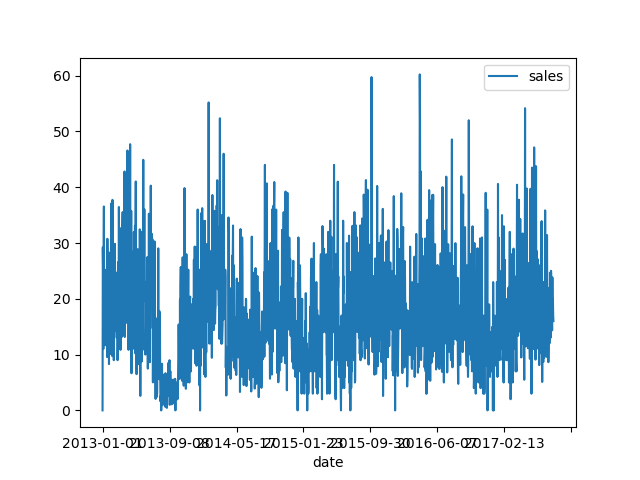

In [247]:
plt_df = train_big.loc[(train_big['store_nbr']==9)&(train_big['family_id']==32)].copy()
plt_df['date']=plt_df.index
plt_df.plot('date','sales')


### Plot future sales

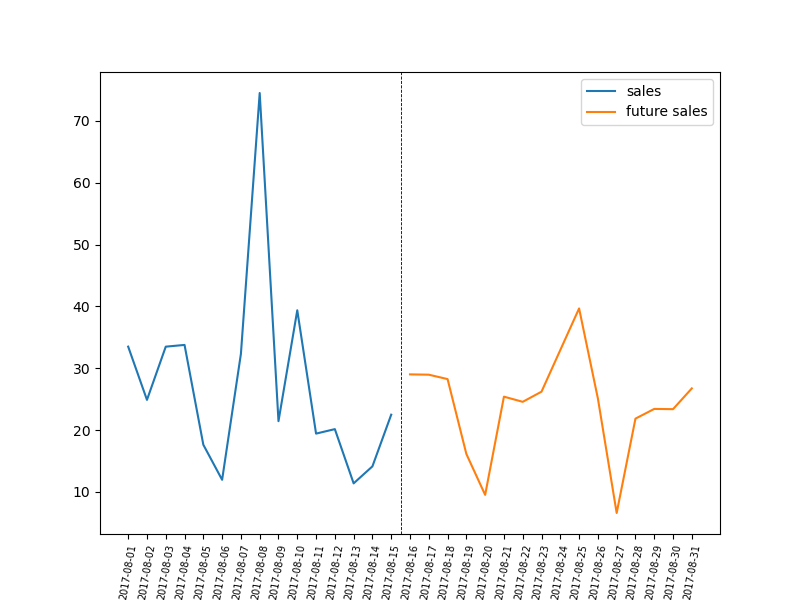

In [305]:
store_nbr = 1
family_id = 32
plt_df = train_big.loc[(train_big['store_nbr']==store_nbr)&(train_big['family_id']==family_id)].copy()
idx_store = stores.index(store_nbr)
idx_fam = families.index(family_id)
sales = plt_df['sales'].iloc[-15:]
dates1 = sales.index
dates2 = test_big.loc[(test_big['store_nbr']==store_nbr)&(test_big['family_id']==family_id)].index
dates = list(dates1.append(dates2)) #to set as x axis labels
future_sales = result_mat[33*idx_store+idx_fam]

fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(0,15)],sales,label='sales')
plt.plot([i for i in range(15,31)],future_sales,label='future sales')
plt.axvline(14.5,color='k',linestyle='--',linewidth=0.6)
plt.xticks([i for i in range(0,31)],dates,rotation=80,size=7)
plt.legend()
plt.show()